## name : Hans Dong


### * set the token and the key

In [1]:
#get the token and key

import tweepy
from __future__ import print_function
import json
from pymongo import MongoClient
import numpy as np
import matplotlib as mpl   
import matplotlib.pyplot as plt

consumer_key = ''   #get the access token so that we have authority to extract data
consumer_secret = ''
access_token = ''
access_token_secret = ''
 
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)  
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
                                    # the parameter"wait on rate_limit need to be set to True when using rest api
                                    # because it needs to start automatically

print("Everything imported OK")

Everything imported OK


### * get the topic-based tweets via streaming api

In [8]:
import tweepy
#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):
    #def on_data(self,data):
        #print(data)
        #return True
    def on_connect(self):
        # Called initially to connect to the Streaming API
        print("You are now connected to the streaming API.")
 
    def on_error(self, status_code):
        # On error - if an error occurs, display the error / status code
        print('An Error has occured: ' + repr(status_code))
        return False
    #def on_status(self, status):
    def on_error(self, status_code):
        if status_code == 420:    #error 420 means the streaming reach its limit so we need to disconnect the streaming
            #returning False in on_data disconnects the stream
            return False
    def on_data(self, data):
        #connects to mongoDB and stores the tweet
        try:
            client = MongoClient()
            
            # Use twitterdb database. If it doesn't exist, it will be created.
            db = client.twitter
    
            # Decode the JSON from Twitter
            datajson = json.loads(data)
            
            #grab the 'created_at' data from the Tweet to use for display
            created_at = datajson['created_at']
         
            #print out a message to the screen that we have collected a tweet
            print("Tweet collected at " + str(created_at))
            
            #insert the data into the mongoDB into a collection called twitter_search
            #if twitter_search doesn't exist, it will be created.
            db.streaming_topic.insert(datajson)
        except Exception as e:
            print(e)

myStreamListener = MyStreamListener(api=tweepy.API(wait_on_rate_limit=True))
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
myStream.filter(track=['whisky'],languages=["en"],async=True)     #get the tweets which include whisky and in english from 12:10 to 13:10

Tweet collected at Fri Nov 16 12:01:28 +0000 2018


D:\python\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


Tweet collected at Fri Nov 16 12:01:29 +0000 2018
Tweet collected at Fri Nov 16 12:01:31 +0000 2018
Tweet collected at Fri Nov 16 12:01:32 +0000 2018
Tweet collected at Fri Nov 16 12:01:34 +0000 2018
Tweet collected at Fri Nov 16 12:01:39 +0000 2018
Tweet collected at Fri Nov 16 12:01:42 +0000 2018
Tweet collected at Fri Nov 16 12:01:42 +0000 2018
Tweet collected at Fri Nov 16 12:01:43 +0000 2018
Tweet collected at Fri Nov 16 12:01:47 +0000 2018
Tweet collected at Fri Nov 16 12:01:49 +0000 2018
Tweet collected at Fri Nov 16 12:01:52 +0000 2018
Tweet collected at Fri Nov 16 12:01:54 +0000 2018
Tweet collected at Fri Nov 16 12:01:54 +0000 2018
Tweet collected at Fri Nov 16 12:01:58 +0000 2018
Tweet collected at Fri Nov 16 12:01:59 +0000 2018
Tweet collected at Fri Nov 16 12:02:00 +0000 2018
Tweet collected at Fri Nov 16 12:02:01 +0000 2018
Tweet collected at Fri Nov 16 12:02:06 +0000 2018
Tweet collected at Fri Nov 16 12:02:07 +0000 2018
Tweet collected at Fri Nov 16 12:02:13 +0000 2018


Tweet collected at Fri Nov 16 12:08:12 +0000 2018
Tweet collected at Fri Nov 16 12:08:14 +0000 2018
Tweet collected at Fri Nov 16 12:08:22 +0000 2018
Tweet collected at Fri Nov 16 12:08:28 +0000 2018
Tweet collected at Fri Nov 16 12:08:31 +0000 2018
Tweet collected at Fri Nov 16 12:08:33 +0000 2018
Tweet collected at Fri Nov 16 12:08:34 +0000 2018
Tweet collected at Fri Nov 16 12:08:38 +0000 2018
Tweet collected at Fri Nov 16 12:08:39 +0000 2018
Tweet collected at Fri Nov 16 12:08:46 +0000 2018
Tweet collected at Fri Nov 16 12:08:51 +0000 2018
Tweet collected at Fri Nov 16 12:08:56 +0000 2018
Tweet collected at Fri Nov 16 12:08:56 +0000 2018
Tweet collected at Fri Nov 16 12:09:03 +0000 2018
Tweet collected at Fri Nov 16 12:09:04 +0000 2018
Tweet collected at Fri Nov 16 12:09:10 +0000 2018
Tweet collected at Fri Nov 16 12:09:14 +0000 2018
Tweet collected at Fri Nov 16 12:09:16 +0000 2018
Tweet collected at Fri Nov 16 12:09:16 +0000 2018
Tweet collected at Fri Nov 16 12:09:19 +0000 2018


Tweet collected at Fri Nov 16 12:15:15 +0000 2018
Tweet collected at Fri Nov 16 12:15:17 +0000 2018
Tweet collected at Fri Nov 16 12:15:24 +0000 2018
Tweet collected at Fri Nov 16 12:15:25 +0000 2018
Tweet collected at Fri Nov 16 12:15:25 +0000 2018
Tweet collected at Fri Nov 16 12:15:26 +0000 2018
Tweet collected at Fri Nov 16 12:15:32 +0000 2018
Tweet collected at Fri Nov 16 12:15:35 +0000 2018
Tweet collected at Fri Nov 16 12:15:36 +0000 2018
Tweet collected at Fri Nov 16 12:15:37 +0000 2018
Tweet collected at Fri Nov 16 12:15:43 +0000 2018
Tweet collected at Fri Nov 16 12:15:47 +0000 2018
Tweet collected at Fri Nov 16 12:15:54 +0000 2018
Tweet collected at Fri Nov 16 12:15:59 +0000 2018
Tweet collected at Fri Nov 16 12:16:00 +0000 2018
Tweet collected at Fri Nov 16 12:16:00 +0000 2018
Tweet collected at Fri Nov 16 12:16:01 +0000 2018
Tweet collected at Fri Nov 16 12:16:05 +0000 2018
Tweet collected at Fri Nov 16 12:16:07 +0000 2018
Tweet collected at Fri Nov 16 12:16:08 +0000 2018


Tweet collected at Fri Nov 16 12:22:28 +0000 2018
Tweet collected at Fri Nov 16 12:22:28 +0000 2018
Tweet collected at Fri Nov 16 12:22:32 +0000 2018
Tweet collected at Fri Nov 16 12:22:34 +0000 2018
Tweet collected at Fri Nov 16 12:22:35 +0000 2018
Tweet collected at Fri Nov 16 12:22:41 +0000 2018
Tweet collected at Fri Nov 16 12:22:44 +0000 2018
Tweet collected at Fri Nov 16 12:22:45 +0000 2018
Tweet collected at Fri Nov 16 12:22:50 +0000 2018
Tweet collected at Fri Nov 16 12:22:52 +0000 2018
Tweet collected at Fri Nov 16 12:22:55 +0000 2018
Tweet collected at Fri Nov 16 12:22:57 +0000 2018
Tweet collected at Fri Nov 16 12:22:57 +0000 2018
Tweet collected at Fri Nov 16 12:22:58 +0000 2018
Tweet collected at Fri Nov 16 12:23:03 +0000 2018
Tweet collected at Fri Nov 16 12:23:05 +0000 2018
Tweet collected at Fri Nov 16 12:23:06 +0000 2018
Tweet collected at Fri Nov 16 12:23:11 +0000 2018
Tweet collected at Fri Nov 16 12:23:14 +0000 2018
Tweet collected at Fri Nov 16 12:23:22 +0000 2018


Tweet collected at Fri Nov 16 12:28:08 +0000 2018
Tweet collected at Fri Nov 16 12:28:10 +0000 2018
Tweet collected at Fri Nov 16 12:28:10 +0000 2018
Tweet collected at Fri Nov 16 12:28:10 +0000 2018
Tweet collected at Fri Nov 16 12:28:10 +0000 2018
Tweet collected at Fri Nov 16 12:28:15 +0000 2018
Tweet collected at Fri Nov 16 12:28:16 +0000 2018
Tweet collected at Fri Nov 16 12:28:23 +0000 2018
Tweet collected at Fri Nov 16 12:28:24 +0000 2018
Tweet collected at Fri Nov 16 12:28:30 +0000 2018
Tweet collected at Fri Nov 16 12:28:33 +0000 2018
Tweet collected at Fri Nov 16 12:28:35 +0000 2018
Tweet collected at Fri Nov 16 12:28:37 +0000 2018
Tweet collected at Fri Nov 16 12:28:43 +0000 2018
Tweet collected at Fri Nov 16 12:28:45 +0000 2018
Tweet collected at Fri Nov 16 12:28:47 +0000 2018
Tweet collected at Fri Nov 16 12:28:49 +0000 2018
Tweet collected at Fri Nov 16 12:28:51 +0000 2018
Tweet collected at Fri Nov 16 12:28:54 +0000 2018
Tweet collected at Fri Nov 16 12:28:55 +0000 2018


Tweet collected at Fri Nov 16 12:34:44 +0000 2018
Tweet collected at Fri Nov 16 12:34:44 +0000 2018
Tweet collected at Fri Nov 16 12:34:46 +0000 2018
Tweet collected at Fri Nov 16 12:34:48 +0000 2018
Tweet collected at Fri Nov 16 12:34:53 +0000 2018
Tweet collected at Fri Nov 16 12:34:54 +0000 2018
Tweet collected at Fri Nov 16 12:34:55 +0000 2018
Tweet collected at Fri Nov 16 12:34:57 +0000 2018
Tweet collected at Fri Nov 16 12:34:59 +0000 2018
Tweet collected at Fri Nov 16 12:35:00 +0000 2018
Tweet collected at Fri Nov 16 12:35:07 +0000 2018
Tweet collected at Fri Nov 16 12:35:15 +0000 2018
Tweet collected at Fri Nov 16 12:35:15 +0000 2018
Tweet collected at Fri Nov 16 12:35:17 +0000 2018
Tweet collected at Fri Nov 16 12:35:18 +0000 2018
Tweet collected at Fri Nov 16 12:35:19 +0000 2018
Tweet collected at Fri Nov 16 12:35:21 +0000 2018
Tweet collected at Fri Nov 16 12:35:22 +0000 2018
Tweet collected at Fri Nov 16 12:35:24 +0000 2018
Tweet collected at Fri Nov 16 12:35:24 +0000 2018


Tweet collected at Fri Nov 16 12:41:56 +0000 2018
Tweet collected at Fri Nov 16 12:41:57 +0000 2018
Tweet collected at Fri Nov 16 12:41:58 +0000 2018
Tweet collected at Fri Nov 16 12:41:58 +0000 2018
Tweet collected at Fri Nov 16 12:42:00 +0000 2018
Tweet collected at Fri Nov 16 12:42:01 +0000 2018
Tweet collected at Fri Nov 16 12:42:01 +0000 2018
Tweet collected at Fri Nov 16 12:42:06 +0000 2018
Tweet collected at Fri Nov 16 12:42:06 +0000 2018
Tweet collected at Fri Nov 16 12:42:07 +0000 2018
Tweet collected at Fri Nov 16 12:42:08 +0000 2018
Tweet collected at Fri Nov 16 12:42:09 +0000 2018
Tweet collected at Fri Nov 16 12:42:11 +0000 2018
Tweet collected at Fri Nov 16 12:42:14 +0000 2018
Tweet collected at Fri Nov 16 12:42:14 +0000 2018
Tweet collected at Fri Nov 16 12:42:14 +0000 2018
Tweet collected at Fri Nov 16 12:42:18 +0000 2018
Tweet collected at Fri Nov 16 12:42:19 +0000 2018
Tweet collected at Fri Nov 16 12:42:20 +0000 2018
Tweet collected at Fri Nov 16 12:42:25 +0000 2018


Tweet collected at Fri Nov 16 12:48:47 +0000 2018
Tweet collected at Fri Nov 16 12:48:50 +0000 2018
Tweet collected at Fri Nov 16 12:48:56 +0000 2018
Tweet collected at Fri Nov 16 12:48:57 +0000 2018
Tweet collected at Fri Nov 16 12:48:58 +0000 2018
Tweet collected at Fri Nov 16 12:48:59 +0000 2018
Tweet collected at Fri Nov 16 12:49:00 +0000 2018
Tweet collected at Fri Nov 16 12:49:03 +0000 2018
Tweet collected at Fri Nov 16 12:49:05 +0000 2018
Tweet collected at Fri Nov 16 12:49:06 +0000 2018
Tweet collected at Fri Nov 16 12:49:15 +0000 2018
Tweet collected at Fri Nov 16 12:49:16 +0000 2018
Tweet collected at Fri Nov 16 12:49:19 +0000 2018
Tweet collected at Fri Nov 16 12:49:19 +0000 2018
Tweet collected at Fri Nov 16 12:49:21 +0000 2018
Tweet collected at Fri Nov 16 12:49:21 +0000 2018
Tweet collected at Fri Nov 16 12:49:22 +0000 2018
Tweet collected at Fri Nov 16 12:49:25 +0000 2018
Tweet collected at Fri Nov 16 12:49:28 +0000 2018
Tweet collected at Fri Nov 16 12:49:29 +0000 2018


Tweet collected at Fri Nov 16 12:55:06 +0000 2018
Tweet collected at Fri Nov 16 12:55:06 +0000 2018
Tweet collected at Fri Nov 16 12:55:06 +0000 2018
Tweet collected at Fri Nov 16 12:55:07 +0000 2018
Tweet collected at Fri Nov 16 12:55:08 +0000 2018
Tweet collected at Fri Nov 16 12:55:08 +0000 2018
Tweet collected at Fri Nov 16 12:55:08 +0000 2018
Tweet collected at Fri Nov 16 12:55:09 +0000 2018
Tweet collected at Fri Nov 16 12:55:10 +0000 2018
Tweet collected at Fri Nov 16 12:55:10 +0000 2018
Tweet collected at Fri Nov 16 12:55:13 +0000 2018
Tweet collected at Fri Nov 16 12:55:13 +0000 2018
Tweet collected at Fri Nov 16 12:55:13 +0000 2018
Tweet collected at Fri Nov 16 12:55:15 +0000 2018
Tweet collected at Fri Nov 16 12:55:15 +0000 2018
Tweet collected at Fri Nov 16 12:55:16 +0000 2018
Tweet collected at Fri Nov 16 12:55:17 +0000 2018
Tweet collected at Fri Nov 16 12:55:22 +0000 2018
Tweet collected at Fri Nov 16 12:55:27 +0000 2018
Tweet collected at Fri Nov 16 12:55:30 +0000 2018


Tweet collected at Fri Nov 16 13:01:28 +0000 2018
Tweet collected at Fri Nov 16 13:01:28 +0000 2018
Tweet collected at Fri Nov 16 13:01:29 +0000 2018
Tweet collected at Fri Nov 16 13:01:30 +0000 2018
Tweet collected at Fri Nov 16 13:01:31 +0000 2018
Tweet collected at Fri Nov 16 13:01:32 +0000 2018
Tweet collected at Fri Nov 16 13:01:33 +0000 2018
Tweet collected at Fri Nov 16 13:01:34 +0000 2018
Tweet collected at Fri Nov 16 13:01:35 +0000 2018
Tweet collected at Fri Nov 16 13:01:36 +0000 2018
Tweet collected at Fri Nov 16 13:01:40 +0000 2018
Tweet collected at Fri Nov 16 13:01:41 +0000 2018
Tweet collected at Fri Nov 16 13:01:42 +0000 2018
Tweet collected at Fri Nov 16 13:01:43 +0000 2018
Tweet collected at Fri Nov 16 13:01:47 +0000 2018
Tweet collected at Fri Nov 16 13:01:49 +0000 2018
Tweet collected at Fri Nov 16 13:01:49 +0000 2018
Tweet collected at Fri Nov 16 13:01:53 +0000 2018
Tweet collected at Fri Nov 16 13:01:53 +0000 2018
Tweet collected at Fri Nov 16 13:01:53 +0000 2018


Tweet collected at Fri Nov 16 13:08:08 +0000 2018
Tweet collected at Fri Nov 16 13:08:13 +0000 2018
Tweet collected at Fri Nov 16 13:08:17 +0000 2018
Tweet collected at Fri Nov 16 13:08:17 +0000 2018
Tweet collected at Fri Nov 16 13:08:20 +0000 2018
Tweet collected at Fri Nov 16 13:08:20 +0000 2018
Tweet collected at Fri Nov 16 13:08:28 +0000 2018
Tweet collected at Fri Nov 16 13:08:31 +0000 2018
Tweet collected at Fri Nov 16 13:08:42 +0000 2018
Tweet collected at Fri Nov 16 13:08:44 +0000 2018
Tweet collected at Fri Nov 16 13:08:46 +0000 2018
Tweet collected at Fri Nov 16 13:08:46 +0000 2018
Tweet collected at Fri Nov 16 13:08:48 +0000 2018
Tweet collected at Fri Nov 16 13:08:49 +0000 2018
Tweet collected at Fri Nov 16 13:08:52 +0000 2018
Tweet collected at Fri Nov 16 13:08:56 +0000 2018
Tweet collected at Fri Nov 16 13:09:01 +0000 2018
Tweet collected at Fri Nov 16 13:09:02 +0000 2018
Tweet collected at Fri Nov 16 13:09:03 +0000 2018
Tweet collected at Fri Nov 16 13:09:04 +0000 2018


### * get the geo-tagged tweet via streaming api

In [2]:
# get the tweet from location in Glasgow and save it in mongodb
import tweepy

#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):
    #def on_data(self,data):
        #print(data)
        #return True
    def on_connect(self):
        # Called initially to connect to the Streaming API
        print("You are now connected to the streaming API.")
 
    def on_error(self, status_code):
        # On error - if an error occurs, display the error / status code
        print('An Error has occured: ' + repr(status_code))
        return False
    def on_data(self, data):
        try:
            client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
            db = client.twitter
            # Decode the JSON from Twitter
            datajson = json.loads(data)
            created_at = datajson['created_at']
            print("Tweet collected at " + str(created_at))
            db.streaming_geo.insert(datajson)
            
        except Exception as e:
            print(e)    
myStreamListener = MyStreamListener(api=tweepy.API(wait_on_rate_limit=True))
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
myStream.filter(locations=[-4.34,55.83,-4.14,55.88],async=True,languages=["en"])
                        #location contains 4 points which represent the longtitude and latitude of the area
#locations[longtitude,latitude]

You are now connected to the streaming API.
Tweet collected at Fri Nov 16 13:33:32 +0000 2018


D:\python\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


Tweet collected at Fri Nov 16 13:34:24 +0000 2018
Tweet collected at Fri Nov 16 13:34:27 +0000 2018
Tweet collected at Fri Nov 16 13:34:34 +0000 2018
Tweet collected at Fri Nov 16 13:34:40 +0000 2018
Tweet collected at Fri Nov 16 13:34:42 +0000 2018
Tweet collected at Fri Nov 16 13:34:51 +0000 2018
Tweet collected at Fri Nov 16 13:34:53 +0000 2018
Tweet collected at Fri Nov 16 13:35:10 +0000 2018
Tweet collected at Fri Nov 16 13:35:15 +0000 2018
Tweet collected at Fri Nov 16 13:35:17 +0000 2018
Tweet collected at Fri Nov 16 13:35:25 +0000 2018
Tweet collected at Fri Nov 16 13:35:47 +0000 2018
Tweet collected at Fri Nov 16 13:36:01 +0000 2018
Tweet collected at Fri Nov 16 13:36:07 +0000 2018
Tweet collected at Fri Nov 16 13:36:46 +0000 2018
Tweet collected at Fri Nov 16 13:37:07 +0000 2018
Tweet collected at Fri Nov 16 13:37:21 +0000 2018
Tweet collected at Fri Nov 16 13:37:24 +0000 2018
Tweet collected at Fri Nov 16 13:37:32 +0000 2018
Tweet collected at Fri Nov 16 13:37:32 +0000 2018


Tweet collected at Fri Nov 16 14:03:18 +0000 2018
Tweet collected at Fri Nov 16 14:03:21 +0000 2018
Tweet collected at Fri Nov 16 14:03:40 +0000 2018
Tweet collected at Fri Nov 16 14:03:42 +0000 2018
Tweet collected at Fri Nov 16 14:03:44 +0000 2018
Tweet collected at Fri Nov 16 14:04:03 +0000 2018
Tweet collected at Fri Nov 16 14:04:31 +0000 2018
Tweet collected at Fri Nov 16 14:04:40 +0000 2018
Tweet collected at Fri Nov 16 14:04:39 +0000 2018
Tweet collected at Fri Nov 16 14:05:18 +0000 2018
Tweet collected at Fri Nov 16 14:05:23 +0000 2018
Tweet collected at Fri Nov 16 14:05:46 +0000 2018
Tweet collected at Fri Nov 16 14:06:01 +0000 2018
Tweet collected at Fri Nov 16 14:06:03 +0000 2018
Tweet collected at Fri Nov 16 14:06:05 +0000 2018
Tweet collected at Fri Nov 16 14:06:05 +0000 2018
Tweet collected at Fri Nov 16 14:06:24 +0000 2018
Tweet collected at Fri Nov 16 14:06:33 +0000 2018
Tweet collected at Fri Nov 16 14:06:38 +0000 2018
Tweet collected at Fri Nov 16 14:06:49 +0000 2018


Tweet collected at Fri Nov 16 14:25:00 +0000 2018
Tweet collected at Fri Nov 16 14:25:13 +0000 2018
Tweet collected at Fri Nov 16 14:25:20 +0000 2018
Tweet collected at Fri Nov 16 14:25:22 +0000 2018
Tweet collected at Fri Nov 16 14:25:48 +0000 2018
Tweet collected at Fri Nov 16 14:26:02 +0000 2018
Tweet collected at Fri Nov 16 14:26:08 +0000 2018
Tweet collected at Fri Nov 16 14:26:08 +0000 2018
Tweet collected at Fri Nov 16 14:26:11 +0000 2018
Tweet collected at Fri Nov 16 14:26:15 +0000 2018
Tweet collected at Fri Nov 16 14:26:17 +0000 2018
Tweet collected at Fri Nov 16 14:26:20 +0000 2018
Tweet collected at Fri Nov 16 14:26:28 +0000 2018
Tweet collected at Fri Nov 16 14:26:37 +0000 2018
Tweet collected at Fri Nov 16 14:26:46 +0000 2018
Tweet collected at Fri Nov 16 14:26:56 +0000 2018
Tweet collected at Fri Nov 16 14:26:57 +0000 2018
Tweet collected at Fri Nov 16 14:27:10 +0000 2018
Tweet collected at Fri Nov 16 14:27:15 +0000 2018
Tweet collected at Fri Nov 16 14:27:18 +0000 2018


In [5]:
#close the streaming
myStream.disconnect()

### * get the tweet without any filter by streaming

In [8]:
#get information in english via streaming 
import tweepy

#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):

    #def on_data(self,data):
        #print(data)
        #return True
    def on_connect(self):
        # Called initially to connect to the Streaming API
        print("You are now connected to the streaming API.")
 
    def on_error(self, status_code):
        # On error - if an error occurs, display the error / status code
        print('An Error has occured: ' + repr(status_code))
        return False
    def on_data(self, data):
        try:
            client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
            db = client.twitter
            # Decode the JSON from Twitter
            datajson = json.loads(data)
            created_at = datajson['created_at']
            print("Tweet collected at " + str(created_at))
            db.streaming_without.insert(datajson)
        except Exception as e:
            print(e) 
            
myStreamListener = MyStreamListener(api=tweepy.API(wait_on_rate_limit=True))
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
#myStream.filter(async=True)
myStream.sample(languages=["en"])

You are now connected to the streaming API.
Tweet collected at Wed Nov 14 18:25:05 +0000 2018


D:\python\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:05 +0000 2018
Tweet collected at Wed Nov 14 18:25:06 +0000 2018
Tweet collected at Wed Nov 14 18:25:06 +0000 2018
Tweet collected at Wed Nov 14 18:25:06 +0000 2018
Tweet collected at Wed Nov 14 18:25:06 +0000 2018


Tweet collected at Wed Nov 14 18:25:15 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:16 +0000 2018
Tweet collected at Wed Nov 14 18:25:17 +0000 2018
Tweet collected at Wed Nov 14 18:25:17 +0000 2018
Tweet collected at Wed Nov 14 18:25:17 +0000 2018


Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:29 +0000 2018
Tweet collected at Wed Nov 14 18:25:27 +0000 2018
Tweet collected at Wed Nov 14 18:25:30 +0000 2018
Tweet collected at Wed Nov 14 18:25:30 +0000 2018
Tweet collected at Wed Nov 14 18:25:30 +0000 2018
Tweet collected at Wed Nov 14 18:25:30 +0000 2018


Tweet collected at Wed Nov 14 18:25:41 +0000 2018
Tweet collected at Wed Nov 14 18:25:41 +0000 2018
Tweet collected at Wed Nov 14 18:25:41 +0000 2018
Tweet collected at Wed Nov 14 18:25:41 +0000 2018
Tweet collected at Wed Nov 14 18:25:41 +0000 2018
Tweet collected at Wed Nov 14 18:25:40 +0000 2018
Tweet collected at Wed Nov 14 18:25:42 +0000 2018
Tweet collected at Wed Nov 14 18:25:42 +0000 2018
Tweet collected at Wed Nov 14 18:25:42 +0000 2018
Tweet collected at Wed Nov 14 18:25:42 +0000 2018
Tweet collected at Wed Nov 14 18:25:42 +0000 2018
Tweet collected at Wed Nov 14 18:25:42 +0000 2018
Tweet collected at Wed Nov 14 18:25:42 +0000 2018
Tweet collected at Wed Nov 14 18:25:42 +0000 2018
Tweet collected at Wed Nov 14 18:25:42 +0000 2018
Tweet collected at Wed Nov 14 18:25:42 +0000 2018
Tweet collected at Wed Nov 14 18:25:42 +0000 2018
Tweet collected at Wed Nov 14 18:25:42 +0000 2018
Tweet collected at Wed Nov 14 18:25:42 +0000 2018
Tweet collected at Wed Nov 14 18:25:42 +0000 2018


Tweet collected at Wed Nov 14 18:25:53 +0000 2018
Tweet collected at Wed Nov 14 18:25:54 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:55 +0000 2018
Tweet collected at Wed Nov 14 18:25:56 +0000 2018
Tweet collected at Wed Nov 14 18:25:56 +0000 2018


Tweet collected at Wed Nov 14 18:26:05 +0000 2018
Tweet collected at Wed Nov 14 18:26:05 +0000 2018
Tweet collected at Wed Nov 14 18:26:05 +0000 2018
Tweet collected at Wed Nov 14 18:26:04 +0000 2018
Tweet collected at Wed Nov 14 18:26:05 +0000 2018
Tweet collected at Wed Nov 14 18:26:06 +0000 2018
Tweet collected at Wed Nov 14 18:26:06 +0000 2018
Tweet collected at Wed Nov 14 18:26:06 +0000 2018
Tweet collected at Wed Nov 14 18:26:06 +0000 2018
Tweet collected at Wed Nov 14 18:26:06 +0000 2018
Tweet collected at Wed Nov 14 18:26:06 +0000 2018
Tweet collected at Wed Nov 14 18:26:06 +0000 2018
Tweet collected at Wed Nov 14 18:26:06 +0000 2018
Tweet collected at Wed Nov 14 18:26:06 +0000 2018
Tweet collected at Wed Nov 14 18:26:06 +0000 2018
Tweet collected at Wed Nov 14 18:26:07 +0000 2018
Tweet collected at Wed Nov 14 18:26:07 +0000 2018
Tweet collected at Wed Nov 14 18:26:07 +0000 2018
Tweet collected at Wed Nov 14 18:26:07 +0000 2018
Tweet collected at Wed Nov 14 18:26:07 +0000 2018


Tweet collected at Wed Nov 14 18:26:16 +0000 2018
Tweet collected at Wed Nov 14 18:26:17 +0000 2018
Tweet collected at Wed Nov 14 18:26:17 +0000 2018
Tweet collected at Wed Nov 14 18:26:17 +0000 2018
Tweet collected at Wed Nov 14 18:26:17 +0000 2018
Tweet collected at Wed Nov 14 18:26:17 +0000 2018
Tweet collected at Wed Nov 14 18:26:17 +0000 2018
Tweet collected at Wed Nov 14 18:26:17 +0000 2018
Tweet collected at Wed Nov 14 18:26:17 +0000 2018
Tweet collected at Wed Nov 14 18:26:17 +0000 2018
Tweet collected at Wed Nov 14 18:26:17 +0000 2018
Tweet collected at Wed Nov 14 18:26:17 +0000 2018
Tweet collected at Wed Nov 14 18:26:17 +0000 2018
Tweet collected at Wed Nov 14 18:26:18 +0000 2018
Tweet collected at Wed Nov 14 18:26:18 +0000 2018
Tweet collected at Wed Nov 14 18:26:18 +0000 2018
Tweet collected at Wed Nov 14 18:26:18 +0000 2018
Tweet collected at Wed Nov 14 18:26:18 +0000 2018
Tweet collected at Wed Nov 14 18:26:18 +0000 2018
Tweet collected at Wed Nov 14 18:26:18 +0000 2018


Tweet collected at Wed Nov 14 18:26:28 +0000 2018
Tweet collected at Wed Nov 14 18:26:29 +0000 2018
Tweet collected at Wed Nov 14 18:26:29 +0000 2018
Tweet collected at Wed Nov 14 18:26:29 +0000 2018
Tweet collected at Wed Nov 14 18:26:29 +0000 2018
Tweet collected at Wed Nov 14 18:26:29 +0000 2018
Tweet collected at Wed Nov 14 18:26:29 +0000 2018
Tweet collected at Wed Nov 14 18:26:29 +0000 2018
Tweet collected at Wed Nov 14 18:26:29 +0000 2018
Tweet collected at Wed Nov 14 18:26:29 +0000 2018
Tweet collected at Wed Nov 14 18:26:29 +0000 2018
Tweet collected at Wed Nov 14 18:26:29 +0000 2018
Tweet collected at Wed Nov 14 18:26:29 +0000 2018
Tweet collected at Wed Nov 14 18:26:30 +0000 2018
Tweet collected at Wed Nov 14 18:26:30 +0000 2018
Tweet collected at Wed Nov 14 18:26:30 +0000 2018
Tweet collected at Wed Nov 14 18:26:30 +0000 2018
Tweet collected at Wed Nov 14 18:26:30 +0000 2018
Tweet collected at Wed Nov 14 18:26:30 +0000 2018
Tweet collected at Wed Nov 14 18:26:30 +0000 2018


Tweet collected at Wed Nov 14 18:26:40 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:41 +0000 2018
Tweet collected at Wed Nov 14 18:26:42 +0000 2018
Tweet collected at Wed Nov 14 18:26:42 +0000 2018


Tweet collected at Wed Nov 14 18:26:52 +0000 2018
Tweet collected at Wed Nov 14 18:26:52 +0000 2018
Tweet collected at Wed Nov 14 18:26:52 +0000 2018
Tweet collected at Wed Nov 14 18:26:52 +0000 2018
Tweet collected at Wed Nov 14 18:26:52 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018
Tweet collected at Wed Nov 14 18:26:53 +0000 2018


Tweet collected at Wed Nov 14 18:27:03 +0000 2018
Tweet collected at Wed Nov 14 18:27:03 +0000 2018
Tweet collected at Wed Nov 14 18:27:03 +0000 2018
Tweet collected at Wed Nov 14 18:27:03 +0000 2018
Tweet collected at Wed Nov 14 18:27:03 +0000 2018
Tweet collected at Wed Nov 14 18:27:03 +0000 2018
Tweet collected at Wed Nov 14 18:27:03 +0000 2018
Tweet collected at Wed Nov 14 18:27:03 +0000 2018
Tweet collected at Wed Nov 14 18:27:03 +0000 2018
Tweet collected at Wed Nov 14 18:27:04 +0000 2018
Tweet collected at Wed Nov 14 18:27:04 +0000 2018
Tweet collected at Wed Nov 14 18:27:04 +0000 2018
Tweet collected at Wed Nov 14 18:27:04 +0000 2018
Tweet collected at Wed Nov 14 18:27:04 +0000 2018
Tweet collected at Wed Nov 14 18:27:04 +0000 2018
Tweet collected at Wed Nov 14 18:27:04 +0000 2018
Tweet collected at Wed Nov 14 18:27:04 +0000 2018
Tweet collected at Wed Nov 14 18:27:04 +0000 2018
Tweet collected at Wed Nov 14 18:27:04 +0000 2018
Tweet collected at Wed Nov 14 18:27:04 +0000 2018


Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018
Tweet collected at Wed Nov 14 18:27:15 +0000 2018


Tweet collected at Wed Nov 14 18:27:26 +0000 2018
Tweet collected at Wed Nov 14 18:27:26 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018
Tweet collected at Wed Nov 14 18:27:27 +0000 2018


Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018
Tweet collected at Wed Nov 14 18:27:39 +0000 2018


Tweet collected at Wed Nov 14 18:27:50 +0000 2018
Tweet collected at Wed Nov 14 18:27:50 +0000 2018
Tweet collected at Wed Nov 14 18:27:51 +0000 2018
Tweet collected at Wed Nov 14 18:27:51 +0000 2018
Tweet collected at Wed Nov 14 18:27:51 +0000 2018
Tweet collected at Wed Nov 14 18:27:51 +0000 2018
Tweet collected at Wed Nov 14 18:27:51 +0000 2018
Tweet collected at Wed Nov 14 18:27:51 +0000 2018
Tweet collected at Wed Nov 14 18:27:51 +0000 2018
Tweet collected at Wed Nov 14 18:27:51 +0000 2018
Tweet collected at Wed Nov 14 18:27:51 +0000 2018
Tweet collected at Wed Nov 14 18:27:51 +0000 2018
Tweet collected at Wed Nov 14 18:27:51 +0000 2018
Tweet collected at Wed Nov 14 18:27:51 +0000 2018
Tweet collected at Wed Nov 14 18:27:51 +0000 2018
Tweet collected at Wed Nov 14 18:27:51 +0000 2018
Tweet collected at Wed Nov 14 18:27:52 +0000 2018
Tweet collected at Wed Nov 14 18:27:52 +0000 2018
Tweet collected at Wed Nov 14 18:27:52 +0000 2018
Tweet collected at Wed Nov 14 18:27:52 +0000 2018


Tweet collected at Wed Nov 14 18:28:02 +0000 2018
Tweet collected at Wed Nov 14 18:28:02 +0000 2018
Tweet collected at Wed Nov 14 18:28:02 +0000 2018
Tweet collected at Wed Nov 14 18:28:02 +0000 2018
Tweet collected at Wed Nov 14 18:28:01 +0000 2018
Tweet collected at Wed Nov 14 18:28:02 +0000 2018
Tweet collected at Wed Nov 14 18:28:02 +0000 2018
Tweet collected at Wed Nov 14 18:28:03 +0000 2018
Tweet collected at Wed Nov 14 18:28:03 +0000 2018
Tweet collected at Wed Nov 14 18:28:03 +0000 2018
Tweet collected at Wed Nov 14 18:28:03 +0000 2018
Tweet collected at Wed Nov 14 18:28:03 +0000 2018
Tweet collected at Wed Nov 14 18:28:03 +0000 2018
Tweet collected at Wed Nov 14 18:28:03 +0000 2018
Tweet collected at Wed Nov 14 18:28:03 +0000 2018
Tweet collected at Wed Nov 14 18:28:03 +0000 2018
Tweet collected at Wed Nov 14 18:28:03 +0000 2018
Tweet collected at Wed Nov 14 18:28:03 +0000 2018
Tweet collected at Wed Nov 14 18:28:03 +0000 2018
Tweet collected at Wed Nov 14 18:28:03 +0000 2018


Tweet collected at Wed Nov 14 18:28:14 +0000 2018
Tweet collected at Wed Nov 14 18:28:14 +0000 2018
Tweet collected at Wed Nov 14 18:28:14 +0000 2018
Tweet collected at Wed Nov 14 18:28:14 +0000 2018
Tweet collected at Wed Nov 14 18:28:14 +0000 2018
Tweet collected at Wed Nov 14 18:28:14 +0000 2018
Tweet collected at Wed Nov 14 18:28:15 +0000 2018
Tweet collected at Wed Nov 14 18:28:15 +0000 2018
Tweet collected at Wed Nov 14 18:28:15 +0000 2018
Tweet collected at Wed Nov 14 18:28:15 +0000 2018
Tweet collected at Wed Nov 14 18:28:15 +0000 2018
Tweet collected at Wed Nov 14 18:28:15 +0000 2018
Tweet collected at Wed Nov 14 18:28:15 +0000 2018
Tweet collected at Wed Nov 14 18:28:15 +0000 2018
Tweet collected at Wed Nov 14 18:28:15 +0000 2018
Tweet collected at Wed Nov 14 18:28:15 +0000 2018
Tweet collected at Wed Nov 14 18:28:15 +0000 2018
Tweet collected at Wed Nov 14 18:28:15 +0000 2018
Tweet collected at Wed Nov 14 18:28:15 +0000 2018
Tweet collected at Wed Nov 14 18:28:15 +0000 2018


Tweet collected at Wed Nov 14 18:28:26 +0000 2018
Tweet collected at Wed Nov 14 18:28:26 +0000 2018
Tweet collected at Wed Nov 14 18:28:26 +0000 2018
Tweet collected at Wed Nov 14 18:28:26 +0000 2018
Tweet collected at Wed Nov 14 18:28:26 +0000 2018
Tweet collected at Wed Nov 14 18:28:26 +0000 2018
Tweet collected at Wed Nov 14 18:28:27 +0000 2018
Tweet collected at Wed Nov 14 18:28:27 +0000 2018
Tweet collected at Wed Nov 14 18:28:27 +0000 2018
Tweet collected at Wed Nov 14 18:28:27 +0000 2018
Tweet collected at Wed Nov 14 18:28:27 +0000 2018
Tweet collected at Wed Nov 14 18:28:27 +0000 2018
Tweet collected at Wed Nov 14 18:28:27 +0000 2018
Tweet collected at Wed Nov 14 18:28:28 +0000 2018
Tweet collected at Wed Nov 14 18:28:28 +0000 2018
Tweet collected at Wed Nov 14 18:28:28 +0000 2018
Tweet collected at Wed Nov 14 18:28:28 +0000 2018
Tweet collected at Wed Nov 14 18:28:28 +0000 2018
Tweet collected at Wed Nov 14 18:28:28 +0000 2018
Tweet collected at Wed Nov 14 18:28:28 +0000 2018


Tweet collected at Wed Nov 14 18:28:38 +0000 2018
Tweet collected at Wed Nov 14 18:28:38 +0000 2018
Tweet collected at Wed Nov 14 18:28:38 +0000 2018
Tweet collected at Wed Nov 14 18:28:38 +0000 2018
Tweet collected at Wed Nov 14 18:28:38 +0000 2018
Tweet collected at Wed Nov 14 18:28:38 +0000 2018
Tweet collected at Wed Nov 14 18:28:38 +0000 2018
Tweet collected at Wed Nov 14 18:28:38 +0000 2018
Tweet collected at Wed Nov 14 18:28:38 +0000 2018
Tweet collected at Wed Nov 14 18:28:38 +0000 2018
Tweet collected at Wed Nov 14 18:28:38 +0000 2018
Tweet collected at Wed Nov 14 18:28:38 +0000 2018
Tweet collected at Wed Nov 14 18:28:38 +0000 2018
Tweet collected at Wed Nov 14 18:28:39 +0000 2018
Tweet collected at Wed Nov 14 18:28:39 +0000 2018
Tweet collected at Wed Nov 14 18:28:39 +0000 2018
Tweet collected at Wed Nov 14 18:28:39 +0000 2018
Tweet collected at Wed Nov 14 18:28:39 +0000 2018
Tweet collected at Wed Nov 14 18:28:39 +0000 2018
Tweet collected at Wed Nov 14 18:28:39 +0000 2018


Tweet collected at Wed Nov 14 18:28:49 +0000 2018
Tweet collected at Wed Nov 14 18:28:50 +0000 2018
Tweet collected at Wed Nov 14 18:28:50 +0000 2018
Tweet collected at Wed Nov 14 18:28:50 +0000 2018
Tweet collected at Wed Nov 14 18:28:50 +0000 2018
Tweet collected at Wed Nov 14 18:28:50 +0000 2018
Tweet collected at Wed Nov 14 18:28:50 +0000 2018
Tweet collected at Wed Nov 14 18:28:50 +0000 2018
Tweet collected at Wed Nov 14 18:28:50 +0000 2018
Tweet collected at Wed Nov 14 18:28:50 +0000 2018
Tweet collected at Wed Nov 14 18:28:50 +0000 2018
Tweet collected at Wed Nov 14 18:28:50 +0000 2018
Tweet collected at Wed Nov 14 18:28:50 +0000 2018
Tweet collected at Wed Nov 14 18:28:50 +0000 2018
Tweet collected at Wed Nov 14 18:28:51 +0000 2018
Tweet collected at Wed Nov 14 18:28:51 +0000 2018
Tweet collected at Wed Nov 14 18:28:51 +0000 2018
Tweet collected at Wed Nov 14 18:28:51 +0000 2018
Tweet collected at Wed Nov 14 18:28:51 +0000 2018
Tweet collected at Wed Nov 14 18:28:51 +0000 2018


Tweet collected at Wed Nov 14 18:29:04 +0000 2018
Tweet collected at Wed Nov 14 18:29:04 +0000 2018
Tweet collected at Wed Nov 14 18:29:04 +0000 2018
Tweet collected at Wed Nov 14 18:29:05 +0000 2018
Tweet collected at Wed Nov 14 18:29:05 +0000 2018
Tweet collected at Wed Nov 14 18:29:05 +0000 2018
Tweet collected at Wed Nov 14 18:29:05 +0000 2018
Tweet collected at Wed Nov 14 18:29:05 +0000 2018
Tweet collected at Wed Nov 14 18:29:05 +0000 2018
Tweet collected at Wed Nov 14 18:29:05 +0000 2018
Tweet collected at Wed Nov 14 18:29:05 +0000 2018
Tweet collected at Wed Nov 14 18:29:05 +0000 2018
Tweet collected at Wed Nov 14 18:29:05 +0000 2018
Tweet collected at Wed Nov 14 18:29:05 +0000 2018
Tweet collected at Wed Nov 14 18:29:05 +0000 2018
Tweet collected at Wed Nov 14 18:29:05 +0000 2018
Tweet collected at Wed Nov 14 18:29:05 +0000 2018
Tweet collected at Wed Nov 14 18:29:06 +0000 2018
Tweet collected at Wed Nov 14 18:29:06 +0000 2018
Tweet collected at Wed Nov 14 18:29:06 +0000 2018


Tweet collected at Wed Nov 14 18:29:17 +0000 2018
Tweet collected at Wed Nov 14 18:29:17 +0000 2018
Tweet collected at Wed Nov 14 18:29:17 +0000 2018
Tweet collected at Wed Nov 14 18:29:17 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:18 +0000 2018
Tweet collected at Wed Nov 14 18:29:19 +0000 2018


Tweet collected at Wed Nov 14 18:29:32 +0000 2018
Tweet collected at Wed Nov 14 18:29:32 +0000 2018
Tweet collected at Wed Nov 14 18:29:32 +0000 2018
Tweet collected at Wed Nov 14 18:29:32 +0000 2018
Tweet collected at Wed Nov 14 18:29:32 +0000 2018
Tweet collected at Wed Nov 14 18:29:32 +0000 2018
Tweet collected at Wed Nov 14 18:29:32 +0000 2018
Tweet collected at Wed Nov 14 18:29:32 +0000 2018
Tweet collected at Wed Nov 14 18:29:32 +0000 2018
Tweet collected at Wed Nov 14 18:29:32 +0000 2018
Tweet collected at Wed Nov 14 18:29:33 +0000 2018
Tweet collected at Wed Nov 14 18:29:33 +0000 2018
Tweet collected at Wed Nov 14 18:29:33 +0000 2018
Tweet collected at Wed Nov 14 18:29:33 +0000 2018
Tweet collected at Wed Nov 14 18:29:33 +0000 2018
Tweet collected at Wed Nov 14 18:29:33 +0000 2018
Tweet collected at Wed Nov 14 18:29:33 +0000 2018
Tweet collected at Wed Nov 14 18:29:33 +0000 2018
Tweet collected at Wed Nov 14 18:29:33 +0000 2018
Tweet collected at Wed Nov 14 18:29:33 +0000 2018


Tweet collected at Wed Nov 14 18:29:43 +0000 2018
Tweet collected at Wed Nov 14 18:29:43 +0000 2018
Tweet collected at Wed Nov 14 18:29:43 +0000 2018
Tweet collected at Wed Nov 14 18:29:43 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018
Tweet collected at Wed Nov 14 18:29:44 +0000 2018


Tweet collected at Wed Nov 14 18:29:55 +0000 2018
Tweet collected at Wed Nov 14 18:29:55 +0000 2018
Tweet collected at Wed Nov 14 18:29:55 +0000 2018
Tweet collected at Wed Nov 14 18:29:55 +0000 2018
Tweet collected at Wed Nov 14 18:29:55 +0000 2018
Tweet collected at Wed Nov 14 18:29:55 +0000 2018
Tweet collected at Wed Nov 14 18:29:55 +0000 2018
Tweet collected at Wed Nov 14 18:29:55 +0000 2018
Tweet collected at Wed Nov 14 18:29:55 +0000 2018
Tweet collected at Wed Nov 14 18:29:55 +0000 2018
Tweet collected at Wed Nov 14 18:29:55 +0000 2018
Tweet collected at Wed Nov 14 18:29:55 +0000 2018
Tweet collected at Wed Nov 14 18:29:55 +0000 2018
Tweet collected at Wed Nov 14 18:29:56 +0000 2018
Tweet collected at Wed Nov 14 18:29:56 +0000 2018
Tweet collected at Wed Nov 14 18:29:56 +0000 2018
Tweet collected at Wed Nov 14 18:29:56 +0000 2018
Tweet collected at Wed Nov 14 18:29:56 +0000 2018
Tweet collected at Wed Nov 14 18:29:56 +0000 2018
Tweet collected at Wed Nov 14 18:29:56 +0000 2018


Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:05 +0000 2018
Tweet collected at Wed Nov 14 18:30:06 +0000 2018
Tweet collected at Wed Nov 14 18:30:06 +0000 2018
Tweet collected at Wed Nov 14 18:30:06 +0000 2018
Tweet collected at Wed Nov 14 18:30:06 +0000 2018
Tweet collected at Wed Nov 14 18:30:06 +0000 2018


Tweet collected at Wed Nov 14 18:30:16 +0000 2018
Tweet collected at Wed Nov 14 18:30:16 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018
Tweet collected at Wed Nov 14 18:30:17 +0000 2018


Tweet collected at Wed Nov 14 18:30:26 +0000 2018
Tweet collected at Wed Nov 14 18:30:26 +0000 2018
Tweet collected at Wed Nov 14 18:30:26 +0000 2018
Tweet collected at Wed Nov 14 18:30:26 +0000 2018
Tweet collected at Wed Nov 14 18:30:26 +0000 2018
Tweet collected at Wed Nov 14 18:30:26 +0000 2018
Tweet collected at Wed Nov 14 18:30:27 +0000 2018
Tweet collected at Wed Nov 14 18:30:27 +0000 2018
Tweet collected at Wed Nov 14 18:30:27 +0000 2018
Tweet collected at Wed Nov 14 18:30:27 +0000 2018
Tweet collected at Wed Nov 14 18:30:27 +0000 2018
Tweet collected at Wed Nov 14 18:30:27 +0000 2018
Tweet collected at Wed Nov 14 18:30:27 +0000 2018
Tweet collected at Wed Nov 14 18:30:27 +0000 2018
Tweet collected at Wed Nov 14 18:30:27 +0000 2018
Tweet collected at Wed Nov 14 18:30:27 +0000 2018
Tweet collected at Wed Nov 14 18:30:27 +0000 2018
Tweet collected at Wed Nov 14 18:30:27 +0000 2018
Tweet collected at Wed Nov 14 18:30:27 +0000 2018
Tweet collected at Wed Nov 14 18:30:27 +0000 2018


Tweet collected at Wed Nov 14 18:30:37 +0000 2018
Tweet collected at Wed Nov 14 18:30:37 +0000 2018
Tweet collected at Wed Nov 14 18:30:37 +0000 2018
Tweet collected at Wed Nov 14 18:30:37 +0000 2018
Tweet collected at Wed Nov 14 18:30:37 +0000 2018
Tweet collected at Wed Nov 14 18:30:37 +0000 2018
Tweet collected at Wed Nov 14 18:30:37 +0000 2018
Tweet collected at Wed Nov 14 18:30:37 +0000 2018
Tweet collected at Wed Nov 14 18:30:37 +0000 2018
Tweet collected at Wed Nov 14 18:30:37 +0000 2018
Tweet collected at Wed Nov 14 18:30:37 +0000 2018
Tweet collected at Wed Nov 14 18:30:37 +0000 2018
Tweet collected at Wed Nov 14 18:30:38 +0000 2018
Tweet collected at Wed Nov 14 18:30:38 +0000 2018
Tweet collected at Wed Nov 14 18:30:38 +0000 2018
Tweet collected at Wed Nov 14 18:30:38 +0000 2018
Tweet collected at Wed Nov 14 18:30:38 +0000 2018
Tweet collected at Wed Nov 14 18:30:38 +0000 2018
Tweet collected at Wed Nov 14 18:30:38 +0000 2018
Tweet collected at Wed Nov 14 18:30:38 +0000 2018


Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:49 +0000 2018
Tweet collected at Wed Nov 14 18:30:50 +0000 2018
Tweet collected at Wed Nov 14 18:30:50 +0000 2018
Tweet collected at Wed Nov 14 18:30:50 +0000 2018
Tweet collected at Wed Nov 14 18:30:50 +0000 2018
Tweet collected at Wed Nov 14 18:30:50 +0000 2018


Tweet collected at Wed Nov 14 18:31:01 +0000 2018
Tweet collected at Wed Nov 14 18:31:01 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:02 +0000 2018
Tweet collected at Wed Nov 14 18:31:03 +0000 2018


Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:13 +0000 2018
Tweet collected at Wed Nov 14 18:31:14 +0000 2018
Tweet collected at Wed Nov 14 18:31:14 +0000 2018
Tweet collected at Wed Nov 14 18:31:14 +0000 2018


Tweet collected at Wed Nov 14 18:31:23 +0000 2018
Tweet collected at Wed Nov 14 18:31:23 +0000 2018
Tweet collected at Wed Nov 14 18:31:24 +0000 2018
Tweet collected at Wed Nov 14 18:31:24 +0000 2018
Tweet collected at Wed Nov 14 18:31:24 +0000 2018
Tweet collected at Wed Nov 14 18:31:24 +0000 2018
Tweet collected at Wed Nov 14 18:31:24 +0000 2018
Tweet collected at Wed Nov 14 18:31:24 +0000 2018
Tweet collected at Wed Nov 14 18:31:24 +0000 2018
Tweet collected at Wed Nov 14 18:31:24 +0000 2018
Tweet collected at Wed Nov 14 18:31:24 +0000 2018
Tweet collected at Wed Nov 14 18:31:24 +0000 2018
Tweet collected at Wed Nov 14 18:31:24 +0000 2018
Tweet collected at Wed Nov 14 18:31:25 +0000 2018
Tweet collected at Wed Nov 14 18:31:25 +0000 2018
Tweet collected at Wed Nov 14 18:31:25 +0000 2018
Tweet collected at Wed Nov 14 18:31:25 +0000 2018
Tweet collected at Wed Nov 14 18:31:25 +0000 2018
Tweet collected at Wed Nov 14 18:31:25 +0000 2018
Tweet collected at Wed Nov 14 18:31:25 +0000 2018


Tweet collected at Wed Nov 14 18:31:34 +0000 2018
Tweet collected at Wed Nov 14 18:31:34 +0000 2018
Tweet collected at Wed Nov 14 18:31:34 +0000 2018
Tweet collected at Wed Nov 14 18:31:34 +0000 2018
Tweet collected at Wed Nov 14 18:31:34 +0000 2018
Tweet collected at Wed Nov 14 18:31:35 +0000 2018
Tweet collected at Wed Nov 14 18:31:35 +0000 2018
Tweet collected at Wed Nov 14 18:31:35 +0000 2018
Tweet collected at Wed Nov 14 18:31:35 +0000 2018
Tweet collected at Wed Nov 14 18:31:35 +0000 2018
Tweet collected at Wed Nov 14 18:31:35 +0000 2018
Tweet collected at Wed Nov 14 18:31:35 +0000 2018
Tweet collected at Wed Nov 14 18:31:35 +0000 2018
Tweet collected at Wed Nov 14 18:31:35 +0000 2018
Tweet collected at Wed Nov 14 18:31:35 +0000 2018
Tweet collected at Wed Nov 14 18:31:35 +0000 2018
Tweet collected at Wed Nov 14 18:31:36 +0000 2018
Tweet collected at Wed Nov 14 18:31:36 +0000 2018
Tweet collected at Wed Nov 14 18:31:36 +0000 2018
Tweet collected at Wed Nov 14 18:31:36 +0000 2018


Tweet collected at Wed Nov 14 18:31:47 +0000 2018
Tweet collected at Wed Nov 14 18:31:47 +0000 2018
Tweet collected at Wed Nov 14 18:31:47 +0000 2018
Tweet collected at Wed Nov 14 18:31:47 +0000 2018
Tweet collected at Wed Nov 14 18:31:47 +0000 2018
Tweet collected at Wed Nov 14 18:31:47 +0000 2018
Tweet collected at Wed Nov 14 18:31:47 +0000 2018
Tweet collected at Wed Nov 14 18:31:47 +0000 2018
Tweet collected at Wed Nov 14 18:31:47 +0000 2018
Tweet collected at Wed Nov 14 18:31:47 +0000 2018
Tweet collected at Wed Nov 14 18:31:47 +0000 2018
Tweet collected at Wed Nov 14 18:31:47 +0000 2018
Tweet collected at Wed Nov 14 18:31:47 +0000 2018
Tweet collected at Wed Nov 14 18:31:46 +0000 2018
Tweet collected at Wed Nov 14 18:31:46 +0000 2018
Tweet collected at Wed Nov 14 18:31:47 +0000 2018
Tweet collected at Wed Nov 14 18:31:48 +0000 2018
Tweet collected at Wed Nov 14 18:31:48 +0000 2018
Tweet collected at Wed Nov 14 18:31:48 +0000 2018
Tweet collected at Wed Nov 14 18:31:48 +0000 2018


Tweet collected at Wed Nov 14 18:31:58 +0000 2018
Tweet collected at Wed Nov 14 18:31:58 +0000 2018
Tweet collected at Wed Nov 14 18:31:58 +0000 2018
Tweet collected at Wed Nov 14 18:31:58 +0000 2018
Tweet collected at Wed Nov 14 18:31:58 +0000 2018
Tweet collected at Wed Nov 14 18:31:57 +0000 2018
Tweet collected at Wed Nov 14 18:31:59 +0000 2018
Tweet collected at Wed Nov 14 18:31:59 +0000 2018
Tweet collected at Wed Nov 14 18:31:59 +0000 2018
Tweet collected at Wed Nov 14 18:31:59 +0000 2018
Tweet collected at Wed Nov 14 18:31:59 +0000 2018
Tweet collected at Wed Nov 14 18:31:59 +0000 2018
Tweet collected at Wed Nov 14 18:31:59 +0000 2018
Tweet collected at Wed Nov 14 18:31:59 +0000 2018
Tweet collected at Wed Nov 14 18:31:59 +0000 2018
Tweet collected at Wed Nov 14 18:31:59 +0000 2018
Tweet collected at Wed Nov 14 18:31:59 +0000 2018
Tweet collected at Wed Nov 14 18:31:59 +0000 2018
Tweet collected at Wed Nov 14 18:31:58 +0000 2018
Tweet collected at Wed Nov 14 18:31:59 +0000 2018


Tweet collected at Wed Nov 14 18:32:09 +0000 2018
Tweet collected at Wed Nov 14 18:32:10 +0000 2018
Tweet collected at Wed Nov 14 18:32:10 +0000 2018
Tweet collected at Wed Nov 14 18:32:10 +0000 2018
Tweet collected at Wed Nov 14 18:32:10 +0000 2018
Tweet collected at Wed Nov 14 18:32:10 +0000 2018
Tweet collected at Wed Nov 14 18:32:10 +0000 2018
Tweet collected at Wed Nov 14 18:32:10 +0000 2018
Tweet collected at Wed Nov 14 18:32:10 +0000 2018
Tweet collected at Wed Nov 14 18:32:10 +0000 2018
Tweet collected at Wed Nov 14 18:32:10 +0000 2018
Tweet collected at Wed Nov 14 18:32:10 +0000 2018
Tweet collected at Wed Nov 14 18:32:11 +0000 2018
Tweet collected at Wed Nov 14 18:32:11 +0000 2018
Tweet collected at Wed Nov 14 18:32:11 +0000 2018
Tweet collected at Wed Nov 14 18:32:11 +0000 2018
Tweet collected at Wed Nov 14 18:32:11 +0000 2018
Tweet collected at Wed Nov 14 18:32:11 +0000 2018
Tweet collected at Wed Nov 14 18:32:11 +0000 2018
Tweet collected at Wed Nov 14 18:32:11 +0000 2018


Tweet collected at Wed Nov 14 18:32:21 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:22 +0000 2018
Tweet collected at Wed Nov 14 18:32:23 +0000 2018
Tweet collected at Wed Nov 14 18:32:23 +0000 2018


Tweet collected at Wed Nov 14 18:32:33 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:34 +0000 2018
Tweet collected at Wed Nov 14 18:32:35 +0000 2018


Tweet collected at Wed Nov 14 18:32:45 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:46 +0000 2018
Tweet collected at Wed Nov 14 18:32:47 +0000 2018
Tweet collected at Wed Nov 14 18:32:47 +0000 2018
Tweet collected at Wed Nov 14 18:32:47 +0000 2018


Tweet collected at Wed Nov 14 18:32:58 +0000 2018
Tweet collected at Wed Nov 14 18:32:56 +0000 2018
Tweet collected at Wed Nov 14 18:32:56 +0000 2018
Tweet collected at Wed Nov 14 18:32:58 +0000 2018
Tweet collected at Wed Nov 14 18:32:58 +0000 2018
Tweet collected at Wed Nov 14 18:32:57 +0000 2018
Tweet collected at Wed Nov 14 18:32:58 +0000 2018
Tweet collected at Wed Nov 14 18:32:58 +0000 2018
Tweet collected at Wed Nov 14 18:32:59 +0000 2018
Tweet collected at Wed Nov 14 18:32:59 +0000 2018
Tweet collected at Wed Nov 14 18:32:57 +0000 2018
Tweet collected at Wed Nov 14 18:32:59 +0000 2018
Tweet collected at Wed Nov 14 18:32:59 +0000 2018
Tweet collected at Wed Nov 14 18:32:59 +0000 2018
Tweet collected at Wed Nov 14 18:32:59 +0000 2018
Tweet collected at Wed Nov 14 18:32:59 +0000 2018
Tweet collected at Wed Nov 14 18:32:59 +0000 2018
Tweet collected at Wed Nov 14 18:32:59 +0000 2018
Tweet collected at Wed Nov 14 18:32:59 +0000 2018
Tweet collected at Wed Nov 14 18:32:59 +0000 2018


Tweet collected at Wed Nov 14 18:33:08 +0000 2018
Tweet collected at Wed Nov 14 18:33:08 +0000 2018
Tweet collected at Wed Nov 14 18:33:09 +0000 2018
Tweet collected at Wed Nov 14 18:33:09 +0000 2018
Tweet collected at Wed Nov 14 18:33:09 +0000 2018
Tweet collected at Wed Nov 14 18:33:09 +0000 2018
Tweet collected at Wed Nov 14 18:33:09 +0000 2018
Tweet collected at Wed Nov 14 18:33:09 +0000 2018
Tweet collected at Wed Nov 14 18:33:09 +0000 2018
Tweet collected at Wed Nov 14 18:33:09 +0000 2018
Tweet collected at Wed Nov 14 18:33:09 +0000 2018
Tweet collected at Wed Nov 14 18:33:09 +0000 2018
Tweet collected at Wed Nov 14 18:33:09 +0000 2018
Tweet collected at Wed Nov 14 18:33:09 +0000 2018
Tweet collected at Wed Nov 14 18:33:10 +0000 2018
Tweet collected at Wed Nov 14 18:33:10 +0000 2018
Tweet collected at Wed Nov 14 18:33:10 +0000 2018
Tweet collected at Wed Nov 14 18:33:10 +0000 2018
Tweet collected at Wed Nov 14 18:33:10 +0000 2018
Tweet collected at Wed Nov 14 18:33:10 +0000 2018


Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:21 +0000 2018
Tweet collected at Wed Nov 14 18:33:22 +0000 2018
Tweet collected at Wed Nov 14 18:33:22 +0000 2018
Tweet collected at Wed Nov 14 18:33:22 +0000 2018


Tweet collected at Wed Nov 14 18:33:33 +0000 2018
Tweet collected at Wed Nov 14 18:33:34 +0000 2018
Tweet collected at Wed Nov 14 18:33:34 +0000 2018
Tweet collected at Wed Nov 14 18:33:34 +0000 2018
Tweet collected at Wed Nov 14 18:33:34 +0000 2018
Tweet collected at Wed Nov 14 18:33:34 +0000 2018
Tweet collected at Wed Nov 14 18:33:34 +0000 2018
Tweet collected at Wed Nov 14 18:33:34 +0000 2018
Tweet collected at Wed Nov 14 18:33:34 +0000 2018
Tweet collected at Wed Nov 14 18:33:34 +0000 2018
Tweet collected at Wed Nov 14 18:33:34 +0000 2018
Tweet collected at Wed Nov 14 18:33:34 +0000 2018
Tweet collected at Wed Nov 14 18:33:35 +0000 2018
Tweet collected at Wed Nov 14 18:33:35 +0000 2018
Tweet collected at Wed Nov 14 18:33:35 +0000 2018
Tweet collected at Wed Nov 14 18:33:35 +0000 2018
Tweet collected at Wed Nov 14 18:33:35 +0000 2018
Tweet collected at Wed Nov 14 18:33:35 +0000 2018
Tweet collected at Wed Nov 14 18:33:35 +0000 2018
Tweet collected at Wed Nov 14 18:33:35 +0000 2018


Tweet collected at Wed Nov 14 18:33:47 +0000 2018
Tweet collected at Wed Nov 14 18:33:48 +0000 2018
Tweet collected at Wed Nov 14 18:33:48 +0000 2018
Tweet collected at Wed Nov 14 18:33:48 +0000 2018
Tweet collected at Wed Nov 14 18:33:48 +0000 2018
Tweet collected at Wed Nov 14 18:33:48 +0000 2018
Tweet collected at Wed Nov 14 18:33:48 +0000 2018
Tweet collected at Wed Nov 14 18:33:48 +0000 2018
Tweet collected at Wed Nov 14 18:33:48 +0000 2018
Tweet collected at Wed Nov 14 18:33:48 +0000 2018
Tweet collected at Wed Nov 14 18:33:48 +0000 2018
Tweet collected at Wed Nov 14 18:33:48 +0000 2018
Tweet collected at Wed Nov 14 18:33:49 +0000 2018
Tweet collected at Wed Nov 14 18:33:49 +0000 2018
Tweet collected at Wed Nov 14 18:33:49 +0000 2018
Tweet collected at Wed Nov 14 18:33:49 +0000 2018
Tweet collected at Wed Nov 14 18:33:49 +0000 2018
Tweet collected at Wed Nov 14 18:33:49 +0000 2018
Tweet collected at Wed Nov 14 18:33:49 +0000 2018
Tweet collected at Wed Nov 14 18:33:49 +0000 2018


Tweet collected at Wed Nov 14 18:34:01 +0000 2018
Tweet collected at Wed Nov 14 18:34:01 +0000 2018
Tweet collected at Wed Nov 14 18:34:01 +0000 2018
Tweet collected at Wed Nov 14 18:34:01 +0000 2018
Tweet collected at Wed Nov 14 18:34:01 +0000 2018
Tweet collected at Wed Nov 14 18:34:01 +0000 2018
Tweet collected at Wed Nov 14 18:34:01 +0000 2018
Tweet collected at Wed Nov 14 18:34:01 +0000 2018
Tweet collected at Wed Nov 14 18:34:01 +0000 2018
Tweet collected at Wed Nov 14 18:34:01 +0000 2018
Tweet collected at Wed Nov 14 18:34:01 +0000 2018
Tweet collected at Wed Nov 14 18:34:01 +0000 2018
Tweet collected at Wed Nov 14 18:34:01 +0000 2018
Tweet collected at Wed Nov 14 18:34:02 +0000 2018
Tweet collected at Wed Nov 14 18:34:02 +0000 2018
Tweet collected at Wed Nov 14 18:34:02 +0000 2018
Tweet collected at Wed Nov 14 18:34:02 +0000 2018
Tweet collected at Wed Nov 14 18:34:02 +0000 2018
Tweet collected at Wed Nov 14 18:34:02 +0000 2018
Tweet collected at Wed Nov 14 18:34:02 +0000 2018


Tweet collected at Wed Nov 14 18:34:15 +0000 2018
Tweet collected at Wed Nov 14 18:34:15 +0000 2018
Tweet collected at Wed Nov 14 18:34:15 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018
Tweet collected at Wed Nov 14 18:34:16 +0000 2018


Tweet collected at Wed Nov 14 18:34:28 +0000 2018
Tweet collected at Wed Nov 14 18:34:28 +0000 2018
Tweet collected at Wed Nov 14 18:34:28 +0000 2018
Tweet collected at Wed Nov 14 18:34:28 +0000 2018
Tweet collected at Wed Nov 14 18:34:28 +0000 2018
Tweet collected at Wed Nov 14 18:34:28 +0000 2018
Tweet collected at Wed Nov 14 18:34:28 +0000 2018
Tweet collected at Wed Nov 14 18:34:28 +0000 2018
Tweet collected at Wed Nov 14 18:34:28 +0000 2018
Tweet collected at Wed Nov 14 18:34:29 +0000 2018
Tweet collected at Wed Nov 14 18:34:29 +0000 2018
Tweet collected at Wed Nov 14 18:34:29 +0000 2018
Tweet collected at Wed Nov 14 18:34:29 +0000 2018
Tweet collected at Wed Nov 14 18:34:29 +0000 2018
Tweet collected at Wed Nov 14 18:34:29 +0000 2018
Tweet collected at Wed Nov 14 18:34:29 +0000 2018
Tweet collected at Wed Nov 14 18:34:29 +0000 2018
Tweet collected at Wed Nov 14 18:34:29 +0000 2018
Tweet collected at Wed Nov 14 18:34:29 +0000 2018
Tweet collected at Wed Nov 14 18:34:29 +0000 2018


Tweet collected at Wed Nov 14 18:34:40 +0000 2018
Tweet collected at Wed Nov 14 18:34:40 +0000 2018
Tweet collected at Wed Nov 14 18:34:40 +0000 2018
Tweet collected at Wed Nov 14 18:34:41 +0000 2018
Tweet collected at Wed Nov 14 18:34:41 +0000 2018
Tweet collected at Wed Nov 14 18:34:41 +0000 2018
Tweet collected at Wed Nov 14 18:34:41 +0000 2018
Tweet collected at Wed Nov 14 18:34:41 +0000 2018
Tweet collected at Wed Nov 14 18:34:41 +0000 2018
Tweet collected at Wed Nov 14 18:34:41 +0000 2018
Tweet collected at Wed Nov 14 18:34:41 +0000 2018
Tweet collected at Wed Nov 14 18:34:41 +0000 2018
Tweet collected at Wed Nov 14 18:34:41 +0000 2018
Tweet collected at Wed Nov 14 18:34:41 +0000 2018
Tweet collected at Wed Nov 14 18:34:41 +0000 2018
Tweet collected at Wed Nov 14 18:34:41 +0000 2018
Tweet collected at Wed Nov 14 18:34:41 +0000 2018
Tweet collected at Wed Nov 14 18:34:42 +0000 2018
Tweet collected at Wed Nov 14 18:34:42 +0000 2018
Tweet collected at Wed Nov 14 18:34:42 +0000 2018


Tweet collected at Wed Nov 14 18:34:51 +0000 2018
Tweet collected at Wed Nov 14 18:34:51 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:52 +0000 2018
Tweet collected at Wed Nov 14 18:34:53 +0000 2018
Tweet collected at Wed Nov 14 18:34:53 +0000 2018


Tweet collected at Wed Nov 14 18:35:03 +0000 2018
Tweet collected at Wed Nov 14 18:35:03 +0000 2018
Tweet collected at Wed Nov 14 18:35:03 +0000 2018
Tweet collected at Wed Nov 14 18:35:03 +0000 2018
Tweet collected at Wed Nov 14 18:35:03 +0000 2018
Tweet collected at Wed Nov 14 18:35:03 +0000 2018
Tweet collected at Wed Nov 14 18:35:03 +0000 2018
Tweet collected at Wed Nov 14 18:35:03 +0000 2018
Tweet collected at Wed Nov 14 18:35:03 +0000 2018
Tweet collected at Wed Nov 14 18:35:03 +0000 2018
Tweet collected at Wed Nov 14 18:35:03 +0000 2018
Tweet collected at Wed Nov 14 18:35:03 +0000 2018
Tweet collected at Wed Nov 14 18:35:03 +0000 2018
Tweet collected at Wed Nov 14 18:35:04 +0000 2018
Tweet collected at Wed Nov 14 18:35:04 +0000 2018
Tweet collected at Wed Nov 14 18:35:04 +0000 2018
Tweet collected at Wed Nov 14 18:35:04 +0000 2018
Tweet collected at Wed Nov 14 18:35:04 +0000 2018
Tweet collected at Wed Nov 14 18:35:04 +0000 2018
Tweet collected at Wed Nov 14 18:35:04 +0000 2018


Tweet collected at Wed Nov 14 18:35:12 +0000 2018
Tweet collected at Wed Nov 14 18:35:12 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018
Tweet collected at Wed Nov 14 18:35:13 +0000 2018


Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:24 +0000 2018
Tweet collected at Wed Nov 14 18:35:25 +0000 2018
Tweet collected at Wed Nov 14 18:35:25 +0000 2018
Tweet collected at Wed Nov 14 18:35:25 +0000 2018
Tweet collected at Wed Nov 14 18:35:25 +0000 2018


Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018
Tweet collected at Wed Nov 14 18:35:36 +0000 2018


Tweet collected at Wed Nov 14 18:35:45 +0000 2018
Tweet collected at Wed Nov 14 18:35:45 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018
Tweet collected at Wed Nov 14 18:35:46 +0000 2018


Tweet collected at Wed Nov 14 18:35:57 +0000 2018
Tweet collected at Wed Nov 14 18:35:57 +0000 2018
Tweet collected at Wed Nov 14 18:35:57 +0000 2018
Tweet collected at Wed Nov 14 18:35:57 +0000 2018
Tweet collected at Wed Nov 14 18:35:57 +0000 2018
Tweet collected at Wed Nov 14 18:35:57 +0000 2018
Tweet collected at Wed Nov 14 18:35:57 +0000 2018
Tweet collected at Wed Nov 14 18:35:57 +0000 2018
Tweet collected at Wed Nov 14 18:35:57 +0000 2018
Tweet collected at Wed Nov 14 18:35:57 +0000 2018
Tweet collected at Wed Nov 14 18:35:57 +0000 2018
Tweet collected at Wed Nov 14 18:35:57 +0000 2018
Tweet collected at Wed Nov 14 18:35:57 +0000 2018
Tweet collected at Wed Nov 14 18:35:58 +0000 2018
Tweet collected at Wed Nov 14 18:35:58 +0000 2018
Tweet collected at Wed Nov 14 18:35:58 +0000 2018
Tweet collected at Wed Nov 14 18:35:58 +0000 2018
Tweet collected at Wed Nov 14 18:35:58 +0000 2018
Tweet collected at Wed Nov 14 18:35:58 +0000 2018
Tweet collected at Wed Nov 14 18:35:58 +0000 2018


Tweet collected at Wed Nov 14 18:36:09 +0000 2018
Tweet collected at Wed Nov 14 18:36:09 +0000 2018
Tweet collected at Wed Nov 14 18:36:09 +0000 2018
Tweet collected at Wed Nov 14 18:36:09 +0000 2018
Tweet collected at Wed Nov 14 18:36:09 +0000 2018
Tweet collected at Wed Nov 14 18:36:09 +0000 2018
Tweet collected at Wed Nov 14 18:36:09 +0000 2018
Tweet collected at Wed Nov 14 18:36:09 +0000 2018
Tweet collected at Wed Nov 14 18:36:09 +0000 2018
Tweet collected at Wed Nov 14 18:36:09 +0000 2018
Tweet collected at Wed Nov 14 18:36:10 +0000 2018
Tweet collected at Wed Nov 14 18:36:10 +0000 2018
Tweet collected at Wed Nov 14 18:36:10 +0000 2018
Tweet collected at Wed Nov 14 18:36:10 +0000 2018
Tweet collected at Wed Nov 14 18:36:10 +0000 2018
Tweet collected at Wed Nov 14 18:36:10 +0000 2018
Tweet collected at Wed Nov 14 18:36:10 +0000 2018
Tweet collected at Wed Nov 14 18:36:10 +0000 2018
Tweet collected at Wed Nov 14 18:36:10 +0000 2018
Tweet collected at Wed Nov 14 18:36:10 +0000 2018


Tweet collected at Wed Nov 14 18:36:21 +0000 2018
Tweet collected at Wed Nov 14 18:36:21 +0000 2018
Tweet collected at Wed Nov 14 18:36:21 +0000 2018
Tweet collected at Wed Nov 14 18:36:21 +0000 2018
Tweet collected at Wed Nov 14 18:36:21 +0000 2018
Tweet collected at Wed Nov 14 18:36:21 +0000 2018
Tweet collected at Wed Nov 14 18:36:22 +0000 2018
Tweet collected at Wed Nov 14 18:36:22 +0000 2018
Tweet collected at Wed Nov 14 18:36:22 +0000 2018
Tweet collected at Wed Nov 14 18:36:22 +0000 2018
Tweet collected at Wed Nov 14 18:36:22 +0000 2018
Tweet collected at Wed Nov 14 18:36:22 +0000 2018
Tweet collected at Wed Nov 14 18:36:22 +0000 2018
Tweet collected at Wed Nov 14 18:36:22 +0000 2018
Tweet collected at Wed Nov 14 18:36:22 +0000 2018
Tweet collected at Wed Nov 14 18:36:22 +0000 2018
Tweet collected at Wed Nov 14 18:36:22 +0000 2018
Tweet collected at Wed Nov 14 18:36:23 +0000 2018
Tweet collected at Wed Nov 14 18:36:23 +0000 2018
Tweet collected at Wed Nov 14 18:36:23 +0000 2018


Tweet collected at Wed Nov 14 18:36:34 +0000 2018
Tweet collected at Wed Nov 14 18:36:34 +0000 2018
Tweet collected at Wed Nov 14 18:36:34 +0000 2018
Tweet collected at Wed Nov 14 18:36:34 +0000 2018
Tweet collected at Wed Nov 14 18:36:34 +0000 2018
Tweet collected at Wed Nov 14 18:36:34 +0000 2018
Tweet collected at Wed Nov 14 18:36:34 +0000 2018
Tweet collected at Wed Nov 14 18:36:34 +0000 2018
Tweet collected at Wed Nov 14 18:36:34 +0000 2018
Tweet collected at Wed Nov 14 18:36:34 +0000 2018
Tweet collected at Wed Nov 14 18:36:34 +0000 2018
Tweet collected at Wed Nov 14 18:36:34 +0000 2018
Tweet collected at Wed Nov 14 18:36:34 +0000 2018
Tweet collected at Wed Nov 14 18:36:35 +0000 2018
Tweet collected at Wed Nov 14 18:36:35 +0000 2018
Tweet collected at Wed Nov 14 18:36:35 +0000 2018
Tweet collected at Wed Nov 14 18:36:35 +0000 2018
Tweet collected at Wed Nov 14 18:36:35 +0000 2018
Tweet collected at Wed Nov 14 18:36:35 +0000 2018
Tweet collected at Wed Nov 14 18:36:35 +0000 2018


Tweet collected at Wed Nov 14 18:36:46 +0000 2018
Tweet collected at Wed Nov 14 18:36:46 +0000 2018
Tweet collected at Wed Nov 14 18:36:46 +0000 2018
Tweet collected at Wed Nov 14 18:36:46 +0000 2018
Tweet collected at Wed Nov 14 18:36:46 +0000 2018
Tweet collected at Wed Nov 14 18:36:46 +0000 2018
Tweet collected at Wed Nov 14 18:36:47 +0000 2018
Tweet collected at Wed Nov 14 18:36:47 +0000 2018
Tweet collected at Wed Nov 14 18:36:47 +0000 2018
Tweet collected at Wed Nov 14 18:36:47 +0000 2018
Tweet collected at Wed Nov 14 18:36:47 +0000 2018
Tweet collected at Wed Nov 14 18:36:47 +0000 2018
Tweet collected at Wed Nov 14 18:36:47 +0000 2018
Tweet collected at Wed Nov 14 18:36:47 +0000 2018
Tweet collected at Wed Nov 14 18:36:47 +0000 2018
Tweet collected at Wed Nov 14 18:36:47 +0000 2018
Tweet collected at Wed Nov 14 18:36:48 +0000 2018
Tweet collected at Wed Nov 14 18:36:48 +0000 2018
Tweet collected at Wed Nov 14 18:36:48 +0000 2018
Tweet collected at Wed Nov 14 18:36:48 +0000 2018


Tweet collected at Wed Nov 14 18:36:59 +0000 2018
Tweet collected at Wed Nov 14 18:36:59 +0000 2018
Tweet collected at Wed Nov 14 18:36:59 +0000 2018
Tweet collected at Wed Nov 14 18:36:56 +0000 2018
Tweet collected at Wed Nov 14 18:36:59 +0000 2018
Tweet collected at Wed Nov 14 18:36:59 +0000 2018
Tweet collected at Wed Nov 14 18:37:00 +0000 2018
Tweet collected at Wed Nov 14 18:37:00 +0000 2018
Tweet collected at Wed Nov 14 18:37:00 +0000 2018
Tweet collected at Wed Nov 14 18:37:00 +0000 2018
Tweet collected at Wed Nov 14 18:37:00 +0000 2018
Tweet collected at Wed Nov 14 18:37:00 +0000 2018
Tweet collected at Wed Nov 14 18:37:00 +0000 2018
Tweet collected at Wed Nov 14 18:37:00 +0000 2018
Tweet collected at Wed Nov 14 18:37:00 +0000 2018
Tweet collected at Wed Nov 14 18:37:00 +0000 2018
Tweet collected at Wed Nov 14 18:37:00 +0000 2018
Tweet collected at Wed Nov 14 18:37:00 +0000 2018
Tweet collected at Wed Nov 14 18:37:00 +0000 2018
Tweet collected at Wed Nov 14 18:37:00 +0000 2018


Tweet collected at Wed Nov 14 18:37:10 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018
Tweet collected at Wed Nov 14 18:37:11 +0000 2018


Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:22 +0000 2018
Tweet collected at Wed Nov 14 18:37:23 +0000 2018
Tweet collected at Wed Nov 14 18:37:23 +0000 2018
Tweet collected at Wed Nov 14 18:37:23 +0000 2018
Tweet collected at Wed Nov 14 18:37:23 +0000 2018


Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:35 +0000 2018
Tweet collected at Wed Nov 14 18:37:36 +0000 2018
Tweet collected at Wed Nov 14 18:37:36 +0000 2018
Tweet collected at Wed Nov 14 18:37:36 +0000 2018
Tweet collected at Wed Nov 14 18:37:36 +0000 2018


Tweet collected at Wed Nov 14 18:37:46 +0000 2018
Tweet collected at Wed Nov 14 18:37:47 +0000 2018
Tweet collected at Wed Nov 14 18:37:47 +0000 2018
Tweet collected at Wed Nov 14 18:37:47 +0000 2018
Tweet collected at Wed Nov 14 18:37:47 +0000 2018
Tweet collected at Wed Nov 14 18:37:47 +0000 2018
Tweet collected at Wed Nov 14 18:37:47 +0000 2018
Tweet collected at Wed Nov 14 18:37:48 +0000 2018
Tweet collected at Wed Nov 14 18:37:48 +0000 2018
Tweet collected at Wed Nov 14 18:37:48 +0000 2018
Tweet collected at Wed Nov 14 18:37:48 +0000 2018
Tweet collected at Wed Nov 14 18:37:48 +0000 2018
Tweet collected at Wed Nov 14 18:37:48 +0000 2018
Tweet collected at Wed Nov 14 18:37:48 +0000 2018
Tweet collected at Wed Nov 14 18:37:48 +0000 2018
Tweet collected at Wed Nov 14 18:37:48 +0000 2018
Tweet collected at Wed Nov 14 18:37:48 +0000 2018
Tweet collected at Wed Nov 14 18:37:48 +0000 2018
Tweet collected at Wed Nov 14 18:37:49 +0000 2018
Tweet collected at Wed Nov 14 18:37:49 +0000 2018


Tweet collected at Wed Nov 14 18:38:00 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:01 +0000 2018
Tweet collected at Wed Nov 14 18:38:02 +0000 2018


Tweet collected at Wed Nov 14 18:38:12 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:13 +0000 2018
Tweet collected at Wed Nov 14 18:38:14 +0000 2018
Tweet collected at Wed Nov 14 18:38:14 +0000 2018
Tweet collected at Wed Nov 14 18:38:14 +0000 2018


Tweet collected at Wed Nov 14 18:38:24 +0000 2018
Tweet collected at Wed Nov 14 18:38:24 +0000 2018
Tweet collected at Wed Nov 14 18:38:24 +0000 2018
Tweet collected at Wed Nov 14 18:38:24 +0000 2018
Tweet collected at Wed Nov 14 18:38:24 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018
Tweet collected at Wed Nov 14 18:38:25 +0000 2018


Tweet collected at Wed Nov 14 18:38:36 +0000 2018
Tweet collected at Wed Nov 14 18:38:36 +0000 2018
Tweet collected at Wed Nov 14 18:38:36 +0000 2018
Tweet collected at Wed Nov 14 18:38:36 +0000 2018
Tweet collected at Wed Nov 14 18:38:36 +0000 2018
Tweet collected at Wed Nov 14 18:38:36 +0000 2018
Tweet collected at Wed Nov 14 18:38:36 +0000 2018
Tweet collected at Wed Nov 14 18:38:36 +0000 2018
Tweet collected at Wed Nov 14 18:38:36 +0000 2018
Tweet collected at Wed Nov 14 18:38:37 +0000 2018
Tweet collected at Wed Nov 14 18:38:37 +0000 2018
Tweet collected at Wed Nov 14 18:38:37 +0000 2018
Tweet collected at Wed Nov 14 18:38:37 +0000 2018
Tweet collected at Wed Nov 14 18:38:37 +0000 2018
Tweet collected at Wed Nov 14 18:38:37 +0000 2018
Tweet collected at Wed Nov 14 18:38:37 +0000 2018
Tweet collected at Wed Nov 14 18:38:37 +0000 2018
Tweet collected at Wed Nov 14 18:38:37 +0000 2018
Tweet collected at Wed Nov 14 18:38:37 +0000 2018
Tweet collected at Wed Nov 14 18:38:37 +0000 2018


Tweet collected at Wed Nov 14 18:38:47 +0000 2018
Tweet collected at Wed Nov 14 18:38:47 +0000 2018
Tweet collected at Wed Nov 14 18:38:47 +0000 2018
Tweet collected at Wed Nov 14 18:38:47 +0000 2018
Tweet collected at Wed Nov 14 18:38:47 +0000 2018
Tweet collected at Wed Nov 14 18:38:47 +0000 2018
Tweet collected at Wed Nov 14 18:38:47 +0000 2018
Tweet collected at Wed Nov 14 18:38:47 +0000 2018
Tweet collected at Wed Nov 14 18:38:47 +0000 2018
Tweet collected at Wed Nov 14 18:38:47 +0000 2018
Tweet collected at Wed Nov 14 18:38:47 +0000 2018
Tweet collected at Wed Nov 14 18:38:47 +0000 2018
Tweet collected at Wed Nov 14 18:38:47 +0000 2018
Tweet collected at Wed Nov 14 18:38:48 +0000 2018
Tweet collected at Wed Nov 14 18:38:48 +0000 2018
Tweet collected at Wed Nov 14 18:38:48 +0000 2018
Tweet collected at Wed Nov 14 18:38:48 +0000 2018
Tweet collected at Wed Nov 14 18:38:48 +0000 2018
Tweet collected at Wed Nov 14 18:38:48 +0000 2018
Tweet collected at Wed Nov 14 18:38:48 +0000 2018


Tweet collected at Wed Nov 14 18:38:59 +0000 2018
Tweet collected at Wed Nov 14 18:38:59 +0000 2018
Tweet collected at Wed Nov 14 18:38:59 +0000 2018
Tweet collected at Wed Nov 14 18:38:59 +0000 2018
Tweet collected at Wed Nov 14 18:38:59 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018
Tweet collected at Wed Nov 14 18:39:00 +0000 2018


Tweet collected at Wed Nov 14 18:39:11 +0000 2018
Tweet collected at Wed Nov 14 18:39:12 +0000 2018
Tweet collected at Wed Nov 14 18:39:12 +0000 2018
Tweet collected at Wed Nov 14 18:39:12 +0000 2018
Tweet collected at Wed Nov 14 18:39:12 +0000 2018
Tweet collected at Wed Nov 14 18:39:12 +0000 2018
Tweet collected at Wed Nov 14 18:39:12 +0000 2018
Tweet collected at Wed Nov 14 18:39:12 +0000 2018
Tweet collected at Wed Nov 14 18:39:12 +0000 2018
Tweet collected at Wed Nov 14 18:39:12 +0000 2018
Tweet collected at Wed Nov 14 18:39:13 +0000 2018
Tweet collected at Wed Nov 14 18:39:13 +0000 2018
Tweet collected at Wed Nov 14 18:39:13 +0000 2018
Tweet collected at Wed Nov 14 18:39:13 +0000 2018
Tweet collected at Wed Nov 14 18:39:13 +0000 2018
Tweet collected at Wed Nov 14 18:39:13 +0000 2018
Tweet collected at Wed Nov 14 18:39:13 +0000 2018
Tweet collected at Wed Nov 14 18:39:13 +0000 2018
Tweet collected at Wed Nov 14 18:39:13 +0000 2018
Tweet collected at Wed Nov 14 18:39:13 +0000 2018


Tweet collected at Wed Nov 14 18:39:23 +0000 2018
Tweet collected at Wed Nov 14 18:39:23 +0000 2018
Tweet collected at Wed Nov 14 18:39:23 +0000 2018
Tweet collected at Wed Nov 14 18:39:23 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018
Tweet collected at Wed Nov 14 18:39:24 +0000 2018


Tweet collected at Wed Nov 14 18:39:36 +0000 2018
Tweet collected at Wed Nov 14 18:39:36 +0000 2018
Tweet collected at Wed Nov 14 18:39:36 +0000 2018
Tweet collected at Wed Nov 14 18:39:36 +0000 2018
Tweet collected at Wed Nov 14 18:39:36 +0000 2018
Tweet collected at Wed Nov 14 18:39:36 +0000 2018
Tweet collected at Wed Nov 14 18:39:36 +0000 2018
Tweet collected at Wed Nov 14 18:39:36 +0000 2018
Tweet collected at Wed Nov 14 18:39:36 +0000 2018
Tweet collected at Wed Nov 14 18:39:36 +0000 2018
Tweet collected at Wed Nov 14 18:39:36 +0000 2018
Tweet collected at Wed Nov 14 18:39:36 +0000 2018
Tweet collected at Wed Nov 14 18:39:36 +0000 2018
Tweet collected at Wed Nov 14 18:39:36 +0000 2018
Tweet collected at Wed Nov 14 18:39:37 +0000 2018
Tweet collected at Wed Nov 14 18:39:37 +0000 2018
Tweet collected at Wed Nov 14 18:39:37 +0000 2018
Tweet collected at Wed Nov 14 18:39:37 +0000 2018
Tweet collected at Wed Nov 14 18:39:37 +0000 2018
Tweet collected at Wed Nov 14 18:39:37 +0000 2018


Tweet collected at Wed Nov 14 18:39:45 +0000 2018
Tweet collected at Wed Nov 14 18:39:45 +0000 2018
Tweet collected at Wed Nov 14 18:39:45 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018
Tweet collected at Wed Nov 14 18:39:46 +0000 2018


Tweet collected at Wed Nov 14 18:39:58 +0000 2018
Tweet collected at Wed Nov 14 18:39:58 +0000 2018
Tweet collected at Wed Nov 14 18:39:58 +0000 2018
Tweet collected at Wed Nov 14 18:39:58 +0000 2018
Tweet collected at Wed Nov 14 18:39:58 +0000 2018
Tweet collected at Wed Nov 14 18:39:58 +0000 2018
Tweet collected at Wed Nov 14 18:39:58 +0000 2018
Tweet collected at Wed Nov 14 18:39:58 +0000 2018
Tweet collected at Wed Nov 14 18:39:58 +0000 2018
Tweet collected at Wed Nov 14 18:39:57 +0000 2018
Tweet collected at Wed Nov 14 18:39:58 +0000 2018
Tweet collected at Wed Nov 14 18:39:59 +0000 2018
Tweet collected at Wed Nov 14 18:39:57 +0000 2018
Tweet collected at Wed Nov 14 18:39:59 +0000 2018
Tweet collected at Wed Nov 14 18:39:59 +0000 2018
Tweet collected at Wed Nov 14 18:39:57 +0000 2018
Tweet collected at Wed Nov 14 18:39:59 +0000 2018
Tweet collected at Wed Nov 14 18:39:59 +0000 2018
Tweet collected at Wed Nov 14 18:39:59 +0000 2018
Tweet collected at Wed Nov 14 18:39:59 +0000 2018


Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:08 +0000 2018
Tweet collected at Wed Nov 14 18:40:09 +0000 2018
Tweet collected at Wed Nov 14 18:40:09 +0000 2018
Tweet collected at Wed Nov 14 18:40:09 +0000 2018
Tweet collected at Wed Nov 14 18:40:09 +0000 2018
Tweet collected at Wed Nov 14 18:40:09 +0000 2018


Tweet collected at Wed Nov 14 18:40:18 +0000 2018
Tweet collected at Wed Nov 14 18:40:18 +0000 2018
Tweet collected at Wed Nov 14 18:40:18 +0000 2018
Tweet collected at Wed Nov 14 18:40:18 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018
Tweet collected at Wed Nov 14 18:40:19 +0000 2018


Tweet collected at Wed Nov 14 18:40:31 +0000 2018
Tweet collected at Wed Nov 14 18:40:31 +0000 2018
Tweet collected at Wed Nov 14 18:40:31 +0000 2018
Tweet collected at Wed Nov 14 18:40:31 +0000 2018
Tweet collected at Wed Nov 14 18:40:31 +0000 2018
Tweet collected at Wed Nov 14 18:40:32 +0000 2018
Tweet collected at Wed Nov 14 18:40:32 +0000 2018
Tweet collected at Wed Nov 14 18:40:32 +0000 2018
Tweet collected at Wed Nov 14 18:40:32 +0000 2018
Tweet collected at Wed Nov 14 18:40:32 +0000 2018
Tweet collected at Wed Nov 14 18:40:32 +0000 2018
Tweet collected at Wed Nov 14 18:40:32 +0000 2018
Tweet collected at Wed Nov 14 18:40:32 +0000 2018
Tweet collected at Wed Nov 14 18:40:32 +0000 2018
Tweet collected at Wed Nov 14 18:40:32 +0000 2018
Tweet collected at Wed Nov 14 18:40:32 +0000 2018
Tweet collected at Wed Nov 14 18:40:33 +0000 2018
Tweet collected at Wed Nov 14 18:40:33 +0000 2018
Tweet collected at Wed Nov 14 18:40:33 +0000 2018
Tweet collected at Wed Nov 14 18:40:33 +0000 2018


Tweet collected at Wed Nov 14 18:40:44 +0000 2018
Tweet collected at Wed Nov 14 18:40:43 +0000 2018
Tweet collected at Wed Nov 14 18:40:43 +0000 2018
Tweet collected at Wed Nov 14 18:40:45 +0000 2018
Tweet collected at Wed Nov 14 18:40:45 +0000 2018
Tweet collected at Wed Nov 14 18:40:45 +0000 2018
Tweet collected at Wed Nov 14 18:40:45 +0000 2018
Tweet collected at Wed Nov 14 18:40:45 +0000 2018
Tweet collected at Wed Nov 14 18:40:45 +0000 2018
Tweet collected at Wed Nov 14 18:40:45 +0000 2018
Tweet collected at Wed Nov 14 18:40:45 +0000 2018
Tweet collected at Wed Nov 14 18:40:45 +0000 2018
Tweet collected at Wed Nov 14 18:40:46 +0000 2018
Tweet collected at Wed Nov 14 18:40:46 +0000 2018
Tweet collected at Wed Nov 14 18:40:46 +0000 2018
Tweet collected at Wed Nov 14 18:40:46 +0000 2018
Tweet collected at Wed Nov 14 18:40:46 +0000 2018
Tweet collected at Wed Nov 14 18:40:46 +0000 2018
Tweet collected at Wed Nov 14 18:40:46 +0000 2018
Tweet collected at Wed Nov 14 18:40:46 +0000 2018


Tweet collected at Wed Nov 14 18:40:58 +0000 2018
Tweet collected at Wed Nov 14 18:40:58 +0000 2018
Tweet collected at Wed Nov 14 18:40:58 +0000 2018
Tweet collected at Wed Nov 14 18:40:58 +0000 2018
Tweet collected at Wed Nov 14 18:40:58 +0000 2018
Tweet collected at Wed Nov 14 18:40:58 +0000 2018
Tweet collected at Wed Nov 14 18:40:57 +0000 2018
Tweet collected at Wed Nov 14 18:40:58 +0000 2018
Tweet collected at Wed Nov 14 18:40:58 +0000 2018
Tweet collected at Wed Nov 14 18:40:57 +0000 2018
Tweet collected at Wed Nov 14 18:40:59 +0000 2018
Tweet collected at Wed Nov 14 18:40:59 +0000 2018
Tweet collected at Wed Nov 14 18:40:59 +0000 2018
Tweet collected at Wed Nov 14 18:40:59 +0000 2018
Tweet collected at Wed Nov 14 18:40:59 +0000 2018
Tweet collected at Wed Nov 14 18:40:59 +0000 2018
Tweet collected at Wed Nov 14 18:40:59 +0000 2018
Tweet collected at Wed Nov 14 18:40:59 +0000 2018
Tweet collected at Wed Nov 14 18:40:59 +0000 2018
Tweet collected at Wed Nov 14 18:40:59 +0000 2018


Tweet collected at Wed Nov 14 18:41:10 +0000 2018
Tweet collected at Wed Nov 14 18:41:10 +0000 2018
Tweet collected at Wed Nov 14 18:41:11 +0000 2018
Tweet collected at Wed Nov 14 18:41:11 +0000 2018
Tweet collected at Wed Nov 14 18:41:11 +0000 2018
Tweet collected at Wed Nov 14 18:41:11 +0000 2018
Tweet collected at Wed Nov 14 18:41:11 +0000 2018
Tweet collected at Wed Nov 14 18:41:11 +0000 2018
Tweet collected at Wed Nov 14 18:41:11 +0000 2018
Tweet collected at Wed Nov 14 18:41:11 +0000 2018
Tweet collected at Wed Nov 14 18:41:11 +0000 2018
Tweet collected at Wed Nov 14 18:41:11 +0000 2018
Tweet collected at Wed Nov 14 18:41:11 +0000 2018
Tweet collected at Wed Nov 14 18:41:11 +0000 2018
Tweet collected at Wed Nov 14 18:41:12 +0000 2018
Tweet collected at Wed Nov 14 18:41:12 +0000 2018
Tweet collected at Wed Nov 14 18:41:12 +0000 2018
Tweet collected at Wed Nov 14 18:41:12 +0000 2018
Tweet collected at Wed Nov 14 18:41:12 +0000 2018
Tweet collected at Wed Nov 14 18:41:12 +0000 2018


Tweet collected at Wed Nov 14 18:41:23 +0000 2018
Tweet collected at Wed Nov 14 18:41:23 +0000 2018
Tweet collected at Wed Nov 14 18:41:23 +0000 2018
Tweet collected at Wed Nov 14 18:41:23 +0000 2018
Tweet collected at Wed Nov 14 18:41:24 +0000 2018
Tweet collected at Wed Nov 14 18:41:24 +0000 2018
Tweet collected at Wed Nov 14 18:41:24 +0000 2018
Tweet collected at Wed Nov 14 18:41:24 +0000 2018
Tweet collected at Wed Nov 14 18:41:24 +0000 2018
Tweet collected at Wed Nov 14 18:41:24 +0000 2018
Tweet collected at Wed Nov 14 18:41:25 +0000 2018
Tweet collected at Wed Nov 14 18:41:25 +0000 2018
Tweet collected at Wed Nov 14 18:41:25 +0000 2018
Tweet collected at Wed Nov 14 18:41:25 +0000 2018
Tweet collected at Wed Nov 14 18:41:25 +0000 2018
Tweet collected at Wed Nov 14 18:41:25 +0000 2018
Tweet collected at Wed Nov 14 18:41:25 +0000 2018
Tweet collected at Wed Nov 14 18:41:25 +0000 2018
Tweet collected at Wed Nov 14 18:41:25 +0000 2018
Tweet collected at Wed Nov 14 18:41:25 +0000 2018


Tweet collected at Wed Nov 14 18:41:35 +0000 2018
Tweet collected at Wed Nov 14 18:41:35 +0000 2018
Tweet collected at Wed Nov 14 18:41:35 +0000 2018
Tweet collected at Wed Nov 14 18:41:35 +0000 2018
Tweet collected at Wed Nov 14 18:41:35 +0000 2018
Tweet collected at Wed Nov 14 18:41:35 +0000 2018
Tweet collected at Wed Nov 14 18:41:36 +0000 2018
Tweet collected at Wed Nov 14 18:41:36 +0000 2018
Tweet collected at Wed Nov 14 18:41:36 +0000 2018
Tweet collected at Wed Nov 14 18:41:36 +0000 2018
Tweet collected at Wed Nov 14 18:41:36 +0000 2018
Tweet collected at Wed Nov 14 18:41:36 +0000 2018
Tweet collected at Wed Nov 14 18:41:36 +0000 2018
Tweet collected at Wed Nov 14 18:41:36 +0000 2018
Tweet collected at Wed Nov 14 18:41:36 +0000 2018
Tweet collected at Wed Nov 14 18:41:36 +0000 2018
Tweet collected at Wed Nov 14 18:41:36 +0000 2018
Tweet collected at Wed Nov 14 18:41:36 +0000 2018
Tweet collected at Wed Nov 14 18:41:36 +0000 2018
Tweet collected at Wed Nov 14 18:41:36 +0000 2018


Tweet collected at Wed Nov 14 18:41:48 +0000 2018
Tweet collected at Wed Nov 14 18:41:49 +0000 2018
Tweet collected at Wed Nov 14 18:41:49 +0000 2018
Tweet collected at Wed Nov 14 18:41:49 +0000 2018
Tweet collected at Wed Nov 14 18:41:49 +0000 2018
Tweet collected at Wed Nov 14 18:41:49 +0000 2018
Tweet collected at Wed Nov 14 18:41:49 +0000 2018
Tweet collected at Wed Nov 14 18:41:49 +0000 2018
Tweet collected at Wed Nov 14 18:41:49 +0000 2018
Tweet collected at Wed Nov 14 18:41:49 +0000 2018
Tweet collected at Wed Nov 14 18:41:49 +0000 2018
Tweet collected at Wed Nov 14 18:41:49 +0000 2018
Tweet collected at Wed Nov 14 18:41:49 +0000 2018
Tweet collected at Wed Nov 14 18:41:50 +0000 2018
Tweet collected at Wed Nov 14 18:41:50 +0000 2018
Tweet collected at Wed Nov 14 18:41:50 +0000 2018
Tweet collected at Wed Nov 14 18:41:50 +0000 2018
Tweet collected at Wed Nov 14 18:41:50 +0000 2018
Tweet collected at Wed Nov 14 18:41:50 +0000 2018
Tweet collected at Wed Nov 14 18:41:50 +0000 2018


Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:01 +0000 2018
Tweet collected at Wed Nov 14 18:42:00 +0000 2018


Tweet collected at Wed Nov 14 18:42:12 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018
Tweet collected at Wed Nov 14 18:42:13 +0000 2018


Tweet collected at Wed Nov 14 18:42:26 +0000 2018
Tweet collected at Wed Nov 14 18:42:26 +0000 2018
Tweet collected at Wed Nov 14 18:42:26 +0000 2018
Tweet collected at Wed Nov 14 18:42:26 +0000 2018
Tweet collected at Wed Nov 14 18:42:26 +0000 2018
Tweet collected at Wed Nov 14 18:42:26 +0000 2018
Tweet collected at Wed Nov 14 18:42:26 +0000 2018
Tweet collected at Wed Nov 14 18:42:26 +0000 2018
Tweet collected at Wed Nov 14 18:42:26 +0000 2018
Tweet collected at Wed Nov 14 18:42:26 +0000 2018
Tweet collected at Wed Nov 14 18:42:26 +0000 2018
Tweet collected at Wed Nov 14 18:42:26 +0000 2018
Tweet collected at Wed Nov 14 18:42:26 +0000 2018
Tweet collected at Wed Nov 14 18:42:26 +0000 2018
Tweet collected at Wed Nov 14 18:42:27 +0000 2018
Tweet collected at Wed Nov 14 18:42:27 +0000 2018
Tweet collected at Wed Nov 14 18:42:27 +0000 2018
Tweet collected at Wed Nov 14 18:42:27 +0000 2018
Tweet collected at Wed Nov 14 18:42:27 +0000 2018
Tweet collected at Wed Nov 14 18:42:27 +0000 2018


Tweet collected at Wed Nov 14 18:42:41 +0000 2018
Tweet collected at Wed Nov 14 18:42:41 +0000 2018
Tweet collected at Wed Nov 14 18:42:41 +0000 2018
Tweet collected at Wed Nov 14 18:42:41 +0000 2018
Tweet collected at Wed Nov 14 18:42:41 +0000 2018
Tweet collected at Wed Nov 14 18:42:41 +0000 2018
Tweet collected at Wed Nov 14 18:42:41 +0000 2018
Tweet collected at Wed Nov 14 18:42:41 +0000 2018
Tweet collected at Wed Nov 14 18:42:42 +0000 2018
Tweet collected at Wed Nov 14 18:42:42 +0000 2018
Tweet collected at Wed Nov 14 18:42:42 +0000 2018
Tweet collected at Wed Nov 14 18:42:42 +0000 2018
Tweet collected at Wed Nov 14 18:42:42 +0000 2018
Tweet collected at Wed Nov 14 18:42:42 +0000 2018
Tweet collected at Wed Nov 14 18:42:42 +0000 2018
Tweet collected at Wed Nov 14 18:42:42 +0000 2018
Tweet collected at Wed Nov 14 18:42:42 +0000 2018
Tweet collected at Wed Nov 14 18:42:42 +0000 2018
Tweet collected at Wed Nov 14 18:42:42 +0000 2018
Tweet collected at Wed Nov 14 18:42:42 +0000 2018


Tweet collected at Wed Nov 14 18:42:53 +0000 2018
Tweet collected at Wed Nov 14 18:42:53 +0000 2018
Tweet collected at Wed Nov 14 18:42:53 +0000 2018
Tweet collected at Wed Nov 14 18:42:53 +0000 2018
Tweet collected at Wed Nov 14 18:42:53 +0000 2018
Tweet collected at Wed Nov 14 18:42:53 +0000 2018
Tweet collected at Wed Nov 14 18:42:53 +0000 2018
Tweet collected at Wed Nov 14 18:42:53 +0000 2018
Tweet collected at Wed Nov 14 18:42:54 +0000 2018
Tweet collected at Wed Nov 14 18:42:54 +0000 2018
Tweet collected at Wed Nov 14 18:42:54 +0000 2018
Tweet collected at Wed Nov 14 18:42:54 +0000 2018
Tweet collected at Wed Nov 14 18:42:54 +0000 2018
Tweet collected at Wed Nov 14 18:42:54 +0000 2018
Tweet collected at Wed Nov 14 18:42:54 +0000 2018
Tweet collected at Wed Nov 14 18:42:54 +0000 2018
Tweet collected at Wed Nov 14 18:42:54 +0000 2018
Tweet collected at Wed Nov 14 18:42:54 +0000 2018
Tweet collected at Wed Nov 14 18:42:54 +0000 2018
Tweet collected at Wed Nov 14 18:42:54 +0000 2018


Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:04 +0000 2018
Tweet collected at Wed Nov 14 18:43:05 +0000 2018
Tweet collected at Wed Nov 14 18:43:05 +0000 2018
Tweet collected at Wed Nov 14 18:43:05 +0000 2018


Tweet collected at Wed Nov 14 18:43:15 +0000 2018
Tweet collected at Wed Nov 14 18:43:15 +0000 2018
Tweet collected at Wed Nov 14 18:43:15 +0000 2018
Tweet collected at Wed Nov 14 18:43:15 +0000 2018
Tweet collected at Wed Nov 14 18:43:15 +0000 2018
Tweet collected at Wed Nov 14 18:43:15 +0000 2018
Tweet collected at Wed Nov 14 18:43:16 +0000 2018
Tweet collected at Wed Nov 14 18:43:16 +0000 2018
Tweet collected at Wed Nov 14 18:43:16 +0000 2018
Tweet collected at Wed Nov 14 18:43:16 +0000 2018
Tweet collected at Wed Nov 14 18:43:16 +0000 2018
Tweet collected at Wed Nov 14 18:43:16 +0000 2018
Tweet collected at Wed Nov 14 18:43:16 +0000 2018
Tweet collected at Wed Nov 14 18:43:16 +0000 2018
Tweet collected at Wed Nov 14 18:43:16 +0000 2018
Tweet collected at Wed Nov 14 18:43:16 +0000 2018
Tweet collected at Wed Nov 14 18:43:16 +0000 2018
Tweet collected at Wed Nov 14 18:43:17 +0000 2018
Tweet collected at Wed Nov 14 18:43:17 +0000 2018
Tweet collected at Wed Nov 14 18:43:17 +0000 2018


Tweet collected at Wed Nov 14 18:43:26 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018
Tweet collected at Wed Nov 14 18:43:27 +0000 2018


Tweet collected at Wed Nov 14 18:43:39 +0000 2018
Tweet collected at Wed Nov 14 18:43:39 +0000 2018
Tweet collected at Wed Nov 14 18:43:39 +0000 2018
Tweet collected at Wed Nov 14 18:43:39 +0000 2018
Tweet collected at Wed Nov 14 18:43:39 +0000 2018
Tweet collected at Wed Nov 14 18:43:39 +0000 2018
Tweet collected at Wed Nov 14 18:43:39 +0000 2018
Tweet collected at Wed Nov 14 18:43:39 +0000 2018
Tweet collected at Wed Nov 14 18:43:39 +0000 2018
Tweet collected at Wed Nov 14 18:43:39 +0000 2018
Tweet collected at Wed Nov 14 18:43:39 +0000 2018
Tweet collected at Wed Nov 14 18:43:40 +0000 2018
Tweet collected at Wed Nov 14 18:43:40 +0000 2018
Tweet collected at Wed Nov 14 18:43:40 +0000 2018
Tweet collected at Wed Nov 14 18:43:40 +0000 2018
Tweet collected at Wed Nov 14 18:43:40 +0000 2018
Tweet collected at Wed Nov 14 18:43:40 +0000 2018
Tweet collected at Wed Nov 14 18:43:40 +0000 2018
Tweet collected at Wed Nov 14 18:43:40 +0000 2018
Tweet collected at Wed Nov 14 18:43:40 +0000 2018


Tweet collected at Wed Nov 14 18:43:53 +0000 2018
Tweet collected at Wed Nov 14 18:43:53 +0000 2018
Tweet collected at Wed Nov 14 18:43:53 +0000 2018
Tweet collected at Wed Nov 14 18:43:53 +0000 2018
Tweet collected at Wed Nov 14 18:43:53 +0000 2018
Tweet collected at Wed Nov 14 18:43:53 +0000 2018
Tweet collected at Wed Nov 14 18:43:53 +0000 2018
Tweet collected at Wed Nov 14 18:43:53 +0000 2018
Tweet collected at Wed Nov 14 18:43:54 +0000 2018
Tweet collected at Wed Nov 14 18:43:54 +0000 2018
Tweet collected at Wed Nov 14 18:43:54 +0000 2018
Tweet collected at Wed Nov 14 18:43:54 +0000 2018
Tweet collected at Wed Nov 14 18:43:54 +0000 2018
Tweet collected at Wed Nov 14 18:43:54 +0000 2018
Tweet collected at Wed Nov 14 18:43:54 +0000 2018
Tweet collected at Wed Nov 14 18:43:54 +0000 2018
Tweet collected at Wed Nov 14 18:43:54 +0000 2018
Tweet collected at Wed Nov 14 18:43:53 +0000 2018
Tweet collected at Wed Nov 14 18:43:55 +0000 2018
Tweet collected at Wed Nov 14 18:43:55 +0000 2018


Tweet collected at Wed Nov 14 18:44:05 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:06 +0000 2018
Tweet collected at Wed Nov 14 18:44:07 +0000 2018
Tweet collected at Wed Nov 14 18:44:07 +0000 2018


Tweet collected at Wed Nov 14 18:44:17 +0000 2018
Tweet collected at Wed Nov 14 18:44:17 +0000 2018
Tweet collected at Wed Nov 14 18:44:17 +0000 2018
Tweet collected at Wed Nov 14 18:44:17 +0000 2018
Tweet collected at Wed Nov 14 18:44:17 +0000 2018
Tweet collected at Wed Nov 14 18:44:17 +0000 2018
Tweet collected at Wed Nov 14 18:44:17 +0000 2018
Tweet collected at Wed Nov 14 18:44:18 +0000 2018
Tweet collected at Wed Nov 14 18:44:18 +0000 2018
Tweet collected at Wed Nov 14 18:44:18 +0000 2018
Tweet collected at Wed Nov 14 18:44:18 +0000 2018
Tweet collected at Wed Nov 14 18:44:18 +0000 2018
Tweet collected at Wed Nov 14 18:44:18 +0000 2018
Tweet collected at Wed Nov 14 18:44:18 +0000 2018
Tweet collected at Wed Nov 14 18:44:18 +0000 2018
Tweet collected at Wed Nov 14 18:44:18 +0000 2018
Tweet collected at Wed Nov 14 18:44:18 +0000 2018
Tweet collected at Wed Nov 14 18:44:18 +0000 2018
Tweet collected at Wed Nov 14 18:44:19 +0000 2018
Tweet collected at Wed Nov 14 18:44:19 +0000 2018


Tweet collected at Wed Nov 14 18:44:30 +0000 2018
Tweet collected at Wed Nov 14 18:44:30 +0000 2018
Tweet collected at Wed Nov 14 18:44:30 +0000 2018
Tweet collected at Wed Nov 14 18:44:30 +0000 2018
Tweet collected at Wed Nov 14 18:44:31 +0000 2018
Tweet collected at Wed Nov 14 18:44:31 +0000 2018
Tweet collected at Wed Nov 14 18:44:31 +0000 2018
Tweet collected at Wed Nov 14 18:44:31 +0000 2018
Tweet collected at Wed Nov 14 18:44:31 +0000 2018
Tweet collected at Wed Nov 14 18:44:31 +0000 2018
Tweet collected at Wed Nov 14 18:44:31 +0000 2018
Tweet collected at Wed Nov 14 18:44:31 +0000 2018
Tweet collected at Wed Nov 14 18:44:31 +0000 2018
Tweet collected at Wed Nov 14 18:44:31 +0000 2018
Tweet collected at Wed Nov 14 18:44:31 +0000 2018
Tweet collected at Wed Nov 14 18:44:31 +0000 2018
Tweet collected at Wed Nov 14 18:44:31 +0000 2018
Tweet collected at Wed Nov 14 18:44:32 +0000 2018
Tweet collected at Wed Nov 14 18:44:32 +0000 2018
Tweet collected at Wed Nov 14 18:44:32 +0000 2018


Tweet collected at Wed Nov 14 18:44:42 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:43 +0000 2018
Tweet collected at Wed Nov 14 18:44:42 +0000 2018
Tweet collected at Wed Nov 14 18:44:44 +0000 2018
Tweet collected at Wed Nov 14 18:44:44 +0000 2018
Tweet collected at Wed Nov 14 18:44:44 +0000 2018


Tweet collected at Wed Nov 14 18:44:53 +0000 2018
Tweet collected at Wed Nov 14 18:44:54 +0000 2018
Tweet collected at Wed Nov 14 18:44:54 +0000 2018
Tweet collected at Wed Nov 14 18:44:54 +0000 2018
Tweet collected at Wed Nov 14 18:44:54 +0000 2018
Tweet collected at Wed Nov 14 18:44:54 +0000 2018
Tweet collected at Wed Nov 14 18:44:54 +0000 2018
Tweet collected at Wed Nov 14 18:44:54 +0000 2018
Tweet collected at Wed Nov 14 18:44:54 +0000 2018
Tweet collected at Wed Nov 14 18:44:54 +0000 2018
Tweet collected at Wed Nov 14 18:44:54 +0000 2018
Tweet collected at Wed Nov 14 18:44:54 +0000 2018
Tweet collected at Wed Nov 14 18:44:54 +0000 2018
Tweet collected at Wed Nov 14 18:44:54 +0000 2018
Tweet collected at Wed Nov 14 18:44:54 +0000 2018
Tweet collected at Wed Nov 14 18:44:55 +0000 2018
Tweet collected at Wed Nov 14 18:44:55 +0000 2018
Tweet collected at Wed Nov 14 18:44:55 +0000 2018
Tweet collected at Wed Nov 14 18:44:55 +0000 2018
Tweet collected at Wed Nov 14 18:44:55 +0000 2018


Tweet collected at Wed Nov 14 18:45:04 +0000 2018
Tweet collected at Wed Nov 14 18:45:04 +0000 2018
Tweet collected at Wed Nov 14 18:45:04 +0000 2018
Tweet collected at Wed Nov 14 18:45:02 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018
Tweet collected at Wed Nov 14 18:45:05 +0000 2018


Tweet collected at Wed Nov 14 18:45:16 +0000 2018
Tweet collected at Wed Nov 14 18:45:16 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018
Tweet collected at Wed Nov 14 18:45:17 +0000 2018


Tweet collected at Wed Nov 14 18:45:29 +0000 2018
Tweet collected at Wed Nov 14 18:45:29 +0000 2018
Tweet collected at Wed Nov 14 18:45:29 +0000 2018
Tweet collected at Wed Nov 14 18:45:29 +0000 2018
Tweet collected at Wed Nov 14 18:45:29 +0000 2018
Tweet collected at Wed Nov 14 18:45:29 +0000 2018
Tweet collected at Wed Nov 14 18:45:30 +0000 2018
Tweet collected at Wed Nov 14 18:45:30 +0000 2018
Tweet collected at Wed Nov 14 18:45:30 +0000 2018
Tweet collected at Wed Nov 14 18:45:30 +0000 2018
Tweet collected at Wed Nov 14 18:45:30 +0000 2018
Tweet collected at Wed Nov 14 18:45:30 +0000 2018
Tweet collected at Wed Nov 14 18:45:30 +0000 2018
Tweet collected at Wed Nov 14 18:45:30 +0000 2018
Tweet collected at Wed Nov 14 18:45:30 +0000 2018
Tweet collected at Wed Nov 14 18:45:31 +0000 2018
Tweet collected at Wed Nov 14 18:45:31 +0000 2018
Tweet collected at Wed Nov 14 18:45:31 +0000 2018
Tweet collected at Wed Nov 14 18:45:31 +0000 2018
Tweet collected at Wed Nov 14 18:45:31 +0000 2018


Tweet collected at Wed Nov 14 18:45:42 +0000 2018
Tweet collected at Wed Nov 14 18:45:42 +0000 2018
Tweet collected at Wed Nov 14 18:45:43 +0000 2018
Tweet collected at Wed Nov 14 18:45:43 +0000 2018
Tweet collected at Wed Nov 14 18:45:43 +0000 2018
Tweet collected at Wed Nov 14 18:45:43 +0000 2018
Tweet collected at Wed Nov 14 18:45:43 +0000 2018
Tweet collected at Wed Nov 14 18:45:43 +0000 2018
Tweet collected at Wed Nov 14 18:45:43 +0000 2018
Tweet collected at Wed Nov 14 18:45:43 +0000 2018
Tweet collected at Wed Nov 14 18:45:43 +0000 2018
Tweet collected at Wed Nov 14 18:45:43 +0000 2018
Tweet collected at Wed Nov 14 18:45:44 +0000 2018
Tweet collected at Wed Nov 14 18:45:44 +0000 2018
Tweet collected at Wed Nov 14 18:45:44 +0000 2018
Tweet collected at Wed Nov 14 18:45:44 +0000 2018
Tweet collected at Wed Nov 14 18:45:44 +0000 2018
Tweet collected at Wed Nov 14 18:45:44 +0000 2018
Tweet collected at Wed Nov 14 18:45:44 +0000 2018
Tweet collected at Wed Nov 14 18:45:44 +0000 2018


Tweet collected at Wed Nov 14 18:45:54 +0000 2018
Tweet collected at Wed Nov 14 18:45:54 +0000 2018
Tweet collected at Wed Nov 14 18:45:54 +0000 2018
Tweet collected at Wed Nov 14 18:45:54 +0000 2018
Tweet collected at Wed Nov 14 18:45:54 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018
Tweet collected at Wed Nov 14 18:45:55 +0000 2018


Tweet collected at Wed Nov 14 18:46:01 +0000 2018
Tweet collected at Wed Nov 14 18:46:03 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:05 +0000 2018
Tweet collected at Wed Nov 14 18:46:06 +0000 2018
Tweet collected at Wed Nov 14 18:46:06 +0000 2018


Tweet collected at Wed Nov 14 18:46:17 +0000 2018
Tweet collected at Wed Nov 14 18:46:18 +0000 2018
Tweet collected at Wed Nov 14 18:46:18 +0000 2018
Tweet collected at Wed Nov 14 18:46:18 +0000 2018
Tweet collected at Wed Nov 14 18:46:18 +0000 2018
Tweet collected at Wed Nov 14 18:46:18 +0000 2018
Tweet collected at Wed Nov 14 18:46:18 +0000 2018
Tweet collected at Wed Nov 14 18:46:18 +0000 2018
Tweet collected at Wed Nov 14 18:46:18 +0000 2018
Tweet collected at Wed Nov 14 18:46:18 +0000 2018
Tweet collected at Wed Nov 14 18:46:18 +0000 2018
Tweet collected at Wed Nov 14 18:46:18 +0000 2018
Tweet collected at Wed Nov 14 18:46:18 +0000 2018
Tweet collected at Wed Nov 14 18:46:18 +0000 2018
Tweet collected at Wed Nov 14 18:46:19 +0000 2018
Tweet collected at Wed Nov 14 18:46:19 +0000 2018
Tweet collected at Wed Nov 14 18:46:19 +0000 2018
Tweet collected at Wed Nov 14 18:46:19 +0000 2018
Tweet collected at Wed Nov 14 18:46:19 +0000 2018
Tweet collected at Wed Nov 14 18:46:19 +0000 2018


Tweet collected at Wed Nov 14 18:46:28 +0000 2018
Tweet collected at Wed Nov 14 18:46:28 +0000 2018
Tweet collected at Wed Nov 14 18:46:28 +0000 2018
Tweet collected at Wed Nov 14 18:46:28 +0000 2018
Tweet collected at Wed Nov 14 18:46:28 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018
Tweet collected at Wed Nov 14 18:46:29 +0000 2018


Tweet collected at Wed Nov 14 18:46:40 +0000 2018
Tweet collected at Wed Nov 14 18:46:40 +0000 2018
Tweet collected at Wed Nov 14 18:46:40 +0000 2018
Tweet collected at Wed Nov 14 18:46:40 +0000 2018
Tweet collected at Wed Nov 14 18:46:40 +0000 2018
Tweet collected at Wed Nov 14 18:46:40 +0000 2018
Tweet collected at Wed Nov 14 18:46:40 +0000 2018
Tweet collected at Wed Nov 14 18:46:40 +0000 2018
Tweet collected at Wed Nov 14 18:46:40 +0000 2018
Tweet collected at Wed Nov 14 18:46:40 +0000 2018
Tweet collected at Wed Nov 14 18:46:40 +0000 2018
Tweet collected at Wed Nov 14 18:46:40 +0000 2018
Tweet collected at Wed Nov 14 18:46:40 +0000 2018
Tweet collected at Wed Nov 14 18:46:41 +0000 2018
Tweet collected at Wed Nov 14 18:46:41 +0000 2018
Tweet collected at Wed Nov 14 18:46:41 +0000 2018
Tweet collected at Wed Nov 14 18:46:41 +0000 2018
Tweet collected at Wed Nov 14 18:46:41 +0000 2018
Tweet collected at Wed Nov 14 18:46:41 +0000 2018
Tweet collected at Wed Nov 14 18:46:41 +0000 2018


Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:51 +0000 2018
Tweet collected at Wed Nov 14 18:46:52 +0000 2018


Tweet collected at Wed Nov 14 18:47:02 +0000 2018
Tweet collected at Wed Nov 14 18:47:03 +0000 2018
Tweet collected at Wed Nov 14 18:47:03 +0000 2018
Tweet collected at Wed Nov 14 18:47:03 +0000 2018
Tweet collected at Wed Nov 14 18:47:03 +0000 2018
Tweet collected at Wed Nov 14 18:47:03 +0000 2018
Tweet collected at Wed Nov 14 18:47:03 +0000 2018
Tweet collected at Wed Nov 14 18:47:03 +0000 2018
Tweet collected at Wed Nov 14 18:47:03 +0000 2018
Tweet collected at Wed Nov 14 18:47:03 +0000 2018
Tweet collected at Wed Nov 14 18:47:03 +0000 2018
Tweet collected at Wed Nov 14 18:47:03 +0000 2018
Tweet collected at Wed Nov 14 18:47:03 +0000 2018
Tweet collected at Wed Nov 14 18:47:03 +0000 2018
Tweet collected at Wed Nov 14 18:47:04 +0000 2018
Tweet collected at Wed Nov 14 18:47:04 +0000 2018
Tweet collected at Wed Nov 14 18:47:04 +0000 2018
Tweet collected at Wed Nov 14 18:47:04 +0000 2018
Tweet collected at Wed Nov 14 18:47:04 +0000 2018
Tweet collected at Wed Nov 14 18:47:04 +0000 2018


Tweet collected at Wed Nov 14 18:47:14 +0000 2018
Tweet collected at Wed Nov 14 18:47:14 +0000 2018
Tweet collected at Wed Nov 14 18:47:15 +0000 2018
Tweet collected at Wed Nov 14 18:47:15 +0000 2018
Tweet collected at Wed Nov 14 18:47:15 +0000 2018
Tweet collected at Wed Nov 14 18:47:15 +0000 2018
Tweet collected at Wed Nov 14 18:47:15 +0000 2018
Tweet collected at Wed Nov 14 18:47:15 +0000 2018
Tweet collected at Wed Nov 14 18:47:15 +0000 2018
Tweet collected at Wed Nov 14 18:47:15 +0000 2018
Tweet collected at Wed Nov 14 18:47:15 +0000 2018
Tweet collected at Wed Nov 14 18:47:15 +0000 2018
Tweet collected at Wed Nov 14 18:47:15 +0000 2018
Tweet collected at Wed Nov 14 18:47:15 +0000 2018
Tweet collected at Wed Nov 14 18:47:15 +0000 2018
Tweet collected at Wed Nov 14 18:47:16 +0000 2018
Tweet collected at Wed Nov 14 18:47:16 +0000 2018
Tweet collected at Wed Nov 14 18:47:16 +0000 2018
Tweet collected at Wed Nov 14 18:47:16 +0000 2018
Tweet collected at Wed Nov 14 18:47:16 +0000 2018


Tweet collected at Wed Nov 14 18:47:27 +0000 2018
Tweet collected at Wed Nov 14 18:47:27 +0000 2018
Tweet collected at Wed Nov 14 18:47:27 +0000 2018
Tweet collected at Wed Nov 14 18:47:27 +0000 2018
Tweet collected at Wed Nov 14 18:47:27 +0000 2018
Tweet collected at Wed Nov 14 18:47:27 +0000 2018
Tweet collected at Wed Nov 14 18:47:27 +0000 2018
Tweet collected at Wed Nov 14 18:47:27 +0000 2018
Tweet collected at Wed Nov 14 18:47:28 +0000 2018
Tweet collected at Wed Nov 14 18:47:28 +0000 2018
Tweet collected at Wed Nov 14 18:47:28 +0000 2018
Tweet collected at Wed Nov 14 18:47:28 +0000 2018
Tweet collected at Wed Nov 14 18:47:28 +0000 2018
Tweet collected at Wed Nov 14 18:47:28 +0000 2018
Tweet collected at Wed Nov 14 18:47:28 +0000 2018
Tweet collected at Wed Nov 14 18:47:28 +0000 2018
Tweet collected at Wed Nov 14 18:47:28 +0000 2018
Tweet collected at Wed Nov 14 18:47:28 +0000 2018
Tweet collected at Wed Nov 14 18:47:29 +0000 2018
Tweet collected at Wed Nov 14 18:47:29 +0000 2018


Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:40 +0000 2018
Tweet collected at Wed Nov 14 18:47:41 +0000 2018
Tweet collected at Wed Nov 14 18:47:41 +0000 2018


Tweet collected at Wed Nov 14 18:47:51 +0000 2018
Tweet collected at Wed Nov 14 18:47:52 +0000 2018
Tweet collected at Wed Nov 14 18:47:52 +0000 2018
Tweet collected at Wed Nov 14 18:47:52 +0000 2018
Tweet collected at Wed Nov 14 18:47:52 +0000 2018
Tweet collected at Wed Nov 14 18:47:52 +0000 2018
Tweet collected at Wed Nov 14 18:47:52 +0000 2018
Tweet collected at Wed Nov 14 18:47:52 +0000 2018
Tweet collected at Wed Nov 14 18:47:52 +0000 2018
Tweet collected at Wed Nov 14 18:47:52 +0000 2018
Tweet collected at Wed Nov 14 18:47:52 +0000 2018
Tweet collected at Wed Nov 14 18:47:52 +0000 2018
Tweet collected at Wed Nov 14 18:47:52 +0000 2018
Tweet collected at Wed Nov 14 18:47:53 +0000 2018
Tweet collected at Wed Nov 14 18:47:53 +0000 2018
Tweet collected at Wed Nov 14 18:47:53 +0000 2018
Tweet collected at Wed Nov 14 18:47:53 +0000 2018
Tweet collected at Wed Nov 14 18:47:53 +0000 2018
Tweet collected at Wed Nov 14 18:47:53 +0000 2018
Tweet collected at Wed Nov 14 18:47:53 +0000 2018


Tweet collected at Wed Nov 14 18:48:04 +0000 2018
Tweet collected at Wed Nov 14 18:48:04 +0000 2018
Tweet collected at Wed Nov 14 18:48:04 +0000 2018
Tweet collected at Wed Nov 14 18:48:04 +0000 2018
Tweet collected at Wed Nov 14 18:48:04 +0000 2018
Tweet collected at Wed Nov 14 18:48:04 +0000 2018
Tweet collected at Wed Nov 14 18:48:04 +0000 2018
Tweet collected at Wed Nov 14 18:48:04 +0000 2018
Tweet collected at Wed Nov 14 18:48:05 +0000 2018
Tweet collected at Wed Nov 14 18:48:05 +0000 2018
Tweet collected at Wed Nov 14 18:48:05 +0000 2018
Tweet collected at Wed Nov 14 18:48:05 +0000 2018
Tweet collected at Wed Nov 14 18:48:05 +0000 2018
Tweet collected at Wed Nov 14 18:48:05 +0000 2018
Tweet collected at Wed Nov 14 18:48:05 +0000 2018
Tweet collected at Wed Nov 14 18:48:05 +0000 2018
Tweet collected at Wed Nov 14 18:48:05 +0000 2018
Tweet collected at Wed Nov 14 18:48:05 +0000 2018
Tweet collected at Wed Nov 14 18:48:05 +0000 2018
Tweet collected at Wed Nov 14 18:48:05 +0000 2018


Tweet collected at Wed Nov 14 18:48:17 +0000 2018
Tweet collected at Wed Nov 14 18:48:17 +0000 2018
Tweet collected at Wed Nov 14 18:48:17 +0000 2018
Tweet collected at Wed Nov 14 18:48:17 +0000 2018
Tweet collected at Wed Nov 14 18:48:17 +0000 2018
Tweet collected at Wed Nov 14 18:48:17 +0000 2018
Tweet collected at Wed Nov 14 18:48:18 +0000 2018
Tweet collected at Wed Nov 14 18:48:18 +0000 2018
Tweet collected at Wed Nov 14 18:48:18 +0000 2018
Tweet collected at Wed Nov 14 18:48:18 +0000 2018
Tweet collected at Wed Nov 14 18:48:18 +0000 2018
Tweet collected at Wed Nov 14 18:48:18 +0000 2018
Tweet collected at Wed Nov 14 18:48:18 +0000 2018
Tweet collected at Wed Nov 14 18:48:18 +0000 2018
Tweet collected at Wed Nov 14 18:48:18 +0000 2018
Tweet collected at Wed Nov 14 18:48:18 +0000 2018
Tweet collected at Wed Nov 14 18:48:18 +0000 2018
Tweet collected at Wed Nov 14 18:48:18 +0000 2018
Tweet collected at Wed Nov 14 18:48:18 +0000 2018
Tweet collected at Wed Nov 14 18:48:18 +0000 2018


Tweet collected at Wed Nov 14 18:48:27 +0000 2018
Tweet collected at Wed Nov 14 18:48:28 +0000 2018
Tweet collected at Wed Nov 14 18:48:28 +0000 2018
Tweet collected at Wed Nov 14 18:48:28 +0000 2018
Tweet collected at Wed Nov 14 18:48:28 +0000 2018
Tweet collected at Wed Nov 14 18:48:28 +0000 2018
Tweet collected at Wed Nov 14 18:48:28 +0000 2018
Tweet collected at Wed Nov 14 18:48:28 +0000 2018
Tweet collected at Wed Nov 14 18:48:28 +0000 2018
Tweet collected at Wed Nov 14 18:48:28 +0000 2018
Tweet collected at Wed Nov 14 18:48:29 +0000 2018
Tweet collected at Wed Nov 14 18:48:29 +0000 2018
Tweet collected at Wed Nov 14 18:48:29 +0000 2018
Tweet collected at Wed Nov 14 18:48:29 +0000 2018
Tweet collected at Wed Nov 14 18:48:29 +0000 2018
Tweet collected at Wed Nov 14 18:48:29 +0000 2018
Tweet collected at Wed Nov 14 18:48:29 +0000 2018
Tweet collected at Wed Nov 14 18:48:29 +0000 2018
Tweet collected at Wed Nov 14 18:48:29 +0000 2018
Tweet collected at Wed Nov 14 18:48:29 +0000 2018


Tweet collected at Wed Nov 14 18:48:39 +0000 2018
Tweet collected at Wed Nov 14 18:48:39 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:40 +0000 2018
Tweet collected at Wed Nov 14 18:48:41 +0000 2018


Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:51 +0000 2018
Tweet collected at Wed Nov 14 18:48:52 +0000 2018
Tweet collected at Wed Nov 14 18:48:52 +0000 2018
Tweet collected at Wed Nov 14 18:48:52 +0000 2018
Tweet collected at Wed Nov 14 18:48:52 +0000 2018


Tweet collected at Wed Nov 14 18:49:03 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:04 +0000 2018
Tweet collected at Wed Nov 14 18:49:05 +0000 2018
Tweet collected at Wed Nov 14 18:49:05 +0000 2018


Tweet collected at Wed Nov 14 18:49:13 +0000 2018
Tweet collected at Wed Nov 14 18:49:14 +0000 2018
Tweet collected at Wed Nov 14 18:49:14 +0000 2018
Tweet collected at Wed Nov 14 18:49:14 +0000 2018
Tweet collected at Wed Nov 14 18:49:14 +0000 2018
Tweet collected at Wed Nov 14 18:49:14 +0000 2018
Tweet collected at Wed Nov 14 18:49:14 +0000 2018
Tweet collected at Wed Nov 14 18:49:14 +0000 2018
Tweet collected at Wed Nov 14 18:49:14 +0000 2018
Tweet collected at Wed Nov 14 18:49:14 +0000 2018
Tweet collected at Wed Nov 14 18:49:14 +0000 2018
Tweet collected at Wed Nov 14 18:49:14 +0000 2018
Tweet collected at Wed Nov 14 18:49:14 +0000 2018
Tweet collected at Wed Nov 14 18:49:15 +0000 2018
Tweet collected at Wed Nov 14 18:49:15 +0000 2018
Tweet collected at Wed Nov 14 18:49:15 +0000 2018
Tweet collected at Wed Nov 14 18:49:15 +0000 2018
Tweet collected at Wed Nov 14 18:49:15 +0000 2018
Tweet collected at Wed Nov 14 18:49:15 +0000 2018
Tweet collected at Wed Nov 14 18:49:15 +0000 2018


Tweet collected at Wed Nov 14 18:49:26 +0000 2018
Tweet collected at Wed Nov 14 18:49:26 +0000 2018
Tweet collected at Wed Nov 14 18:49:26 +0000 2018
Tweet collected at Wed Nov 14 18:49:26 +0000 2018
Tweet collected at Wed Nov 14 18:49:26 +0000 2018
Tweet collected at Wed Nov 14 18:49:26 +0000 2018
Tweet collected at Wed Nov 14 18:49:27 +0000 2018
Tweet collected at Wed Nov 14 18:49:27 +0000 2018
Tweet collected at Wed Nov 14 18:49:27 +0000 2018
Tweet collected at Wed Nov 14 18:49:27 +0000 2018
Tweet collected at Wed Nov 14 18:49:27 +0000 2018
Tweet collected at Wed Nov 14 18:49:27 +0000 2018
Tweet collected at Wed Nov 14 18:49:27 +0000 2018
Tweet collected at Wed Nov 14 18:49:27 +0000 2018
Tweet collected at Wed Nov 14 18:49:27 +0000 2018
Tweet collected at Wed Nov 14 18:49:27 +0000 2018
Tweet collected at Wed Nov 14 18:49:27 +0000 2018
Tweet collected at Wed Nov 14 18:49:28 +0000 2018
Tweet collected at Wed Nov 14 18:49:28 +0000 2018
Tweet collected at Wed Nov 14 18:49:28 +0000 2018


Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:38 +0000 2018
Tweet collected at Wed Nov 14 18:49:39 +0000 2018
Tweet collected at Wed Nov 14 18:49:39 +0000 2018
Tweet collected at Wed Nov 14 18:49:39 +0000 2018
Tweet collected at Wed Nov 14 18:49:39 +0000 2018


Tweet collected at Wed Nov 14 18:49:49 +0000 2018
Tweet collected at Wed Nov 14 18:49:49 +0000 2018
Tweet collected at Wed Nov 14 18:49:49 +0000 2018
Tweet collected at Wed Nov 14 18:49:49 +0000 2018
Tweet collected at Wed Nov 14 18:49:49 +0000 2018
Tweet collected at Wed Nov 14 18:49:49 +0000 2018
Tweet collected at Wed Nov 14 18:49:49 +0000 2018
Tweet collected at Wed Nov 14 18:49:49 +0000 2018
Tweet collected at Wed Nov 14 18:49:49 +0000 2018
Tweet collected at Wed Nov 14 18:49:49 +0000 2018
Tweet collected at Wed Nov 14 18:49:49 +0000 2018
Tweet collected at Wed Nov 14 18:49:48 +0000 2018
Tweet collected at Wed Nov 14 18:49:50 +0000 2018
Tweet collected at Wed Nov 14 18:49:50 +0000 2018
Tweet collected at Wed Nov 14 18:49:50 +0000 2018
Tweet collected at Wed Nov 14 18:49:50 +0000 2018
Tweet collected at Wed Nov 14 18:49:50 +0000 2018
Tweet collected at Wed Nov 14 18:49:50 +0000 2018
Tweet collected at Wed Nov 14 18:49:50 +0000 2018
Tweet collected at Wed Nov 14 18:49:50 +0000 2018


Tweet collected at Wed Nov 14 18:49:56 +0000 2018
Tweet collected at Wed Nov 14 18:49:59 +0000 2018
Tweet collected at Wed Nov 14 18:50:01 +0000 2018
Tweet collected at Wed Nov 14 18:50:01 +0000 2018
Tweet collected at Wed Nov 14 18:50:01 +0000 2018
Tweet collected at Wed Nov 14 18:50:01 +0000 2018
Tweet collected at Wed Nov 14 18:50:01 +0000 2018
Tweet collected at Wed Nov 14 18:50:01 +0000 2018
Tweet collected at Wed Nov 14 18:50:01 +0000 2018
Tweet collected at Wed Nov 14 18:50:01 +0000 2018
Tweet collected at Wed Nov 14 18:50:01 +0000 2018
Tweet collected at Wed Nov 14 18:50:01 +0000 2018
Tweet collected at Wed Nov 14 18:50:01 +0000 2018
Tweet collected at Wed Nov 14 18:50:01 +0000 2018
Tweet collected at Wed Nov 14 18:50:01 +0000 2018
Tweet collected at Wed Nov 14 18:50:01 +0000 2018
Tweet collected at Wed Nov 14 18:50:02 +0000 2018
Tweet collected at Wed Nov 14 18:50:02 +0000 2018
Tweet collected at Wed Nov 14 18:50:02 +0000 2018
Tweet collected at Wed Nov 14 18:50:02 +0000 2018


Tweet collected at Wed Nov 14 18:50:12 +0000 2018
Tweet collected at Wed Nov 14 18:50:12 +0000 2018
Tweet collected at Wed Nov 14 18:50:12 +0000 2018
Tweet collected at Wed Nov 14 18:50:12 +0000 2018
Tweet collected at Wed Nov 14 18:50:12 +0000 2018
Tweet collected at Wed Nov 14 18:50:12 +0000 2018
Tweet collected at Wed Nov 14 18:50:13 +0000 2018
Tweet collected at Wed Nov 14 18:50:13 +0000 2018
Tweet collected at Wed Nov 14 18:50:13 +0000 2018
Tweet collected at Wed Nov 14 18:50:13 +0000 2018
Tweet collected at Wed Nov 14 18:50:13 +0000 2018
Tweet collected at Wed Nov 14 18:50:13 +0000 2018
Tweet collected at Wed Nov 14 18:50:13 +0000 2018
Tweet collected at Wed Nov 14 18:50:13 +0000 2018
Tweet collected at Wed Nov 14 18:50:13 +0000 2018
Tweet collected at Wed Nov 14 18:50:13 +0000 2018
Tweet collected at Wed Nov 14 18:50:13 +0000 2018
Tweet collected at Wed Nov 14 18:50:13 +0000 2018
Tweet collected at Wed Nov 14 18:50:13 +0000 2018
Tweet collected at Wed Nov 14 18:50:13 +0000 2018


Tweet collected at Wed Nov 14 18:50:23 +0000 2018
Tweet collected at Wed Nov 14 18:50:23 +0000 2018
Tweet collected at Wed Nov 14 18:50:23 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:24 +0000 2018
Tweet collected at Wed Nov 14 18:50:25 +0000 2018
Tweet collected at Wed Nov 14 18:50:25 +0000 2018


Tweet collected at Wed Nov 14 18:50:35 +0000 2018
Tweet collected at Wed Nov 14 18:50:36 +0000 2018
Tweet collected at Wed Nov 14 18:50:36 +0000 2018
Tweet collected at Wed Nov 14 18:50:36 +0000 2018
Tweet collected at Wed Nov 14 18:50:36 +0000 2018
Tweet collected at Wed Nov 14 18:50:36 +0000 2018
Tweet collected at Wed Nov 14 18:50:36 +0000 2018
Tweet collected at Wed Nov 14 18:50:36 +0000 2018
Tweet collected at Wed Nov 14 18:50:36 +0000 2018
Tweet collected at Wed Nov 14 18:50:36 +0000 2018
Tweet collected at Wed Nov 14 18:50:36 +0000 2018
Tweet collected at Wed Nov 14 18:50:36 +0000 2018
Tweet collected at Wed Nov 14 18:50:36 +0000 2018
Tweet collected at Wed Nov 14 18:50:37 +0000 2018
Tweet collected at Wed Nov 14 18:50:37 +0000 2018
Tweet collected at Wed Nov 14 18:50:37 +0000 2018
Tweet collected at Wed Nov 14 18:50:37 +0000 2018
Tweet collected at Wed Nov 14 18:50:36 +0000 2018
Tweet collected at Wed Nov 14 18:50:37 +0000 2018
Tweet collected at Wed Nov 14 18:50:37 +0000 2018


Tweet collected at Wed Nov 14 18:50:47 +0000 2018
Tweet collected at Wed Nov 14 18:50:47 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018
Tweet collected at Wed Nov 14 18:50:48 +0000 2018


Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:00 +0000 2018
Tweet collected at Wed Nov 14 18:51:01 +0000 2018
Tweet collected at Wed Nov 14 18:51:01 +0000 2018
Tweet collected at Wed Nov 14 18:51:01 +0000 2018
Tweet collected at Wed Nov 14 18:51:01 +0000 2018
Tweet collected at Wed Nov 14 18:51:01 +0000 2018


Tweet collected at Wed Nov 14 18:51:11 +0000 2018
Tweet collected at Wed Nov 14 18:51:11 +0000 2018
Tweet collected at Wed Nov 14 18:51:11 +0000 2018
Tweet collected at Wed Nov 14 18:51:11 +0000 2018
Tweet collected at Wed Nov 14 18:51:11 +0000 2018
Tweet collected at Wed Nov 14 18:51:11 +0000 2018
Tweet collected at Wed Nov 14 18:51:11 +0000 2018
Tweet collected at Wed Nov 14 18:51:11 +0000 2018
Tweet collected at Wed Nov 14 18:51:12 +0000 2018
Tweet collected at Wed Nov 14 18:51:12 +0000 2018
Tweet collected at Wed Nov 14 18:51:12 +0000 2018
Tweet collected at Wed Nov 14 18:51:12 +0000 2018
Tweet collected at Wed Nov 14 18:51:12 +0000 2018
Tweet collected at Wed Nov 14 18:51:12 +0000 2018
Tweet collected at Wed Nov 14 18:51:12 +0000 2018
Tweet collected at Wed Nov 14 18:51:12 +0000 2018
Tweet collected at Wed Nov 14 18:51:12 +0000 2018
Tweet collected at Wed Nov 14 18:51:12 +0000 2018
Tweet collected at Wed Nov 14 18:51:12 +0000 2018
Tweet collected at Wed Nov 14 18:51:12 +0000 2018


Tweet collected at Wed Nov 14 18:51:25 +0000 2018
Tweet collected at Wed Nov 14 18:51:25 +0000 2018
Tweet collected at Wed Nov 14 18:51:25 +0000 2018
Tweet collected at Wed Nov 14 18:51:25 +0000 2018
Tweet collected at Wed Nov 14 18:51:25 +0000 2018
Tweet collected at Wed Nov 14 18:51:25 +0000 2018
Tweet collected at Wed Nov 14 18:51:26 +0000 2018
Tweet collected at Wed Nov 14 18:51:26 +0000 2018
Tweet collected at Wed Nov 14 18:51:26 +0000 2018
Tweet collected at Wed Nov 14 18:51:26 +0000 2018
Tweet collected at Wed Nov 14 18:51:26 +0000 2018
Tweet collected at Wed Nov 14 18:51:26 +0000 2018
Tweet collected at Wed Nov 14 18:51:26 +0000 2018
Tweet collected at Wed Nov 14 18:51:26 +0000 2018
Tweet collected at Wed Nov 14 18:51:26 +0000 2018
Tweet collected at Wed Nov 14 18:51:26 +0000 2018
Tweet collected at Wed Nov 14 18:51:26 +0000 2018
Tweet collected at Wed Nov 14 18:51:26 +0000 2018
Tweet collected at Wed Nov 14 18:51:26 +0000 2018
Tweet collected at Wed Nov 14 18:51:26 +0000 2018


Tweet collected at Wed Nov 14 18:51:39 +0000 2018
Tweet collected at Wed Nov 14 18:51:39 +0000 2018
Tweet collected at Wed Nov 14 18:51:39 +0000 2018
Tweet collected at Wed Nov 14 18:51:39 +0000 2018
Tweet collected at Wed Nov 14 18:51:39 +0000 2018
Tweet collected at Wed Nov 14 18:51:39 +0000 2018
Tweet collected at Wed Nov 14 18:51:39 +0000 2018
Tweet collected at Wed Nov 14 18:51:39 +0000 2018
Tweet collected at Wed Nov 14 18:51:39 +0000 2018
Tweet collected at Wed Nov 14 18:51:40 +0000 2018
Tweet collected at Wed Nov 14 18:51:40 +0000 2018
Tweet collected at Wed Nov 14 18:51:40 +0000 2018
Tweet collected at Wed Nov 14 18:51:40 +0000 2018
Tweet collected at Wed Nov 14 18:51:40 +0000 2018
Tweet collected at Wed Nov 14 18:51:40 +0000 2018
Tweet collected at Wed Nov 14 18:51:40 +0000 2018
Tweet collected at Wed Nov 14 18:51:41 +0000 2018
Tweet collected at Wed Nov 14 18:51:41 +0000 2018
Tweet collected at Wed Nov 14 18:51:41 +0000 2018
Tweet collected at Wed Nov 14 18:51:41 +0000 2018


Tweet collected at Wed Nov 14 18:51:51 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018
Tweet collected at Wed Nov 14 18:51:52 +0000 2018


Tweet collected at Wed Nov 14 18:52:03 +0000 2018
Tweet collected at Wed Nov 14 18:52:03 +0000 2018
Tweet collected at Wed Nov 14 18:52:03 +0000 2018
Tweet collected at Wed Nov 14 18:52:03 +0000 2018
Tweet collected at Wed Nov 14 18:52:03 +0000 2018
Tweet collected at Wed Nov 14 18:52:03 +0000 2018
Tweet collected at Wed Nov 14 18:52:03 +0000 2018
Tweet collected at Wed Nov 14 18:52:03 +0000 2018
Tweet collected at Wed Nov 14 18:52:03 +0000 2018
Tweet collected at Wed Nov 14 18:52:03 +0000 2018
Tweet collected at Wed Nov 14 18:52:03 +0000 2018
Tweet collected at Wed Nov 14 18:52:03 +0000 2018
Tweet collected at Wed Nov 14 18:52:03 +0000 2018
Tweet collected at Wed Nov 14 18:52:04 +0000 2018
Tweet collected at Wed Nov 14 18:52:04 +0000 2018
Tweet collected at Wed Nov 14 18:52:04 +0000 2018
Tweet collected at Wed Nov 14 18:52:04 +0000 2018
Tweet collected at Wed Nov 14 18:52:04 +0000 2018
Tweet collected at Wed Nov 14 18:52:04 +0000 2018
Tweet collected at Wed Nov 14 18:52:04 +0000 2018


Tweet collected at Wed Nov 14 18:52:16 +0000 2018
Tweet collected at Wed Nov 14 18:52:16 +0000 2018
Tweet collected at Wed Nov 14 18:52:17 +0000 2018
Tweet collected at Wed Nov 14 18:52:17 +0000 2018
Tweet collected at Wed Nov 14 18:52:17 +0000 2018
Tweet collected at Wed Nov 14 18:52:17 +0000 2018
Tweet collected at Wed Nov 14 18:52:17 +0000 2018
Tweet collected at Wed Nov 14 18:52:17 +0000 2018
Tweet collected at Wed Nov 14 18:52:17 +0000 2018
Tweet collected at Wed Nov 14 18:52:17 +0000 2018
Tweet collected at Wed Nov 14 18:52:17 +0000 2018
Tweet collected at Wed Nov 14 18:52:17 +0000 2018
Tweet collected at Wed Nov 14 18:52:18 +0000 2018
Tweet collected at Wed Nov 14 18:52:18 +0000 2018
Tweet collected at Wed Nov 14 18:52:18 +0000 2018
Tweet collected at Wed Nov 14 18:52:18 +0000 2018
Tweet collected at Wed Nov 14 18:52:18 +0000 2018
Tweet collected at Wed Nov 14 18:52:18 +0000 2018
Tweet collected at Wed Nov 14 18:52:18 +0000 2018
Tweet collected at Wed Nov 14 18:52:18 +0000 2018


Tweet collected at Wed Nov 14 18:52:28 +0000 2018
Tweet collected at Wed Nov 14 18:52:28 +0000 2018
Tweet collected at Wed Nov 14 18:52:28 +0000 2018
Tweet collected at Wed Nov 14 18:52:28 +0000 2018
Tweet collected at Wed Nov 14 18:52:28 +0000 2018
Tweet collected at Wed Nov 14 18:52:28 +0000 2018
Tweet collected at Wed Nov 14 18:52:28 +0000 2018
Tweet collected at Wed Nov 14 18:52:28 +0000 2018
Tweet collected at Wed Nov 14 18:52:28 +0000 2018
Tweet collected at Wed Nov 14 18:52:28 +0000 2018
Tweet collected at Wed Nov 14 18:52:29 +0000 2018
Tweet collected at Wed Nov 14 18:52:29 +0000 2018
Tweet collected at Wed Nov 14 18:52:29 +0000 2018
Tweet collected at Wed Nov 14 18:52:29 +0000 2018
Tweet collected at Wed Nov 14 18:52:29 +0000 2018
Tweet collected at Wed Nov 14 18:52:29 +0000 2018
Tweet collected at Wed Nov 14 18:52:29 +0000 2018
Tweet collected at Wed Nov 14 18:52:29 +0000 2018
Tweet collected at Wed Nov 14 18:52:29 +0000 2018
Tweet collected at Wed Nov 14 18:52:29 +0000 2018


Tweet collected at Wed Nov 14 18:52:40 +0000 2018
Tweet collected at Wed Nov 14 18:52:40 +0000 2018
Tweet collected at Wed Nov 14 18:52:40 +0000 2018
Tweet collected at Wed Nov 14 18:52:40 +0000 2018
Tweet collected at Wed Nov 14 18:52:40 +0000 2018
Tweet collected at Wed Nov 14 18:52:40 +0000 2018
Tweet collected at Wed Nov 14 18:52:40 +0000 2018
Tweet collected at Wed Nov 14 18:52:40 +0000 2018
Tweet collected at Wed Nov 14 18:52:41 +0000 2018
Tweet collected at Wed Nov 14 18:52:41 +0000 2018
Tweet collected at Wed Nov 14 18:52:41 +0000 2018
Tweet collected at Wed Nov 14 18:52:41 +0000 2018
Tweet collected at Wed Nov 14 18:52:41 +0000 2018
Tweet collected at Wed Nov 14 18:52:41 +0000 2018
Tweet collected at Wed Nov 14 18:52:41 +0000 2018
Tweet collected at Wed Nov 14 18:52:41 +0000 2018
Tweet collected at Wed Nov 14 18:52:41 +0000 2018
Tweet collected at Wed Nov 14 18:52:41 +0000 2018
Tweet collected at Wed Nov 14 18:52:41 +0000 2018
Tweet collected at Wed Nov 14 18:52:41 +0000 2018


Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:53 +0000 2018
Tweet collected at Wed Nov 14 18:52:54 +0000 2018
Tweet collected at Wed Nov 14 18:52:54 +0000 2018
Tweet collected at Wed Nov 14 18:52:54 +0000 2018


Tweet collected at Wed Nov 14 18:53:05 +0000 2018
Tweet collected at Wed Nov 14 18:53:05 +0000 2018
Tweet collected at Wed Nov 14 18:53:05 +0000 2018
Tweet collected at Wed Nov 14 18:53:05 +0000 2018
Tweet collected at Wed Nov 14 18:53:05 +0000 2018
Tweet collected at Wed Nov 14 18:53:05 +0000 2018
Tweet collected at Wed Nov 14 18:53:05 +0000 2018
Tweet collected at Wed Nov 14 18:53:05 +0000 2018
Tweet collected at Wed Nov 14 18:53:05 +0000 2018
Tweet collected at Wed Nov 14 18:53:05 +0000 2018
Tweet collected at Wed Nov 14 18:53:05 +0000 2018
Tweet collected at Wed Nov 14 18:53:05 +0000 2018
Tweet collected at Wed Nov 14 18:53:05 +0000 2018
Tweet collected at Wed Nov 14 18:53:02 +0000 2018
Tweet collected at Wed Nov 14 18:53:06 +0000 2018
Tweet collected at Wed Nov 14 18:53:06 +0000 2018
Tweet collected at Wed Nov 14 18:53:06 +0000 2018
Tweet collected at Wed Nov 14 18:53:06 +0000 2018
Tweet collected at Wed Nov 14 18:53:06 +0000 2018
Tweet collected at Wed Nov 14 18:53:06 +0000 2018


Tweet collected at Wed Nov 14 18:53:16 +0000 2018
Tweet collected at Wed Nov 14 18:53:16 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018
Tweet collected at Wed Nov 14 18:53:17 +0000 2018


Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:28 +0000 2018
Tweet collected at Wed Nov 14 18:53:29 +0000 2018
Tweet collected at Wed Nov 14 18:53:29 +0000 2018
Tweet collected at Wed Nov 14 18:53:29 +0000 2018
Tweet collected at Wed Nov 14 18:53:29 +0000 2018


Tweet collected at Wed Nov 14 18:53:39 +0000 2018
Tweet collected at Wed Nov 14 18:53:39 +0000 2018
Tweet collected at Wed Nov 14 18:53:39 +0000 2018
Tweet collected at Wed Nov 14 18:53:39 +0000 2018
Tweet collected at Wed Nov 14 18:53:39 +0000 2018
Tweet collected at Wed Nov 14 18:53:39 +0000 2018
Tweet collected at Wed Nov 14 18:53:39 +0000 2018
Tweet collected at Wed Nov 14 18:53:39 +0000 2018
Tweet collected at Wed Nov 14 18:53:39 +0000 2018
Tweet collected at Wed Nov 14 18:53:39 +0000 2018
Tweet collected at Wed Nov 14 18:53:39 +0000 2018
Tweet collected at Wed Nov 14 18:53:39 +0000 2018
Tweet collected at Wed Nov 14 18:53:39 +0000 2018
Tweet collected at Wed Nov 14 18:53:38 +0000 2018
Tweet collected at Wed Nov 14 18:53:40 +0000 2018
Tweet collected at Wed Nov 14 18:53:40 +0000 2018
Tweet collected at Wed Nov 14 18:53:40 +0000 2018
Tweet collected at Wed Nov 14 18:53:40 +0000 2018
Tweet collected at Wed Nov 14 18:53:40 +0000 2018
Tweet collected at Wed Nov 14 18:53:40 +0000 2018


Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:52 +0000 2018
Tweet collected at Wed Nov 14 18:53:53 +0000 2018
Tweet collected at Wed Nov 14 18:53:53 +0000 2018
Tweet collected at Wed Nov 14 18:53:53 +0000 2018


Tweet collected at Wed Nov 14 18:54:04 +0000 2018
Tweet collected at Wed Nov 14 18:54:05 +0000 2018
Tweet collected at Wed Nov 14 18:54:05 +0000 2018
Tweet collected at Wed Nov 14 18:54:05 +0000 2018
Tweet collected at Wed Nov 14 18:54:05 +0000 2018
Tweet collected at Wed Nov 14 18:54:05 +0000 2018
Tweet collected at Wed Nov 14 18:54:05 +0000 2018
Tweet collected at Wed Nov 14 18:54:06 +0000 2018
Tweet collected at Wed Nov 14 18:54:06 +0000 2018
Tweet collected at Wed Nov 14 18:54:06 +0000 2018
Tweet collected at Wed Nov 14 18:54:06 +0000 2018
Tweet collected at Wed Nov 14 18:54:05 +0000 2018
Tweet collected at Wed Nov 14 18:54:06 +0000 2018
Tweet collected at Wed Nov 14 18:54:06 +0000 2018
Tweet collected at Wed Nov 14 18:54:06 +0000 2018
Tweet collected at Wed Nov 14 18:54:06 +0000 2018
Tweet collected at Wed Nov 14 18:54:06 +0000 2018
Tweet collected at Wed Nov 14 18:54:07 +0000 2018
Tweet collected at Wed Nov 14 18:54:07 +0000 2018
Tweet collected at Wed Nov 14 18:54:07 +0000 2018


Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:20 +0000 2018
Tweet collected at Wed Nov 14 18:54:19 +0000 2018
Tweet collected at Wed Nov 14 18:54:20 +0000 2018
Tweet collected at Wed Nov 14 18:54:20 +0000 2018
Tweet collected at Wed Nov 14 18:54:20 +0000 2018
Tweet collected at Wed Nov 14 18:54:20 +0000 2018


Tweet collected at Wed Nov 14 18:54:30 +0000 2018
Tweet collected at Wed Nov 14 18:54:30 +0000 2018
Tweet collected at Wed Nov 14 18:54:30 +0000 2018
Tweet collected at Wed Nov 14 18:54:30 +0000 2018
Tweet collected at Wed Nov 14 18:54:30 +0000 2018
Tweet collected at Wed Nov 14 18:54:30 +0000 2018
Tweet collected at Wed Nov 14 18:54:30 +0000 2018
Tweet collected at Wed Nov 14 18:54:30 +0000 2018
Tweet collected at Wed Nov 14 18:54:30 +0000 2018
Tweet collected at Wed Nov 14 18:54:31 +0000 2018
Tweet collected at Wed Nov 14 18:54:31 +0000 2018
Tweet collected at Wed Nov 14 18:54:31 +0000 2018
Tweet collected at Wed Nov 14 18:54:31 +0000 2018
Tweet collected at Wed Nov 14 18:54:31 +0000 2018
Tweet collected at Wed Nov 14 18:54:31 +0000 2018
Tweet collected at Wed Nov 14 18:54:31 +0000 2018
Tweet collected at Wed Nov 14 18:54:31 +0000 2018
Tweet collected at Wed Nov 14 18:54:31 +0000 2018
Tweet collected at Wed Nov 14 18:54:31 +0000 2018
Tweet collected at Wed Nov 14 18:54:31 +0000 2018


Tweet collected at Wed Nov 14 18:54:41 +0000 2018
Tweet collected at Wed Nov 14 18:54:42 +0000 2018
Tweet collected at Wed Nov 14 18:54:42 +0000 2018
Tweet collected at Wed Nov 14 18:54:42 +0000 2018
Tweet collected at Wed Nov 14 18:54:42 +0000 2018
Tweet collected at Wed Nov 14 18:54:42 +0000 2018
Tweet collected at Wed Nov 14 18:54:42 +0000 2018
Tweet collected at Wed Nov 14 18:54:42 +0000 2018
Tweet collected at Wed Nov 14 18:54:42 +0000 2018
Tweet collected at Wed Nov 14 18:54:42 +0000 2018
Tweet collected at Wed Nov 14 18:54:42 +0000 2018
Tweet collected at Wed Nov 14 18:54:42 +0000 2018
Tweet collected at Wed Nov 14 18:54:43 +0000 2018
Tweet collected at Wed Nov 14 18:54:43 +0000 2018
Tweet collected at Wed Nov 14 18:54:43 +0000 2018
Tweet collected at Wed Nov 14 18:54:43 +0000 2018
Tweet collected at Wed Nov 14 18:54:43 +0000 2018
Tweet collected at Wed Nov 14 18:54:43 +0000 2018
Tweet collected at Wed Nov 14 18:54:43 +0000 2018
Tweet collected at Wed Nov 14 18:54:43 +0000 2018


Tweet collected at Wed Nov 14 18:54:55 +0000 2018
Tweet collected at Wed Nov 14 18:54:55 +0000 2018
Tweet collected at Wed Nov 14 18:54:55 +0000 2018
Tweet collected at Wed Nov 14 18:54:55 +0000 2018
Tweet collected at Wed Nov 14 18:54:55 +0000 2018
Tweet collected at Wed Nov 14 18:54:55 +0000 2018
Tweet collected at Wed Nov 14 18:54:55 +0000 2018
Tweet collected at Wed Nov 14 18:54:55 +0000 2018
Tweet collected at Wed Nov 14 18:54:55 +0000 2018
Tweet collected at Wed Nov 14 18:54:55 +0000 2018
Tweet collected at Wed Nov 14 18:54:55 +0000 2018
Tweet collected at Wed Nov 14 18:54:55 +0000 2018
Tweet collected at Wed Nov 14 18:54:55 +0000 2018
Tweet collected at Wed Nov 14 18:54:56 +0000 2018
Tweet collected at Wed Nov 14 18:54:56 +0000 2018
Tweet collected at Wed Nov 14 18:54:56 +0000 2018
Tweet collected at Wed Nov 14 18:54:56 +0000 2018
Tweet collected at Wed Nov 14 18:54:56 +0000 2018
Tweet collected at Wed Nov 14 18:54:56 +0000 2018
Tweet collected at Wed Nov 14 18:54:56 +0000 2018


Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:07 +0000 2018
Tweet collected at Wed Nov 14 18:55:08 +0000 2018
Tweet collected at Wed Nov 14 18:55:08 +0000 2018
Tweet collected at Wed Nov 14 18:55:08 +0000 2018
Tweet collected at Wed Nov 14 18:55:08 +0000 2018
Tweet collected at Wed Nov 14 18:55:08 +0000 2018


Tweet collected at Wed Nov 14 18:55:20 +0000 2018
Tweet collected at Wed Nov 14 18:55:20 +0000 2018
Tweet collected at Wed Nov 14 18:55:20 +0000 2018
Tweet collected at Wed Nov 14 18:55:20 +0000 2018
Tweet collected at Wed Nov 14 18:55:19 +0000 2018
Tweet collected at Wed Nov 14 18:55:20 +0000 2018
Tweet collected at Wed Nov 14 18:55:20 +0000 2018
Tweet collected at Wed Nov 14 18:55:20 +0000 2018
Tweet collected at Wed Nov 14 18:55:20 +0000 2018
Tweet collected at Wed Nov 14 18:55:20 +0000 2018
Tweet collected at Wed Nov 14 18:55:20 +0000 2018
Tweet collected at Wed Nov 14 18:55:20 +0000 2018
Tweet collected at Wed Nov 14 18:55:20 +0000 2018
Tweet collected at Wed Nov 14 18:55:20 +0000 2018
Tweet collected at Wed Nov 14 18:55:21 +0000 2018
Tweet collected at Wed Nov 14 18:55:21 +0000 2018
Tweet collected at Wed Nov 14 18:55:21 +0000 2018
Tweet collected at Wed Nov 14 18:55:21 +0000 2018
Tweet collected at Wed Nov 14 18:55:21 +0000 2018
Tweet collected at Wed Nov 14 18:55:21 +0000 2018


Tweet collected at Wed Nov 14 18:55:32 +0000 2018
Tweet collected at Wed Nov 14 18:55:32 +0000 2018
Tweet collected at Wed Nov 14 18:55:32 +0000 2018
Tweet collected at Wed Nov 14 18:55:32 +0000 2018
Tweet collected at Wed Nov 14 18:55:32 +0000 2018
Tweet collected at Wed Nov 14 18:55:32 +0000 2018
Tweet collected at Wed Nov 14 18:55:32 +0000 2018
Tweet collected at Wed Nov 14 18:55:32 +0000 2018
Tweet collected at Wed Nov 14 18:55:32 +0000 2018
Tweet collected at Wed Nov 14 18:55:32 +0000 2018
Tweet collected at Wed Nov 14 18:55:32 +0000 2018
Tweet collected at Wed Nov 14 18:55:32 +0000 2018
Tweet collected at Wed Nov 14 18:55:33 +0000 2018
Tweet collected at Wed Nov 14 18:55:33 +0000 2018
Tweet collected at Wed Nov 14 18:55:33 +0000 2018
Tweet collected at Wed Nov 14 18:55:33 +0000 2018
Tweet collected at Wed Nov 14 18:55:33 +0000 2018
Tweet collected at Wed Nov 14 18:55:33 +0000 2018
Tweet collected at Wed Nov 14 18:55:33 +0000 2018
Tweet collected at Wed Nov 14 18:55:33 +0000 2018


Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:43 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:44 +0000 2018
Tweet collected at Wed Nov 14 18:55:45 +0000 2018
Tweet collected at Wed Nov 14 18:55:45 +0000 2018


Tweet collected at Wed Nov 14 18:55:55 +0000 2018
Tweet collected at Wed Nov 14 18:55:56 +0000 2018
Tweet collected at Wed Nov 14 18:55:56 +0000 2018
Tweet collected at Wed Nov 14 18:55:56 +0000 2018
Tweet collected at Wed Nov 14 18:55:56 +0000 2018
Tweet collected at Wed Nov 14 18:55:56 +0000 2018
Tweet collected at Wed Nov 14 18:55:56 +0000 2018
Tweet collected at Wed Nov 14 18:55:56 +0000 2018
Tweet collected at Wed Nov 14 18:55:56 +0000 2018
Tweet collected at Wed Nov 14 18:55:56 +0000 2018
Tweet collected at Wed Nov 14 18:55:56 +0000 2018
Tweet collected at Wed Nov 14 18:55:57 +0000 2018
Tweet collected at Wed Nov 14 18:55:57 +0000 2018
Tweet collected at Wed Nov 14 18:55:57 +0000 2018
Tweet collected at Wed Nov 14 18:55:57 +0000 2018
Tweet collected at Wed Nov 14 18:55:57 +0000 2018
Tweet collected at Wed Nov 14 18:55:57 +0000 2018
Tweet collected at Wed Nov 14 18:55:57 +0000 2018
Tweet collected at Wed Nov 14 18:55:57 +0000 2018
Tweet collected at Wed Nov 14 18:55:57 +0000 2018


Tweet collected at Wed Nov 14 18:56:07 +0000 2018
Tweet collected at Wed Nov 14 18:56:08 +0000 2018
Tweet collected at Wed Nov 14 18:56:08 +0000 2018
Tweet collected at Wed Nov 14 18:56:08 +0000 2018
Tweet collected at Wed Nov 14 18:56:08 +0000 2018
Tweet collected at Wed Nov 14 18:56:08 +0000 2018
Tweet collected at Wed Nov 14 18:56:08 +0000 2018
Tweet collected at Wed Nov 14 18:56:08 +0000 2018
Tweet collected at Wed Nov 14 18:56:08 +0000 2018
Tweet collected at Wed Nov 14 18:56:08 +0000 2018
Tweet collected at Wed Nov 14 18:56:08 +0000 2018
Tweet collected at Wed Nov 14 18:56:08 +0000 2018
Tweet collected at Wed Nov 14 18:56:08 +0000 2018
Tweet collected at Wed Nov 14 18:56:08 +0000 2018
Tweet collected at Wed Nov 14 18:56:09 +0000 2018
Tweet collected at Wed Nov 14 18:56:09 +0000 2018
Tweet collected at Wed Nov 14 18:56:09 +0000 2018
Tweet collected at Wed Nov 14 18:56:09 +0000 2018
Tweet collected at Wed Nov 14 18:56:09 +0000 2018
Tweet collected at Wed Nov 14 18:56:09 +0000 2018


Tweet collected at Wed Nov 14 18:56:20 +0000 2018
Tweet collected at Wed Nov 14 18:56:20 +0000 2018
Tweet collected at Wed Nov 14 18:56:20 +0000 2018
Tweet collected at Wed Nov 14 18:56:20 +0000 2018
Tweet collected at Wed Nov 14 18:56:20 +0000 2018
Tweet collected at Wed Nov 14 18:56:20 +0000 2018
Tweet collected at Wed Nov 14 18:56:20 +0000 2018
Tweet collected at Wed Nov 14 18:56:20 +0000 2018
Tweet collected at Wed Nov 14 18:56:20 +0000 2018
Tweet collected at Wed Nov 14 18:56:20 +0000 2018
Tweet collected at Wed Nov 14 18:56:20 +0000 2018
Tweet collected at Wed Nov 14 18:56:20 +0000 2018
Tweet collected at Wed Nov 14 18:56:20 +0000 2018
Tweet collected at Wed Nov 14 18:56:21 +0000 2018
Tweet collected at Wed Nov 14 18:56:21 +0000 2018
Tweet collected at Wed Nov 14 18:56:21 +0000 2018
Tweet collected at Wed Nov 14 18:56:21 +0000 2018
Tweet collected at Wed Nov 14 18:56:21 +0000 2018
Tweet collected at Wed Nov 14 18:56:21 +0000 2018
Tweet collected at Wed Nov 14 18:56:21 +0000 2018


Tweet collected at Wed Nov 14 18:56:32 +0000 2018
Tweet collected at Wed Nov 14 18:56:32 +0000 2018
Tweet collected at Wed Nov 14 18:56:32 +0000 2018
Tweet collected at Wed Nov 14 18:56:32 +0000 2018
Tweet collected at Wed Nov 14 18:56:32 +0000 2018
Tweet collected at Wed Nov 14 18:56:32 +0000 2018
Tweet collected at Wed Nov 14 18:56:32 +0000 2018
Tweet collected at Wed Nov 14 18:56:32 +0000 2018
Tweet collected at Wed Nov 14 18:56:32 +0000 2018
Tweet collected at Wed Nov 14 18:56:32 +0000 2018
Tweet collected at Wed Nov 14 18:56:32 +0000 2018
Tweet collected at Wed Nov 14 18:56:32 +0000 2018
Tweet collected at Wed Nov 14 18:56:33 +0000 2018
Tweet collected at Wed Nov 14 18:56:33 +0000 2018
Tweet collected at Wed Nov 14 18:56:33 +0000 2018
Tweet collected at Wed Nov 14 18:56:33 +0000 2018
Tweet collected at Wed Nov 14 18:56:33 +0000 2018
Tweet collected at Wed Nov 14 18:56:33 +0000 2018
Tweet collected at Wed Nov 14 18:56:33 +0000 2018
Tweet collected at Wed Nov 14 18:56:33 +0000 2018


Tweet collected at Wed Nov 14 18:56:42 +0000 2018
Tweet collected at Wed Nov 14 18:56:43 +0000 2018
Tweet collected at Wed Nov 14 18:56:43 +0000 2018
Tweet collected at Wed Nov 14 18:56:43 +0000 2018
Tweet collected at Wed Nov 14 18:56:43 +0000 2018
Tweet collected at Wed Nov 14 18:56:43 +0000 2018
Tweet collected at Wed Nov 14 18:56:43 +0000 2018
Tweet collected at Wed Nov 14 18:56:43 +0000 2018
Tweet collected at Wed Nov 14 18:56:43 +0000 2018
Tweet collected at Wed Nov 14 18:56:43 +0000 2018
Tweet collected at Wed Nov 14 18:56:43 +0000 2018
Tweet collected at Wed Nov 14 18:56:43 +0000 2018
Tweet collected at Wed Nov 14 18:56:43 +0000 2018
Tweet collected at Wed Nov 14 18:56:43 +0000 2018
Tweet collected at Wed Nov 14 18:56:43 +0000 2018
Tweet collected at Wed Nov 14 18:56:44 +0000 2018
Tweet collected at Wed Nov 14 18:56:44 +0000 2018
Tweet collected at Wed Nov 14 18:56:44 +0000 2018
Tweet collected at Wed Nov 14 18:56:44 +0000 2018
Tweet collected at Wed Nov 14 18:56:44 +0000 2018


Tweet collected at Wed Nov 14 18:56:57 +0000 2018
Tweet collected at Wed Nov 14 18:56:57 +0000 2018
Tweet collected at Wed Nov 14 18:56:57 +0000 2018
Tweet collected at Wed Nov 14 18:56:57 +0000 2018
Tweet collected at Wed Nov 14 18:56:57 +0000 2018
Tweet collected at Wed Nov 14 18:56:57 +0000 2018
Tweet collected at Wed Nov 14 18:56:57 +0000 2018
Tweet collected at Wed Nov 14 18:56:57 +0000 2018
Tweet collected at Wed Nov 14 18:56:56 +0000 2018
Tweet collected at Wed Nov 14 18:56:58 +0000 2018
Tweet collected at Wed Nov 14 18:56:58 +0000 2018
Tweet collected at Wed Nov 14 18:56:58 +0000 2018
Tweet collected at Wed Nov 14 18:56:58 +0000 2018
Tweet collected at Wed Nov 14 18:56:58 +0000 2018
Tweet collected at Wed Nov 14 18:56:58 +0000 2018
Tweet collected at Wed Nov 14 18:56:58 +0000 2018
Tweet collected at Wed Nov 14 18:56:58 +0000 2018
Tweet collected at Wed Nov 14 18:56:56 +0000 2018
Tweet collected at Wed Nov 14 18:56:59 +0000 2018
Tweet collected at Wed Nov 14 18:56:59 +0000 2018


Tweet collected at Wed Nov 14 18:57:07 +0000 2018
Tweet collected at Wed Nov 14 18:57:08 +0000 2018
Tweet collected at Wed Nov 14 18:57:08 +0000 2018
Tweet collected at Wed Nov 14 18:57:08 +0000 2018
Tweet collected at Wed Nov 14 18:57:08 +0000 2018
Tweet collected at Wed Nov 14 18:57:08 +0000 2018
Tweet collected at Wed Nov 14 18:57:08 +0000 2018
Tweet collected at Wed Nov 14 18:57:08 +0000 2018
Tweet collected at Wed Nov 14 18:57:08 +0000 2018
Tweet collected at Wed Nov 14 18:57:08 +0000 2018
Tweet collected at Wed Nov 14 18:57:08 +0000 2018
Tweet collected at Wed Nov 14 18:57:08 +0000 2018
Tweet collected at Wed Nov 14 18:57:08 +0000 2018
Tweet collected at Wed Nov 14 18:57:08 +0000 2018
Tweet collected at Wed Nov 14 18:57:09 +0000 2018
Tweet collected at Wed Nov 14 18:57:09 +0000 2018
Tweet collected at Wed Nov 14 18:57:09 +0000 2018
Tweet collected at Wed Nov 14 18:57:09 +0000 2018
Tweet collected at Wed Nov 14 18:57:09 +0000 2018
Tweet collected at Wed Nov 14 18:57:09 +0000 2018


Tweet collected at Wed Nov 14 18:57:18 +0000 2018
Tweet collected at Wed Nov 14 18:57:18 +0000 2018
Tweet collected at Wed Nov 14 18:57:18 +0000 2018
Tweet collected at Wed Nov 14 18:57:19 +0000 2018
Tweet collected at Wed Nov 14 18:57:19 +0000 2018
Tweet collected at Wed Nov 14 18:57:19 +0000 2018
Tweet collected at Wed Nov 14 18:57:19 +0000 2018
Tweet collected at Wed Nov 14 18:57:19 +0000 2018
Tweet collected at Wed Nov 14 18:57:19 +0000 2018
Tweet collected at Wed Nov 14 18:57:19 +0000 2018
Tweet collected at Wed Nov 14 18:57:19 +0000 2018
Tweet collected at Wed Nov 14 18:57:19 +0000 2018
Tweet collected at Wed Nov 14 18:57:19 +0000 2018
Tweet collected at Wed Nov 14 18:57:20 +0000 2018
Tweet collected at Wed Nov 14 18:57:20 +0000 2018
Tweet collected at Wed Nov 14 18:57:20 +0000 2018
Tweet collected at Wed Nov 14 18:57:20 +0000 2018
Tweet collected at Wed Nov 14 18:57:20 +0000 2018
Tweet collected at Wed Nov 14 18:57:20 +0000 2018
Tweet collected at Wed Nov 14 18:57:20 +0000 2018


Tweet collected at Wed Nov 14 18:57:30 +0000 2018
Tweet collected at Wed Nov 14 18:57:30 +0000 2018
Tweet collected at Wed Nov 14 18:57:30 +0000 2018
Tweet collected at Wed Nov 14 18:57:30 +0000 2018
Tweet collected at Wed Nov 14 18:57:30 +0000 2018
Tweet collected at Wed Nov 14 18:57:30 +0000 2018
Tweet collected at Wed Nov 14 18:57:30 +0000 2018
Tweet collected at Wed Nov 14 18:57:30 +0000 2018
Tweet collected at Wed Nov 14 18:57:30 +0000 2018
Tweet collected at Wed Nov 14 18:57:30 +0000 2018
Tweet collected at Wed Nov 14 18:57:31 +0000 2018
Tweet collected at Wed Nov 14 18:57:31 +0000 2018
Tweet collected at Wed Nov 14 18:57:31 +0000 2018
Tweet collected at Wed Nov 14 18:57:31 +0000 2018
Tweet collected at Wed Nov 14 18:57:31 +0000 2018
Tweet collected at Wed Nov 14 18:57:31 +0000 2018
Tweet collected at Wed Nov 14 18:57:31 +0000 2018
Tweet collected at Wed Nov 14 18:57:31 +0000 2018
Tweet collected at Wed Nov 14 18:57:31 +0000 2018
Tweet collected at Wed Nov 14 18:57:31 +0000 2018


Tweet collected at Wed Nov 14 18:57:41 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:42 +0000 2018
Tweet collected at Wed Nov 14 18:57:43 +0000 2018
Tweet collected at Wed Nov 14 18:57:43 +0000 2018
Tweet collected at Wed Nov 14 18:57:43 +0000 2018
Tweet collected at Wed Nov 14 18:57:43 +0000 2018


Tweet collected at Wed Nov 14 18:57:53 +0000 2018
Tweet collected at Wed Nov 14 18:57:53 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018
Tweet collected at Wed Nov 14 18:57:54 +0000 2018


Tweet collected at Wed Nov 14 18:58:04 +0000 2018
Tweet collected at Wed Nov 14 18:58:04 +0000 2018
Tweet collected at Wed Nov 14 18:58:04 +0000 2018
Tweet collected at Wed Nov 14 18:58:04 +0000 2018
Tweet collected at Wed Nov 14 18:58:04 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018
Tweet collected at Wed Nov 14 18:58:05 +0000 2018


Tweet collected at Wed Nov 14 18:58:16 +0000 2018
Tweet collected at Wed Nov 14 18:58:16 +0000 2018
Tweet collected at Wed Nov 14 18:58:16 +0000 2018
Tweet collected at Wed Nov 14 18:58:16 +0000 2018
Tweet collected at Wed Nov 14 18:58:16 +0000 2018
Tweet collected at Wed Nov 14 18:58:16 +0000 2018
Tweet collected at Wed Nov 14 18:58:16 +0000 2018
Tweet collected at Wed Nov 14 18:58:16 +0000 2018
Tweet collected at Wed Nov 14 18:58:16 +0000 2018
Tweet collected at Wed Nov 14 18:58:16 +0000 2018
Tweet collected at Wed Nov 14 18:58:16 +0000 2018
Tweet collected at Wed Nov 14 18:58:16 +0000 2018
Tweet collected at Wed Nov 14 18:58:16 +0000 2018
Tweet collected at Wed Nov 14 18:58:17 +0000 2018
Tweet collected at Wed Nov 14 18:58:17 +0000 2018
Tweet collected at Wed Nov 14 18:58:17 +0000 2018
Tweet collected at Wed Nov 14 18:58:17 +0000 2018
Tweet collected at Wed Nov 14 18:58:17 +0000 2018
Tweet collected at Wed Nov 14 18:58:17 +0000 2018
Tweet collected at Wed Nov 14 18:58:17 +0000 2018


Tweet collected at Wed Nov 14 18:58:29 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:30 +0000 2018
Tweet collected at Wed Nov 14 18:58:31 +0000 2018


Tweet collected at Wed Nov 14 18:58:40 +0000 2018
Tweet collected at Wed Nov 14 18:58:40 +0000 2018
Tweet collected at Wed Nov 14 18:58:40 +0000 2018
Tweet collected at Wed Nov 14 18:58:40 +0000 2018
Tweet collected at Wed Nov 14 18:58:40 +0000 2018
Tweet collected at Wed Nov 14 18:58:40 +0000 2018
Tweet collected at Wed Nov 14 18:58:40 +0000 2018
Tweet collected at Wed Nov 14 18:58:40 +0000 2018
Tweet collected at Wed Nov 14 18:58:40 +0000 2018
Tweet collected at Wed Nov 14 18:58:41 +0000 2018
Tweet collected at Wed Nov 14 18:58:41 +0000 2018
Tweet collected at Wed Nov 14 18:58:41 +0000 2018
Tweet collected at Wed Nov 14 18:58:41 +0000 2018
Tweet collected at Wed Nov 14 18:58:41 +0000 2018
Tweet collected at Wed Nov 14 18:58:41 +0000 2018
Tweet collected at Wed Nov 14 18:58:41 +0000 2018
Tweet collected at Wed Nov 14 18:58:41 +0000 2018
Tweet collected at Wed Nov 14 18:58:41 +0000 2018
Tweet collected at Wed Nov 14 18:58:41 +0000 2018
Tweet collected at Wed Nov 14 18:58:41 +0000 2018


Tweet collected at Wed Nov 14 18:58:52 +0000 2018
Tweet collected at Wed Nov 14 18:58:52 +0000 2018
Tweet collected at Wed Nov 14 18:58:52 +0000 2018
Tweet collected at Wed Nov 14 18:58:52 +0000 2018
Tweet collected at Wed Nov 14 18:58:52 +0000 2018
Tweet collected at Wed Nov 14 18:58:52 +0000 2018
Tweet collected at Wed Nov 14 18:58:52 +0000 2018
Tweet collected at Wed Nov 14 18:58:52 +0000 2018
Tweet collected at Wed Nov 14 18:58:53 +0000 2018
Tweet collected at Wed Nov 14 18:58:53 +0000 2018
Tweet collected at Wed Nov 14 18:58:53 +0000 2018
Tweet collected at Wed Nov 14 18:58:53 +0000 2018
Tweet collected at Wed Nov 14 18:58:53 +0000 2018
Tweet collected at Wed Nov 14 18:58:53 +0000 2018
Tweet collected at Wed Nov 14 18:58:53 +0000 2018
Tweet collected at Wed Nov 14 18:58:53 +0000 2018
Tweet collected at Wed Nov 14 18:58:53 +0000 2018
Tweet collected at Wed Nov 14 18:58:53 +0000 2018
Tweet collected at Wed Nov 14 18:58:53 +0000 2018
Tweet collected at Wed Nov 14 18:58:53 +0000 2018


Tweet collected at Wed Nov 14 18:59:03 +0000 2018
Tweet collected at Wed Nov 14 18:59:03 +0000 2018
Tweet collected at Wed Nov 14 18:59:04 +0000 2018
Tweet collected at Wed Nov 14 18:59:04 +0000 2018
Tweet collected at Wed Nov 14 18:59:04 +0000 2018
Tweet collected at Wed Nov 14 18:59:04 +0000 2018
Tweet collected at Wed Nov 14 18:59:04 +0000 2018
Tweet collected at Wed Nov 14 18:59:04 +0000 2018
Tweet collected at Wed Nov 14 18:59:04 +0000 2018
Tweet collected at Wed Nov 14 18:59:04 +0000 2018
Tweet collected at Wed Nov 14 18:59:04 +0000 2018
Tweet collected at Wed Nov 14 18:59:04 +0000 2018
Tweet collected at Wed Nov 14 18:59:04 +0000 2018
Tweet collected at Wed Nov 14 18:59:04 +0000 2018
Tweet collected at Wed Nov 14 18:59:04 +0000 2018
Tweet collected at Wed Nov 14 18:59:05 +0000 2018
Tweet collected at Wed Nov 14 18:59:05 +0000 2018
Tweet collected at Wed Nov 14 18:59:05 +0000 2018
Tweet collected at Wed Nov 14 18:59:05 +0000 2018
Tweet collected at Wed Nov 14 18:59:05 +0000 2018


Tweet collected at Wed Nov 14 18:59:16 +0000 2018
Tweet collected at Wed Nov 14 18:59:16 +0000 2018
Tweet collected at Wed Nov 14 18:59:17 +0000 2018
Tweet collected at Wed Nov 14 18:59:17 +0000 2018
Tweet collected at Wed Nov 14 18:59:17 +0000 2018
Tweet collected at Wed Nov 14 18:59:17 +0000 2018
Tweet collected at Wed Nov 14 18:59:17 +0000 2018
Tweet collected at Wed Nov 14 18:59:17 +0000 2018
Tweet collected at Wed Nov 14 18:59:17 +0000 2018
Tweet collected at Wed Nov 14 18:59:17 +0000 2018
Tweet collected at Wed Nov 14 18:59:17 +0000 2018
Tweet collected at Wed Nov 14 18:59:17 +0000 2018
Tweet collected at Wed Nov 14 18:59:17 +0000 2018
Tweet collected at Wed Nov 14 18:59:17 +0000 2018
Tweet collected at Wed Nov 14 18:59:18 +0000 2018
Tweet collected at Wed Nov 14 18:59:18 +0000 2018
Tweet collected at Wed Nov 14 18:59:18 +0000 2018
Tweet collected at Wed Nov 14 18:59:18 +0000 2018
Tweet collected at Wed Nov 14 18:59:18 +0000 2018
Tweet collected at Wed Nov 14 18:59:18 +0000 2018


Tweet collected at Wed Nov 14 18:59:29 +0000 2018
Tweet collected at Wed Nov 14 18:59:29 +0000 2018
Tweet collected at Wed Nov 14 18:59:30 +0000 2018
Tweet collected at Wed Nov 14 18:59:30 +0000 2018
Tweet collected at Wed Nov 14 18:59:30 +0000 2018
Tweet collected at Wed Nov 14 18:59:30 +0000 2018
Tweet collected at Wed Nov 14 18:59:30 +0000 2018
Tweet collected at Wed Nov 14 18:59:30 +0000 2018
Tweet collected at Wed Nov 14 18:59:30 +0000 2018
Tweet collected at Wed Nov 14 18:59:30 +0000 2018
Tweet collected at Wed Nov 14 18:59:30 +0000 2018
Tweet collected at Wed Nov 14 18:59:30 +0000 2018
Tweet collected at Wed Nov 14 18:59:30 +0000 2018
Tweet collected at Wed Nov 14 18:59:31 +0000 2018
Tweet collected at Wed Nov 14 18:59:31 +0000 2018
Tweet collected at Wed Nov 14 18:59:31 +0000 2018
Tweet collected at Wed Nov 14 18:59:31 +0000 2018
Tweet collected at Wed Nov 14 18:59:31 +0000 2018
Tweet collected at Wed Nov 14 18:59:31 +0000 2018
Tweet collected at Wed Nov 14 18:59:31 +0000 2018


Tweet collected at Wed Nov 14 18:59:43 +0000 2018
Tweet collected at Wed Nov 14 18:59:43 +0000 2018
Tweet collected at Wed Nov 14 18:59:43 +0000 2018
Tweet collected at Wed Nov 14 18:59:43 +0000 2018
Tweet collected at Wed Nov 14 18:59:43 +0000 2018
Tweet collected at Wed Nov 14 18:59:43 +0000 2018
Tweet collected at Wed Nov 14 18:59:43 +0000 2018
Tweet collected at Wed Nov 14 18:59:43 +0000 2018
Tweet collected at Wed Nov 14 18:59:43 +0000 2018
Tweet collected at Wed Nov 14 18:59:43 +0000 2018
Tweet collected at Wed Nov 14 18:59:43 +0000 2018
Tweet collected at Wed Nov 14 18:59:44 +0000 2018
Tweet collected at Wed Nov 14 18:59:44 +0000 2018
Tweet collected at Wed Nov 14 18:59:44 +0000 2018
Tweet collected at Wed Nov 14 18:59:44 +0000 2018
Tweet collected at Wed Nov 14 18:59:44 +0000 2018
Tweet collected at Wed Nov 14 18:59:44 +0000 2018
Tweet collected at Wed Nov 14 18:59:44 +0000 2018
Tweet collected at Wed Nov 14 18:59:44 +0000 2018
Tweet collected at Wed Nov 14 18:59:44 +0000 2018


Tweet collected at Wed Nov 14 18:59:54 +0000 2018
Tweet collected at Wed Nov 14 18:59:54 +0000 2018
Tweet collected at Wed Nov 14 18:59:54 +0000 2018
Tweet collected at Wed Nov 14 18:59:54 +0000 2018
Tweet collected at Wed Nov 14 18:59:54 +0000 2018
Tweet collected at Wed Nov 14 18:59:54 +0000 2018
Tweet collected at Wed Nov 14 18:59:54 +0000 2018
Tweet collected at Wed Nov 14 18:59:54 +0000 2018
Tweet collected at Wed Nov 14 18:59:54 +0000 2018
Tweet collected at Wed Nov 14 18:59:55 +0000 2018
Tweet collected at Wed Nov 14 18:59:55 +0000 2018
Tweet collected at Wed Nov 14 18:59:55 +0000 2018
Tweet collected at Wed Nov 14 18:59:55 +0000 2018
Tweet collected at Wed Nov 14 18:59:55 +0000 2018
Tweet collected at Wed Nov 14 18:59:55 +0000 2018
Tweet collected at Wed Nov 14 18:59:55 +0000 2018
Tweet collected at Wed Nov 14 18:59:55 +0000 2018
Tweet collected at Wed Nov 14 18:59:55 +0000 2018
Tweet collected at Wed Nov 14 18:59:55 +0000 2018
Tweet collected at Wed Nov 14 18:59:55 +0000 2018


Tweet collected at Wed Nov 14 19:00:03 +0000 2018
Tweet collected at Wed Nov 14 19:00:03 +0000 2018
Tweet collected at Wed Nov 14 19:00:03 +0000 2018
Tweet collected at Wed Nov 14 19:00:03 +0000 2018
Tweet collected at Wed Nov 14 19:00:03 +0000 2018
Tweet collected at Wed Nov 14 19:00:03 +0000 2018
Tweet collected at Wed Nov 14 19:00:03 +0000 2018
Tweet collected at Wed Nov 14 19:00:03 +0000 2018
Tweet collected at Wed Nov 14 19:00:03 +0000 2018
Tweet collected at Wed Nov 14 19:00:03 +0000 2018
Tweet collected at Wed Nov 14 19:00:03 +0000 2018
Tweet collected at Wed Nov 14 19:00:03 +0000 2018
Tweet collected at Wed Nov 14 19:00:03 +0000 2018
Tweet collected at Wed Nov 14 19:00:03 +0000 2018
Tweet collected at Wed Nov 14 19:00:00 +0000 2018
Tweet collected at Wed Nov 14 19:00:04 +0000 2018
Tweet collected at Wed Nov 14 19:00:04 +0000 2018
Tweet collected at Wed Nov 14 19:00:04 +0000 2018
Tweet collected at Wed Nov 14 19:00:04 +0000 2018
Tweet collected at Wed Nov 14 19:00:04 +0000 2018


Tweet collected at Wed Nov 14 19:00:13 +0000 2018
Tweet collected at Wed Nov 14 19:00:13 +0000 2018
Tweet collected at Wed Nov 14 19:00:13 +0000 2018
Tweet collected at Wed Nov 14 19:00:13 +0000 2018
Tweet collected at Wed Nov 14 19:00:13 +0000 2018
Tweet collected at Wed Nov 14 19:00:13 +0000 2018
Tweet collected at Wed Nov 14 19:00:13 +0000 2018
Tweet collected at Wed Nov 14 19:00:14 +0000 2018
Tweet collected at Wed Nov 14 19:00:14 +0000 2018
Tweet collected at Wed Nov 14 19:00:14 +0000 2018
Tweet collected at Wed Nov 14 19:00:14 +0000 2018
Tweet collected at Wed Nov 14 19:00:14 +0000 2018
Tweet collected at Wed Nov 14 19:00:14 +0000 2018
Tweet collected at Wed Nov 14 19:00:14 +0000 2018
Tweet collected at Wed Nov 14 19:00:14 +0000 2018
Tweet collected at Wed Nov 14 19:00:14 +0000 2018
Tweet collected at Wed Nov 14 19:00:14 +0000 2018
Tweet collected at Wed Nov 14 19:00:14 +0000 2018
Tweet collected at Wed Nov 14 19:00:15 +0000 2018
Tweet collected at Wed Nov 14 19:00:15 +0000 2018


Tweet collected at Wed Nov 14 19:00:23 +0000 2018
Tweet collected at Wed Nov 14 19:00:23 +0000 2018
Tweet collected at Wed Nov 14 19:00:23 +0000 2018
Tweet collected at Wed Nov 14 19:00:23 +0000 2018
Tweet collected at Wed Nov 14 19:00:23 +0000 2018
Tweet collected at Wed Nov 14 19:00:23 +0000 2018
Tweet collected at Wed Nov 14 19:00:23 +0000 2018
Tweet collected at Wed Nov 14 19:00:23 +0000 2018
Tweet collected at Wed Nov 14 19:00:23 +0000 2018
Tweet collected at Wed Nov 14 19:00:23 +0000 2018
Tweet collected at Wed Nov 14 19:00:23 +0000 2018
Tweet collected at Wed Nov 14 19:00:23 +0000 2018
Tweet collected at Wed Nov 14 19:00:24 +0000 2018
Tweet collected at Wed Nov 14 19:00:24 +0000 2018
Tweet collected at Wed Nov 14 19:00:24 +0000 2018
Tweet collected at Wed Nov 14 19:00:23 +0000 2018
Tweet collected at Wed Nov 14 19:00:24 +0000 2018
Tweet collected at Wed Nov 14 19:00:24 +0000 2018
Tweet collected at Wed Nov 14 19:00:24 +0000 2018
Tweet collected at Wed Nov 14 19:00:24 +0000 2018


Tweet collected at Wed Nov 14 19:00:32 +0000 2018
Tweet collected at Wed Nov 14 19:00:32 +0000 2018
Tweet collected at Wed Nov 14 19:00:31 +0000 2018
Tweet collected at Wed Nov 14 19:00:32 +0000 2018
Tweet collected at Wed Nov 14 19:00:32 +0000 2018
Tweet collected at Wed Nov 14 19:00:33 +0000 2018
Tweet collected at Wed Nov 14 19:00:33 +0000 2018
Tweet collected at Wed Nov 14 19:00:33 +0000 2018
Tweet collected at Wed Nov 14 19:00:33 +0000 2018
Tweet collected at Wed Nov 14 19:00:33 +0000 2018
Tweet collected at Wed Nov 14 19:00:33 +0000 2018
Tweet collected at Wed Nov 14 19:00:33 +0000 2018
Tweet collected at Wed Nov 14 19:00:33 +0000 2018
Tweet collected at Wed Nov 14 19:00:33 +0000 2018
Tweet collected at Wed Nov 14 19:00:33 +0000 2018
Tweet collected at Wed Nov 14 19:00:33 +0000 2018
Tweet collected at Wed Nov 14 19:00:33 +0000 2018
Tweet collected at Wed Nov 14 19:00:33 +0000 2018
Tweet collected at Wed Nov 14 19:00:32 +0000 2018
Tweet collected at Wed Nov 14 19:00:34 +0000 2018


Tweet collected at Wed Nov 14 19:00:41 +0000 2018
Tweet collected at Wed Nov 14 19:00:41 +0000 2018
Tweet collected at Wed Nov 14 19:00:40 +0000 2018
Tweet collected at Wed Nov 14 19:00:42 +0000 2018
Tweet collected at Wed Nov 14 19:00:42 +0000 2018
Tweet collected at Wed Nov 14 19:00:42 +0000 2018
Tweet collected at Wed Nov 14 19:00:42 +0000 2018
Tweet collected at Wed Nov 14 19:00:42 +0000 2018
Tweet collected at Wed Nov 14 19:00:42 +0000 2018
Tweet collected at Wed Nov 14 19:00:41 +0000 2018
Tweet collected at Wed Nov 14 19:00:42 +0000 2018
Tweet collected at Wed Nov 14 19:00:42 +0000 2018
Tweet collected at Wed Nov 14 19:00:42 +0000 2018
Tweet collected at Wed Nov 14 19:00:42 +0000 2018
Tweet collected at Wed Nov 14 19:00:42 +0000 2018
Tweet collected at Wed Nov 14 19:00:42 +0000 2018
Tweet collected at Wed Nov 14 19:00:42 +0000 2018
Tweet collected at Wed Nov 14 19:00:39 +0000 2018
Tweet collected at Wed Nov 14 19:00:42 +0000 2018
Tweet collected at Wed Nov 14 19:00:43 +0000 2018


Tweet collected at Wed Nov 14 19:00:52 +0000 2018
Tweet collected at Wed Nov 14 19:00:52 +0000 2018
Tweet collected at Wed Nov 14 19:00:52 +0000 2018
Tweet collected at Wed Nov 14 19:00:52 +0000 2018
Tweet collected at Wed Nov 14 19:00:52 +0000 2018
Tweet collected at Wed Nov 14 19:00:52 +0000 2018
Tweet collected at Wed Nov 14 19:00:52 +0000 2018
Tweet collected at Wed Nov 14 19:00:52 +0000 2018
Tweet collected at Wed Nov 14 19:00:52 +0000 2018
Tweet collected at Wed Nov 14 19:00:52 +0000 2018
Tweet collected at Wed Nov 14 19:00:53 +0000 2018
Tweet collected at Wed Nov 14 19:00:53 +0000 2018
Tweet collected at Wed Nov 14 19:00:53 +0000 2018
Tweet collected at Wed Nov 14 19:00:53 +0000 2018
Tweet collected at Wed Nov 14 19:00:53 +0000 2018
Tweet collected at Wed Nov 14 19:00:53 +0000 2018
Tweet collected at Wed Nov 14 19:00:53 +0000 2018
Tweet collected at Wed Nov 14 19:00:53 +0000 2018
Tweet collected at Wed Nov 14 19:00:53 +0000 2018
Tweet collected at Wed Nov 14 19:00:53 +0000 2018


Tweet collected at Wed Nov 14 19:01:03 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:04 +0000 2018
Tweet collected at Wed Nov 14 19:01:05 +0000 2018
Tweet collected at Wed Nov 14 19:01:05 +0000 2018
Tweet collected at Wed Nov 14 19:01:05 +0000 2018
Tweet collected at Wed Nov 14 19:01:05 +0000 2018


Tweet collected at Wed Nov 14 19:01:13 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:14 +0000 2018
Tweet collected at Wed Nov 14 19:01:15 +0000 2018
Tweet collected at Wed Nov 14 19:01:15 +0000 2018


Tweet collected at Wed Nov 14 19:01:25 +0000 2018
Tweet collected at Wed Nov 14 19:01:25 +0000 2018
Tweet collected at Wed Nov 14 19:01:25 +0000 2018
Tweet collected at Wed Nov 14 19:01:25 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018
Tweet collected at Wed Nov 14 19:01:26 +0000 2018


Tweet collected at Wed Nov 14 19:01:36 +0000 2018
Tweet collected at Wed Nov 14 19:01:36 +0000 2018
Tweet collected at Wed Nov 14 19:01:37 +0000 2018
Tweet collected at Wed Nov 14 19:01:37 +0000 2018
Tweet collected at Wed Nov 14 19:01:37 +0000 2018
Tweet collected at Wed Nov 14 19:01:37 +0000 2018
Tweet collected at Wed Nov 14 19:01:37 +0000 2018
Tweet collected at Wed Nov 14 19:01:37 +0000 2018
Tweet collected at Wed Nov 14 19:01:37 +0000 2018
Tweet collected at Wed Nov 14 19:01:37 +0000 2018
Tweet collected at Wed Nov 14 19:01:37 +0000 2018
Tweet collected at Wed Nov 14 19:01:37 +0000 2018
Tweet collected at Wed Nov 14 19:01:37 +0000 2018
Tweet collected at Wed Nov 14 19:01:37 +0000 2018
Tweet collected at Wed Nov 14 19:01:37 +0000 2018
Tweet collected at Wed Nov 14 19:01:37 +0000 2018
Tweet collected at Wed Nov 14 19:01:38 +0000 2018
Tweet collected at Wed Nov 14 19:01:38 +0000 2018
Tweet collected at Wed Nov 14 19:01:38 +0000 2018
Tweet collected at Wed Nov 14 19:01:38 +0000 2018


Tweet collected at Wed Nov 14 19:01:49 +0000 2018
Tweet collected at Wed Nov 14 19:01:49 +0000 2018
Tweet collected at Wed Nov 14 19:01:49 +0000 2018
Tweet collected at Wed Nov 14 19:01:49 +0000 2018
Tweet collected at Wed Nov 14 19:01:49 +0000 2018
Tweet collected at Wed Nov 14 19:01:49 +0000 2018
Tweet collected at Wed Nov 14 19:01:49 +0000 2018
Tweet collected at Wed Nov 14 19:01:49 +0000 2018
Tweet collected at Wed Nov 14 19:01:49 +0000 2018
Tweet collected at Wed Nov 14 19:01:49 +0000 2018
Tweet collected at Wed Nov 14 19:01:49 +0000 2018
Tweet collected at Wed Nov 14 19:01:49 +0000 2018
Tweet collected at Wed Nov 14 19:01:49 +0000 2018
Tweet collected at Wed Nov 14 19:01:50 +0000 2018
Tweet collected at Wed Nov 14 19:01:50 +0000 2018
Tweet collected at Wed Nov 14 19:01:50 +0000 2018
Tweet collected at Wed Nov 14 19:01:50 +0000 2018
Tweet collected at Wed Nov 14 19:01:50 +0000 2018
Tweet collected at Wed Nov 14 19:01:50 +0000 2018
Tweet collected at Wed Nov 14 19:01:50 +0000 2018


Tweet collected at Wed Nov 14 19:02:01 +0000 2018
Tweet collected at Wed Nov 14 19:02:01 +0000 2018
Tweet collected at Wed Nov 14 19:02:01 +0000 2018
Tweet collected at Wed Nov 14 19:02:01 +0000 2018
Tweet collected at Wed Nov 14 19:02:01 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018
Tweet collected at Wed Nov 14 19:02:02 +0000 2018


Tweet collected at Wed Nov 14 19:02:11 +0000 2018
Tweet collected at Wed Nov 14 19:02:12 +0000 2018
Tweet collected at Wed Nov 14 19:02:12 +0000 2018
Tweet collected at Wed Nov 14 19:02:12 +0000 2018
Tweet collected at Wed Nov 14 19:02:12 +0000 2018
Tweet collected at Wed Nov 14 19:02:12 +0000 2018
Tweet collected at Wed Nov 14 19:02:12 +0000 2018
Tweet collected at Wed Nov 14 19:02:12 +0000 2018
Tweet collected at Wed Nov 14 19:02:12 +0000 2018
Tweet collected at Wed Nov 14 19:02:12 +0000 2018
Tweet collected at Wed Nov 14 19:02:12 +0000 2018
Tweet collected at Wed Nov 14 19:02:12 +0000 2018
Tweet collected at Wed Nov 14 19:02:13 +0000 2018
Tweet collected at Wed Nov 14 19:02:13 +0000 2018
Tweet collected at Wed Nov 14 19:02:13 +0000 2018
Tweet collected at Wed Nov 14 19:02:13 +0000 2018
Tweet collected at Wed Nov 14 19:02:13 +0000 2018
Tweet collected at Wed Nov 14 19:02:13 +0000 2018
Tweet collected at Wed Nov 14 19:02:13 +0000 2018
Tweet collected at Wed Nov 14 19:02:13 +0000 2018


Tweet collected at Wed Nov 14 19:02:23 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:24 +0000 2018
Tweet collected at Wed Nov 14 19:02:25 +0000 2018
Tweet collected at Wed Nov 14 19:02:25 +0000 2018
Tweet collected at Wed Nov 14 19:02:25 +0000 2018
Tweet collected at Wed Nov 14 19:02:25 +0000 2018


Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:35 +0000 2018
Tweet collected at Wed Nov 14 19:02:36 +0000 2018
Tweet collected at Wed Nov 14 19:02:36 +0000 2018
Tweet collected at Wed Nov 14 19:02:36 +0000 2018


Tweet collected at Wed Nov 14 19:02:45 +0000 2018
Tweet collected at Wed Nov 14 19:02:45 +0000 2018
Tweet collected at Wed Nov 14 19:02:45 +0000 2018
Tweet collected at Wed Nov 14 19:02:45 +0000 2018
Tweet collected at Wed Nov 14 19:02:45 +0000 2018
Tweet collected at Wed Nov 14 19:02:45 +0000 2018
Tweet collected at Wed Nov 14 19:02:46 +0000 2018
Tweet collected at Wed Nov 14 19:02:46 +0000 2018
Tweet collected at Wed Nov 14 19:02:46 +0000 2018
Tweet collected at Wed Nov 14 19:02:46 +0000 2018
Tweet collected at Wed Nov 14 19:02:46 +0000 2018
Tweet collected at Wed Nov 14 19:02:46 +0000 2018
Tweet collected at Wed Nov 14 19:02:46 +0000 2018
Tweet collected at Wed Nov 14 19:02:46 +0000 2018
Tweet collected at Wed Nov 14 19:02:46 +0000 2018
Tweet collected at Wed Nov 14 19:02:47 +0000 2018
Tweet collected at Wed Nov 14 19:02:47 +0000 2018
Tweet collected at Wed Nov 14 19:02:47 +0000 2018
Tweet collected at Wed Nov 14 19:02:47 +0000 2018
Tweet collected at Wed Nov 14 19:02:47 +0000 2018


Tweet collected at Wed Nov 14 19:02:56 +0000 2018
Tweet collected at Wed Nov 14 19:02:56 +0000 2018
Tweet collected at Wed Nov 14 19:02:56 +0000 2018
Tweet collected at Wed Nov 14 19:02:56 +0000 2018
Tweet collected at Wed Nov 14 19:02:56 +0000 2018
Tweet collected at Wed Nov 14 19:02:56 +0000 2018
Tweet collected at Wed Nov 14 19:02:56 +0000 2018
Tweet collected at Wed Nov 14 19:02:56 +0000 2018
Tweet collected at Wed Nov 14 19:02:56 +0000 2018
Tweet collected at Wed Nov 14 19:02:57 +0000 2018
Tweet collected at Wed Nov 14 19:02:57 +0000 2018
Tweet collected at Wed Nov 14 19:02:57 +0000 2018
Tweet collected at Wed Nov 14 19:02:57 +0000 2018
Tweet collected at Wed Nov 14 19:02:57 +0000 2018
Tweet collected at Wed Nov 14 19:02:57 +0000 2018
Tweet collected at Wed Nov 14 19:02:57 +0000 2018
Tweet collected at Wed Nov 14 19:02:57 +0000 2018
Tweet collected at Wed Nov 14 19:02:57 +0000 2018
Tweet collected at Wed Nov 14 19:02:57 +0000 2018
Tweet collected at Wed Nov 14 19:02:57 +0000 2018


Tweet collected at Wed Nov 14 19:03:07 +0000 2018
Tweet collected at Wed Nov 14 19:03:07 +0000 2018
Tweet collected at Wed Nov 14 19:03:07 +0000 2018
Tweet collected at Wed Nov 14 19:03:07 +0000 2018
Tweet collected at Wed Nov 14 19:03:07 +0000 2018
Tweet collected at Wed Nov 14 19:03:07 +0000 2018
Tweet collected at Wed Nov 14 19:03:07 +0000 2018
Tweet collected at Wed Nov 14 19:03:07 +0000 2018
Tweet collected at Wed Nov 14 19:03:07 +0000 2018
Tweet collected at Wed Nov 14 19:03:07 +0000 2018
Tweet collected at Wed Nov 14 19:03:08 +0000 2018
Tweet collected at Wed Nov 14 19:03:08 +0000 2018
Tweet collected at Wed Nov 14 19:03:08 +0000 2018
Tweet collected at Wed Nov 14 19:03:08 +0000 2018
Tweet collected at Wed Nov 14 19:03:08 +0000 2018
Tweet collected at Wed Nov 14 19:03:08 +0000 2018
Tweet collected at Wed Nov 14 19:03:08 +0000 2018
Tweet collected at Wed Nov 14 19:03:08 +0000 2018
Tweet collected at Wed Nov 14 19:03:08 +0000 2018
Tweet collected at Wed Nov 14 19:03:08 +0000 2018


Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:19 +0000 2018
Tweet collected at Wed Nov 14 19:03:20 +0000 2018
Tweet collected at Wed Nov 14 19:03:20 +0000 2018
Tweet collected at Wed Nov 14 19:03:20 +0000 2018
Tweet collected at Wed Nov 14 19:03:20 +0000 2018


Tweet collected at Wed Nov 14 19:03:30 +0000 2018
Tweet collected at Wed Nov 14 19:03:30 +0000 2018
Tweet collected at Wed Nov 14 19:03:30 +0000 2018
Tweet collected at Wed Nov 14 19:03:31 +0000 2018
Tweet collected at Wed Nov 14 19:03:31 +0000 2018
Tweet collected at Wed Nov 14 19:03:31 +0000 2018
Tweet collected at Wed Nov 14 19:03:31 +0000 2018
Tweet collected at Wed Nov 14 19:03:31 +0000 2018
Tweet collected at Wed Nov 14 19:03:31 +0000 2018
Tweet collected at Wed Nov 14 19:03:31 +0000 2018
Tweet collected at Wed Nov 14 19:03:32 +0000 2018
Tweet collected at Wed Nov 14 19:03:32 +0000 2018
Tweet collected at Wed Nov 14 19:03:32 +0000 2018
Tweet collected at Wed Nov 14 19:03:32 +0000 2018
Tweet collected at Wed Nov 14 19:03:32 +0000 2018
Tweet collected at Wed Nov 14 19:03:32 +0000 2018
Tweet collected at Wed Nov 14 19:03:32 +0000 2018
Tweet collected at Wed Nov 14 19:03:32 +0000 2018
Tweet collected at Wed Nov 14 19:03:32 +0000 2018
Tweet collected at Wed Nov 14 19:03:32 +0000 2018


Tweet collected at Wed Nov 14 19:03:42 +0000 2018
Tweet collected at Wed Nov 14 19:03:43 +0000 2018
Tweet collected at Wed Nov 14 19:03:43 +0000 2018
Tweet collected at Wed Nov 14 19:03:43 +0000 2018
Tweet collected at Wed Nov 14 19:03:43 +0000 2018
Tweet collected at Wed Nov 14 19:03:43 +0000 2018
Tweet collected at Wed Nov 14 19:03:43 +0000 2018
Tweet collected at Wed Nov 14 19:03:43 +0000 2018
Tweet collected at Wed Nov 14 19:03:43 +0000 2018
Tweet collected at Wed Nov 14 19:03:43 +0000 2018
Tweet collected at Wed Nov 14 19:03:43 +0000 2018
Tweet collected at Wed Nov 14 19:03:43 +0000 2018
Tweet collected at Wed Nov 14 19:03:43 +0000 2018
Tweet collected at Wed Nov 14 19:03:44 +0000 2018
Tweet collected at Wed Nov 14 19:03:44 +0000 2018
Tweet collected at Wed Nov 14 19:03:44 +0000 2018
Tweet collected at Wed Nov 14 19:03:44 +0000 2018
Tweet collected at Wed Nov 14 19:03:44 +0000 2018
Tweet collected at Wed Nov 14 19:03:44 +0000 2018
Tweet collected at Wed Nov 14 19:03:44 +0000 2018


Tweet collected at Wed Nov 14 19:03:53 +0000 2018
Tweet collected at Wed Nov 14 19:03:54 +0000 2018
Tweet collected at Wed Nov 14 19:03:54 +0000 2018
Tweet collected at Wed Nov 14 19:03:54 +0000 2018
Tweet collected at Wed Nov 14 19:03:54 +0000 2018
Tweet collected at Wed Nov 14 19:03:54 +0000 2018
Tweet collected at Wed Nov 14 19:03:54 +0000 2018
Tweet collected at Wed Nov 14 19:03:54 +0000 2018
Tweet collected at Wed Nov 14 19:03:54 +0000 2018
Tweet collected at Wed Nov 14 19:03:54 +0000 2018
Tweet collected at Wed Nov 14 19:03:54 +0000 2018
Tweet collected at Wed Nov 14 19:03:54 +0000 2018
Tweet collected at Wed Nov 14 19:03:55 +0000 2018
Tweet collected at Wed Nov 14 19:03:55 +0000 2018
Tweet collected at Wed Nov 14 19:03:55 +0000 2018
Tweet collected at Wed Nov 14 19:03:55 +0000 2018
Tweet collected at Wed Nov 14 19:03:55 +0000 2018
Tweet collected at Wed Nov 14 19:03:55 +0000 2018
Tweet collected at Wed Nov 14 19:03:55 +0000 2018
Tweet collected at Wed Nov 14 19:03:55 +0000 2018


Tweet collected at Wed Nov 14 19:04:06 +0000 2018
Tweet collected at Wed Nov 14 19:04:06 +0000 2018
Tweet collected at Wed Nov 14 19:04:06 +0000 2018
Tweet collected at Wed Nov 14 19:04:06 +0000 2018
Tweet collected at Wed Nov 14 19:04:06 +0000 2018
Tweet collected at Wed Nov 14 19:04:06 +0000 2018
Tweet collected at Wed Nov 14 19:04:06 +0000 2018
Tweet collected at Wed Nov 14 19:04:06 +0000 2018
Tweet collected at Wed Nov 14 19:04:06 +0000 2018
Tweet collected at Wed Nov 14 19:04:06 +0000 2018
Tweet collected at Wed Nov 14 19:04:06 +0000 2018
Tweet collected at Wed Nov 14 19:04:02 +0000 2018
Tweet collected at Wed Nov 14 19:04:07 +0000 2018
Tweet collected at Wed Nov 14 19:04:07 +0000 2018
Tweet collected at Wed Nov 14 19:04:07 +0000 2018
Tweet collected at Wed Nov 14 19:04:07 +0000 2018
Tweet collected at Wed Nov 14 19:04:07 +0000 2018
Tweet collected at Wed Nov 14 19:04:07 +0000 2018
Tweet collected at Wed Nov 14 19:04:07 +0000 2018
Tweet collected at Wed Nov 14 19:04:07 +0000 2018


Tweet collected at Wed Nov 14 19:04:18 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018
Tweet collected at Wed Nov 14 19:04:19 +0000 2018


Tweet collected at Wed Nov 14 19:04:29 +0000 2018
Tweet collected at Wed Nov 14 19:04:29 +0000 2018
Tweet collected at Wed Nov 14 19:04:30 +0000 2018
Tweet collected at Wed Nov 14 19:04:30 +0000 2018
Tweet collected at Wed Nov 14 19:04:30 +0000 2018
Tweet collected at Wed Nov 14 19:04:30 +0000 2018
Tweet collected at Wed Nov 14 19:04:30 +0000 2018
Tweet collected at Wed Nov 14 19:04:30 +0000 2018
Tweet collected at Wed Nov 14 19:04:31 +0000 2018
Tweet collected at Wed Nov 14 19:04:31 +0000 2018
Tweet collected at Wed Nov 14 19:04:31 +0000 2018
Tweet collected at Wed Nov 14 19:04:31 +0000 2018
Tweet collected at Wed Nov 14 19:04:31 +0000 2018
Tweet collected at Wed Nov 14 19:04:31 +0000 2018
Tweet collected at Wed Nov 14 19:04:31 +0000 2018
Tweet collected at Wed Nov 14 19:04:31 +0000 2018
Tweet collected at Wed Nov 14 19:04:31 +0000 2018
Tweet collected at Wed Nov 14 19:04:31 +0000 2018
Tweet collected at Wed Nov 14 19:04:31 +0000 2018
Tweet collected at Wed Nov 14 19:04:32 +0000 2018


Tweet collected at Wed Nov 14 19:04:40 +0000 2018
Tweet collected at Wed Nov 14 19:04:41 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018
Tweet collected at Wed Nov 14 19:04:42 +0000 2018


Tweet collected at Wed Nov 14 19:04:54 +0000 2018
Tweet collected at Wed Nov 14 19:04:54 +0000 2018
Tweet collected at Wed Nov 14 19:04:54 +0000 2018
Tweet collected at Wed Nov 14 19:04:53 +0000 2018
Tweet collected at Wed Nov 14 19:04:54 +0000 2018
Tweet collected at Wed Nov 14 19:04:54 +0000 2018
Tweet collected at Wed Nov 14 19:04:55 +0000 2018
Tweet collected at Wed Nov 14 19:04:55 +0000 2018
Tweet collected at Wed Nov 14 19:04:55 +0000 2018
Tweet collected at Wed Nov 14 19:04:55 +0000 2018
Tweet collected at Wed Nov 14 19:04:55 +0000 2018
Tweet collected at Wed Nov 14 19:04:55 +0000 2018
Tweet collected at Wed Nov 14 19:04:55 +0000 2018
Tweet collected at Wed Nov 14 19:04:55 +0000 2018
Tweet collected at Wed Nov 14 19:04:55 +0000 2018
Tweet collected at Wed Nov 14 19:04:55 +0000 2018
Tweet collected at Wed Nov 14 19:04:55 +0000 2018
Tweet collected at Wed Nov 14 19:04:55 +0000 2018
Tweet collected at Wed Nov 14 19:04:55 +0000 2018
Tweet collected at Wed Nov 14 19:04:55 +0000 2018


Tweet collected at Wed Nov 14 19:05:05 +0000 2018
Tweet collected at Wed Nov 14 19:05:05 +0000 2018
Tweet collected at Wed Nov 14 19:05:05 +0000 2018
Tweet collected at Wed Nov 14 19:05:06 +0000 2018
Tweet collected at Wed Nov 14 19:05:06 +0000 2018
Tweet collected at Wed Nov 14 19:05:06 +0000 2018
Tweet collected at Wed Nov 14 19:05:06 +0000 2018
Tweet collected at Wed Nov 14 19:05:06 +0000 2018
Tweet collected at Wed Nov 14 19:05:06 +0000 2018
Tweet collected at Wed Nov 14 19:05:06 +0000 2018
Tweet collected at Wed Nov 14 19:05:06 +0000 2018
Tweet collected at Wed Nov 14 19:05:06 +0000 2018
Tweet collected at Wed Nov 14 19:05:06 +0000 2018
Tweet collected at Wed Nov 14 19:05:06 +0000 2018
Tweet collected at Wed Nov 14 19:05:06 +0000 2018
Tweet collected at Wed Nov 14 19:05:06 +0000 2018
Tweet collected at Wed Nov 14 19:05:07 +0000 2018
Tweet collected at Wed Nov 14 19:05:07 +0000 2018
Tweet collected at Wed Nov 14 19:05:07 +0000 2018
Tweet collected at Wed Nov 14 19:05:07 +0000 2018


Tweet collected at Wed Nov 14 19:05:15 +0000 2018
Tweet collected at Wed Nov 14 19:05:15 +0000 2018
Tweet collected at Wed Nov 14 19:05:15 +0000 2018
Tweet collected at Wed Nov 14 19:05:15 +0000 2018
Tweet collected at Wed Nov 14 19:05:15 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018
Tweet collected at Wed Nov 14 19:05:16 +0000 2018


Tweet collected at Wed Nov 14 19:05:25 +0000 2018
Tweet collected at Wed Nov 14 19:05:25 +0000 2018
Tweet collected at Wed Nov 14 19:05:25 +0000 2018
Tweet collected at Wed Nov 14 19:05:25 +0000 2018
Tweet collected at Wed Nov 14 19:05:25 +0000 2018
Tweet collected at Wed Nov 14 19:05:25 +0000 2018
Tweet collected at Wed Nov 14 19:05:25 +0000 2018
Tweet collected at Wed Nov 14 19:05:25 +0000 2018
Tweet collected at Wed Nov 14 19:05:25 +0000 2018
Tweet collected at Wed Nov 14 19:05:26 +0000 2018
Tweet collected at Wed Nov 14 19:05:26 +0000 2018
Tweet collected at Wed Nov 14 19:05:26 +0000 2018
Tweet collected at Wed Nov 14 19:05:26 +0000 2018
Tweet collected at Wed Nov 14 19:05:26 +0000 2018
Tweet collected at Wed Nov 14 19:05:26 +0000 2018
Tweet collected at Wed Nov 14 19:05:26 +0000 2018
Tweet collected at Wed Nov 14 19:05:26 +0000 2018
Tweet collected at Wed Nov 14 19:05:26 +0000 2018
Tweet collected at Wed Nov 14 19:05:26 +0000 2018
Tweet collected at Wed Nov 14 19:05:27 +0000 2018


Tweet collected at Wed Nov 14 19:05:38 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018
Tweet collected at Wed Nov 14 19:05:39 +0000 2018


Tweet collected at Wed Nov 14 19:05:50 +0000 2018
Tweet collected at Wed Nov 14 19:05:50 +0000 2018
Tweet collected at Wed Nov 14 19:05:50 +0000 2018
Tweet collected at Wed Nov 14 19:05:50 +0000 2018
Tweet collected at Wed Nov 14 19:05:50 +0000 2018
Tweet collected at Wed Nov 14 19:05:50 +0000 2018
Tweet collected at Wed Nov 14 19:05:51 +0000 2018
Tweet collected at Wed Nov 14 19:05:51 +0000 2018
Tweet collected at Wed Nov 14 19:05:51 +0000 2018
Tweet collected at Wed Nov 14 19:05:51 +0000 2018
Tweet collected at Wed Nov 14 19:05:51 +0000 2018
Tweet collected at Wed Nov 14 19:05:51 +0000 2018
Tweet collected at Wed Nov 14 19:05:51 +0000 2018
Tweet collected at Wed Nov 14 19:05:51 +0000 2018
Tweet collected at Wed Nov 14 19:05:52 +0000 2018
Tweet collected at Wed Nov 14 19:05:52 +0000 2018
Tweet collected at Wed Nov 14 19:05:52 +0000 2018
Tweet collected at Wed Nov 14 19:05:52 +0000 2018
Tweet collected at Wed Nov 14 19:05:52 +0000 2018
Tweet collected at Wed Nov 14 19:05:52 +0000 2018


Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:03 +0000 2018
Tweet collected at Wed Nov 14 19:06:04 +0000 2018


Tweet collected at Wed Nov 14 19:06:13 +0000 2018
Tweet collected at Wed Nov 14 19:06:13 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018
Tweet collected at Wed Nov 14 19:06:13 +0000 2018
Tweet collected at Wed Nov 14 19:06:14 +0000 2018


Tweet collected at Wed Nov 14 19:06:26 +0000 2018
Tweet collected at Wed Nov 14 19:06:26 +0000 2018
Tweet collected at Wed Nov 14 19:06:26 +0000 2018
Tweet collected at Wed Nov 14 19:06:26 +0000 2018
Tweet collected at Wed Nov 14 19:06:26 +0000 2018
Tweet collected at Wed Nov 14 19:06:26 +0000 2018
Tweet collected at Wed Nov 14 19:06:27 +0000 2018
Tweet collected at Wed Nov 14 19:06:27 +0000 2018
Tweet collected at Wed Nov 14 19:06:27 +0000 2018
Tweet collected at Wed Nov 14 19:06:27 +0000 2018
Tweet collected at Wed Nov 14 19:06:27 +0000 2018
Tweet collected at Wed Nov 14 19:06:27 +0000 2018
Tweet collected at Wed Nov 14 19:06:27 +0000 2018
Tweet collected at Wed Nov 14 19:06:27 +0000 2018
Tweet collected at Wed Nov 14 19:06:27 +0000 2018
Tweet collected at Wed Nov 14 19:06:27 +0000 2018
Tweet collected at Wed Nov 14 19:06:27 +0000 2018
Tweet collected at Wed Nov 14 19:06:27 +0000 2018
Tweet collected at Wed Nov 14 19:06:27 +0000 2018
Tweet collected at Wed Nov 14 19:06:27 +0000 2018


Tweet collected at Wed Nov 14 19:06:36 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018
Tweet collected at Wed Nov 14 19:06:38 +0000 2018


Tweet collected at Wed Nov 14 19:06:50 +0000 2018
Tweet collected at Wed Nov 14 19:06:50 +0000 2018
Tweet collected at Wed Nov 14 19:06:50 +0000 2018
Tweet collected at Wed Nov 14 19:06:50 +0000 2018
Tweet collected at Wed Nov 14 19:06:50 +0000 2018
Tweet collected at Wed Nov 14 19:06:51 +0000 2018
Tweet collected at Wed Nov 14 19:06:51 +0000 2018
Tweet collected at Wed Nov 14 19:06:51 +0000 2018
Tweet collected at Wed Nov 14 19:06:51 +0000 2018
Tweet collected at Wed Nov 14 19:06:51 +0000 2018
Tweet collected at Wed Nov 14 19:06:51 +0000 2018
Tweet collected at Wed Nov 14 19:06:51 +0000 2018
Tweet collected at Wed Nov 14 19:06:51 +0000 2018
Tweet collected at Wed Nov 14 19:06:51 +0000 2018
Tweet collected at Wed Nov 14 19:06:51 +0000 2018
Tweet collected at Wed Nov 14 19:06:51 +0000 2018
Tweet collected at Wed Nov 14 19:06:51 +0000 2018
Tweet collected at Wed Nov 14 19:06:51 +0000 2018
Tweet collected at Wed Nov 14 19:06:52 +0000 2018
Tweet collected at Wed Nov 14 19:06:52 +0000 2018


Tweet collected at Wed Nov 14 19:07:01 +0000 2018
Tweet collected at Wed Nov 14 19:07:01 +0000 2018
Tweet collected at Wed Nov 14 19:07:02 +0000 2018
Tweet collected at Wed Nov 14 19:07:02 +0000 2018
Tweet collected at Wed Nov 14 19:07:02 +0000 2018
Tweet collected at Wed Nov 14 19:07:02 +0000 2018
Tweet collected at Wed Nov 14 19:07:02 +0000 2018
Tweet collected at Wed Nov 14 19:07:02 +0000 2018
Tweet collected at Wed Nov 14 19:07:02 +0000 2018
Tweet collected at Wed Nov 14 19:07:02 +0000 2018
Tweet collected at Wed Nov 14 19:07:02 +0000 2018
Tweet collected at Wed Nov 14 19:07:02 +0000 2018
Tweet collected at Wed Nov 14 19:07:02 +0000 2018
Tweet collected at Wed Nov 14 19:07:02 +0000 2018
Tweet collected at Wed Nov 14 19:07:03 +0000 2018
Tweet collected at Wed Nov 14 19:07:03 +0000 2018
Tweet collected at Wed Nov 14 19:07:03 +0000 2018
Tweet collected at Wed Nov 14 19:07:03 +0000 2018
Tweet collected at Wed Nov 14 19:07:03 +0000 2018
Tweet collected at Wed Nov 14 19:07:03 +0000 2018


Tweet collected at Wed Nov 14 19:07:13 +0000 2018
Tweet collected at Wed Nov 14 19:07:13 +0000 2018
Tweet collected at Wed Nov 14 19:07:13 +0000 2018
Tweet collected at Wed Nov 14 19:07:13 +0000 2018
Tweet collected at Wed Nov 14 19:07:13 +0000 2018
Tweet collected at Wed Nov 14 19:07:13 +0000 2018
Tweet collected at Wed Nov 14 19:07:13 +0000 2018
Tweet collected at Wed Nov 14 19:07:13 +0000 2018
Tweet collected at Wed Nov 14 19:07:13 +0000 2018
Tweet collected at Wed Nov 14 19:07:13 +0000 2018
Tweet collected at Wed Nov 14 19:07:14 +0000 2018
Tweet collected at Wed Nov 14 19:07:14 +0000 2018
Tweet collected at Wed Nov 14 19:07:14 +0000 2018
Tweet collected at Wed Nov 14 19:07:14 +0000 2018
Tweet collected at Wed Nov 14 19:07:14 +0000 2018
Tweet collected at Wed Nov 14 19:07:14 +0000 2018
Tweet collected at Wed Nov 14 19:07:14 +0000 2018
Tweet collected at Wed Nov 14 19:07:14 +0000 2018
Tweet collected at Wed Nov 14 19:07:14 +0000 2018
Tweet collected at Wed Nov 14 19:07:14 +0000 2018


Tweet collected at Wed Nov 14 19:07:24 +0000 2018
Tweet collected at Wed Nov 14 19:07:24 +0000 2018
Tweet collected at Wed Nov 14 19:07:24 +0000 2018
Tweet collected at Wed Nov 14 19:07:24 +0000 2018
Tweet collected at Wed Nov 14 19:07:24 +0000 2018
Tweet collected at Wed Nov 14 19:07:24 +0000 2018
Tweet collected at Wed Nov 14 19:07:24 +0000 2018
Tweet collected at Wed Nov 14 19:07:24 +0000 2018
Tweet collected at Wed Nov 14 19:07:24 +0000 2018
Tweet collected at Wed Nov 14 19:07:24 +0000 2018
Tweet collected at Wed Nov 14 19:07:24 +0000 2018
Tweet collected at Wed Nov 14 19:07:24 +0000 2018
Tweet collected at Wed Nov 14 19:07:25 +0000 2018
Tweet collected at Wed Nov 14 19:07:25 +0000 2018
Tweet collected at Wed Nov 14 19:07:25 +0000 2018
Tweet collected at Wed Nov 14 19:07:25 +0000 2018
Tweet collected at Wed Nov 14 19:07:25 +0000 2018
Tweet collected at Wed Nov 14 19:07:25 +0000 2018
Tweet collected at Wed Nov 14 19:07:25 +0000 2018
Tweet collected at Wed Nov 14 19:07:25 +0000 2018


Tweet collected at Wed Nov 14 19:07:36 +0000 2018
Tweet collected at Wed Nov 14 19:07:36 +0000 2018
Tweet collected at Wed Nov 14 19:07:36 +0000 2018
Tweet collected at Wed Nov 14 19:07:36 +0000 2018
Tweet collected at Wed Nov 14 19:07:36 +0000 2018
Tweet collected at Wed Nov 14 19:07:36 +0000 2018
Tweet collected at Wed Nov 14 19:07:36 +0000 2018
Tweet collected at Wed Nov 14 19:07:36 +0000 2018
Tweet collected at Wed Nov 14 19:07:36 +0000 2018
Tweet collected at Wed Nov 14 19:07:36 +0000 2018
Tweet collected at Wed Nov 14 19:07:36 +0000 2018
Tweet collected at Wed Nov 14 19:07:36 +0000 2018
Tweet collected at Wed Nov 14 19:07:37 +0000 2018
Tweet collected at Wed Nov 14 19:07:37 +0000 2018
Tweet collected at Wed Nov 14 19:07:37 +0000 2018
Tweet collected at Wed Nov 14 19:07:37 +0000 2018
Tweet collected at Wed Nov 14 19:07:37 +0000 2018
Tweet collected at Wed Nov 14 19:07:37 +0000 2018
Tweet collected at Wed Nov 14 19:07:37 +0000 2018
Tweet collected at Wed Nov 14 19:07:37 +0000 2018


Tweet collected at Wed Nov 14 19:07:48 +0000 2018
Tweet collected at Wed Nov 14 19:07:50 +0000 2018
Tweet collected at Wed Nov 14 19:07:50 +0000 2018
Tweet collected at Wed Nov 14 19:07:50 +0000 2018
Tweet collected at Wed Nov 14 19:07:50 +0000 2018
Tweet collected at Wed Nov 14 19:07:50 +0000 2018
Tweet collected at Wed Nov 14 19:07:50 +0000 2018
Tweet collected at Wed Nov 14 19:07:50 +0000 2018
Tweet collected at Wed Nov 14 19:07:50 +0000 2018
Tweet collected at Wed Nov 14 19:07:50 +0000 2018
Tweet collected at Wed Nov 14 19:07:50 +0000 2018
Tweet collected at Wed Nov 14 19:07:50 +0000 2018
Tweet collected at Wed Nov 14 19:07:50 +0000 2018
Tweet collected at Wed Nov 14 19:07:50 +0000 2018
Tweet collected at Wed Nov 14 19:07:50 +0000 2018
Tweet collected at Wed Nov 14 19:07:51 +0000 2018
Tweet collected at Wed Nov 14 19:07:51 +0000 2018
Tweet collected at Wed Nov 14 19:07:51 +0000 2018
Tweet collected at Wed Nov 14 19:07:51 +0000 2018
Tweet collected at Wed Nov 14 19:07:51 +0000 2018


Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:03 +0000 2018
Tweet collected at Wed Nov 14 19:08:04 +0000 2018
Tweet collected at Wed Nov 14 19:08:04 +0000 2018
Tweet collected at Wed Nov 14 19:08:04 +0000 2018
Tweet collected at Wed Nov 14 19:08:04 +0000 2018


Tweet collected at Wed Nov 14 19:08:16 +0000 2018
Tweet collected at Wed Nov 14 19:08:16 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:17 +0000 2018
Tweet collected at Wed Nov 14 19:08:18 +0000 2018


Tweet collected at Wed Nov 14 19:08:29 +0000 2018
Tweet collected at Wed Nov 14 19:08:30 +0000 2018
Tweet collected at Wed Nov 14 19:08:30 +0000 2018
Tweet collected at Wed Nov 14 19:08:30 +0000 2018
Tweet collected at Wed Nov 14 19:08:30 +0000 2018
Tweet collected at Wed Nov 14 19:08:30 +0000 2018
Tweet collected at Wed Nov 14 19:08:30 +0000 2018
Tweet collected at Wed Nov 14 19:08:30 +0000 2018
Tweet collected at Wed Nov 14 19:08:30 +0000 2018
Tweet collected at Wed Nov 14 19:08:30 +0000 2018
Tweet collected at Wed Nov 14 19:08:30 +0000 2018
Tweet collected at Wed Nov 14 19:08:30 +0000 2018
Tweet collected at Wed Nov 14 19:08:30 +0000 2018
Tweet collected at Wed Nov 14 19:08:30 +0000 2018
Tweet collected at Wed Nov 14 19:08:31 +0000 2018
Tweet collected at Wed Nov 14 19:08:31 +0000 2018
Tweet collected at Wed Nov 14 19:08:31 +0000 2018
Tweet collected at Wed Nov 14 19:08:31 +0000 2018
Tweet collected at Wed Nov 14 19:08:31 +0000 2018
Tweet collected at Wed Nov 14 19:08:31 +0000 2018


Tweet collected at Wed Nov 14 19:08:41 +0000 2018
Tweet collected at Wed Nov 14 19:08:41 +0000 2018
Tweet collected at Wed Nov 14 19:08:41 +0000 2018
Tweet collected at Wed Nov 14 19:08:41 +0000 2018
Tweet collected at Wed Nov 14 19:08:41 +0000 2018
Tweet collected at Wed Nov 14 19:08:41 +0000 2018
Tweet collected at Wed Nov 14 19:08:42 +0000 2018
Tweet collected at Wed Nov 14 19:08:42 +0000 2018
Tweet collected at Wed Nov 14 19:08:42 +0000 2018
Tweet collected at Wed Nov 14 19:08:42 +0000 2018
Tweet collected at Wed Nov 14 19:08:42 +0000 2018
Tweet collected at Wed Nov 14 19:08:42 +0000 2018
Tweet collected at Wed Nov 14 19:08:42 +0000 2018
Tweet collected at Wed Nov 14 19:08:42 +0000 2018
Tweet collected at Wed Nov 14 19:08:43 +0000 2018
Tweet collected at Wed Nov 14 19:08:43 +0000 2018
Tweet collected at Wed Nov 14 19:08:43 +0000 2018
Tweet collected at Wed Nov 14 19:08:43 +0000 2018
Tweet collected at Wed Nov 14 19:08:43 +0000 2018
Tweet collected at Wed Nov 14 19:08:43 +0000 2018


Tweet collected at Wed Nov 14 19:08:54 +0000 2018
Tweet collected at Wed Nov 14 19:08:54 +0000 2018
Tweet collected at Wed Nov 14 19:08:54 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:55 +0000 2018
Tweet collected at Wed Nov 14 19:08:56 +0000 2018
Tweet collected at Wed Nov 14 19:08:56 +0000 2018


Tweet collected at Wed Nov 14 19:09:05 +0000 2018
Tweet collected at Wed Nov 14 19:09:05 +0000 2018
Tweet collected at Wed Nov 14 19:09:05 +0000 2018
Tweet collected at Wed Nov 14 19:09:05 +0000 2018
Tweet collected at Wed Nov 14 19:09:05 +0000 2018
Tweet collected at Wed Nov 14 19:09:02 +0000 2018
Tweet collected at Wed Nov 14 19:09:05 +0000 2018
Tweet collected at Wed Nov 14 19:09:06 +0000 2018
Tweet collected at Wed Nov 14 19:09:06 +0000 2018
Tweet collected at Wed Nov 14 19:09:06 +0000 2018
Tweet collected at Wed Nov 14 19:09:06 +0000 2018
Tweet collected at Wed Nov 14 19:09:06 +0000 2018
Tweet collected at Wed Nov 14 19:09:06 +0000 2018
Tweet collected at Wed Nov 14 19:09:06 +0000 2018
Tweet collected at Wed Nov 14 19:09:06 +0000 2018
Tweet collected at Wed Nov 14 19:09:06 +0000 2018
Tweet collected at Wed Nov 14 19:09:06 +0000 2018
Tweet collected at Wed Nov 14 19:09:06 +0000 2018
Tweet collected at Wed Nov 14 19:09:06 +0000 2018
Tweet collected at Wed Nov 14 19:09:06 +0000 2018


Tweet collected at Wed Nov 14 19:09:15 +0000 2018
Tweet collected at Wed Nov 14 19:09:16 +0000 2018
Tweet collected at Wed Nov 14 19:09:16 +0000 2018
Tweet collected at Wed Nov 14 19:09:16 +0000 2018
Tweet collected at Wed Nov 14 19:09:16 +0000 2018
Tweet collected at Wed Nov 14 19:09:16 +0000 2018
Tweet collected at Wed Nov 14 19:09:16 +0000 2018
Tweet collected at Wed Nov 14 19:09:16 +0000 2018
Tweet collected at Wed Nov 14 19:09:16 +0000 2018
Tweet collected at Wed Nov 14 19:09:16 +0000 2018
Tweet collected at Wed Nov 14 19:09:16 +0000 2018
Tweet collected at Wed Nov 14 19:09:16 +0000 2018
Tweet collected at Wed Nov 14 19:09:16 +0000 2018
Tweet collected at Wed Nov 14 19:09:16 +0000 2018
Tweet collected at Wed Nov 14 19:09:16 +0000 2018
Tweet collected at Wed Nov 14 19:09:06 +0000 2018
Tweet collected at Wed Nov 14 19:09:17 +0000 2018
Tweet collected at Wed Nov 14 19:09:17 +0000 2018
Tweet collected at Wed Nov 14 19:09:17 +0000 2018
Tweet collected at Wed Nov 14 19:09:17 +0000 2018


Tweet collected at Wed Nov 14 19:09:27 +0000 2018
Tweet collected at Wed Nov 14 19:09:27 +0000 2018
Tweet collected at Wed Nov 14 19:09:27 +0000 2018
Tweet collected at Wed Nov 14 19:09:28 +0000 2018
Tweet collected at Wed Nov 14 19:09:28 +0000 2018
Tweet collected at Wed Nov 14 19:09:28 +0000 2018
Tweet collected at Wed Nov 14 19:09:28 +0000 2018
Tweet collected at Wed Nov 14 19:09:28 +0000 2018
Tweet collected at Wed Nov 14 19:09:28 +0000 2018
Tweet collected at Wed Nov 14 19:09:28 +0000 2018
Tweet collected at Wed Nov 14 19:09:28 +0000 2018
Tweet collected at Wed Nov 14 19:09:28 +0000 2018
Tweet collected at Wed Nov 14 19:09:28 +0000 2018
Tweet collected at Wed Nov 14 19:09:28 +0000 2018
Tweet collected at Wed Nov 14 19:09:28 +0000 2018
Tweet collected at Wed Nov 14 19:09:28 +0000 2018
Tweet collected at Wed Nov 14 19:09:29 +0000 2018
Tweet collected at Wed Nov 14 19:09:29 +0000 2018
Tweet collected at Wed Nov 14 19:09:29 +0000 2018
Tweet collected at Wed Nov 14 19:09:28 +0000 2018


Tweet collected at Wed Nov 14 19:09:38 +0000 2018
Tweet collected at Wed Nov 14 19:09:38 +0000 2018
Tweet collected at Wed Nov 14 19:09:38 +0000 2018
Tweet collected at Wed Nov 14 19:09:38 +0000 2018
Tweet collected at Wed Nov 14 19:09:38 +0000 2018
Tweet collected at Wed Nov 14 19:09:38 +0000 2018
Tweet collected at Wed Nov 14 19:09:38 +0000 2018
Tweet collected at Wed Nov 14 19:09:38 +0000 2018
Tweet collected at Wed Nov 14 19:09:38 +0000 2018
Tweet collected at Wed Nov 14 19:09:39 +0000 2018
Tweet collected at Wed Nov 14 19:09:39 +0000 2018
Tweet collected at Wed Nov 14 19:09:39 +0000 2018
Tweet collected at Wed Nov 14 19:09:39 +0000 2018
Tweet collected at Wed Nov 14 19:09:39 +0000 2018
Tweet collected at Wed Nov 14 19:09:39 +0000 2018
Tweet collected at Wed Nov 14 19:09:39 +0000 2018
Tweet collected at Wed Nov 14 19:09:39 +0000 2018
Tweet collected at Wed Nov 14 19:09:39 +0000 2018
Tweet collected at Wed Nov 14 19:09:39 +0000 2018
Tweet collected at Wed Nov 14 19:09:38 +0000 2018


Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:51 +0000 2018
Tweet collected at Wed Nov 14 19:09:52 +0000 2018
Tweet collected at Wed Nov 14 19:09:52 +0000 2018
Tweet collected at Wed Nov 14 19:09:52 +0000 2018
Tweet collected at Wed Nov 14 19:09:52 +0000 2018


Tweet collected at Wed Nov 14 19:10:02 +0000 2018
Tweet collected at Wed Nov 14 19:10:02 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:03 +0000 2018
Tweet collected at Wed Nov 14 19:10:04 +0000 2018
Tweet collected at Wed Nov 14 19:10:04 +0000 2018
Tweet collected at Wed Nov 14 19:10:04 +0000 2018


Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:13 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:14 +0000 2018
Tweet collected at Wed Nov 14 19:10:15 +0000 2018
Tweet collected at Wed Nov 14 19:10:15 +0000 2018
Tweet collected at Wed Nov 14 19:10:15 +0000 2018


Tweet collected at Wed Nov 14 19:10:25 +0000 2018
Tweet collected at Wed Nov 14 19:10:26 +0000 2018
Tweet collected at Wed Nov 14 19:10:26 +0000 2018
Tweet collected at Wed Nov 14 19:10:26 +0000 2018
Tweet collected at Wed Nov 14 19:10:26 +0000 2018
Tweet collected at Wed Nov 14 19:10:26 +0000 2018
Tweet collected at Wed Nov 14 19:10:26 +0000 2018
Tweet collected at Wed Nov 14 19:10:26 +0000 2018
Tweet collected at Wed Nov 14 19:10:26 +0000 2018
Tweet collected at Wed Nov 14 19:10:26 +0000 2018
Tweet collected at Wed Nov 14 19:10:27 +0000 2018
Tweet collected at Wed Nov 14 19:10:27 +0000 2018
Tweet collected at Wed Nov 14 19:10:27 +0000 2018
Tweet collected at Wed Nov 14 19:10:27 +0000 2018
Tweet collected at Wed Nov 14 19:10:27 +0000 2018
Tweet collected at Wed Nov 14 19:10:27 +0000 2018
Tweet collected at Wed Nov 14 19:10:27 +0000 2018
Tweet collected at Wed Nov 14 19:10:27 +0000 2018
Tweet collected at Wed Nov 14 19:10:27 +0000 2018
Tweet collected at Wed Nov 14 19:10:27 +0000 2018


Tweet collected at Wed Nov 14 19:10:39 +0000 2018
Tweet collected at Wed Nov 14 19:10:39 +0000 2018
Tweet collected at Wed Nov 14 19:10:39 +0000 2018
Tweet collected at Wed Nov 14 19:10:39 +0000 2018
Tweet collected at Wed Nov 14 19:10:39 +0000 2018
Tweet collected at Wed Nov 14 19:10:39 +0000 2018
Tweet collected at Wed Nov 14 19:10:39 +0000 2018
Tweet collected at Wed Nov 14 19:10:39 +0000 2018
Tweet collected at Wed Nov 14 19:10:39 +0000 2018
Tweet collected at Wed Nov 14 19:10:39 +0000 2018
Tweet collected at Wed Nov 14 19:10:39 +0000 2018
Tweet collected at Wed Nov 14 19:10:39 +0000 2018
Tweet collected at Wed Nov 14 19:10:39 +0000 2018
Tweet collected at Wed Nov 14 19:10:39 +0000 2018
Tweet collected at Wed Nov 14 19:10:40 +0000 2018
Tweet collected at Wed Nov 14 19:10:40 +0000 2018
Tweet collected at Wed Nov 14 19:10:40 +0000 2018
Tweet collected at Wed Nov 14 19:10:40 +0000 2018
Tweet collected at Wed Nov 14 19:10:40 +0000 2018
Tweet collected at Wed Nov 14 19:10:40 +0000 2018


Tweet collected at Wed Nov 14 19:10:51 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:51 +0000 2018
Tweet collected at Wed Nov 14 19:10:52 +0000 2018
Tweet collected at Wed Nov 14 19:10:53 +0000 2018


Tweet collected at Wed Nov 14 19:11:03 +0000 2018
Tweet collected at Wed Nov 14 19:11:04 +0000 2018
Tweet collected at Wed Nov 14 19:11:04 +0000 2018
Tweet collected at Wed Nov 14 19:11:04 +0000 2018
Tweet collected at Wed Nov 14 19:11:04 +0000 2018
Tweet collected at Wed Nov 14 19:11:04 +0000 2018
Tweet collected at Wed Nov 14 19:11:04 +0000 2018
Tweet collected at Wed Nov 14 19:11:04 +0000 2018
Tweet collected at Wed Nov 14 19:11:04 +0000 2018
Tweet collected at Wed Nov 14 19:11:04 +0000 2018
Tweet collected at Wed Nov 14 19:11:04 +0000 2018
Tweet collected at Wed Nov 14 19:11:04 +0000 2018
Tweet collected at Wed Nov 14 19:11:04 +0000 2018
Tweet collected at Wed Nov 14 19:11:03 +0000 2018
Tweet collected at Wed Nov 14 19:11:04 +0000 2018
Tweet collected at Wed Nov 14 19:11:05 +0000 2018
Tweet collected at Wed Nov 14 19:11:05 +0000 2018
Tweet collected at Wed Nov 14 19:11:05 +0000 2018
Tweet collected at Wed Nov 14 19:11:05 +0000 2018
Tweet collected at Wed Nov 14 19:11:05 +0000 2018


Tweet collected at Wed Nov 14 19:11:16 +0000 2018
Tweet collected at Wed Nov 14 19:11:17 +0000 2018
Tweet collected at Wed Nov 14 19:11:17 +0000 2018
Tweet collected at Wed Nov 14 19:11:17 +0000 2018
Tweet collected at Wed Nov 14 19:11:17 +0000 2018
Tweet collected at Wed Nov 14 19:11:17 +0000 2018
Tweet collected at Wed Nov 14 19:11:17 +0000 2018
Tweet collected at Wed Nov 14 19:11:17 +0000 2018
Tweet collected at Wed Nov 14 19:11:17 +0000 2018
Tweet collected at Wed Nov 14 19:11:17 +0000 2018
Tweet collected at Wed Nov 14 19:11:17 +0000 2018
Tweet collected at Wed Nov 14 19:11:17 +0000 2018
Tweet collected at Wed Nov 14 19:11:17 +0000 2018
Tweet collected at Wed Nov 14 19:11:17 +0000 2018
Tweet collected at Wed Nov 14 19:11:18 +0000 2018
Tweet collected at Wed Nov 14 19:11:18 +0000 2018
Tweet collected at Wed Nov 14 19:11:18 +0000 2018
Tweet collected at Wed Nov 14 19:11:18 +0000 2018
Tweet collected at Wed Nov 14 19:11:18 +0000 2018
Tweet collected at Wed Nov 14 19:11:18 +0000 2018


Tweet collected at Wed Nov 14 19:11:27 +0000 2018
Tweet collected at Wed Nov 14 19:11:28 +0000 2018
Tweet collected at Wed Nov 14 19:11:28 +0000 2018
Tweet collected at Wed Nov 14 19:11:28 +0000 2018
Tweet collected at Wed Nov 14 19:11:28 +0000 2018
Tweet collected at Wed Nov 14 19:11:28 +0000 2018
Tweet collected at Wed Nov 14 19:11:28 +0000 2018
Tweet collected at Wed Nov 14 19:11:28 +0000 2018
Tweet collected at Wed Nov 14 19:11:28 +0000 2018
Tweet collected at Wed Nov 14 19:11:28 +0000 2018
Tweet collected at Wed Nov 14 19:11:29 +0000 2018
Tweet collected at Wed Nov 14 19:11:29 +0000 2018
Tweet collected at Wed Nov 14 19:11:29 +0000 2018
Tweet collected at Wed Nov 14 19:11:29 +0000 2018
Tweet collected at Wed Nov 14 19:11:29 +0000 2018
Tweet collected at Wed Nov 14 19:11:29 +0000 2018
Tweet collected at Wed Nov 14 19:11:29 +0000 2018
Tweet collected at Wed Nov 14 19:11:29 +0000 2018
Tweet collected at Wed Nov 14 19:11:29 +0000 2018
Tweet collected at Wed Nov 14 19:11:29 +0000 2018


Tweet collected at Wed Nov 14 19:11:40 +0000 2018
Tweet collected at Wed Nov 14 19:11:40 +0000 2018
Tweet collected at Wed Nov 14 19:11:40 +0000 2018
Tweet collected at Wed Nov 14 19:11:41 +0000 2018
Tweet collected at Wed Nov 14 19:11:41 +0000 2018
Tweet collected at Wed Nov 14 19:11:41 +0000 2018
Tweet collected at Wed Nov 14 19:11:41 +0000 2018
Tweet collected at Wed Nov 14 19:11:41 +0000 2018
Tweet collected at Wed Nov 14 19:11:41 +0000 2018
Tweet collected at Wed Nov 14 19:11:41 +0000 2018
Tweet collected at Wed Nov 14 19:11:41 +0000 2018
Tweet collected at Wed Nov 14 19:11:41 +0000 2018
Tweet collected at Wed Nov 14 19:11:42 +0000 2018
Tweet collected at Wed Nov 14 19:11:42 +0000 2018
Tweet collected at Wed Nov 14 19:11:42 +0000 2018
Tweet collected at Wed Nov 14 19:11:42 +0000 2018
Tweet collected at Wed Nov 14 19:11:42 +0000 2018
Tweet collected at Wed Nov 14 19:11:42 +0000 2018
Tweet collected at Wed Nov 14 19:11:42 +0000 2018
Tweet collected at Wed Nov 14 19:11:42 +0000 2018


Tweet collected at Wed Nov 14 19:11:53 +0000 2018
Tweet collected at Wed Nov 14 19:11:53 +0000 2018
Tweet collected at Wed Nov 14 19:11:53 +0000 2018
Tweet collected at Wed Nov 14 19:11:53 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018
Tweet collected at Wed Nov 14 19:11:54 +0000 2018


Tweet collected at Wed Nov 14 19:12:04 +0000 2018
Tweet collected at Wed Nov 14 19:12:04 +0000 2018
Tweet collected at Wed Nov 14 19:12:04 +0000 2018
Tweet collected at Wed Nov 14 19:12:05 +0000 2018
Tweet collected at Wed Nov 14 19:12:05 +0000 2018
Tweet collected at Wed Nov 14 19:12:05 +0000 2018
Tweet collected at Wed Nov 14 19:12:05 +0000 2018
Tweet collected at Wed Nov 14 19:12:05 +0000 2018
Tweet collected at Wed Nov 14 19:12:05 +0000 2018
Tweet collected at Wed Nov 14 19:12:05 +0000 2018
Tweet collected at Wed Nov 14 19:12:05 +0000 2018
Tweet collected at Wed Nov 14 19:12:05 +0000 2018
Tweet collected at Wed Nov 14 19:12:05 +0000 2018
Tweet collected at Wed Nov 14 19:12:06 +0000 2018
Tweet collected at Wed Nov 14 19:12:06 +0000 2018
Tweet collected at Wed Nov 14 19:12:06 +0000 2018
Tweet collected at Wed Nov 14 19:12:06 +0000 2018
Tweet collected at Wed Nov 14 19:12:06 +0000 2018
Tweet collected at Wed Nov 14 19:12:06 +0000 2018
Tweet collected at Wed Nov 14 19:12:06 +0000 2018


Tweet collected at Wed Nov 14 19:12:17 +0000 2018
Tweet collected at Wed Nov 14 19:12:17 +0000 2018
Tweet collected at Wed Nov 14 19:12:17 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018
Tweet collected at Wed Nov 14 19:12:18 +0000 2018


Tweet collected at Wed Nov 14 19:12:28 +0000 2018
Tweet collected at Wed Nov 14 19:12:28 +0000 2018
Tweet collected at Wed Nov 14 19:12:28 +0000 2018
Tweet collected at Wed Nov 14 19:12:28 +0000 2018
Tweet collected at Wed Nov 14 19:12:28 +0000 2018
Tweet collected at Wed Nov 14 19:12:28 +0000 2018
Tweet collected at Wed Nov 14 19:12:28 +0000 2018
Tweet collected at Wed Nov 14 19:12:29 +0000 2018
Tweet collected at Wed Nov 14 19:12:29 +0000 2018
Tweet collected at Wed Nov 14 19:12:29 +0000 2018
Tweet collected at Wed Nov 14 19:12:29 +0000 2018
Tweet collected at Wed Nov 14 19:12:29 +0000 2018
Tweet collected at Wed Nov 14 19:12:29 +0000 2018
Tweet collected at Wed Nov 14 19:12:29 +0000 2018
Tweet collected at Wed Nov 14 19:12:29 +0000 2018
Tweet collected at Wed Nov 14 19:12:29 +0000 2018
Tweet collected at Wed Nov 14 19:12:29 +0000 2018
Tweet collected at Wed Nov 14 19:12:29 +0000 2018
Tweet collected at Wed Nov 14 19:12:29 +0000 2018
Tweet collected at Wed Nov 14 19:12:29 +0000 2018


Tweet collected at Wed Nov 14 19:12:39 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018
Tweet collected at Wed Nov 14 19:12:40 +0000 2018


Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018
Tweet collected at Wed Nov 14 19:12:52 +0000 2018


Tweet collected at Wed Nov 14 19:13:04 +0000 2018
Tweet collected at Wed Nov 14 19:13:04 +0000 2018
Tweet collected at Wed Nov 14 19:13:04 +0000 2018
Tweet collected at Wed Nov 14 19:13:05 +0000 2018
Tweet collected at Wed Nov 14 19:13:05 +0000 2018
Tweet collected at Wed Nov 14 19:13:05 +0000 2018
Tweet collected at Wed Nov 14 19:13:05 +0000 2018
Tweet collected at Wed Nov 14 19:13:05 +0000 2018
Tweet collected at Wed Nov 14 19:13:05 +0000 2018
Tweet collected at Wed Nov 14 19:13:05 +0000 2018
Tweet collected at Wed Nov 14 19:13:05 +0000 2018
Tweet collected at Wed Nov 14 19:13:05 +0000 2018
Tweet collected at Wed Nov 14 19:13:05 +0000 2018
Tweet collected at Wed Nov 14 19:13:03 +0000 2018
Tweet collected at Wed Nov 14 19:13:05 +0000 2018
Tweet collected at Wed Nov 14 19:13:06 +0000 2018
Tweet collected at Wed Nov 14 19:13:06 +0000 2018
Tweet collected at Wed Nov 14 19:13:06 +0000 2018
Tweet collected at Wed Nov 14 19:13:06 +0000 2018
Tweet collected at Wed Nov 14 19:13:06 +0000 2018


Tweet collected at Wed Nov 14 19:13:17 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:18 +0000 2018
Tweet collected at Wed Nov 14 19:13:19 +0000 2018
Tweet collected at Wed Nov 14 19:13:19 +0000 2018
Tweet collected at Wed Nov 14 19:13:19 +0000 2018
Tweet collected at Wed Nov 14 19:13:19 +0000 2018


Tweet collected at Wed Nov 14 19:13:30 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:31 +0000 2018
Tweet collected at Wed Nov 14 19:13:32 +0000 2018


Tweet collected at Wed Nov 14 19:13:42 +0000 2018
Tweet collected at Wed Nov 14 19:13:42 +0000 2018
Tweet collected at Wed Nov 14 19:13:43 +0000 2018
Tweet collected at Wed Nov 14 19:13:43 +0000 2018
Tweet collected at Wed Nov 14 19:13:43 +0000 2018
Tweet collected at Wed Nov 14 19:13:43 +0000 2018
Tweet collected at Wed Nov 14 19:13:43 +0000 2018
Tweet collected at Wed Nov 14 19:13:43 +0000 2018
Tweet collected at Wed Nov 14 19:13:43 +0000 2018
Tweet collected at Wed Nov 14 19:13:43 +0000 2018
Tweet collected at Wed Nov 14 19:13:43 +0000 2018
Tweet collected at Wed Nov 14 19:13:43 +0000 2018
Tweet collected at Wed Nov 14 19:13:43 +0000 2018
Tweet collected at Wed Nov 14 19:13:43 +0000 2018
Tweet collected at Wed Nov 14 19:13:43 +0000 2018
Tweet collected at Wed Nov 14 19:13:44 +0000 2018
Tweet collected at Wed Nov 14 19:13:44 +0000 2018
Tweet collected at Wed Nov 14 19:13:44 +0000 2018
Tweet collected at Wed Nov 14 19:13:44 +0000 2018
Tweet collected at Wed Nov 14 19:13:44 +0000 2018


Tweet collected at Wed Nov 14 19:13:56 +0000 2018
Tweet collected at Wed Nov 14 19:13:56 +0000 2018
Tweet collected at Wed Nov 14 19:13:56 +0000 2018
Tweet collected at Wed Nov 14 19:13:56 +0000 2018
Tweet collected at Wed Nov 14 19:13:56 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018
Tweet collected at Wed Nov 14 19:13:57 +0000 2018


Tweet collected at Wed Nov 14 19:14:07 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018
Tweet collected at Wed Nov 14 19:14:08 +0000 2018


Tweet collected at Wed Nov 14 19:14:20 +0000 2018
Tweet collected at Wed Nov 14 19:14:20 +0000 2018
Tweet collected at Wed Nov 14 19:14:20 +0000 2018
Tweet collected at Wed Nov 14 19:14:20 +0000 2018
Tweet collected at Wed Nov 14 19:14:20 +0000 2018
Tweet collected at Wed Nov 14 19:14:20 +0000 2018
Tweet collected at Wed Nov 14 19:14:20 +0000 2018
Tweet collected at Wed Nov 14 19:14:21 +0000 2018
Tweet collected at Wed Nov 14 19:14:21 +0000 2018
Tweet collected at Wed Nov 14 19:14:21 +0000 2018
Tweet collected at Wed Nov 14 19:14:21 +0000 2018
Tweet collected at Wed Nov 14 19:14:21 +0000 2018
Tweet collected at Wed Nov 14 19:14:21 +0000 2018
Tweet collected at Wed Nov 14 19:14:21 +0000 2018
Tweet collected at Wed Nov 14 19:14:21 +0000 2018
Tweet collected at Wed Nov 14 19:14:21 +0000 2018
Tweet collected at Wed Nov 14 19:14:21 +0000 2018
Tweet collected at Wed Nov 14 19:14:21 +0000 2018
Tweet collected at Wed Nov 14 19:14:21 +0000 2018
Tweet collected at Wed Nov 14 19:14:21 +0000 2018


Tweet collected at Wed Nov 14 19:14:31 +0000 2018
Tweet collected at Wed Nov 14 19:14:31 +0000 2018
Tweet collected at Wed Nov 14 19:14:32 +0000 2018
Tweet collected at Wed Nov 14 19:14:32 +0000 2018
Tweet collected at Wed Nov 14 19:14:32 +0000 2018
Tweet collected at Wed Nov 14 19:14:32 +0000 2018
Tweet collected at Wed Nov 14 19:14:32 +0000 2018
Tweet collected at Wed Nov 14 19:14:32 +0000 2018
Tweet collected at Wed Nov 14 19:14:32 +0000 2018
Tweet collected at Wed Nov 14 19:14:32 +0000 2018
Tweet collected at Wed Nov 14 19:14:32 +0000 2018
Tweet collected at Wed Nov 14 19:14:32 +0000 2018
Tweet collected at Wed Nov 14 19:14:33 +0000 2018
Tweet collected at Wed Nov 14 19:14:33 +0000 2018
Tweet collected at Wed Nov 14 19:14:33 +0000 2018
Tweet collected at Wed Nov 14 19:14:33 +0000 2018
Tweet collected at Wed Nov 14 19:14:33 +0000 2018
Tweet collected at Wed Nov 14 19:14:33 +0000 2018
Tweet collected at Wed Nov 14 19:14:33 +0000 2018
Tweet collected at Wed Nov 14 19:14:33 +0000 2018


Tweet collected at Wed Nov 14 19:14:44 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018
Tweet collected at Wed Nov 14 19:14:45 +0000 2018


Tweet collected at Wed Nov 14 19:14:57 +0000 2018
Tweet collected at Wed Nov 14 19:14:57 +0000 2018
Tweet collected at Wed Nov 14 19:14:57 +0000 2018
Tweet collected at Wed Nov 14 19:14:57 +0000 2018
Tweet collected at Wed Nov 14 19:14:56 +0000 2018
Tweet collected at Wed Nov 14 19:14:57 +0000 2018
Tweet collected at Wed Nov 14 19:14:57 +0000 2018
Tweet collected at Wed Nov 14 19:14:58 +0000 2018
Tweet collected at Wed Nov 14 19:14:58 +0000 2018
Tweet collected at Wed Nov 14 19:14:58 +0000 2018
Tweet collected at Wed Nov 14 19:14:58 +0000 2018
Tweet collected at Wed Nov 14 19:14:58 +0000 2018
Tweet collected at Wed Nov 14 19:14:58 +0000 2018
Tweet collected at Wed Nov 14 19:14:58 +0000 2018
Tweet collected at Wed Nov 14 19:14:58 +0000 2018
Tweet collected at Wed Nov 14 19:14:58 +0000 2018
Tweet collected at Wed Nov 14 19:14:58 +0000 2018
Tweet collected at Wed Nov 14 19:14:58 +0000 2018
Tweet collected at Wed Nov 14 19:14:57 +0000 2018
Tweet collected at Wed Nov 14 19:14:58 +0000 2018


Tweet collected at Wed Nov 14 19:15:08 +0000 2018
Tweet collected at Wed Nov 14 19:15:08 +0000 2018
Tweet collected at Wed Nov 14 19:15:08 +0000 2018
Tweet collected at Wed Nov 14 19:15:08 +0000 2018
Tweet collected at Wed Nov 14 19:15:08 +0000 2018
Tweet collected at Wed Nov 14 19:15:08 +0000 2018
Tweet collected at Wed Nov 14 19:15:08 +0000 2018
Tweet collected at Wed Nov 14 19:15:08 +0000 2018
Tweet collected at Wed Nov 14 19:15:08 +0000 2018
Tweet collected at Wed Nov 14 19:15:08 +0000 2018
Tweet collected at Wed Nov 14 19:15:09 +0000 2018
Tweet collected at Wed Nov 14 19:15:09 +0000 2018
Tweet collected at Wed Nov 14 19:15:09 +0000 2018
Tweet collected at Wed Nov 14 19:15:09 +0000 2018
Tweet collected at Wed Nov 14 19:15:09 +0000 2018
Tweet collected at Wed Nov 14 19:15:09 +0000 2018
Tweet collected at Wed Nov 14 19:15:09 +0000 2018
Tweet collected at Wed Nov 14 19:15:09 +0000 2018
Tweet collected at Wed Nov 14 19:15:09 +0000 2018
Tweet collected at Wed Nov 14 19:15:09 +0000 2018


Tweet collected at Wed Nov 14 19:15:17 +0000 2018
Tweet collected at Wed Nov 14 19:15:17 +0000 2018
Tweet collected at Wed Nov 14 19:15:18 +0000 2018
Tweet collected at Wed Nov 14 19:15:18 +0000 2018
Tweet collected at Wed Nov 14 19:15:18 +0000 2018
Tweet collected at Wed Nov 14 19:15:18 +0000 2018
Tweet collected at Wed Nov 14 19:15:18 +0000 2018
Tweet collected at Wed Nov 14 19:15:18 +0000 2018
Tweet collected at Wed Nov 14 19:15:18 +0000 2018
Tweet collected at Wed Nov 14 19:15:18 +0000 2018
Tweet collected at Wed Nov 14 19:15:18 +0000 2018
Tweet collected at Wed Nov 14 19:15:18 +0000 2018
Tweet collected at Wed Nov 14 19:15:19 +0000 2018
Tweet collected at Wed Nov 14 19:15:19 +0000 2018
Tweet collected at Wed Nov 14 19:15:19 +0000 2018
Tweet collected at Wed Nov 14 19:15:19 +0000 2018
Tweet collected at Wed Nov 14 19:15:19 +0000 2018
Tweet collected at Wed Nov 14 19:15:19 +0000 2018
Tweet collected at Wed Nov 14 19:15:19 +0000 2018
Tweet collected at Wed Nov 14 19:15:19 +0000 2018


Tweet collected at Wed Nov 14 19:15:29 +0000 2018
Tweet collected at Wed Nov 14 19:15:29 +0000 2018
Tweet collected at Wed Nov 14 19:15:29 +0000 2018
Tweet collected at Wed Nov 14 19:15:29 +0000 2018
Tweet collected at Wed Nov 14 19:15:29 +0000 2018
Tweet collected at Wed Nov 14 19:15:29 +0000 2018
Tweet collected at Wed Nov 14 19:15:30 +0000 2018
Tweet collected at Wed Nov 14 19:15:30 +0000 2018
Tweet collected at Wed Nov 14 19:15:30 +0000 2018
Tweet collected at Wed Nov 14 19:15:30 +0000 2018
Tweet collected at Wed Nov 14 19:15:30 +0000 2018
Tweet collected at Wed Nov 14 19:15:30 +0000 2018
Tweet collected at Wed Nov 14 19:15:30 +0000 2018
Tweet collected at Wed Nov 14 19:15:30 +0000 2018
Tweet collected at Wed Nov 14 19:15:30 +0000 2018
Tweet collected at Wed Nov 14 19:15:30 +0000 2018
Tweet collected at Wed Nov 14 19:15:30 +0000 2018
Tweet collected at Wed Nov 14 19:15:30 +0000 2018
Tweet collected at Wed Nov 14 19:15:30 +0000 2018
Tweet collected at Wed Nov 14 19:15:31 +0000 2018


Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:42 +0000 2018
Tweet collected at Wed Nov 14 19:15:43 +0000 2018
Tweet collected at Wed Nov 14 19:15:43 +0000 2018
Tweet collected at Wed Nov 14 19:15:43 +0000 2018
Tweet collected at Wed Nov 14 19:15:43 +0000 2018


Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:52 +0000 2018
Tweet collected at Wed Nov 14 19:15:53 +0000 2018
Tweet collected at Wed Nov 14 19:15:53 +0000 2018
Tweet collected at Wed Nov 14 19:15:53 +0000 2018


Tweet collected at Wed Nov 14 19:16:03 +0000 2018
Tweet collected at Wed Nov 14 19:16:03 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018
Tweet collected at Wed Nov 14 19:16:04 +0000 2018


Tweet collected at Wed Nov 14 19:16:13 +0000 2018
Tweet collected at Wed Nov 14 19:16:13 +0000 2018
Tweet collected at Wed Nov 14 19:16:13 +0000 2018
Tweet collected at Wed Nov 14 19:16:13 +0000 2018
Tweet collected at Wed Nov 14 19:16:13 +0000 2018
Tweet collected at Wed Nov 14 19:16:13 +0000 2018
Tweet collected at Wed Nov 14 19:16:13 +0000 2018
Tweet collected at Wed Nov 14 19:16:13 +0000 2018
Tweet collected at Wed Nov 14 19:16:13 +0000 2018
Tweet collected at Wed Nov 14 19:16:13 +0000 2018
Tweet collected at Wed Nov 14 19:16:13 +0000 2018
Tweet collected at Wed Nov 14 19:16:13 +0000 2018
Tweet collected at Wed Nov 14 19:16:14 +0000 2018
Tweet collected at Wed Nov 14 19:16:14 +0000 2018
Tweet collected at Wed Nov 14 19:16:14 +0000 2018
Tweet collected at Wed Nov 14 19:16:14 +0000 2018
Tweet collected at Wed Nov 14 19:16:14 +0000 2018
Tweet collected at Wed Nov 14 19:16:14 +0000 2018
Tweet collected at Wed Nov 14 19:16:14 +0000 2018
Tweet collected at Wed Nov 14 19:16:14 +0000 2018


Tweet collected at Wed Nov 14 19:16:23 +0000 2018
Tweet collected at Wed Nov 14 19:16:23 +0000 2018
Tweet collected at Wed Nov 14 19:16:23 +0000 2018
Tweet collected at Wed Nov 14 19:16:23 +0000 2018
Tweet collected at Wed Nov 14 19:16:23 +0000 2018
Tweet collected at Wed Nov 14 19:16:23 +0000 2018
Tweet collected at Wed Nov 14 19:16:23 +0000 2018
Tweet collected at Wed Nov 14 19:16:23 +0000 2018
Tweet collected at Wed Nov 14 19:16:23 +0000 2018
Tweet collected at Wed Nov 14 19:16:23 +0000 2018
Tweet collected at Wed Nov 14 19:16:23 +0000 2018
Tweet collected at Wed Nov 14 19:16:23 +0000 2018
Tweet collected at Wed Nov 14 19:16:23 +0000 2018
Tweet collected at Wed Nov 14 19:16:23 +0000 2018
Tweet collected at Wed Nov 14 19:16:24 +0000 2018
Tweet collected at Wed Nov 14 19:16:24 +0000 2018
Tweet collected at Wed Nov 14 19:16:24 +0000 2018
Tweet collected at Wed Nov 14 19:16:24 +0000 2018
Tweet collected at Wed Nov 14 19:16:24 +0000 2018
Tweet collected at Wed Nov 14 19:16:24 +0000 2018


Tweet collected at Wed Nov 14 19:16:34 +0000 2018
Tweet collected at Wed Nov 14 19:16:34 +0000 2018
Tweet collected at Wed Nov 14 19:16:34 +0000 2018
Tweet collected at Wed Nov 14 19:16:35 +0000 2018
Tweet collected at Wed Nov 14 19:16:35 +0000 2018
Tweet collected at Wed Nov 14 19:16:35 +0000 2018
Tweet collected at Wed Nov 14 19:16:35 +0000 2018
Tweet collected at Wed Nov 14 19:16:35 +0000 2018
Tweet collected at Wed Nov 14 19:16:35 +0000 2018
Tweet collected at Wed Nov 14 19:16:35 +0000 2018
Tweet collected at Wed Nov 14 19:16:35 +0000 2018
Tweet collected at Wed Nov 14 19:16:35 +0000 2018
Tweet collected at Wed Nov 14 19:16:35 +0000 2018
Tweet collected at Wed Nov 14 19:16:35 +0000 2018
Tweet collected at Wed Nov 14 19:16:36 +0000 2018
Tweet collected at Wed Nov 14 19:16:36 +0000 2018
Tweet collected at Wed Nov 14 19:16:36 +0000 2018
Tweet collected at Wed Nov 14 19:16:36 +0000 2018
Tweet collected at Wed Nov 14 19:16:36 +0000 2018
Tweet collected at Wed Nov 14 19:16:36 +0000 2018


Tweet collected at Wed Nov 14 19:16:46 +0000 2018
Tweet collected at Wed Nov 14 19:16:46 +0000 2018
Tweet collected at Wed Nov 14 19:16:46 +0000 2018
Tweet collected at Wed Nov 14 19:16:46 +0000 2018
Tweet collected at Wed Nov 14 19:16:46 +0000 2018
Tweet collected at Wed Nov 14 19:16:46 +0000 2018
Tweet collected at Wed Nov 14 19:16:46 +0000 2018
Tweet collected at Wed Nov 14 19:16:46 +0000 2018
Tweet collected at Wed Nov 14 19:16:46 +0000 2018
Tweet collected at Wed Nov 14 19:16:47 +0000 2018
Tweet collected at Wed Nov 14 19:16:47 +0000 2018
Tweet collected at Wed Nov 14 19:16:47 +0000 2018
Tweet collected at Wed Nov 14 19:16:47 +0000 2018
Tweet collected at Wed Nov 14 19:16:47 +0000 2018
Tweet collected at Wed Nov 14 19:16:47 +0000 2018
Tweet collected at Wed Nov 14 19:16:47 +0000 2018
Tweet collected at Wed Nov 14 19:16:47 +0000 2018
Tweet collected at Wed Nov 14 19:16:47 +0000 2018
Tweet collected at Wed Nov 14 19:16:47 +0000 2018
Tweet collected at Wed Nov 14 19:16:47 +0000 2018


Tweet collected at Wed Nov 14 19:16:58 +0000 2018
Tweet collected at Wed Nov 14 19:16:59 +0000 2018
Tweet collected at Wed Nov 14 19:16:59 +0000 2018
Tweet collected at Wed Nov 14 19:16:59 +0000 2018
Tweet collected at Wed Nov 14 19:16:59 +0000 2018
Tweet collected at Wed Nov 14 19:16:59 +0000 2018
Tweet collected at Wed Nov 14 19:16:59 +0000 2018
Tweet collected at Wed Nov 14 19:16:59 +0000 2018
Tweet collected at Wed Nov 14 19:16:59 +0000 2018
Tweet collected at Wed Nov 14 19:16:59 +0000 2018
Tweet collected at Wed Nov 14 19:17:00 +0000 2018
Tweet collected at Wed Nov 14 19:17:00 +0000 2018
Tweet collected at Wed Nov 14 19:17:00 +0000 2018
Tweet collected at Wed Nov 14 19:17:00 +0000 2018
Tweet collected at Wed Nov 14 19:17:00 +0000 2018
Tweet collected at Wed Nov 14 19:17:00 +0000 2018
Tweet collected at Wed Nov 14 19:17:00 +0000 2018
Tweet collected at Wed Nov 14 19:17:00 +0000 2018
Tweet collected at Wed Nov 14 19:17:00 +0000 2018
Tweet collected at Wed Nov 14 19:17:00 +0000 2018


Tweet collected at Wed Nov 14 19:17:09 +0000 2018
Tweet collected at Wed Nov 14 19:17:09 +0000 2018
Tweet collected at Wed Nov 14 19:17:09 +0000 2018
Tweet collected at Wed Nov 14 19:17:09 +0000 2018
Tweet collected at Wed Nov 14 19:17:09 +0000 2018
Tweet collected at Wed Nov 14 19:17:09 +0000 2018
Tweet collected at Wed Nov 14 19:17:09 +0000 2018
Tweet collected at Wed Nov 14 19:17:09 +0000 2018
Tweet collected at Wed Nov 14 19:17:09 +0000 2018
Tweet collected at Wed Nov 14 19:17:09 +0000 2018
Tweet collected at Wed Nov 14 19:17:09 +0000 2018
Tweet collected at Wed Nov 14 19:17:09 +0000 2018
Tweet collected at Wed Nov 14 19:17:09 +0000 2018
Tweet collected at Wed Nov 14 19:17:09 +0000 2018
Tweet collected at Wed Nov 14 19:17:10 +0000 2018
Tweet collected at Wed Nov 14 19:17:10 +0000 2018
Tweet collected at Wed Nov 14 19:17:10 +0000 2018
Tweet collected at Wed Nov 14 19:17:10 +0000 2018
Tweet collected at Wed Nov 14 19:17:10 +0000 2018
Tweet collected at Wed Nov 14 19:17:10 +0000 2018


Tweet collected at Wed Nov 14 19:17:20 +0000 2018
Tweet collected at Wed Nov 14 19:17:19 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018
Tweet collected at Wed Nov 14 19:17:21 +0000 2018


Tweet collected at Wed Nov 14 19:17:31 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:32 +0000 2018
Tweet collected at Wed Nov 14 19:17:33 +0000 2018
Tweet collected at Wed Nov 14 19:17:33 +0000 2018
Tweet collected at Wed Nov 14 19:17:33 +0000 2018


Tweet collected at Wed Nov 14 19:17:42 +0000 2018
Tweet collected at Wed Nov 14 19:17:42 +0000 2018
Tweet collected at Wed Nov 14 19:17:42 +0000 2018
Tweet collected at Wed Nov 14 19:17:43 +0000 2018
Tweet collected at Wed Nov 14 19:17:43 +0000 2018
Tweet collected at Wed Nov 14 19:17:43 +0000 2018
Tweet collected at Wed Nov 14 19:17:43 +0000 2018
Tweet collected at Wed Nov 14 19:17:43 +0000 2018
Tweet collected at Wed Nov 14 19:17:43 +0000 2018
Tweet collected at Wed Nov 14 19:17:43 +0000 2018
Tweet collected at Wed Nov 14 19:17:43 +0000 2018
Tweet collected at Wed Nov 14 19:17:43 +0000 2018
Tweet collected at Wed Nov 14 19:17:43 +0000 2018
Tweet collected at Wed Nov 14 19:17:43 +0000 2018
Tweet collected at Wed Nov 14 19:17:43 +0000 2018
Tweet collected at Wed Nov 14 19:17:44 +0000 2018
Tweet collected at Wed Nov 14 19:17:44 +0000 2018
Tweet collected at Wed Nov 14 19:17:44 +0000 2018
Tweet collected at Wed Nov 14 19:17:44 +0000 2018
Tweet collected at Wed Nov 14 19:17:44 +0000 2018


Tweet collected at Wed Nov 14 19:17:57 +0000 2018
Tweet collected at Wed Nov 14 19:17:57 +0000 2018
Tweet collected at Wed Nov 14 19:17:56 +0000 2018
Tweet collected at Wed Nov 14 19:17:58 +0000 2018
Tweet collected at Wed Nov 14 19:17:58 +0000 2018
Tweet collected at Wed Nov 14 19:17:58 +0000 2018
Tweet collected at Wed Nov 14 19:17:58 +0000 2018
Tweet collected at Wed Nov 14 19:17:58 +0000 2018
Tweet collected at Wed Nov 14 19:17:58 +0000 2018
Tweet collected at Wed Nov 14 19:17:58 +0000 2018
Tweet collected at Wed Nov 14 19:17:58 +0000 2018
Tweet collected at Wed Nov 14 19:17:58 +0000 2018
Tweet collected at Wed Nov 14 19:17:58 +0000 2018
Tweet collected at Wed Nov 14 19:17:58 +0000 2018
Tweet collected at Wed Nov 14 19:17:58 +0000 2018
Tweet collected at Wed Nov 14 19:17:58 +0000 2018
Tweet collected at Wed Nov 14 19:17:56 +0000 2018
Tweet collected at Wed Nov 14 19:17:59 +0000 2018
Tweet collected at Wed Nov 14 19:17:59 +0000 2018
Tweet collected at Wed Nov 14 19:17:59 +0000 2018


Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:10 +0000 2018
Tweet collected at Wed Nov 14 19:18:11 +0000 2018
Tweet collected at Wed Nov 14 19:18:11 +0000 2018


Tweet collected at Wed Nov 14 19:18:22 +0000 2018
Tweet collected at Wed Nov 14 19:18:22 +0000 2018
Tweet collected at Wed Nov 14 19:18:22 +0000 2018
Tweet collected at Wed Nov 14 19:18:22 +0000 2018
Tweet collected at Wed Nov 14 19:18:21 +0000 2018
Tweet collected at Wed Nov 14 19:18:22 +0000 2018
Tweet collected at Wed Nov 14 19:18:23 +0000 2018
Tweet collected at Wed Nov 14 19:18:23 +0000 2018
Tweet collected at Wed Nov 14 19:18:23 +0000 2018
Tweet collected at Wed Nov 14 19:18:23 +0000 2018
Tweet collected at Wed Nov 14 19:18:23 +0000 2018
Tweet collected at Wed Nov 14 19:18:23 +0000 2018
Tweet collected at Wed Nov 14 19:18:23 +0000 2018
Tweet collected at Wed Nov 14 19:18:23 +0000 2018
Tweet collected at Wed Nov 14 19:18:23 +0000 2018
Tweet collected at Wed Nov 14 19:18:23 +0000 2018
Tweet collected at Wed Nov 14 19:18:23 +0000 2018
Tweet collected at Wed Nov 14 19:18:23 +0000 2018
Tweet collected at Wed Nov 14 19:18:23 +0000 2018
Tweet collected at Wed Nov 14 19:18:23 +0000 2018


Tweet collected at Wed Nov 14 19:18:34 +0000 2018
Tweet collected at Wed Nov 14 19:18:34 +0000 2018
Tweet collected at Wed Nov 14 19:18:34 +0000 2018
Tweet collected at Wed Nov 14 19:18:34 +0000 2018
Tweet collected at Wed Nov 14 19:18:34 +0000 2018
Tweet collected at Wed Nov 14 19:18:34 +0000 2018
Tweet collected at Wed Nov 14 19:18:35 +0000 2018
Tweet collected at Wed Nov 14 19:18:35 +0000 2018
Tweet collected at Wed Nov 14 19:18:35 +0000 2018
Tweet collected at Wed Nov 14 19:18:35 +0000 2018
Tweet collected at Wed Nov 14 19:18:35 +0000 2018
Tweet collected at Wed Nov 14 19:18:35 +0000 2018
Tweet collected at Wed Nov 14 19:18:35 +0000 2018
Tweet collected at Wed Nov 14 19:18:35 +0000 2018
Tweet collected at Wed Nov 14 19:18:35 +0000 2018
Tweet collected at Wed Nov 14 19:18:35 +0000 2018
Tweet collected at Wed Nov 14 19:18:35 +0000 2018
Tweet collected at Wed Nov 14 19:18:35 +0000 2018
Tweet collected at Wed Nov 14 19:18:35 +0000 2018
Tweet collected at Wed Nov 14 19:18:36 +0000 2018


Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:47 +0000 2018
Tweet collected at Wed Nov 14 19:18:48 +0000 2018


Tweet collected at Wed Nov 14 19:18:57 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:59 +0000 2018
Tweet collected at Wed Nov 14 19:18:58 +0000 2018
Tweet collected at Wed Nov 14 19:19:00 +0000 2018
Tweet collected at Wed Nov 14 19:19:00 +0000 2018


Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:12 +0000 2018
Tweet collected at Wed Nov 14 19:19:13 +0000 2018
Tweet collected at Wed Nov 14 19:19:13 +0000 2018
Tweet collected at Wed Nov 14 19:19:13 +0000 2018
Tweet collected at Wed Nov 14 19:19:13 +0000 2018
Tweet collected at Wed Nov 14 19:19:13 +0000 2018


Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:23 +0000 2018
Tweet collected at Wed Nov 14 19:19:24 +0000 2018
Tweet collected at Wed Nov 14 19:19:24 +0000 2018
Tweet collected at Wed Nov 14 19:19:24 +0000 2018
Tweet collected at Wed Nov 14 19:19:24 +0000 2018
Tweet collected at Wed Nov 14 19:19:24 +0000 2018


Tweet collected at Wed Nov 14 19:19:33 +0000 2018
Tweet collected at Wed Nov 14 19:19:33 +0000 2018
Tweet collected at Wed Nov 14 19:19:33 +0000 2018
Tweet collected at Wed Nov 14 19:19:33 +0000 2018
Tweet collected at Wed Nov 14 19:19:33 +0000 2018
Tweet collected at Wed Nov 14 19:19:32 +0000 2018
Tweet collected at Wed Nov 14 19:19:34 +0000 2018
Tweet collected at Wed Nov 14 19:19:34 +0000 2018
Tweet collected at Wed Nov 14 19:19:34 +0000 2018
Tweet collected at Wed Nov 14 19:19:34 +0000 2018
Tweet collected at Wed Nov 14 19:19:34 +0000 2018
Tweet collected at Wed Nov 14 19:19:34 +0000 2018
Tweet collected at Wed Nov 14 19:19:34 +0000 2018
Tweet collected at Wed Nov 14 19:19:34 +0000 2018
Tweet collected at Wed Nov 14 19:19:34 +0000 2018
Tweet collected at Wed Nov 14 19:19:34 +0000 2018
Tweet collected at Wed Nov 14 19:19:34 +0000 2018
Tweet collected at Wed Nov 14 19:19:34 +0000 2018
Tweet collected at Wed Nov 14 19:19:34 +0000 2018
Tweet collected at Wed Nov 14 19:19:34 +0000 2018


Tweet collected at Wed Nov 14 19:19:44 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:45 +0000 2018
Tweet collected at Wed Nov 14 19:19:46 +0000 2018
Tweet collected at Wed Nov 14 19:19:46 +0000 2018
Tweet collected at Wed Nov 14 19:19:46 +0000 2018


Tweet collected at Wed Nov 14 19:19:56 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:57 +0000 2018
Tweet collected at Wed Nov 14 19:19:58 +0000 2018
Tweet collected at Wed Nov 14 19:19:58 +0000 2018
Tweet collected at Wed Nov 14 19:19:58 +0000 2018
Tweet collected at Wed Nov 14 19:19:58 +0000 2018


Tweet collected at Wed Nov 14 19:20:09 +0000 2018
Tweet collected at Wed Nov 14 19:20:09 +0000 2018
Tweet collected at Wed Nov 14 19:20:09 +0000 2018
Tweet collected at Wed Nov 14 19:20:10 +0000 2018
Tweet collected at Wed Nov 14 19:20:10 +0000 2018
Tweet collected at Wed Nov 14 19:20:10 +0000 2018
Tweet collected at Wed Nov 14 19:20:10 +0000 2018
Tweet collected at Wed Nov 14 19:20:10 +0000 2018
Tweet collected at Wed Nov 14 19:20:10 +0000 2018
Tweet collected at Wed Nov 14 19:20:10 +0000 2018
Tweet collected at Wed Nov 14 19:20:10 +0000 2018
Tweet collected at Wed Nov 14 19:20:10 +0000 2018
Tweet collected at Wed Nov 14 19:20:10 +0000 2018
Tweet collected at Wed Nov 14 19:20:11 +0000 2018
Tweet collected at Wed Nov 14 19:20:11 +0000 2018
Tweet collected at Wed Nov 14 19:20:11 +0000 2018
Tweet collected at Wed Nov 14 19:20:11 +0000 2018
Tweet collected at Wed Nov 14 19:20:11 +0000 2018
Tweet collected at Wed Nov 14 19:20:11 +0000 2018
Tweet collected at Wed Nov 14 19:20:11 +0000 2018


Tweet collected at Wed Nov 14 19:20:21 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:22 +0000 2018
Tweet collected at Wed Nov 14 19:20:23 +0000 2018
Tweet collected at Wed Nov 14 19:20:23 +0000 2018
Tweet collected at Wed Nov 14 19:20:23 +0000 2018
Tweet collected at Wed Nov 14 19:20:23 +0000 2018


Tweet collected at Wed Nov 14 19:20:32 +0000 2018
Tweet collected at Wed Nov 14 19:20:33 +0000 2018
Tweet collected at Wed Nov 14 19:20:33 +0000 2018
Tweet collected at Wed Nov 14 19:20:33 +0000 2018
Tweet collected at Wed Nov 14 19:20:33 +0000 2018
Tweet collected at Wed Nov 14 19:20:33 +0000 2018
Tweet collected at Wed Nov 14 19:20:33 +0000 2018
Tweet collected at Wed Nov 14 19:20:33 +0000 2018
Tweet collected at Wed Nov 14 19:20:33 +0000 2018
Tweet collected at Wed Nov 14 19:20:33 +0000 2018
Tweet collected at Wed Nov 14 19:20:33 +0000 2018
Tweet collected at Wed Nov 14 19:20:33 +0000 2018
Tweet collected at Wed Nov 14 19:20:33 +0000 2018
Tweet collected at Wed Nov 14 19:20:33 +0000 2018
Tweet collected at Wed Nov 14 19:20:34 +0000 2018
Tweet collected at Wed Nov 14 19:20:34 +0000 2018
Tweet collected at Wed Nov 14 19:20:34 +0000 2018
Tweet collected at Wed Nov 14 19:20:34 +0000 2018
Tweet collected at Wed Nov 14 19:20:34 +0000 2018
Tweet collected at Wed Nov 14 19:20:34 +0000 2018


Tweet collected at Wed Nov 14 19:20:45 +0000 2018
Tweet collected at Wed Nov 14 19:20:45 +0000 2018
Tweet collected at Wed Nov 14 19:20:45 +0000 2018
Tweet collected at Wed Nov 14 19:20:45 +0000 2018
Tweet collected at Wed Nov 14 19:20:45 +0000 2018
Tweet collected at Wed Nov 14 19:20:46 +0000 2018
Tweet collected at Wed Nov 14 19:20:46 +0000 2018
Tweet collected at Wed Nov 14 19:20:46 +0000 2018
Tweet collected at Wed Nov 14 19:20:46 +0000 2018
Tweet collected at Wed Nov 14 19:20:46 +0000 2018
Tweet collected at Wed Nov 14 19:20:46 +0000 2018
Tweet collected at Wed Nov 14 19:20:46 +0000 2018
Tweet collected at Wed Nov 14 19:20:46 +0000 2018
Tweet collected at Wed Nov 14 19:20:46 +0000 2018
Tweet collected at Wed Nov 14 19:20:46 +0000 2018
Tweet collected at Wed Nov 14 19:20:46 +0000 2018
Tweet collected at Wed Nov 14 19:20:46 +0000 2018
Tweet collected at Wed Nov 14 19:20:46 +0000 2018
Tweet collected at Wed Nov 14 19:20:46 +0000 2018
Tweet collected at Wed Nov 14 19:20:47 +0000 2018


Tweet collected at Wed Nov 14 19:20:57 +0000 2018
Tweet collected at Wed Nov 14 19:20:57 +0000 2018
Tweet collected at Wed Nov 14 19:20:57 +0000 2018
Tweet collected at Wed Nov 14 19:20:57 +0000 2018
Tweet collected at Wed Nov 14 19:20:57 +0000 2018
Tweet collected at Wed Nov 14 19:20:57 +0000 2018
Tweet collected at Wed Nov 14 19:20:57 +0000 2018
Tweet collected at Wed Nov 14 19:20:57 +0000 2018
Tweet collected at Wed Nov 14 19:20:57 +0000 2018
Tweet collected at Wed Nov 14 19:20:57 +0000 2018
Tweet collected at Wed Nov 14 19:20:58 +0000 2018
Tweet collected at Wed Nov 14 19:20:58 +0000 2018
Tweet collected at Wed Nov 14 19:20:58 +0000 2018
Tweet collected at Wed Nov 14 19:20:58 +0000 2018
Tweet collected at Wed Nov 14 19:20:58 +0000 2018
Tweet collected at Wed Nov 14 19:20:58 +0000 2018
Tweet collected at Wed Nov 14 19:20:58 +0000 2018
Tweet collected at Wed Nov 14 19:20:57 +0000 2018
Tweet collected at Wed Nov 14 19:20:59 +0000 2018
Tweet collected at Wed Nov 14 19:20:59 +0000 2018


Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:11 +0000 2018
Tweet collected at Wed Nov 14 19:21:12 +0000 2018
Tweet collected at Wed Nov 14 19:21:12 +0000 2018
Tweet collected at Wed Nov 14 19:21:12 +0000 2018
Tweet collected at Wed Nov 14 19:21:12 +0000 2018


Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018
Tweet collected at Wed Nov 14 19:21:24 +0000 2018


Tweet collected at Wed Nov 14 19:21:35 +0000 2018
Tweet collected at Wed Nov 14 19:21:35 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:36 +0000 2018
Tweet collected at Wed Nov 14 19:21:37 +0000 2018
Tweet collected at Wed Nov 14 19:21:37 +0000 2018


Tweet collected at Wed Nov 14 19:21:46 +0000 2018
Tweet collected at Wed Nov 14 19:21:46 +0000 2018
Tweet collected at Wed Nov 14 19:21:46 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018
Tweet collected at Wed Nov 14 19:21:46 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018
Tweet collected at Wed Nov 14 19:21:46 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018
Tweet collected at Wed Nov 14 19:21:47 +0000 2018


Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:00 +0000 2018
Tweet collected at Wed Nov 14 19:22:01 +0000 2018
Tweet collected at Wed Nov 14 19:22:01 +0000 2018
Tweet collected at Wed Nov 14 19:22:01 +0000 2018


Tweet collected at Wed Nov 14 19:22:13 +0000 2018
Tweet collected at Wed Nov 14 19:22:13 +0000 2018
Tweet collected at Wed Nov 14 19:22:13 +0000 2018
Tweet collected at Wed Nov 14 19:22:13 +0000 2018
Tweet collected at Wed Nov 14 19:22:13 +0000 2018
Tweet collected at Wed Nov 14 19:22:13 +0000 2018
Tweet collected at Wed Nov 14 19:22:13 +0000 2018
Tweet collected at Wed Nov 14 19:22:13 +0000 2018
Tweet collected at Wed Nov 14 19:22:13 +0000 2018
Tweet collected at Wed Nov 14 19:22:13 +0000 2018
Tweet collected at Wed Nov 14 19:22:13 +0000 2018
Tweet collected at Wed Nov 14 19:22:13 +0000 2018
Tweet collected at Wed Nov 14 19:22:13 +0000 2018
Tweet collected at Wed Nov 14 19:22:12 +0000 2018
Tweet collected at Wed Nov 14 19:22:14 +0000 2018
Tweet collected at Wed Nov 14 19:22:14 +0000 2018
Tweet collected at Wed Nov 14 19:22:14 +0000 2018
Tweet collected at Wed Nov 14 19:22:14 +0000 2018
Tweet collected at Wed Nov 14 19:22:14 +0000 2018
Tweet collected at Wed Nov 14 19:22:14 +0000 2018


Tweet collected at Wed Nov 14 19:22:23 +0000 2018
Tweet collected at Wed Nov 14 19:22:23 +0000 2018
Tweet collected at Wed Nov 14 19:22:23 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018
Tweet collected at Wed Nov 14 19:22:24 +0000 2018


Tweet collected at Wed Nov 14 19:22:36 +0000 2018
Tweet collected at Wed Nov 14 19:22:36 +0000 2018
Tweet collected at Wed Nov 14 19:22:36 +0000 2018
Tweet collected at Wed Nov 14 19:22:36 +0000 2018
Tweet collected at Wed Nov 14 19:22:36 +0000 2018
Tweet collected at Wed Nov 14 19:22:36 +0000 2018
Tweet collected at Wed Nov 14 19:22:36 +0000 2018
Tweet collected at Wed Nov 14 19:22:36 +0000 2018
Tweet collected at Wed Nov 14 19:22:36 +0000 2018
Tweet collected at Wed Nov 14 19:22:36 +0000 2018
Tweet collected at Wed Nov 14 19:22:36 +0000 2018
Tweet collected at Wed Nov 14 19:22:36 +0000 2018
Tweet collected at Wed Nov 14 19:22:37 +0000 2018
Tweet collected at Wed Nov 14 19:22:37 +0000 2018
Tweet collected at Wed Nov 14 19:22:37 +0000 2018
Tweet collected at Wed Nov 14 19:22:37 +0000 2018
Tweet collected at Wed Nov 14 19:22:37 +0000 2018
Tweet collected at Wed Nov 14 19:22:37 +0000 2018
Tweet collected at Wed Nov 14 19:22:37 +0000 2018
Tweet collected at Wed Nov 14 19:22:37 +0000 2018


Tweet collected at Wed Nov 14 19:22:48 +0000 2018
Tweet collected at Wed Nov 14 19:22:49 +0000 2018
Tweet collected at Wed Nov 14 19:22:49 +0000 2018
Tweet collected at Wed Nov 14 19:22:49 +0000 2018
Tweet collected at Wed Nov 14 19:22:49 +0000 2018
Tweet collected at Wed Nov 14 19:22:49 +0000 2018
Tweet collected at Wed Nov 14 19:22:49 +0000 2018
Tweet collected at Wed Nov 14 19:22:49 +0000 2018
Tweet collected at Wed Nov 14 19:22:50 +0000 2018
Tweet collected at Wed Nov 14 19:22:50 +0000 2018
Tweet collected at Wed Nov 14 19:22:50 +0000 2018
Tweet collected at Wed Nov 14 19:22:50 +0000 2018
Tweet collected at Wed Nov 14 19:22:50 +0000 2018
Tweet collected at Wed Nov 14 19:22:50 +0000 2018
Tweet collected at Wed Nov 14 19:22:50 +0000 2018
Tweet collected at Wed Nov 14 19:22:50 +0000 2018
Tweet collected at Wed Nov 14 19:22:50 +0000 2018
Tweet collected at Wed Nov 14 19:22:50 +0000 2018
Tweet collected at Wed Nov 14 19:22:50 +0000 2018
Tweet collected at Wed Nov 14 19:22:50 +0000 2018


Tweet collected at Wed Nov 14 19:23:01 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:02 +0000 2018
Tweet collected at Wed Nov 14 19:23:03 +0000 2018
Tweet collected at Wed Nov 14 19:23:03 +0000 2018


Tweet collected at Wed Nov 14 19:23:12 +0000 2018
Tweet collected at Wed Nov 14 19:23:12 +0000 2018
Tweet collected at Wed Nov 14 19:23:12 +0000 2018
Tweet collected at Wed Nov 14 19:23:12 +0000 2018
Tweet collected at Wed Nov 14 19:23:12 +0000 2018
Tweet collected at Wed Nov 14 19:23:12 +0000 2018
Tweet collected at Wed Nov 14 19:23:13 +0000 2018
Tweet collected at Wed Nov 14 19:23:13 +0000 2018
Tweet collected at Wed Nov 14 19:23:13 +0000 2018
Tweet collected at Wed Nov 14 19:23:13 +0000 2018
Tweet collected at Wed Nov 14 19:23:13 +0000 2018
Tweet collected at Wed Nov 14 19:23:13 +0000 2018
Tweet collected at Wed Nov 14 19:23:13 +0000 2018
Tweet collected at Wed Nov 14 19:23:13 +0000 2018
Tweet collected at Wed Nov 14 19:23:14 +0000 2018
Tweet collected at Wed Nov 14 19:23:14 +0000 2018
Tweet collected at Wed Nov 14 19:23:14 +0000 2018
Tweet collected at Wed Nov 14 19:23:14 +0000 2018
Tweet collected at Wed Nov 14 19:23:14 +0000 2018
Tweet collected at Wed Nov 14 19:23:14 +0000 2018


Tweet collected at Wed Nov 14 19:23:23 +0000 2018
Tweet collected at Wed Nov 14 19:23:23 +0000 2018
Tweet collected at Wed Nov 14 19:23:23 +0000 2018
Tweet collected at Wed Nov 14 19:23:23 +0000 2018
Tweet collected at Wed Nov 14 19:23:23 +0000 2018
Tweet collected at Wed Nov 14 19:23:23 +0000 2018
Tweet collected at Wed Nov 14 19:23:24 +0000 2018
Tweet collected at Wed Nov 14 19:23:24 +0000 2018
Tweet collected at Wed Nov 14 19:23:24 +0000 2018
Tweet collected at Wed Nov 14 19:23:24 +0000 2018
Tweet collected at Wed Nov 14 19:23:24 +0000 2018
Tweet collected at Wed Nov 14 19:23:24 +0000 2018
Tweet collected at Wed Nov 14 19:23:24 +0000 2018
Tweet collected at Wed Nov 14 19:23:24 +0000 2018
Tweet collected at Wed Nov 14 19:23:24 +0000 2018
Tweet collected at Wed Nov 14 19:23:24 +0000 2018
Tweet collected at Wed Nov 14 19:23:24 +0000 2018
Tweet collected at Wed Nov 14 19:23:24 +0000 2018
Tweet collected at Wed Nov 14 19:23:24 +0000 2018
Tweet collected at Wed Nov 14 19:23:25 +0000 2018


Tweet collected at Wed Nov 14 19:23:35 +0000 2018
Tweet collected at Wed Nov 14 19:23:35 +0000 2018
Tweet collected at Wed Nov 14 19:23:35 +0000 2018
Tweet collected at Wed Nov 14 19:23:35 +0000 2018
Tweet collected at Wed Nov 14 19:23:35 +0000 2018
Tweet collected at Wed Nov 14 19:23:35 +0000 2018
Tweet collected at Wed Nov 14 19:23:35 +0000 2018
Tweet collected at Wed Nov 14 19:23:36 +0000 2018
Tweet collected at Wed Nov 14 19:23:36 +0000 2018
Tweet collected at Wed Nov 14 19:23:36 +0000 2018
Tweet collected at Wed Nov 14 19:23:36 +0000 2018
Tweet collected at Wed Nov 14 19:23:36 +0000 2018
Tweet collected at Wed Nov 14 19:23:36 +0000 2018
Tweet collected at Wed Nov 14 19:23:36 +0000 2018
Tweet collected at Wed Nov 14 19:23:36 +0000 2018
Tweet collected at Wed Nov 14 19:23:36 +0000 2018
Tweet collected at Wed Nov 14 19:23:36 +0000 2018
Tweet collected at Wed Nov 14 19:23:36 +0000 2018
Tweet collected at Wed Nov 14 19:23:36 +0000 2018
Tweet collected at Wed Nov 14 19:23:36 +0000 2018


Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:48 +0000 2018
Tweet collected at Wed Nov 14 19:23:49 +0000 2018


Tweet collected at Wed Nov 14 19:23:58 +0000 2018
Tweet collected at Wed Nov 14 19:23:59 +0000 2018
Tweet collected at Wed Nov 14 19:23:59 +0000 2018
Tweet collected at Wed Nov 14 19:23:59 +0000 2018
Tweet collected at Wed Nov 14 19:23:59 +0000 2018
Tweet collected at Wed Nov 14 19:23:59 +0000 2018
Tweet collected at Wed Nov 14 19:23:59 +0000 2018
Tweet collected at Wed Nov 14 19:23:59 +0000 2018
Tweet collected at Wed Nov 14 19:23:59 +0000 2018
Tweet collected at Wed Nov 14 19:23:59 +0000 2018
Tweet collected at Wed Nov 14 19:23:59 +0000 2018
Tweet collected at Wed Nov 14 19:23:59 +0000 2018
Tweet collected at Wed Nov 14 19:23:59 +0000 2018
Tweet collected at Wed Nov 14 19:23:59 +0000 2018
Tweet collected at Wed Nov 14 19:24:00 +0000 2018
Tweet collected at Wed Nov 14 19:24:00 +0000 2018
Tweet collected at Wed Nov 14 19:24:00 +0000 2018
Tweet collected at Wed Nov 14 19:24:00 +0000 2018
Tweet collected at Wed Nov 14 19:24:00 +0000 2018
Tweet collected at Wed Nov 14 19:24:00 +0000 2018


Tweet collected at Wed Nov 14 19:24:10 +0000 2018
Tweet collected at Wed Nov 14 19:24:10 +0000 2018
Tweet collected at Wed Nov 14 19:24:10 +0000 2018
Tweet collected at Wed Nov 14 19:24:10 +0000 2018
Tweet collected at Wed Nov 14 19:24:11 +0000 2018
Tweet collected at Wed Nov 14 19:24:11 +0000 2018
Tweet collected at Wed Nov 14 19:24:11 +0000 2018
Tweet collected at Wed Nov 14 19:24:11 +0000 2018
Tweet collected at Wed Nov 14 19:24:11 +0000 2018
Tweet collected at Wed Nov 14 19:24:11 +0000 2018
Tweet collected at Wed Nov 14 19:24:11 +0000 2018
Tweet collected at Wed Nov 14 19:24:11 +0000 2018
Tweet collected at Wed Nov 14 19:24:11 +0000 2018
Tweet collected at Wed Nov 14 19:24:11 +0000 2018
Tweet collected at Wed Nov 14 19:24:11 +0000 2018
Tweet collected at Wed Nov 14 19:24:12 +0000 2018
Tweet collected at Wed Nov 14 19:24:12 +0000 2018
Tweet collected at Wed Nov 14 19:24:12 +0000 2018
Tweet collected at Wed Nov 14 19:24:12 +0000 2018
Tweet collected at Wed Nov 14 19:24:12 +0000 2018


Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:23 +0000 2018
Tweet collected at Wed Nov 14 19:24:24 +0000 2018
Tweet collected at Wed Nov 14 19:24:24 +0000 2018
Tweet collected at Wed Nov 14 19:24:24 +0000 2018
Tweet collected at Wed Nov 14 19:24:24 +0000 2018


Tweet collected at Wed Nov 14 19:24:35 +0000 2018
Tweet collected at Wed Nov 14 19:24:35 +0000 2018
Tweet collected at Wed Nov 14 19:24:35 +0000 2018
Tweet collected at Wed Nov 14 19:24:35 +0000 2018
Tweet collected at Wed Nov 14 19:24:35 +0000 2018
Tweet collected at Wed Nov 14 19:24:35 +0000 2018
Tweet collected at Wed Nov 14 19:24:35 +0000 2018
Tweet collected at Wed Nov 14 19:24:35 +0000 2018
Tweet collected at Wed Nov 14 19:24:36 +0000 2018
Tweet collected at Wed Nov 14 19:24:36 +0000 2018
Tweet collected at Wed Nov 14 19:24:36 +0000 2018
Tweet collected at Wed Nov 14 19:24:36 +0000 2018
Tweet collected at Wed Nov 14 19:24:36 +0000 2018
Tweet collected at Wed Nov 14 19:24:36 +0000 2018
Tweet collected at Wed Nov 14 19:24:36 +0000 2018
Tweet collected at Wed Nov 14 19:24:36 +0000 2018
Tweet collected at Wed Nov 14 19:24:36 +0000 2018
Tweet collected at Wed Nov 14 19:24:36 +0000 2018
Tweet collected at Wed Nov 14 19:24:36 +0000 2018
Tweet collected at Wed Nov 14 19:24:36 +0000 2018


Tweet collected at Wed Nov 14 19:24:48 +0000 2018
Tweet collected at Wed Nov 14 19:24:48 +0000 2018
Tweet collected at Wed Nov 14 19:24:48 +0000 2018
Tweet collected at Wed Nov 14 19:24:48 +0000 2018
Tweet collected at Wed Nov 14 19:24:49 +0000 2018
Tweet collected at Wed Nov 14 19:24:49 +0000 2018
Tweet collected at Wed Nov 14 19:24:49 +0000 2018
Tweet collected at Wed Nov 14 19:24:49 +0000 2018
Tweet collected at Wed Nov 14 19:24:49 +0000 2018
Tweet collected at Wed Nov 14 19:24:49 +0000 2018
Tweet collected at Wed Nov 14 19:24:49 +0000 2018
Tweet collected at Wed Nov 14 19:24:50 +0000 2018
Tweet collected at Wed Nov 14 19:24:50 +0000 2018
Tweet collected at Wed Nov 14 19:24:50 +0000 2018
Tweet collected at Wed Nov 14 19:24:50 +0000 2018
Tweet collected at Wed Nov 14 19:24:50 +0000 2018
Tweet collected at Wed Nov 14 19:24:50 +0000 2018
Tweet collected at Wed Nov 14 19:24:50 +0000 2018
Tweet collected at Wed Nov 14 19:24:50 +0000 2018
Tweet collected at Wed Nov 14 19:24:50 +0000 2018


KeyboardInterrupt: 

* ## REST api for tweets in Glasgow

### * searching for geo-tagged=Glasgow, but the radius must be 1 mile and also can crawl the 75% data 

In [8]:
#get the tweet in Glasgow geo-tagged via REST api(1 hour)
#REST api will kill the connection when 15 minutes and will reduce the number of result
#after 15 mins it need "REST" to do the next
#put this shit into database

for tweet in tweepy.Cursor(api.search,since=2018-11-16,geocode ="55.83,-4.34,10mi",languages=["en"],count=100).items():
    try:
            client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
            db = client.twitter
            # Decode the JSON from Twitter
            rest=tweet._json
            created_at = rest['created_at']
            print("Tweet collected at " + str(created_at))
            db.REST_glasgow.insert(rest)
            
    except Exception as e:
            print(e)    
    #print(tweet.text )


Tweet collected at Fri Nov 16 16:04:04 +0000 2018


D:\python\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  from ipykernel import kernelapp as app


Tweet collected at Fri Nov 16 16:04:03 +0000 2018
Tweet collected at Fri Nov 16 16:04:03 +0000 2018
Tweet collected at Fri Nov 16 16:04:03 +0000 2018
Tweet collected at Fri Nov 16 16:04:02 +0000 2018
Tweet collected at Fri Nov 16 16:04:02 +0000 2018
Tweet collected at Fri Nov 16 16:04:02 +0000 2018
Tweet collected at Fri Nov 16 16:04:02 +0000 2018
Tweet collected at Fri Nov 16 16:04:01 +0000 2018
Tweet collected at Fri Nov 16 16:04:01 +0000 2018
Tweet collected at Fri Nov 16 16:04:01 +0000 2018
Tweet collected at Fri Nov 16 16:04:00 +0000 2018
Tweet collected at Fri Nov 16 16:04:00 +0000 2018
Tweet collected at Fri Nov 16 16:04:00 +0000 2018
Tweet collected at Fri Nov 16 16:04:00 +0000 2018
Tweet collected at Fri Nov 16 16:04:00 +0000 2018
Tweet collected at Fri Nov 16 16:03:59 +0000 2018
Tweet collected at Fri Nov 16 16:03:57 +0000 2018
Tweet collected at Fri Nov 16 16:03:56 +0000 2018
Tweet collected at Fri Nov 16 16:03:56 +0000 2018
Tweet collected at Fri Nov 16 16:03:55 +0000 2018


Tweet collected at Fri Nov 16 16:02:21 +0000 2018
Tweet collected at Fri Nov 16 16:02:21 +0000 2018
Tweet collected at Fri Nov 16 16:02:20 +0000 2018
Tweet collected at Fri Nov 16 16:02:19 +0000 2018
Tweet collected at Fri Nov 16 16:02:19 +0000 2018
Tweet collected at Fri Nov 16 16:02:18 +0000 2018
Tweet collected at Fri Nov 16 16:02:17 +0000 2018
Tweet collected at Fri Nov 16 16:02:17 +0000 2018
Tweet collected at Fri Nov 16 16:02:17 +0000 2018
Tweet collected at Fri Nov 16 16:02:16 +0000 2018
Tweet collected at Fri Nov 16 16:02:15 +0000 2018
Tweet collected at Fri Nov 16 16:02:15 +0000 2018
Tweet collected at Fri Nov 16 16:02:13 +0000 2018
Tweet collected at Fri Nov 16 16:02:13 +0000 2018
Tweet collected at Fri Nov 16 16:02:13 +0000 2018
Tweet collected at Fri Nov 16 16:02:12 +0000 2018
Tweet collected at Fri Nov 16 16:02:11 +0000 2018
Tweet collected at Fri Nov 16 16:02:10 +0000 2018
Tweet collected at Fri Nov 16 16:02:10 +0000 2018
Tweet collected at Fri Nov 16 16:02:10 +0000 2018


Tweet collected at Fri Nov 16 16:00:48 +0000 2018
Tweet collected at Fri Nov 16 16:00:48 +0000 2018
Tweet collected at Fri Nov 16 16:00:48 +0000 2018
Tweet collected at Fri Nov 16 16:00:47 +0000 2018
Tweet collected at Fri Nov 16 16:00:46 +0000 2018
Tweet collected at Fri Nov 16 16:00:46 +0000 2018
Tweet collected at Fri Nov 16 16:00:45 +0000 2018
Tweet collected at Fri Nov 16 16:00:45 +0000 2018
Tweet collected at Fri Nov 16 16:00:44 +0000 2018
Tweet collected at Fri Nov 16 16:00:43 +0000 2018
Tweet collected at Fri Nov 16 16:00:42 +0000 2018
Tweet collected at Fri Nov 16 16:00:42 +0000 2018
Tweet collected at Fri Nov 16 16:00:42 +0000 2018
Tweet collected at Fri Nov 16 16:00:41 +0000 2018
Tweet collected at Fri Nov 16 16:00:41 +0000 2018
Tweet collected at Fri Nov 16 16:00:41 +0000 2018
Tweet collected at Fri Nov 16 16:00:41 +0000 2018
Tweet collected at Fri Nov 16 16:00:40 +0000 2018
Tweet collected at Fri Nov 16 16:00:40 +0000 2018
Tweet collected at Fri Nov 16 16:00:39 +0000 2018


Tweet collected at Fri Nov 16 15:59:20 +0000 2018
Tweet collected at Fri Nov 16 15:59:19 +0000 2018
Tweet collected at Fri Nov 16 15:59:19 +0000 2018
Tweet collected at Fri Nov 16 15:59:19 +0000 2018
Tweet collected at Fri Nov 16 15:59:19 +0000 2018
Tweet collected at Fri Nov 16 15:59:18 +0000 2018
Tweet collected at Fri Nov 16 15:59:18 +0000 2018
Tweet collected at Fri Nov 16 15:59:18 +0000 2018
Tweet collected at Fri Nov 16 15:59:17 +0000 2018
Tweet collected at Fri Nov 16 15:59:16 +0000 2018
Tweet collected at Fri Nov 16 15:59:15 +0000 2018
Tweet collected at Fri Nov 16 15:59:15 +0000 2018
Tweet collected at Fri Nov 16 15:59:14 +0000 2018
Tweet collected at Fri Nov 16 15:59:14 +0000 2018
Tweet collected at Fri Nov 16 15:59:13 +0000 2018
Tweet collected at Fri Nov 16 15:59:13 +0000 2018
Tweet collected at Fri Nov 16 15:59:13 +0000 2018
Tweet collected at Fri Nov 16 15:59:13 +0000 2018
Tweet collected at Fri Nov 16 15:59:11 +0000 2018
Tweet collected at Fri Nov 16 15:59:11 +0000 2018


Tweet collected at Fri Nov 16 15:57:43 +0000 2018
Tweet collected at Fri Nov 16 15:57:43 +0000 2018
Tweet collected at Fri Nov 16 15:57:43 +0000 2018
Tweet collected at Fri Nov 16 15:57:42 +0000 2018
Tweet collected at Fri Nov 16 15:57:42 +0000 2018
Tweet collected at Fri Nov 16 15:57:41 +0000 2018
Tweet collected at Fri Nov 16 15:57:41 +0000 2018
Tweet collected at Fri Nov 16 15:57:41 +0000 2018
Tweet collected at Fri Nov 16 15:57:40 +0000 2018
Tweet collected at Fri Nov 16 15:57:39 +0000 2018
Tweet collected at Fri Nov 16 15:57:38 +0000 2018
Tweet collected at Fri Nov 16 15:57:38 +0000 2018
Tweet collected at Fri Nov 16 15:57:37 +0000 2018
Tweet collected at Fri Nov 16 15:57:35 +0000 2018
Tweet collected at Fri Nov 16 15:57:32 +0000 2018
Tweet collected at Fri Nov 16 15:57:32 +0000 2018
Tweet collected at Fri Nov 16 15:57:31 +0000 2018
Tweet collected at Fri Nov 16 15:57:31 +0000 2018
Tweet collected at Fri Nov 16 15:57:30 +0000 2018
Tweet collected at Fri Nov 16 15:57:30 +0000 2018


Tweet collected at Fri Nov 16 15:55:59 +0000 2018
Tweet collected at Fri Nov 16 15:55:58 +0000 2018
Tweet collected at Fri Nov 16 15:55:58 +0000 2018
Tweet collected at Fri Nov 16 15:55:58 +0000 2018
Tweet collected at Fri Nov 16 15:55:57 +0000 2018
Tweet collected at Fri Nov 16 15:55:57 +0000 2018
Tweet collected at Fri Nov 16 15:55:57 +0000 2018
Tweet collected at Fri Nov 16 15:55:56 +0000 2018
Tweet collected at Fri Nov 16 15:55:55 +0000 2018
Tweet collected at Fri Nov 16 15:55:54 +0000 2018
Tweet collected at Fri Nov 16 15:55:54 +0000 2018
Tweet collected at Fri Nov 16 15:55:53 +0000 2018
Tweet collected at Fri Nov 16 15:55:53 +0000 2018
Tweet collected at Fri Nov 16 15:55:52 +0000 2018
Tweet collected at Fri Nov 16 15:55:52 +0000 2018
Tweet collected at Fri Nov 16 15:55:52 +0000 2018
Tweet collected at Fri Nov 16 15:55:51 +0000 2018
Tweet collected at Fri Nov 16 15:55:51 +0000 2018
Tweet collected at Fri Nov 16 15:55:51 +0000 2018
Tweet collected at Fri Nov 16 15:55:50 +0000 2018


Tweet collected at Fri Nov 16 15:54:11 +0000 2018
Tweet collected at Fri Nov 16 15:54:11 +0000 2018
Tweet collected at Fri Nov 16 15:54:10 +0000 2018
Tweet collected at Fri Nov 16 15:54:10 +0000 2018
Tweet collected at Fri Nov 16 15:54:10 +0000 2018
Tweet collected at Fri Nov 16 15:54:09 +0000 2018
Tweet collected at Fri Nov 16 15:54:08 +0000 2018
Tweet collected at Fri Nov 16 15:54:08 +0000 2018
Tweet collected at Fri Nov 16 15:54:07 +0000 2018
Tweet collected at Fri Nov 16 15:54:07 +0000 2018
Tweet collected at Fri Nov 16 15:54:07 +0000 2018
Tweet collected at Fri Nov 16 15:54:05 +0000 2018
Tweet collected at Fri Nov 16 15:54:04 +0000 2018
Tweet collected at Fri Nov 16 15:54:03 +0000 2018
Tweet collected at Fri Nov 16 15:54:03 +0000 2018
Tweet collected at Fri Nov 16 15:54:03 +0000 2018
Tweet collected at Fri Nov 16 15:54:02 +0000 2018
Tweet collected at Fri Nov 16 15:54:01 +0000 2018
Tweet collected at Fri Nov 16 15:54:01 +0000 2018
Tweet collected at Fri Nov 16 15:54:00 +0000 2018


Tweet collected at Fri Nov 16 15:52:34 +0000 2018
Tweet collected at Fri Nov 16 15:52:33 +0000 2018
Tweet collected at Fri Nov 16 15:52:32 +0000 2018
Tweet collected at Fri Nov 16 15:52:31 +0000 2018
Tweet collected at Fri Nov 16 15:52:31 +0000 2018
Tweet collected at Fri Nov 16 15:52:30 +0000 2018
Tweet collected at Fri Nov 16 15:52:29 +0000 2018
Tweet collected at Fri Nov 16 15:52:29 +0000 2018
Tweet collected at Fri Nov 16 15:52:29 +0000 2018
Tweet collected at Fri Nov 16 15:52:28 +0000 2018
Tweet collected at Fri Nov 16 15:52:28 +0000 2018
Tweet collected at Fri Nov 16 15:52:28 +0000 2018
Tweet collected at Fri Nov 16 15:52:26 +0000 2018
Tweet collected at Fri Nov 16 15:52:24 +0000 2018
Tweet collected at Fri Nov 16 15:52:24 +0000 2018
Tweet collected at Fri Nov 16 15:52:23 +0000 2018
Tweet collected at Fri Nov 16 15:52:23 +0000 2018
Tweet collected at Fri Nov 16 15:52:21 +0000 2018
Tweet collected at Fri Nov 16 15:52:21 +0000 2018
Tweet collected at Fri Nov 16 15:52:21 +0000 2018


Tweet collected at Fri Nov 16 15:50:42 +0000 2018
Tweet collected at Fri Nov 16 15:50:41 +0000 2018
Tweet collected at Fri Nov 16 15:50:40 +0000 2018
Tweet collected at Fri Nov 16 15:50:40 +0000 2018
Tweet collected at Fri Nov 16 15:50:39 +0000 2018
Tweet collected at Fri Nov 16 15:50:39 +0000 2018
Tweet collected at Fri Nov 16 15:50:39 +0000 2018
Tweet collected at Fri Nov 16 15:50:38 +0000 2018
Tweet collected at Fri Nov 16 15:50:36 +0000 2018
Tweet collected at Fri Nov 16 15:50:35 +0000 2018
Tweet collected at Fri Nov 16 15:50:35 +0000 2018
Tweet collected at Fri Nov 16 15:50:35 +0000 2018
Tweet collected at Fri Nov 16 15:50:35 +0000 2018
Tweet collected at Fri Nov 16 15:50:35 +0000 2018
Tweet collected at Fri Nov 16 15:50:34 +0000 2018
Tweet collected at Fri Nov 16 15:50:34 +0000 2018
Tweet collected at Fri Nov 16 15:50:33 +0000 2018
Tweet collected at Fri Nov 16 15:50:33 +0000 2018
Tweet collected at Fri Nov 16 15:50:31 +0000 2018
Tweet collected at Fri Nov 16 15:50:30 +0000 2018


Tweet collected at Fri Nov 16 15:49:13 +0000 2018
Tweet collected at Fri Nov 16 15:49:12 +0000 2018
Tweet collected at Fri Nov 16 15:49:12 +0000 2018
Tweet collected at Fri Nov 16 15:49:10 +0000 2018
Tweet collected at Fri Nov 16 15:49:09 +0000 2018
Tweet collected at Fri Nov 16 15:49:08 +0000 2018
Tweet collected at Fri Nov 16 15:49:07 +0000 2018
Tweet collected at Fri Nov 16 15:49:07 +0000 2018
Tweet collected at Fri Nov 16 15:49:06 +0000 2018
Tweet collected at Fri Nov 16 15:49:05 +0000 2018
Tweet collected at Fri Nov 16 15:49:05 +0000 2018
Tweet collected at Fri Nov 16 15:49:04 +0000 2018
Tweet collected at Fri Nov 16 15:49:04 +0000 2018
Tweet collected at Fri Nov 16 15:49:04 +0000 2018
Tweet collected at Fri Nov 16 15:49:04 +0000 2018
Tweet collected at Fri Nov 16 15:49:04 +0000 2018
Tweet collected at Fri Nov 16 15:49:03 +0000 2018
Tweet collected at Fri Nov 16 15:49:02 +0000 2018
Tweet collected at Fri Nov 16 15:49:02 +0000 2018
Tweet collected at Fri Nov 16 15:49:02 +0000 2018


Tweet collected at Fri Nov 16 15:47:35 +0000 2018
Tweet collected at Fri Nov 16 15:47:35 +0000 2018
Tweet collected at Fri Nov 16 15:47:35 +0000 2018
Tweet collected at Fri Nov 16 15:47:35 +0000 2018
Tweet collected at Fri Nov 16 15:47:34 +0000 2018
Tweet collected at Fri Nov 16 15:47:34 +0000 2018
Tweet collected at Fri Nov 16 15:47:33 +0000 2018
Tweet collected at Fri Nov 16 15:47:33 +0000 2018
Tweet collected at Fri Nov 16 15:47:33 +0000 2018
Tweet collected at Fri Nov 16 15:47:32 +0000 2018
Tweet collected at Fri Nov 16 15:47:32 +0000 2018
Tweet collected at Fri Nov 16 15:47:32 +0000 2018
Tweet collected at Fri Nov 16 15:47:31 +0000 2018
Tweet collected at Fri Nov 16 15:47:30 +0000 2018
Tweet collected at Fri Nov 16 15:47:30 +0000 2018
Tweet collected at Fri Nov 16 15:47:28 +0000 2018
Tweet collected at Fri Nov 16 15:47:27 +0000 2018
Tweet collected at Fri Nov 16 15:47:25 +0000 2018
Tweet collected at Fri Nov 16 15:47:24 +0000 2018
Tweet collected at Fri Nov 16 15:47:24 +0000 2018


Tweet collected at Fri Nov 16 15:45:58 +0000 2018
Tweet collected at Fri Nov 16 15:45:58 +0000 2018
Tweet collected at Fri Nov 16 15:45:57 +0000 2018
Tweet collected at Fri Nov 16 15:45:57 +0000 2018
Tweet collected at Fri Nov 16 15:45:57 +0000 2018
Tweet collected at Fri Nov 16 15:45:56 +0000 2018
Tweet collected at Fri Nov 16 15:45:55 +0000 2018
Tweet collected at Fri Nov 16 15:45:55 +0000 2018
Tweet collected at Fri Nov 16 15:45:54 +0000 2018
Tweet collected at Fri Nov 16 15:45:54 +0000 2018
Tweet collected at Fri Nov 16 15:45:52 +0000 2018
Tweet collected at Fri Nov 16 15:45:52 +0000 2018
Tweet collected at Fri Nov 16 15:45:51 +0000 2018
Tweet collected at Fri Nov 16 15:45:51 +0000 2018
Tweet collected at Fri Nov 16 15:45:50 +0000 2018
Tweet collected at Fri Nov 16 15:45:49 +0000 2018
Tweet collected at Fri Nov 16 15:45:48 +0000 2018
Tweet collected at Fri Nov 16 15:45:48 +0000 2018
Tweet collected at Fri Nov 16 15:45:47 +0000 2018
Tweet collected at Fri Nov 16 15:45:47 +0000 2018


Tweet collected at Fri Nov 16 15:44:30 +0000 2018
Tweet collected at Fri Nov 16 15:44:30 +0000 2018
Tweet collected at Fri Nov 16 15:44:30 +0000 2018
Tweet collected at Fri Nov 16 15:44:29 +0000 2018
Tweet collected at Fri Nov 16 15:44:29 +0000 2018
Tweet collected at Fri Nov 16 15:44:28 +0000 2018
Tweet collected at Fri Nov 16 15:44:28 +0000 2018
Tweet collected at Fri Nov 16 15:44:26 +0000 2018
Tweet collected at Fri Nov 16 15:44:26 +0000 2018
Tweet collected at Fri Nov 16 15:44:25 +0000 2018
Tweet collected at Fri Nov 16 15:44:25 +0000 2018
Tweet collected at Fri Nov 16 15:44:24 +0000 2018
Tweet collected at Fri Nov 16 15:44:23 +0000 2018
Tweet collected at Fri Nov 16 15:44:22 +0000 2018
Tweet collected at Fri Nov 16 15:44:22 +0000 2018
Tweet collected at Fri Nov 16 15:44:22 +0000 2018
Tweet collected at Fri Nov 16 15:44:20 +0000 2018
Tweet collected at Fri Nov 16 15:44:20 +0000 2018
Tweet collected at Fri Nov 16 15:44:20 +0000 2018
Tweet collected at Fri Nov 16 15:44:19 +0000 2018


Tweet collected at Fri Nov 16 15:42:58 +0000 2018
Tweet collected at Fri Nov 16 15:42:58 +0000 2018
Tweet collected at Fri Nov 16 15:42:58 +0000 2018
Tweet collected at Fri Nov 16 15:42:57 +0000 2018
Tweet collected at Fri Nov 16 15:42:57 +0000 2018
Tweet collected at Fri Nov 16 15:42:57 +0000 2018
Tweet collected at Fri Nov 16 15:42:56 +0000 2018
Tweet collected at Fri Nov 16 15:42:55 +0000 2018
Tweet collected at Fri Nov 16 15:42:55 +0000 2018
Tweet collected at Fri Nov 16 15:42:55 +0000 2018
Tweet collected at Fri Nov 16 15:42:54 +0000 2018
Tweet collected at Fri Nov 16 15:42:53 +0000 2018
Tweet collected at Fri Nov 16 15:42:53 +0000 2018
Tweet collected at Fri Nov 16 15:42:53 +0000 2018
Tweet collected at Fri Nov 16 15:42:51 +0000 2018
Tweet collected at Fri Nov 16 15:42:51 +0000 2018
Tweet collected at Fri Nov 16 15:42:51 +0000 2018
Tweet collected at Fri Nov 16 15:42:50 +0000 2018
Tweet collected at Fri Nov 16 15:42:50 +0000 2018
Tweet collected at Fri Nov 16 15:42:50 +0000 2018


Tweet collected at Fri Nov 16 15:41:28 +0000 2018
Tweet collected at Fri Nov 16 15:41:28 +0000 2018
Tweet collected at Fri Nov 16 15:41:27 +0000 2018
Tweet collected at Fri Nov 16 15:41:26 +0000 2018
Tweet collected at Fri Nov 16 15:41:26 +0000 2018
Tweet collected at Fri Nov 16 15:41:25 +0000 2018
Tweet collected at Fri Nov 16 15:41:25 +0000 2018
Tweet collected at Fri Nov 16 15:41:24 +0000 2018
Tweet collected at Fri Nov 16 15:41:24 +0000 2018
Tweet collected at Fri Nov 16 15:41:23 +0000 2018
Tweet collected at Fri Nov 16 15:41:23 +0000 2018
Tweet collected at Fri Nov 16 15:41:22 +0000 2018
Tweet collected at Fri Nov 16 15:41:22 +0000 2018
Tweet collected at Fri Nov 16 15:41:22 +0000 2018
Tweet collected at Fri Nov 16 15:41:21 +0000 2018
Tweet collected at Fri Nov 16 15:41:20 +0000 2018
Tweet collected at Fri Nov 16 15:41:20 +0000 2018
Tweet collected at Fri Nov 16 15:41:20 +0000 2018
Tweet collected at Fri Nov 16 15:41:19 +0000 2018
Tweet collected at Fri Nov 16 15:41:19 +0000 2018


Tweet collected at Fri Nov 16 15:39:49 +0000 2018
Tweet collected at Fri Nov 16 15:39:47 +0000 2018
Tweet collected at Fri Nov 16 15:39:47 +0000 2018
Tweet collected at Fri Nov 16 15:39:47 +0000 2018
Tweet collected at Fri Nov 16 15:39:46 +0000 2018
Tweet collected at Fri Nov 16 15:39:46 +0000 2018
Tweet collected at Fri Nov 16 15:39:46 +0000 2018
Tweet collected at Fri Nov 16 15:39:45 +0000 2018
Tweet collected at Fri Nov 16 15:39:45 +0000 2018
Tweet collected at Fri Nov 16 15:39:44 +0000 2018
Tweet collected at Fri Nov 16 15:39:44 +0000 2018
Tweet collected at Fri Nov 16 15:39:43 +0000 2018
Tweet collected at Fri Nov 16 15:39:43 +0000 2018
Tweet collected at Fri Nov 16 15:39:43 +0000 2018
Tweet collected at Fri Nov 16 15:39:42 +0000 2018
Tweet collected at Fri Nov 16 15:39:42 +0000 2018
Tweet collected at Fri Nov 16 15:39:41 +0000 2018
Tweet collected at Fri Nov 16 15:39:41 +0000 2018
Tweet collected at Fri Nov 16 15:39:41 +0000 2018
Tweet collected at Fri Nov 16 15:39:40 +0000 2018


Tweet collected at Fri Nov 16 15:38:24 +0000 2018
Tweet collected at Fri Nov 16 15:38:23 +0000 2018
Tweet collected at Fri Nov 16 15:38:23 +0000 2018
Tweet collected at Fri Nov 16 15:38:23 +0000 2018
Tweet collected at Fri Nov 16 15:38:22 +0000 2018
Tweet collected at Fri Nov 16 15:38:22 +0000 2018
Tweet collected at Fri Nov 16 15:38:21 +0000 2018
Tweet collected at Fri Nov 16 15:38:21 +0000 2018
Tweet collected at Fri Nov 16 15:38:20 +0000 2018
Tweet collected at Fri Nov 16 15:38:19 +0000 2018
Tweet collected at Fri Nov 16 15:38:18 +0000 2018
Tweet collected at Fri Nov 16 15:38:18 +0000 2018
Tweet collected at Fri Nov 16 15:38:17 +0000 2018
Tweet collected at Fri Nov 16 15:38:16 +0000 2018
Tweet collected at Fri Nov 16 15:38:15 +0000 2018
Tweet collected at Fri Nov 16 15:38:15 +0000 2018
Tweet collected at Fri Nov 16 15:38:15 +0000 2018
Tweet collected at Fri Nov 16 15:38:15 +0000 2018
Tweet collected at Fri Nov 16 15:38:14 +0000 2018
Tweet collected at Fri Nov 16 15:38:14 +0000 2018


Tweet collected at Fri Nov 16 15:36:33 +0000 2018
Tweet collected at Fri Nov 16 15:36:32 +0000 2018
Tweet collected at Fri Nov 16 15:36:31 +0000 2018
Tweet collected at Fri Nov 16 15:36:31 +0000 2018
Tweet collected at Fri Nov 16 15:36:31 +0000 2018
Tweet collected at Fri Nov 16 15:36:30 +0000 2018
Tweet collected at Fri Nov 16 15:36:29 +0000 2018
Tweet collected at Fri Nov 16 15:36:27 +0000 2018
Tweet collected at Fri Nov 16 15:36:27 +0000 2018
Tweet collected at Fri Nov 16 15:36:26 +0000 2018
Tweet collected at Fri Nov 16 15:36:26 +0000 2018
Tweet collected at Fri Nov 16 15:36:25 +0000 2018
Tweet collected at Fri Nov 16 15:36:25 +0000 2018
Tweet collected at Fri Nov 16 15:36:25 +0000 2018
Tweet collected at Fri Nov 16 15:36:23 +0000 2018
Tweet collected at Fri Nov 16 15:36:22 +0000 2018
Tweet collected at Fri Nov 16 15:36:22 +0000 2018
Tweet collected at Fri Nov 16 15:36:21 +0000 2018
Tweet collected at Fri Nov 16 15:36:21 +0000 2018
Tweet collected at Fri Nov 16 15:36:20 +0000 2018


Tweet collected at Fri Nov 16 15:34:52 +0000 2018
Tweet collected at Fri Nov 16 15:34:50 +0000 2018
Tweet collected at Fri Nov 16 15:34:49 +0000 2018
Tweet collected at Fri Nov 16 15:34:48 +0000 2018
Tweet collected at Fri Nov 16 15:34:48 +0000 2018
Tweet collected at Fri Nov 16 15:34:48 +0000 2018
Tweet collected at Fri Nov 16 15:34:48 +0000 2018
Tweet collected at Fri Nov 16 15:34:47 +0000 2018
Tweet collected at Fri Nov 16 15:34:47 +0000 2018
Tweet collected at Fri Nov 16 15:34:47 +0000 2018
Tweet collected at Fri Nov 16 15:34:47 +0000 2018
Tweet collected at Fri Nov 16 15:34:46 +0000 2018
Tweet collected at Fri Nov 16 15:34:46 +0000 2018
Tweet collected at Fri Nov 16 15:34:46 +0000 2018
Tweet collected at Fri Nov 16 15:34:45 +0000 2018
Tweet collected at Fri Nov 16 15:34:45 +0000 2018
Tweet collected at Fri Nov 16 15:34:44 +0000 2018
Tweet collected at Fri Nov 16 15:34:44 +0000 2018
Tweet collected at Fri Nov 16 15:34:43 +0000 2018
Tweet collected at Fri Nov 16 15:34:42 +0000 2018


Tweet collected at Fri Nov 16 15:33:20 +0000 2018
Tweet collected at Fri Nov 16 15:33:20 +0000 2018
Tweet collected at Fri Nov 16 15:33:20 +0000 2018
Tweet collected at Fri Nov 16 15:33:20 +0000 2018
Tweet collected at Fri Nov 16 15:33:19 +0000 2018
Tweet collected at Fri Nov 16 15:33:19 +0000 2018
Tweet collected at Fri Nov 16 15:33:19 +0000 2018
Tweet collected at Fri Nov 16 15:33:19 +0000 2018
Tweet collected at Fri Nov 16 15:33:18 +0000 2018
Tweet collected at Fri Nov 16 15:33:18 +0000 2018
Tweet collected at Fri Nov 16 15:33:18 +0000 2018
Tweet collected at Fri Nov 16 15:33:18 +0000 2018
Tweet collected at Fri Nov 16 15:33:16 +0000 2018
Tweet collected at Fri Nov 16 15:33:16 +0000 2018
Tweet collected at Fri Nov 16 15:33:16 +0000 2018
Tweet collected at Fri Nov 16 15:33:15 +0000 2018
Tweet collected at Fri Nov 16 15:33:15 +0000 2018
Tweet collected at Fri Nov 16 15:33:15 +0000 2018
Tweet collected at Fri Nov 16 15:33:15 +0000 2018
Tweet collected at Fri Nov 16 15:33:14 +0000 2018


Tweet collected at Fri Nov 16 15:31:32 +0000 2018
Tweet collected at Fri Nov 16 15:31:32 +0000 2018
Tweet collected at Fri Nov 16 15:31:31 +0000 2018
Tweet collected at Fri Nov 16 15:31:31 +0000 2018
Tweet collected at Fri Nov 16 15:31:30 +0000 2018
Tweet collected at Fri Nov 16 15:31:30 +0000 2018
Tweet collected at Fri Nov 16 15:31:30 +0000 2018
Tweet collected at Fri Nov 16 15:31:29 +0000 2018
Tweet collected at Fri Nov 16 15:31:28 +0000 2018
Tweet collected at Fri Nov 16 15:31:25 +0000 2018
Tweet collected at Fri Nov 16 15:31:24 +0000 2018
Tweet collected at Fri Nov 16 15:31:24 +0000 2018
Tweet collected at Fri Nov 16 15:31:24 +0000 2018
Tweet collected at Fri Nov 16 15:31:23 +0000 2018
Tweet collected at Fri Nov 16 15:31:22 +0000 2018
Tweet collected at Fri Nov 16 15:31:21 +0000 2018
Tweet collected at Fri Nov 16 15:31:20 +0000 2018
Tweet collected at Fri Nov 16 15:31:20 +0000 2018
Tweet collected at Fri Nov 16 15:31:19 +0000 2018
Tweet collected at Fri Nov 16 15:31:18 +0000 2018


Tweet collected at Fri Nov 16 15:29:36 +0000 2018
Tweet collected at Fri Nov 16 15:29:35 +0000 2018
Tweet collected at Fri Nov 16 15:29:34 +0000 2018
Tweet collected at Fri Nov 16 15:29:33 +0000 2018
Tweet collected at Fri Nov 16 15:29:32 +0000 2018
Tweet collected at Fri Nov 16 15:29:31 +0000 2018
Tweet collected at Fri Nov 16 15:29:30 +0000 2018
Tweet collected at Fri Nov 16 15:29:28 +0000 2018
Tweet collected at Fri Nov 16 15:29:28 +0000 2018
Tweet collected at Fri Nov 16 15:29:28 +0000 2018
Tweet collected at Fri Nov 16 15:29:27 +0000 2018
Tweet collected at Fri Nov 16 15:29:27 +0000 2018
Tweet collected at Fri Nov 16 15:29:27 +0000 2018
Tweet collected at Fri Nov 16 15:29:26 +0000 2018
Tweet collected at Fri Nov 16 15:29:25 +0000 2018
Tweet collected at Fri Nov 16 15:29:23 +0000 2018
Tweet collected at Fri Nov 16 15:29:22 +0000 2018
Tweet collected at Fri Nov 16 15:29:22 +0000 2018
Tweet collected at Fri Nov 16 15:29:21 +0000 2018
Tweet collected at Fri Nov 16 15:29:21 +0000 2018


Tweet collected at Fri Nov 16 15:27:40 +0000 2018
Tweet collected at Fri Nov 16 15:27:39 +0000 2018
Tweet collected at Fri Nov 16 15:27:38 +0000 2018
Tweet collected at Fri Nov 16 15:27:38 +0000 2018
Tweet collected at Fri Nov 16 15:27:38 +0000 2018
Tweet collected at Fri Nov 16 15:27:37 +0000 2018
Tweet collected at Fri Nov 16 15:27:36 +0000 2018
Tweet collected at Fri Nov 16 15:27:34 +0000 2018
Tweet collected at Fri Nov 16 15:27:34 +0000 2018
Tweet collected at Fri Nov 16 15:27:33 +0000 2018
Tweet collected at Fri Nov 16 15:27:33 +0000 2018
Tweet collected at Fri Nov 16 15:27:32 +0000 2018
Tweet collected at Fri Nov 16 15:27:32 +0000 2018
Tweet collected at Fri Nov 16 15:27:31 +0000 2018
Tweet collected at Fri Nov 16 15:27:31 +0000 2018
Tweet collected at Fri Nov 16 15:27:31 +0000 2018
Tweet collected at Fri Nov 16 15:27:31 +0000 2018
Tweet collected at Fri Nov 16 15:27:30 +0000 2018
Tweet collected at Fri Nov 16 15:27:30 +0000 2018
Tweet collected at Fri Nov 16 15:27:29 +0000 2018


Tweet collected at Fri Nov 16 15:25:49 +0000 2018
Tweet collected at Fri Nov 16 15:25:49 +0000 2018
Tweet collected at Fri Nov 16 15:25:48 +0000 2018
Tweet collected at Fri Nov 16 15:25:47 +0000 2018
Tweet collected at Fri Nov 16 15:25:46 +0000 2018
Tweet collected at Fri Nov 16 15:25:46 +0000 2018
Tweet collected at Fri Nov 16 15:25:46 +0000 2018
Tweet collected at Fri Nov 16 15:25:45 +0000 2018
Tweet collected at Fri Nov 16 15:25:45 +0000 2018
Tweet collected at Fri Nov 16 15:25:43 +0000 2018
Tweet collected at Fri Nov 16 15:25:43 +0000 2018
Tweet collected at Fri Nov 16 15:25:43 +0000 2018
Tweet collected at Fri Nov 16 15:25:41 +0000 2018
Tweet collected at Fri Nov 16 15:25:40 +0000 2018
Tweet collected at Fri Nov 16 15:25:39 +0000 2018
Tweet collected at Fri Nov 16 15:25:39 +0000 2018
Tweet collected at Fri Nov 16 15:25:39 +0000 2018
Tweet collected at Fri Nov 16 15:25:38 +0000 2018
Tweet collected at Fri Nov 16 15:25:38 +0000 2018
Tweet collected at Fri Nov 16 15:25:37 +0000 2018


Tweet collected at Fri Nov 16 15:23:44 +0000 2018
Tweet collected at Fri Nov 16 15:23:44 +0000 2018
Tweet collected at Fri Nov 16 15:23:43 +0000 2018
Tweet collected at Fri Nov 16 15:23:42 +0000 2018
Tweet collected at Fri Nov 16 15:23:41 +0000 2018
Tweet collected at Fri Nov 16 15:23:41 +0000 2018
Tweet collected at Fri Nov 16 15:23:40 +0000 2018
Tweet collected at Fri Nov 16 15:23:40 +0000 2018
Tweet collected at Fri Nov 16 15:23:40 +0000 2018
Tweet collected at Fri Nov 16 15:23:40 +0000 2018
Tweet collected at Fri Nov 16 15:23:39 +0000 2018
Tweet collected at Fri Nov 16 15:23:39 +0000 2018
Tweet collected at Fri Nov 16 15:23:39 +0000 2018
Tweet collected at Fri Nov 16 15:23:38 +0000 2018
Tweet collected at Fri Nov 16 15:23:35 +0000 2018
Tweet collected at Fri Nov 16 15:23:34 +0000 2018
Tweet collected at Fri Nov 16 15:23:33 +0000 2018
Tweet collected at Fri Nov 16 15:23:33 +0000 2018
Tweet collected at Fri Nov 16 15:23:33 +0000 2018
Tweet collected at Fri Nov 16 15:23:33 +0000 2018


Tweet collected at Fri Nov 16 15:21:56 +0000 2018
Tweet collected at Fri Nov 16 15:21:56 +0000 2018
Tweet collected at Fri Nov 16 15:21:55 +0000 2018
Tweet collected at Fri Nov 16 15:21:54 +0000 2018
Tweet collected at Fri Nov 16 15:21:54 +0000 2018
Tweet collected at Fri Nov 16 15:21:53 +0000 2018
Tweet collected at Fri Nov 16 15:21:53 +0000 2018
Tweet collected at Fri Nov 16 15:21:52 +0000 2018
Tweet collected at Fri Nov 16 15:21:52 +0000 2018
Tweet collected at Fri Nov 16 15:21:52 +0000 2018
Tweet collected at Fri Nov 16 15:21:51 +0000 2018
Tweet collected at Fri Nov 16 15:21:50 +0000 2018
Tweet collected at Fri Nov 16 15:21:50 +0000 2018
Tweet collected at Fri Nov 16 15:21:49 +0000 2018
Tweet collected at Fri Nov 16 15:21:49 +0000 2018
Tweet collected at Fri Nov 16 15:21:47 +0000 2018
Tweet collected at Fri Nov 16 15:21:47 +0000 2018
Tweet collected at Fri Nov 16 15:21:46 +0000 2018
Tweet collected at Fri Nov 16 15:21:44 +0000 2018
Tweet collected at Fri Nov 16 15:21:44 +0000 2018


Tweet collected at Fri Nov 16 15:19:53 +0000 2018
Tweet collected at Fri Nov 16 15:19:53 +0000 2018
Tweet collected at Fri Nov 16 15:19:52 +0000 2018
Tweet collected at Fri Nov 16 15:19:52 +0000 2018
Tweet collected at Fri Nov 16 15:19:51 +0000 2018
Tweet collected at Fri Nov 16 15:19:50 +0000 2018
Tweet collected at Fri Nov 16 15:19:50 +0000 2018
Tweet collected at Fri Nov 16 15:19:50 +0000 2018
Tweet collected at Fri Nov 16 15:19:50 +0000 2018
Tweet collected at Fri Nov 16 15:19:49 +0000 2018
Tweet collected at Fri Nov 16 15:19:48 +0000 2018
Tweet collected at Fri Nov 16 15:19:46 +0000 2018
Tweet collected at Fri Nov 16 15:19:44 +0000 2018
Tweet collected at Fri Nov 16 15:19:43 +0000 2018
Tweet collected at Fri Nov 16 15:19:42 +0000 2018
Tweet collected at Fri Nov 16 15:19:42 +0000 2018
Tweet collected at Fri Nov 16 15:19:41 +0000 2018
Tweet collected at Fri Nov 16 15:19:41 +0000 2018
Tweet collected at Fri Nov 16 15:19:41 +0000 2018
Tweet collected at Fri Nov 16 15:19:40 +0000 2018


Tweet collected at Fri Nov 16 15:17:30 +0000 2018
Tweet collected at Fri Nov 16 15:17:30 +0000 2018
Tweet collected at Fri Nov 16 15:17:29 +0000 2018
Tweet collected at Fri Nov 16 15:17:29 +0000 2018
Tweet collected at Fri Nov 16 15:17:28 +0000 2018
Tweet collected at Fri Nov 16 15:17:28 +0000 2018
Tweet collected at Fri Nov 16 15:17:27 +0000 2018
Tweet collected at Fri Nov 16 15:17:26 +0000 2018
Tweet collected at Fri Nov 16 15:17:26 +0000 2018
Tweet collected at Fri Nov 16 15:17:26 +0000 2018
Tweet collected at Fri Nov 16 15:17:25 +0000 2018
Tweet collected at Fri Nov 16 15:17:24 +0000 2018
Tweet collected at Fri Nov 16 15:17:24 +0000 2018
Tweet collected at Fri Nov 16 15:17:23 +0000 2018
Tweet collected at Fri Nov 16 15:17:23 +0000 2018
Tweet collected at Fri Nov 16 15:17:23 +0000 2018
Tweet collected at Fri Nov 16 15:17:23 +0000 2018
Tweet collected at Fri Nov 16 15:17:23 +0000 2018
Tweet collected at Fri Nov 16 15:17:22 +0000 2018
Tweet collected at Fri Nov 16 15:17:22 +0000 2018


Tweet collected at Fri Nov 16 15:15:31 +0000 2018
Tweet collected at Fri Nov 16 15:15:30 +0000 2018
Tweet collected at Fri Nov 16 15:15:30 +0000 2018
Tweet collected at Fri Nov 16 15:15:29 +0000 2018
Tweet collected at Fri Nov 16 15:15:29 +0000 2018
Tweet collected at Fri Nov 16 15:15:27 +0000 2018
Tweet collected at Fri Nov 16 15:15:27 +0000 2018
Tweet collected at Fri Nov 16 15:15:26 +0000 2018
Tweet collected at Fri Nov 16 15:15:25 +0000 2018
Tweet collected at Fri Nov 16 15:15:25 +0000 2018
Tweet collected at Fri Nov 16 15:15:24 +0000 2018
Tweet collected at Fri Nov 16 15:15:24 +0000 2018
Tweet collected at Fri Nov 16 15:15:23 +0000 2018
Tweet collected at Fri Nov 16 15:15:23 +0000 2018
Tweet collected at Fri Nov 16 15:15:22 +0000 2018
Tweet collected at Fri Nov 16 15:15:20 +0000 2018
Tweet collected at Fri Nov 16 15:15:18 +0000 2018
Tweet collected at Fri Nov 16 15:15:17 +0000 2018
Tweet collected at Fri Nov 16 15:15:16 +0000 2018
Tweet collected at Fri Nov 16 15:15:16 +0000 2018


Tweet collected at Fri Nov 16 15:13:12 +0000 2018
Tweet collected at Fri Nov 16 15:13:12 +0000 2018
Tweet collected at Fri Nov 16 15:13:11 +0000 2018
Tweet collected at Fri Nov 16 15:13:11 +0000 2018
Tweet collected at Fri Nov 16 15:13:10 +0000 2018
Tweet collected at Fri Nov 16 15:13:09 +0000 2018
Tweet collected at Fri Nov 16 15:13:09 +0000 2018
Tweet collected at Fri Nov 16 15:13:08 +0000 2018
Tweet collected at Fri Nov 16 15:13:08 +0000 2018
Tweet collected at Fri Nov 16 15:13:08 +0000 2018
Tweet collected at Fri Nov 16 15:13:07 +0000 2018
Tweet collected at Fri Nov 16 15:13:07 +0000 2018
Tweet collected at Fri Nov 16 15:13:07 +0000 2018
Tweet collected at Fri Nov 16 15:13:07 +0000 2018
Tweet collected at Fri Nov 16 15:13:06 +0000 2018
Tweet collected at Fri Nov 16 15:13:04 +0000 2018
Tweet collected at Fri Nov 16 15:13:04 +0000 2018
Tweet collected at Fri Nov 16 15:13:03 +0000 2018
Tweet collected at Fri Nov 16 15:13:03 +0000 2018
Tweet collected at Fri Nov 16 15:13:03 +0000 2018


Tweet collected at Fri Nov 16 15:11:08 +0000 2018
Tweet collected at Fri Nov 16 15:11:06 +0000 2018
Tweet collected at Fri Nov 16 15:11:06 +0000 2018
Tweet collected at Fri Nov 16 15:11:06 +0000 2018
Tweet collected at Fri Nov 16 15:11:06 +0000 2018
Tweet collected at Fri Nov 16 15:11:04 +0000 2018
Tweet collected at Fri Nov 16 15:11:03 +0000 2018
Tweet collected at Fri Nov 16 15:11:02 +0000 2018
Tweet collected at Fri Nov 16 15:11:02 +0000 2018
Tweet collected at Fri Nov 16 15:11:01 +0000 2018
Tweet collected at Fri Nov 16 15:11:01 +0000 2018
Tweet collected at Fri Nov 16 15:11:01 +0000 2018
Tweet collected at Fri Nov 16 15:11:00 +0000 2018
Tweet collected at Fri Nov 16 15:11:00 +0000 2018
Tweet collected at Fri Nov 16 15:11:00 +0000 2018
Tweet collected at Fri Nov 16 15:11:00 +0000 2018
Tweet collected at Fri Nov 16 15:11:00 +0000 2018
Tweet collected at Fri Nov 16 15:10:59 +0000 2018
Tweet collected at Fri Nov 16 15:10:57 +0000 2018
Tweet collected at Fri Nov 16 15:10:56 +0000 2018


Tweet collected at Fri Nov 16 15:09:32 +0000 2018
Tweet collected at Fri Nov 16 15:09:29 +0000 2018
Tweet collected at Fri Nov 16 15:09:29 +0000 2018
Tweet collected at Fri Nov 16 15:09:28 +0000 2018
Tweet collected at Fri Nov 16 15:09:27 +0000 2018
Tweet collected at Fri Nov 16 15:09:26 +0000 2018
Tweet collected at Fri Nov 16 15:09:26 +0000 2018
Tweet collected at Fri Nov 16 15:09:25 +0000 2018
Tweet collected at Fri Nov 16 15:09:24 +0000 2018
Tweet collected at Fri Nov 16 15:09:24 +0000 2018
Tweet collected at Fri Nov 16 15:09:23 +0000 2018
Tweet collected at Fri Nov 16 15:09:22 +0000 2018
Tweet collected at Fri Nov 16 15:09:21 +0000 2018
Tweet collected at Fri Nov 16 15:09:20 +0000 2018
Tweet collected at Fri Nov 16 15:09:20 +0000 2018
Tweet collected at Fri Nov 16 15:09:20 +0000 2018
Tweet collected at Fri Nov 16 15:09:20 +0000 2018
Tweet collected at Fri Nov 16 15:09:20 +0000 2018
Tweet collected at Fri Nov 16 15:09:19 +0000 2018
Tweet collected at Fri Nov 16 15:09:18 +0000 2018


Tweet collected at Fri Nov 16 15:06:59 +0000 2018
Tweet collected at Fri Nov 16 15:06:58 +0000 2018
Tweet collected at Fri Nov 16 15:06:58 +0000 2018
Tweet collected at Fri Nov 16 15:06:58 +0000 2018
Tweet collected at Fri Nov 16 15:06:58 +0000 2018
Tweet collected at Fri Nov 16 15:06:57 +0000 2018
Tweet collected at Fri Nov 16 15:06:56 +0000 2018
Tweet collected at Fri Nov 16 15:06:56 +0000 2018
Tweet collected at Fri Nov 16 15:06:55 +0000 2018
Tweet collected at Fri Nov 16 15:06:53 +0000 2018
Tweet collected at Fri Nov 16 15:06:53 +0000 2018
Tweet collected at Fri Nov 16 15:06:52 +0000 2018
Tweet collected at Fri Nov 16 15:06:52 +0000 2018
Tweet collected at Fri Nov 16 15:06:52 +0000 2018
Tweet collected at Fri Nov 16 15:06:51 +0000 2018
Tweet collected at Fri Nov 16 15:06:51 +0000 2018
Tweet collected at Fri Nov 16 15:06:50 +0000 2018
Tweet collected at Fri Nov 16 15:06:50 +0000 2018
Tweet collected at Fri Nov 16 15:06:50 +0000 2018
Tweet collected at Fri Nov 16 15:06:49 +0000 2018


Tweet collected at Fri Nov 16 15:05:07 +0000 2018
Tweet collected at Fri Nov 16 15:05:07 +0000 2018
Tweet collected at Fri Nov 16 15:05:05 +0000 2018
Tweet collected at Fri Nov 16 15:05:05 +0000 2018
Tweet collected at Fri Nov 16 15:05:04 +0000 2018
Tweet collected at Fri Nov 16 15:05:02 +0000 2018
Tweet collected at Fri Nov 16 15:05:01 +0000 2018
Tweet collected at Fri Nov 16 15:05:00 +0000 2018
Tweet collected at Fri Nov 16 15:05:00 +0000 2018
Tweet collected at Fri Nov 16 15:04:57 +0000 2018
Tweet collected at Fri Nov 16 15:04:56 +0000 2018
Tweet collected at Fri Nov 16 15:04:51 +0000 2018
Tweet collected at Fri Nov 16 15:04:50 +0000 2018
Tweet collected at Fri Nov 16 15:04:49 +0000 2018
Tweet collected at Fri Nov 16 15:04:49 +0000 2018
Tweet collected at Fri Nov 16 15:04:49 +0000 2018
Tweet collected at Fri Nov 16 15:04:48 +0000 2018
Tweet collected at Fri Nov 16 15:04:47 +0000 2018
Tweet collected at Fri Nov 16 15:04:46 +0000 2018
Tweet collected at Fri Nov 16 15:04:46 +0000 2018


Tweet collected at Fri Nov 16 15:02:31 +0000 2018
Tweet collected at Fri Nov 16 15:02:31 +0000 2018
Tweet collected at Fri Nov 16 15:02:30 +0000 2018
Tweet collected at Fri Nov 16 15:02:30 +0000 2018
Tweet collected at Fri Nov 16 15:02:29 +0000 2018
Tweet collected at Fri Nov 16 15:02:28 +0000 2018
Tweet collected at Fri Nov 16 15:02:28 +0000 2018
Tweet collected at Fri Nov 16 15:02:27 +0000 2018
Tweet collected at Fri Nov 16 15:02:27 +0000 2018
Tweet collected at Fri Nov 16 15:02:26 +0000 2018
Tweet collected at Fri Nov 16 15:02:24 +0000 2018
Tweet collected at Fri Nov 16 15:02:24 +0000 2018
Tweet collected at Fri Nov 16 15:02:23 +0000 2018
Tweet collected at Fri Nov 16 15:02:21 +0000 2018
Tweet collected at Fri Nov 16 15:02:20 +0000 2018
Tweet collected at Fri Nov 16 15:02:19 +0000 2018
Tweet collected at Fri Nov 16 15:02:19 +0000 2018
Tweet collected at Fri Nov 16 15:02:18 +0000 2018
Tweet collected at Fri Nov 16 15:02:17 +0000 2018
Tweet collected at Fri Nov 16 15:02:16 +0000 2018


Tweet collected at Fri Nov 16 15:00:25 +0000 2018
Tweet collected at Fri Nov 16 15:00:24 +0000 2018
Tweet collected at Fri Nov 16 15:00:24 +0000 2018
Tweet collected at Fri Nov 16 15:00:24 +0000 2018
Tweet collected at Fri Nov 16 15:00:24 +0000 2018
Tweet collected at Fri Nov 16 15:00:24 +0000 2018
Tweet collected at Fri Nov 16 15:00:23 +0000 2018
Tweet collected at Fri Nov 16 15:00:21 +0000 2018
Tweet collected at Fri Nov 16 15:00:21 +0000 2018
Tweet collected at Fri Nov 16 15:00:21 +0000 2018
Tweet collected at Fri Nov 16 15:00:20 +0000 2018
Tweet collected at Fri Nov 16 15:00:20 +0000 2018
Tweet collected at Fri Nov 16 15:00:19 +0000 2018
Tweet collected at Fri Nov 16 15:00:18 +0000 2018
Tweet collected at Fri Nov 16 15:00:18 +0000 2018
Tweet collected at Fri Nov 16 15:00:18 +0000 2018
Tweet collected at Fri Nov 16 15:00:17 +0000 2018
Tweet collected at Fri Nov 16 15:00:17 +0000 2018
Tweet collected at Fri Nov 16 15:00:17 +0000 2018
Tweet collected at Fri Nov 16 15:00:17 +0000 2018


Tweet collected at Fri Nov 16 14:58:23 +0000 2018
Tweet collected at Fri Nov 16 14:58:23 +0000 2018
Tweet collected at Fri Nov 16 14:58:22 +0000 2018
Tweet collected at Fri Nov 16 14:58:19 +0000 2018
Tweet collected at Fri Nov 16 14:58:18 +0000 2018
Tweet collected at Fri Nov 16 14:58:14 +0000 2018
Tweet collected at Fri Nov 16 14:58:13 +0000 2018
Tweet collected at Fri Nov 16 14:58:12 +0000 2018
Tweet collected at Fri Nov 16 14:58:12 +0000 2018
Tweet collected at Fri Nov 16 14:58:10 +0000 2018
Tweet collected at Fri Nov 16 14:58:10 +0000 2018
Tweet collected at Fri Nov 16 14:58:10 +0000 2018
Tweet collected at Fri Nov 16 14:58:09 +0000 2018
Tweet collected at Fri Nov 16 14:58:08 +0000 2018
Tweet collected at Fri Nov 16 14:58:07 +0000 2018
Tweet collected at Fri Nov 16 14:58:06 +0000 2018
Tweet collected at Fri Nov 16 14:58:05 +0000 2018
Tweet collected at Fri Nov 16 14:58:05 +0000 2018
Tweet collected at Fri Nov 16 14:58:03 +0000 2018
Tweet collected at Fri Nov 16 14:58:03 +0000 2018


Tweet collected at Fri Nov 16 14:56:13 +0000 2018
Tweet collected at Fri Nov 16 14:56:11 +0000 2018
Tweet collected at Fri Nov 16 14:56:10 +0000 2018
Tweet collected at Fri Nov 16 14:56:10 +0000 2018
Tweet collected at Fri Nov 16 14:56:10 +0000 2018
Tweet collected at Fri Nov 16 14:56:10 +0000 2018
Tweet collected at Fri Nov 16 14:56:09 +0000 2018
Tweet collected at Fri Nov 16 14:56:09 +0000 2018
Tweet collected at Fri Nov 16 14:56:08 +0000 2018
Tweet collected at Fri Nov 16 14:56:07 +0000 2018
Tweet collected at Fri Nov 16 14:56:06 +0000 2018
Tweet collected at Fri Nov 16 14:56:06 +0000 2018
Tweet collected at Fri Nov 16 14:56:05 +0000 2018
Tweet collected at Fri Nov 16 14:56:05 +0000 2018
Tweet collected at Fri Nov 16 14:56:05 +0000 2018
Tweet collected at Fri Nov 16 14:56:05 +0000 2018
Tweet collected at Fri Nov 16 14:56:05 +0000 2018
Tweet collected at Fri Nov 16 14:56:04 +0000 2018
Tweet collected at Fri Nov 16 14:56:03 +0000 2018
Tweet collected at Fri Nov 16 14:56:02 +0000 2018


Tweet collected at Fri Nov 16 14:54:13 +0000 2018
Tweet collected at Fri Nov 16 14:54:12 +0000 2018
Tweet collected at Fri Nov 16 14:54:12 +0000 2018
Tweet collected at Fri Nov 16 14:54:08 +0000 2018
Tweet collected at Fri Nov 16 14:54:07 +0000 2018
Tweet collected at Fri Nov 16 14:54:07 +0000 2018
Tweet collected at Fri Nov 16 14:54:06 +0000 2018
Tweet collected at Fri Nov 16 14:54:06 +0000 2018
Tweet collected at Fri Nov 16 14:54:06 +0000 2018
Tweet collected at Fri Nov 16 14:54:03 +0000 2018
Tweet collected at Fri Nov 16 14:54:03 +0000 2018
Tweet collected at Fri Nov 16 14:54:02 +0000 2018
Tweet collected at Fri Nov 16 14:54:01 +0000 2018
Tweet collected at Fri Nov 16 14:54:01 +0000 2018
Tweet collected at Fri Nov 16 14:54:00 +0000 2018
Tweet collected at Fri Nov 16 14:54:00 +0000 2018
Tweet collected at Fri Nov 16 14:54:00 +0000 2018
Tweet collected at Fri Nov 16 14:53:59 +0000 2018
Tweet collected at Fri Nov 16 14:53:59 +0000 2018
Tweet collected at Fri Nov 16 14:53:59 +0000 2018


Tweet collected at Fri Nov 16 14:51:55 +0000 2018
Tweet collected at Fri Nov 16 14:51:54 +0000 2018
Tweet collected at Fri Nov 16 14:51:51 +0000 2018
Tweet collected at Fri Nov 16 14:51:51 +0000 2018
Tweet collected at Fri Nov 16 14:51:50 +0000 2018
Tweet collected at Fri Nov 16 14:51:50 +0000 2018
Tweet collected at Fri Nov 16 14:51:50 +0000 2018
Tweet collected at Fri Nov 16 14:51:49 +0000 2018
Tweet collected at Fri Nov 16 14:51:48 +0000 2018
Tweet collected at Fri Nov 16 14:51:47 +0000 2018
Tweet collected at Fri Nov 16 14:51:47 +0000 2018
Tweet collected at Fri Nov 16 14:51:45 +0000 2018
Tweet collected at Fri Nov 16 14:51:45 +0000 2018
Tweet collected at Fri Nov 16 14:51:45 +0000 2018
Tweet collected at Fri Nov 16 14:51:43 +0000 2018
Tweet collected at Fri Nov 16 14:51:43 +0000 2018
Tweet collected at Fri Nov 16 14:51:43 +0000 2018
Tweet collected at Fri Nov 16 14:51:43 +0000 2018
Tweet collected at Fri Nov 16 14:51:41 +0000 2018
Tweet collected at Fri Nov 16 14:51:40 +0000 2018


Tweet collected at Fri Nov 16 14:49:50 +0000 2018
Tweet collected at Fri Nov 16 14:49:49 +0000 2018
Tweet collected at Fri Nov 16 14:49:48 +0000 2018
Tweet collected at Fri Nov 16 14:49:48 +0000 2018
Tweet collected at Fri Nov 16 14:49:47 +0000 2018
Tweet collected at Fri Nov 16 14:49:46 +0000 2018
Tweet collected at Fri Nov 16 14:49:45 +0000 2018
Tweet collected at Fri Nov 16 14:49:44 +0000 2018
Tweet collected at Fri Nov 16 14:49:43 +0000 2018
Tweet collected at Fri Nov 16 14:49:42 +0000 2018
Tweet collected at Fri Nov 16 14:49:42 +0000 2018
Tweet collected at Fri Nov 16 14:49:41 +0000 2018
Tweet collected at Fri Nov 16 14:49:40 +0000 2018
Tweet collected at Fri Nov 16 14:49:39 +0000 2018
Tweet collected at Fri Nov 16 14:49:39 +0000 2018
Tweet collected at Fri Nov 16 14:49:39 +0000 2018
Tweet collected at Fri Nov 16 14:49:38 +0000 2018
Tweet collected at Fri Nov 16 14:49:37 +0000 2018
Tweet collected at Fri Nov 16 14:49:37 +0000 2018
Tweet collected at Fri Nov 16 14:49:36 +0000 2018


Tweet collected at Fri Nov 16 14:47:25 +0000 2018
Tweet collected at Fri Nov 16 14:47:25 +0000 2018
Tweet collected at Fri Nov 16 14:47:24 +0000 2018
Tweet collected at Fri Nov 16 14:47:24 +0000 2018
Tweet collected at Fri Nov 16 14:47:23 +0000 2018
Tweet collected at Fri Nov 16 14:47:22 +0000 2018
Tweet collected at Fri Nov 16 14:47:22 +0000 2018
Tweet collected at Fri Nov 16 14:47:22 +0000 2018
Tweet collected at Fri Nov 16 14:47:21 +0000 2018
Tweet collected at Fri Nov 16 14:47:20 +0000 2018
Tweet collected at Fri Nov 16 14:47:19 +0000 2018
Tweet collected at Fri Nov 16 14:47:18 +0000 2018
Tweet collected at Fri Nov 16 14:47:15 +0000 2018
Tweet collected at Fri Nov 16 14:47:13 +0000 2018
Tweet collected at Fri Nov 16 14:47:13 +0000 2018
Tweet collected at Fri Nov 16 14:47:12 +0000 2018
Tweet collected at Fri Nov 16 14:47:12 +0000 2018
Tweet collected at Fri Nov 16 14:47:12 +0000 2018
Tweet collected at Fri Nov 16 14:47:11 +0000 2018
Tweet collected at Fri Nov 16 14:47:07 +0000 2018


Rate limit reached. Sleeping for: 214


Tweet collected at Fri Nov 16 14:45:33 +0000 2018
Tweet collected at Fri Nov 16 14:45:33 +0000 2018
Tweet collected at Fri Nov 16 14:45:33 +0000 2018
Tweet collected at Fri Nov 16 14:45:32 +0000 2018
Tweet collected at Fri Nov 16 14:45:32 +0000 2018
Tweet collected at Fri Nov 16 14:45:32 +0000 2018
Tweet collected at Fri Nov 16 14:45:32 +0000 2018
Tweet collected at Fri Nov 16 14:45:31 +0000 2018
Tweet collected at Fri Nov 16 14:45:30 +0000 2018
Tweet collected at Fri Nov 16 14:45:30 +0000 2018
Tweet collected at Fri Nov 16 14:45:30 +0000 2018
Tweet collected at Fri Nov 16 14:45:30 +0000 2018
Tweet collected at Fri Nov 16 14:45:30 +0000 2018
Tweet collected at Fri Nov 16 14:45:29 +0000 2018
Tweet collected at Fri Nov 16 14:45:29 +0000 2018
Tweet collected at Fri Nov 16 14:45:28 +0000 2018
Tweet collected at Fri Nov 16 14:45:28 +0000 2018
Tweet collected at Fri Nov 16 14:45:28 +0000 2018
Tweet collected at Fri Nov 16 14:45:26 +0000 2018
Tweet collected at Fri Nov 16 14:45:26 +0000 2018


Tweet collected at Fri Nov 16 14:43:52 +0000 2018
Tweet collected at Fri Nov 16 14:43:50 +0000 2018
Tweet collected at Fri Nov 16 14:43:50 +0000 2018
Tweet collected at Fri Nov 16 14:43:49 +0000 2018
Tweet collected at Fri Nov 16 14:43:48 +0000 2018
Tweet collected at Fri Nov 16 14:43:46 +0000 2018
Tweet collected at Fri Nov 16 14:43:46 +0000 2018
Tweet collected at Fri Nov 16 14:43:46 +0000 2018
Tweet collected at Fri Nov 16 14:43:46 +0000 2018
Tweet collected at Fri Nov 16 14:43:45 +0000 2018
Tweet collected at Fri Nov 16 14:43:45 +0000 2018
Tweet collected at Fri Nov 16 14:43:43 +0000 2018
Tweet collected at Fri Nov 16 14:43:43 +0000 2018
Tweet collected at Fri Nov 16 14:43:42 +0000 2018
Tweet collected at Fri Nov 16 14:43:42 +0000 2018
Tweet collected at Fri Nov 16 14:43:42 +0000 2018
Tweet collected at Fri Nov 16 14:43:42 +0000 2018
Tweet collected at Fri Nov 16 14:43:41 +0000 2018
Tweet collected at Fri Nov 16 14:43:40 +0000 2018
Tweet collected at Fri Nov 16 14:43:40 +0000 2018


Tweet collected at Fri Nov 16 14:41:41 +0000 2018
Tweet collected at Fri Nov 16 14:41:38 +0000 2018
Tweet collected at Fri Nov 16 14:41:37 +0000 2018
Tweet collected at Fri Nov 16 14:41:36 +0000 2018
Tweet collected at Fri Nov 16 14:41:36 +0000 2018
Tweet collected at Fri Nov 16 14:41:34 +0000 2018
Tweet collected at Fri Nov 16 14:41:33 +0000 2018
Tweet collected at Fri Nov 16 14:41:33 +0000 2018
Tweet collected at Fri Nov 16 14:41:30 +0000 2018
Tweet collected at Fri Nov 16 14:41:29 +0000 2018
Tweet collected at Fri Nov 16 14:41:29 +0000 2018
Tweet collected at Fri Nov 16 14:41:27 +0000 2018
Tweet collected at Fri Nov 16 14:41:25 +0000 2018
Tweet collected at Fri Nov 16 14:41:25 +0000 2018
Tweet collected at Fri Nov 16 14:41:22 +0000 2018
Tweet collected at Fri Nov 16 14:41:21 +0000 2018
Tweet collected at Fri Nov 16 14:41:21 +0000 2018
Tweet collected at Fri Nov 16 14:41:21 +0000 2018
Tweet collected at Fri Nov 16 14:41:21 +0000 2018
Tweet collected at Fri Nov 16 14:41:19 +0000 2018


Tweet collected at Fri Nov 16 14:39:38 +0000 2018
Tweet collected at Fri Nov 16 14:39:37 +0000 2018
Tweet collected at Fri Nov 16 14:39:36 +0000 2018
Tweet collected at Fri Nov 16 14:39:35 +0000 2018
Tweet collected at Fri Nov 16 14:39:35 +0000 2018
Tweet collected at Fri Nov 16 14:39:34 +0000 2018
Tweet collected at Fri Nov 16 14:39:34 +0000 2018
Tweet collected at Fri Nov 16 14:39:33 +0000 2018
Tweet collected at Fri Nov 16 14:39:33 +0000 2018
Tweet collected at Fri Nov 16 14:39:33 +0000 2018
Tweet collected at Fri Nov 16 14:39:30 +0000 2018
Tweet collected at Fri Nov 16 14:39:29 +0000 2018
Tweet collected at Fri Nov 16 14:39:29 +0000 2018
Tweet collected at Fri Nov 16 14:39:28 +0000 2018
Tweet collected at Fri Nov 16 14:39:27 +0000 2018
Tweet collected at Fri Nov 16 14:39:26 +0000 2018
Tweet collected at Fri Nov 16 14:39:24 +0000 2018
Tweet collected at Fri Nov 16 14:39:22 +0000 2018
Tweet collected at Fri Nov 16 14:39:22 +0000 2018
Tweet collected at Fri Nov 16 14:39:20 +0000 2018


Tweet collected at Fri Nov 16 14:37:40 +0000 2018
Tweet collected at Fri Nov 16 14:37:38 +0000 2018
Tweet collected at Fri Nov 16 14:37:37 +0000 2018
Tweet collected at Fri Nov 16 14:37:36 +0000 2018
Tweet collected at Fri Nov 16 14:37:36 +0000 2018
Tweet collected at Fri Nov 16 14:37:34 +0000 2018
Tweet collected at Fri Nov 16 14:37:34 +0000 2018
Tweet collected at Fri Nov 16 14:37:33 +0000 2018
Tweet collected at Fri Nov 16 14:37:32 +0000 2018
Tweet collected at Fri Nov 16 14:37:31 +0000 2018
Tweet collected at Fri Nov 16 14:37:31 +0000 2018
Tweet collected at Fri Nov 16 14:37:30 +0000 2018
Tweet collected at Fri Nov 16 14:37:30 +0000 2018
Tweet collected at Fri Nov 16 14:37:30 +0000 2018
Tweet collected at Fri Nov 16 14:37:29 +0000 2018
Tweet collected at Fri Nov 16 14:37:28 +0000 2018
Tweet collected at Fri Nov 16 14:37:28 +0000 2018
Tweet collected at Fri Nov 16 14:37:28 +0000 2018
Tweet collected at Fri Nov 16 14:37:28 +0000 2018
Tweet collected at Fri Nov 16 14:37:28 +0000 2018


Tweet collected at Fri Nov 16 14:36:04 +0000 2018
Tweet collected at Fri Nov 16 14:36:04 +0000 2018
Tweet collected at Fri Nov 16 14:36:02 +0000 2018
Tweet collected at Fri Nov 16 14:36:01 +0000 2018
Tweet collected at Fri Nov 16 14:36:01 +0000 2018
Tweet collected at Fri Nov 16 14:36:00 +0000 2018
Tweet collected at Fri Nov 16 14:36:00 +0000 2018
Tweet collected at Fri Nov 16 14:35:59 +0000 2018
Tweet collected at Fri Nov 16 14:35:58 +0000 2018
Tweet collected at Fri Nov 16 14:35:57 +0000 2018
Tweet collected at Fri Nov 16 14:35:57 +0000 2018
Tweet collected at Fri Nov 16 14:35:57 +0000 2018
Tweet collected at Fri Nov 16 14:35:56 +0000 2018
Tweet collected at Fri Nov 16 14:35:56 +0000 2018
Tweet collected at Fri Nov 16 14:35:55 +0000 2018
Tweet collected at Fri Nov 16 14:35:55 +0000 2018
Tweet collected at Fri Nov 16 14:35:54 +0000 2018
Tweet collected at Fri Nov 16 14:35:54 +0000 2018
Tweet collected at Fri Nov 16 14:35:53 +0000 2018
Tweet collected at Fri Nov 16 14:35:53 +0000 2018


Tweet collected at Fri Nov 16 14:34:07 +0000 2018
Tweet collected at Fri Nov 16 14:34:06 +0000 2018
Tweet collected at Fri Nov 16 14:34:05 +0000 2018
Tweet collected at Fri Nov 16 14:34:04 +0000 2018
Tweet collected at Fri Nov 16 14:34:03 +0000 2018
Tweet collected at Fri Nov 16 14:34:03 +0000 2018
Tweet collected at Fri Nov 16 14:34:02 +0000 2018
Tweet collected at Fri Nov 16 14:34:02 +0000 2018
Tweet collected at Fri Nov 16 14:34:01 +0000 2018
Tweet collected at Fri Nov 16 14:34:01 +0000 2018
Tweet collected at Fri Nov 16 14:34:01 +0000 2018
Tweet collected at Fri Nov 16 14:34:00 +0000 2018
Tweet collected at Fri Nov 16 14:34:00 +0000 2018
Tweet collected at Fri Nov 16 14:34:00 +0000 2018
Tweet collected at Fri Nov 16 14:33:59 +0000 2018
Tweet collected at Fri Nov 16 14:33:57 +0000 2018
Tweet collected at Fri Nov 16 14:33:57 +0000 2018
Tweet collected at Fri Nov 16 14:33:57 +0000 2018
Tweet collected at Fri Nov 16 14:33:56 +0000 2018
Tweet collected at Fri Nov 16 14:33:55 +0000 2018


Tweet collected at Fri Nov 16 14:32:14 +0000 2018
Tweet collected at Fri Nov 16 14:32:14 +0000 2018
Tweet collected at Fri Nov 16 14:32:14 +0000 2018
Tweet collected at Fri Nov 16 14:32:13 +0000 2018
Tweet collected at Fri Nov 16 14:32:13 +0000 2018
Tweet collected at Fri Nov 16 14:32:13 +0000 2018
Tweet collected at Fri Nov 16 14:32:13 +0000 2018
Tweet collected at Fri Nov 16 14:32:12 +0000 2018
Tweet collected at Fri Nov 16 14:32:12 +0000 2018
Tweet collected at Fri Nov 16 14:32:11 +0000 2018
Tweet collected at Fri Nov 16 14:32:11 +0000 2018
Tweet collected at Fri Nov 16 14:32:10 +0000 2018
Tweet collected at Fri Nov 16 14:32:10 +0000 2018
Tweet collected at Fri Nov 16 14:32:10 +0000 2018
Tweet collected at Fri Nov 16 14:32:09 +0000 2018
Tweet collected at Fri Nov 16 14:32:08 +0000 2018
Tweet collected at Fri Nov 16 14:32:06 +0000 2018
Tweet collected at Fri Nov 16 14:32:06 +0000 2018
Tweet collected at Fri Nov 16 14:32:05 +0000 2018
Tweet collected at Fri Nov 16 14:32:04 +0000 2018


Tweet collected at Fri Nov 16 14:30:32 +0000 2018
Tweet collected at Fri Nov 16 14:30:31 +0000 2018
Tweet collected at Fri Nov 16 14:30:31 +0000 2018
Tweet collected at Fri Nov 16 14:30:31 +0000 2018
Tweet collected at Fri Nov 16 14:30:31 +0000 2018
Tweet collected at Fri Nov 16 14:30:30 +0000 2018
Tweet collected at Fri Nov 16 14:30:30 +0000 2018
Tweet collected at Fri Nov 16 14:30:29 +0000 2018
Tweet collected at Fri Nov 16 14:30:27 +0000 2018
Tweet collected at Fri Nov 16 14:30:27 +0000 2018
Tweet collected at Fri Nov 16 14:30:27 +0000 2018
Tweet collected at Fri Nov 16 14:30:25 +0000 2018
Tweet collected at Fri Nov 16 14:30:25 +0000 2018
Tweet collected at Fri Nov 16 14:30:25 +0000 2018
Tweet collected at Fri Nov 16 14:30:25 +0000 2018
Tweet collected at Fri Nov 16 14:30:25 +0000 2018
Tweet collected at Fri Nov 16 14:30:24 +0000 2018
Tweet collected at Fri Nov 16 14:30:24 +0000 2018
Tweet collected at Fri Nov 16 14:30:23 +0000 2018
Tweet collected at Fri Nov 16 14:30:23 +0000 2018


Tweet collected at Fri Nov 16 14:28:59 +0000 2018
Tweet collected at Fri Nov 16 14:28:59 +0000 2018
Tweet collected at Fri Nov 16 14:28:59 +0000 2018
Tweet collected at Fri Nov 16 14:28:58 +0000 2018
Tweet collected at Fri Nov 16 14:28:58 +0000 2018
Tweet collected at Fri Nov 16 14:28:58 +0000 2018
Tweet collected at Fri Nov 16 14:28:58 +0000 2018
Tweet collected at Fri Nov 16 14:28:56 +0000 2018
Tweet collected at Fri Nov 16 14:28:55 +0000 2018
Tweet collected at Fri Nov 16 14:28:55 +0000 2018
Tweet collected at Fri Nov 16 14:28:55 +0000 2018
Tweet collected at Fri Nov 16 14:28:55 +0000 2018
Tweet collected at Fri Nov 16 14:28:55 +0000 2018
Tweet collected at Fri Nov 16 14:28:52 +0000 2018
Tweet collected at Fri Nov 16 14:28:52 +0000 2018
Tweet collected at Fri Nov 16 14:28:51 +0000 2018
Tweet collected at Fri Nov 16 14:28:51 +0000 2018
Tweet collected at Fri Nov 16 14:28:50 +0000 2018
Tweet collected at Fri Nov 16 14:28:50 +0000 2018
Tweet collected at Fri Nov 16 14:28:50 +0000 2018


Tweet collected at Fri Nov 16 14:26:59 +0000 2018
Tweet collected at Fri Nov 16 14:26:58 +0000 2018
Tweet collected at Fri Nov 16 14:26:58 +0000 2018
Tweet collected at Fri Nov 16 14:26:57 +0000 2018
Tweet collected at Fri Nov 16 14:26:57 +0000 2018
Tweet collected at Fri Nov 16 14:26:56 +0000 2018
Tweet collected at Fri Nov 16 14:26:56 +0000 2018
Tweet collected at Fri Nov 16 14:26:56 +0000 2018
Tweet collected at Fri Nov 16 14:26:56 +0000 2018
Tweet collected at Fri Nov 16 14:26:56 +0000 2018
Tweet collected at Fri Nov 16 14:26:55 +0000 2018
Tweet collected at Fri Nov 16 14:26:55 +0000 2018
Tweet collected at Fri Nov 16 14:26:54 +0000 2018
Tweet collected at Fri Nov 16 14:26:52 +0000 2018
Tweet collected at Fri Nov 16 14:26:52 +0000 2018
Tweet collected at Fri Nov 16 14:26:52 +0000 2018
Tweet collected at Fri Nov 16 14:26:50 +0000 2018
Tweet collected at Fri Nov 16 14:26:50 +0000 2018
Tweet collected at Fri Nov 16 14:26:49 +0000 2018
Tweet collected at Fri Nov 16 14:26:49 +0000 2018


Tweet collected at Fri Nov 16 14:25:26 +0000 2018
Tweet collected at Fri Nov 16 14:25:26 +0000 2018
Tweet collected at Fri Nov 16 14:25:25 +0000 2018
Tweet collected at Fri Nov 16 14:25:25 +0000 2018
Tweet collected at Fri Nov 16 14:25:24 +0000 2018
Tweet collected at Fri Nov 16 14:25:24 +0000 2018
Tweet collected at Fri Nov 16 14:25:24 +0000 2018
Tweet collected at Fri Nov 16 14:25:22 +0000 2018
Tweet collected at Fri Nov 16 14:25:22 +0000 2018
Tweet collected at Fri Nov 16 14:25:21 +0000 2018
Tweet collected at Fri Nov 16 14:25:21 +0000 2018
Tweet collected at Fri Nov 16 14:25:19 +0000 2018
Tweet collected at Fri Nov 16 14:25:19 +0000 2018
Tweet collected at Fri Nov 16 14:25:17 +0000 2018
Tweet collected at Fri Nov 16 14:25:16 +0000 2018
Tweet collected at Fri Nov 16 14:25:16 +0000 2018
Tweet collected at Fri Nov 16 14:25:16 +0000 2018
Tweet collected at Fri Nov 16 14:25:16 +0000 2018
Tweet collected at Fri Nov 16 14:25:15 +0000 2018
Tweet collected at Fri Nov 16 14:25:15 +0000 2018


Tweet collected at Fri Nov 16 14:23:31 +0000 2018
Tweet collected at Fri Nov 16 14:23:31 +0000 2018
Tweet collected at Fri Nov 16 14:23:30 +0000 2018
Tweet collected at Fri Nov 16 14:23:29 +0000 2018
Tweet collected at Fri Nov 16 14:23:28 +0000 2018
Tweet collected at Fri Nov 16 14:23:28 +0000 2018
Tweet collected at Fri Nov 16 14:23:27 +0000 2018
Tweet collected at Fri Nov 16 14:23:27 +0000 2018
Tweet collected at Fri Nov 16 14:23:26 +0000 2018
Tweet collected at Fri Nov 16 14:23:26 +0000 2018
Tweet collected at Fri Nov 16 14:23:25 +0000 2018
Tweet collected at Fri Nov 16 14:23:25 +0000 2018
Tweet collected at Fri Nov 16 14:23:25 +0000 2018
Tweet collected at Fri Nov 16 14:23:24 +0000 2018
Tweet collected at Fri Nov 16 14:23:24 +0000 2018
Tweet collected at Fri Nov 16 14:23:23 +0000 2018
Tweet collected at Fri Nov 16 14:23:23 +0000 2018
Tweet collected at Fri Nov 16 14:23:22 +0000 2018
Tweet collected at Fri Nov 16 14:23:22 +0000 2018
Tweet collected at Fri Nov 16 14:23:22 +0000 2018


Tweet collected at Fri Nov 16 14:21:57 +0000 2018
Tweet collected at Fri Nov 16 14:21:57 +0000 2018
Tweet collected at Fri Nov 16 14:21:56 +0000 2018
Tweet collected at Fri Nov 16 14:21:55 +0000 2018
Tweet collected at Fri Nov 16 14:21:55 +0000 2018
Tweet collected at Fri Nov 16 14:21:55 +0000 2018
Tweet collected at Fri Nov 16 14:21:55 +0000 2018
Tweet collected at Fri Nov 16 14:21:54 +0000 2018
Tweet collected at Fri Nov 16 14:21:54 +0000 2018
Tweet collected at Fri Nov 16 14:21:52 +0000 2018
Tweet collected at Fri Nov 16 14:21:52 +0000 2018
Tweet collected at Fri Nov 16 14:21:51 +0000 2018
Tweet collected at Fri Nov 16 14:21:51 +0000 2018
Tweet collected at Fri Nov 16 14:21:51 +0000 2018
Tweet collected at Fri Nov 16 14:21:50 +0000 2018
Tweet collected at Fri Nov 16 14:21:50 +0000 2018
Tweet collected at Fri Nov 16 14:21:48 +0000 2018
Tweet collected at Fri Nov 16 14:21:47 +0000 2018
Tweet collected at Fri Nov 16 14:21:47 +0000 2018
Tweet collected at Fri Nov 16 14:21:46 +0000 2018


Tweet collected at Fri Nov 16 14:20:08 +0000 2018
Tweet collected at Fri Nov 16 14:20:08 +0000 2018
Tweet collected at Fri Nov 16 14:20:07 +0000 2018
Tweet collected at Fri Nov 16 14:20:07 +0000 2018
Tweet collected at Fri Nov 16 14:20:07 +0000 2018
Tweet collected at Fri Nov 16 14:20:07 +0000 2018
Tweet collected at Fri Nov 16 14:20:06 +0000 2018
Tweet collected at Fri Nov 16 14:20:06 +0000 2018
Tweet collected at Fri Nov 16 14:20:06 +0000 2018
Tweet collected at Fri Nov 16 14:20:05 +0000 2018
Tweet collected at Fri Nov 16 14:20:05 +0000 2018
Tweet collected at Fri Nov 16 14:20:05 +0000 2018
Tweet collected at Fri Nov 16 14:20:04 +0000 2018
Tweet collected at Fri Nov 16 14:20:04 +0000 2018
Tweet collected at Fri Nov 16 14:20:04 +0000 2018
Tweet collected at Fri Nov 16 14:20:03 +0000 2018
Tweet collected at Fri Nov 16 14:20:03 +0000 2018
Tweet collected at Fri Nov 16 14:20:02 +0000 2018
Tweet collected at Fri Nov 16 14:20:01 +0000 2018
Tweet collected at Fri Nov 16 14:20:01 +0000 2018


Tweet collected at Fri Nov 16 14:18:29 +0000 2018
Tweet collected at Fri Nov 16 14:18:29 +0000 2018
Tweet collected at Fri Nov 16 14:18:28 +0000 2018
Tweet collected at Fri Nov 16 14:18:28 +0000 2018
Tweet collected at Fri Nov 16 14:18:28 +0000 2018
Tweet collected at Fri Nov 16 14:18:27 +0000 2018
Tweet collected at Fri Nov 16 14:18:27 +0000 2018
Tweet collected at Fri Nov 16 14:18:24 +0000 2018
Tweet collected at Fri Nov 16 14:18:24 +0000 2018
Tweet collected at Fri Nov 16 14:18:23 +0000 2018
Tweet collected at Fri Nov 16 14:18:23 +0000 2018
Tweet collected at Fri Nov 16 14:18:23 +0000 2018
Tweet collected at Fri Nov 16 14:18:23 +0000 2018
Tweet collected at Fri Nov 16 14:18:22 +0000 2018
Tweet collected at Fri Nov 16 14:18:22 +0000 2018
Tweet collected at Fri Nov 16 14:18:21 +0000 2018
Tweet collected at Fri Nov 16 14:18:19 +0000 2018
Tweet collected at Fri Nov 16 14:18:19 +0000 2018
Tweet collected at Fri Nov 16 14:18:18 +0000 2018
Tweet collected at Fri Nov 16 14:18:17 +0000 2018


Tweet collected at Fri Nov 16 14:16:47 +0000 2018
Tweet collected at Fri Nov 16 14:16:47 +0000 2018
Tweet collected at Fri Nov 16 14:16:47 +0000 2018
Tweet collected at Fri Nov 16 14:16:45 +0000 2018
Tweet collected at Fri Nov 16 14:16:45 +0000 2018
Tweet collected at Fri Nov 16 14:16:45 +0000 2018
Tweet collected at Fri Nov 16 14:16:44 +0000 2018
Tweet collected at Fri Nov 16 14:16:43 +0000 2018
Tweet collected at Fri Nov 16 14:16:43 +0000 2018
Tweet collected at Fri Nov 16 14:16:43 +0000 2018
Tweet collected at Fri Nov 16 14:16:42 +0000 2018
Tweet collected at Fri Nov 16 14:16:42 +0000 2018
Tweet collected at Fri Nov 16 14:16:41 +0000 2018
Tweet collected at Fri Nov 16 14:16:41 +0000 2018
Tweet collected at Fri Nov 16 14:16:40 +0000 2018
Tweet collected at Fri Nov 16 14:16:40 +0000 2018
Tweet collected at Fri Nov 16 14:16:40 +0000 2018
Tweet collected at Fri Nov 16 14:16:40 +0000 2018
Tweet collected at Fri Nov 16 14:16:37 +0000 2018
Tweet collected at Fri Nov 16 14:16:37 +0000 2018


Tweet collected at Fri Nov 16 14:15:15 +0000 2018
Tweet collected at Fri Nov 16 14:15:15 +0000 2018
Tweet collected at Fri Nov 16 14:15:14 +0000 2018
Tweet collected at Fri Nov 16 14:15:14 +0000 2018
Tweet collected at Fri Nov 16 14:15:14 +0000 2018
Tweet collected at Fri Nov 16 14:15:14 +0000 2018
Tweet collected at Fri Nov 16 14:15:13 +0000 2018
Tweet collected at Fri Nov 16 14:15:13 +0000 2018
Tweet collected at Fri Nov 16 14:15:13 +0000 2018
Tweet collected at Fri Nov 16 14:15:12 +0000 2018
Tweet collected at Fri Nov 16 14:15:12 +0000 2018
Tweet collected at Fri Nov 16 14:15:10 +0000 2018
Tweet collected at Fri Nov 16 14:15:10 +0000 2018
Tweet collected at Fri Nov 16 14:15:09 +0000 2018
Tweet collected at Fri Nov 16 14:15:09 +0000 2018
Tweet collected at Fri Nov 16 14:15:09 +0000 2018
Tweet collected at Fri Nov 16 14:15:09 +0000 2018
Tweet collected at Fri Nov 16 14:15:08 +0000 2018
Tweet collected at Fri Nov 16 14:15:07 +0000 2018
Tweet collected at Fri Nov 16 14:15:07 +0000 2018


Tweet collected at Fri Nov 16 14:13:44 +0000 2018
Tweet collected at Fri Nov 16 14:13:42 +0000 2018
Tweet collected at Fri Nov 16 14:13:42 +0000 2018
Tweet collected at Fri Nov 16 14:13:42 +0000 2018
Tweet collected at Fri Nov 16 14:13:42 +0000 2018
Tweet collected at Fri Nov 16 14:13:42 +0000 2018
Tweet collected at Fri Nov 16 14:13:42 +0000 2018
Tweet collected at Fri Nov 16 14:13:42 +0000 2018
Tweet collected at Fri Nov 16 14:13:40 +0000 2018
Tweet collected at Fri Nov 16 14:13:40 +0000 2018
Tweet collected at Fri Nov 16 14:13:39 +0000 2018
Tweet collected at Fri Nov 16 14:13:39 +0000 2018
Tweet collected at Fri Nov 16 14:13:38 +0000 2018
Tweet collected at Fri Nov 16 14:13:37 +0000 2018
Tweet collected at Fri Nov 16 14:13:37 +0000 2018
Tweet collected at Fri Nov 16 14:13:36 +0000 2018
Tweet collected at Fri Nov 16 14:13:36 +0000 2018
Tweet collected at Fri Nov 16 14:13:35 +0000 2018
Tweet collected at Fri Nov 16 14:13:33 +0000 2018
Tweet collected at Fri Nov 16 14:13:32 +0000 2018


Tweet collected at Fri Nov 16 14:12:00 +0000 2018
Tweet collected at Fri Nov 16 14:11:57 +0000 2018
Tweet collected at Fri Nov 16 14:11:57 +0000 2018
Tweet collected at Fri Nov 16 14:11:57 +0000 2018
Tweet collected at Fri Nov 16 14:11:56 +0000 2018
Tweet collected at Fri Nov 16 14:11:56 +0000 2018
Tweet collected at Fri Nov 16 14:11:56 +0000 2018
Tweet collected at Fri Nov 16 14:11:56 +0000 2018
Tweet collected at Fri Nov 16 14:11:55 +0000 2018
Tweet collected at Fri Nov 16 14:11:55 +0000 2018
Tweet collected at Fri Nov 16 14:11:53 +0000 2018
Tweet collected at Fri Nov 16 14:11:52 +0000 2018
Tweet collected at Fri Nov 16 14:11:52 +0000 2018
Tweet collected at Fri Nov 16 14:11:51 +0000 2018
Tweet collected at Fri Nov 16 14:11:50 +0000 2018
Tweet collected at Fri Nov 16 14:11:49 +0000 2018
Tweet collected at Fri Nov 16 14:11:49 +0000 2018
Tweet collected at Fri Nov 16 14:11:48 +0000 2018
Tweet collected at Fri Nov 16 14:11:48 +0000 2018
Tweet collected at Fri Nov 16 14:11:48 +0000 2018


Tweet collected at Fri Nov 16 14:10:18 +0000 2018
Tweet collected at Fri Nov 16 14:10:17 +0000 2018
Tweet collected at Fri Nov 16 14:10:17 +0000 2018
Tweet collected at Fri Nov 16 14:10:16 +0000 2018
Tweet collected at Fri Nov 16 14:10:16 +0000 2018
Tweet collected at Fri Nov 16 14:10:16 +0000 2018
Tweet collected at Fri Nov 16 14:10:15 +0000 2018
Tweet collected at Fri Nov 16 14:10:15 +0000 2018
Tweet collected at Fri Nov 16 14:10:14 +0000 2018
Tweet collected at Fri Nov 16 14:10:14 +0000 2018
Tweet collected at Fri Nov 16 14:10:14 +0000 2018
Tweet collected at Fri Nov 16 14:10:13 +0000 2018
Tweet collected at Fri Nov 16 14:10:13 +0000 2018
Tweet collected at Fri Nov 16 14:10:13 +0000 2018
Tweet collected at Fri Nov 16 14:10:11 +0000 2018
Tweet collected at Fri Nov 16 14:10:10 +0000 2018
Tweet collected at Fri Nov 16 14:10:08 +0000 2018
Tweet collected at Fri Nov 16 14:10:08 +0000 2018
Tweet collected at Fri Nov 16 14:10:06 +0000 2018
Tweet collected at Fri Nov 16 14:10:06 +0000 2018


Tweet collected at Fri Nov 16 14:08:30 +0000 2018
Tweet collected at Fri Nov 16 14:08:28 +0000 2018
Tweet collected at Fri Nov 16 14:08:27 +0000 2018
Tweet collected at Fri Nov 16 14:08:26 +0000 2018
Tweet collected at Fri Nov 16 14:08:26 +0000 2018
Tweet collected at Fri Nov 16 14:08:25 +0000 2018
Tweet collected at Fri Nov 16 14:08:25 +0000 2018
Tweet collected at Fri Nov 16 14:08:23 +0000 2018
Tweet collected at Fri Nov 16 14:08:23 +0000 2018
Tweet collected at Fri Nov 16 14:08:23 +0000 2018
Tweet collected at Fri Nov 16 14:08:22 +0000 2018
Tweet collected at Fri Nov 16 14:08:21 +0000 2018
Tweet collected at Fri Nov 16 14:08:21 +0000 2018
Tweet collected at Fri Nov 16 14:08:21 +0000 2018
Tweet collected at Fri Nov 16 14:08:21 +0000 2018
Tweet collected at Fri Nov 16 14:08:20 +0000 2018
Tweet collected at Fri Nov 16 14:08:19 +0000 2018
Tweet collected at Fri Nov 16 14:08:18 +0000 2018
Tweet collected at Fri Nov 16 14:08:18 +0000 2018
Tweet collected at Fri Nov 16 14:08:18 +0000 2018


Tweet collected at Fri Nov 16 14:06:44 +0000 2018
Tweet collected at Fri Nov 16 14:06:44 +0000 2018
Tweet collected at Fri Nov 16 14:06:44 +0000 2018
Tweet collected at Fri Nov 16 14:06:43 +0000 2018
Tweet collected at Fri Nov 16 14:06:42 +0000 2018
Tweet collected at Fri Nov 16 14:06:42 +0000 2018
Tweet collected at Fri Nov 16 14:06:41 +0000 2018
Tweet collected at Fri Nov 16 14:06:40 +0000 2018
Tweet collected at Fri Nov 16 14:06:40 +0000 2018
Tweet collected at Fri Nov 16 14:06:40 +0000 2018
Tweet collected at Fri Nov 16 14:06:40 +0000 2018
Tweet collected at Fri Nov 16 14:06:40 +0000 2018
Tweet collected at Fri Nov 16 14:06:39 +0000 2018
Tweet collected at Fri Nov 16 14:06:39 +0000 2018
Tweet collected at Fri Nov 16 14:06:38 +0000 2018
Tweet collected at Fri Nov 16 14:06:38 +0000 2018
Tweet collected at Fri Nov 16 14:06:36 +0000 2018
Tweet collected at Fri Nov 16 14:06:36 +0000 2018
Tweet collected at Fri Nov 16 14:06:35 +0000 2018
Tweet collected at Fri Nov 16 14:06:35 +0000 2018


Tweet collected at Fri Nov 16 14:05:08 +0000 2018
Tweet collected at Fri Nov 16 14:05:08 +0000 2018
Tweet collected at Fri Nov 16 14:05:08 +0000 2018
Tweet collected at Fri Nov 16 14:05:07 +0000 2018
Tweet collected at Fri Nov 16 14:05:07 +0000 2018
Tweet collected at Fri Nov 16 14:05:07 +0000 2018
Tweet collected at Fri Nov 16 14:05:07 +0000 2018
Tweet collected at Fri Nov 16 14:05:06 +0000 2018
Tweet collected at Fri Nov 16 14:05:06 +0000 2018
Tweet collected at Fri Nov 16 14:05:05 +0000 2018
Tweet collected at Fri Nov 16 14:05:05 +0000 2018
Tweet collected at Fri Nov 16 14:05:01 +0000 2018
Tweet collected at Fri Nov 16 14:05:01 +0000 2018
Tweet collected at Fri Nov 16 14:05:01 +0000 2018
Tweet collected at Fri Nov 16 14:05:00 +0000 2018
Tweet collected at Fri Nov 16 14:04:58 +0000 2018
Tweet collected at Fri Nov 16 14:04:58 +0000 2018
Tweet collected at Fri Nov 16 14:04:57 +0000 2018
Tweet collected at Fri Nov 16 14:04:57 +0000 2018
Tweet collected at Fri Nov 16 14:04:56 +0000 2018


Tweet collected at Fri Nov 16 14:03:34 +0000 2018
Tweet collected at Fri Nov 16 14:03:33 +0000 2018
Tweet collected at Fri Nov 16 14:03:32 +0000 2018
Tweet collected at Fri Nov 16 14:03:32 +0000 2018
Tweet collected at Fri Nov 16 14:03:29 +0000 2018
Tweet collected at Fri Nov 16 14:03:29 +0000 2018
Tweet collected at Fri Nov 16 14:03:29 +0000 2018
Tweet collected at Fri Nov 16 14:03:28 +0000 2018
Tweet collected at Fri Nov 16 14:03:28 +0000 2018
Tweet collected at Fri Nov 16 14:03:28 +0000 2018
Tweet collected at Fri Nov 16 14:03:27 +0000 2018
Tweet collected at Fri Nov 16 14:03:27 +0000 2018
Tweet collected at Fri Nov 16 14:03:27 +0000 2018
Tweet collected at Fri Nov 16 14:03:26 +0000 2018
Tweet collected at Fri Nov 16 14:03:26 +0000 2018
Tweet collected at Fri Nov 16 14:03:25 +0000 2018
Tweet collected at Fri Nov 16 14:03:25 +0000 2018
Tweet collected at Fri Nov 16 14:03:24 +0000 2018
Tweet collected at Fri Nov 16 14:03:23 +0000 2018
Tweet collected at Fri Nov 16 14:03:23 +0000 2018


Tweet collected at Fri Nov 16 14:01:51 +0000 2018
Tweet collected at Fri Nov 16 14:01:50 +0000 2018
Tweet collected at Fri Nov 16 14:01:50 +0000 2018
Tweet collected at Fri Nov 16 14:01:50 +0000 2018
Tweet collected at Fri Nov 16 14:01:49 +0000 2018
Tweet collected at Fri Nov 16 14:01:49 +0000 2018
Tweet collected at Fri Nov 16 14:01:47 +0000 2018
Tweet collected at Fri Nov 16 14:01:47 +0000 2018
Tweet collected at Fri Nov 16 14:01:45 +0000 2018
Tweet collected at Fri Nov 16 14:01:45 +0000 2018
Tweet collected at Fri Nov 16 14:01:45 +0000 2018
Tweet collected at Fri Nov 16 14:01:45 +0000 2018
Tweet collected at Fri Nov 16 14:01:44 +0000 2018
Tweet collected at Fri Nov 16 14:01:44 +0000 2018
Tweet collected at Fri Nov 16 14:01:44 +0000 2018
Tweet collected at Fri Nov 16 14:01:44 +0000 2018
Tweet collected at Fri Nov 16 14:01:44 +0000 2018
Tweet collected at Fri Nov 16 14:01:42 +0000 2018
Tweet collected at Fri Nov 16 14:01:41 +0000 2018
Tweet collected at Fri Nov 16 14:01:41 +0000 2018


Tweet collected at Fri Nov 16 14:00:16 +0000 2018
Tweet collected at Fri Nov 16 14:00:16 +0000 2018
Tweet collected at Fri Nov 16 14:00:15 +0000 2018
Tweet collected at Fri Nov 16 14:00:15 +0000 2018
Tweet collected at Fri Nov 16 14:00:15 +0000 2018
Tweet collected at Fri Nov 16 14:00:14 +0000 2018
Tweet collected at Fri Nov 16 14:00:14 +0000 2018
Tweet collected at Fri Nov 16 14:00:14 +0000 2018
Tweet collected at Fri Nov 16 14:00:14 +0000 2018
Tweet collected at Fri Nov 16 14:00:13 +0000 2018
Tweet collected at Fri Nov 16 14:00:12 +0000 2018
Tweet collected at Fri Nov 16 14:00:12 +0000 2018
Tweet collected at Fri Nov 16 14:00:12 +0000 2018
Tweet collected at Fri Nov 16 14:00:12 +0000 2018
Tweet collected at Fri Nov 16 14:00:12 +0000 2018
Tweet collected at Fri Nov 16 14:00:11 +0000 2018
Tweet collected at Fri Nov 16 14:00:10 +0000 2018
Tweet collected at Fri Nov 16 14:00:10 +0000 2018
Tweet collected at Fri Nov 16 14:00:10 +0000 2018
Tweet collected at Fri Nov 16 14:00:09 +0000 2018


Tweet collected at Fri Nov 16 13:58:41 +0000 2018
Tweet collected at Fri Nov 16 13:58:41 +0000 2018
Tweet collected at Fri Nov 16 13:58:40 +0000 2018
Tweet collected at Fri Nov 16 13:58:40 +0000 2018
Tweet collected at Fri Nov 16 13:58:38 +0000 2018
Tweet collected at Fri Nov 16 13:58:37 +0000 2018
Tweet collected at Fri Nov 16 13:58:36 +0000 2018
Tweet collected at Fri Nov 16 13:58:34 +0000 2018
Tweet collected at Fri Nov 16 13:58:34 +0000 2018
Tweet collected at Fri Nov 16 13:58:34 +0000 2018
Tweet collected at Fri Nov 16 13:58:32 +0000 2018
Tweet collected at Fri Nov 16 13:58:32 +0000 2018
Tweet collected at Fri Nov 16 13:58:32 +0000 2018
Tweet collected at Fri Nov 16 13:58:31 +0000 2018
Tweet collected at Fri Nov 16 13:58:31 +0000 2018
Tweet collected at Fri Nov 16 13:58:31 +0000 2018
Tweet collected at Fri Nov 16 13:58:31 +0000 2018
Tweet collected at Fri Nov 16 13:58:29 +0000 2018
Tweet collected at Fri Nov 16 13:58:29 +0000 2018
Tweet collected at Fri Nov 16 13:58:29 +0000 2018


Tweet collected at Fri Nov 16 13:57:02 +0000 2018
Tweet collected at Fri Nov 16 13:57:02 +0000 2018
Tweet collected at Fri Nov 16 13:57:00 +0000 2018
Tweet collected at Fri Nov 16 13:57:00 +0000 2018
Tweet collected at Fri Nov 16 13:57:00 +0000 2018
Tweet collected at Fri Nov 16 13:56:59 +0000 2018
Tweet collected at Fri Nov 16 13:56:58 +0000 2018
Tweet collected at Fri Nov 16 13:56:57 +0000 2018
Tweet collected at Fri Nov 16 13:56:56 +0000 2018
Tweet collected at Fri Nov 16 13:56:54 +0000 2018
Tweet collected at Fri Nov 16 13:56:53 +0000 2018
Tweet collected at Fri Nov 16 13:56:53 +0000 2018
Tweet collected at Fri Nov 16 13:56:53 +0000 2018
Tweet collected at Fri Nov 16 13:56:53 +0000 2018
Tweet collected at Fri Nov 16 13:56:52 +0000 2018
Tweet collected at Fri Nov 16 13:56:52 +0000 2018
Tweet collected at Fri Nov 16 13:56:50 +0000 2018
Tweet collected at Fri Nov 16 13:56:50 +0000 2018
Tweet collected at Fri Nov 16 13:56:49 +0000 2018
Tweet collected at Fri Nov 16 13:56:49 +0000 2018


Tweet collected at Fri Nov 16 13:55:29 +0000 2018
Tweet collected at Fri Nov 16 13:55:28 +0000 2018
Tweet collected at Fri Nov 16 13:55:28 +0000 2018
Tweet collected at Fri Nov 16 13:55:28 +0000 2018
Tweet collected at Fri Nov 16 13:55:28 +0000 2018
Tweet collected at Fri Nov 16 13:55:27 +0000 2018
Tweet collected at Fri Nov 16 13:55:27 +0000 2018
Tweet collected at Fri Nov 16 13:55:27 +0000 2018
Tweet collected at Fri Nov 16 13:55:27 +0000 2018
Tweet collected at Fri Nov 16 13:55:26 +0000 2018
Tweet collected at Fri Nov 16 13:55:25 +0000 2018
Tweet collected at Fri Nov 16 13:55:24 +0000 2018
Tweet collected at Fri Nov 16 13:55:24 +0000 2018
Tweet collected at Fri Nov 16 13:55:24 +0000 2018
Tweet collected at Fri Nov 16 13:55:23 +0000 2018
Tweet collected at Fri Nov 16 13:55:23 +0000 2018
Tweet collected at Fri Nov 16 13:55:22 +0000 2018
Tweet collected at Fri Nov 16 13:55:21 +0000 2018
Tweet collected at Fri Nov 16 13:55:21 +0000 2018
Tweet collected at Fri Nov 16 13:55:20 +0000 2018


Tweet collected at Fri Nov 16 13:53:53 +0000 2018
Tweet collected at Fri Nov 16 13:53:52 +0000 2018
Tweet collected at Fri Nov 16 13:53:52 +0000 2018
Tweet collected at Fri Nov 16 13:53:51 +0000 2018
Tweet collected at Fri Nov 16 13:53:51 +0000 2018
Tweet collected at Fri Nov 16 13:53:51 +0000 2018
Tweet collected at Fri Nov 16 13:53:50 +0000 2018
Tweet collected at Fri Nov 16 13:53:50 +0000 2018
Tweet collected at Fri Nov 16 13:53:48 +0000 2018
Tweet collected at Fri Nov 16 13:53:48 +0000 2018
Tweet collected at Fri Nov 16 13:53:48 +0000 2018
Tweet collected at Fri Nov 16 13:53:48 +0000 2018
Tweet collected at Fri Nov 16 13:53:47 +0000 2018
Tweet collected at Fri Nov 16 13:53:47 +0000 2018
Tweet collected at Fri Nov 16 13:53:46 +0000 2018
Tweet collected at Fri Nov 16 13:53:45 +0000 2018
Tweet collected at Fri Nov 16 13:53:45 +0000 2018
Tweet collected at Fri Nov 16 13:53:45 +0000 2018
Tweet collected at Fri Nov 16 13:53:44 +0000 2018
Tweet collected at Fri Nov 16 13:53:43 +0000 2018


Tweet collected at Fri Nov 16 13:52:22 +0000 2018
Tweet collected at Fri Nov 16 13:52:21 +0000 2018
Tweet collected at Fri Nov 16 13:52:19 +0000 2018
Tweet collected at Fri Nov 16 13:52:19 +0000 2018
Tweet collected at Fri Nov 16 13:52:19 +0000 2018
Tweet collected at Fri Nov 16 13:52:18 +0000 2018
Tweet collected at Fri Nov 16 13:52:17 +0000 2018
Tweet collected at Fri Nov 16 13:52:15 +0000 2018
Tweet collected at Fri Nov 16 13:52:14 +0000 2018
Tweet collected at Fri Nov 16 13:52:14 +0000 2018
Tweet collected at Fri Nov 16 13:52:13 +0000 2018
Tweet collected at Fri Nov 16 13:52:13 +0000 2018
Tweet collected at Fri Nov 16 13:52:11 +0000 2018
Tweet collected at Fri Nov 16 13:52:10 +0000 2018
Tweet collected at Fri Nov 16 13:52:09 +0000 2018
Tweet collected at Fri Nov 16 13:52:09 +0000 2018
Tweet collected at Fri Nov 16 13:52:08 +0000 2018
Tweet collected at Fri Nov 16 13:52:08 +0000 2018
Tweet collected at Fri Nov 16 13:52:08 +0000 2018
Tweet collected at Fri Nov 16 13:52:06 +0000 2018


Tweet collected at Fri Nov 16 13:50:40 +0000 2018
Tweet collected at Fri Nov 16 13:50:40 +0000 2018
Tweet collected at Fri Nov 16 13:50:39 +0000 2018
Tweet collected at Fri Nov 16 13:50:39 +0000 2018
Tweet collected at Fri Nov 16 13:50:38 +0000 2018
Tweet collected at Fri Nov 16 13:50:38 +0000 2018
Tweet collected at Fri Nov 16 13:50:38 +0000 2018
Tweet collected at Fri Nov 16 13:50:38 +0000 2018
Tweet collected at Fri Nov 16 13:50:37 +0000 2018
Tweet collected at Fri Nov 16 13:50:37 +0000 2018
Tweet collected at Fri Nov 16 13:50:36 +0000 2018
Tweet collected at Fri Nov 16 13:50:36 +0000 2018
Tweet collected at Fri Nov 16 13:50:35 +0000 2018
Tweet collected at Fri Nov 16 13:50:35 +0000 2018
Tweet collected at Fri Nov 16 13:50:35 +0000 2018
Tweet collected at Fri Nov 16 13:50:34 +0000 2018
Tweet collected at Fri Nov 16 13:50:34 +0000 2018
Tweet collected at Fri Nov 16 13:50:34 +0000 2018
Tweet collected at Fri Nov 16 13:50:34 +0000 2018
Tweet collected at Fri Nov 16 13:50:33 +0000 2018


Tweet collected at Fri Nov 16 13:49:16 +0000 2018
Tweet collected at Fri Nov 16 13:49:16 +0000 2018
Tweet collected at Fri Nov 16 13:49:15 +0000 2018
Tweet collected at Fri Nov 16 13:49:14 +0000 2018
Tweet collected at Fri Nov 16 13:49:14 +0000 2018
Tweet collected at Fri Nov 16 13:49:14 +0000 2018
Tweet collected at Fri Nov 16 13:49:14 +0000 2018
Tweet collected at Fri Nov 16 13:49:14 +0000 2018
Tweet collected at Fri Nov 16 13:49:13 +0000 2018
Tweet collected at Fri Nov 16 13:49:12 +0000 2018
Tweet collected at Fri Nov 16 13:49:11 +0000 2018
Tweet collected at Fri Nov 16 13:49:11 +0000 2018
Tweet collected at Fri Nov 16 13:49:10 +0000 2018
Tweet collected at Fri Nov 16 13:49:09 +0000 2018
Tweet collected at Fri Nov 16 13:49:09 +0000 2018
Tweet collected at Fri Nov 16 13:49:09 +0000 2018
Tweet collected at Fri Nov 16 13:49:08 +0000 2018
Tweet collected at Fri Nov 16 13:49:07 +0000 2018
Tweet collected at Fri Nov 16 13:49:07 +0000 2018
Tweet collected at Fri Nov 16 13:49:07 +0000 2018


Tweet collected at Fri Nov 16 13:47:38 +0000 2018
Tweet collected at Fri Nov 16 13:47:37 +0000 2018
Tweet collected at Fri Nov 16 13:47:37 +0000 2018
Tweet collected at Fri Nov 16 13:47:37 +0000 2018
Tweet collected at Fri Nov 16 13:47:37 +0000 2018
Tweet collected at Fri Nov 16 13:47:37 +0000 2018
Tweet collected at Fri Nov 16 13:47:36 +0000 2018
Tweet collected at Fri Nov 16 13:47:36 +0000 2018
Tweet collected at Fri Nov 16 13:47:36 +0000 2018
Tweet collected at Fri Nov 16 13:47:36 +0000 2018
Tweet collected at Fri Nov 16 13:47:36 +0000 2018
Tweet collected at Fri Nov 16 13:47:35 +0000 2018
Tweet collected at Fri Nov 16 13:47:34 +0000 2018
Tweet collected at Fri Nov 16 13:47:33 +0000 2018
Tweet collected at Fri Nov 16 13:47:32 +0000 2018
Tweet collected at Fri Nov 16 13:47:32 +0000 2018
Tweet collected at Fri Nov 16 13:47:32 +0000 2018
Tweet collected at Fri Nov 16 13:47:30 +0000 2018
Tweet collected at Fri Nov 16 13:47:29 +0000 2018
Tweet collected at Fri Nov 16 13:47:29 +0000 2018


Tweet collected at Fri Nov 16 13:46:07 +0000 2018
Tweet collected at Fri Nov 16 13:46:06 +0000 2018
Tweet collected at Fri Nov 16 13:46:05 +0000 2018
Tweet collected at Fri Nov 16 13:46:05 +0000 2018
Tweet collected at Fri Nov 16 13:46:04 +0000 2018
Tweet collected at Fri Nov 16 13:46:03 +0000 2018
Tweet collected at Fri Nov 16 13:46:01 +0000 2018
Tweet collected at Fri Nov 16 13:46:00 +0000 2018
Tweet collected at Fri Nov 16 13:45:59 +0000 2018
Tweet collected at Fri Nov 16 13:45:59 +0000 2018
Tweet collected at Fri Nov 16 13:45:58 +0000 2018
Tweet collected at Fri Nov 16 13:45:57 +0000 2018
Tweet collected at Fri Nov 16 13:45:56 +0000 2018
Tweet collected at Fri Nov 16 13:45:55 +0000 2018
Tweet collected at Fri Nov 16 13:45:55 +0000 2018
Tweet collected at Fri Nov 16 13:45:55 +0000 2018
Tweet collected at Fri Nov 16 13:45:54 +0000 2018
Tweet collected at Fri Nov 16 13:45:54 +0000 2018
Tweet collected at Fri Nov 16 13:45:54 +0000 2018
Tweet collected at Fri Nov 16 13:45:54 +0000 2018


Tweet collected at Fri Nov 16 13:44:05 +0000 2018
Tweet collected at Fri Nov 16 13:44:04 +0000 2018
Tweet collected at Fri Nov 16 13:44:04 +0000 2018
Tweet collected at Fri Nov 16 13:44:03 +0000 2018
Tweet collected at Fri Nov 16 13:44:02 +0000 2018
Tweet collected at Fri Nov 16 13:44:02 +0000 2018
Tweet collected at Fri Nov 16 13:44:01 +0000 2018
Tweet collected at Fri Nov 16 13:44:01 +0000 2018
Tweet collected at Fri Nov 16 13:44:01 +0000 2018
Tweet collected at Fri Nov 16 13:44:01 +0000 2018
Tweet collected at Fri Nov 16 13:44:00 +0000 2018
Tweet collected at Fri Nov 16 13:43:59 +0000 2018
Tweet collected at Fri Nov 16 13:43:59 +0000 2018
Tweet collected at Fri Nov 16 13:43:58 +0000 2018
Tweet collected at Fri Nov 16 13:43:57 +0000 2018
Tweet collected at Fri Nov 16 13:43:56 +0000 2018
Tweet collected at Fri Nov 16 13:43:56 +0000 2018
Tweet collected at Fri Nov 16 13:43:55 +0000 2018
Tweet collected at Fri Nov 16 13:43:55 +0000 2018
Tweet collected at Fri Nov 16 13:43:54 +0000 2018


Tweet collected at Fri Nov 16 13:42:33 +0000 2018
Tweet collected at Fri Nov 16 13:42:33 +0000 2018
Tweet collected at Fri Nov 16 13:42:33 +0000 2018
Tweet collected at Fri Nov 16 13:42:32 +0000 2018
Tweet collected at Fri Nov 16 13:42:32 +0000 2018
Tweet collected at Fri Nov 16 13:42:31 +0000 2018
Tweet collected at Fri Nov 16 13:42:30 +0000 2018
Tweet collected at Fri Nov 16 13:42:29 +0000 2018
Tweet collected at Fri Nov 16 13:42:29 +0000 2018
Tweet collected at Fri Nov 16 13:42:28 +0000 2018
Tweet collected at Fri Nov 16 13:42:25 +0000 2018
Tweet collected at Fri Nov 16 13:42:22 +0000 2018
Tweet collected at Fri Nov 16 13:42:22 +0000 2018
Tweet collected at Fri Nov 16 13:42:21 +0000 2018
Tweet collected at Fri Nov 16 13:42:20 +0000 2018
Tweet collected at Fri Nov 16 13:42:20 +0000 2018
Tweet collected at Fri Nov 16 13:42:19 +0000 2018
Tweet collected at Fri Nov 16 13:42:17 +0000 2018
Tweet collected at Fri Nov 16 13:42:14 +0000 2018
Tweet collected at Fri Nov 16 13:42:14 +0000 2018


Tweet collected at Fri Nov 16 13:40:40 +0000 2018
Tweet collected at Fri Nov 16 13:40:40 +0000 2018
Tweet collected at Fri Nov 16 13:40:40 +0000 2018
Tweet collected at Fri Nov 16 13:40:40 +0000 2018
Tweet collected at Fri Nov 16 13:40:39 +0000 2018
Tweet collected at Fri Nov 16 13:40:36 +0000 2018
Tweet collected at Fri Nov 16 13:40:35 +0000 2018
Tweet collected at Fri Nov 16 13:40:35 +0000 2018
Tweet collected at Fri Nov 16 13:40:34 +0000 2018
Tweet collected at Fri Nov 16 13:40:34 +0000 2018
Tweet collected at Fri Nov 16 13:40:34 +0000 2018
Tweet collected at Fri Nov 16 13:40:34 +0000 2018
Tweet collected at Fri Nov 16 13:40:34 +0000 2018
Tweet collected at Fri Nov 16 13:40:33 +0000 2018
Tweet collected at Fri Nov 16 13:40:33 +0000 2018
Tweet collected at Fri Nov 16 13:40:32 +0000 2018
Tweet collected at Fri Nov 16 13:40:31 +0000 2018
Tweet collected at Fri Nov 16 13:40:31 +0000 2018
Tweet collected at Fri Nov 16 13:40:29 +0000 2018
Tweet collected at Fri Nov 16 13:40:29 +0000 2018


Tweet collected at Fri Nov 16 13:38:51 +0000 2018
Tweet collected at Fri Nov 16 13:38:51 +0000 2018
Tweet collected at Fri Nov 16 13:38:51 +0000 2018
Tweet collected at Fri Nov 16 13:38:50 +0000 2018
Tweet collected at Fri Nov 16 13:38:50 +0000 2018
Tweet collected at Fri Nov 16 13:38:50 +0000 2018
Tweet collected at Fri Nov 16 13:38:50 +0000 2018
Tweet collected at Fri Nov 16 13:38:49 +0000 2018
Tweet collected at Fri Nov 16 13:38:49 +0000 2018
Tweet collected at Fri Nov 16 13:38:48 +0000 2018
Tweet collected at Fri Nov 16 13:38:48 +0000 2018
Tweet collected at Fri Nov 16 13:38:47 +0000 2018
Tweet collected at Fri Nov 16 13:38:47 +0000 2018
Tweet collected at Fri Nov 16 13:38:46 +0000 2018
Tweet collected at Fri Nov 16 13:38:44 +0000 2018
Tweet collected at Fri Nov 16 13:38:44 +0000 2018
Tweet collected at Fri Nov 16 13:38:44 +0000 2018
Tweet collected at Fri Nov 16 13:38:44 +0000 2018
Tweet collected at Fri Nov 16 13:38:44 +0000 2018
Tweet collected at Fri Nov 16 13:38:44 +0000 2018


Tweet collected at Fri Nov 16 13:37:04 +0000 2018
Tweet collected at Fri Nov 16 13:37:04 +0000 2018
Tweet collected at Fri Nov 16 13:37:03 +0000 2018
Tweet collected at Fri Nov 16 13:37:03 +0000 2018
Tweet collected at Fri Nov 16 13:37:01 +0000 2018
Tweet collected at Fri Nov 16 13:37:01 +0000 2018
Tweet collected at Fri Nov 16 13:37:01 +0000 2018
Tweet collected at Fri Nov 16 13:37:00 +0000 2018
Tweet collected at Fri Nov 16 13:37:00 +0000 2018
Tweet collected at Fri Nov 16 13:36:59 +0000 2018
Tweet collected at Fri Nov 16 13:36:58 +0000 2018
Tweet collected at Fri Nov 16 13:36:57 +0000 2018
Tweet collected at Fri Nov 16 13:36:57 +0000 2018
Tweet collected at Fri Nov 16 13:36:57 +0000 2018
Tweet collected at Fri Nov 16 13:36:56 +0000 2018
Tweet collected at Fri Nov 16 13:36:55 +0000 2018
Tweet collected at Fri Nov 16 13:36:54 +0000 2018
Tweet collected at Fri Nov 16 13:36:54 +0000 2018
Tweet collected at Fri Nov 16 13:36:53 +0000 2018
Tweet collected at Fri Nov 16 13:36:53 +0000 2018


Tweet collected at Fri Nov 16 13:35:26 +0000 2018
Tweet collected at Fri Nov 16 13:35:26 +0000 2018
Tweet collected at Fri Nov 16 13:35:26 +0000 2018
Tweet collected at Fri Nov 16 13:35:26 +0000 2018
Tweet collected at Fri Nov 16 13:35:26 +0000 2018
Tweet collected at Fri Nov 16 13:35:25 +0000 2018
Tweet collected at Fri Nov 16 13:35:24 +0000 2018
Tweet collected at Fri Nov 16 13:35:24 +0000 2018
Tweet collected at Fri Nov 16 13:35:21 +0000 2018
Tweet collected at Fri Nov 16 13:35:21 +0000 2018
Tweet collected at Fri Nov 16 13:35:21 +0000 2018
Tweet collected at Fri Nov 16 13:35:19 +0000 2018
Tweet collected at Fri Nov 16 13:35:19 +0000 2018
Tweet collected at Fri Nov 16 13:35:19 +0000 2018
Tweet collected at Fri Nov 16 13:35:18 +0000 2018
Tweet collected at Fri Nov 16 13:35:18 +0000 2018
Tweet collected at Fri Nov 16 13:35:17 +0000 2018
Tweet collected at Fri Nov 16 13:35:17 +0000 2018
Tweet collected at Fri Nov 16 13:35:17 +0000 2018
Tweet collected at Fri Nov 16 13:35:17 +0000 2018


Tweet collected at Fri Nov 16 13:33:47 +0000 2018
Tweet collected at Fri Nov 16 13:33:46 +0000 2018
Tweet collected at Fri Nov 16 13:33:46 +0000 2018
Tweet collected at Fri Nov 16 13:33:45 +0000 2018
Tweet collected at Fri Nov 16 13:33:45 +0000 2018
Tweet collected at Fri Nov 16 13:33:44 +0000 2018
Tweet collected at Fri Nov 16 13:33:44 +0000 2018
Tweet collected at Fri Nov 16 13:33:43 +0000 2018
Tweet collected at Fri Nov 16 13:33:43 +0000 2018
Tweet collected at Fri Nov 16 13:33:41 +0000 2018
Tweet collected at Fri Nov 16 13:33:41 +0000 2018
Tweet collected at Fri Nov 16 13:33:41 +0000 2018
Tweet collected at Fri Nov 16 13:33:41 +0000 2018
Tweet collected at Fri Nov 16 13:33:40 +0000 2018
Tweet collected at Fri Nov 16 13:33:40 +0000 2018
Tweet collected at Fri Nov 16 13:33:39 +0000 2018
Tweet collected at Fri Nov 16 13:33:39 +0000 2018
Tweet collected at Fri Nov 16 13:33:39 +0000 2018
Tweet collected at Fri Nov 16 13:33:39 +0000 2018
Tweet collected at Fri Nov 16 13:33:39 +0000 2018


Tweet collected at Fri Nov 16 13:32:20 +0000 2018
Tweet collected at Fri Nov 16 13:32:19 +0000 2018
Tweet collected at Fri Nov 16 13:32:17 +0000 2018
Tweet collected at Fri Nov 16 13:32:17 +0000 2018
Tweet collected at Fri Nov 16 13:32:17 +0000 2018
Tweet collected at Fri Nov 16 13:32:15 +0000 2018
Tweet collected at Fri Nov 16 13:32:14 +0000 2018
Tweet collected at Fri Nov 16 13:32:14 +0000 2018
Tweet collected at Fri Nov 16 13:32:14 +0000 2018
Tweet collected at Fri Nov 16 13:32:14 +0000 2018
Tweet collected at Fri Nov 16 13:32:14 +0000 2018
Tweet collected at Fri Nov 16 13:32:14 +0000 2018
Tweet collected at Fri Nov 16 13:32:11 +0000 2018
Tweet collected at Fri Nov 16 13:32:10 +0000 2018
Tweet collected at Fri Nov 16 13:32:09 +0000 2018
Tweet collected at Fri Nov 16 13:32:07 +0000 2018
Tweet collected at Fri Nov 16 13:32:07 +0000 2018
Tweet collected at Fri Nov 16 13:32:07 +0000 2018
Tweet collected at Fri Nov 16 13:32:06 +0000 2018
Tweet collected at Fri Nov 16 13:32:04 +0000 2018


Tweet collected at Fri Nov 16 13:30:32 +0000 2018
Tweet collected at Fri Nov 16 13:30:32 +0000 2018
Tweet collected at Fri Nov 16 13:30:32 +0000 2018
Tweet collected at Fri Nov 16 13:30:31 +0000 2018
Tweet collected at Fri Nov 16 13:30:30 +0000 2018
Tweet collected at Fri Nov 16 13:30:28 +0000 2018
Tweet collected at Fri Nov 16 13:30:28 +0000 2018
Tweet collected at Fri Nov 16 13:30:27 +0000 2018
Tweet collected at Fri Nov 16 13:30:27 +0000 2018
Tweet collected at Fri Nov 16 13:30:27 +0000 2018
Tweet collected at Fri Nov 16 13:30:26 +0000 2018
Tweet collected at Fri Nov 16 13:30:25 +0000 2018
Tweet collected at Fri Nov 16 13:30:25 +0000 2018
Tweet collected at Fri Nov 16 13:30:25 +0000 2018
Tweet collected at Fri Nov 16 13:30:23 +0000 2018
Tweet collected at Fri Nov 16 13:30:22 +0000 2018
Tweet collected at Fri Nov 16 13:30:22 +0000 2018
Tweet collected at Fri Nov 16 13:30:22 +0000 2018
Tweet collected at Fri Nov 16 13:30:22 +0000 2018
Tweet collected at Fri Nov 16 13:30:20 +0000 2018


Tweet collected at Fri Nov 16 13:28:54 +0000 2018
Tweet collected at Fri Nov 16 13:28:54 +0000 2018
Tweet collected at Fri Nov 16 13:28:53 +0000 2018
Tweet collected at Fri Nov 16 13:28:51 +0000 2018
Tweet collected at Fri Nov 16 13:28:51 +0000 2018
Tweet collected at Fri Nov 16 13:28:50 +0000 2018
Tweet collected at Fri Nov 16 13:28:50 +0000 2018
Tweet collected at Fri Nov 16 13:28:46 +0000 2018
Tweet collected at Fri Nov 16 13:28:45 +0000 2018
Tweet collected at Fri Nov 16 13:28:45 +0000 2018
Tweet collected at Fri Nov 16 13:28:45 +0000 2018
Tweet collected at Fri Nov 16 13:28:43 +0000 2018
Tweet collected at Fri Nov 16 13:28:42 +0000 2018
Tweet collected at Fri Nov 16 13:28:41 +0000 2018
Tweet collected at Fri Nov 16 13:28:40 +0000 2018
Tweet collected at Fri Nov 16 13:28:40 +0000 2018
Tweet collected at Fri Nov 16 13:28:39 +0000 2018
Tweet collected at Fri Nov 16 13:28:39 +0000 2018
Tweet collected at Fri Nov 16 13:28:38 +0000 2018
Tweet collected at Fri Nov 16 13:28:38 +0000 2018


Tweet collected at Fri Nov 16 13:27:19 +0000 2018
Tweet collected at Fri Nov 16 13:27:19 +0000 2018
Tweet collected at Fri Nov 16 13:27:18 +0000 2018
Tweet collected at Fri Nov 16 13:27:17 +0000 2018
Tweet collected at Fri Nov 16 13:27:17 +0000 2018
Tweet collected at Fri Nov 16 13:27:17 +0000 2018
Tweet collected at Fri Nov 16 13:27:17 +0000 2018
Tweet collected at Fri Nov 16 13:27:16 +0000 2018
Tweet collected at Fri Nov 16 13:27:16 +0000 2018
Tweet collected at Fri Nov 16 13:27:14 +0000 2018
Tweet collected at Fri Nov 16 13:27:14 +0000 2018
Tweet collected at Fri Nov 16 13:27:14 +0000 2018
Tweet collected at Fri Nov 16 13:27:12 +0000 2018
Tweet collected at Fri Nov 16 13:27:12 +0000 2018
Tweet collected at Fri Nov 16 13:27:10 +0000 2018
Tweet collected at Fri Nov 16 13:27:09 +0000 2018
Tweet collected at Fri Nov 16 13:27:08 +0000 2018
Tweet collected at Fri Nov 16 13:27:06 +0000 2018
Tweet collected at Fri Nov 16 13:27:05 +0000 2018
Tweet collected at Fri Nov 16 13:27:04 +0000 2018


Tweet collected at Fri Nov 16 13:25:16 +0000 2018
Tweet collected at Fri Nov 16 13:25:16 +0000 2018
Tweet collected at Fri Nov 16 13:25:16 +0000 2018
Tweet collected at Fri Nov 16 13:25:14 +0000 2018
Tweet collected at Fri Nov 16 13:25:14 +0000 2018
Tweet collected at Fri Nov 16 13:25:14 +0000 2018
Tweet collected at Fri Nov 16 13:25:14 +0000 2018
Tweet collected at Fri Nov 16 13:25:13 +0000 2018
Tweet collected at Fri Nov 16 13:25:13 +0000 2018
Tweet collected at Fri Nov 16 13:25:13 +0000 2018
Tweet collected at Fri Nov 16 13:25:12 +0000 2018
Tweet collected at Fri Nov 16 13:25:11 +0000 2018
Tweet collected at Fri Nov 16 13:25:11 +0000 2018
Tweet collected at Fri Nov 16 13:25:11 +0000 2018
Tweet collected at Fri Nov 16 13:25:10 +0000 2018
Tweet collected at Fri Nov 16 13:25:10 +0000 2018
Tweet collected at Fri Nov 16 13:25:10 +0000 2018
Tweet collected at Fri Nov 16 13:25:10 +0000 2018
Tweet collected at Fri Nov 16 13:25:10 +0000 2018
Tweet collected at Fri Nov 16 13:25:10 +0000 2018


Tweet collected at Fri Nov 16 13:23:30 +0000 2018
Tweet collected at Fri Nov 16 13:23:28 +0000 2018
Tweet collected at Fri Nov 16 13:23:28 +0000 2018
Tweet collected at Fri Nov 16 13:23:25 +0000 2018
Tweet collected at Fri Nov 16 13:23:25 +0000 2018
Tweet collected at Fri Nov 16 13:23:25 +0000 2018
Tweet collected at Fri Nov 16 13:23:24 +0000 2018
Tweet collected at Fri Nov 16 13:23:24 +0000 2018
Tweet collected at Fri Nov 16 13:23:24 +0000 2018
Tweet collected at Fri Nov 16 13:23:24 +0000 2018
Tweet collected at Fri Nov 16 13:23:24 +0000 2018
Tweet collected at Fri Nov 16 13:23:23 +0000 2018
Tweet collected at Fri Nov 16 13:23:23 +0000 2018
Tweet collected at Fri Nov 16 13:23:22 +0000 2018
Tweet collected at Fri Nov 16 13:23:22 +0000 2018
Tweet collected at Fri Nov 16 13:23:22 +0000 2018
Tweet collected at Fri Nov 16 13:23:19 +0000 2018
Tweet collected at Fri Nov 16 13:23:19 +0000 2018
Tweet collected at Fri Nov 16 13:23:17 +0000 2018
Tweet collected at Fri Nov 16 13:23:16 +0000 2018


Tweet collected at Fri Nov 16 13:21:56 +0000 2018
Tweet collected at Fri Nov 16 13:21:56 +0000 2018
Tweet collected at Fri Nov 16 13:21:56 +0000 2018
Tweet collected at Fri Nov 16 13:21:55 +0000 2018
Tweet collected at Fri Nov 16 13:21:55 +0000 2018
Tweet collected at Fri Nov 16 13:21:54 +0000 2018
Tweet collected at Fri Nov 16 13:21:53 +0000 2018
Tweet collected at Fri Nov 16 13:21:53 +0000 2018
Tweet collected at Fri Nov 16 13:21:53 +0000 2018
Tweet collected at Fri Nov 16 13:21:51 +0000 2018
Tweet collected at Fri Nov 16 13:21:50 +0000 2018
Tweet collected at Fri Nov 16 13:21:50 +0000 2018
Tweet collected at Fri Nov 16 13:21:49 +0000 2018
Tweet collected at Fri Nov 16 13:21:49 +0000 2018
Tweet collected at Fri Nov 16 13:21:49 +0000 2018
Tweet collected at Fri Nov 16 13:21:48 +0000 2018
Tweet collected at Fri Nov 16 13:21:47 +0000 2018
Tweet collected at Fri Nov 16 13:21:47 +0000 2018
Tweet collected at Fri Nov 16 13:21:46 +0000 2018
Tweet collected at Fri Nov 16 13:21:46 +0000 2018


Tweet collected at Fri Nov 16 13:20:13 +0000 2018
Tweet collected at Fri Nov 16 13:20:12 +0000 2018
Tweet collected at Fri Nov 16 13:20:11 +0000 2018
Tweet collected at Fri Nov 16 13:20:11 +0000 2018
Tweet collected at Fri Nov 16 13:20:11 +0000 2018
Tweet collected at Fri Nov 16 13:20:10 +0000 2018
Tweet collected at Fri Nov 16 13:20:10 +0000 2018
Tweet collected at Fri Nov 16 13:20:09 +0000 2018
Tweet collected at Fri Nov 16 13:20:09 +0000 2018
Tweet collected at Fri Nov 16 13:20:09 +0000 2018
Tweet collected at Fri Nov 16 13:20:09 +0000 2018
Tweet collected at Fri Nov 16 13:20:08 +0000 2018
Tweet collected at Fri Nov 16 13:20:07 +0000 2018
Tweet collected at Fri Nov 16 13:20:06 +0000 2018
Tweet collected at Fri Nov 16 13:20:06 +0000 2018
Tweet collected at Fri Nov 16 13:20:05 +0000 2018
Tweet collected at Fri Nov 16 13:20:04 +0000 2018
Tweet collected at Fri Nov 16 13:20:04 +0000 2018
Tweet collected at Fri Nov 16 13:20:04 +0000 2018
Tweet collected at Fri Nov 16 13:20:04 +0000 2018


Tweet collected at Fri Nov 16 13:18:38 +0000 2018
Tweet collected at Fri Nov 16 13:18:38 +0000 2018
Tweet collected at Fri Nov 16 13:18:38 +0000 2018
Tweet collected at Fri Nov 16 13:18:37 +0000 2018
Tweet collected at Fri Nov 16 13:18:36 +0000 2018
Tweet collected at Fri Nov 16 13:18:35 +0000 2018
Tweet collected at Fri Nov 16 13:18:35 +0000 2018
Tweet collected at Fri Nov 16 13:18:34 +0000 2018
Tweet collected at Fri Nov 16 13:18:32 +0000 2018
Tweet collected at Fri Nov 16 13:18:32 +0000 2018
Tweet collected at Fri Nov 16 13:18:30 +0000 2018
Tweet collected at Fri Nov 16 13:18:30 +0000 2018
Tweet collected at Fri Nov 16 13:18:29 +0000 2018
Tweet collected at Fri Nov 16 13:18:29 +0000 2018
Tweet collected at Fri Nov 16 13:18:29 +0000 2018
Tweet collected at Fri Nov 16 13:18:27 +0000 2018
Tweet collected at Fri Nov 16 13:18:27 +0000 2018
Tweet collected at Fri Nov 16 13:18:27 +0000 2018
Tweet collected at Fri Nov 16 13:18:27 +0000 2018
Tweet collected at Fri Nov 16 13:18:26 +0000 2018


Tweet collected at Fri Nov 16 13:17:04 +0000 2018
Tweet collected at Fri Nov 16 13:17:03 +0000 2018
Tweet collected at Fri Nov 16 13:17:03 +0000 2018
Tweet collected at Fri Nov 16 13:17:03 +0000 2018
Tweet collected at Fri Nov 16 13:17:01 +0000 2018
Tweet collected at Fri Nov 16 13:16:58 +0000 2018
Tweet collected at Fri Nov 16 13:16:57 +0000 2018
Tweet collected at Fri Nov 16 13:16:57 +0000 2018
Tweet collected at Fri Nov 16 13:16:55 +0000 2018
Tweet collected at Fri Nov 16 13:16:55 +0000 2018
Tweet collected at Fri Nov 16 13:16:53 +0000 2018
Tweet collected at Fri Nov 16 13:16:53 +0000 2018
Tweet collected at Fri Nov 16 13:16:51 +0000 2018
Tweet collected at Fri Nov 16 13:16:51 +0000 2018
Tweet collected at Fri Nov 16 13:16:51 +0000 2018
Tweet collected at Fri Nov 16 13:16:51 +0000 2018
Tweet collected at Fri Nov 16 13:16:50 +0000 2018
Tweet collected at Fri Nov 16 13:16:49 +0000 2018
Tweet collected at Fri Nov 16 13:16:49 +0000 2018
Tweet collected at Fri Nov 16 13:16:48 +0000 2018


Tweet collected at Fri Nov 16 13:15:24 +0000 2018
Tweet collected at Fri Nov 16 13:15:24 +0000 2018
Tweet collected at Fri Nov 16 13:15:24 +0000 2018
Tweet collected at Fri Nov 16 13:15:23 +0000 2018
Tweet collected at Fri Nov 16 13:15:23 +0000 2018
Tweet collected at Fri Nov 16 13:15:23 +0000 2018
Tweet collected at Fri Nov 16 13:15:20 +0000 2018
Tweet collected at Fri Nov 16 13:15:19 +0000 2018
Tweet collected at Fri Nov 16 13:15:17 +0000 2018
Tweet collected at Fri Nov 16 13:15:17 +0000 2018
Tweet collected at Fri Nov 16 13:15:16 +0000 2018
Tweet collected at Fri Nov 16 13:15:15 +0000 2018
Tweet collected at Fri Nov 16 13:15:14 +0000 2018
Tweet collected at Fri Nov 16 13:15:14 +0000 2018
Tweet collected at Fri Nov 16 13:15:14 +0000 2018
Tweet collected at Fri Nov 16 13:15:13 +0000 2018
Tweet collected at Fri Nov 16 13:15:13 +0000 2018
Tweet collected at Fri Nov 16 13:15:13 +0000 2018
Tweet collected at Fri Nov 16 13:15:11 +0000 2018
Tweet collected at Fri Nov 16 13:15:11 +0000 2018


Tweet collected at Fri Nov 16 13:13:27 +0000 2018
Tweet collected at Fri Nov 16 13:13:26 +0000 2018
Tweet collected at Fri Nov 16 13:13:26 +0000 2018
Tweet collected at Fri Nov 16 13:13:25 +0000 2018
Tweet collected at Fri Nov 16 13:13:25 +0000 2018
Tweet collected at Fri Nov 16 13:13:25 +0000 2018
Tweet collected at Fri Nov 16 13:13:25 +0000 2018
Tweet collected at Fri Nov 16 13:13:24 +0000 2018
Tweet collected at Fri Nov 16 13:13:23 +0000 2018
Tweet collected at Fri Nov 16 13:13:22 +0000 2018
Tweet collected at Fri Nov 16 13:13:21 +0000 2018
Tweet collected at Fri Nov 16 13:13:21 +0000 2018
Tweet collected at Fri Nov 16 13:13:21 +0000 2018
Tweet collected at Fri Nov 16 13:13:21 +0000 2018
Tweet collected at Fri Nov 16 13:13:20 +0000 2018
Tweet collected at Fri Nov 16 13:13:20 +0000 2018
Tweet collected at Fri Nov 16 13:13:20 +0000 2018
Tweet collected at Fri Nov 16 13:13:20 +0000 2018
Tweet collected at Fri Nov 16 13:13:20 +0000 2018
Tweet collected at Fri Nov 16 13:13:20 +0000 2018


Tweet collected at Fri Nov 16 13:12:02 +0000 2018
Tweet collected at Fri Nov 16 13:12:02 +0000 2018
Tweet collected at Fri Nov 16 13:12:02 +0000 2018
Tweet collected at Fri Nov 16 13:12:02 +0000 2018
Tweet collected at Fri Nov 16 13:12:01 +0000 2018
Tweet collected at Fri Nov 16 13:12:01 +0000 2018
Tweet collected at Fri Nov 16 13:12:00 +0000 2018
Tweet collected at Fri Nov 16 13:11:59 +0000 2018
Tweet collected at Fri Nov 16 13:11:58 +0000 2018
Tweet collected at Fri Nov 16 13:11:58 +0000 2018
Tweet collected at Fri Nov 16 13:11:56 +0000 2018
Tweet collected at Fri Nov 16 13:11:55 +0000 2018
Tweet collected at Fri Nov 16 13:11:54 +0000 2018
Tweet collected at Fri Nov 16 13:11:54 +0000 2018
Tweet collected at Fri Nov 16 13:11:53 +0000 2018
Tweet collected at Fri Nov 16 13:11:53 +0000 2018
Tweet collected at Fri Nov 16 13:11:53 +0000 2018
Tweet collected at Fri Nov 16 13:11:52 +0000 2018
Tweet collected at Fri Nov 16 13:11:52 +0000 2018
Tweet collected at Fri Nov 16 13:11:51 +0000 2018


Tweet collected at Fri Nov 16 13:10:19 +0000 2018
Tweet collected at Fri Nov 16 13:10:18 +0000 2018
Tweet collected at Fri Nov 16 13:10:18 +0000 2018
Tweet collected at Fri Nov 16 13:10:18 +0000 2018
Tweet collected at Fri Nov 16 13:10:17 +0000 2018
Tweet collected at Fri Nov 16 13:10:17 +0000 2018
Tweet collected at Fri Nov 16 13:10:15 +0000 2018
Tweet collected at Fri Nov 16 13:10:14 +0000 2018
Tweet collected at Fri Nov 16 13:10:11 +0000 2018
Tweet collected at Fri Nov 16 13:10:11 +0000 2018
Tweet collected at Fri Nov 16 13:10:09 +0000 2018
Tweet collected at Fri Nov 16 13:10:08 +0000 2018
Tweet collected at Fri Nov 16 13:10:08 +0000 2018
Tweet collected at Fri Nov 16 13:10:08 +0000 2018
Tweet collected at Fri Nov 16 13:10:07 +0000 2018
Tweet collected at Fri Nov 16 13:10:06 +0000 2018
Tweet collected at Fri Nov 16 13:10:06 +0000 2018
Tweet collected at Fri Nov 16 13:10:06 +0000 2018
Tweet collected at Fri Nov 16 13:10:06 +0000 2018
Tweet collected at Fri Nov 16 13:10:05 +0000 2018


Tweet collected at Fri Nov 16 13:08:25 +0000 2018
Tweet collected at Fri Nov 16 13:08:25 +0000 2018
Tweet collected at Fri Nov 16 13:08:24 +0000 2018
Tweet collected at Fri Nov 16 13:08:24 +0000 2018
Tweet collected at Fri Nov 16 13:08:23 +0000 2018
Tweet collected at Fri Nov 16 13:08:23 +0000 2018
Tweet collected at Fri Nov 16 13:08:21 +0000 2018
Tweet collected at Fri Nov 16 13:08:19 +0000 2018
Tweet collected at Fri Nov 16 13:08:18 +0000 2018
Tweet collected at Fri Nov 16 13:08:18 +0000 2018
Tweet collected at Fri Nov 16 13:08:17 +0000 2018
Tweet collected at Fri Nov 16 13:08:17 +0000 2018
Tweet collected at Fri Nov 16 13:08:17 +0000 2018
Tweet collected at Fri Nov 16 13:08:16 +0000 2018
Tweet collected at Fri Nov 16 13:08:16 +0000 2018
Tweet collected at Fri Nov 16 13:08:16 +0000 2018
Tweet collected at Fri Nov 16 13:08:16 +0000 2018
Tweet collected at Fri Nov 16 13:08:16 +0000 2018
Tweet collected at Fri Nov 16 13:08:16 +0000 2018
Tweet collected at Fri Nov 16 13:08:15 +0000 2018


Tweet collected at Fri Nov 16 13:06:49 +0000 2018
Tweet collected at Fri Nov 16 13:06:49 +0000 2018
Tweet collected at Fri Nov 16 13:06:47 +0000 2018
Tweet collected at Fri Nov 16 13:06:46 +0000 2018
Tweet collected at Fri Nov 16 13:06:46 +0000 2018
Tweet collected at Fri Nov 16 13:06:46 +0000 2018
Tweet collected at Fri Nov 16 13:06:46 +0000 2018
Tweet collected at Fri Nov 16 13:06:44 +0000 2018
Tweet collected at Fri Nov 16 13:06:43 +0000 2018
Tweet collected at Fri Nov 16 13:06:43 +0000 2018
Tweet collected at Fri Nov 16 13:06:43 +0000 2018
Tweet collected at Fri Nov 16 13:06:43 +0000 2018
Tweet collected at Fri Nov 16 13:06:43 +0000 2018
Tweet collected at Fri Nov 16 13:06:42 +0000 2018
Tweet collected at Fri Nov 16 13:06:42 +0000 2018
Tweet collected at Fri Nov 16 13:06:42 +0000 2018
Tweet collected at Fri Nov 16 13:06:41 +0000 2018
Tweet collected at Fri Nov 16 13:06:38 +0000 2018
Tweet collected at Fri Nov 16 13:06:38 +0000 2018
Tweet collected at Fri Nov 16 13:06:37 +0000 2018


Tweet collected at Fri Nov 16 13:04:55 +0000 2018
Tweet collected at Fri Nov 16 13:04:55 +0000 2018
Tweet collected at Fri Nov 16 13:04:54 +0000 2018
Tweet collected at Fri Nov 16 13:04:53 +0000 2018
Tweet collected at Fri Nov 16 13:04:53 +0000 2018
Tweet collected at Fri Nov 16 13:04:51 +0000 2018
Tweet collected at Fri Nov 16 13:04:51 +0000 2018
Tweet collected at Fri Nov 16 13:04:50 +0000 2018
Tweet collected at Fri Nov 16 13:04:50 +0000 2018
Tweet collected at Fri Nov 16 13:04:50 +0000 2018
Tweet collected at Fri Nov 16 13:04:50 +0000 2018
Tweet collected at Fri Nov 16 13:04:50 +0000 2018
Tweet collected at Fri Nov 16 13:04:49 +0000 2018
Tweet collected at Fri Nov 16 13:04:48 +0000 2018
Tweet collected at Fri Nov 16 13:04:46 +0000 2018
Tweet collected at Fri Nov 16 13:04:46 +0000 2018
Tweet collected at Fri Nov 16 13:04:45 +0000 2018
Tweet collected at Fri Nov 16 13:04:45 +0000 2018
Tweet collected at Fri Nov 16 13:04:44 +0000 2018
Tweet collected at Fri Nov 16 13:04:44 +0000 2018


Tweet collected at Fri Nov 16 13:03:21 +0000 2018
Tweet collected at Fri Nov 16 13:03:20 +0000 2018
Tweet collected at Fri Nov 16 13:03:20 +0000 2018
Tweet collected at Fri Nov 16 13:03:20 +0000 2018
Tweet collected at Fri Nov 16 13:03:20 +0000 2018
Tweet collected at Fri Nov 16 13:03:20 +0000 2018
Tweet collected at Fri Nov 16 13:03:20 +0000 2018
Tweet collected at Fri Nov 16 13:03:19 +0000 2018
Tweet collected at Fri Nov 16 13:03:19 +0000 2018
Tweet collected at Fri Nov 16 13:03:18 +0000 2018
Tweet collected at Fri Nov 16 13:03:17 +0000 2018
Tweet collected at Fri Nov 16 13:03:17 +0000 2018
Tweet collected at Fri Nov 16 13:03:17 +0000 2018
Tweet collected at Fri Nov 16 13:03:17 +0000 2018
Tweet collected at Fri Nov 16 13:03:17 +0000 2018
Tweet collected at Fri Nov 16 13:03:16 +0000 2018
Tweet collected at Fri Nov 16 13:03:15 +0000 2018
Tweet collected at Fri Nov 16 13:03:15 +0000 2018
Tweet collected at Fri Nov 16 13:03:15 +0000 2018
Tweet collected at Fri Nov 16 13:03:15 +0000 2018


Tweet collected at Fri Nov 16 13:01:45 +0000 2018
Tweet collected at Fri Nov 16 13:01:44 +0000 2018
Tweet collected at Fri Nov 16 13:01:44 +0000 2018
Tweet collected at Fri Nov 16 13:01:44 +0000 2018
Tweet collected at Fri Nov 16 13:01:43 +0000 2018
Tweet collected at Fri Nov 16 13:01:42 +0000 2018
Tweet collected at Fri Nov 16 13:01:42 +0000 2018
Tweet collected at Fri Nov 16 13:01:41 +0000 2018
Tweet collected at Fri Nov 16 13:01:41 +0000 2018
Tweet collected at Fri Nov 16 13:01:41 +0000 2018
Tweet collected at Fri Nov 16 13:01:40 +0000 2018
Tweet collected at Fri Nov 16 13:01:40 +0000 2018
Tweet collected at Fri Nov 16 13:01:39 +0000 2018
Tweet collected at Fri Nov 16 13:01:39 +0000 2018
Tweet collected at Fri Nov 16 13:01:39 +0000 2018
Tweet collected at Fri Nov 16 13:01:38 +0000 2018
Tweet collected at Fri Nov 16 13:01:38 +0000 2018
Tweet collected at Fri Nov 16 13:01:36 +0000 2018
Tweet collected at Fri Nov 16 13:01:36 +0000 2018
Tweet collected at Fri Nov 16 13:01:36 +0000 2018


Tweet collected at Fri Nov 16 13:00:19 +0000 2018
Tweet collected at Fri Nov 16 13:00:19 +0000 2018
Tweet collected at Fri Nov 16 13:00:19 +0000 2018
Tweet collected at Fri Nov 16 13:00:18 +0000 2018
Tweet collected at Fri Nov 16 13:00:18 +0000 2018
Tweet collected at Fri Nov 16 13:00:18 +0000 2018
Tweet collected at Fri Nov 16 13:00:17 +0000 2018
Tweet collected at Fri Nov 16 13:00:17 +0000 2018
Tweet collected at Fri Nov 16 13:00:17 +0000 2018
Tweet collected at Fri Nov 16 13:00:16 +0000 2018
Tweet collected at Fri Nov 16 13:00:16 +0000 2018
Tweet collected at Fri Nov 16 13:00:16 +0000 2018
Tweet collected at Fri Nov 16 13:00:15 +0000 2018
Tweet collected at Fri Nov 16 13:00:15 +0000 2018
Tweet collected at Fri Nov 16 13:00:14 +0000 2018
Tweet collected at Fri Nov 16 13:00:14 +0000 2018
Tweet collected at Fri Nov 16 13:00:14 +0000 2018
Tweet collected at Fri Nov 16 13:00:12 +0000 2018
Tweet collected at Fri Nov 16 13:00:12 +0000 2018
Tweet collected at Fri Nov 16 13:00:12 +0000 2018


Tweet collected at Fri Nov 16 12:58:48 +0000 2018
Tweet collected at Fri Nov 16 12:58:47 +0000 2018
Tweet collected at Fri Nov 16 12:58:47 +0000 2018
Tweet collected at Fri Nov 16 12:58:46 +0000 2018
Tweet collected at Fri Nov 16 12:58:46 +0000 2018
Tweet collected at Fri Nov 16 12:58:46 +0000 2018
Tweet collected at Fri Nov 16 12:58:45 +0000 2018
Tweet collected at Fri Nov 16 12:58:45 +0000 2018
Tweet collected at Fri Nov 16 12:58:44 +0000 2018
Tweet collected at Fri Nov 16 12:58:44 +0000 2018
Tweet collected at Fri Nov 16 12:58:43 +0000 2018
Tweet collected at Fri Nov 16 12:58:42 +0000 2018
Tweet collected at Fri Nov 16 12:58:42 +0000 2018
Tweet collected at Fri Nov 16 12:58:42 +0000 2018
Tweet collected at Fri Nov 16 12:58:41 +0000 2018
Tweet collected at Fri Nov 16 12:58:40 +0000 2018
Tweet collected at Fri Nov 16 12:58:38 +0000 2018
Tweet collected at Fri Nov 16 12:58:38 +0000 2018
Tweet collected at Fri Nov 16 12:58:36 +0000 2018
Tweet collected at Fri Nov 16 12:58:36 +0000 2018


Tweet collected at Fri Nov 16 12:57:07 +0000 2018
Tweet collected at Fri Nov 16 12:57:07 +0000 2018
Tweet collected at Fri Nov 16 12:57:06 +0000 2018
Tweet collected at Fri Nov 16 12:57:06 +0000 2018
Tweet collected at Fri Nov 16 12:57:06 +0000 2018
Tweet collected at Fri Nov 16 12:57:06 +0000 2018
Tweet collected at Fri Nov 16 12:57:05 +0000 2018
Tweet collected at Fri Nov 16 12:57:04 +0000 2018
Tweet collected at Fri Nov 16 12:57:02 +0000 2018
Tweet collected at Fri Nov 16 12:57:02 +0000 2018
Tweet collected at Fri Nov 16 12:57:02 +0000 2018
Tweet collected at Fri Nov 16 12:57:01 +0000 2018
Tweet collected at Fri Nov 16 12:57:01 +0000 2018
Tweet collected at Fri Nov 16 12:57:00 +0000 2018
Tweet collected at Fri Nov 16 12:57:00 +0000 2018
Tweet collected at Fri Nov 16 12:57:00 +0000 2018
Tweet collected at Fri Nov 16 12:57:00 +0000 2018
Tweet collected at Fri Nov 16 12:57:00 +0000 2018
Tweet collected at Fri Nov 16 12:57:00 +0000 2018
Tweet collected at Fri Nov 16 12:56:58 +0000 2018


Tweet collected at Fri Nov 16 12:55:34 +0000 2018
Tweet collected at Fri Nov 16 12:55:34 +0000 2018
Tweet collected at Fri Nov 16 12:55:33 +0000 2018
Tweet collected at Fri Nov 16 12:55:32 +0000 2018
Tweet collected at Fri Nov 16 12:55:32 +0000 2018
Tweet collected at Fri Nov 16 12:55:32 +0000 2018
Tweet collected at Fri Nov 16 12:55:32 +0000 2018
Tweet collected at Fri Nov 16 12:55:31 +0000 2018
Tweet collected at Fri Nov 16 12:55:31 +0000 2018
Tweet collected at Fri Nov 16 12:55:31 +0000 2018
Tweet collected at Fri Nov 16 12:55:30 +0000 2018
Tweet collected at Fri Nov 16 12:55:30 +0000 2018
Tweet collected at Fri Nov 16 12:55:30 +0000 2018
Tweet collected at Fri Nov 16 12:55:30 +0000 2018
Tweet collected at Fri Nov 16 12:55:29 +0000 2018
Tweet collected at Fri Nov 16 12:55:29 +0000 2018
Tweet collected at Fri Nov 16 12:55:29 +0000 2018
Tweet collected at Fri Nov 16 12:55:28 +0000 2018
Tweet collected at Fri Nov 16 12:55:26 +0000 2018
Tweet collected at Fri Nov 16 12:55:26 +0000 2018


Tweet collected at Fri Nov 16 12:53:57 +0000 2018
Tweet collected at Fri Nov 16 12:53:57 +0000 2018
Tweet collected at Fri Nov 16 12:53:56 +0000 2018
Tweet collected at Fri Nov 16 12:53:56 +0000 2018
Tweet collected at Fri Nov 16 12:53:56 +0000 2018
Tweet collected at Fri Nov 16 12:53:55 +0000 2018
Tweet collected at Fri Nov 16 12:53:52 +0000 2018
Tweet collected at Fri Nov 16 12:53:51 +0000 2018
Tweet collected at Fri Nov 16 12:53:50 +0000 2018
Tweet collected at Fri Nov 16 12:53:50 +0000 2018
Tweet collected at Fri Nov 16 12:53:49 +0000 2018
Tweet collected at Fri Nov 16 12:53:49 +0000 2018
Tweet collected at Fri Nov 16 12:53:48 +0000 2018
Tweet collected at Fri Nov 16 12:53:48 +0000 2018
Tweet collected at Fri Nov 16 12:53:48 +0000 2018
Tweet collected at Fri Nov 16 12:53:48 +0000 2018
Tweet collected at Fri Nov 16 12:53:48 +0000 2018
Tweet collected at Fri Nov 16 12:53:47 +0000 2018
Tweet collected at Fri Nov 16 12:53:46 +0000 2018
Tweet collected at Fri Nov 16 12:53:44 +0000 2018


Tweet collected at Fri Nov 16 12:52:12 +0000 2018
Tweet collected at Fri Nov 16 12:52:11 +0000 2018
Tweet collected at Fri Nov 16 12:52:11 +0000 2018
Tweet collected at Fri Nov 16 12:52:11 +0000 2018
Tweet collected at Fri Nov 16 12:52:10 +0000 2018
Tweet collected at Fri Nov 16 12:52:09 +0000 2018
Tweet collected at Fri Nov 16 12:52:09 +0000 2018
Tweet collected at Fri Nov 16 12:52:08 +0000 2018
Tweet collected at Fri Nov 16 12:52:08 +0000 2018
Tweet collected at Fri Nov 16 12:52:08 +0000 2018
Tweet collected at Fri Nov 16 12:52:07 +0000 2018
Tweet collected at Fri Nov 16 12:52:06 +0000 2018
Tweet collected at Fri Nov 16 12:52:06 +0000 2018
Tweet collected at Fri Nov 16 12:52:06 +0000 2018
Tweet collected at Fri Nov 16 12:52:06 +0000 2018
Tweet collected at Fri Nov 16 12:52:05 +0000 2018
Tweet collected at Fri Nov 16 12:52:05 +0000 2018
Tweet collected at Fri Nov 16 12:52:04 +0000 2018
Tweet collected at Fri Nov 16 12:52:03 +0000 2018
Tweet collected at Fri Nov 16 12:52:03 +0000 2018


Tweet collected at Fri Nov 16 12:50:42 +0000 2018
Tweet collected at Fri Nov 16 12:50:41 +0000 2018
Tweet collected at Fri Nov 16 12:50:40 +0000 2018
Tweet collected at Fri Nov 16 12:50:40 +0000 2018
Tweet collected at Fri Nov 16 12:50:40 +0000 2018
Tweet collected at Fri Nov 16 12:50:38 +0000 2018
Tweet collected at Fri Nov 16 12:50:38 +0000 2018
Tweet collected at Fri Nov 16 12:50:38 +0000 2018
Tweet collected at Fri Nov 16 12:50:38 +0000 2018
Tweet collected at Fri Nov 16 12:50:37 +0000 2018
Tweet collected at Fri Nov 16 12:50:37 +0000 2018
Tweet collected at Fri Nov 16 12:50:34 +0000 2018
Tweet collected at Fri Nov 16 12:50:34 +0000 2018
Tweet collected at Fri Nov 16 12:50:33 +0000 2018
Tweet collected at Fri Nov 16 12:50:33 +0000 2018
Tweet collected at Fri Nov 16 12:50:33 +0000 2018
Tweet collected at Fri Nov 16 12:50:32 +0000 2018
Tweet collected at Fri Nov 16 12:50:32 +0000 2018
Tweet collected at Fri Nov 16 12:50:31 +0000 2018
Tweet collected at Fri Nov 16 12:50:30 +0000 2018


Tweet collected at Fri Nov 16 12:49:12 +0000 2018
Tweet collected at Fri Nov 16 12:49:12 +0000 2018
Tweet collected at Fri Nov 16 12:49:12 +0000 2018
Tweet collected at Fri Nov 16 12:49:11 +0000 2018
Tweet collected at Fri Nov 16 12:49:10 +0000 2018
Tweet collected at Fri Nov 16 12:49:10 +0000 2018
Tweet collected at Fri Nov 16 12:49:09 +0000 2018
Tweet collected at Fri Nov 16 12:49:08 +0000 2018
Tweet collected at Fri Nov 16 12:49:06 +0000 2018
Tweet collected at Fri Nov 16 12:49:05 +0000 2018
Tweet collected at Fri Nov 16 12:49:05 +0000 2018
Tweet collected at Fri Nov 16 12:49:04 +0000 2018
Tweet collected at Fri Nov 16 12:49:04 +0000 2018
Tweet collected at Fri Nov 16 12:49:04 +0000 2018
Tweet collected at Fri Nov 16 12:49:02 +0000 2018
Tweet collected at Fri Nov 16 12:49:02 +0000 2018
Tweet collected at Fri Nov 16 12:49:02 +0000 2018
Tweet collected at Fri Nov 16 12:49:00 +0000 2018
Tweet collected at Fri Nov 16 12:49:00 +0000 2018
Tweet collected at Fri Nov 16 12:49:00 +0000 2018


Tweet collected at Fri Nov 16 12:47:33 +0000 2018
Tweet collected at Fri Nov 16 12:47:32 +0000 2018
Tweet collected at Fri Nov 16 12:47:32 +0000 2018
Tweet collected at Fri Nov 16 12:47:31 +0000 2018
Tweet collected at Fri Nov 16 12:47:31 +0000 2018
Tweet collected at Fri Nov 16 12:47:30 +0000 2018
Tweet collected at Fri Nov 16 12:47:29 +0000 2018
Tweet collected at Fri Nov 16 12:47:29 +0000 2018
Tweet collected at Fri Nov 16 12:47:29 +0000 2018
Tweet collected at Fri Nov 16 12:47:28 +0000 2018
Tweet collected at Fri Nov 16 12:47:28 +0000 2018
Tweet collected at Fri Nov 16 12:47:27 +0000 2018
Tweet collected at Fri Nov 16 12:47:25 +0000 2018
Tweet collected at Fri Nov 16 12:47:24 +0000 2018
Tweet collected at Fri Nov 16 12:47:24 +0000 2018
Tweet collected at Fri Nov 16 12:47:23 +0000 2018
Tweet collected at Fri Nov 16 12:47:22 +0000 2018
Tweet collected at Fri Nov 16 12:47:22 +0000 2018
Tweet collected at Fri Nov 16 12:47:21 +0000 2018
Tweet collected at Fri Nov 16 12:47:21 +0000 2018


Tweet collected at Fri Nov 16 12:45:45 +0000 2018
Tweet collected at Fri Nov 16 12:45:45 +0000 2018
Tweet collected at Fri Nov 16 12:45:45 +0000 2018
Tweet collected at Fri Nov 16 12:45:45 +0000 2018
Tweet collected at Fri Nov 16 12:45:44 +0000 2018
Tweet collected at Fri Nov 16 12:45:44 +0000 2018
Tweet collected at Fri Nov 16 12:45:44 +0000 2018
Tweet collected at Fri Nov 16 12:45:43 +0000 2018
Tweet collected at Fri Nov 16 12:45:42 +0000 2018
Tweet collected at Fri Nov 16 12:45:42 +0000 2018
Tweet collected at Fri Nov 16 12:45:41 +0000 2018
Tweet collected at Fri Nov 16 12:45:40 +0000 2018
Tweet collected at Fri Nov 16 12:45:40 +0000 2018
Tweet collected at Fri Nov 16 12:45:40 +0000 2018
Tweet collected at Fri Nov 16 12:45:39 +0000 2018
Tweet collected at Fri Nov 16 12:45:39 +0000 2018
Tweet collected at Fri Nov 16 12:45:39 +0000 2018
Tweet collected at Fri Nov 16 12:45:38 +0000 2018
Tweet collected at Fri Nov 16 12:45:38 +0000 2018
Tweet collected at Fri Nov 16 12:45:37 +0000 2018


Tweet collected at Fri Nov 16 12:44:18 +0000 2018
Tweet collected at Fri Nov 16 12:44:18 +0000 2018
Tweet collected at Fri Nov 16 12:44:17 +0000 2018
Tweet collected at Fri Nov 16 12:44:16 +0000 2018
Tweet collected at Fri Nov 16 12:44:15 +0000 2018
Tweet collected at Fri Nov 16 12:44:15 +0000 2018
Tweet collected at Fri Nov 16 12:44:15 +0000 2018
Tweet collected at Fri Nov 16 12:44:15 +0000 2018
Tweet collected at Fri Nov 16 12:44:14 +0000 2018
Tweet collected at Fri Nov 16 12:44:14 +0000 2018
Tweet collected at Fri Nov 16 12:44:12 +0000 2018
Tweet collected at Fri Nov 16 12:44:12 +0000 2018
Tweet collected at Fri Nov 16 12:44:11 +0000 2018
Tweet collected at Fri Nov 16 12:44:11 +0000 2018
Tweet collected at Fri Nov 16 12:44:11 +0000 2018
Tweet collected at Fri Nov 16 12:44:10 +0000 2018
Tweet collected at Fri Nov 16 12:44:09 +0000 2018
Tweet collected at Fri Nov 16 12:44:08 +0000 2018
Tweet collected at Fri Nov 16 12:44:07 +0000 2018
Tweet collected at Fri Nov 16 12:44:06 +0000 2018


Tweet collected at Fri Nov 16 12:42:52 +0000 2018
Tweet collected at Fri Nov 16 12:42:51 +0000 2018
Tweet collected at Fri Nov 16 12:42:50 +0000 2018
Tweet collected at Fri Nov 16 12:42:49 +0000 2018
Tweet collected at Fri Nov 16 12:42:48 +0000 2018
Tweet collected at Fri Nov 16 12:42:48 +0000 2018
Tweet collected at Fri Nov 16 12:42:47 +0000 2018
Tweet collected at Fri Nov 16 12:42:47 +0000 2018
Tweet collected at Fri Nov 16 12:42:47 +0000 2018
Tweet collected at Fri Nov 16 12:42:47 +0000 2018
Tweet collected at Fri Nov 16 12:42:46 +0000 2018
Tweet collected at Fri Nov 16 12:42:46 +0000 2018
Tweet collected at Fri Nov 16 12:42:45 +0000 2018
Tweet collected at Fri Nov 16 12:42:45 +0000 2018
Tweet collected at Fri Nov 16 12:42:45 +0000 2018
Tweet collected at Fri Nov 16 12:42:44 +0000 2018
Tweet collected at Fri Nov 16 12:42:43 +0000 2018
Tweet collected at Fri Nov 16 12:42:43 +0000 2018
Tweet collected at Fri Nov 16 12:42:42 +0000 2018
Tweet collected at Fri Nov 16 12:42:41 +0000 2018


Tweet collected at Fri Nov 16 12:41:19 +0000 2018
Tweet collected at Fri Nov 16 12:41:19 +0000 2018
Tweet collected at Fri Nov 16 12:41:18 +0000 2018
Tweet collected at Fri Nov 16 12:41:17 +0000 2018
Tweet collected at Fri Nov 16 12:41:17 +0000 2018
Tweet collected at Fri Nov 16 12:41:15 +0000 2018
Tweet collected at Fri Nov 16 12:41:14 +0000 2018
Tweet collected at Fri Nov 16 12:41:14 +0000 2018
Tweet collected at Fri Nov 16 12:41:14 +0000 2018
Tweet collected at Fri Nov 16 12:41:13 +0000 2018
Tweet collected at Fri Nov 16 12:41:12 +0000 2018
Tweet collected at Fri Nov 16 12:41:11 +0000 2018
Tweet collected at Fri Nov 16 12:41:11 +0000 2018
Tweet collected at Fri Nov 16 12:41:11 +0000 2018
Tweet collected at Fri Nov 16 12:41:11 +0000 2018
Tweet collected at Fri Nov 16 12:41:11 +0000 2018
Tweet collected at Fri Nov 16 12:41:11 +0000 2018
Tweet collected at Fri Nov 16 12:41:09 +0000 2018
Tweet collected at Fri Nov 16 12:41:09 +0000 2018
Tweet collected at Fri Nov 16 12:41:08 +0000 2018


Tweet collected at Fri Nov 16 12:39:36 +0000 2018
Tweet collected at Fri Nov 16 12:39:35 +0000 2018
Tweet collected at Fri Nov 16 12:39:35 +0000 2018
Tweet collected at Fri Nov 16 12:39:35 +0000 2018
Tweet collected at Fri Nov 16 12:39:33 +0000 2018
Tweet collected at Fri Nov 16 12:39:33 +0000 2018
Tweet collected at Fri Nov 16 12:39:33 +0000 2018
Tweet collected at Fri Nov 16 12:39:33 +0000 2018
Tweet collected at Fri Nov 16 12:39:32 +0000 2018
Tweet collected at Fri Nov 16 12:39:32 +0000 2018
Tweet collected at Fri Nov 16 12:39:32 +0000 2018
Tweet collected at Fri Nov 16 12:39:32 +0000 2018
Tweet collected at Fri Nov 16 12:39:31 +0000 2018
Tweet collected at Fri Nov 16 12:39:31 +0000 2018
Tweet collected at Fri Nov 16 12:39:29 +0000 2018
Tweet collected at Fri Nov 16 12:39:28 +0000 2018
Tweet collected at Fri Nov 16 12:39:28 +0000 2018
Tweet collected at Fri Nov 16 12:39:28 +0000 2018
Tweet collected at Fri Nov 16 12:39:28 +0000 2018
Tweet collected at Fri Nov 16 12:39:27 +0000 2018


Tweet collected at Fri Nov 16 12:37:58 +0000 2018
Tweet collected at Fri Nov 16 12:37:58 +0000 2018
Tweet collected at Fri Nov 16 12:37:58 +0000 2018
Tweet collected at Fri Nov 16 12:37:58 +0000 2018
Tweet collected at Fri Nov 16 12:37:57 +0000 2018
Tweet collected at Fri Nov 16 12:37:55 +0000 2018
Tweet collected at Fri Nov 16 12:37:55 +0000 2018
Tweet collected at Fri Nov 16 12:37:55 +0000 2018
Tweet collected at Fri Nov 16 12:37:54 +0000 2018
Tweet collected at Fri Nov 16 12:37:54 +0000 2018
Tweet collected at Fri Nov 16 12:37:54 +0000 2018
Tweet collected at Fri Nov 16 12:37:53 +0000 2018
Tweet collected at Fri Nov 16 12:37:52 +0000 2018
Tweet collected at Fri Nov 16 12:37:51 +0000 2018
Tweet collected at Fri Nov 16 12:37:50 +0000 2018
Tweet collected at Fri Nov 16 12:37:50 +0000 2018
Tweet collected at Fri Nov 16 12:37:50 +0000 2018
Tweet collected at Fri Nov 16 12:37:49 +0000 2018
Tweet collected at Fri Nov 16 12:37:48 +0000 2018
Tweet collected at Fri Nov 16 12:37:46 +0000 2018


Tweet collected at Fri Nov 16 12:36:25 +0000 2018
Tweet collected at Fri Nov 16 12:36:23 +0000 2018
Tweet collected at Fri Nov 16 12:36:23 +0000 2018
Tweet collected at Fri Nov 16 12:36:23 +0000 2018
Tweet collected at Fri Nov 16 12:36:23 +0000 2018
Tweet collected at Fri Nov 16 12:36:23 +0000 2018
Tweet collected at Fri Nov 16 12:36:22 +0000 2018
Tweet collected at Fri Nov 16 12:36:22 +0000 2018
Tweet collected at Fri Nov 16 12:36:20 +0000 2018
Tweet collected at Fri Nov 16 12:36:20 +0000 2018
Tweet collected at Fri Nov 16 12:36:20 +0000 2018
Tweet collected at Fri Nov 16 12:36:20 +0000 2018
Tweet collected at Fri Nov 16 12:36:19 +0000 2018
Tweet collected at Fri Nov 16 12:36:19 +0000 2018
Tweet collected at Fri Nov 16 12:36:18 +0000 2018
Tweet collected at Fri Nov 16 12:36:17 +0000 2018
Tweet collected at Fri Nov 16 12:36:16 +0000 2018
Tweet collected at Fri Nov 16 12:36:16 +0000 2018
Tweet collected at Fri Nov 16 12:36:16 +0000 2018
Tweet collected at Fri Nov 16 12:36:15 +0000 2018


Tweet collected at Fri Nov 16 12:35:00 +0000 2018
Tweet collected at Fri Nov 16 12:35:00 +0000 2018
Tweet collected at Fri Nov 16 12:34:58 +0000 2018
Tweet collected at Fri Nov 16 12:34:58 +0000 2018
Tweet collected at Fri Nov 16 12:34:57 +0000 2018
Tweet collected at Fri Nov 16 12:34:57 +0000 2018
Tweet collected at Fri Nov 16 12:34:57 +0000 2018
Tweet collected at Fri Nov 16 12:34:57 +0000 2018
Tweet collected at Fri Nov 16 12:34:57 +0000 2018
Tweet collected at Fri Nov 16 12:34:57 +0000 2018
Tweet collected at Fri Nov 16 12:34:57 +0000 2018
Tweet collected at Fri Nov 16 12:34:56 +0000 2018
Tweet collected at Fri Nov 16 12:34:56 +0000 2018
Tweet collected at Fri Nov 16 12:34:56 +0000 2018
Tweet collected at Fri Nov 16 12:34:54 +0000 2018
Tweet collected at Fri Nov 16 12:34:54 +0000 2018
Tweet collected at Fri Nov 16 12:34:54 +0000 2018
Tweet collected at Fri Nov 16 12:34:53 +0000 2018
Tweet collected at Fri Nov 16 12:34:52 +0000 2018
Tweet collected at Fri Nov 16 12:34:51 +0000 2018


Tweet collected at Fri Nov 16 12:33:23 +0000 2018
Tweet collected at Fri Nov 16 12:33:23 +0000 2018
Tweet collected at Fri Nov 16 12:33:22 +0000 2018
Tweet collected at Fri Nov 16 12:33:20 +0000 2018
Tweet collected at Fri Nov 16 12:33:20 +0000 2018
Tweet collected at Fri Nov 16 12:33:20 +0000 2018
Tweet collected at Fri Nov 16 12:33:19 +0000 2018
Tweet collected at Fri Nov 16 12:33:19 +0000 2018
Tweet collected at Fri Nov 16 12:33:19 +0000 2018
Tweet collected at Fri Nov 16 12:33:18 +0000 2018
Tweet collected at Fri Nov 16 12:33:18 +0000 2018
Tweet collected at Fri Nov 16 12:33:17 +0000 2018
Tweet collected at Fri Nov 16 12:33:17 +0000 2018
Tweet collected at Fri Nov 16 12:33:16 +0000 2018
Tweet collected at Fri Nov 16 12:33:16 +0000 2018
Tweet collected at Fri Nov 16 12:33:15 +0000 2018
Tweet collected at Fri Nov 16 12:33:15 +0000 2018
Tweet collected at Fri Nov 16 12:33:12 +0000 2018
Tweet collected at Fri Nov 16 12:33:11 +0000 2018
Tweet collected at Fri Nov 16 12:33:11 +0000 2018


Tweet collected at Fri Nov 16 12:31:53 +0000 2018
Tweet collected at Fri Nov 16 12:31:52 +0000 2018
Tweet collected at Fri Nov 16 12:31:49 +0000 2018
Tweet collected at Fri Nov 16 12:31:48 +0000 2018
Tweet collected at Fri Nov 16 12:31:47 +0000 2018
Tweet collected at Fri Nov 16 12:31:46 +0000 2018
Tweet collected at Fri Nov 16 12:31:46 +0000 2018
Tweet collected at Fri Nov 16 12:31:46 +0000 2018
Tweet collected at Fri Nov 16 12:31:46 +0000 2018
Tweet collected at Fri Nov 16 12:31:45 +0000 2018
Tweet collected at Fri Nov 16 12:31:44 +0000 2018
Tweet collected at Fri Nov 16 12:31:44 +0000 2018
Tweet collected at Fri Nov 16 12:31:44 +0000 2018
Tweet collected at Fri Nov 16 12:31:43 +0000 2018
Tweet collected at Fri Nov 16 12:31:43 +0000 2018
Tweet collected at Fri Nov 16 12:31:42 +0000 2018
Tweet collected at Fri Nov 16 12:31:42 +0000 2018
Tweet collected at Fri Nov 16 12:31:41 +0000 2018
Tweet collected at Fri Nov 16 12:31:41 +0000 2018
Tweet collected at Fri Nov 16 12:31:40 +0000 2018


Tweet collected at Fri Nov 16 12:30:22 +0000 2018
Tweet collected at Fri Nov 16 12:30:22 +0000 2018
Tweet collected at Fri Nov 16 12:30:21 +0000 2018
Tweet collected at Fri Nov 16 12:30:21 +0000 2018
Tweet collected at Fri Nov 16 12:30:20 +0000 2018
Tweet collected at Fri Nov 16 12:30:20 +0000 2018
Tweet collected at Fri Nov 16 12:30:20 +0000 2018
Tweet collected at Fri Nov 16 12:30:19 +0000 2018
Tweet collected at Fri Nov 16 12:30:19 +0000 2018
Tweet collected at Fri Nov 16 12:30:18 +0000 2018
Tweet collected at Fri Nov 16 12:30:18 +0000 2018
Tweet collected at Fri Nov 16 12:30:18 +0000 2018
Tweet collected at Fri Nov 16 12:30:18 +0000 2018
Tweet collected at Fri Nov 16 12:30:18 +0000 2018
Tweet collected at Fri Nov 16 12:30:18 +0000 2018
Tweet collected at Fri Nov 16 12:30:17 +0000 2018
Tweet collected at Fri Nov 16 12:30:17 +0000 2018
Tweet collected at Fri Nov 16 12:30:17 +0000 2018
Tweet collected at Fri Nov 16 12:30:17 +0000 2018
Tweet collected at Fri Nov 16 12:30:16 +0000 2018


Tweet collected at Fri Nov 16 12:28:45 +0000 2018
Tweet collected at Fri Nov 16 12:28:44 +0000 2018
Tweet collected at Fri Nov 16 12:28:43 +0000 2018
Tweet collected at Fri Nov 16 12:28:42 +0000 2018
Tweet collected at Fri Nov 16 12:28:42 +0000 2018
Tweet collected at Fri Nov 16 12:28:41 +0000 2018
Tweet collected at Fri Nov 16 12:28:41 +0000 2018
Tweet collected at Fri Nov 16 12:28:41 +0000 2018
Tweet collected at Fri Nov 16 12:28:40 +0000 2018
Tweet collected at Fri Nov 16 12:28:40 +0000 2018
Tweet collected at Fri Nov 16 12:28:38 +0000 2018
Tweet collected at Fri Nov 16 12:28:38 +0000 2018
Tweet collected at Fri Nov 16 12:28:37 +0000 2018
Tweet collected at Fri Nov 16 12:28:37 +0000 2018
Tweet collected at Fri Nov 16 12:28:36 +0000 2018
Tweet collected at Fri Nov 16 12:28:35 +0000 2018
Tweet collected at Fri Nov 16 12:28:35 +0000 2018
Tweet collected at Fri Nov 16 12:28:33 +0000 2018
Tweet collected at Fri Nov 16 12:28:33 +0000 2018
Tweet collected at Fri Nov 16 12:28:32 +0000 2018


Tweet collected at Fri Nov 16 12:26:52 +0000 2018
Tweet collected at Fri Nov 16 12:26:51 +0000 2018
Tweet collected at Fri Nov 16 12:26:50 +0000 2018
Tweet collected at Fri Nov 16 12:26:49 +0000 2018
Tweet collected at Fri Nov 16 12:26:48 +0000 2018
Tweet collected at Fri Nov 16 12:26:48 +0000 2018
Tweet collected at Fri Nov 16 12:26:47 +0000 2018
Tweet collected at Fri Nov 16 12:26:47 +0000 2018
Tweet collected at Fri Nov 16 12:26:46 +0000 2018
Tweet collected at Fri Nov 16 12:26:46 +0000 2018
Tweet collected at Fri Nov 16 12:26:45 +0000 2018
Tweet collected at Fri Nov 16 12:26:45 +0000 2018
Tweet collected at Fri Nov 16 12:26:43 +0000 2018
Tweet collected at Fri Nov 16 12:26:43 +0000 2018
Tweet collected at Fri Nov 16 12:26:42 +0000 2018
Tweet collected at Fri Nov 16 12:26:42 +0000 2018
Tweet collected at Fri Nov 16 12:26:41 +0000 2018
Tweet collected at Fri Nov 16 12:26:40 +0000 2018
Tweet collected at Fri Nov 16 12:26:40 +0000 2018
Tweet collected at Fri Nov 16 12:26:40 +0000 2018


Tweet collected at Fri Nov 16 12:25:21 +0000 2018
Tweet collected at Fri Nov 16 12:25:21 +0000 2018
Tweet collected at Fri Nov 16 12:25:20 +0000 2018
Tweet collected at Fri Nov 16 12:25:20 +0000 2018
Tweet collected at Fri Nov 16 12:25:20 +0000 2018
Tweet collected at Fri Nov 16 12:25:20 +0000 2018
Tweet collected at Fri Nov 16 12:25:18 +0000 2018
Tweet collected at Fri Nov 16 12:25:18 +0000 2018
Tweet collected at Fri Nov 16 12:25:18 +0000 2018
Tweet collected at Fri Nov 16 12:25:18 +0000 2018
Tweet collected at Fri Nov 16 12:25:17 +0000 2018
Tweet collected at Fri Nov 16 12:25:17 +0000 2018
Tweet collected at Fri Nov 16 12:25:16 +0000 2018
Tweet collected at Fri Nov 16 12:25:15 +0000 2018
Tweet collected at Fri Nov 16 12:25:15 +0000 2018
Tweet collected at Fri Nov 16 12:25:15 +0000 2018
Tweet collected at Fri Nov 16 12:25:14 +0000 2018
Tweet collected at Fri Nov 16 12:25:14 +0000 2018
Tweet collected at Fri Nov 16 12:25:14 +0000 2018
Tweet collected at Fri Nov 16 12:25:13 +0000 2018


Tweet collected at Fri Nov 16 12:23:49 +0000 2018
Tweet collected at Fri Nov 16 12:23:49 +0000 2018
Tweet collected at Fri Nov 16 12:23:47 +0000 2018
Tweet collected at Fri Nov 16 12:23:46 +0000 2018
Tweet collected at Fri Nov 16 12:23:46 +0000 2018
Tweet collected at Fri Nov 16 12:23:46 +0000 2018
Tweet collected at Fri Nov 16 12:23:45 +0000 2018
Tweet collected at Fri Nov 16 12:23:45 +0000 2018
Tweet collected at Fri Nov 16 12:23:44 +0000 2018
Tweet collected at Fri Nov 16 12:23:43 +0000 2018
Tweet collected at Fri Nov 16 12:23:43 +0000 2018
Tweet collected at Fri Nov 16 12:23:43 +0000 2018
Tweet collected at Fri Nov 16 12:23:42 +0000 2018
Tweet collected at Fri Nov 16 12:23:42 +0000 2018
Tweet collected at Fri Nov 16 12:23:42 +0000 2018
Tweet collected at Fri Nov 16 12:23:41 +0000 2018
Tweet collected at Fri Nov 16 12:23:41 +0000 2018
Tweet collected at Fri Nov 16 12:23:41 +0000 2018
Tweet collected at Fri Nov 16 12:23:39 +0000 2018
Tweet collected at Fri Nov 16 12:23:38 +0000 2018


Tweet collected at Fri Nov 16 12:22:20 +0000 2018
Tweet collected at Fri Nov 16 12:22:18 +0000 2018
Tweet collected at Fri Nov 16 12:22:18 +0000 2018
Tweet collected at Fri Nov 16 12:22:18 +0000 2018
Tweet collected at Fri Nov 16 12:22:18 +0000 2018
Tweet collected at Fri Nov 16 12:22:18 +0000 2018
Tweet collected at Fri Nov 16 12:22:18 +0000 2018
Tweet collected at Fri Nov 16 12:22:15 +0000 2018
Tweet collected at Fri Nov 16 12:22:14 +0000 2018
Tweet collected at Fri Nov 16 12:22:13 +0000 2018
Tweet collected at Fri Nov 16 12:22:13 +0000 2018
Tweet collected at Fri Nov 16 12:22:13 +0000 2018
Tweet collected at Fri Nov 16 12:22:12 +0000 2018
Tweet collected at Fri Nov 16 12:22:12 +0000 2018
Tweet collected at Fri Nov 16 12:22:11 +0000 2018
Tweet collected at Fri Nov 16 12:22:11 +0000 2018
Tweet collected at Fri Nov 16 12:22:11 +0000 2018
Tweet collected at Fri Nov 16 12:22:10 +0000 2018
Tweet collected at Fri Nov 16 12:22:09 +0000 2018
Tweet collected at Fri Nov 16 12:22:09 +0000 2018


Tweet collected at Fri Nov 16 12:20:32 +0000 2018
Tweet collected at Fri Nov 16 12:20:32 +0000 2018
Tweet collected at Fri Nov 16 12:20:32 +0000 2018
Tweet collected at Fri Nov 16 12:20:30 +0000 2018
Tweet collected at Fri Nov 16 12:20:29 +0000 2018
Tweet collected at Fri Nov 16 12:20:29 +0000 2018
Tweet collected at Fri Nov 16 12:20:29 +0000 2018
Tweet collected at Fri Nov 16 12:20:28 +0000 2018
Tweet collected at Fri Nov 16 12:20:27 +0000 2018
Tweet collected at Fri Nov 16 12:20:26 +0000 2018
Tweet collected at Fri Nov 16 12:20:26 +0000 2018
Tweet collected at Fri Nov 16 12:20:25 +0000 2018
Tweet collected at Fri Nov 16 12:20:25 +0000 2018
Tweet collected at Fri Nov 16 12:20:24 +0000 2018
Tweet collected at Fri Nov 16 12:20:24 +0000 2018
Tweet collected at Fri Nov 16 12:20:23 +0000 2018
Tweet collected at Fri Nov 16 12:20:23 +0000 2018
Tweet collected at Fri Nov 16 12:20:23 +0000 2018
Tweet collected at Fri Nov 16 12:20:22 +0000 2018
Tweet collected at Fri Nov 16 12:20:22 +0000 2018


Tweet collected at Fri Nov 16 12:18:57 +0000 2018
Tweet collected at Fri Nov 16 12:18:57 +0000 2018
Tweet collected at Fri Nov 16 12:18:57 +0000 2018
Tweet collected at Fri Nov 16 12:18:56 +0000 2018
Tweet collected at Fri Nov 16 12:18:56 +0000 2018
Tweet collected at Fri Nov 16 12:18:55 +0000 2018
Tweet collected at Fri Nov 16 12:18:55 +0000 2018
Tweet collected at Fri Nov 16 12:18:55 +0000 2018
Tweet collected at Fri Nov 16 12:18:54 +0000 2018
Tweet collected at Fri Nov 16 12:18:54 +0000 2018
Tweet collected at Fri Nov 16 12:18:53 +0000 2018
Tweet collected at Fri Nov 16 12:18:53 +0000 2018
Tweet collected at Fri Nov 16 12:18:53 +0000 2018
Tweet collected at Fri Nov 16 12:18:53 +0000 2018
Tweet collected at Fri Nov 16 12:18:53 +0000 2018
Tweet collected at Fri Nov 16 12:18:53 +0000 2018
Tweet collected at Fri Nov 16 12:18:52 +0000 2018
Tweet collected at Fri Nov 16 12:18:52 +0000 2018
Tweet collected at Fri Nov 16 12:18:51 +0000 2018
Tweet collected at Fri Nov 16 12:18:50 +0000 2018


Tweet collected at Fri Nov 16 12:17:22 +0000 2018
Tweet collected at Fri Nov 16 12:17:22 +0000 2018
Tweet collected at Fri Nov 16 12:17:21 +0000 2018
Tweet collected at Fri Nov 16 12:17:20 +0000 2018
Tweet collected at Fri Nov 16 12:17:20 +0000 2018
Tweet collected at Fri Nov 16 12:17:20 +0000 2018
Tweet collected at Fri Nov 16 12:17:19 +0000 2018
Tweet collected at Fri Nov 16 12:17:19 +0000 2018
Tweet collected at Fri Nov 16 12:17:19 +0000 2018
Tweet collected at Fri Nov 16 12:17:18 +0000 2018
Tweet collected at Fri Nov 16 12:17:18 +0000 2018
Tweet collected at Fri Nov 16 12:17:18 +0000 2018
Tweet collected at Fri Nov 16 12:17:18 +0000 2018
Tweet collected at Fri Nov 16 12:17:18 +0000 2018
Tweet collected at Fri Nov 16 12:17:18 +0000 2018
Tweet collected at Fri Nov 16 12:17:18 +0000 2018
Tweet collected at Fri Nov 16 12:17:17 +0000 2018
Tweet collected at Fri Nov 16 12:17:17 +0000 2018
Tweet collected at Fri Nov 16 12:17:17 +0000 2018
Tweet collected at Fri Nov 16 12:17:16 +0000 2018


Tweet collected at Fri Nov 16 12:15:52 +0000 2018
Tweet collected at Fri Nov 16 12:15:52 +0000 2018
Tweet collected at Fri Nov 16 12:15:51 +0000 2018
Tweet collected at Fri Nov 16 12:15:51 +0000 2018
Tweet collected at Fri Nov 16 12:15:51 +0000 2018
Tweet collected at Fri Nov 16 12:15:49 +0000 2018
Tweet collected at Fri Nov 16 12:15:49 +0000 2018
Tweet collected at Fri Nov 16 12:15:49 +0000 2018
Tweet collected at Fri Nov 16 12:15:48 +0000 2018
Tweet collected at Fri Nov 16 12:15:47 +0000 2018
Tweet collected at Fri Nov 16 12:15:46 +0000 2018
Tweet collected at Fri Nov 16 12:15:46 +0000 2018
Tweet collected at Fri Nov 16 12:15:45 +0000 2018
Tweet collected at Fri Nov 16 12:15:44 +0000 2018
Tweet collected at Fri Nov 16 12:15:43 +0000 2018
Tweet collected at Fri Nov 16 12:15:42 +0000 2018
Tweet collected at Fri Nov 16 12:15:42 +0000 2018
Tweet collected at Fri Nov 16 12:15:42 +0000 2018
Tweet collected at Fri Nov 16 12:15:40 +0000 2018
Tweet collected at Fri Nov 16 12:15:40 +0000 2018


Tweet collected at Fri Nov 16 12:14:27 +0000 2018
Tweet collected at Fri Nov 16 12:14:26 +0000 2018
Tweet collected at Fri Nov 16 12:14:25 +0000 2018
Tweet collected at Fri Nov 16 12:14:24 +0000 2018
Tweet collected at Fri Nov 16 12:14:24 +0000 2018
Tweet collected at Fri Nov 16 12:14:22 +0000 2018
Tweet collected at Fri Nov 16 12:14:21 +0000 2018
Tweet collected at Fri Nov 16 12:14:21 +0000 2018
Tweet collected at Fri Nov 16 12:14:20 +0000 2018
Tweet collected at Fri Nov 16 12:14:20 +0000 2018
Tweet collected at Fri Nov 16 12:14:20 +0000 2018
Tweet collected at Fri Nov 16 12:14:18 +0000 2018
Tweet collected at Fri Nov 16 12:14:18 +0000 2018
Tweet collected at Fri Nov 16 12:14:18 +0000 2018
Tweet collected at Fri Nov 16 12:14:17 +0000 2018
Tweet collected at Fri Nov 16 12:14:16 +0000 2018
Tweet collected at Fri Nov 16 12:14:16 +0000 2018
Tweet collected at Fri Nov 16 12:14:16 +0000 2018
Tweet collected at Fri Nov 16 12:14:16 +0000 2018
Tweet collected at Fri Nov 16 12:14:15 +0000 2018


Tweet collected at Fri Nov 16 12:12:36 +0000 2018
Tweet collected at Fri Nov 16 12:12:36 +0000 2018
Tweet collected at Fri Nov 16 12:12:36 +0000 2018
Tweet collected at Fri Nov 16 12:12:35 +0000 2018
Tweet collected at Fri Nov 16 12:12:35 +0000 2018
Tweet collected at Fri Nov 16 12:12:35 +0000 2018
Tweet collected at Fri Nov 16 12:12:34 +0000 2018
Tweet collected at Fri Nov 16 12:12:34 +0000 2018
Tweet collected at Fri Nov 16 12:12:34 +0000 2018
Tweet collected at Fri Nov 16 12:12:33 +0000 2018
Tweet collected at Fri Nov 16 12:12:33 +0000 2018
Tweet collected at Fri Nov 16 12:12:33 +0000 2018
Tweet collected at Fri Nov 16 12:12:31 +0000 2018
Tweet collected at Fri Nov 16 12:12:31 +0000 2018
Tweet collected at Fri Nov 16 12:12:31 +0000 2018
Tweet collected at Fri Nov 16 12:12:30 +0000 2018
Tweet collected at Fri Nov 16 12:12:30 +0000 2018
Tweet collected at Fri Nov 16 12:12:30 +0000 2018
Tweet collected at Fri Nov 16 12:12:29 +0000 2018
Tweet collected at Fri Nov 16 12:12:29 +0000 2018


Tweet collected at Fri Nov 16 12:10:56 +0000 2018
Tweet collected at Fri Nov 16 12:10:56 +0000 2018
Tweet collected at Fri Nov 16 12:10:56 +0000 2018
Tweet collected at Fri Nov 16 12:10:55 +0000 2018
Tweet collected at Fri Nov 16 12:10:55 +0000 2018
Tweet collected at Fri Nov 16 12:10:55 +0000 2018
Tweet collected at Fri Nov 16 12:10:53 +0000 2018
Tweet collected at Fri Nov 16 12:10:53 +0000 2018
Tweet collected at Fri Nov 16 12:10:53 +0000 2018
Tweet collected at Fri Nov 16 12:10:52 +0000 2018
Tweet collected at Fri Nov 16 12:10:52 +0000 2018
Tweet collected at Fri Nov 16 12:10:51 +0000 2018
Tweet collected at Fri Nov 16 12:10:51 +0000 2018
Tweet collected at Fri Nov 16 12:10:50 +0000 2018
Tweet collected at Fri Nov 16 12:10:50 +0000 2018
Tweet collected at Fri Nov 16 12:10:50 +0000 2018
Tweet collected at Fri Nov 16 12:10:49 +0000 2018
Tweet collected at Fri Nov 16 12:10:49 +0000 2018
Tweet collected at Fri Nov 16 12:10:46 +0000 2018
Tweet collected at Fri Nov 16 12:10:45 +0000 2018


Tweet collected at Fri Nov 16 12:09:35 +0000 2018
Tweet collected at Fri Nov 16 12:09:34 +0000 2018
Tweet collected at Fri Nov 16 12:09:34 +0000 2018
Tweet collected at Fri Nov 16 12:09:34 +0000 2018
Tweet collected at Fri Nov 16 12:09:33 +0000 2018
Tweet collected at Fri Nov 16 12:09:32 +0000 2018
Tweet collected at Fri Nov 16 12:09:31 +0000 2018
Tweet collected at Fri Nov 16 12:09:31 +0000 2018
Tweet collected at Fri Nov 16 12:09:31 +0000 2018
Tweet collected at Fri Nov 16 12:09:30 +0000 2018
Tweet collected at Fri Nov 16 12:09:30 +0000 2018
Tweet collected at Fri Nov 16 12:09:28 +0000 2018
Tweet collected at Fri Nov 16 12:09:28 +0000 2018
Tweet collected at Fri Nov 16 12:09:26 +0000 2018
Tweet collected at Fri Nov 16 12:09:26 +0000 2018
Tweet collected at Fri Nov 16 12:09:25 +0000 2018
Tweet collected at Fri Nov 16 12:09:24 +0000 2018
Tweet collected at Fri Nov 16 12:09:24 +0000 2018
Tweet collected at Fri Nov 16 12:09:24 +0000 2018
Tweet collected at Fri Nov 16 12:09:22 +0000 2018


Tweet collected at Fri Nov 16 12:07:56 +0000 2018
Tweet collected at Fri Nov 16 12:07:56 +0000 2018
Tweet collected at Fri Nov 16 12:07:55 +0000 2018
Tweet collected at Fri Nov 16 12:07:55 +0000 2018
Tweet collected at Fri Nov 16 12:07:55 +0000 2018
Tweet collected at Fri Nov 16 12:07:54 +0000 2018
Tweet collected at Fri Nov 16 12:07:53 +0000 2018
Tweet collected at Fri Nov 16 12:07:53 +0000 2018
Tweet collected at Fri Nov 16 12:07:52 +0000 2018
Tweet collected at Fri Nov 16 12:07:52 +0000 2018
Tweet collected at Fri Nov 16 12:07:52 +0000 2018
Tweet collected at Fri Nov 16 12:07:52 +0000 2018
Tweet collected at Fri Nov 16 12:07:51 +0000 2018
Tweet collected at Fri Nov 16 12:07:50 +0000 2018
Tweet collected at Fri Nov 16 12:07:49 +0000 2018
Tweet collected at Fri Nov 16 12:07:49 +0000 2018
Tweet collected at Fri Nov 16 12:07:48 +0000 2018
Tweet collected at Fri Nov 16 12:07:47 +0000 2018
Tweet collected at Fri Nov 16 12:07:47 +0000 2018
Tweet collected at Fri Nov 16 12:07:47 +0000 2018


Tweet collected at Fri Nov 16 12:06:40 +0000 2018
Tweet collected at Fri Nov 16 12:06:39 +0000 2018
Tweet collected at Fri Nov 16 12:06:39 +0000 2018
Tweet collected at Fri Nov 16 12:06:38 +0000 2018
Tweet collected at Fri Nov 16 12:06:37 +0000 2018
Tweet collected at Fri Nov 16 12:06:36 +0000 2018
Tweet collected at Fri Nov 16 12:06:36 +0000 2018
Tweet collected at Fri Nov 16 12:06:35 +0000 2018
Tweet collected at Fri Nov 16 12:06:35 +0000 2018
Tweet collected at Fri Nov 16 12:06:35 +0000 2018
Tweet collected at Fri Nov 16 12:06:33 +0000 2018
Tweet collected at Fri Nov 16 12:06:33 +0000 2018
Tweet collected at Fri Nov 16 12:06:32 +0000 2018
Tweet collected at Fri Nov 16 12:06:32 +0000 2018
Tweet collected at Fri Nov 16 12:06:32 +0000 2018
Tweet collected at Fri Nov 16 12:06:31 +0000 2018
Tweet collected at Fri Nov 16 12:06:30 +0000 2018
Tweet collected at Fri Nov 16 12:06:29 +0000 2018
Tweet collected at Fri Nov 16 12:06:28 +0000 2018
Tweet collected at Fri Nov 16 12:06:27 +0000 2018


Tweet collected at Fri Nov 16 12:05:15 +0000 2018
Tweet collected at Fri Nov 16 12:05:14 +0000 2018
Tweet collected at Fri Nov 16 12:05:14 +0000 2018
Tweet collected at Fri Nov 16 12:05:14 +0000 2018
Tweet collected at Fri Nov 16 12:05:13 +0000 2018
Tweet collected at Fri Nov 16 12:05:13 +0000 2018
Tweet collected at Fri Nov 16 12:05:12 +0000 2018
Tweet collected at Fri Nov 16 12:05:12 +0000 2018
Tweet collected at Fri Nov 16 12:05:11 +0000 2018
Tweet collected at Fri Nov 16 12:05:10 +0000 2018
Tweet collected at Fri Nov 16 12:05:09 +0000 2018
Tweet collected at Fri Nov 16 12:05:09 +0000 2018
Tweet collected at Fri Nov 16 12:05:09 +0000 2018
Tweet collected at Fri Nov 16 12:05:09 +0000 2018
Tweet collected at Fri Nov 16 12:05:09 +0000 2018
Tweet collected at Fri Nov 16 12:05:09 +0000 2018
Tweet collected at Fri Nov 16 12:05:09 +0000 2018
Tweet collected at Fri Nov 16 12:05:08 +0000 2018
Tweet collected at Fri Nov 16 12:05:08 +0000 2018
Tweet collected at Fri Nov 16 12:05:08 +0000 2018


Tweet collected at Fri Nov 16 12:03:42 +0000 2018
Tweet collected at Fri Nov 16 12:03:42 +0000 2018
Tweet collected at Fri Nov 16 12:03:41 +0000 2018
Tweet collected at Fri Nov 16 12:03:40 +0000 2018
Tweet collected at Fri Nov 16 12:03:39 +0000 2018
Tweet collected at Fri Nov 16 12:03:39 +0000 2018
Tweet collected at Fri Nov 16 12:03:38 +0000 2018
Tweet collected at Fri Nov 16 12:03:38 +0000 2018
Tweet collected at Fri Nov 16 12:03:38 +0000 2018
Tweet collected at Fri Nov 16 12:03:36 +0000 2018
Tweet collected at Fri Nov 16 12:03:35 +0000 2018
Tweet collected at Fri Nov 16 12:03:34 +0000 2018
Tweet collected at Fri Nov 16 12:03:33 +0000 2018
Tweet collected at Fri Nov 16 12:03:33 +0000 2018
Tweet collected at Fri Nov 16 12:03:32 +0000 2018
Tweet collected at Fri Nov 16 12:03:32 +0000 2018
Tweet collected at Fri Nov 16 12:03:31 +0000 2018
Tweet collected at Fri Nov 16 12:03:31 +0000 2018
Tweet collected at Fri Nov 16 12:03:30 +0000 2018
Tweet collected at Fri Nov 16 12:03:30 +0000 2018


Tweet collected at Fri Nov 16 12:02:01 +0000 2018
Tweet collected at Fri Nov 16 12:02:01 +0000 2018
Tweet collected at Fri Nov 16 12:02:01 +0000 2018
Tweet collected at Fri Nov 16 12:02:00 +0000 2018
Tweet collected at Fri Nov 16 12:01:59 +0000 2018
Tweet collected at Fri Nov 16 12:01:58 +0000 2018
Tweet collected at Fri Nov 16 12:01:58 +0000 2018
Tweet collected at Fri Nov 16 12:01:58 +0000 2018
Tweet collected at Fri Nov 16 12:01:58 +0000 2018
Tweet collected at Fri Nov 16 12:01:57 +0000 2018
Tweet collected at Fri Nov 16 12:01:57 +0000 2018
Tweet collected at Fri Nov 16 12:01:57 +0000 2018
Tweet collected at Fri Nov 16 12:01:56 +0000 2018
Tweet collected at Fri Nov 16 12:01:56 +0000 2018
Tweet collected at Fri Nov 16 12:01:55 +0000 2018
Tweet collected at Fri Nov 16 12:01:55 +0000 2018
Tweet collected at Fri Nov 16 12:01:54 +0000 2018
Tweet collected at Fri Nov 16 12:01:54 +0000 2018
Tweet collected at Fri Nov 16 12:01:53 +0000 2018
Tweet collected at Fri Nov 16 12:01:53 +0000 2018


Tweet collected at Fri Nov 16 12:00:42 +0000 2018
Tweet collected at Fri Nov 16 12:00:42 +0000 2018
Tweet collected at Fri Nov 16 12:00:42 +0000 2018
Tweet collected at Fri Nov 16 12:00:42 +0000 2018
Tweet collected at Fri Nov 16 12:00:42 +0000 2018
Tweet collected at Fri Nov 16 12:00:40 +0000 2018
Tweet collected at Fri Nov 16 12:00:39 +0000 2018
Tweet collected at Fri Nov 16 12:00:39 +0000 2018
Tweet collected at Fri Nov 16 12:00:38 +0000 2018
Tweet collected at Fri Nov 16 12:00:38 +0000 2018
Tweet collected at Fri Nov 16 12:00:37 +0000 2018
Tweet collected at Fri Nov 16 12:00:37 +0000 2018
Tweet collected at Fri Nov 16 12:00:37 +0000 2018
Tweet collected at Fri Nov 16 12:00:37 +0000 2018
Tweet collected at Fri Nov 16 12:00:37 +0000 2018
Tweet collected at Fri Nov 16 12:00:36 +0000 2018
Tweet collected at Fri Nov 16 12:00:35 +0000 2018
Tweet collected at Fri Nov 16 12:00:35 +0000 2018
Tweet collected at Fri Nov 16 12:00:35 +0000 2018
Tweet collected at Fri Nov 16 12:00:33 +0000 2018


Tweet collected at Fri Nov 16 11:59:24 +0000 2018
Tweet collected at Fri Nov 16 11:59:23 +0000 2018
Tweet collected at Fri Nov 16 11:59:22 +0000 2018
Tweet collected at Fri Nov 16 11:59:21 +0000 2018
Tweet collected at Fri Nov 16 11:59:21 +0000 2018
Tweet collected at Fri Nov 16 11:59:21 +0000 2018
Tweet collected at Fri Nov 16 11:59:20 +0000 2018
Tweet collected at Fri Nov 16 11:59:19 +0000 2018
Tweet collected at Fri Nov 16 11:59:19 +0000 2018
Tweet collected at Fri Nov 16 11:59:19 +0000 2018
Tweet collected at Fri Nov 16 11:59:17 +0000 2018
Tweet collected at Fri Nov 16 11:59:17 +0000 2018
Tweet collected at Fri Nov 16 11:59:17 +0000 2018
Tweet collected at Fri Nov 16 11:59:16 +0000 2018
Tweet collected at Fri Nov 16 11:59:16 +0000 2018
Tweet collected at Fri Nov 16 11:59:16 +0000 2018
Tweet collected at Fri Nov 16 11:59:16 +0000 2018
Tweet collected at Fri Nov 16 11:59:15 +0000 2018
Tweet collected at Fri Nov 16 11:59:15 +0000 2018
Tweet collected at Fri Nov 16 11:59:15 +0000 2018


Tweet collected at Fri Nov 16 11:57:44 +0000 2018
Tweet collected at Fri Nov 16 11:57:44 +0000 2018
Tweet collected at Fri Nov 16 11:57:41 +0000 2018
Tweet collected at Fri Nov 16 11:57:40 +0000 2018
Tweet collected at Fri Nov 16 11:57:38 +0000 2018
Tweet collected at Fri Nov 16 11:57:38 +0000 2018
Tweet collected at Fri Nov 16 11:57:37 +0000 2018
Tweet collected at Fri Nov 16 11:57:36 +0000 2018
Tweet collected at Fri Nov 16 11:57:35 +0000 2018
Tweet collected at Fri Nov 16 11:57:35 +0000 2018
Tweet collected at Fri Nov 16 11:57:35 +0000 2018
Tweet collected at Fri Nov 16 11:57:34 +0000 2018
Tweet collected at Fri Nov 16 11:57:34 +0000 2018
Tweet collected at Fri Nov 16 11:57:34 +0000 2018
Tweet collected at Fri Nov 16 11:57:34 +0000 2018
Tweet collected at Fri Nov 16 11:57:34 +0000 2018
Tweet collected at Fri Nov 16 11:57:34 +0000 2018
Tweet collected at Fri Nov 16 11:57:32 +0000 2018
Tweet collected at Fri Nov 16 11:57:32 +0000 2018
Tweet collected at Fri Nov 16 11:57:31 +0000 2018


Tweet collected at Fri Nov 16 11:55:37 +0000 2018
Tweet collected at Fri Nov 16 11:55:37 +0000 2018
Tweet collected at Fri Nov 16 11:55:36 +0000 2018
Tweet collected at Fri Nov 16 11:55:35 +0000 2018
Tweet collected at Fri Nov 16 11:55:35 +0000 2018
Tweet collected at Fri Nov 16 11:55:35 +0000 2018
Tweet collected at Fri Nov 16 11:55:34 +0000 2018
Tweet collected at Fri Nov 16 11:55:34 +0000 2018
Tweet collected at Fri Nov 16 11:55:34 +0000 2018
Tweet collected at Fri Nov 16 11:55:32 +0000 2018
Tweet collected at Fri Nov 16 11:55:32 +0000 2018
Tweet collected at Fri Nov 16 11:55:30 +0000 2018
Tweet collected at Fri Nov 16 11:55:30 +0000 2018
Tweet collected at Fri Nov 16 11:55:30 +0000 2018
Tweet collected at Fri Nov 16 11:55:30 +0000 2018
Tweet collected at Fri Nov 16 11:55:30 +0000 2018
Tweet collected at Fri Nov 16 11:55:29 +0000 2018
Tweet collected at Fri Nov 16 11:55:27 +0000 2018
Tweet collected at Fri Nov 16 11:55:26 +0000 2018
Tweet collected at Fri Nov 16 11:55:25 +0000 2018


Tweet collected at Fri Nov 16 11:53:13 +0000 2018
Tweet collected at Fri Nov 16 11:53:13 +0000 2018
Tweet collected at Fri Nov 16 11:53:12 +0000 2018
Tweet collected at Fri Nov 16 11:53:11 +0000 2018
Tweet collected at Fri Nov 16 11:53:11 +0000 2018
Tweet collected at Fri Nov 16 11:53:11 +0000 2018
Tweet collected at Fri Nov 16 11:53:11 +0000 2018
Tweet collected at Fri Nov 16 11:53:10 +0000 2018
Tweet collected at Fri Nov 16 11:53:10 +0000 2018
Tweet collected at Fri Nov 16 11:53:09 +0000 2018
Tweet collected at Fri Nov 16 11:53:08 +0000 2018
Tweet collected at Fri Nov 16 11:53:06 +0000 2018
Tweet collected at Fri Nov 16 11:53:06 +0000 2018
Tweet collected at Fri Nov 16 11:53:05 +0000 2018
Tweet collected at Fri Nov 16 11:53:05 +0000 2018
Tweet collected at Fri Nov 16 11:53:04 +0000 2018
Tweet collected at Fri Nov 16 11:53:04 +0000 2018
Tweet collected at Fri Nov 16 11:53:03 +0000 2018
Tweet collected at Fri Nov 16 11:53:03 +0000 2018
Tweet collected at Fri Nov 16 11:53:02 +0000 2018


Rate limit reached. Sleeping for: 543


Tweet collected at Fri Nov 16 11:52:34 +0000 2018
Tweet collected at Fri Nov 16 11:52:34 +0000 2018
Tweet collected at Fri Nov 16 11:52:32 +0000 2018
Tweet collected at Fri Nov 16 11:52:32 +0000 2018
Tweet collected at Fri Nov 16 11:52:32 +0000 2018
Tweet collected at Fri Nov 16 11:52:32 +0000 2018
Tweet collected at Fri Nov 16 11:52:30 +0000 2018
Tweet collected at Fri Nov 16 11:52:29 +0000 2018
Tweet collected at Fri Nov 16 11:52:29 +0000 2018
Tweet collected at Fri Nov 16 11:52:29 +0000 2018
Tweet collected at Fri Nov 16 11:52:28 +0000 2018
Tweet collected at Fri Nov 16 11:52:28 +0000 2018
Tweet collected at Fri Nov 16 11:52:28 +0000 2018
Tweet collected at Fri Nov 16 11:52:26 +0000 2018
Tweet collected at Fri Nov 16 11:52:25 +0000 2018
Tweet collected at Fri Nov 16 11:52:25 +0000 2018
Tweet collected at Fri Nov 16 11:52:23 +0000 2018
Tweet collected at Fri Nov 16 11:52:23 +0000 2018
Tweet collected at Fri Nov 16 11:52:23 +0000 2018
Tweet collected at Fri Nov 16 11:52:22 +0000 2018


Tweet collected at Fri Nov 16 11:50:29 +0000 2018
Tweet collected at Fri Nov 16 11:50:29 +0000 2018
Tweet collected at Fri Nov 16 11:50:29 +0000 2018
Tweet collected at Fri Nov 16 11:50:27 +0000 2018
Tweet collected at Fri Nov 16 11:50:27 +0000 2018
Tweet collected at Fri Nov 16 11:50:26 +0000 2018
Tweet collected at Fri Nov 16 11:50:26 +0000 2018
Tweet collected at Fri Nov 16 11:50:26 +0000 2018
Tweet collected at Fri Nov 16 11:50:25 +0000 2018
Tweet collected at Fri Nov 16 11:50:24 +0000 2018
Tweet collected at Fri Nov 16 11:50:23 +0000 2018
Tweet collected at Fri Nov 16 11:50:23 +0000 2018
Tweet collected at Fri Nov 16 11:50:21 +0000 2018
Tweet collected at Fri Nov 16 11:50:20 +0000 2018
Tweet collected at Fri Nov 16 11:50:19 +0000 2018
Tweet collected at Fri Nov 16 11:50:18 +0000 2018
Tweet collected at Fri Nov 16 11:50:17 +0000 2018
Tweet collected at Fri Nov 16 11:50:15 +0000 2018
Tweet collected at Fri Nov 16 11:50:15 +0000 2018
Tweet collected at Fri Nov 16 11:50:15 +0000 2018


Tweet collected at Fri Nov 16 11:48:30 +0000 2018
Tweet collected at Fri Nov 16 11:48:30 +0000 2018
Tweet collected at Fri Nov 16 11:48:29 +0000 2018
Tweet collected at Fri Nov 16 11:48:29 +0000 2018
Tweet collected at Fri Nov 16 11:48:29 +0000 2018
Tweet collected at Fri Nov 16 11:48:28 +0000 2018
Tweet collected at Fri Nov 16 11:48:28 +0000 2018
Tweet collected at Fri Nov 16 11:48:27 +0000 2018
Tweet collected at Fri Nov 16 11:48:27 +0000 2018
Tweet collected at Fri Nov 16 11:48:26 +0000 2018
Tweet collected at Fri Nov 16 11:48:24 +0000 2018
Tweet collected at Fri Nov 16 11:48:22 +0000 2018
Tweet collected at Fri Nov 16 11:48:21 +0000 2018
Tweet collected at Fri Nov 16 11:48:21 +0000 2018
Tweet collected at Fri Nov 16 11:48:19 +0000 2018
Tweet collected at Fri Nov 16 11:48:19 +0000 2018
Tweet collected at Fri Nov 16 11:48:19 +0000 2018
Tweet collected at Fri Nov 16 11:48:18 +0000 2018
Tweet collected at Fri Nov 16 11:48:18 +0000 2018
Tweet collected at Fri Nov 16 11:48:17 +0000 2018


Tweet collected at Fri Nov 16 11:46:32 +0000 2018
Tweet collected at Fri Nov 16 11:46:32 +0000 2018
Tweet collected at Fri Nov 16 11:46:31 +0000 2018
Tweet collected at Fri Nov 16 11:46:31 +0000 2018
Tweet collected at Fri Nov 16 11:46:30 +0000 2018
Tweet collected at Fri Nov 16 11:46:30 +0000 2018
Tweet collected at Fri Nov 16 11:46:29 +0000 2018
Tweet collected at Fri Nov 16 11:46:29 +0000 2018
Tweet collected at Fri Nov 16 11:46:28 +0000 2018
Tweet collected at Fri Nov 16 11:46:28 +0000 2018
Tweet collected at Fri Nov 16 11:46:28 +0000 2018
Tweet collected at Fri Nov 16 11:46:28 +0000 2018
Tweet collected at Fri Nov 16 11:46:27 +0000 2018
Tweet collected at Fri Nov 16 11:46:26 +0000 2018
Tweet collected at Fri Nov 16 11:46:26 +0000 2018
Tweet collected at Fri Nov 16 11:46:26 +0000 2018
Tweet collected at Fri Nov 16 11:46:25 +0000 2018
Tweet collected at Fri Nov 16 11:46:23 +0000 2018
Tweet collected at Fri Nov 16 11:46:22 +0000 2018
Tweet collected at Fri Nov 16 11:46:22 +0000 2018


Tweet collected at Fri Nov 16 11:44:39 +0000 2018
Tweet collected at Fri Nov 16 11:44:39 +0000 2018
Tweet collected at Fri Nov 16 11:44:38 +0000 2018
Tweet collected at Fri Nov 16 11:44:38 +0000 2018
Tweet collected at Fri Nov 16 11:44:37 +0000 2018
Tweet collected at Fri Nov 16 11:44:37 +0000 2018
Tweet collected at Fri Nov 16 11:44:36 +0000 2018
Tweet collected at Fri Nov 16 11:44:35 +0000 2018
Tweet collected at Fri Nov 16 11:44:34 +0000 2018
Tweet collected at Fri Nov 16 11:44:34 +0000 2018
Tweet collected at Fri Nov 16 11:44:33 +0000 2018
Tweet collected at Fri Nov 16 11:44:33 +0000 2018
Tweet collected at Fri Nov 16 11:44:33 +0000 2018
Tweet collected at Fri Nov 16 11:44:33 +0000 2018
Tweet collected at Fri Nov 16 11:44:33 +0000 2018
Tweet collected at Fri Nov 16 11:44:32 +0000 2018
Tweet collected at Fri Nov 16 11:44:31 +0000 2018
Tweet collected at Fri Nov 16 11:44:31 +0000 2018
Tweet collected at Fri Nov 16 11:44:30 +0000 2018
Tweet collected at Fri Nov 16 11:44:30 +0000 2018


Tweet collected at Fri Nov 16 11:42:45 +0000 2018
Tweet collected at Fri Nov 16 11:42:44 +0000 2018
Tweet collected at Fri Nov 16 11:42:43 +0000 2018
Tweet collected at Fri Nov 16 11:42:42 +0000 2018
Tweet collected at Fri Nov 16 11:42:41 +0000 2018
Tweet collected at Fri Nov 16 11:42:41 +0000 2018
Tweet collected at Fri Nov 16 11:42:40 +0000 2018
Tweet collected at Fri Nov 16 11:42:39 +0000 2018
Tweet collected at Fri Nov 16 11:42:38 +0000 2018
Tweet collected at Fri Nov 16 11:42:37 +0000 2018
Tweet collected at Fri Nov 16 11:42:35 +0000 2018
Tweet collected at Fri Nov 16 11:42:35 +0000 2018
Tweet collected at Fri Nov 16 11:42:34 +0000 2018
Tweet collected at Fri Nov 16 11:42:31 +0000 2018
Tweet collected at Fri Nov 16 11:42:31 +0000 2018
Tweet collected at Fri Nov 16 11:42:29 +0000 2018
Tweet collected at Fri Nov 16 11:42:29 +0000 2018
Tweet collected at Fri Nov 16 11:42:28 +0000 2018
Tweet collected at Fri Nov 16 11:42:27 +0000 2018
Tweet collected at Fri Nov 16 11:42:27 +0000 2018


Tweet collected at Fri Nov 16 11:40:50 +0000 2018
Tweet collected at Fri Nov 16 11:40:49 +0000 2018
Tweet collected at Fri Nov 16 11:40:48 +0000 2018
Tweet collected at Fri Nov 16 11:40:48 +0000 2018
Tweet collected at Fri Nov 16 11:40:47 +0000 2018
Tweet collected at Fri Nov 16 11:40:47 +0000 2018
Tweet collected at Fri Nov 16 11:40:46 +0000 2018
Tweet collected at Fri Nov 16 11:40:46 +0000 2018
Tweet collected at Fri Nov 16 11:40:45 +0000 2018
Tweet collected at Fri Nov 16 11:40:45 +0000 2018
Tweet collected at Fri Nov 16 11:40:44 +0000 2018
Tweet collected at Fri Nov 16 11:40:43 +0000 2018
Tweet collected at Fri Nov 16 11:40:43 +0000 2018
Tweet collected at Fri Nov 16 11:40:42 +0000 2018
Tweet collected at Fri Nov 16 11:40:42 +0000 2018
Tweet collected at Fri Nov 16 11:40:42 +0000 2018
Tweet collected at Fri Nov 16 11:40:42 +0000 2018
Tweet collected at Fri Nov 16 11:40:42 +0000 2018
Tweet collected at Fri Nov 16 11:40:41 +0000 2018
Tweet collected at Fri Nov 16 11:40:41 +0000 2018


Tweet collected at Fri Nov 16 11:39:17 +0000 2018
Tweet collected at Fri Nov 16 11:39:17 +0000 2018
Tweet collected at Fri Nov 16 11:39:16 +0000 2018
Tweet collected at Fri Nov 16 11:39:16 +0000 2018
Tweet collected at Fri Nov 16 11:39:15 +0000 2018
Tweet collected at Fri Nov 16 11:39:15 +0000 2018
Tweet collected at Fri Nov 16 11:39:14 +0000 2018
Tweet collected at Fri Nov 16 11:39:13 +0000 2018
Tweet collected at Fri Nov 16 11:39:12 +0000 2018
Tweet collected at Fri Nov 16 11:39:12 +0000 2018
Tweet collected at Fri Nov 16 11:39:12 +0000 2018
Tweet collected at Fri Nov 16 11:39:11 +0000 2018
Tweet collected at Fri Nov 16 11:39:11 +0000 2018
Tweet collected at Fri Nov 16 11:39:10 +0000 2018
Tweet collected at Fri Nov 16 11:39:09 +0000 2018
Tweet collected at Fri Nov 16 11:39:06 +0000 2018
Tweet collected at Fri Nov 16 11:39:05 +0000 2018
Tweet collected at Fri Nov 16 11:39:04 +0000 2018
Tweet collected at Fri Nov 16 11:39:04 +0000 2018
Tweet collected at Fri Nov 16 11:39:04 +0000 2018


Tweet collected at Fri Nov 16 11:37:21 +0000 2018
Tweet collected at Fri Nov 16 11:37:19 +0000 2018
Tweet collected at Fri Nov 16 11:37:19 +0000 2018
Tweet collected at Fri Nov 16 11:37:19 +0000 2018
Tweet collected at Fri Nov 16 11:37:19 +0000 2018
Tweet collected at Fri Nov 16 11:37:19 +0000 2018
Tweet collected at Fri Nov 16 11:37:19 +0000 2018
Tweet collected at Fri Nov 16 11:37:19 +0000 2018
Tweet collected at Fri Nov 16 11:37:18 +0000 2018
Tweet collected at Fri Nov 16 11:37:17 +0000 2018
Tweet collected at Fri Nov 16 11:37:16 +0000 2018
Tweet collected at Fri Nov 16 11:37:16 +0000 2018
Tweet collected at Fri Nov 16 11:37:16 +0000 2018
Tweet collected at Fri Nov 16 11:37:15 +0000 2018
Tweet collected at Fri Nov 16 11:37:15 +0000 2018
Tweet collected at Fri Nov 16 11:37:14 +0000 2018
Tweet collected at Fri Nov 16 11:37:14 +0000 2018
Tweet collected at Fri Nov 16 11:37:13 +0000 2018
Tweet collected at Fri Nov 16 11:37:12 +0000 2018
Tweet collected at Fri Nov 16 11:37:10 +0000 2018


Tweet collected at Fri Nov 16 11:35:35 +0000 2018
Tweet collected at Fri Nov 16 11:35:35 +0000 2018
Tweet collected at Fri Nov 16 11:35:35 +0000 2018
Tweet collected at Fri Nov 16 11:35:34 +0000 2018
Tweet collected at Fri Nov 16 11:35:34 +0000 2018
Tweet collected at Fri Nov 16 11:35:33 +0000 2018
Tweet collected at Fri Nov 16 11:35:33 +0000 2018
Tweet collected at Fri Nov 16 11:35:32 +0000 2018
Tweet collected at Fri Nov 16 11:35:30 +0000 2018
Tweet collected at Fri Nov 16 11:35:30 +0000 2018
Tweet collected at Fri Nov 16 11:35:29 +0000 2018
Tweet collected at Fri Nov 16 11:35:28 +0000 2018
Tweet collected at Fri Nov 16 11:35:28 +0000 2018
Tweet collected at Fri Nov 16 11:35:28 +0000 2018
Tweet collected at Fri Nov 16 11:35:27 +0000 2018
Tweet collected at Fri Nov 16 11:35:26 +0000 2018
Tweet collected at Fri Nov 16 11:35:24 +0000 2018
Tweet collected at Fri Nov 16 11:35:24 +0000 2018
Tweet collected at Fri Nov 16 11:35:23 +0000 2018
Tweet collected at Fri Nov 16 11:35:23 +0000 2018


Tweet collected at Fri Nov 16 11:33:50 +0000 2018
Tweet collected at Fri Nov 16 11:33:50 +0000 2018
Tweet collected at Fri Nov 16 11:33:49 +0000 2018
Tweet collected at Fri Nov 16 11:33:49 +0000 2018
Tweet collected at Fri Nov 16 11:33:49 +0000 2018
Tweet collected at Fri Nov 16 11:33:48 +0000 2018
Tweet collected at Fri Nov 16 11:33:47 +0000 2018
Tweet collected at Fri Nov 16 11:33:47 +0000 2018
Tweet collected at Fri Nov 16 11:33:47 +0000 2018
Tweet collected at Fri Nov 16 11:33:46 +0000 2018
Tweet collected at Fri Nov 16 11:33:45 +0000 2018
Tweet collected at Fri Nov 16 11:33:43 +0000 2018
Tweet collected at Fri Nov 16 11:33:43 +0000 2018
Tweet collected at Fri Nov 16 11:33:42 +0000 2018
Tweet collected at Fri Nov 16 11:33:41 +0000 2018
Tweet collected at Fri Nov 16 11:33:41 +0000 2018
Tweet collected at Fri Nov 16 11:33:40 +0000 2018
Tweet collected at Fri Nov 16 11:33:40 +0000 2018
Tweet collected at Fri Nov 16 11:33:39 +0000 2018
Tweet collected at Fri Nov 16 11:33:38 +0000 2018


Tweet collected at Fri Nov 16 11:32:10 +0000 2018
Tweet collected at Fri Nov 16 11:32:08 +0000 2018
Tweet collected at Fri Nov 16 11:32:08 +0000 2018
Tweet collected at Fri Nov 16 11:32:08 +0000 2018
Tweet collected at Fri Nov 16 11:32:07 +0000 2018
Tweet collected at Fri Nov 16 11:32:07 +0000 2018
Tweet collected at Fri Nov 16 11:32:06 +0000 2018
Tweet collected at Fri Nov 16 11:32:06 +0000 2018
Tweet collected at Fri Nov 16 11:32:06 +0000 2018
Tweet collected at Fri Nov 16 11:32:05 +0000 2018
Tweet collected at Fri Nov 16 11:32:01 +0000 2018
Tweet collected at Fri Nov 16 11:32:01 +0000 2018
Tweet collected at Fri Nov 16 11:32:00 +0000 2018
Tweet collected at Fri Nov 16 11:32:00 +0000 2018
Tweet collected at Fri Nov 16 11:32:00 +0000 2018
Tweet collected at Fri Nov 16 11:31:59 +0000 2018
Tweet collected at Fri Nov 16 11:31:56 +0000 2018
Tweet collected at Fri Nov 16 11:31:56 +0000 2018
Tweet collected at Fri Nov 16 11:31:56 +0000 2018
Tweet collected at Fri Nov 16 11:31:55 +0000 2018


Tweet collected at Fri Nov 16 11:30:19 +0000 2018
Tweet collected at Fri Nov 16 11:30:18 +0000 2018
Tweet collected at Fri Nov 16 11:30:17 +0000 2018
Tweet collected at Fri Nov 16 11:30:17 +0000 2018
Tweet collected at Fri Nov 16 11:30:16 +0000 2018
Tweet collected at Fri Nov 16 11:30:16 +0000 2018
Tweet collected at Fri Nov 16 11:30:15 +0000 2018
Tweet collected at Fri Nov 16 11:30:15 +0000 2018
Tweet collected at Fri Nov 16 11:30:14 +0000 2018
Tweet collected at Fri Nov 16 11:30:14 +0000 2018
Tweet collected at Fri Nov 16 11:30:12 +0000 2018
Tweet collected at Fri Nov 16 11:30:10 +0000 2018
Tweet collected at Fri Nov 16 11:30:10 +0000 2018
Tweet collected at Fri Nov 16 11:30:09 +0000 2018
Tweet collected at Fri Nov 16 11:30:09 +0000 2018
Tweet collected at Fri Nov 16 11:30:09 +0000 2018
Tweet collected at Fri Nov 16 11:30:08 +0000 2018
Tweet collected at Fri Nov 16 11:30:08 +0000 2018
Tweet collected at Fri Nov 16 11:30:06 +0000 2018
Tweet collected at Fri Nov 16 11:30:06 +0000 2018


Tweet collected at Fri Nov 16 11:28:26 +0000 2018
Tweet collected at Fri Nov 16 11:28:26 +0000 2018
Tweet collected at Fri Nov 16 11:28:26 +0000 2018
Tweet collected at Fri Nov 16 11:28:24 +0000 2018
Tweet collected at Fri Nov 16 11:28:23 +0000 2018
Tweet collected at Fri Nov 16 11:28:23 +0000 2018
Tweet collected at Fri Nov 16 11:28:22 +0000 2018
Tweet collected at Fri Nov 16 11:28:22 +0000 2018
Tweet collected at Fri Nov 16 11:28:19 +0000 2018
Tweet collected at Fri Nov 16 11:28:19 +0000 2018
Tweet collected at Fri Nov 16 11:28:19 +0000 2018
Tweet collected at Fri Nov 16 11:28:18 +0000 2018
Tweet collected at Fri Nov 16 11:28:17 +0000 2018
Tweet collected at Fri Nov 16 11:28:16 +0000 2018
Tweet collected at Fri Nov 16 11:28:16 +0000 2018
Tweet collected at Fri Nov 16 11:28:15 +0000 2018
Tweet collected at Fri Nov 16 11:28:14 +0000 2018
Tweet collected at Fri Nov 16 11:28:14 +0000 2018
Tweet collected at Fri Nov 16 11:28:13 +0000 2018
Tweet collected at Fri Nov 16 11:28:13 +0000 2018


Tweet collected at Fri Nov 16 11:26:25 +0000 2018
Tweet collected at Fri Nov 16 11:26:24 +0000 2018
Tweet collected at Fri Nov 16 11:26:23 +0000 2018
Tweet collected at Fri Nov 16 11:26:23 +0000 2018
Tweet collected at Fri Nov 16 11:26:22 +0000 2018
Tweet collected at Fri Nov 16 11:26:22 +0000 2018
Tweet collected at Fri Nov 16 11:26:21 +0000 2018
Tweet collected at Fri Nov 16 11:26:21 +0000 2018
Tweet collected at Fri Nov 16 11:26:21 +0000 2018
Tweet collected at Fri Nov 16 11:26:20 +0000 2018
Tweet collected at Fri Nov 16 11:26:20 +0000 2018
Tweet collected at Fri Nov 16 11:26:17 +0000 2018
Tweet collected at Fri Nov 16 11:26:17 +0000 2018
Tweet collected at Fri Nov 16 11:26:16 +0000 2018
Tweet collected at Fri Nov 16 11:26:15 +0000 2018
Tweet collected at Fri Nov 16 11:26:15 +0000 2018
Tweet collected at Fri Nov 16 11:26:14 +0000 2018
Tweet collected at Fri Nov 16 11:26:13 +0000 2018
Tweet collected at Fri Nov 16 11:26:12 +0000 2018
Tweet collected at Fri Nov 16 11:26:09 +0000 2018


Tweet collected at Fri Nov 16 11:24:23 +0000 2018
Tweet collected at Fri Nov 16 11:24:23 +0000 2018
Tweet collected at Fri Nov 16 11:24:23 +0000 2018
Tweet collected at Fri Nov 16 11:24:22 +0000 2018
Tweet collected at Fri Nov 16 11:24:20 +0000 2018
Tweet collected at Fri Nov 16 11:24:20 +0000 2018
Tweet collected at Fri Nov 16 11:24:20 +0000 2018
Tweet collected at Fri Nov 16 11:24:20 +0000 2018
Tweet collected at Fri Nov 16 11:24:20 +0000 2018
Tweet collected at Fri Nov 16 11:24:19 +0000 2018
Tweet collected at Fri Nov 16 11:24:19 +0000 2018
Tweet collected at Fri Nov 16 11:24:18 +0000 2018
Tweet collected at Fri Nov 16 11:24:18 +0000 2018
Tweet collected at Fri Nov 16 11:24:14 +0000 2018
Tweet collected at Fri Nov 16 11:24:13 +0000 2018
Tweet collected at Fri Nov 16 11:24:12 +0000 2018
Tweet collected at Fri Nov 16 11:24:12 +0000 2018
Tweet collected at Fri Nov 16 11:24:11 +0000 2018
Tweet collected at Fri Nov 16 11:24:10 +0000 2018
Tweet collected at Fri Nov 16 11:24:10 +0000 2018


Tweet collected at Fri Nov 16 11:22:19 +0000 2018
Tweet collected at Fri Nov 16 11:22:19 +0000 2018
Tweet collected at Fri Nov 16 11:22:17 +0000 2018
Tweet collected at Fri Nov 16 11:22:15 +0000 2018
Tweet collected at Fri Nov 16 11:22:14 +0000 2018
Tweet collected at Fri Nov 16 11:22:14 +0000 2018
Tweet collected at Fri Nov 16 11:22:11 +0000 2018
Tweet collected at Fri Nov 16 11:22:11 +0000 2018
Tweet collected at Fri Nov 16 11:22:11 +0000 2018
Tweet collected at Fri Nov 16 11:22:11 +0000 2018
Tweet collected at Fri Nov 16 11:22:11 +0000 2018
Tweet collected at Fri Nov 16 11:22:10 +0000 2018
Tweet collected at Fri Nov 16 11:22:10 +0000 2018
Tweet collected at Fri Nov 16 11:22:09 +0000 2018
Tweet collected at Fri Nov 16 11:22:08 +0000 2018
Tweet collected at Fri Nov 16 11:22:08 +0000 2018
Tweet collected at Fri Nov 16 11:22:08 +0000 2018
Tweet collected at Fri Nov 16 11:22:07 +0000 2018
Tweet collected at Fri Nov 16 11:22:06 +0000 2018
Tweet collected at Fri Nov 16 11:22:04 +0000 2018


Tweet collected at Fri Nov 16 11:20:07 +0000 2018
Tweet collected at Fri Nov 16 11:20:06 +0000 2018
Tweet collected at Fri Nov 16 11:20:06 +0000 2018
Tweet collected at Fri Nov 16 11:20:05 +0000 2018
Tweet collected at Fri Nov 16 11:20:05 +0000 2018
Tweet collected at Fri Nov 16 11:20:04 +0000 2018
Tweet collected at Fri Nov 16 11:20:04 +0000 2018
Tweet collected at Fri Nov 16 11:20:02 +0000 2018
Tweet collected at Fri Nov 16 11:20:02 +0000 2018
Tweet collected at Fri Nov 16 11:20:01 +0000 2018
Tweet collected at Fri Nov 16 11:20:00 +0000 2018
Tweet collected at Fri Nov 16 11:20:00 +0000 2018
Tweet collected at Fri Nov 16 11:19:58 +0000 2018
Tweet collected at Fri Nov 16 11:19:58 +0000 2018
Tweet collected at Fri Nov 16 11:19:57 +0000 2018
Tweet collected at Fri Nov 16 11:19:57 +0000 2018
Tweet collected at Fri Nov 16 11:19:56 +0000 2018
Tweet collected at Fri Nov 16 11:19:55 +0000 2018
Tweet collected at Fri Nov 16 11:19:54 +0000 2018
Tweet collected at Fri Nov 16 11:19:54 +0000 2018


Tweet collected at Fri Nov 16 11:18:12 +0000 2018
Tweet collected at Fri Nov 16 11:18:11 +0000 2018
Tweet collected at Fri Nov 16 11:18:11 +0000 2018
Tweet collected at Fri Nov 16 11:18:10 +0000 2018
Tweet collected at Fri Nov 16 11:18:09 +0000 2018
Tweet collected at Fri Nov 16 11:18:09 +0000 2018
Tweet collected at Fri Nov 16 11:18:08 +0000 2018
Tweet collected at Fri Nov 16 11:18:05 +0000 2018
Tweet collected at Fri Nov 16 11:18:05 +0000 2018
Tweet collected at Fri Nov 16 11:18:04 +0000 2018
Tweet collected at Fri Nov 16 11:18:04 +0000 2018
Tweet collected at Fri Nov 16 11:18:02 +0000 2018
Tweet collected at Fri Nov 16 11:17:59 +0000 2018
Tweet collected at Fri Nov 16 11:17:59 +0000 2018
Tweet collected at Fri Nov 16 11:17:58 +0000 2018
Tweet collected at Fri Nov 16 11:17:58 +0000 2018
Tweet collected at Fri Nov 16 11:17:57 +0000 2018
Tweet collected at Fri Nov 16 11:17:57 +0000 2018
Tweet collected at Fri Nov 16 11:17:56 +0000 2018
Tweet collected at Fri Nov 16 11:17:56 +0000 2018


Tweet collected at Fri Nov 16 11:16:20 +0000 2018
Tweet collected at Fri Nov 16 11:16:20 +0000 2018
Tweet collected at Fri Nov 16 11:16:19 +0000 2018
Tweet collected at Fri Nov 16 11:16:19 +0000 2018
Tweet collected at Fri Nov 16 11:16:18 +0000 2018
Tweet collected at Fri Nov 16 11:16:17 +0000 2018
Tweet collected at Fri Nov 16 11:16:17 +0000 2018
Tweet collected at Fri Nov 16 11:16:17 +0000 2018
Tweet collected at Fri Nov 16 11:16:16 +0000 2018
Tweet collected at Fri Nov 16 11:16:15 +0000 2018
Tweet collected at Fri Nov 16 11:16:13 +0000 2018
Tweet collected at Fri Nov 16 11:16:12 +0000 2018
Tweet collected at Fri Nov 16 11:16:12 +0000 2018
Tweet collected at Fri Nov 16 11:16:10 +0000 2018
Tweet collected at Fri Nov 16 11:16:10 +0000 2018
Tweet collected at Fri Nov 16 11:16:09 +0000 2018
Tweet collected at Fri Nov 16 11:16:09 +0000 2018
Tweet collected at Fri Nov 16 11:16:09 +0000 2018
Tweet collected at Fri Nov 16 11:16:08 +0000 2018
Tweet collected at Fri Nov 16 11:16:07 +0000 2018


Tweet collected at Fri Nov 16 11:14:34 +0000 2018
Tweet collected at Fri Nov 16 11:14:33 +0000 2018
Tweet collected at Fri Nov 16 11:14:33 +0000 2018
Tweet collected at Fri Nov 16 11:14:33 +0000 2018
Tweet collected at Fri Nov 16 11:14:32 +0000 2018
Tweet collected at Fri Nov 16 11:14:31 +0000 2018
Tweet collected at Fri Nov 16 11:14:28 +0000 2018
Tweet collected at Fri Nov 16 11:14:27 +0000 2018
Tweet collected at Fri Nov 16 11:14:27 +0000 2018
Tweet collected at Fri Nov 16 11:14:27 +0000 2018
Tweet collected at Fri Nov 16 11:14:24 +0000 2018
Tweet collected at Fri Nov 16 11:14:23 +0000 2018
Tweet collected at Fri Nov 16 11:14:23 +0000 2018
Tweet collected at Fri Nov 16 11:14:23 +0000 2018
Tweet collected at Fri Nov 16 11:14:22 +0000 2018
Tweet collected at Fri Nov 16 11:14:22 +0000 2018
Tweet collected at Fri Nov 16 11:14:22 +0000 2018
Tweet collected at Fri Nov 16 11:14:20 +0000 2018
Tweet collected at Fri Nov 16 11:14:20 +0000 2018
Tweet collected at Fri Nov 16 11:14:19 +0000 2018


Tweet collected at Fri Nov 16 11:12:39 +0000 2018
Tweet collected at Fri Nov 16 11:12:39 +0000 2018
Tweet collected at Fri Nov 16 11:12:38 +0000 2018
Tweet collected at Fri Nov 16 11:12:38 +0000 2018
Tweet collected at Fri Nov 16 11:12:37 +0000 2018
Tweet collected at Fri Nov 16 11:12:36 +0000 2018
Tweet collected at Fri Nov 16 11:12:35 +0000 2018
Tweet collected at Fri Nov 16 11:12:35 +0000 2018
Tweet collected at Fri Nov 16 11:12:34 +0000 2018
Tweet collected at Fri Nov 16 11:12:33 +0000 2018
Tweet collected at Fri Nov 16 11:12:32 +0000 2018
Tweet collected at Fri Nov 16 11:12:32 +0000 2018
Tweet collected at Fri Nov 16 11:12:31 +0000 2018
Tweet collected at Fri Nov 16 11:12:31 +0000 2018
Tweet collected at Fri Nov 16 11:12:30 +0000 2018
Tweet collected at Fri Nov 16 11:12:28 +0000 2018
Tweet collected at Fri Nov 16 11:12:26 +0000 2018
Tweet collected at Fri Nov 16 11:12:26 +0000 2018
Tweet collected at Fri Nov 16 11:12:26 +0000 2018
Tweet collected at Fri Nov 16 11:12:24 +0000 2018


Tweet collected at Fri Nov 16 11:10:37 +0000 2018
Tweet collected at Fri Nov 16 11:10:37 +0000 2018
Tweet collected at Fri Nov 16 11:10:37 +0000 2018
Tweet collected at Fri Nov 16 11:10:36 +0000 2018
Tweet collected at Fri Nov 16 11:10:36 +0000 2018
Tweet collected at Fri Nov 16 11:10:35 +0000 2018
Tweet collected at Fri Nov 16 11:10:29 +0000 2018
Tweet collected at Fri Nov 16 11:10:29 +0000 2018
Tweet collected at Fri Nov 16 11:10:28 +0000 2018
Tweet collected at Fri Nov 16 11:10:27 +0000 2018
Tweet collected at Fri Nov 16 11:10:27 +0000 2018
Tweet collected at Fri Nov 16 11:10:27 +0000 2018
Tweet collected at Fri Nov 16 11:10:26 +0000 2018
Tweet collected at Fri Nov 16 11:10:26 +0000 2018
Tweet collected at Fri Nov 16 11:10:25 +0000 2018
Tweet collected at Fri Nov 16 11:10:22 +0000 2018
Tweet collected at Fri Nov 16 11:10:22 +0000 2018
Tweet collected at Fri Nov 16 11:10:22 +0000 2018
Tweet collected at Fri Nov 16 11:10:21 +0000 2018
Tweet collected at Fri Nov 16 11:10:21 +0000 2018


Tweet collected at Fri Nov 16 11:08:22 +0000 2018
Tweet collected at Fri Nov 16 11:08:22 +0000 2018
Tweet collected at Fri Nov 16 11:08:21 +0000 2018
Tweet collected at Fri Nov 16 11:08:21 +0000 2018
Tweet collected at Fri Nov 16 11:08:20 +0000 2018
Tweet collected at Fri Nov 16 11:08:20 +0000 2018
Tweet collected at Fri Nov 16 11:08:19 +0000 2018
Tweet collected at Fri Nov 16 11:08:17 +0000 2018
Tweet collected at Fri Nov 16 11:08:16 +0000 2018
Tweet collected at Fri Nov 16 11:08:16 +0000 2018
Tweet collected at Fri Nov 16 11:08:14 +0000 2018
Tweet collected at Fri Nov 16 11:08:14 +0000 2018
Tweet collected at Fri Nov 16 11:08:14 +0000 2018
Tweet collected at Fri Nov 16 11:08:13 +0000 2018
Tweet collected at Fri Nov 16 11:08:13 +0000 2018
Tweet collected at Fri Nov 16 11:08:12 +0000 2018
Tweet collected at Fri Nov 16 11:08:12 +0000 2018
Tweet collected at Fri Nov 16 11:08:12 +0000 2018
Tweet collected at Fri Nov 16 11:08:12 +0000 2018
Tweet collected at Fri Nov 16 11:08:10 +0000 2018


Tweet collected at Fri Nov 16 11:06:08 +0000 2018
Tweet collected at Fri Nov 16 11:06:07 +0000 2018
Tweet collected at Fri Nov 16 11:06:07 +0000 2018
Tweet collected at Fri Nov 16 11:06:05 +0000 2018
Tweet collected at Fri Nov 16 11:06:05 +0000 2018
Tweet collected at Fri Nov 16 11:06:05 +0000 2018
Tweet collected at Fri Nov 16 11:06:05 +0000 2018
Tweet collected at Fri Nov 16 11:06:04 +0000 2018
Tweet collected at Fri Nov 16 11:06:03 +0000 2018
Tweet collected at Fri Nov 16 11:06:03 +0000 2018
Tweet collected at Fri Nov 16 11:06:01 +0000 2018
Tweet collected at Fri Nov 16 11:06:01 +0000 2018
Tweet collected at Fri Nov 16 11:06:00 +0000 2018
Tweet collected at Fri Nov 16 11:06:00 +0000 2018
Tweet collected at Fri Nov 16 11:05:59 +0000 2018
Tweet collected at Fri Nov 16 11:05:59 +0000 2018
Tweet collected at Fri Nov 16 11:05:59 +0000 2018
Tweet collected at Fri Nov 16 11:05:59 +0000 2018
Tweet collected at Fri Nov 16 11:05:57 +0000 2018
Tweet collected at Fri Nov 16 11:05:56 +0000 2018


Tweet collected at Fri Nov 16 11:04:13 +0000 2018
Tweet collected at Fri Nov 16 11:04:12 +0000 2018
Tweet collected at Fri Nov 16 11:04:11 +0000 2018
Tweet collected at Fri Nov 16 11:04:10 +0000 2018
Tweet collected at Fri Nov 16 11:04:09 +0000 2018
Tweet collected at Fri Nov 16 11:04:09 +0000 2018
Tweet collected at Fri Nov 16 11:04:08 +0000 2018
Tweet collected at Fri Nov 16 11:04:08 +0000 2018
Tweet collected at Fri Nov 16 11:04:07 +0000 2018
Tweet collected at Fri Nov 16 11:04:04 +0000 2018
Tweet collected at Fri Nov 16 11:04:04 +0000 2018
Tweet collected at Fri Nov 16 11:04:03 +0000 2018
Tweet collected at Fri Nov 16 11:04:03 +0000 2018
Tweet collected at Fri Nov 16 11:04:03 +0000 2018
Tweet collected at Fri Nov 16 11:04:03 +0000 2018
Tweet collected at Fri Nov 16 11:04:03 +0000 2018
Tweet collected at Fri Nov 16 11:04:03 +0000 2018
Tweet collected at Fri Nov 16 11:04:03 +0000 2018
Tweet collected at Fri Nov 16 11:04:03 +0000 2018
Tweet collected at Fri Nov 16 11:04:01 +0000 2018


Tweet collected at Fri Nov 16 11:02:16 +0000 2018
Tweet collected at Fri Nov 16 11:02:15 +0000 2018
Tweet collected at Fri Nov 16 11:02:15 +0000 2018
Tweet collected at Fri Nov 16 11:02:15 +0000 2018
Tweet collected at Fri Nov 16 11:02:15 +0000 2018
Tweet collected at Fri Nov 16 11:02:14 +0000 2018
Tweet collected at Fri Nov 16 11:02:14 +0000 2018
Tweet collected at Fri Nov 16 11:02:14 +0000 2018
Tweet collected at Fri Nov 16 11:02:14 +0000 2018
Tweet collected at Fri Nov 16 11:02:14 +0000 2018
Tweet collected at Fri Nov 16 11:02:14 +0000 2018
Tweet collected at Fri Nov 16 11:02:14 +0000 2018
Tweet collected at Fri Nov 16 11:02:13 +0000 2018
Tweet collected at Fri Nov 16 11:02:13 +0000 2018
Tweet collected at Fri Nov 16 11:02:13 +0000 2018
Tweet collected at Fri Nov 16 11:02:13 +0000 2018
Tweet collected at Fri Nov 16 11:02:12 +0000 2018
Tweet collected at Fri Nov 16 11:02:12 +0000 2018
Tweet collected at Fri Nov 16 11:02:12 +0000 2018
Tweet collected at Fri Nov 16 11:02:11 +0000 2018


Tweet collected at Fri Nov 16 11:00:13 +0000 2018
Tweet collected at Fri Nov 16 11:00:12 +0000 2018
Tweet collected at Fri Nov 16 11:00:12 +0000 2018
Tweet collected at Fri Nov 16 11:00:11 +0000 2018
Tweet collected at Fri Nov 16 11:00:11 +0000 2018
Tweet collected at Fri Nov 16 11:00:11 +0000 2018
Tweet collected at Fri Nov 16 11:00:09 +0000 2018
Tweet collected at Fri Nov 16 11:00:07 +0000 2018
Tweet collected at Fri Nov 16 11:00:06 +0000 2018
Tweet collected at Fri Nov 16 11:00:06 +0000 2018
Tweet collected at Fri Nov 16 11:00:05 +0000 2018
Tweet collected at Fri Nov 16 11:00:05 +0000 2018
Tweet collected at Fri Nov 16 11:00:05 +0000 2018
Tweet collected at Fri Nov 16 11:00:05 +0000 2018
Tweet collected at Fri Nov 16 11:00:05 +0000 2018
Tweet collected at Fri Nov 16 11:00:04 +0000 2018
Tweet collected at Fri Nov 16 11:00:04 +0000 2018
Tweet collected at Fri Nov 16 11:00:03 +0000 2018
Tweet collected at Fri Nov 16 11:00:03 +0000 2018
Tweet collected at Fri Nov 16 11:00:02 +0000 2018


Tweet collected at Fri Nov 16 10:58:11 +0000 2018
Tweet collected at Fri Nov 16 10:58:11 +0000 2018
Tweet collected at Fri Nov 16 10:58:09 +0000 2018
Tweet collected at Fri Nov 16 10:58:09 +0000 2018
Tweet collected at Fri Nov 16 10:58:08 +0000 2018
Tweet collected at Fri Nov 16 10:58:08 +0000 2018
Tweet collected at Fri Nov 16 10:58:08 +0000 2018
Tweet collected at Fri Nov 16 10:58:07 +0000 2018
Tweet collected at Fri Nov 16 10:58:07 +0000 2018
Tweet collected at Fri Nov 16 10:58:05 +0000 2018
Tweet collected at Fri Nov 16 10:58:05 +0000 2018
Tweet collected at Fri Nov 16 10:58:05 +0000 2018
Tweet collected at Fri Nov 16 10:58:05 +0000 2018
Tweet collected at Fri Nov 16 10:58:04 +0000 2018
Tweet collected at Fri Nov 16 10:58:04 +0000 2018
Tweet collected at Fri Nov 16 10:58:04 +0000 2018
Tweet collected at Fri Nov 16 10:58:04 +0000 2018
Tweet collected at Fri Nov 16 10:58:02 +0000 2018
Tweet collected at Fri Nov 16 10:58:01 +0000 2018
Tweet collected at Fri Nov 16 10:58:00 +0000 2018


Tweet collected at Fri Nov 16 10:55:59 +0000 2018
Tweet collected at Fri Nov 16 10:55:58 +0000 2018
Tweet collected at Fri Nov 16 10:55:57 +0000 2018
Tweet collected at Fri Nov 16 10:55:56 +0000 2018
Tweet collected at Fri Nov 16 10:55:56 +0000 2018
Tweet collected at Fri Nov 16 10:55:55 +0000 2018
Tweet collected at Fri Nov 16 10:55:54 +0000 2018
Tweet collected at Fri Nov 16 10:55:54 +0000 2018
Tweet collected at Fri Nov 16 10:55:53 +0000 2018
Tweet collected at Fri Nov 16 10:55:51 +0000 2018
Tweet collected at Fri Nov 16 10:55:48 +0000 2018
Tweet collected at Fri Nov 16 10:55:46 +0000 2018
Tweet collected at Fri Nov 16 10:55:43 +0000 2018
Tweet collected at Fri Nov 16 10:55:43 +0000 2018
Tweet collected at Fri Nov 16 10:55:42 +0000 2018
Tweet collected at Fri Nov 16 10:55:40 +0000 2018
Tweet collected at Fri Nov 16 10:55:39 +0000 2018
Tweet collected at Fri Nov 16 10:55:39 +0000 2018
Tweet collected at Fri Nov 16 10:55:38 +0000 2018
Tweet collected at Fri Nov 16 10:55:38 +0000 2018


Tweet collected at Fri Nov 16 10:53:54 +0000 2018
Tweet collected at Fri Nov 16 10:53:54 +0000 2018
Tweet collected at Fri Nov 16 10:53:53 +0000 2018
Tweet collected at Fri Nov 16 10:53:53 +0000 2018
Tweet collected at Fri Nov 16 10:53:53 +0000 2018
Tweet collected at Fri Nov 16 10:53:51 +0000 2018
Tweet collected at Fri Nov 16 10:53:51 +0000 2018
Tweet collected at Fri Nov 16 10:53:51 +0000 2018
Tweet collected at Fri Nov 16 10:53:49 +0000 2018
Tweet collected at Fri Nov 16 10:53:46 +0000 2018
Tweet collected at Fri Nov 16 10:53:45 +0000 2018
Tweet collected at Fri Nov 16 10:53:44 +0000 2018
Tweet collected at Fri Nov 16 10:53:43 +0000 2018
Tweet collected at Fri Nov 16 10:53:43 +0000 2018
Tweet collected at Fri Nov 16 10:53:43 +0000 2018
Tweet collected at Fri Nov 16 10:53:42 +0000 2018
Tweet collected at Fri Nov 16 10:53:42 +0000 2018
Tweet collected at Fri Nov 16 10:53:42 +0000 2018
Tweet collected at Fri Nov 16 10:53:40 +0000 2018
Tweet collected at Fri Nov 16 10:53:40 +0000 2018


Tweet collected at Fri Nov 16 10:51:56 +0000 2018
Tweet collected at Fri Nov 16 10:51:51 +0000 2018
Tweet collected at Fri Nov 16 10:51:50 +0000 2018
Tweet collected at Fri Nov 16 10:51:48 +0000 2018
Tweet collected at Fri Nov 16 10:51:48 +0000 2018
Tweet collected at Fri Nov 16 10:51:48 +0000 2018
Tweet collected at Fri Nov 16 10:51:43 +0000 2018
Tweet collected at Fri Nov 16 10:51:41 +0000 2018
Tweet collected at Fri Nov 16 10:51:40 +0000 2018
Tweet collected at Fri Nov 16 10:51:40 +0000 2018
Tweet collected at Fri Nov 16 10:51:36 +0000 2018
Tweet collected at Fri Nov 16 10:51:36 +0000 2018
Tweet collected at Fri Nov 16 10:51:35 +0000 2018
Tweet collected at Fri Nov 16 10:51:35 +0000 2018
Tweet collected at Fri Nov 16 10:51:33 +0000 2018
Tweet collected at Fri Nov 16 10:51:33 +0000 2018
Tweet collected at Fri Nov 16 10:51:33 +0000 2018
Tweet collected at Fri Nov 16 10:51:33 +0000 2018
Tweet collected at Fri Nov 16 10:51:32 +0000 2018
Tweet collected at Fri Nov 16 10:51:32 +0000 2018


Tweet collected at Fri Nov 16 10:49:52 +0000 2018
Tweet collected at Fri Nov 16 10:49:49 +0000 2018
Tweet collected at Fri Nov 16 10:49:47 +0000 2018
Tweet collected at Fri Nov 16 10:49:47 +0000 2018
Tweet collected at Fri Nov 16 10:49:42 +0000 2018
Tweet collected at Fri Nov 16 10:49:42 +0000 2018
Tweet collected at Fri Nov 16 10:49:42 +0000 2018
Tweet collected at Fri Nov 16 10:49:39 +0000 2018
Tweet collected at Fri Nov 16 10:49:39 +0000 2018
Tweet collected at Fri Nov 16 10:49:39 +0000 2018
Tweet collected at Fri Nov 16 10:49:39 +0000 2018
Tweet collected at Fri Nov 16 10:49:39 +0000 2018
Tweet collected at Fri Nov 16 10:49:38 +0000 2018
Tweet collected at Fri Nov 16 10:49:37 +0000 2018
Tweet collected at Fri Nov 16 10:49:37 +0000 2018
Tweet collected at Fri Nov 16 10:49:37 +0000 2018
Tweet collected at Fri Nov 16 10:49:37 +0000 2018
Tweet collected at Fri Nov 16 10:49:37 +0000 2018
Tweet collected at Fri Nov 16 10:49:36 +0000 2018
Tweet collected at Fri Nov 16 10:49:34 +0000 2018


Tweet collected at Fri Nov 16 10:48:03 +0000 2018
Tweet collected at Fri Nov 16 10:48:00 +0000 2018
Tweet collected at Fri Nov 16 10:48:00 +0000 2018
Tweet collected at Fri Nov 16 10:48:00 +0000 2018
Tweet collected at Fri Nov 16 10:47:59 +0000 2018
Tweet collected at Fri Nov 16 10:47:58 +0000 2018
Tweet collected at Fri Nov 16 10:47:57 +0000 2018
Tweet collected at Fri Nov 16 10:47:57 +0000 2018
Tweet collected at Fri Nov 16 10:47:56 +0000 2018
Tweet collected at Fri Nov 16 10:47:56 +0000 2018
Tweet collected at Fri Nov 16 10:47:55 +0000 2018
Tweet collected at Fri Nov 16 10:47:54 +0000 2018
Tweet collected at Fri Nov 16 10:47:54 +0000 2018
Tweet collected at Fri Nov 16 10:47:54 +0000 2018
Tweet collected at Fri Nov 16 10:47:53 +0000 2018
Tweet collected at Fri Nov 16 10:47:53 +0000 2018
Tweet collected at Fri Nov 16 10:47:53 +0000 2018
Tweet collected at Fri Nov 16 10:47:53 +0000 2018
Tweet collected at Fri Nov 16 10:47:50 +0000 2018
Tweet collected at Fri Nov 16 10:47:50 +0000 2018


Tweet collected at Fri Nov 16 10:46:20 +0000 2018
Tweet collected at Fri Nov 16 10:46:20 +0000 2018
Tweet collected at Fri Nov 16 10:46:19 +0000 2018
Tweet collected at Fri Nov 16 10:46:17 +0000 2018
Tweet collected at Fri Nov 16 10:46:16 +0000 2018
Tweet collected at Fri Nov 16 10:46:15 +0000 2018
Tweet collected at Fri Nov 16 10:46:13 +0000 2018
Tweet collected at Fri Nov 16 10:46:13 +0000 2018
Tweet collected at Fri Nov 16 10:46:13 +0000 2018
Tweet collected at Fri Nov 16 10:46:12 +0000 2018
Tweet collected at Fri Nov 16 10:46:12 +0000 2018
Tweet collected at Fri Nov 16 10:46:12 +0000 2018
Tweet collected at Fri Nov 16 10:46:12 +0000 2018
Tweet collected at Fri Nov 16 10:46:10 +0000 2018
Tweet collected at Fri Nov 16 10:46:08 +0000 2018
Tweet collected at Fri Nov 16 10:46:07 +0000 2018
Tweet collected at Fri Nov 16 10:46:06 +0000 2018
Tweet collected at Fri Nov 16 10:46:06 +0000 2018
Tweet collected at Fri Nov 16 10:46:05 +0000 2018
Tweet collected at Fri Nov 16 10:46:05 +0000 2018


Tweet collected at Fri Nov 16 10:44:16 +0000 2018
Tweet collected at Fri Nov 16 10:44:15 +0000 2018
Tweet collected at Fri Nov 16 10:44:14 +0000 2018
Tweet collected at Fri Nov 16 10:44:12 +0000 2018
Tweet collected at Fri Nov 16 10:44:12 +0000 2018
Tweet collected at Fri Nov 16 10:44:12 +0000 2018
Tweet collected at Fri Nov 16 10:44:11 +0000 2018
Tweet collected at Fri Nov 16 10:44:11 +0000 2018
Tweet collected at Fri Nov 16 10:44:09 +0000 2018
Tweet collected at Fri Nov 16 10:44:09 +0000 2018
Tweet collected at Fri Nov 16 10:44:08 +0000 2018
Tweet collected at Fri Nov 16 10:44:07 +0000 2018
Tweet collected at Fri Nov 16 10:44:05 +0000 2018
Tweet collected at Fri Nov 16 10:44:04 +0000 2018
Tweet collected at Fri Nov 16 10:44:04 +0000 2018
Tweet collected at Fri Nov 16 10:44:04 +0000 2018
Tweet collected at Fri Nov 16 10:44:01 +0000 2018
Tweet collected at Fri Nov 16 10:44:00 +0000 2018
Tweet collected at Fri Nov 16 10:44:00 +0000 2018
Tweet collected at Fri Nov 16 10:44:00 +0000 2018


Tweet collected at Fri Nov 16 10:42:08 +0000 2018
Tweet collected at Fri Nov 16 10:42:06 +0000 2018
Tweet collected at Fri Nov 16 10:42:06 +0000 2018
Tweet collected at Fri Nov 16 10:42:06 +0000 2018
Tweet collected at Fri Nov 16 10:42:05 +0000 2018
Tweet collected at Fri Nov 16 10:42:05 +0000 2018
Tweet collected at Fri Nov 16 10:42:05 +0000 2018
Tweet collected at Fri Nov 16 10:42:04 +0000 2018
Tweet collected at Fri Nov 16 10:42:03 +0000 2018
Tweet collected at Fri Nov 16 10:42:02 +0000 2018
Tweet collected at Fri Nov 16 10:42:02 +0000 2018
Tweet collected at Fri Nov 16 10:42:01 +0000 2018
Tweet collected at Fri Nov 16 10:42:00 +0000 2018
Tweet collected at Fri Nov 16 10:41:59 +0000 2018
Tweet collected at Fri Nov 16 10:41:59 +0000 2018
Tweet collected at Fri Nov 16 10:41:58 +0000 2018
Tweet collected at Fri Nov 16 10:41:57 +0000 2018
Tweet collected at Fri Nov 16 10:41:55 +0000 2018
Tweet collected at Fri Nov 16 10:41:54 +0000 2018
Tweet collected at Fri Nov 16 10:41:53 +0000 2018


Tweet collected at Fri Nov 16 10:40:12 +0000 2018
Tweet collected at Fri Nov 16 10:40:12 +0000 2018
Tweet collected at Fri Nov 16 10:40:10 +0000 2018
Tweet collected at Fri Nov 16 10:40:09 +0000 2018
Tweet collected at Fri Nov 16 10:40:09 +0000 2018
Tweet collected at Fri Nov 16 10:40:09 +0000 2018
Tweet collected at Fri Nov 16 10:40:09 +0000 2018
Tweet collected at Fri Nov 16 10:40:09 +0000 2018
Tweet collected at Fri Nov 16 10:40:08 +0000 2018
Tweet collected at Fri Nov 16 10:40:07 +0000 2018
Tweet collected at Fri Nov 16 10:40:07 +0000 2018
Tweet collected at Fri Nov 16 10:40:06 +0000 2018
Tweet collected at Fri Nov 16 10:40:05 +0000 2018
Tweet collected at Fri Nov 16 10:40:03 +0000 2018
Tweet collected at Fri Nov 16 10:40:02 +0000 2018
Tweet collected at Fri Nov 16 10:40:01 +0000 2018
Tweet collected at Fri Nov 16 10:40:00 +0000 2018
Tweet collected at Fri Nov 16 10:40:00 +0000 2018
Tweet collected at Fri Nov 16 10:39:58 +0000 2018
Tweet collected at Fri Nov 16 10:39:58 +0000 2018


Tweet collected at Fri Nov 16 10:38:05 +0000 2018
Tweet collected at Fri Nov 16 10:38:05 +0000 2018
Tweet collected at Fri Nov 16 10:38:05 +0000 2018
Tweet collected at Fri Nov 16 10:38:04 +0000 2018
Tweet collected at Fri Nov 16 10:38:03 +0000 2018
Tweet collected at Fri Nov 16 10:38:02 +0000 2018
Tweet collected at Fri Nov 16 10:38:02 +0000 2018
Tweet collected at Fri Nov 16 10:38:01 +0000 2018
Tweet collected at Fri Nov 16 10:38:01 +0000 2018
Tweet collected at Fri Nov 16 10:37:59 +0000 2018
Tweet collected at Fri Nov 16 10:37:59 +0000 2018
Tweet collected at Fri Nov 16 10:37:57 +0000 2018
Tweet collected at Fri Nov 16 10:37:56 +0000 2018
Tweet collected at Fri Nov 16 10:37:56 +0000 2018
Tweet collected at Fri Nov 16 10:37:56 +0000 2018
Tweet collected at Fri Nov 16 10:37:54 +0000 2018
Tweet collected at Fri Nov 16 10:37:54 +0000 2018
Tweet collected at Fri Nov 16 10:37:54 +0000 2018
Tweet collected at Fri Nov 16 10:37:51 +0000 2018
Tweet collected at Fri Nov 16 10:37:51 +0000 2018


Tweet collected at Fri Nov 16 10:36:02 +0000 2018
Tweet collected at Fri Nov 16 10:36:01 +0000 2018
Tweet collected at Fri Nov 16 10:36:01 +0000 2018
Tweet collected at Fri Nov 16 10:35:58 +0000 2018
Tweet collected at Fri Nov 16 10:35:58 +0000 2018
Tweet collected at Fri Nov 16 10:35:58 +0000 2018
Tweet collected at Fri Nov 16 10:35:58 +0000 2018
Tweet collected at Fri Nov 16 10:35:57 +0000 2018
Tweet collected at Fri Nov 16 10:35:56 +0000 2018
Tweet collected at Fri Nov 16 10:35:56 +0000 2018
Tweet collected at Fri Nov 16 10:35:56 +0000 2018
Tweet collected at Fri Nov 16 10:35:55 +0000 2018
Tweet collected at Fri Nov 16 10:35:55 +0000 2018
Tweet collected at Fri Nov 16 10:35:54 +0000 2018
Tweet collected at Fri Nov 16 10:35:54 +0000 2018
Tweet collected at Fri Nov 16 10:35:53 +0000 2018
Tweet collected at Fri Nov 16 10:35:52 +0000 2018
Tweet collected at Fri Nov 16 10:35:48 +0000 2018
Tweet collected at Fri Nov 16 10:35:47 +0000 2018
Tweet collected at Fri Nov 16 10:35:47 +0000 2018


Tweet collected at Fri Nov 16 10:34:19 +0000 2018
Tweet collected at Fri Nov 16 10:34:18 +0000 2018
Tweet collected at Fri Nov 16 10:34:18 +0000 2018
Tweet collected at Fri Nov 16 10:34:17 +0000 2018
Tweet collected at Fri Nov 16 10:34:17 +0000 2018
Tweet collected at Fri Nov 16 10:34:16 +0000 2018
Tweet collected at Fri Nov 16 10:34:15 +0000 2018
Tweet collected at Fri Nov 16 10:34:15 +0000 2018
Tweet collected at Fri Nov 16 10:34:14 +0000 2018
Tweet collected at Fri Nov 16 10:34:14 +0000 2018
Tweet collected at Fri Nov 16 10:34:14 +0000 2018
Tweet collected at Fri Nov 16 10:34:14 +0000 2018
Tweet collected at Fri Nov 16 10:34:13 +0000 2018
Tweet collected at Fri Nov 16 10:34:13 +0000 2018
Tweet collected at Fri Nov 16 10:34:12 +0000 2018
Tweet collected at Fri Nov 16 10:34:10 +0000 2018
Tweet collected at Fri Nov 16 10:34:10 +0000 2018
Tweet collected at Fri Nov 16 10:34:09 +0000 2018
Tweet collected at Fri Nov 16 10:34:09 +0000 2018
Tweet collected at Fri Nov 16 10:34:07 +0000 2018


Tweet collected at Fri Nov 16 10:32:31 +0000 2018
Tweet collected at Fri Nov 16 10:32:31 +0000 2018
Tweet collected at Fri Nov 16 10:32:31 +0000 2018
Tweet collected at Fri Nov 16 10:32:30 +0000 2018
Tweet collected at Fri Nov 16 10:32:30 +0000 2018
Tweet collected at Fri Nov 16 10:32:30 +0000 2018
Tweet collected at Fri Nov 16 10:32:30 +0000 2018
Tweet collected at Fri Nov 16 10:32:29 +0000 2018
Tweet collected at Fri Nov 16 10:32:29 +0000 2018
Tweet collected at Fri Nov 16 10:32:28 +0000 2018
Tweet collected at Fri Nov 16 10:32:27 +0000 2018
Tweet collected at Fri Nov 16 10:32:27 +0000 2018
Tweet collected at Fri Nov 16 10:32:26 +0000 2018
Tweet collected at Fri Nov 16 10:32:24 +0000 2018
Tweet collected at Fri Nov 16 10:32:24 +0000 2018
Tweet collected at Fri Nov 16 10:32:23 +0000 2018
Tweet collected at Fri Nov 16 10:32:21 +0000 2018
Tweet collected at Fri Nov 16 10:32:21 +0000 2018
Tweet collected at Fri Nov 16 10:32:21 +0000 2018
Tweet collected at Fri Nov 16 10:32:18 +0000 2018


Tweet collected at Fri Nov 16 10:30:39 +0000 2018
Tweet collected at Fri Nov 16 10:30:39 +0000 2018
Tweet collected at Fri Nov 16 10:30:38 +0000 2018
Tweet collected at Fri Nov 16 10:30:36 +0000 2018
Tweet collected at Fri Nov 16 10:30:35 +0000 2018
Tweet collected at Fri Nov 16 10:30:35 +0000 2018
Tweet collected at Fri Nov 16 10:30:34 +0000 2018
Tweet collected at Fri Nov 16 10:30:33 +0000 2018
Tweet collected at Fri Nov 16 10:30:33 +0000 2018
Tweet collected at Fri Nov 16 10:30:33 +0000 2018
Tweet collected at Fri Nov 16 10:30:31 +0000 2018
Tweet collected at Fri Nov 16 10:30:31 +0000 2018
Tweet collected at Fri Nov 16 10:30:31 +0000 2018
Tweet collected at Fri Nov 16 10:30:31 +0000 2018
Tweet collected at Fri Nov 16 10:30:30 +0000 2018
Tweet collected at Fri Nov 16 10:30:29 +0000 2018
Tweet collected at Fri Nov 16 10:30:29 +0000 2018
Tweet collected at Fri Nov 16 10:30:27 +0000 2018
Tweet collected at Fri Nov 16 10:30:27 +0000 2018
Tweet collected at Fri Nov 16 10:30:27 +0000 2018


Tweet collected at Fri Nov 16 10:28:43 +0000 2018
Tweet collected at Fri Nov 16 10:28:43 +0000 2018
Tweet collected at Fri Nov 16 10:28:42 +0000 2018
Tweet collected at Fri Nov 16 10:28:41 +0000 2018
Tweet collected at Fri Nov 16 10:28:41 +0000 2018
Tweet collected at Fri Nov 16 10:28:40 +0000 2018
Tweet collected at Fri Nov 16 10:28:40 +0000 2018
Tweet collected at Fri Nov 16 10:28:40 +0000 2018
Tweet collected at Fri Nov 16 10:28:40 +0000 2018
Tweet collected at Fri Nov 16 10:28:40 +0000 2018
Tweet collected at Fri Nov 16 10:28:39 +0000 2018
Tweet collected at Fri Nov 16 10:28:38 +0000 2018
Tweet collected at Fri Nov 16 10:28:38 +0000 2018
Tweet collected at Fri Nov 16 10:28:37 +0000 2018
Tweet collected at Fri Nov 16 10:28:37 +0000 2018
Tweet collected at Fri Nov 16 10:28:37 +0000 2018
Tweet collected at Fri Nov 16 10:28:37 +0000 2018
Tweet collected at Fri Nov 16 10:28:35 +0000 2018
Tweet collected at Fri Nov 16 10:28:35 +0000 2018
Tweet collected at Fri Nov 16 10:28:34 +0000 2018


Tweet collected at Fri Nov 16 10:26:36 +0000 2018
Tweet collected at Fri Nov 16 10:26:36 +0000 2018
Tweet collected at Fri Nov 16 10:26:34 +0000 2018
Tweet collected at Fri Nov 16 10:26:33 +0000 2018
Tweet collected at Fri Nov 16 10:26:30 +0000 2018
Tweet collected at Fri Nov 16 10:26:29 +0000 2018
Tweet collected at Fri Nov 16 10:26:28 +0000 2018
Tweet collected at Fri Nov 16 10:26:24 +0000 2018
Tweet collected at Fri Nov 16 10:26:24 +0000 2018
Tweet collected at Fri Nov 16 10:26:24 +0000 2018
Tweet collected at Fri Nov 16 10:26:22 +0000 2018
Tweet collected at Fri Nov 16 10:26:22 +0000 2018
Tweet collected at Fri Nov 16 10:26:20 +0000 2018
Tweet collected at Fri Nov 16 10:26:19 +0000 2018
Tweet collected at Fri Nov 16 10:26:19 +0000 2018
Tweet collected at Fri Nov 16 10:26:18 +0000 2018
Tweet collected at Fri Nov 16 10:26:18 +0000 2018
Tweet collected at Fri Nov 16 10:26:18 +0000 2018
Tweet collected at Fri Nov 16 10:26:18 +0000 2018
Tweet collected at Fri Nov 16 10:26:18 +0000 2018


Tweet collected at Fri Nov 16 10:24:36 +0000 2018
Tweet collected at Fri Nov 16 10:24:35 +0000 2018
Tweet collected at Fri Nov 16 10:24:34 +0000 2018
Tweet collected at Fri Nov 16 10:24:31 +0000 2018
Tweet collected at Fri Nov 16 10:24:31 +0000 2018
Tweet collected at Fri Nov 16 10:24:31 +0000 2018
Tweet collected at Fri Nov 16 10:24:31 +0000 2018
Tweet collected at Fri Nov 16 10:24:28 +0000 2018
Tweet collected at Fri Nov 16 10:24:27 +0000 2018
Tweet collected at Fri Nov 16 10:24:26 +0000 2018
Tweet collected at Fri Nov 16 10:24:25 +0000 2018
Tweet collected at Fri Nov 16 10:24:25 +0000 2018
Tweet collected at Fri Nov 16 10:24:24 +0000 2018
Tweet collected at Fri Nov 16 10:24:22 +0000 2018
Tweet collected at Fri Nov 16 10:24:22 +0000 2018
Tweet collected at Fri Nov 16 10:24:21 +0000 2018
Tweet collected at Fri Nov 16 10:24:21 +0000 2018
Tweet collected at Fri Nov 16 10:24:20 +0000 2018
Tweet collected at Fri Nov 16 10:24:19 +0000 2018
Tweet collected at Fri Nov 16 10:24:19 +0000 2018


Tweet collected at Fri Nov 16 10:22:16 +0000 2018
Tweet collected at Fri Nov 16 10:22:15 +0000 2018
Tweet collected at Fri Nov 16 10:22:14 +0000 2018
Tweet collected at Fri Nov 16 10:22:12 +0000 2018
Tweet collected at Fri Nov 16 10:22:12 +0000 2018
Tweet collected at Fri Nov 16 10:22:12 +0000 2018
Tweet collected at Fri Nov 16 10:22:11 +0000 2018
Tweet collected at Fri Nov 16 10:22:09 +0000 2018
Tweet collected at Fri Nov 16 10:22:08 +0000 2018
Tweet collected at Fri Nov 16 10:22:08 +0000 2018
Tweet collected at Fri Nov 16 10:22:07 +0000 2018
Tweet collected at Fri Nov 16 10:22:06 +0000 2018
Tweet collected at Fri Nov 16 10:22:06 +0000 2018
Tweet collected at Fri Nov 16 10:22:06 +0000 2018
Tweet collected at Fri Nov 16 10:22:04 +0000 2018
Tweet collected at Fri Nov 16 10:22:04 +0000 2018
Tweet collected at Fri Nov 16 10:22:01 +0000 2018
Tweet collected at Fri Nov 16 10:22:01 +0000 2018
Tweet collected at Fri Nov 16 10:22:00 +0000 2018
Tweet collected at Fri Nov 16 10:22:00 +0000 2018


Tweet collected at Fri Nov 16 10:20:14 +0000 2018
Tweet collected at Fri Nov 16 10:20:13 +0000 2018
Tweet collected at Fri Nov 16 10:20:11 +0000 2018
Tweet collected at Fri Nov 16 10:20:11 +0000 2018
Tweet collected at Fri Nov 16 10:20:11 +0000 2018
Tweet collected at Fri Nov 16 10:20:10 +0000 2018
Tweet collected at Fri Nov 16 10:20:10 +0000 2018
Tweet collected at Fri Nov 16 10:20:07 +0000 2018
Tweet collected at Fri Nov 16 10:20:07 +0000 2018
Tweet collected at Fri Nov 16 10:20:07 +0000 2018
Tweet collected at Fri Nov 16 10:20:06 +0000 2018
Tweet collected at Fri Nov 16 10:20:06 +0000 2018
Tweet collected at Fri Nov 16 10:20:06 +0000 2018
Tweet collected at Fri Nov 16 10:20:05 +0000 2018
Tweet collected at Fri Nov 16 10:20:05 +0000 2018
Tweet collected at Fri Nov 16 10:20:04 +0000 2018
Tweet collected at Fri Nov 16 10:20:02 +0000 2018
Tweet collected at Fri Nov 16 10:20:01 +0000 2018
Tweet collected at Fri Nov 16 10:20:00 +0000 2018
Tweet collected at Fri Nov 16 10:20:00 +0000 2018


Tweet collected at Fri Nov 16 10:17:56 +0000 2018
Tweet collected at Fri Nov 16 10:17:56 +0000 2018
Tweet collected at Fri Nov 16 10:17:55 +0000 2018
Tweet collected at Fri Nov 16 10:17:55 +0000 2018
Tweet collected at Fri Nov 16 10:17:55 +0000 2018
Tweet collected at Fri Nov 16 10:17:54 +0000 2018
Tweet collected at Fri Nov 16 10:17:53 +0000 2018
Tweet collected at Fri Nov 16 10:17:53 +0000 2018
Tweet collected at Fri Nov 16 10:17:52 +0000 2018
Tweet collected at Fri Nov 16 10:17:51 +0000 2018
Tweet collected at Fri Nov 16 10:17:51 +0000 2018
Tweet collected at Fri Nov 16 10:17:51 +0000 2018
Tweet collected at Fri Nov 16 10:17:49 +0000 2018
Tweet collected at Fri Nov 16 10:17:49 +0000 2018
Tweet collected at Fri Nov 16 10:17:47 +0000 2018
Tweet collected at Fri Nov 16 10:17:47 +0000 2018
Tweet collected at Fri Nov 16 10:17:45 +0000 2018
Tweet collected at Fri Nov 16 10:17:44 +0000 2018
Tweet collected at Fri Nov 16 10:17:43 +0000 2018
Tweet collected at Fri Nov 16 10:17:42 +0000 2018


Tweet collected at Fri Nov 16 10:16:06 +0000 2018
Tweet collected at Fri Nov 16 10:16:04 +0000 2018
Tweet collected at Fri Nov 16 10:16:04 +0000 2018
Tweet collected at Fri Nov 16 10:16:02 +0000 2018
Tweet collected at Fri Nov 16 10:16:02 +0000 2018
Tweet collected at Fri Nov 16 10:16:01 +0000 2018
Tweet collected at Fri Nov 16 10:15:59 +0000 2018
Tweet collected at Fri Nov 16 10:15:57 +0000 2018
Tweet collected at Fri Nov 16 10:15:57 +0000 2018
Tweet collected at Fri Nov 16 10:15:57 +0000 2018
Tweet collected at Fri Nov 16 10:15:56 +0000 2018
Tweet collected at Fri Nov 16 10:15:56 +0000 2018
Tweet collected at Fri Nov 16 10:15:55 +0000 2018
Tweet collected at Fri Nov 16 10:15:54 +0000 2018
Tweet collected at Fri Nov 16 10:15:54 +0000 2018
Tweet collected at Fri Nov 16 10:15:54 +0000 2018
Tweet collected at Fri Nov 16 10:15:53 +0000 2018
Tweet collected at Fri Nov 16 10:15:53 +0000 2018
Tweet collected at Fri Nov 16 10:15:53 +0000 2018
Tweet collected at Fri Nov 16 10:15:52 +0000 2018


Tweet collected at Fri Nov 16 10:14:16 +0000 2018
Tweet collected at Fri Nov 16 10:14:15 +0000 2018
Tweet collected at Fri Nov 16 10:14:15 +0000 2018
Tweet collected at Fri Nov 16 10:14:14 +0000 2018
Tweet collected at Fri Nov 16 10:14:14 +0000 2018
Tweet collected at Fri Nov 16 10:14:13 +0000 2018
Tweet collected at Fri Nov 16 10:14:13 +0000 2018
Tweet collected at Fri Nov 16 10:14:13 +0000 2018
Tweet collected at Fri Nov 16 10:14:12 +0000 2018
Tweet collected at Fri Nov 16 10:14:12 +0000 2018
Tweet collected at Fri Nov 16 10:14:11 +0000 2018
Tweet collected at Fri Nov 16 10:14:11 +0000 2018
Tweet collected at Fri Nov 16 10:14:10 +0000 2018
Tweet collected at Fri Nov 16 10:14:09 +0000 2018
Tweet collected at Fri Nov 16 10:14:09 +0000 2018
Tweet collected at Fri Nov 16 10:14:08 +0000 2018
Tweet collected at Fri Nov 16 10:14:08 +0000 2018
Tweet collected at Fri Nov 16 10:14:06 +0000 2018
Tweet collected at Fri Nov 16 10:14:06 +0000 2018
Tweet collected at Fri Nov 16 10:14:06 +0000 2018


Tweet collected at Fri Nov 16 10:12:18 +0000 2018
Tweet collected at Fri Nov 16 10:12:18 +0000 2018
Tweet collected at Fri Nov 16 10:12:18 +0000 2018
Tweet collected at Fri Nov 16 10:12:17 +0000 2018
Tweet collected at Fri Nov 16 10:12:17 +0000 2018
Tweet collected at Fri Nov 16 10:12:17 +0000 2018
Tweet collected at Fri Nov 16 10:12:16 +0000 2018
Tweet collected at Fri Nov 16 10:12:15 +0000 2018
Tweet collected at Fri Nov 16 10:12:15 +0000 2018
Tweet collected at Fri Nov 16 10:12:14 +0000 2018
Tweet collected at Fri Nov 16 10:12:13 +0000 2018
Tweet collected at Fri Nov 16 10:12:12 +0000 2018
Tweet collected at Fri Nov 16 10:12:12 +0000 2018
Tweet collected at Fri Nov 16 10:12:12 +0000 2018
Tweet collected at Fri Nov 16 10:12:11 +0000 2018
Tweet collected at Fri Nov 16 10:12:10 +0000 2018
Tweet collected at Fri Nov 16 10:12:09 +0000 2018
Tweet collected at Fri Nov 16 10:12:07 +0000 2018
Tweet collected at Fri Nov 16 10:12:06 +0000 2018
Tweet collected at Fri Nov 16 10:12:05 +0000 2018


Tweet collected at Fri Nov 16 10:10:39 +0000 2018
Tweet collected at Fri Nov 16 10:10:38 +0000 2018
Tweet collected at Fri Nov 16 10:10:38 +0000 2018
Tweet collected at Fri Nov 16 10:10:37 +0000 2018
Tweet collected at Fri Nov 16 10:10:37 +0000 2018
Tweet collected at Fri Nov 16 10:10:37 +0000 2018
Tweet collected at Fri Nov 16 10:10:35 +0000 2018
Tweet collected at Fri Nov 16 10:10:35 +0000 2018
Tweet collected at Fri Nov 16 10:10:34 +0000 2018
Tweet collected at Fri Nov 16 10:10:33 +0000 2018
Tweet collected at Fri Nov 16 10:10:33 +0000 2018
Tweet collected at Fri Nov 16 10:10:31 +0000 2018
Tweet collected at Fri Nov 16 10:10:31 +0000 2018
Tweet collected at Fri Nov 16 10:10:30 +0000 2018
Tweet collected at Fri Nov 16 10:10:29 +0000 2018
Tweet collected at Fri Nov 16 10:10:29 +0000 2018
Tweet collected at Fri Nov 16 10:10:28 +0000 2018
Tweet collected at Fri Nov 16 10:10:27 +0000 2018
Tweet collected at Fri Nov 16 10:10:25 +0000 2018
Tweet collected at Fri Nov 16 10:10:25 +0000 2018


Tweet collected at Fri Nov 16 10:08:40 +0000 2018
Tweet collected at Fri Nov 16 10:08:39 +0000 2018
Tweet collected at Fri Nov 16 10:08:39 +0000 2018
Tweet collected at Fri Nov 16 10:08:37 +0000 2018
Tweet collected at Fri Nov 16 10:08:36 +0000 2018
Tweet collected at Fri Nov 16 10:08:35 +0000 2018
Tweet collected at Fri Nov 16 10:08:35 +0000 2018
Tweet collected at Fri Nov 16 10:08:35 +0000 2018
Tweet collected at Fri Nov 16 10:08:34 +0000 2018
Tweet collected at Fri Nov 16 10:08:33 +0000 2018
Tweet collected at Fri Nov 16 10:08:33 +0000 2018
Tweet collected at Fri Nov 16 10:08:32 +0000 2018
Tweet collected at Fri Nov 16 10:08:31 +0000 2018
Tweet collected at Fri Nov 16 10:08:31 +0000 2018
Tweet collected at Fri Nov 16 10:08:30 +0000 2018
Tweet collected at Fri Nov 16 10:08:28 +0000 2018
Tweet collected at Fri Nov 16 10:08:28 +0000 2018
Tweet collected at Fri Nov 16 10:08:28 +0000 2018
Tweet collected at Fri Nov 16 10:08:28 +0000 2018
Tweet collected at Fri Nov 16 10:08:27 +0000 2018


Tweet collected at Fri Nov 16 10:06:44 +0000 2018
Tweet collected at Fri Nov 16 10:06:43 +0000 2018
Tweet collected at Fri Nov 16 10:06:42 +0000 2018
Tweet collected at Fri Nov 16 10:06:42 +0000 2018
Tweet collected at Fri Nov 16 10:06:41 +0000 2018
Tweet collected at Fri Nov 16 10:06:41 +0000 2018
Tweet collected at Fri Nov 16 10:06:41 +0000 2018
Tweet collected at Fri Nov 16 10:06:41 +0000 2018
Tweet collected at Fri Nov 16 10:06:40 +0000 2018
Tweet collected at Fri Nov 16 10:06:39 +0000 2018
Tweet collected at Fri Nov 16 10:06:36 +0000 2018
Tweet collected at Fri Nov 16 10:06:36 +0000 2018
Tweet collected at Fri Nov 16 10:06:35 +0000 2018
Tweet collected at Fri Nov 16 10:06:35 +0000 2018
Tweet collected at Fri Nov 16 10:06:35 +0000 2018
Tweet collected at Fri Nov 16 10:06:35 +0000 2018
Tweet collected at Fri Nov 16 10:06:35 +0000 2018
Tweet collected at Fri Nov 16 10:06:34 +0000 2018
Tweet collected at Fri Nov 16 10:06:33 +0000 2018
Tweet collected at Fri Nov 16 10:06:33 +0000 2018


Tweet collected at Fri Nov 16 10:04:55 +0000 2018
Tweet collected at Fri Nov 16 10:04:54 +0000 2018
Tweet collected at Fri Nov 16 10:04:54 +0000 2018
Tweet collected at Fri Nov 16 10:04:52 +0000 2018
Tweet collected at Fri Nov 16 10:04:52 +0000 2018
Tweet collected at Fri Nov 16 10:04:52 +0000 2018
Tweet collected at Fri Nov 16 10:04:50 +0000 2018
Tweet collected at Fri Nov 16 10:04:50 +0000 2018
Tweet collected at Fri Nov 16 10:04:49 +0000 2018
Tweet collected at Fri Nov 16 10:04:49 +0000 2018
Tweet collected at Fri Nov 16 10:04:48 +0000 2018
Tweet collected at Fri Nov 16 10:04:47 +0000 2018
Tweet collected at Fri Nov 16 10:04:46 +0000 2018
Tweet collected at Fri Nov 16 10:04:45 +0000 2018
Tweet collected at Fri Nov 16 10:04:44 +0000 2018
Tweet collected at Fri Nov 16 10:04:40 +0000 2018
Tweet collected at Fri Nov 16 10:04:39 +0000 2018
Tweet collected at Fri Nov 16 10:04:38 +0000 2018
Tweet collected at Fri Nov 16 10:04:38 +0000 2018
Tweet collected at Fri Nov 16 10:04:37 +0000 2018


Tweet collected at Fri Nov 16 10:02:48 +0000 2018
Tweet collected at Fri Nov 16 10:02:47 +0000 2018
Tweet collected at Fri Nov 16 10:02:47 +0000 2018
Tweet collected at Fri Nov 16 10:02:46 +0000 2018
Tweet collected at Fri Nov 16 10:02:45 +0000 2018
Tweet collected at Fri Nov 16 10:02:44 +0000 2018
Tweet collected at Fri Nov 16 10:02:44 +0000 2018
Tweet collected at Fri Nov 16 10:02:43 +0000 2018
Tweet collected at Fri Nov 16 10:02:43 +0000 2018
Tweet collected at Fri Nov 16 10:02:42 +0000 2018
Tweet collected at Fri Nov 16 10:02:42 +0000 2018
Tweet collected at Fri Nov 16 10:02:42 +0000 2018
Tweet collected at Fri Nov 16 10:02:41 +0000 2018
Tweet collected at Fri Nov 16 10:02:41 +0000 2018
Tweet collected at Fri Nov 16 10:02:40 +0000 2018
Tweet collected at Fri Nov 16 10:02:40 +0000 2018
Tweet collected at Fri Nov 16 10:02:39 +0000 2018
Tweet collected at Fri Nov 16 10:02:38 +0000 2018
Tweet collected at Fri Nov 16 10:02:36 +0000 2018
Tweet collected at Fri Nov 16 10:02:36 +0000 2018


Tweet collected at Fri Nov 16 10:00:41 +0000 2018
Tweet collected at Fri Nov 16 10:00:41 +0000 2018
Tweet collected at Fri Nov 16 10:00:41 +0000 2018
Tweet collected at Fri Nov 16 10:00:40 +0000 2018
Tweet collected at Fri Nov 16 10:00:40 +0000 2018
Tweet collected at Fri Nov 16 10:00:40 +0000 2018
Tweet collected at Fri Nov 16 10:00:39 +0000 2018
Tweet collected at Fri Nov 16 10:00:37 +0000 2018
Tweet collected at Fri Nov 16 10:00:36 +0000 2018
Tweet collected at Fri Nov 16 10:00:35 +0000 2018
Tweet collected at Fri Nov 16 10:00:34 +0000 2018
Tweet collected at Fri Nov 16 10:00:34 +0000 2018
Tweet collected at Fri Nov 16 10:00:34 +0000 2018
Tweet collected at Fri Nov 16 10:00:33 +0000 2018
Tweet collected at Fri Nov 16 10:00:33 +0000 2018
Tweet collected at Fri Nov 16 10:00:31 +0000 2018
Tweet collected at Fri Nov 16 10:00:31 +0000 2018
Tweet collected at Fri Nov 16 10:00:31 +0000 2018
Tweet collected at Fri Nov 16 10:00:31 +0000 2018
Tweet collected at Fri Nov 16 10:00:30 +0000 2018


Tweet collected at Fri Nov 16 09:58:47 +0000 2018
Tweet collected at Fri Nov 16 09:58:47 +0000 2018
Tweet collected at Fri Nov 16 09:58:47 +0000 2018
Tweet collected at Fri Nov 16 09:58:47 +0000 2018
Tweet collected at Fri Nov 16 09:58:46 +0000 2018
Tweet collected at Fri Nov 16 09:58:46 +0000 2018
Tweet collected at Fri Nov 16 09:58:43 +0000 2018
Tweet collected at Fri Nov 16 09:58:43 +0000 2018
Tweet collected at Fri Nov 16 09:58:41 +0000 2018
Tweet collected at Fri Nov 16 09:58:41 +0000 2018
Tweet collected at Fri Nov 16 09:58:40 +0000 2018
Tweet collected at Fri Nov 16 09:58:40 +0000 2018
Tweet collected at Fri Nov 16 09:58:38 +0000 2018
Tweet collected at Fri Nov 16 09:58:38 +0000 2018
Tweet collected at Fri Nov 16 09:58:37 +0000 2018
Tweet collected at Fri Nov 16 09:58:36 +0000 2018
Tweet collected at Fri Nov 16 09:58:35 +0000 2018
Tweet collected at Fri Nov 16 09:58:35 +0000 2018
Tweet collected at Fri Nov 16 09:58:34 +0000 2018
Tweet collected at Fri Nov 16 09:58:34 +0000 2018


Tweet collected at Fri Nov 16 09:56:57 +0000 2018
Tweet collected at Fri Nov 16 09:56:57 +0000 2018
Tweet collected at Fri Nov 16 09:56:56 +0000 2018
Tweet collected at Fri Nov 16 09:56:56 +0000 2018
Tweet collected at Fri Nov 16 09:56:56 +0000 2018
Tweet collected at Fri Nov 16 09:56:56 +0000 2018
Tweet collected at Fri Nov 16 09:56:55 +0000 2018
Tweet collected at Fri Nov 16 09:56:55 +0000 2018
Tweet collected at Fri Nov 16 09:56:52 +0000 2018
Tweet collected at Fri Nov 16 09:56:51 +0000 2018
Tweet collected at Fri Nov 16 09:56:51 +0000 2018
Tweet collected at Fri Nov 16 09:56:51 +0000 2018
Tweet collected at Fri Nov 16 09:56:50 +0000 2018
Tweet collected at Fri Nov 16 09:56:49 +0000 2018
Tweet collected at Fri Nov 16 09:56:48 +0000 2018
Tweet collected at Fri Nov 16 09:56:48 +0000 2018
Tweet collected at Fri Nov 16 09:56:46 +0000 2018
Tweet collected at Fri Nov 16 09:56:45 +0000 2018
Tweet collected at Fri Nov 16 09:56:44 +0000 2018
Tweet collected at Fri Nov 16 09:56:43 +0000 2018


Tweet collected at Fri Nov 16 09:55:05 +0000 2018
Tweet collected at Fri Nov 16 09:55:04 +0000 2018
Tweet collected at Fri Nov 16 09:55:04 +0000 2018
Tweet collected at Fri Nov 16 09:55:04 +0000 2018
Tweet collected at Fri Nov 16 09:55:04 +0000 2018
Tweet collected at Fri Nov 16 09:55:03 +0000 2018
Tweet collected at Fri Nov 16 09:55:01 +0000 2018
Tweet collected at Fri Nov 16 09:55:00 +0000 2018
Tweet collected at Fri Nov 16 09:55:00 +0000 2018
Tweet collected at Fri Nov 16 09:55:00 +0000 2018
Tweet collected at Fri Nov 16 09:54:59 +0000 2018
Tweet collected at Fri Nov 16 09:54:59 +0000 2018
Tweet collected at Fri Nov 16 09:54:58 +0000 2018
Tweet collected at Fri Nov 16 09:54:57 +0000 2018
Tweet collected at Fri Nov 16 09:54:56 +0000 2018
Tweet collected at Fri Nov 16 09:54:55 +0000 2018
Tweet collected at Fri Nov 16 09:54:55 +0000 2018
Tweet collected at Fri Nov 16 09:54:54 +0000 2018
Tweet collected at Fri Nov 16 09:54:54 +0000 2018
Tweet collected at Fri Nov 16 09:54:53 +0000 2018


Tweet collected at Fri Nov 16 09:53:01 +0000 2018
Tweet collected at Fri Nov 16 09:53:01 +0000 2018
Tweet collected at Fri Nov 16 09:53:01 +0000 2018
Tweet collected at Fri Nov 16 09:53:00 +0000 2018
Tweet collected at Fri Nov 16 09:53:00 +0000 2018
Tweet collected at Fri Nov 16 09:52:58 +0000 2018
Tweet collected at Fri Nov 16 09:52:58 +0000 2018
Tweet collected at Fri Nov 16 09:52:57 +0000 2018
Tweet collected at Fri Nov 16 09:52:55 +0000 2018
Tweet collected at Fri Nov 16 09:52:54 +0000 2018
Tweet collected at Fri Nov 16 09:52:53 +0000 2018
Tweet collected at Fri Nov 16 09:52:52 +0000 2018
Tweet collected at Fri Nov 16 09:52:52 +0000 2018
Tweet collected at Fri Nov 16 09:52:52 +0000 2018
Tweet collected at Fri Nov 16 09:52:51 +0000 2018
Tweet collected at Fri Nov 16 09:52:51 +0000 2018
Tweet collected at Fri Nov 16 09:52:50 +0000 2018
Tweet collected at Fri Nov 16 09:52:50 +0000 2018
Tweet collected at Fri Nov 16 09:52:46 +0000 2018
Tweet collected at Fri Nov 16 09:52:45 +0000 2018


Tweet collected at Fri Nov 16 09:51:07 +0000 2018
Tweet collected at Fri Nov 16 09:51:07 +0000 2018
Tweet collected at Fri Nov 16 09:51:05 +0000 2018
Tweet collected at Fri Nov 16 09:51:05 +0000 2018
Tweet collected at Fri Nov 16 09:51:05 +0000 2018
Tweet collected at Fri Nov 16 09:51:03 +0000 2018
Tweet collected at Fri Nov 16 09:51:03 +0000 2018
Tweet collected at Fri Nov 16 09:51:03 +0000 2018
Tweet collected at Fri Nov 16 09:51:02 +0000 2018
Tweet collected at Fri Nov 16 09:51:01 +0000 2018
Tweet collected at Fri Nov 16 09:51:01 +0000 2018
Tweet collected at Fri Nov 16 09:51:01 +0000 2018
Tweet collected at Fri Nov 16 09:51:00 +0000 2018
Tweet collected at Fri Nov 16 09:51:00 +0000 2018
Tweet collected at Fri Nov 16 09:50:59 +0000 2018
Tweet collected at Fri Nov 16 09:50:59 +0000 2018
Tweet collected at Fri Nov 16 09:50:59 +0000 2018
Tweet collected at Fri Nov 16 09:50:59 +0000 2018
Tweet collected at Fri Nov 16 09:50:59 +0000 2018
Tweet collected at Fri Nov 16 09:50:58 +0000 2018


Tweet collected at Fri Nov 16 09:49:29 +0000 2018
Tweet collected at Fri Nov 16 09:49:29 +0000 2018
Tweet collected at Fri Nov 16 09:49:27 +0000 2018
Tweet collected at Fri Nov 16 09:49:26 +0000 2018
Tweet collected at Fri Nov 16 09:49:25 +0000 2018
Tweet collected at Fri Nov 16 09:49:25 +0000 2018
Tweet collected at Fri Nov 16 09:49:24 +0000 2018
Tweet collected at Fri Nov 16 09:49:24 +0000 2018
Tweet collected at Fri Nov 16 09:49:24 +0000 2018
Tweet collected at Fri Nov 16 09:49:21 +0000 2018
Tweet collected at Fri Nov 16 09:49:21 +0000 2018
Tweet collected at Fri Nov 16 09:49:20 +0000 2018
Tweet collected at Fri Nov 16 09:49:19 +0000 2018
Tweet collected at Fri Nov 16 09:49:19 +0000 2018
Tweet collected at Fri Nov 16 09:49:18 +0000 2018
Tweet collected at Fri Nov 16 09:49:16 +0000 2018
Tweet collected at Fri Nov 16 09:49:16 +0000 2018
Tweet collected at Fri Nov 16 09:49:16 +0000 2018
Tweet collected at Fri Nov 16 09:49:15 +0000 2018
Tweet collected at Fri Nov 16 09:49:15 +0000 2018


Tweet collected at Fri Nov 16 09:47:39 +0000 2018
Tweet collected at Fri Nov 16 09:47:38 +0000 2018
Tweet collected at Fri Nov 16 09:47:37 +0000 2018
Tweet collected at Fri Nov 16 09:47:36 +0000 2018
Tweet collected at Fri Nov 16 09:47:36 +0000 2018
Tweet collected at Fri Nov 16 09:47:35 +0000 2018
Tweet collected at Fri Nov 16 09:47:33 +0000 2018
Tweet collected at Fri Nov 16 09:47:33 +0000 2018
Tweet collected at Fri Nov 16 09:47:33 +0000 2018
Tweet collected at Fri Nov 16 09:47:29 +0000 2018
Tweet collected at Fri Nov 16 09:47:27 +0000 2018
Tweet collected at Fri Nov 16 09:47:27 +0000 2018
Tweet collected at Fri Nov 16 09:47:27 +0000 2018
Tweet collected at Fri Nov 16 09:47:26 +0000 2018
Tweet collected at Fri Nov 16 09:47:26 +0000 2018
Tweet collected at Fri Nov 16 09:47:25 +0000 2018
Tweet collected at Fri Nov 16 09:47:25 +0000 2018
Tweet collected at Fri Nov 16 09:47:24 +0000 2018
Tweet collected at Fri Nov 16 09:47:24 +0000 2018
Tweet collected at Fri Nov 16 09:47:23 +0000 2018


Tweet collected at Fri Nov 16 09:45:43 +0000 2018
Tweet collected at Fri Nov 16 09:45:43 +0000 2018
Tweet collected at Fri Nov 16 09:45:40 +0000 2018
Tweet collected at Fri Nov 16 09:45:40 +0000 2018
Tweet collected at Fri Nov 16 09:45:38 +0000 2018
Tweet collected at Fri Nov 16 09:45:38 +0000 2018
Tweet collected at Fri Nov 16 09:45:36 +0000 2018
Tweet collected at Fri Nov 16 09:45:35 +0000 2018
Tweet collected at Fri Nov 16 09:45:34 +0000 2018
Tweet collected at Fri Nov 16 09:45:34 +0000 2018
Tweet collected at Fri Nov 16 09:45:34 +0000 2018
Tweet collected at Fri Nov 16 09:45:33 +0000 2018
Tweet collected at Fri Nov 16 09:45:33 +0000 2018
Tweet collected at Fri Nov 16 09:45:33 +0000 2018
Tweet collected at Fri Nov 16 09:45:33 +0000 2018
Tweet collected at Fri Nov 16 09:45:32 +0000 2018
Tweet collected at Fri Nov 16 09:45:31 +0000 2018
Tweet collected at Fri Nov 16 09:45:31 +0000 2018
Tweet collected at Fri Nov 16 09:45:30 +0000 2018
Tweet collected at Fri Nov 16 09:45:29 +0000 2018


Tweet collected at Fri Nov 16 09:43:34 +0000 2018
Tweet collected at Fri Nov 16 09:43:33 +0000 2018
Tweet collected at Fri Nov 16 09:43:33 +0000 2018
Tweet collected at Fri Nov 16 09:43:32 +0000 2018
Tweet collected at Fri Nov 16 09:43:32 +0000 2018
Tweet collected at Fri Nov 16 09:43:31 +0000 2018
Tweet collected at Fri Nov 16 09:43:31 +0000 2018
Tweet collected at Fri Nov 16 09:43:30 +0000 2018
Tweet collected at Fri Nov 16 09:43:30 +0000 2018
Tweet collected at Fri Nov 16 09:43:30 +0000 2018
Tweet collected at Fri Nov 16 09:43:30 +0000 2018
Tweet collected at Fri Nov 16 09:43:29 +0000 2018
Tweet collected at Fri Nov 16 09:43:29 +0000 2018
Tweet collected at Fri Nov 16 09:43:27 +0000 2018
Tweet collected at Fri Nov 16 09:43:27 +0000 2018
Tweet collected at Fri Nov 16 09:43:27 +0000 2018
Tweet collected at Fri Nov 16 09:43:26 +0000 2018
Tweet collected at Fri Nov 16 09:43:25 +0000 2018
Tweet collected at Fri Nov 16 09:43:25 +0000 2018
Tweet collected at Fri Nov 16 09:43:24 +0000 2018


Tweet collected at Fri Nov 16 09:41:22 +0000 2018
Tweet collected at Fri Nov 16 09:41:22 +0000 2018
Tweet collected at Fri Nov 16 09:41:19 +0000 2018
Tweet collected at Fri Nov 16 09:41:18 +0000 2018
Tweet collected at Fri Nov 16 09:41:16 +0000 2018
Tweet collected at Fri Nov 16 09:41:16 +0000 2018
Tweet collected at Fri Nov 16 09:41:14 +0000 2018
Tweet collected at Fri Nov 16 09:41:12 +0000 2018
Tweet collected at Fri Nov 16 09:41:11 +0000 2018
Tweet collected at Fri Nov 16 09:41:11 +0000 2018
Tweet collected at Fri Nov 16 09:41:11 +0000 2018
Tweet collected at Fri Nov 16 09:41:09 +0000 2018
Tweet collected at Fri Nov 16 09:41:09 +0000 2018
Tweet collected at Fri Nov 16 09:41:09 +0000 2018
Tweet collected at Fri Nov 16 09:41:07 +0000 2018
Tweet collected at Fri Nov 16 09:41:06 +0000 2018
Tweet collected at Fri Nov 16 09:41:06 +0000 2018
Tweet collected at Fri Nov 16 09:41:06 +0000 2018
Tweet collected at Fri Nov 16 09:41:05 +0000 2018
Tweet collected at Fri Nov 16 09:41:04 +0000 2018


Tweet collected at Fri Nov 16 09:39:06 +0000 2018
Tweet collected at Fri Nov 16 09:39:04 +0000 2018
Tweet collected at Fri Nov 16 09:39:04 +0000 2018
Tweet collected at Fri Nov 16 09:39:03 +0000 2018
Tweet collected at Fri Nov 16 09:39:03 +0000 2018
Tweet collected at Fri Nov 16 09:39:03 +0000 2018
Tweet collected at Fri Nov 16 09:39:02 +0000 2018
Tweet collected at Fri Nov 16 09:39:02 +0000 2018
Tweet collected at Fri Nov 16 09:39:02 +0000 2018
Tweet collected at Fri Nov 16 09:39:00 +0000 2018
Tweet collected at Fri Nov 16 09:39:00 +0000 2018
Tweet collected at Fri Nov 16 09:38:58 +0000 2018
Tweet collected at Fri Nov 16 09:38:58 +0000 2018
Tweet collected at Fri Nov 16 09:38:57 +0000 2018
Tweet collected at Fri Nov 16 09:38:57 +0000 2018
Tweet collected at Fri Nov 16 09:38:57 +0000 2018
Tweet collected at Fri Nov 16 09:38:56 +0000 2018
Tweet collected at Fri Nov 16 09:38:56 +0000 2018
Tweet collected at Fri Nov 16 09:38:56 +0000 2018
Tweet collected at Fri Nov 16 09:38:56 +0000 2018


Tweet collected at Fri Nov 16 09:36:41 +0000 2018
Tweet collected at Fri Nov 16 09:36:40 +0000 2018
Tweet collected at Fri Nov 16 09:36:40 +0000 2018
Tweet collected at Fri Nov 16 09:36:38 +0000 2018
Tweet collected at Fri Nov 16 09:36:36 +0000 2018
Tweet collected at Fri Nov 16 09:36:36 +0000 2018
Tweet collected at Fri Nov 16 09:36:36 +0000 2018
Tweet collected at Fri Nov 16 09:36:36 +0000 2018
Tweet collected at Fri Nov 16 09:36:35 +0000 2018
Tweet collected at Fri Nov 16 09:36:35 +0000 2018
Tweet collected at Fri Nov 16 09:36:35 +0000 2018
Tweet collected at Fri Nov 16 09:36:35 +0000 2018
Tweet collected at Fri Nov 16 09:36:33 +0000 2018
Tweet collected at Fri Nov 16 09:36:33 +0000 2018
Tweet collected at Fri Nov 16 09:36:33 +0000 2018
Tweet collected at Fri Nov 16 09:36:30 +0000 2018
Tweet collected at Fri Nov 16 09:36:30 +0000 2018
Tweet collected at Fri Nov 16 09:36:30 +0000 2018
Tweet collected at Fri Nov 16 09:36:29 +0000 2018
Tweet collected at Fri Nov 16 09:36:28 +0000 2018


Tweet collected at Fri Nov 16 09:34:32 +0000 2018
Tweet collected at Fri Nov 16 09:34:31 +0000 2018
Tweet collected at Fri Nov 16 09:34:31 +0000 2018
Tweet collected at Fri Nov 16 09:34:30 +0000 2018
Tweet collected at Fri Nov 16 09:34:30 +0000 2018
Tweet collected at Fri Nov 16 09:34:29 +0000 2018
Tweet collected at Fri Nov 16 09:34:25 +0000 2018
Tweet collected at Fri Nov 16 09:34:24 +0000 2018
Tweet collected at Fri Nov 16 09:34:23 +0000 2018
Tweet collected at Fri Nov 16 09:34:22 +0000 2018
Tweet collected at Fri Nov 16 09:34:21 +0000 2018
Tweet collected at Fri Nov 16 09:34:21 +0000 2018
Tweet collected at Fri Nov 16 09:34:20 +0000 2018
Tweet collected at Fri Nov 16 09:34:19 +0000 2018
Tweet collected at Fri Nov 16 09:34:19 +0000 2018
Tweet collected at Fri Nov 16 09:34:18 +0000 2018
Tweet collected at Fri Nov 16 09:34:17 +0000 2018
Tweet collected at Fri Nov 16 09:34:17 +0000 2018
Tweet collected at Fri Nov 16 09:34:15 +0000 2018
Tweet collected at Fri Nov 16 09:34:15 +0000 2018


Tweet collected at Fri Nov 16 09:32:31 +0000 2018
Tweet collected at Fri Nov 16 09:32:31 +0000 2018
Tweet collected at Fri Nov 16 09:32:29 +0000 2018
Tweet collected at Fri Nov 16 09:32:28 +0000 2018
Tweet collected at Fri Nov 16 09:32:28 +0000 2018
Tweet collected at Fri Nov 16 09:32:27 +0000 2018
Tweet collected at Fri Nov 16 09:32:26 +0000 2018
Tweet collected at Fri Nov 16 09:32:26 +0000 2018
Tweet collected at Fri Nov 16 09:32:25 +0000 2018
Tweet collected at Fri Nov 16 09:32:23 +0000 2018
Tweet collected at Fri Nov 16 09:32:23 +0000 2018
Tweet collected at Fri Nov 16 09:32:23 +0000 2018
Tweet collected at Fri Nov 16 09:32:21 +0000 2018
Tweet collected at Fri Nov 16 09:32:21 +0000 2018
Tweet collected at Fri Nov 16 09:32:21 +0000 2018
Tweet collected at Fri Nov 16 09:32:19 +0000 2018
Tweet collected at Fri Nov 16 09:32:18 +0000 2018
Tweet collected at Fri Nov 16 09:32:18 +0000 2018
Tweet collected at Fri Nov 16 09:32:18 +0000 2018
Tweet collected at Fri Nov 16 09:32:15 +0000 2018


Tweet collected at Fri Nov 16 09:30:25 +0000 2018
Tweet collected at Fri Nov 16 09:30:24 +0000 2018
Tweet collected at Fri Nov 16 09:30:24 +0000 2018
Tweet collected at Fri Nov 16 09:30:21 +0000 2018
Tweet collected at Fri Nov 16 09:30:21 +0000 2018
Tweet collected at Fri Nov 16 09:30:21 +0000 2018
Tweet collected at Fri Nov 16 09:30:20 +0000 2018
Tweet collected at Fri Nov 16 09:30:20 +0000 2018
Tweet collected at Fri Nov 16 09:30:20 +0000 2018
Tweet collected at Fri Nov 16 09:30:19 +0000 2018
Tweet collected at Fri Nov 16 09:30:18 +0000 2018
Tweet collected at Fri Nov 16 09:30:17 +0000 2018
Tweet collected at Fri Nov 16 09:30:17 +0000 2018
Tweet collected at Fri Nov 16 09:30:15 +0000 2018
Tweet collected at Fri Nov 16 09:30:15 +0000 2018
Tweet collected at Fri Nov 16 09:30:14 +0000 2018
Tweet collected at Fri Nov 16 09:30:14 +0000 2018
Tweet collected at Fri Nov 16 09:30:14 +0000 2018
Tweet collected at Fri Nov 16 09:30:13 +0000 2018
Tweet collected at Fri Nov 16 09:30:13 +0000 2018


Tweet collected at Fri Nov 16 09:28:39 +0000 2018
Tweet collected at Fri Nov 16 09:28:37 +0000 2018
Tweet collected at Fri Nov 16 09:28:37 +0000 2018
Tweet collected at Fri Nov 16 09:28:36 +0000 2018
Tweet collected at Fri Nov 16 09:28:35 +0000 2018
Tweet collected at Fri Nov 16 09:28:32 +0000 2018
Tweet collected at Fri Nov 16 09:28:31 +0000 2018
Tweet collected at Fri Nov 16 09:28:31 +0000 2018
Tweet collected at Fri Nov 16 09:28:31 +0000 2018
Tweet collected at Fri Nov 16 09:28:31 +0000 2018
Tweet collected at Fri Nov 16 09:28:31 +0000 2018
Tweet collected at Fri Nov 16 09:28:29 +0000 2018
Tweet collected at Fri Nov 16 09:28:28 +0000 2018
Tweet collected at Fri Nov 16 09:28:26 +0000 2018
Tweet collected at Fri Nov 16 09:28:26 +0000 2018
Tweet collected at Fri Nov 16 09:28:25 +0000 2018
Tweet collected at Fri Nov 16 09:28:25 +0000 2018
Tweet collected at Fri Nov 16 09:28:24 +0000 2018
Tweet collected at Fri Nov 16 09:28:23 +0000 2018
Tweet collected at Fri Nov 16 09:28:23 +0000 2018


Tweet collected at Fri Nov 16 09:26:40 +0000 2018
Tweet collected at Fri Nov 16 09:26:40 +0000 2018
Tweet collected at Fri Nov 16 09:26:38 +0000 2018
Tweet collected at Fri Nov 16 09:26:38 +0000 2018
Tweet collected at Fri Nov 16 09:26:38 +0000 2018
Tweet collected at Fri Nov 16 09:26:37 +0000 2018
Tweet collected at Fri Nov 16 09:26:37 +0000 2018
Tweet collected at Fri Nov 16 09:26:37 +0000 2018
Tweet collected at Fri Nov 16 09:26:36 +0000 2018
Tweet collected at Fri Nov 16 09:26:34 +0000 2018
Tweet collected at Fri Nov 16 09:26:33 +0000 2018
Tweet collected at Fri Nov 16 09:26:30 +0000 2018
Tweet collected at Fri Nov 16 09:26:29 +0000 2018
Tweet collected at Fri Nov 16 09:26:29 +0000 2018
Tweet collected at Fri Nov 16 09:26:28 +0000 2018
Tweet collected at Fri Nov 16 09:26:27 +0000 2018
Tweet collected at Fri Nov 16 09:26:26 +0000 2018
Tweet collected at Fri Nov 16 09:26:26 +0000 2018
Tweet collected at Fri Nov 16 09:26:26 +0000 2018
Tweet collected at Fri Nov 16 09:26:25 +0000 2018


Tweet collected at Fri Nov 16 09:24:42 +0000 2018
Tweet collected at Fri Nov 16 09:24:42 +0000 2018
Tweet collected at Fri Nov 16 09:24:42 +0000 2018
Tweet collected at Fri Nov 16 09:24:40 +0000 2018
Tweet collected at Fri Nov 16 09:24:39 +0000 2018
Tweet collected at Fri Nov 16 09:24:38 +0000 2018
Tweet collected at Fri Nov 16 09:24:37 +0000 2018
Tweet collected at Fri Nov 16 09:24:35 +0000 2018
Tweet collected at Fri Nov 16 09:24:35 +0000 2018
Tweet collected at Fri Nov 16 09:24:33 +0000 2018
Tweet collected at Fri Nov 16 09:24:33 +0000 2018
Tweet collected at Fri Nov 16 09:24:32 +0000 2018
Tweet collected at Fri Nov 16 09:24:31 +0000 2018
Tweet collected at Fri Nov 16 09:24:30 +0000 2018
Tweet collected at Fri Nov 16 09:24:30 +0000 2018
Tweet collected at Fri Nov 16 09:24:30 +0000 2018
Tweet collected at Fri Nov 16 09:24:30 +0000 2018
Tweet collected at Fri Nov 16 09:24:28 +0000 2018
Tweet collected at Fri Nov 16 09:24:28 +0000 2018
Tweet collected at Fri Nov 16 09:24:27 +0000 2018


Tweet collected at Fri Nov 16 09:22:40 +0000 2018
Tweet collected at Fri Nov 16 09:22:36 +0000 2018
Tweet collected at Fri Nov 16 09:22:35 +0000 2018
Tweet collected at Fri Nov 16 09:22:34 +0000 2018
Tweet collected at Fri Nov 16 09:22:34 +0000 2018
Tweet collected at Fri Nov 16 09:22:33 +0000 2018
Tweet collected at Fri Nov 16 09:22:30 +0000 2018
Tweet collected at Fri Nov 16 09:22:27 +0000 2018
Tweet collected at Fri Nov 16 09:22:27 +0000 2018
Tweet collected at Fri Nov 16 09:22:26 +0000 2018
Tweet collected at Fri Nov 16 09:22:25 +0000 2018
Tweet collected at Fri Nov 16 09:22:23 +0000 2018
Tweet collected at Fri Nov 16 09:22:22 +0000 2018
Tweet collected at Fri Nov 16 09:22:22 +0000 2018
Tweet collected at Fri Nov 16 09:22:22 +0000 2018
Tweet collected at Fri Nov 16 09:22:22 +0000 2018
Tweet collected at Fri Nov 16 09:22:19 +0000 2018
Tweet collected at Fri Nov 16 09:22:19 +0000 2018
Tweet collected at Fri Nov 16 09:22:18 +0000 2018
Tweet collected at Fri Nov 16 09:22:18 +0000 2018


Tweet collected at Fri Nov 16 09:20:34 +0000 2018
Tweet collected at Fri Nov 16 09:20:33 +0000 2018
Tweet collected at Fri Nov 16 09:20:32 +0000 2018
Tweet collected at Fri Nov 16 09:20:32 +0000 2018
Tweet collected at Fri Nov 16 09:20:30 +0000 2018
Tweet collected at Fri Nov 16 09:20:30 +0000 2018
Tweet collected at Fri Nov 16 09:20:28 +0000 2018
Tweet collected at Fri Nov 16 09:20:28 +0000 2018
Tweet collected at Fri Nov 16 09:20:26 +0000 2018
Tweet collected at Fri Nov 16 09:20:26 +0000 2018
Tweet collected at Fri Nov 16 09:20:26 +0000 2018
Tweet collected at Fri Nov 16 09:20:26 +0000 2018
Tweet collected at Fri Nov 16 09:20:25 +0000 2018
Tweet collected at Fri Nov 16 09:20:25 +0000 2018
Tweet collected at Fri Nov 16 09:20:24 +0000 2018
Tweet collected at Fri Nov 16 09:20:23 +0000 2018
Tweet collected at Fri Nov 16 09:20:22 +0000 2018
Tweet collected at Fri Nov 16 09:20:20 +0000 2018
Tweet collected at Fri Nov 16 09:20:20 +0000 2018
Tweet collected at Fri Nov 16 09:20:20 +0000 2018


Tweet collected at Fri Nov 16 09:18:18 +0000 2018
Tweet collected at Fri Nov 16 09:18:18 +0000 2018
Tweet collected at Fri Nov 16 09:18:17 +0000 2018
Tweet collected at Fri Nov 16 09:18:16 +0000 2018
Tweet collected at Fri Nov 16 09:18:15 +0000 2018
Tweet collected at Fri Nov 16 09:18:15 +0000 2018
Tweet collected at Fri Nov 16 09:18:14 +0000 2018
Tweet collected at Fri Nov 16 09:18:13 +0000 2018
Tweet collected at Fri Nov 16 09:18:12 +0000 2018
Tweet collected at Fri Nov 16 09:18:11 +0000 2018
Tweet collected at Fri Nov 16 09:18:11 +0000 2018
Tweet collected at Fri Nov 16 09:18:10 +0000 2018
Tweet collected at Fri Nov 16 09:18:10 +0000 2018
Tweet collected at Fri Nov 16 09:18:10 +0000 2018
Tweet collected at Fri Nov 16 09:18:09 +0000 2018
Tweet collected at Fri Nov 16 09:18:08 +0000 2018
Tweet collected at Fri Nov 16 09:18:08 +0000 2018
Tweet collected at Fri Nov 16 09:18:08 +0000 2018
Tweet collected at Fri Nov 16 09:18:07 +0000 2018
Tweet collected at Fri Nov 16 09:18:07 +0000 2018


Tweet collected at Fri Nov 16 09:16:04 +0000 2018
Tweet collected at Fri Nov 16 09:16:04 +0000 2018
Tweet collected at Fri Nov 16 09:16:03 +0000 2018
Tweet collected at Fri Nov 16 09:16:03 +0000 2018
Tweet collected at Fri Nov 16 09:16:03 +0000 2018
Tweet collected at Fri Nov 16 09:16:00 +0000 2018
Tweet collected at Fri Nov 16 09:15:58 +0000 2018
Tweet collected at Fri Nov 16 09:15:57 +0000 2018
Tweet collected at Fri Nov 16 09:15:57 +0000 2018
Tweet collected at Fri Nov 16 09:15:57 +0000 2018
Tweet collected at Fri Nov 16 09:15:57 +0000 2018
Tweet collected at Fri Nov 16 09:15:56 +0000 2018
Tweet collected at Fri Nov 16 09:15:54 +0000 2018
Tweet collected at Fri Nov 16 09:15:53 +0000 2018
Tweet collected at Fri Nov 16 09:15:52 +0000 2018
Tweet collected at Fri Nov 16 09:15:50 +0000 2018
Tweet collected at Fri Nov 16 09:15:49 +0000 2018
Tweet collected at Fri Nov 16 09:15:48 +0000 2018
Tweet collected at Fri Nov 16 09:15:47 +0000 2018
Tweet collected at Fri Nov 16 09:15:47 +0000 2018


Tweet collected at Fri Nov 16 09:14:03 +0000 2018
Tweet collected at Fri Nov 16 09:14:03 +0000 2018
Tweet collected at Fri Nov 16 09:14:02 +0000 2018
Tweet collected at Fri Nov 16 09:14:02 +0000 2018
Tweet collected at Fri Nov 16 09:14:02 +0000 2018
Tweet collected at Fri Nov 16 09:14:02 +0000 2018
Tweet collected at Fri Nov 16 09:14:01 +0000 2018
Tweet collected at Fri Nov 16 09:14:00 +0000 2018
Tweet collected at Fri Nov 16 09:14:00 +0000 2018
Tweet collected at Fri Nov 16 09:13:57 +0000 2018
Tweet collected at Fri Nov 16 09:13:57 +0000 2018
Tweet collected at Fri Nov 16 09:13:56 +0000 2018
Tweet collected at Fri Nov 16 09:13:56 +0000 2018
Tweet collected at Fri Nov 16 09:13:56 +0000 2018
Tweet collected at Fri Nov 16 09:13:55 +0000 2018
Tweet collected at Fri Nov 16 09:13:54 +0000 2018
Tweet collected at Fri Nov 16 09:13:54 +0000 2018
Tweet collected at Fri Nov 16 09:13:54 +0000 2018
Tweet collected at Fri Nov 16 09:13:54 +0000 2018
Tweet collected at Fri Nov 16 09:13:53 +0000 2018


Tweet collected at Fri Nov 16 09:11:39 +0000 2018
Tweet collected at Fri Nov 16 09:11:38 +0000 2018
Tweet collected at Fri Nov 16 09:11:37 +0000 2018
Tweet collected at Fri Nov 16 09:11:37 +0000 2018
Tweet collected at Fri Nov 16 09:11:37 +0000 2018
Tweet collected at Fri Nov 16 09:11:37 +0000 2018
Tweet collected at Fri Nov 16 09:11:36 +0000 2018
Tweet collected at Fri Nov 16 09:11:36 +0000 2018
Tweet collected at Fri Nov 16 09:11:36 +0000 2018
Tweet collected at Fri Nov 16 09:11:35 +0000 2018
Tweet collected at Fri Nov 16 09:11:34 +0000 2018
Tweet collected at Fri Nov 16 09:11:34 +0000 2018
Tweet collected at Fri Nov 16 09:11:34 +0000 2018
Tweet collected at Fri Nov 16 09:11:32 +0000 2018
Tweet collected at Fri Nov 16 09:11:31 +0000 2018
Tweet collected at Fri Nov 16 09:11:31 +0000 2018
Tweet collected at Fri Nov 16 09:11:30 +0000 2018
Tweet collected at Fri Nov 16 09:11:28 +0000 2018
Tweet collected at Fri Nov 16 09:11:28 +0000 2018
Tweet collected at Fri Nov 16 09:11:27 +0000 2018


Tweet collected at Fri Nov 16 09:09:43 +0000 2018
Tweet collected at Fri Nov 16 09:09:43 +0000 2018
Tweet collected at Fri Nov 16 09:09:42 +0000 2018
Tweet collected at Fri Nov 16 09:09:42 +0000 2018
Tweet collected at Fri Nov 16 09:09:39 +0000 2018
Tweet collected at Fri Nov 16 09:09:38 +0000 2018
Tweet collected at Fri Nov 16 09:09:38 +0000 2018
Tweet collected at Fri Nov 16 09:09:38 +0000 2018
Tweet collected at Fri Nov 16 09:09:37 +0000 2018
Tweet collected at Fri Nov 16 09:09:37 +0000 2018
Tweet collected at Fri Nov 16 09:09:37 +0000 2018
Tweet collected at Fri Nov 16 09:09:37 +0000 2018
Tweet collected at Fri Nov 16 09:09:36 +0000 2018
Tweet collected at Fri Nov 16 09:09:35 +0000 2018
Tweet collected at Fri Nov 16 09:09:35 +0000 2018
Tweet collected at Fri Nov 16 09:09:34 +0000 2018
Tweet collected at Fri Nov 16 09:09:33 +0000 2018
Tweet collected at Fri Nov 16 09:09:32 +0000 2018
Tweet collected at Fri Nov 16 09:09:31 +0000 2018
Tweet collected at Fri Nov 16 09:09:29 +0000 2018


Tweet collected at Fri Nov 16 09:07:23 +0000 2018
Tweet collected at Fri Nov 16 09:07:21 +0000 2018
Tweet collected at Fri Nov 16 09:07:21 +0000 2018
Tweet collected at Fri Nov 16 09:07:21 +0000 2018
Tweet collected at Fri Nov 16 09:07:20 +0000 2018
Tweet collected at Fri Nov 16 09:07:20 +0000 2018
Tweet collected at Fri Nov 16 09:07:18 +0000 2018
Tweet collected at Fri Nov 16 09:07:18 +0000 2018
Tweet collected at Fri Nov 16 09:07:18 +0000 2018
Tweet collected at Fri Nov 16 09:07:16 +0000 2018
Tweet collected at Fri Nov 16 09:07:15 +0000 2018
Tweet collected at Fri Nov 16 09:07:14 +0000 2018
Tweet collected at Fri Nov 16 09:07:12 +0000 2018
Tweet collected at Fri Nov 16 09:07:12 +0000 2018
Tweet collected at Fri Nov 16 09:07:10 +0000 2018
Tweet collected at Fri Nov 16 09:07:10 +0000 2018
Tweet collected at Fri Nov 16 09:07:10 +0000 2018
Tweet collected at Fri Nov 16 09:07:09 +0000 2018
Tweet collected at Fri Nov 16 09:07:09 +0000 2018
Tweet collected at Fri Nov 16 09:07:07 +0000 2018


Tweet collected at Fri Nov 16 09:05:06 +0000 2018
Tweet collected at Fri Nov 16 09:05:04 +0000 2018
Tweet collected at Fri Nov 16 09:05:02 +0000 2018
Tweet collected at Fri Nov 16 09:05:02 +0000 2018
Tweet collected at Fri Nov 16 09:05:01 +0000 2018
Tweet collected at Fri Nov 16 09:05:01 +0000 2018
Tweet collected at Fri Nov 16 09:05:01 +0000 2018
Tweet collected at Fri Nov 16 09:05:01 +0000 2018
Tweet collected at Fri Nov 16 09:05:01 +0000 2018
Tweet collected at Fri Nov 16 09:05:01 +0000 2018
Tweet collected at Fri Nov 16 09:05:00 +0000 2018
Tweet collected at Fri Nov 16 09:05:00 +0000 2018
Tweet collected at Fri Nov 16 09:04:59 +0000 2018
Tweet collected at Fri Nov 16 09:04:59 +0000 2018
Tweet collected at Fri Nov 16 09:04:59 +0000 2018
Tweet collected at Fri Nov 16 09:04:59 +0000 2018
Tweet collected at Fri Nov 16 09:04:58 +0000 2018
Tweet collected at Fri Nov 16 09:04:57 +0000 2018
Tweet collected at Fri Nov 16 09:04:57 +0000 2018
Tweet collected at Fri Nov 16 09:04:57 +0000 2018


Tweet collected at Fri Nov 16 09:02:55 +0000 2018
Tweet collected at Fri Nov 16 09:02:53 +0000 2018
Tweet collected at Fri Nov 16 09:02:53 +0000 2018
Tweet collected at Fri Nov 16 09:02:51 +0000 2018
Tweet collected at Fri Nov 16 09:02:51 +0000 2018
Tweet collected at Fri Nov 16 09:02:50 +0000 2018
Tweet collected at Fri Nov 16 09:02:50 +0000 2018
Tweet collected at Fri Nov 16 09:02:48 +0000 2018
Tweet collected at Fri Nov 16 09:02:48 +0000 2018
Tweet collected at Fri Nov 16 09:02:46 +0000 2018
Tweet collected at Fri Nov 16 09:02:46 +0000 2018
Tweet collected at Fri Nov 16 09:02:45 +0000 2018
Tweet collected at Fri Nov 16 09:02:44 +0000 2018
Tweet collected at Fri Nov 16 09:02:43 +0000 2018
Tweet collected at Fri Nov 16 09:02:42 +0000 2018
Tweet collected at Fri Nov 16 09:02:42 +0000 2018
Tweet collected at Fri Nov 16 09:02:41 +0000 2018
Tweet collected at Fri Nov 16 09:02:40 +0000 2018
Tweet collected at Fri Nov 16 09:02:40 +0000 2018
Tweet collected at Fri Nov 16 09:02:40 +0000 2018


Tweet collected at Fri Nov 16 09:00:56 +0000 2018
Tweet collected at Fri Nov 16 09:00:55 +0000 2018
Tweet collected at Fri Nov 16 09:00:55 +0000 2018
Tweet collected at Fri Nov 16 09:00:55 +0000 2018
Tweet collected at Fri Nov 16 09:00:55 +0000 2018
Tweet collected at Fri Nov 16 09:00:54 +0000 2018
Tweet collected at Fri Nov 16 09:00:52 +0000 2018
Tweet collected at Fri Nov 16 09:00:52 +0000 2018
Tweet collected at Fri Nov 16 09:00:49 +0000 2018
Tweet collected at Fri Nov 16 09:00:48 +0000 2018
Tweet collected at Fri Nov 16 09:00:48 +0000 2018
Tweet collected at Fri Nov 16 09:00:48 +0000 2018
Tweet collected at Fri Nov 16 09:00:48 +0000 2018
Tweet collected at Fri Nov 16 09:00:47 +0000 2018
Tweet collected at Fri Nov 16 09:00:46 +0000 2018
Tweet collected at Fri Nov 16 09:00:46 +0000 2018
Tweet collected at Fri Nov 16 09:00:45 +0000 2018
Tweet collected at Fri Nov 16 09:00:45 +0000 2018
Tweet collected at Fri Nov 16 09:00:44 +0000 2018
Tweet collected at Fri Nov 16 09:00:43 +0000 2018


Tweet collected at Fri Nov 16 08:59:02 +0000 2018
Tweet collected at Fri Nov 16 08:59:02 +0000 2018
Tweet collected at Fri Nov 16 08:59:02 +0000 2018
Tweet collected at Fri Nov 16 08:59:01 +0000 2018
Tweet collected at Fri Nov 16 08:59:00 +0000 2018
Tweet collected at Fri Nov 16 08:58:59 +0000 2018
Tweet collected at Fri Nov 16 08:58:58 +0000 2018
Tweet collected at Fri Nov 16 08:58:57 +0000 2018
Tweet collected at Fri Nov 16 08:58:57 +0000 2018
Tweet collected at Fri Nov 16 08:58:56 +0000 2018
Tweet collected at Fri Nov 16 08:58:56 +0000 2018
Tweet collected at Fri Nov 16 08:58:56 +0000 2018
Tweet collected at Fri Nov 16 08:58:55 +0000 2018
Tweet collected at Fri Nov 16 08:58:55 +0000 2018
Tweet collected at Fri Nov 16 08:58:54 +0000 2018
Tweet collected at Fri Nov 16 08:58:54 +0000 2018
Tweet collected at Fri Nov 16 08:58:52 +0000 2018
Tweet collected at Fri Nov 16 08:58:51 +0000 2018
Tweet collected at Fri Nov 16 08:58:50 +0000 2018
Tweet collected at Fri Nov 16 08:58:49 +0000 2018


Tweet collected at Fri Nov 16 08:56:54 +0000 2018
Tweet collected at Fri Nov 16 08:56:53 +0000 2018
Tweet collected at Fri Nov 16 08:56:50 +0000 2018
Tweet collected at Fri Nov 16 08:56:50 +0000 2018
Tweet collected at Fri Nov 16 08:56:49 +0000 2018
Tweet collected at Fri Nov 16 08:56:49 +0000 2018
Tweet collected at Fri Nov 16 08:56:49 +0000 2018
Tweet collected at Fri Nov 16 08:56:47 +0000 2018
Tweet collected at Fri Nov 16 08:56:44 +0000 2018
Tweet collected at Fri Nov 16 08:56:44 +0000 2018
Tweet collected at Fri Nov 16 08:56:44 +0000 2018
Tweet collected at Fri Nov 16 08:56:44 +0000 2018
Tweet collected at Fri Nov 16 08:56:44 +0000 2018
Tweet collected at Fri Nov 16 08:56:43 +0000 2018
Tweet collected at Fri Nov 16 08:56:42 +0000 2018
Tweet collected at Fri Nov 16 08:56:41 +0000 2018
Tweet collected at Fri Nov 16 08:56:40 +0000 2018
Tweet collected at Fri Nov 16 08:56:38 +0000 2018
Tweet collected at Fri Nov 16 08:56:38 +0000 2018
Tweet collected at Fri Nov 16 08:56:38 +0000 2018


Tweet collected at Fri Nov 16 08:54:40 +0000 2018
Tweet collected at Fri Nov 16 08:54:39 +0000 2018
Tweet collected at Fri Nov 16 08:54:38 +0000 2018
Tweet collected at Fri Nov 16 08:54:38 +0000 2018
Tweet collected at Fri Nov 16 08:54:34 +0000 2018
Tweet collected at Fri Nov 16 08:54:33 +0000 2018
Tweet collected at Fri Nov 16 08:54:32 +0000 2018
Tweet collected at Fri Nov 16 08:54:30 +0000 2018
Tweet collected at Fri Nov 16 08:54:30 +0000 2018
Tweet collected at Fri Nov 16 08:54:30 +0000 2018
Tweet collected at Fri Nov 16 08:54:28 +0000 2018
Tweet collected at Fri Nov 16 08:54:28 +0000 2018
Tweet collected at Fri Nov 16 08:54:27 +0000 2018
Tweet collected at Fri Nov 16 08:54:25 +0000 2018
Tweet collected at Fri Nov 16 08:54:24 +0000 2018
Tweet collected at Fri Nov 16 08:54:24 +0000 2018
Tweet collected at Fri Nov 16 08:54:24 +0000 2018
Tweet collected at Fri Nov 16 08:54:24 +0000 2018
Tweet collected at Fri Nov 16 08:54:23 +0000 2018
Tweet collected at Fri Nov 16 08:54:22 +0000 2018


Tweet collected at Fri Nov 16 08:52:15 +0000 2018
Tweet collected at Fri Nov 16 08:52:14 +0000 2018
Tweet collected at Fri Nov 16 08:52:12 +0000 2018
Tweet collected at Fri Nov 16 08:52:11 +0000 2018
Tweet collected at Fri Nov 16 08:52:11 +0000 2018
Tweet collected at Fri Nov 16 08:52:07 +0000 2018
Tweet collected at Fri Nov 16 08:52:05 +0000 2018
Tweet collected at Fri Nov 16 08:52:04 +0000 2018
Tweet collected at Fri Nov 16 08:52:03 +0000 2018
Tweet collected at Fri Nov 16 08:52:02 +0000 2018
Tweet collected at Fri Nov 16 08:52:01 +0000 2018
Tweet collected at Fri Nov 16 08:52:00 +0000 2018
Tweet collected at Fri Nov 16 08:52:00 +0000 2018
Tweet collected at Fri Nov 16 08:52:00 +0000 2018
Tweet collected at Fri Nov 16 08:51:59 +0000 2018
Tweet collected at Fri Nov 16 08:51:58 +0000 2018
Tweet collected at Fri Nov 16 08:51:57 +0000 2018
Tweet collected at Fri Nov 16 08:51:55 +0000 2018
Tweet collected at Fri Nov 16 08:51:55 +0000 2018
Tweet collected at Fri Nov 16 08:51:55 +0000 2018


Tweet collected at Fri Nov 16 08:49:59 +0000 2018
Tweet collected at Fri Nov 16 08:49:58 +0000 2018
Tweet collected at Fri Nov 16 08:49:56 +0000 2018
Tweet collected at Fri Nov 16 08:49:56 +0000 2018
Tweet collected at Fri Nov 16 08:49:56 +0000 2018
Tweet collected at Fri Nov 16 08:49:55 +0000 2018
Tweet collected at Fri Nov 16 08:49:52 +0000 2018
Tweet collected at Fri Nov 16 08:49:51 +0000 2018
Tweet collected at Fri Nov 16 08:49:51 +0000 2018
Tweet collected at Fri Nov 16 08:49:47 +0000 2018
Tweet collected at Fri Nov 16 08:49:46 +0000 2018
Tweet collected at Fri Nov 16 08:49:44 +0000 2018
Tweet collected at Fri Nov 16 08:49:43 +0000 2018
Tweet collected at Fri Nov 16 08:49:42 +0000 2018
Tweet collected at Fri Nov 16 08:49:42 +0000 2018
Tweet collected at Fri Nov 16 08:49:42 +0000 2018
Tweet collected at Fri Nov 16 08:49:41 +0000 2018
Tweet collected at Fri Nov 16 08:49:41 +0000 2018
Tweet collected at Fri Nov 16 08:49:39 +0000 2018
Tweet collected at Fri Nov 16 08:49:38 +0000 2018


Tweet collected at Fri Nov 16 08:47:57 +0000 2018
Tweet collected at Fri Nov 16 08:47:57 +0000 2018
Tweet collected at Fri Nov 16 08:47:56 +0000 2018
Tweet collected at Fri Nov 16 08:47:56 +0000 2018
Tweet collected at Fri Nov 16 08:47:55 +0000 2018
Tweet collected at Fri Nov 16 08:47:55 +0000 2018
Tweet collected at Fri Nov 16 08:47:52 +0000 2018
Tweet collected at Fri Nov 16 08:47:52 +0000 2018
Tweet collected at Fri Nov 16 08:47:52 +0000 2018
Tweet collected at Fri Nov 16 08:47:52 +0000 2018
Tweet collected at Fri Nov 16 08:47:51 +0000 2018
Tweet collected at Fri Nov 16 08:47:50 +0000 2018
Tweet collected at Fri Nov 16 08:47:49 +0000 2018
Tweet collected at Fri Nov 16 08:47:48 +0000 2018
Tweet collected at Fri Nov 16 08:47:47 +0000 2018
Tweet collected at Fri Nov 16 08:47:45 +0000 2018
Tweet collected at Fri Nov 16 08:47:45 +0000 2018
Tweet collected at Fri Nov 16 08:47:44 +0000 2018
Tweet collected at Fri Nov 16 08:47:44 +0000 2018
Tweet collected at Fri Nov 16 08:47:43 +0000 2018


Tweet collected at Fri Nov 16 08:46:02 +0000 2018
Tweet collected at Fri Nov 16 08:46:01 +0000 2018
Tweet collected at Fri Nov 16 08:46:01 +0000 2018
Tweet collected at Fri Nov 16 08:46:01 +0000 2018
Tweet collected at Fri Nov 16 08:46:00 +0000 2018
Tweet collected at Fri Nov 16 08:46:00 +0000 2018
Tweet collected at Fri Nov 16 08:46:00 +0000 2018
Tweet collected at Fri Nov 16 08:46:00 +0000 2018
Tweet collected at Fri Nov 16 08:46:00 +0000 2018
Tweet collected at Fri Nov 16 08:45:56 +0000 2018
Tweet collected at Fri Nov 16 08:45:56 +0000 2018
Tweet collected at Fri Nov 16 08:45:56 +0000 2018
Tweet collected at Fri Nov 16 08:45:50 +0000 2018
Tweet collected at Fri Nov 16 08:45:49 +0000 2018
Tweet collected at Fri Nov 16 08:45:48 +0000 2018
Tweet collected at Fri Nov 16 08:45:46 +0000 2018
Tweet collected at Fri Nov 16 08:45:45 +0000 2018
Tweet collected at Fri Nov 16 08:45:43 +0000 2018
Tweet collected at Fri Nov 16 08:45:42 +0000 2018
Tweet collected at Fri Nov 16 08:45:42 +0000 2018


Tweet collected at Fri Nov 16 08:43:47 +0000 2018
Tweet collected at Fri Nov 16 08:43:46 +0000 2018
Tweet collected at Fri Nov 16 08:43:46 +0000 2018
Tweet collected at Fri Nov 16 08:43:46 +0000 2018
Tweet collected at Fri Nov 16 08:43:45 +0000 2018
Tweet collected at Fri Nov 16 08:43:45 +0000 2018
Tweet collected at Fri Nov 16 08:43:42 +0000 2018
Tweet collected at Fri Nov 16 08:43:41 +0000 2018
Tweet collected at Fri Nov 16 08:43:41 +0000 2018
Tweet collected at Fri Nov 16 08:43:39 +0000 2018
Tweet collected at Fri Nov 16 08:43:39 +0000 2018
Tweet collected at Fri Nov 16 08:43:39 +0000 2018
Tweet collected at Fri Nov 16 08:43:37 +0000 2018
Tweet collected at Fri Nov 16 08:43:37 +0000 2018
Tweet collected at Fri Nov 16 08:43:37 +0000 2018
Tweet collected at Fri Nov 16 08:43:36 +0000 2018
Tweet collected at Fri Nov 16 08:43:36 +0000 2018
Tweet collected at Fri Nov 16 08:43:36 +0000 2018
Tweet collected at Fri Nov 16 08:43:36 +0000 2018
Tweet collected at Fri Nov 16 08:43:35 +0000 2018


Tweet collected at Fri Nov 16 08:41:56 +0000 2018
Tweet collected at Fri Nov 16 08:41:56 +0000 2018
Tweet collected at Fri Nov 16 08:41:56 +0000 2018
Tweet collected at Fri Nov 16 08:41:54 +0000 2018
Tweet collected at Fri Nov 16 08:41:53 +0000 2018
Tweet collected at Fri Nov 16 08:41:53 +0000 2018
Tweet collected at Fri Nov 16 08:41:52 +0000 2018
Tweet collected at Fri Nov 16 08:41:49 +0000 2018
Tweet collected at Fri Nov 16 08:41:47 +0000 2018
Tweet collected at Fri Nov 16 08:41:47 +0000 2018
Tweet collected at Fri Nov 16 08:41:45 +0000 2018
Tweet collected at Fri Nov 16 08:41:45 +0000 2018
Tweet collected at Fri Nov 16 08:41:45 +0000 2018
Tweet collected at Fri Nov 16 08:41:45 +0000 2018
Tweet collected at Fri Nov 16 08:41:44 +0000 2018
Tweet collected at Fri Nov 16 08:41:44 +0000 2018
Tweet collected at Fri Nov 16 08:41:44 +0000 2018
Tweet collected at Fri Nov 16 08:41:43 +0000 2018
Tweet collected at Fri Nov 16 08:41:43 +0000 2018
Tweet collected at Fri Nov 16 08:41:42 +0000 2018


Tweet collected at Fri Nov 16 08:39:42 +0000 2018
Tweet collected at Fri Nov 16 08:39:42 +0000 2018
Tweet collected at Fri Nov 16 08:39:42 +0000 2018
Tweet collected at Fri Nov 16 08:39:42 +0000 2018
Tweet collected at Fri Nov 16 08:39:41 +0000 2018
Tweet collected at Fri Nov 16 08:39:40 +0000 2018
Tweet collected at Fri Nov 16 08:39:36 +0000 2018
Tweet collected at Fri Nov 16 08:39:36 +0000 2018
Tweet collected at Fri Nov 16 08:39:36 +0000 2018
Tweet collected at Fri Nov 16 08:39:36 +0000 2018
Tweet collected at Fri Nov 16 08:39:35 +0000 2018
Tweet collected at Fri Nov 16 08:39:35 +0000 2018
Tweet collected at Fri Nov 16 08:39:34 +0000 2018
Tweet collected at Fri Nov 16 08:39:34 +0000 2018
Tweet collected at Fri Nov 16 08:39:33 +0000 2018
Tweet collected at Fri Nov 16 08:39:33 +0000 2018
Tweet collected at Fri Nov 16 08:39:31 +0000 2018
Tweet collected at Fri Nov 16 08:39:31 +0000 2018
Tweet collected at Fri Nov 16 08:39:31 +0000 2018
Tweet collected at Fri Nov 16 08:39:31 +0000 2018


Tweet collected at Fri Nov 16 08:37:32 +0000 2018
Tweet collected at Fri Nov 16 08:37:32 +0000 2018
Tweet collected at Fri Nov 16 08:37:30 +0000 2018
Tweet collected at Fri Nov 16 08:37:30 +0000 2018
Tweet collected at Fri Nov 16 08:37:29 +0000 2018
Tweet collected at Fri Nov 16 08:37:29 +0000 2018
Tweet collected at Fri Nov 16 08:37:28 +0000 2018
Tweet collected at Fri Nov 16 08:37:28 +0000 2018
Tweet collected at Fri Nov 16 08:37:28 +0000 2018
Tweet collected at Fri Nov 16 08:37:25 +0000 2018
Tweet collected at Fri Nov 16 08:37:25 +0000 2018
Tweet collected at Fri Nov 16 08:37:23 +0000 2018
Tweet collected at Fri Nov 16 08:37:23 +0000 2018
Tweet collected at Fri Nov 16 08:37:22 +0000 2018
Tweet collected at Fri Nov 16 08:37:20 +0000 2018
Tweet collected at Fri Nov 16 08:37:19 +0000 2018
Tweet collected at Fri Nov 16 08:37:18 +0000 2018
Tweet collected at Fri Nov 16 08:37:18 +0000 2018
Tweet collected at Fri Nov 16 08:37:18 +0000 2018
Tweet collected at Fri Nov 16 08:37:18 +0000 2018


Tweet collected at Fri Nov 16 08:35:19 +0000 2018
Tweet collected at Fri Nov 16 08:35:19 +0000 2018
Tweet collected at Fri Nov 16 08:35:17 +0000 2018
Tweet collected at Fri Nov 16 08:35:16 +0000 2018
Tweet collected at Fri Nov 16 08:35:16 +0000 2018
Tweet collected at Fri Nov 16 08:35:15 +0000 2018
Tweet collected at Fri Nov 16 08:35:14 +0000 2018
Tweet collected at Fri Nov 16 08:35:14 +0000 2018
Tweet collected at Fri Nov 16 08:35:12 +0000 2018
Tweet collected at Fri Nov 16 08:35:12 +0000 2018
Tweet collected at Fri Nov 16 08:35:12 +0000 2018
Tweet collected at Fri Nov 16 08:35:12 +0000 2018
Tweet collected at Fri Nov 16 08:35:11 +0000 2018
Tweet collected at Fri Nov 16 08:35:11 +0000 2018
Tweet collected at Fri Nov 16 08:35:11 +0000 2018
Tweet collected at Fri Nov 16 08:35:10 +0000 2018
Tweet collected at Fri Nov 16 08:35:10 +0000 2018
Tweet collected at Fri Nov 16 08:35:10 +0000 2018
Tweet collected at Fri Nov 16 08:35:10 +0000 2018
Tweet collected at Fri Nov 16 08:35:10 +0000 2018


Tweet collected at Fri Nov 16 08:33:15 +0000 2018
Tweet collected at Fri Nov 16 08:33:14 +0000 2018
Tweet collected at Fri Nov 16 08:33:12 +0000 2018
Tweet collected at Fri Nov 16 08:33:12 +0000 2018
Tweet collected at Fri Nov 16 08:33:12 +0000 2018
Tweet collected at Fri Nov 16 08:33:12 +0000 2018
Tweet collected at Fri Nov 16 08:33:09 +0000 2018
Tweet collected at Fri Nov 16 08:33:09 +0000 2018
Tweet collected at Fri Nov 16 08:33:07 +0000 2018
Tweet collected at Fri Nov 16 08:33:06 +0000 2018
Tweet collected at Fri Nov 16 08:33:05 +0000 2018
Tweet collected at Fri Nov 16 08:33:05 +0000 2018
Tweet collected at Fri Nov 16 08:33:04 +0000 2018
Tweet collected at Fri Nov 16 08:33:04 +0000 2018
Tweet collected at Fri Nov 16 08:33:04 +0000 2018
Tweet collected at Fri Nov 16 08:33:02 +0000 2018
Tweet collected at Fri Nov 16 08:33:02 +0000 2018
Tweet collected at Fri Nov 16 08:33:02 +0000 2018
Tweet collected at Fri Nov 16 08:33:01 +0000 2018
Tweet collected at Fri Nov 16 08:33:01 +0000 2018


Tweet collected at Fri Nov 16 08:30:54 +0000 2018
Tweet collected at Fri Nov 16 08:30:53 +0000 2018
Tweet collected at Fri Nov 16 08:30:52 +0000 2018
Tweet collected at Fri Nov 16 08:30:51 +0000 2018
Tweet collected at Fri Nov 16 08:30:50 +0000 2018
Tweet collected at Fri Nov 16 08:30:50 +0000 2018
Tweet collected at Fri Nov 16 08:30:50 +0000 2018
Tweet collected at Fri Nov 16 08:30:49 +0000 2018
Tweet collected at Fri Nov 16 08:30:48 +0000 2018
Tweet collected at Fri Nov 16 08:30:48 +0000 2018
Tweet collected at Fri Nov 16 08:30:47 +0000 2018
Tweet collected at Fri Nov 16 08:30:47 +0000 2018
Tweet collected at Fri Nov 16 08:30:46 +0000 2018
Tweet collected at Fri Nov 16 08:30:45 +0000 2018
Tweet collected at Fri Nov 16 08:30:42 +0000 2018
Tweet collected at Fri Nov 16 08:30:41 +0000 2018
Tweet collected at Fri Nov 16 08:30:41 +0000 2018
Tweet collected at Fri Nov 16 08:30:41 +0000 2018
Tweet collected at Fri Nov 16 08:30:40 +0000 2018
Tweet collected at Fri Nov 16 08:30:38 +0000 2018


Tweet collected at Fri Nov 16 08:29:08 +0000 2018
Tweet collected at Fri Nov 16 08:29:07 +0000 2018
Tweet collected at Fri Nov 16 08:29:07 +0000 2018
Tweet collected at Fri Nov 16 08:29:06 +0000 2018
Tweet collected at Fri Nov 16 08:29:05 +0000 2018
Tweet collected at Fri Nov 16 08:29:05 +0000 2018
Tweet collected at Fri Nov 16 08:29:04 +0000 2018
Tweet collected at Fri Nov 16 08:29:04 +0000 2018
Tweet collected at Fri Nov 16 08:29:04 +0000 2018
Tweet collected at Fri Nov 16 08:29:03 +0000 2018
Tweet collected at Fri Nov 16 08:29:03 +0000 2018
Tweet collected at Fri Nov 16 08:29:03 +0000 2018
Tweet collected at Fri Nov 16 08:29:02 +0000 2018
Tweet collected at Fri Nov 16 08:29:00 +0000 2018
Tweet collected at Fri Nov 16 08:28:59 +0000 2018
Tweet collected at Fri Nov 16 08:28:59 +0000 2018
Tweet collected at Fri Nov 16 08:28:57 +0000 2018
Tweet collected at Fri Nov 16 08:28:56 +0000 2018
Tweet collected at Fri Nov 16 08:28:56 +0000 2018
Tweet collected at Fri Nov 16 08:28:56 +0000 2018


Tweet collected at Fri Nov 16 08:26:51 +0000 2018
Tweet collected at Fri Nov 16 08:26:51 +0000 2018
Tweet collected at Fri Nov 16 08:26:49 +0000 2018
Tweet collected at Fri Nov 16 08:26:48 +0000 2018
Tweet collected at Fri Nov 16 08:26:47 +0000 2018
Tweet collected at Fri Nov 16 08:26:46 +0000 2018
Tweet collected at Fri Nov 16 08:26:45 +0000 2018
Tweet collected at Fri Nov 16 08:26:44 +0000 2018
Tweet collected at Fri Nov 16 08:26:43 +0000 2018
Tweet collected at Fri Nov 16 08:26:43 +0000 2018
Tweet collected at Fri Nov 16 08:26:42 +0000 2018
Tweet collected at Fri Nov 16 08:26:41 +0000 2018
Tweet collected at Fri Nov 16 08:26:41 +0000 2018
Tweet collected at Fri Nov 16 08:26:41 +0000 2018
Tweet collected at Fri Nov 16 08:26:41 +0000 2018
Tweet collected at Fri Nov 16 08:26:40 +0000 2018
Tweet collected at Fri Nov 16 08:26:39 +0000 2018
Tweet collected at Fri Nov 16 08:26:38 +0000 2018
Tweet collected at Fri Nov 16 08:26:38 +0000 2018
Tweet collected at Fri Nov 16 08:26:37 +0000 2018


Tweet collected at Fri Nov 16 08:24:17 +0000 2018
Tweet collected at Fri Nov 16 08:24:14 +0000 2018
Tweet collected at Fri Nov 16 08:24:11 +0000 2018
Tweet collected at Fri Nov 16 08:24:10 +0000 2018
Tweet collected at Fri Nov 16 08:24:08 +0000 2018
Tweet collected at Fri Nov 16 08:24:08 +0000 2018
Tweet collected at Fri Nov 16 08:24:07 +0000 2018
Tweet collected at Fri Nov 16 08:24:07 +0000 2018
Tweet collected at Fri Nov 16 08:24:06 +0000 2018
Tweet collected at Fri Nov 16 08:24:06 +0000 2018
Tweet collected at Fri Nov 16 08:24:06 +0000 2018
Tweet collected at Fri Nov 16 08:24:05 +0000 2018
Tweet collected at Fri Nov 16 08:24:05 +0000 2018
Tweet collected at Fri Nov 16 08:24:04 +0000 2018
Tweet collected at Fri Nov 16 08:24:04 +0000 2018
Tweet collected at Fri Nov 16 08:24:02 +0000 2018
Tweet collected at Fri Nov 16 08:24:02 +0000 2018
Tweet collected at Fri Nov 16 08:24:01 +0000 2018
Tweet collected at Fri Nov 16 08:24:01 +0000 2018
Tweet collected at Fri Nov 16 08:24:01 +0000 2018


Rate limit reached. Sleeping for: 562


Tweet collected at Fri Nov 16 08:22:35 +0000 2018
Tweet collected at Fri Nov 16 08:22:34 +0000 2018
Tweet collected at Fri Nov 16 08:22:33 +0000 2018
Tweet collected at Fri Nov 16 08:22:33 +0000 2018
Tweet collected at Fri Nov 16 08:22:32 +0000 2018
Tweet collected at Fri Nov 16 08:22:32 +0000 2018
Tweet collected at Fri Nov 16 08:22:32 +0000 2018
Tweet collected at Fri Nov 16 08:22:31 +0000 2018
Tweet collected at Fri Nov 16 08:22:31 +0000 2018
Tweet collected at Fri Nov 16 08:22:30 +0000 2018
Tweet collected at Fri Nov 16 08:22:30 +0000 2018
Tweet collected at Fri Nov 16 08:22:30 +0000 2018
Tweet collected at Fri Nov 16 08:22:28 +0000 2018
Tweet collected at Fri Nov 16 08:22:28 +0000 2018
Tweet collected at Fri Nov 16 08:22:27 +0000 2018
Tweet collected at Fri Nov 16 08:22:27 +0000 2018
Tweet collected at Fri Nov 16 08:22:26 +0000 2018
Tweet collected at Fri Nov 16 08:22:26 +0000 2018
Tweet collected at Fri Nov 16 08:22:25 +0000 2018
Tweet collected at Fri Nov 16 08:22:24 +0000 2018


Tweet collected at Fri Nov 16 08:20:40 +0000 2018
Tweet collected at Fri Nov 16 08:20:40 +0000 2018
Tweet collected at Fri Nov 16 08:20:39 +0000 2018
Tweet collected at Fri Nov 16 08:20:38 +0000 2018
Tweet collected at Fri Nov 16 08:20:37 +0000 2018
Tweet collected at Fri Nov 16 08:20:37 +0000 2018
Tweet collected at Fri Nov 16 08:20:36 +0000 2018
Tweet collected at Fri Nov 16 08:20:35 +0000 2018
Tweet collected at Fri Nov 16 08:20:34 +0000 2018
Tweet collected at Fri Nov 16 08:20:32 +0000 2018
Tweet collected at Fri Nov 16 08:20:30 +0000 2018
Tweet collected at Fri Nov 16 08:20:30 +0000 2018
Tweet collected at Fri Nov 16 08:20:29 +0000 2018
Tweet collected at Fri Nov 16 08:20:29 +0000 2018
Tweet collected at Fri Nov 16 08:20:28 +0000 2018
Tweet collected at Fri Nov 16 08:20:28 +0000 2018
Tweet collected at Fri Nov 16 08:20:28 +0000 2018
Tweet collected at Fri Nov 16 08:20:27 +0000 2018
Tweet collected at Fri Nov 16 08:20:27 +0000 2018
Tweet collected at Fri Nov 16 08:20:27 +0000 2018


Tweet collected at Fri Nov 16 08:18:26 +0000 2018
Tweet collected at Fri Nov 16 08:18:25 +0000 2018
Tweet collected at Fri Nov 16 08:18:24 +0000 2018
Tweet collected at Fri Nov 16 08:18:24 +0000 2018
Tweet collected at Fri Nov 16 08:18:21 +0000 2018
Tweet collected at Fri Nov 16 08:18:21 +0000 2018
Tweet collected at Fri Nov 16 08:18:20 +0000 2018
Tweet collected at Fri Nov 16 08:18:20 +0000 2018
Tweet collected at Fri Nov 16 08:18:20 +0000 2018
Tweet collected at Fri Nov 16 08:18:19 +0000 2018
Tweet collected at Fri Nov 16 08:18:19 +0000 2018
Tweet collected at Fri Nov 16 08:18:18 +0000 2018
Tweet collected at Fri Nov 16 08:18:17 +0000 2018
Tweet collected at Fri Nov 16 08:18:17 +0000 2018
Tweet collected at Fri Nov 16 08:18:17 +0000 2018
Tweet collected at Fri Nov 16 08:18:16 +0000 2018
Tweet collected at Fri Nov 16 08:18:16 +0000 2018
Tweet collected at Fri Nov 16 08:18:16 +0000 2018
Tweet collected at Fri Nov 16 08:18:14 +0000 2018
Tweet collected at Fri Nov 16 08:18:13 +0000 2018


Tweet collected at Fri Nov 16 08:16:20 +0000 2018
Tweet collected at Fri Nov 16 08:16:20 +0000 2018
Tweet collected at Fri Nov 16 08:16:19 +0000 2018
Tweet collected at Fri Nov 16 08:16:16 +0000 2018
Tweet collected at Fri Nov 16 08:16:15 +0000 2018
Tweet collected at Fri Nov 16 08:16:15 +0000 2018
Tweet collected at Fri Nov 16 08:16:15 +0000 2018
Tweet collected at Fri Nov 16 08:16:14 +0000 2018
Tweet collected at Fri Nov 16 08:16:13 +0000 2018
Tweet collected at Fri Nov 16 08:16:13 +0000 2018
Tweet collected at Fri Nov 16 08:16:12 +0000 2018
Tweet collected at Fri Nov 16 08:16:11 +0000 2018
Tweet collected at Fri Nov 16 08:16:11 +0000 2018
Tweet collected at Fri Nov 16 08:16:09 +0000 2018
Tweet collected at Fri Nov 16 08:16:09 +0000 2018
Tweet collected at Fri Nov 16 08:16:09 +0000 2018
Tweet collected at Fri Nov 16 08:16:08 +0000 2018
Tweet collected at Fri Nov 16 08:16:08 +0000 2018
Tweet collected at Fri Nov 16 08:16:08 +0000 2018
Tweet collected at Fri Nov 16 08:16:07 +0000 2018


Tweet collected at Fri Nov 16 08:14:10 +0000 2018
Tweet collected at Fri Nov 16 08:14:10 +0000 2018
Tweet collected at Fri Nov 16 08:14:09 +0000 2018
Tweet collected at Fri Nov 16 08:14:08 +0000 2018
Tweet collected at Fri Nov 16 08:14:07 +0000 2018
Tweet collected at Fri Nov 16 08:14:07 +0000 2018
Tweet collected at Fri Nov 16 08:14:07 +0000 2018
Tweet collected at Fri Nov 16 08:14:06 +0000 2018
Tweet collected at Fri Nov 16 08:14:06 +0000 2018
Tweet collected at Fri Nov 16 08:14:05 +0000 2018
Tweet collected at Fri Nov 16 08:14:03 +0000 2018
Tweet collected at Fri Nov 16 08:14:01 +0000 2018
Tweet collected at Fri Nov 16 08:13:59 +0000 2018
Tweet collected at Fri Nov 16 08:13:59 +0000 2018
Tweet collected at Fri Nov 16 08:13:59 +0000 2018
Tweet collected at Fri Nov 16 08:13:59 +0000 2018
Tweet collected at Fri Nov 16 08:13:58 +0000 2018
Tweet collected at Fri Nov 16 08:13:58 +0000 2018
Tweet collected at Fri Nov 16 08:13:56 +0000 2018
Tweet collected at Fri Nov 16 08:13:56 +0000 2018


Tweet collected at Fri Nov 16 08:11:53 +0000 2018
Tweet collected at Fri Nov 16 08:11:51 +0000 2018
Tweet collected at Fri Nov 16 08:11:51 +0000 2018
Tweet collected at Fri Nov 16 08:11:50 +0000 2018
Tweet collected at Fri Nov 16 08:11:50 +0000 2018
Tweet collected at Fri Nov 16 08:11:50 +0000 2018
Tweet collected at Fri Nov 16 08:11:49 +0000 2018
Tweet collected at Fri Nov 16 08:11:49 +0000 2018
Tweet collected at Fri Nov 16 08:11:49 +0000 2018
Tweet collected at Fri Nov 16 08:11:48 +0000 2018
Tweet collected at Fri Nov 16 08:11:48 +0000 2018
Tweet collected at Fri Nov 16 08:11:47 +0000 2018
Tweet collected at Fri Nov 16 08:11:45 +0000 2018
Tweet collected at Fri Nov 16 08:11:45 +0000 2018
Tweet collected at Fri Nov 16 08:11:44 +0000 2018
Tweet collected at Fri Nov 16 08:11:44 +0000 2018
Tweet collected at Fri Nov 16 08:11:44 +0000 2018
Tweet collected at Fri Nov 16 08:11:44 +0000 2018
Tweet collected at Fri Nov 16 08:11:42 +0000 2018
Tweet collected at Fri Nov 16 08:11:40 +0000 2018


Tweet collected at Fri Nov 16 08:09:19 +0000 2018
Tweet collected at Fri Nov 16 08:09:19 +0000 2018
Tweet collected at Fri Nov 16 08:09:18 +0000 2018
Tweet collected at Fri Nov 16 08:09:17 +0000 2018
Tweet collected at Fri Nov 16 08:09:17 +0000 2018
Tweet collected at Fri Nov 16 08:09:17 +0000 2018
Tweet collected at Fri Nov 16 08:09:17 +0000 2018
Tweet collected at Fri Nov 16 08:09:16 +0000 2018
Tweet collected at Fri Nov 16 08:09:16 +0000 2018
Tweet collected at Fri Nov 16 08:09:15 +0000 2018
Tweet collected at Fri Nov 16 08:09:15 +0000 2018
Tweet collected at Fri Nov 16 08:09:14 +0000 2018
Tweet collected at Fri Nov 16 08:09:14 +0000 2018
Tweet collected at Fri Nov 16 08:09:13 +0000 2018
Tweet collected at Fri Nov 16 08:09:12 +0000 2018
Tweet collected at Fri Nov 16 08:09:10 +0000 2018
Tweet collected at Fri Nov 16 08:09:09 +0000 2018
Tweet collected at Fri Nov 16 08:09:09 +0000 2018
Tweet collected at Fri Nov 16 08:09:08 +0000 2018
Tweet collected at Fri Nov 16 08:09:07 +0000 2018


Tweet collected at Fri Nov 16 08:06:57 +0000 2018
Tweet collected at Fri Nov 16 08:06:56 +0000 2018
Tweet collected at Fri Nov 16 08:06:55 +0000 2018
Tweet collected at Fri Nov 16 08:06:54 +0000 2018
Tweet collected at Fri Nov 16 08:06:54 +0000 2018
Tweet collected at Fri Nov 16 08:06:53 +0000 2018
Tweet collected at Fri Nov 16 08:06:52 +0000 2018
Tweet collected at Fri Nov 16 08:06:50 +0000 2018
Tweet collected at Fri Nov 16 08:06:49 +0000 2018
Tweet collected at Fri Nov 16 08:06:46 +0000 2018
Tweet collected at Fri Nov 16 08:06:45 +0000 2018
Tweet collected at Fri Nov 16 08:06:44 +0000 2018
Tweet collected at Fri Nov 16 08:06:43 +0000 2018
Tweet collected at Fri Nov 16 08:06:42 +0000 2018
Tweet collected at Fri Nov 16 08:06:39 +0000 2018
Tweet collected at Fri Nov 16 08:06:39 +0000 2018
Tweet collected at Fri Nov 16 08:06:37 +0000 2018
Tweet collected at Fri Nov 16 08:06:37 +0000 2018
Tweet collected at Fri Nov 16 08:06:36 +0000 2018
Tweet collected at Fri Nov 16 08:06:35 +0000 2018


Tweet collected at Fri Nov 16 08:04:07 +0000 2018
Tweet collected at Fri Nov 16 08:04:06 +0000 2018
Tweet collected at Fri Nov 16 08:04:06 +0000 2018
Tweet collected at Fri Nov 16 08:04:05 +0000 2018
Tweet collected at Fri Nov 16 08:04:04 +0000 2018
Tweet collected at Fri Nov 16 08:04:04 +0000 2018
Tweet collected at Fri Nov 16 08:04:03 +0000 2018
Tweet collected at Fri Nov 16 08:04:03 +0000 2018
Tweet collected at Fri Nov 16 08:04:02 +0000 2018
Tweet collected at Fri Nov 16 08:04:01 +0000 2018
Tweet collected at Fri Nov 16 08:04:00 +0000 2018
Tweet collected at Fri Nov 16 08:04:00 +0000 2018
Tweet collected at Fri Nov 16 08:04:00 +0000 2018
Tweet collected at Fri Nov 16 08:03:59 +0000 2018
Tweet collected at Fri Nov 16 08:03:58 +0000 2018
Tweet collected at Fri Nov 16 08:03:58 +0000 2018
Tweet collected at Fri Nov 16 08:03:56 +0000 2018
Tweet collected at Fri Nov 16 08:03:55 +0000 2018
Tweet collected at Fri Nov 16 08:03:55 +0000 2018
Tweet collected at Fri Nov 16 08:03:54 +0000 2018


Tweet collected at Fri Nov 16 08:01:54 +0000 2018
Tweet collected at Fri Nov 16 08:01:54 +0000 2018
Tweet collected at Fri Nov 16 08:01:54 +0000 2018
Tweet collected at Fri Nov 16 08:01:53 +0000 2018
Tweet collected at Fri Nov 16 08:01:52 +0000 2018
Tweet collected at Fri Nov 16 08:01:52 +0000 2018
Tweet collected at Fri Nov 16 08:01:48 +0000 2018
Tweet collected at Fri Nov 16 08:01:47 +0000 2018
Tweet collected at Fri Nov 16 08:01:47 +0000 2018
Tweet collected at Fri Nov 16 08:01:46 +0000 2018
Tweet collected at Fri Nov 16 08:01:46 +0000 2018
Tweet collected at Fri Nov 16 08:01:45 +0000 2018
Tweet collected at Fri Nov 16 08:01:45 +0000 2018
Tweet collected at Fri Nov 16 08:01:45 +0000 2018
Tweet collected at Fri Nov 16 08:01:44 +0000 2018
Tweet collected at Fri Nov 16 08:01:42 +0000 2018
Tweet collected at Fri Nov 16 08:01:41 +0000 2018
Tweet collected at Fri Nov 16 08:01:40 +0000 2018
Tweet collected at Fri Nov 16 08:01:39 +0000 2018
Tweet collected at Fri Nov 16 08:01:39 +0000 2018


Tweet collected at Fri Nov 16 07:59:40 +0000 2018
Tweet collected at Fri Nov 16 07:59:40 +0000 2018
Tweet collected at Fri Nov 16 07:59:40 +0000 2018
Tweet collected at Fri Nov 16 07:59:39 +0000 2018
Tweet collected at Fri Nov 16 07:59:39 +0000 2018
Tweet collected at Fri Nov 16 07:59:36 +0000 2018
Tweet collected at Fri Nov 16 07:59:36 +0000 2018
Tweet collected at Fri Nov 16 07:59:36 +0000 2018
Tweet collected at Fri Nov 16 07:59:33 +0000 2018
Tweet collected at Fri Nov 16 07:59:33 +0000 2018
Tweet collected at Fri Nov 16 07:59:33 +0000 2018
Tweet collected at Fri Nov 16 07:59:32 +0000 2018
Tweet collected at Fri Nov 16 07:59:32 +0000 2018
Tweet collected at Fri Nov 16 07:59:31 +0000 2018
Tweet collected at Fri Nov 16 07:59:30 +0000 2018
Tweet collected at Fri Nov 16 07:59:29 +0000 2018
Tweet collected at Fri Nov 16 07:59:29 +0000 2018
Tweet collected at Fri Nov 16 07:59:27 +0000 2018
Tweet collected at Fri Nov 16 07:59:26 +0000 2018
Tweet collected at Fri Nov 16 07:59:25 +0000 2018


Tweet collected at Fri Nov 16 07:57:07 +0000 2018
Tweet collected at Fri Nov 16 07:57:06 +0000 2018
Tweet collected at Fri Nov 16 07:57:06 +0000 2018
Tweet collected at Fri Nov 16 07:57:06 +0000 2018
Tweet collected at Fri Nov 16 07:57:05 +0000 2018
Tweet collected at Fri Nov 16 07:57:04 +0000 2018
Tweet collected at Fri Nov 16 07:57:03 +0000 2018
Tweet collected at Fri Nov 16 07:57:02 +0000 2018
Tweet collected at Fri Nov 16 07:57:02 +0000 2018
Tweet collected at Fri Nov 16 07:57:01 +0000 2018
Tweet collected at Fri Nov 16 07:56:59 +0000 2018
Tweet collected at Fri Nov 16 07:56:59 +0000 2018
Tweet collected at Fri Nov 16 07:56:59 +0000 2018
Tweet collected at Fri Nov 16 07:56:58 +0000 2018
Tweet collected at Fri Nov 16 07:56:58 +0000 2018
Tweet collected at Fri Nov 16 07:56:58 +0000 2018
Tweet collected at Fri Nov 16 07:56:57 +0000 2018
Tweet collected at Fri Nov 16 07:56:57 +0000 2018
Tweet collected at Fri Nov 16 07:56:57 +0000 2018
Tweet collected at Fri Nov 16 07:56:56 +0000 2018


Tweet collected at Fri Nov 16 07:54:36 +0000 2018
Tweet collected at Fri Nov 16 07:54:35 +0000 2018
Tweet collected at Fri Nov 16 07:54:35 +0000 2018
Tweet collected at Fri Nov 16 07:54:35 +0000 2018
Tweet collected at Fri Nov 16 07:54:34 +0000 2018
Tweet collected at Fri Nov 16 07:54:33 +0000 2018
Tweet collected at Fri Nov 16 07:54:32 +0000 2018
Tweet collected at Fri Nov 16 07:54:32 +0000 2018
Tweet collected at Fri Nov 16 07:54:32 +0000 2018
Tweet collected at Fri Nov 16 07:54:30 +0000 2018
Tweet collected at Fri Nov 16 07:54:30 +0000 2018
Tweet collected at Fri Nov 16 07:54:29 +0000 2018
Tweet collected at Fri Nov 16 07:54:29 +0000 2018
Tweet collected at Fri Nov 16 07:54:28 +0000 2018
Tweet collected at Fri Nov 16 07:54:28 +0000 2018
Tweet collected at Fri Nov 16 07:54:28 +0000 2018
Tweet collected at Fri Nov 16 07:54:27 +0000 2018
Tweet collected at Fri Nov 16 07:54:27 +0000 2018
Tweet collected at Fri Nov 16 07:54:25 +0000 2018
Tweet collected at Fri Nov 16 07:54:23 +0000 2018


Tweet collected at Fri Nov 16 07:51:58 +0000 2018
Tweet collected at Fri Nov 16 07:51:58 +0000 2018
Tweet collected at Fri Nov 16 07:51:58 +0000 2018
Tweet collected at Fri Nov 16 07:51:58 +0000 2018
Tweet collected at Fri Nov 16 07:51:58 +0000 2018
Tweet collected at Fri Nov 16 07:51:57 +0000 2018
Tweet collected at Fri Nov 16 07:51:57 +0000 2018
Tweet collected at Fri Nov 16 07:51:56 +0000 2018
Tweet collected at Fri Nov 16 07:51:56 +0000 2018
Tweet collected at Fri Nov 16 07:51:55 +0000 2018
Tweet collected at Fri Nov 16 07:51:55 +0000 2018
Tweet collected at Fri Nov 16 07:51:55 +0000 2018
Tweet collected at Fri Nov 16 07:51:54 +0000 2018
Tweet collected at Fri Nov 16 07:51:54 +0000 2018
Tweet collected at Fri Nov 16 07:51:53 +0000 2018
Tweet collected at Fri Nov 16 07:51:51 +0000 2018
Tweet collected at Fri Nov 16 07:51:51 +0000 2018
Tweet collected at Fri Nov 16 07:51:50 +0000 2018
Tweet collected at Fri Nov 16 07:51:49 +0000 2018
Tweet collected at Fri Nov 16 07:51:47 +0000 2018


Tweet collected at Fri Nov 16 07:49:51 +0000 2018
Tweet collected at Fri Nov 16 07:49:49 +0000 2018
Tweet collected at Fri Nov 16 07:49:49 +0000 2018
Tweet collected at Fri Nov 16 07:49:45 +0000 2018
Tweet collected at Fri Nov 16 07:49:45 +0000 2018
Tweet collected at Fri Nov 16 07:49:45 +0000 2018
Tweet collected at Fri Nov 16 07:49:42 +0000 2018
Tweet collected at Fri Nov 16 07:49:41 +0000 2018
Tweet collected at Fri Nov 16 07:49:41 +0000 2018
Tweet collected at Fri Nov 16 07:49:40 +0000 2018
Tweet collected at Fri Nov 16 07:49:40 +0000 2018
Tweet collected at Fri Nov 16 07:49:39 +0000 2018
Tweet collected at Fri Nov 16 07:49:39 +0000 2018
Tweet collected at Fri Nov 16 07:49:35 +0000 2018
Tweet collected at Fri Nov 16 07:49:34 +0000 2018
Tweet collected at Fri Nov 16 07:49:34 +0000 2018
Tweet collected at Fri Nov 16 07:49:33 +0000 2018
Tweet collected at Fri Nov 16 07:49:32 +0000 2018
Tweet collected at Fri Nov 16 07:49:32 +0000 2018
Tweet collected at Fri Nov 16 07:49:32 +0000 2018


Tweet collected at Fri Nov 16 07:46:59 +0000 2018
Tweet collected at Fri Nov 16 07:46:59 +0000 2018
Tweet collected at Fri Nov 16 07:46:58 +0000 2018
Tweet collected at Fri Nov 16 07:46:57 +0000 2018
Tweet collected at Fri Nov 16 07:46:57 +0000 2018
Tweet collected at Fri Nov 16 07:46:54 +0000 2018
Tweet collected at Fri Nov 16 07:46:53 +0000 2018
Tweet collected at Fri Nov 16 07:46:53 +0000 2018
Tweet collected at Fri Nov 16 07:46:53 +0000 2018
Tweet collected at Fri Nov 16 07:46:52 +0000 2018
Tweet collected at Fri Nov 16 07:46:49 +0000 2018
Tweet collected at Fri Nov 16 07:46:49 +0000 2018
Tweet collected at Fri Nov 16 07:46:48 +0000 2018
Tweet collected at Fri Nov 16 07:46:47 +0000 2018
Tweet collected at Fri Nov 16 07:46:44 +0000 2018
Tweet collected at Fri Nov 16 07:46:43 +0000 2018
Tweet collected at Fri Nov 16 07:46:39 +0000 2018
Tweet collected at Fri Nov 16 07:46:39 +0000 2018
Tweet collected at Fri Nov 16 07:46:37 +0000 2018
Tweet collected at Fri Nov 16 07:46:36 +0000 2018


Tweet collected at Fri Nov 16 07:44:22 +0000 2018
Tweet collected at Fri Nov 16 07:44:21 +0000 2018
Tweet collected at Fri Nov 16 07:44:20 +0000 2018
Tweet collected at Fri Nov 16 07:44:20 +0000 2018
Tweet collected at Fri Nov 16 07:44:18 +0000 2018
Tweet collected at Fri Nov 16 07:44:17 +0000 2018
Tweet collected at Fri Nov 16 07:44:14 +0000 2018
Tweet collected at Fri Nov 16 07:44:14 +0000 2018
Tweet collected at Fri Nov 16 07:44:14 +0000 2018
Tweet collected at Fri Nov 16 07:44:13 +0000 2018
Tweet collected at Fri Nov 16 07:44:12 +0000 2018
Tweet collected at Fri Nov 16 07:44:12 +0000 2018
Tweet collected at Fri Nov 16 07:44:11 +0000 2018
Tweet collected at Fri Nov 16 07:44:10 +0000 2018
Tweet collected at Fri Nov 16 07:44:09 +0000 2018
Tweet collected at Fri Nov 16 07:44:05 +0000 2018
Tweet collected at Fri Nov 16 07:44:05 +0000 2018
Tweet collected at Fri Nov 16 07:44:04 +0000 2018
Tweet collected at Fri Nov 16 07:44:03 +0000 2018
Tweet collected at Fri Nov 16 07:44:02 +0000 2018


Tweet collected at Fri Nov 16 07:41:32 +0000 2018
Tweet collected at Fri Nov 16 07:41:31 +0000 2018
Tweet collected at Fri Nov 16 07:41:31 +0000 2018
Tweet collected at Fri Nov 16 07:41:30 +0000 2018
Tweet collected at Fri Nov 16 07:41:30 +0000 2018
Tweet collected at Fri Nov 16 07:41:29 +0000 2018
Tweet collected at Fri Nov 16 07:41:29 +0000 2018
Tweet collected at Fri Nov 16 07:41:29 +0000 2018
Tweet collected at Fri Nov 16 07:41:29 +0000 2018
Tweet collected at Fri Nov 16 07:41:28 +0000 2018
Tweet collected at Fri Nov 16 07:41:28 +0000 2018
Tweet collected at Fri Nov 16 07:41:28 +0000 2018
Tweet collected at Fri Nov 16 07:41:25 +0000 2018
Tweet collected at Fri Nov 16 07:41:23 +0000 2018
Tweet collected at Fri Nov 16 07:41:23 +0000 2018
Tweet collected at Fri Nov 16 07:41:23 +0000 2018
Tweet collected at Fri Nov 16 07:41:22 +0000 2018
Tweet collected at Fri Nov 16 07:41:22 +0000 2018
Tweet collected at Fri Nov 16 07:41:21 +0000 2018
Tweet collected at Fri Nov 16 07:41:21 +0000 2018


Tweet collected at Fri Nov 16 07:39:10 +0000 2018
Tweet collected at Fri Nov 16 07:39:10 +0000 2018
Tweet collected at Fri Nov 16 07:39:09 +0000 2018
Tweet collected at Fri Nov 16 07:39:08 +0000 2018
Tweet collected at Fri Nov 16 07:39:05 +0000 2018
Tweet collected at Fri Nov 16 07:39:05 +0000 2018
Tweet collected at Fri Nov 16 07:39:05 +0000 2018
Tweet collected at Fri Nov 16 07:39:04 +0000 2018
Tweet collected at Fri Nov 16 07:39:04 +0000 2018
Tweet collected at Fri Nov 16 07:39:04 +0000 2018
Tweet collected at Fri Nov 16 07:39:04 +0000 2018
Tweet collected at Fri Nov 16 07:39:04 +0000 2018
Tweet collected at Fri Nov 16 07:39:04 +0000 2018
Tweet collected at Fri Nov 16 07:39:03 +0000 2018
Tweet collected at Fri Nov 16 07:39:03 +0000 2018
Tweet collected at Fri Nov 16 07:39:02 +0000 2018
Tweet collected at Fri Nov 16 07:39:00 +0000 2018
Tweet collected at Fri Nov 16 07:39:00 +0000 2018
Tweet collected at Fri Nov 16 07:38:55 +0000 2018
Tweet collected at Fri Nov 16 07:38:55 +0000 2018


Tweet collected at Fri Nov 16 07:36:18 +0000 2018
Tweet collected at Fri Nov 16 07:36:18 +0000 2018
Tweet collected at Fri Nov 16 07:36:18 +0000 2018
Tweet collected at Fri Nov 16 07:36:17 +0000 2018
Tweet collected at Fri Nov 16 07:36:17 +0000 2018
Tweet collected at Fri Nov 16 07:36:14 +0000 2018
Tweet collected at Fri Nov 16 07:36:13 +0000 2018
Tweet collected at Fri Nov 16 07:36:12 +0000 2018
Tweet collected at Fri Nov 16 07:36:12 +0000 2018
Tweet collected at Fri Nov 16 07:36:11 +0000 2018
Tweet collected at Fri Nov 16 07:36:11 +0000 2018
Tweet collected at Fri Nov 16 07:36:11 +0000 2018
Tweet collected at Fri Nov 16 07:36:11 +0000 2018
Tweet collected at Fri Nov 16 07:36:10 +0000 2018
Tweet collected at Fri Nov 16 07:36:09 +0000 2018
Tweet collected at Fri Nov 16 07:36:06 +0000 2018
Tweet collected at Fri Nov 16 07:36:06 +0000 2018
Tweet collected at Fri Nov 16 07:36:05 +0000 2018
Tweet collected at Fri Nov 16 07:36:05 +0000 2018
Tweet collected at Fri Nov 16 07:36:05 +0000 2018


Tweet collected at Fri Nov 16 07:33:53 +0000 2018
Tweet collected at Fri Nov 16 07:33:52 +0000 2018
Tweet collected at Fri Nov 16 07:33:52 +0000 2018
Tweet collected at Fri Nov 16 07:33:51 +0000 2018
Tweet collected at Fri Nov 16 07:33:50 +0000 2018
Tweet collected at Fri Nov 16 07:33:47 +0000 2018
Tweet collected at Fri Nov 16 07:33:47 +0000 2018
Tweet collected at Fri Nov 16 07:33:46 +0000 2018
Tweet collected at Fri Nov 16 07:33:43 +0000 2018
Tweet collected at Fri Nov 16 07:33:43 +0000 2018
Tweet collected at Fri Nov 16 07:33:43 +0000 2018
Tweet collected at Fri Nov 16 07:33:38 +0000 2018
Tweet collected at Fri Nov 16 07:33:37 +0000 2018
Tweet collected at Fri Nov 16 07:33:36 +0000 2018
Tweet collected at Fri Nov 16 07:33:36 +0000 2018
Tweet collected at Fri Nov 16 07:33:35 +0000 2018
Tweet collected at Fri Nov 16 07:33:35 +0000 2018
Tweet collected at Fri Nov 16 07:33:35 +0000 2018
Tweet collected at Fri Nov 16 07:33:33 +0000 2018
Tweet collected at Fri Nov 16 07:33:33 +0000 2018


Tweet collected at Fri Nov 16 07:30:42 +0000 2018
Tweet collected at Fri Nov 16 07:30:42 +0000 2018
Tweet collected at Fri Nov 16 07:30:42 +0000 2018
Tweet collected at Fri Nov 16 07:30:41 +0000 2018
Tweet collected at Fri Nov 16 07:30:38 +0000 2018
Tweet collected at Fri Nov 16 07:30:37 +0000 2018
Tweet collected at Fri Nov 16 07:30:36 +0000 2018
Tweet collected at Fri Nov 16 07:30:36 +0000 2018
Tweet collected at Fri Nov 16 07:30:36 +0000 2018
Tweet collected at Fri Nov 16 07:30:34 +0000 2018
Tweet collected at Fri Nov 16 07:30:34 +0000 2018
Tweet collected at Fri Nov 16 07:30:33 +0000 2018
Tweet collected at Fri Nov 16 07:30:32 +0000 2018
Tweet collected at Fri Nov 16 07:30:31 +0000 2018
Tweet collected at Fri Nov 16 07:30:31 +0000 2018
Tweet collected at Fri Nov 16 07:30:30 +0000 2018
Tweet collected at Fri Nov 16 07:30:30 +0000 2018
Tweet collected at Fri Nov 16 07:30:30 +0000 2018
Tweet collected at Fri Nov 16 07:30:30 +0000 2018
Tweet collected at Fri Nov 16 07:30:30 +0000 2018


Tweet collected at Fri Nov 16 07:27:46 +0000 2018
Tweet collected at Fri Nov 16 07:27:43 +0000 2018
Tweet collected at Fri Nov 16 07:27:43 +0000 2018
Tweet collected at Fri Nov 16 07:27:43 +0000 2018
Tweet collected at Fri Nov 16 07:27:43 +0000 2018
Tweet collected at Fri Nov 16 07:27:42 +0000 2018
Tweet collected at Fri Nov 16 07:27:42 +0000 2018
Tweet collected at Fri Nov 16 07:27:42 +0000 2018
Tweet collected at Fri Nov 16 07:27:41 +0000 2018
Tweet collected at Fri Nov 16 07:27:41 +0000 2018
Tweet collected at Fri Nov 16 07:27:39 +0000 2018
Tweet collected at Fri Nov 16 07:27:39 +0000 2018
Tweet collected at Fri Nov 16 07:27:37 +0000 2018
Tweet collected at Fri Nov 16 07:27:37 +0000 2018
Tweet collected at Fri Nov 16 07:27:36 +0000 2018
Tweet collected at Fri Nov 16 07:27:35 +0000 2018
Tweet collected at Fri Nov 16 07:27:34 +0000 2018
Tweet collected at Fri Nov 16 07:27:33 +0000 2018
Tweet collected at Fri Nov 16 07:27:32 +0000 2018
Tweet collected at Fri Nov 16 07:27:30 +0000 2018


Tweet collected at Fri Nov 16 07:24:27 +0000 2018
Tweet collected at Fri Nov 16 07:24:27 +0000 2018
Tweet collected at Fri Nov 16 07:24:26 +0000 2018
Tweet collected at Fri Nov 16 07:24:26 +0000 2018
Tweet collected at Fri Nov 16 07:24:24 +0000 2018
Tweet collected at Fri Nov 16 07:24:24 +0000 2018
Tweet collected at Fri Nov 16 07:24:23 +0000 2018
Tweet collected at Fri Nov 16 07:24:22 +0000 2018
Tweet collected at Fri Nov 16 07:24:21 +0000 2018
Tweet collected at Fri Nov 16 07:24:17 +0000 2018
Tweet collected at Fri Nov 16 07:24:17 +0000 2018
Tweet collected at Fri Nov 16 07:24:14 +0000 2018
Tweet collected at Fri Nov 16 07:24:14 +0000 2018
Tweet collected at Fri Nov 16 07:24:13 +0000 2018
Tweet collected at Fri Nov 16 07:24:12 +0000 2018
Tweet collected at Fri Nov 16 07:24:11 +0000 2018
Tweet collected at Fri Nov 16 07:24:10 +0000 2018
Tweet collected at Fri Nov 16 07:24:10 +0000 2018
Tweet collected at Fri Nov 16 07:24:09 +0000 2018
Tweet collected at Fri Nov 16 07:24:08 +0000 2018


Tweet collected at Fri Nov 16 07:21:03 +0000 2018
Tweet collected at Fri Nov 16 07:21:02 +0000 2018
Tweet collected at Fri Nov 16 07:21:02 +0000 2018
Tweet collected at Fri Nov 16 07:21:01 +0000 2018
Tweet collected at Fri Nov 16 07:20:59 +0000 2018
Tweet collected at Fri Nov 16 07:20:58 +0000 2018
Tweet collected at Fri Nov 16 07:20:57 +0000 2018
Tweet collected at Fri Nov 16 07:20:56 +0000 2018
Tweet collected at Fri Nov 16 07:20:54 +0000 2018
Tweet collected at Fri Nov 16 07:20:53 +0000 2018
Tweet collected at Fri Nov 16 07:20:52 +0000 2018
Tweet collected at Fri Nov 16 07:20:50 +0000 2018
Tweet collected at Fri Nov 16 07:20:48 +0000 2018
Tweet collected at Fri Nov 16 07:20:47 +0000 2018
Tweet collected at Fri Nov 16 07:20:43 +0000 2018
Tweet collected at Fri Nov 16 07:20:42 +0000 2018
Tweet collected at Fri Nov 16 07:20:39 +0000 2018
Tweet collected at Fri Nov 16 07:20:39 +0000 2018
Tweet collected at Fri Nov 16 07:20:38 +0000 2018
Tweet collected at Fri Nov 16 07:20:38 +0000 2018


Tweet collected at Fri Nov 16 07:17:47 +0000 2018
Tweet collected at Fri Nov 16 07:17:46 +0000 2018
Tweet collected at Fri Nov 16 07:17:44 +0000 2018
Tweet collected at Fri Nov 16 07:17:44 +0000 2018
Tweet collected at Fri Nov 16 07:17:43 +0000 2018
Tweet collected at Fri Nov 16 07:17:43 +0000 2018
Tweet collected at Fri Nov 16 07:17:42 +0000 2018
Tweet collected at Fri Nov 16 07:17:42 +0000 2018
Tweet collected at Fri Nov 16 07:17:41 +0000 2018
Tweet collected at Fri Nov 16 07:17:41 +0000 2018
Tweet collected at Fri Nov 16 07:17:40 +0000 2018
Tweet collected at Fri Nov 16 07:17:40 +0000 2018
Tweet collected at Fri Nov 16 07:17:39 +0000 2018
Tweet collected at Fri Nov 16 07:17:39 +0000 2018
Tweet collected at Fri Nov 16 07:17:36 +0000 2018
Tweet collected at Fri Nov 16 07:17:36 +0000 2018
Tweet collected at Fri Nov 16 07:17:34 +0000 2018
Tweet collected at Fri Nov 16 07:17:33 +0000 2018
Tweet collected at Fri Nov 16 07:17:32 +0000 2018
Tweet collected at Fri Nov 16 07:17:30 +0000 2018


Tweet collected at Fri Nov 16 07:14:44 +0000 2018
Tweet collected at Fri Nov 16 07:14:43 +0000 2018
Tweet collected at Fri Nov 16 07:14:42 +0000 2018
Tweet collected at Fri Nov 16 07:14:41 +0000 2018
Tweet collected at Fri Nov 16 07:14:40 +0000 2018
Tweet collected at Fri Nov 16 07:14:39 +0000 2018
Tweet collected at Fri Nov 16 07:14:39 +0000 2018
Tweet collected at Fri Nov 16 07:14:39 +0000 2018
Tweet collected at Fri Nov 16 07:14:38 +0000 2018
Tweet collected at Fri Nov 16 07:14:36 +0000 2018
Tweet collected at Fri Nov 16 07:14:36 +0000 2018
Tweet collected at Fri Nov 16 07:14:35 +0000 2018
Tweet collected at Fri Nov 16 07:14:34 +0000 2018
Tweet collected at Fri Nov 16 07:14:32 +0000 2018
Tweet collected at Fri Nov 16 07:14:32 +0000 2018
Tweet collected at Fri Nov 16 07:14:31 +0000 2018
Tweet collected at Fri Nov 16 07:14:31 +0000 2018
Tweet collected at Fri Nov 16 07:14:26 +0000 2018
Tweet collected at Fri Nov 16 07:14:25 +0000 2018
Tweet collected at Fri Nov 16 07:14:24 +0000 2018


Tweet collected at Fri Nov 16 07:10:59 +0000 2018
Tweet collected at Fri Nov 16 07:10:59 +0000 2018
Tweet collected at Fri Nov 16 07:10:57 +0000 2018
Tweet collected at Fri Nov 16 07:10:56 +0000 2018
Tweet collected at Fri Nov 16 07:10:56 +0000 2018
Tweet collected at Fri Nov 16 07:10:55 +0000 2018
Tweet collected at Fri Nov 16 07:10:54 +0000 2018
Tweet collected at Fri Nov 16 07:10:54 +0000 2018
Tweet collected at Fri Nov 16 07:10:52 +0000 2018
Tweet collected at Fri Nov 16 07:10:48 +0000 2018
Tweet collected at Fri Nov 16 07:10:47 +0000 2018
Tweet collected at Fri Nov 16 07:10:46 +0000 2018
Tweet collected at Fri Nov 16 07:10:44 +0000 2018
Tweet collected at Fri Nov 16 07:10:42 +0000 2018
Tweet collected at Fri Nov 16 07:10:37 +0000 2018
Tweet collected at Fri Nov 16 07:10:36 +0000 2018
Tweet collected at Fri Nov 16 07:10:35 +0000 2018
Tweet collected at Fri Nov 16 07:10:33 +0000 2018
Tweet collected at Fri Nov 16 07:10:30 +0000 2018
Tweet collected at Fri Nov 16 07:10:29 +0000 2018


Tweet collected at Fri Nov 16 07:07:00 +0000 2018
Tweet collected at Fri Nov 16 07:07:00 +0000 2018
Tweet collected at Fri Nov 16 07:07:00 +0000 2018
Tweet collected at Fri Nov 16 07:06:59 +0000 2018
Tweet collected at Fri Nov 16 07:06:53 +0000 2018
Tweet collected at Fri Nov 16 07:06:51 +0000 2018
Tweet collected at Fri Nov 16 07:06:50 +0000 2018
Tweet collected at Fri Nov 16 07:06:48 +0000 2018
Tweet collected at Fri Nov 16 07:06:47 +0000 2018
Tweet collected at Fri Nov 16 07:06:45 +0000 2018
Tweet collected at Fri Nov 16 07:06:44 +0000 2018
Tweet collected at Fri Nov 16 07:06:44 +0000 2018
Tweet collected at Fri Nov 16 07:06:43 +0000 2018
Tweet collected at Fri Nov 16 07:06:41 +0000 2018
Tweet collected at Fri Nov 16 07:06:40 +0000 2018
Tweet collected at Fri Nov 16 07:06:39 +0000 2018
Tweet collected at Fri Nov 16 07:06:34 +0000 2018
Tweet collected at Fri Nov 16 07:06:34 +0000 2018
Tweet collected at Fri Nov 16 07:06:32 +0000 2018
Tweet collected at Fri Nov 16 07:06:31 +0000 2018


Tweet collected at Fri Nov 16 07:03:13 +0000 2018
Tweet collected at Fri Nov 16 07:03:12 +0000 2018
Tweet collected at Fri Nov 16 07:03:10 +0000 2018
Tweet collected at Fri Nov 16 07:03:09 +0000 2018
Tweet collected at Fri Nov 16 07:03:08 +0000 2018
Tweet collected at Fri Nov 16 07:03:06 +0000 2018
Tweet collected at Fri Nov 16 07:03:04 +0000 2018
Tweet collected at Fri Nov 16 07:03:03 +0000 2018
Tweet collected at Fri Nov 16 07:03:02 +0000 2018
Tweet collected at Fri Nov 16 07:02:59 +0000 2018
Tweet collected at Fri Nov 16 07:02:56 +0000 2018
Tweet collected at Fri Nov 16 07:02:53 +0000 2018
Tweet collected at Fri Nov 16 07:02:49 +0000 2018
Tweet collected at Fri Nov 16 07:02:48 +0000 2018
Tweet collected at Fri Nov 16 07:02:47 +0000 2018
Tweet collected at Fri Nov 16 07:02:42 +0000 2018
Tweet collected at Fri Nov 16 07:02:41 +0000 2018
Tweet collected at Fri Nov 16 07:02:40 +0000 2018
Tweet collected at Fri Nov 16 07:02:39 +0000 2018
Tweet collected at Fri Nov 16 07:02:38 +0000 2018


Tweet collected at Fri Nov 16 06:59:43 +0000 2018
Tweet collected at Fri Nov 16 06:59:42 +0000 2018
Tweet collected at Fri Nov 16 06:59:41 +0000 2018
Tweet collected at Fri Nov 16 06:59:40 +0000 2018
Tweet collected at Fri Nov 16 06:59:40 +0000 2018
Tweet collected at Fri Nov 16 06:59:37 +0000 2018
Tweet collected at Fri Nov 16 06:59:34 +0000 2018
Tweet collected at Fri Nov 16 06:59:33 +0000 2018
Tweet collected at Fri Nov 16 06:59:32 +0000 2018
Tweet collected at Fri Nov 16 06:59:31 +0000 2018
Tweet collected at Fri Nov 16 06:59:31 +0000 2018
Tweet collected at Fri Nov 16 06:59:29 +0000 2018
Tweet collected at Fri Nov 16 06:59:29 +0000 2018
Tweet collected at Fri Nov 16 06:59:24 +0000 2018
Tweet collected at Fri Nov 16 06:59:21 +0000 2018
Tweet collected at Fri Nov 16 06:59:19 +0000 2018
Tweet collected at Fri Nov 16 06:59:17 +0000 2018
Tweet collected at Fri Nov 16 06:59:17 +0000 2018
Tweet collected at Fri Nov 16 06:59:17 +0000 2018
Tweet collected at Fri Nov 16 06:59:15 +0000 2018


Tweet collected at Fri Nov 16 06:55:04 +0000 2018
Tweet collected at Fri Nov 16 06:55:03 +0000 2018
Tweet collected at Fri Nov 16 06:55:02 +0000 2018
Tweet collected at Fri Nov 16 06:55:01 +0000 2018
Tweet collected at Fri Nov 16 06:55:01 +0000 2018
Tweet collected at Fri Nov 16 06:55:01 +0000 2018
Tweet collected at Fri Nov 16 06:55:00 +0000 2018
Tweet collected at Fri Nov 16 06:55:00 +0000 2018
Tweet collected at Fri Nov 16 06:54:55 +0000 2018
Tweet collected at Fri Nov 16 06:54:53 +0000 2018
Tweet collected at Fri Nov 16 06:54:52 +0000 2018
Tweet collected at Fri Nov 16 06:54:50 +0000 2018
Tweet collected at Fri Nov 16 06:54:46 +0000 2018
Tweet collected at Fri Nov 16 06:54:42 +0000 2018
Tweet collected at Fri Nov 16 06:54:41 +0000 2018
Tweet collected at Fri Nov 16 06:54:41 +0000 2018
Tweet collected at Fri Nov 16 06:54:36 +0000 2018
Tweet collected at Fri Nov 16 06:54:34 +0000 2018
Tweet collected at Fri Nov 16 06:54:29 +0000 2018
Tweet collected at Fri Nov 16 06:54:29 +0000 2018


Tweet collected at Fri Nov 16 06:50:26 +0000 2018
Tweet collected at Fri Nov 16 06:50:22 +0000 2018
Tweet collected at Fri Nov 16 06:50:22 +0000 2018
Tweet collected at Fri Nov 16 06:50:22 +0000 2018
Tweet collected at Fri Nov 16 06:50:21 +0000 2018
Tweet collected at Fri Nov 16 06:50:20 +0000 2018
Tweet collected at Fri Nov 16 06:50:18 +0000 2018
Tweet collected at Fri Nov 16 06:50:17 +0000 2018
Tweet collected at Fri Nov 16 06:50:15 +0000 2018
Tweet collected at Fri Nov 16 06:50:13 +0000 2018
Tweet collected at Fri Nov 16 06:50:09 +0000 2018
Tweet collected at Fri Nov 16 06:50:08 +0000 2018
Tweet collected at Fri Nov 16 06:50:04 +0000 2018
Tweet collected at Fri Nov 16 06:50:03 +0000 2018
Tweet collected at Fri Nov 16 06:49:58 +0000 2018
Tweet collected at Fri Nov 16 06:49:57 +0000 2018
Tweet collected at Fri Nov 16 06:49:57 +0000 2018
Tweet collected at Fri Nov 16 06:49:56 +0000 2018
Tweet collected at Fri Nov 16 06:49:56 +0000 2018
Tweet collected at Fri Nov 16 06:49:55 +0000 2018


Tweet collected at Fri Nov 16 06:46:08 +0000 2018
Tweet collected at Fri Nov 16 06:46:05 +0000 2018
Tweet collected at Fri Nov 16 06:46:05 +0000 2018
Tweet collected at Fri Nov 16 06:46:04 +0000 2018
Tweet collected at Fri Nov 16 06:46:04 +0000 2018
Tweet collected at Fri Nov 16 06:46:04 +0000 2018
Tweet collected at Fri Nov 16 06:46:03 +0000 2018
Tweet collected at Fri Nov 16 06:45:58 +0000 2018
Tweet collected at Fri Nov 16 06:45:57 +0000 2018
Tweet collected at Fri Nov 16 06:45:56 +0000 2018
Tweet collected at Fri Nov 16 06:45:55 +0000 2018
Tweet collected at Fri Nov 16 06:45:55 +0000 2018
Tweet collected at Fri Nov 16 06:45:54 +0000 2018
Tweet collected at Fri Nov 16 06:45:53 +0000 2018
Tweet collected at Fri Nov 16 06:45:51 +0000 2018
Tweet collected at Fri Nov 16 06:45:51 +0000 2018
Tweet collected at Fri Nov 16 06:45:49 +0000 2018
Tweet collected at Fri Nov 16 06:45:47 +0000 2018
Tweet collected at Fri Nov 16 06:45:47 +0000 2018
Tweet collected at Fri Nov 16 06:45:44 +0000 2018


Tweet collected at Fri Nov 16 06:42:05 +0000 2018
Tweet collected at Fri Nov 16 06:42:00 +0000 2018
Tweet collected at Fri Nov 16 06:41:57 +0000 2018
Tweet collected at Fri Nov 16 06:41:53 +0000 2018
Tweet collected at Fri Nov 16 06:41:53 +0000 2018
Tweet collected at Fri Nov 16 06:41:48 +0000 2018
Tweet collected at Fri Nov 16 06:41:48 +0000 2018
Tweet collected at Fri Nov 16 06:41:46 +0000 2018
Tweet collected at Fri Nov 16 06:41:45 +0000 2018
Tweet collected at Fri Nov 16 06:41:38 +0000 2018
Tweet collected at Fri Nov 16 06:41:37 +0000 2018
Tweet collected at Fri Nov 16 06:41:37 +0000 2018
Tweet collected at Fri Nov 16 06:41:33 +0000 2018
Tweet collected at Fri Nov 16 06:41:32 +0000 2018
Tweet collected at Fri Nov 16 06:41:31 +0000 2018
Tweet collected at Fri Nov 16 06:41:28 +0000 2018
Tweet collected at Fri Nov 16 06:41:26 +0000 2018
Tweet collected at Fri Nov 16 06:41:23 +0000 2018
Tweet collected at Fri Nov 16 06:41:22 +0000 2018
Tweet collected at Fri Nov 16 06:41:22 +0000 2018


Tweet collected at Fri Nov 16 06:36:30 +0000 2018
Tweet collected at Fri Nov 16 06:36:28 +0000 2018
Tweet collected at Fri Nov 16 06:36:28 +0000 2018
Tweet collected at Fri Nov 16 06:36:27 +0000 2018
Tweet collected at Fri Nov 16 06:36:26 +0000 2018
Tweet collected at Fri Nov 16 06:36:25 +0000 2018
Tweet collected at Fri Nov 16 06:36:24 +0000 2018
Tweet collected at Fri Nov 16 06:36:24 +0000 2018
Tweet collected at Fri Nov 16 06:36:24 +0000 2018
Tweet collected at Fri Nov 16 06:36:22 +0000 2018
Tweet collected at Fri Nov 16 06:36:20 +0000 2018
Tweet collected at Fri Nov 16 06:36:19 +0000 2018
Tweet collected at Fri Nov 16 06:36:16 +0000 2018
Tweet collected at Fri Nov 16 06:36:16 +0000 2018
Tweet collected at Fri Nov 16 06:36:16 +0000 2018
Tweet collected at Fri Nov 16 06:36:14 +0000 2018
Tweet collected at Fri Nov 16 06:36:12 +0000 2018
Tweet collected at Fri Nov 16 06:36:09 +0000 2018
Tweet collected at Fri Nov 16 06:36:08 +0000 2018
Tweet collected at Fri Nov 16 06:36:08 +0000 2018


Tweet collected at Fri Nov 16 06:32:00 +0000 2018
Tweet collected at Fri Nov 16 06:32:00 +0000 2018
Tweet collected at Fri Nov 16 06:31:59 +0000 2018
Tweet collected at Fri Nov 16 06:31:54 +0000 2018
Tweet collected at Fri Nov 16 06:31:53 +0000 2018
Tweet collected at Fri Nov 16 06:31:53 +0000 2018
Tweet collected at Fri Nov 16 06:31:53 +0000 2018
Tweet collected at Fri Nov 16 06:31:50 +0000 2018
Tweet collected at Fri Nov 16 06:31:48 +0000 2018
Tweet collected at Fri Nov 16 06:31:48 +0000 2018
Tweet collected at Fri Nov 16 06:31:41 +0000 2018
Tweet collected at Fri Nov 16 06:31:39 +0000 2018
Tweet collected at Fri Nov 16 06:31:29 +0000 2018
Tweet collected at Fri Nov 16 06:31:28 +0000 2018
Tweet collected at Fri Nov 16 06:31:26 +0000 2018
Tweet collected at Fri Nov 16 06:31:24 +0000 2018
Tweet collected at Fri Nov 16 06:31:23 +0000 2018
Tweet collected at Fri Nov 16 06:31:21 +0000 2018
Tweet collected at Fri Nov 16 06:31:20 +0000 2018
Tweet collected at Fri Nov 16 06:31:18 +0000 2018


Tweet collected at Fri Nov 16 06:26:28 +0000 2018
Tweet collected at Fri Nov 16 06:26:24 +0000 2018
Tweet collected at Fri Nov 16 06:26:21 +0000 2018
Tweet collected at Fri Nov 16 06:26:19 +0000 2018
Tweet collected at Fri Nov 16 06:26:15 +0000 2018
Tweet collected at Fri Nov 16 06:26:15 +0000 2018
Tweet collected at Fri Nov 16 06:26:13 +0000 2018
Tweet collected at Fri Nov 16 06:26:11 +0000 2018
Tweet collected at Fri Nov 16 06:26:10 +0000 2018
Tweet collected at Fri Nov 16 06:26:08 +0000 2018
Tweet collected at Fri Nov 16 06:26:07 +0000 2018
Tweet collected at Fri Nov 16 06:26:05 +0000 2018
Tweet collected at Fri Nov 16 06:26:04 +0000 2018
Tweet collected at Fri Nov 16 06:26:00 +0000 2018
Tweet collected at Fri Nov 16 06:25:57 +0000 2018
Tweet collected at Fri Nov 16 06:25:52 +0000 2018
Tweet collected at Fri Nov 16 06:25:49 +0000 2018
Tweet collected at Fri Nov 16 06:25:44 +0000 2018
Tweet collected at Fri Nov 16 06:25:43 +0000 2018
Tweet collected at Fri Nov 16 06:25:43 +0000 2018


Tweet collected at Fri Nov 16 06:20:52 +0000 2018
Tweet collected at Fri Nov 16 06:20:44 +0000 2018
Tweet collected at Fri Nov 16 06:20:43 +0000 2018
Tweet collected at Fri Nov 16 06:20:40 +0000 2018
Tweet collected at Fri Nov 16 06:20:37 +0000 2018
Tweet collected at Fri Nov 16 06:20:35 +0000 2018
Tweet collected at Fri Nov 16 06:20:35 +0000 2018
Tweet collected at Fri Nov 16 06:20:34 +0000 2018
Tweet collected at Fri Nov 16 06:20:34 +0000 2018
Tweet collected at Fri Nov 16 06:20:33 +0000 2018
Tweet collected at Fri Nov 16 06:20:33 +0000 2018
Tweet collected at Fri Nov 16 06:20:32 +0000 2018
Tweet collected at Fri Nov 16 06:20:28 +0000 2018
Tweet collected at Fri Nov 16 06:20:27 +0000 2018
Tweet collected at Fri Nov 16 06:20:27 +0000 2018
Tweet collected at Fri Nov 16 06:20:26 +0000 2018
Tweet collected at Fri Nov 16 06:20:25 +0000 2018
Tweet collected at Fri Nov 16 06:20:21 +0000 2018
Tweet collected at Fri Nov 16 06:20:20 +0000 2018
Tweet collected at Fri Nov 16 06:20:20 +0000 2018


Tweet collected at Fri Nov 16 06:15:16 +0000 2018
Tweet collected at Fri Nov 16 06:15:15 +0000 2018
Tweet collected at Fri Nov 16 06:15:15 +0000 2018
Tweet collected at Fri Nov 16 06:15:14 +0000 2018
Tweet collected at Fri Nov 16 06:15:14 +0000 2018
Tweet collected at Fri Nov 16 06:15:11 +0000 2018
Tweet collected at Fri Nov 16 06:15:07 +0000 2018
Tweet collected at Fri Nov 16 06:15:07 +0000 2018
Tweet collected at Fri Nov 16 06:15:05 +0000 2018
Tweet collected at Fri Nov 16 06:15:04 +0000 2018
Tweet collected at Fri Nov 16 06:15:04 +0000 2018
Tweet collected at Fri Nov 16 06:15:04 +0000 2018
Tweet collected at Fri Nov 16 06:15:03 +0000 2018
Tweet collected at Fri Nov 16 06:14:59 +0000 2018
Tweet collected at Fri Nov 16 06:14:55 +0000 2018
Tweet collected at Fri Nov 16 06:14:55 +0000 2018
Tweet collected at Fri Nov 16 06:14:52 +0000 2018
Tweet collected at Fri Nov 16 06:14:51 +0000 2018
Tweet collected at Fri Nov 16 06:14:51 +0000 2018
Tweet collected at Fri Nov 16 06:14:51 +0000 2018


Tweet collected at Fri Nov 16 06:10:31 +0000 2018
Tweet collected at Fri Nov 16 06:10:28 +0000 2018
Tweet collected at Fri Nov 16 06:10:25 +0000 2018
Tweet collected at Fri Nov 16 06:10:25 +0000 2018
Tweet collected at Fri Nov 16 06:10:24 +0000 2018
Tweet collected at Fri Nov 16 06:10:24 +0000 2018
Tweet collected at Fri Nov 16 06:10:21 +0000 2018
Tweet collected at Fri Nov 16 06:10:20 +0000 2018
Tweet collected at Fri Nov 16 06:10:13 +0000 2018
Tweet collected at Fri Nov 16 06:10:13 +0000 2018
Tweet collected at Fri Nov 16 06:10:10 +0000 2018
Tweet collected at Fri Nov 16 06:10:09 +0000 2018
Tweet collected at Fri Nov 16 06:10:08 +0000 2018
Tweet collected at Fri Nov 16 06:10:04 +0000 2018
Tweet collected at Fri Nov 16 06:10:03 +0000 2018
Tweet collected at Fri Nov 16 06:10:03 +0000 2018
Tweet collected at Fri Nov 16 06:09:59 +0000 2018
Tweet collected at Fri Nov 16 06:09:51 +0000 2018
Tweet collected at Fri Nov 16 06:09:51 +0000 2018
Tweet collected at Fri Nov 16 06:09:45 +0000 2018


Tweet collected at Fri Nov 16 06:04:14 +0000 2018
Tweet collected at Fri Nov 16 06:04:09 +0000 2018
Tweet collected at Fri Nov 16 06:04:09 +0000 2018
Tweet collected at Fri Nov 16 06:04:02 +0000 2018
Tweet collected at Fri Nov 16 06:04:00 +0000 2018
Tweet collected at Fri Nov 16 06:04:00 +0000 2018
Tweet collected at Fri Nov 16 06:03:59 +0000 2018
Tweet collected at Fri Nov 16 06:03:59 +0000 2018
Tweet collected at Fri Nov 16 06:03:59 +0000 2018
Tweet collected at Fri Nov 16 06:03:47 +0000 2018
Tweet collected at Fri Nov 16 06:03:47 +0000 2018
Tweet collected at Fri Nov 16 06:03:46 +0000 2018
Tweet collected at Fri Nov 16 06:03:43 +0000 2018
Tweet collected at Fri Nov 16 06:03:43 +0000 2018
Tweet collected at Fri Nov 16 06:03:38 +0000 2018
Tweet collected at Fri Nov 16 06:03:35 +0000 2018
Tweet collected at Fri Nov 16 06:03:33 +0000 2018
Tweet collected at Fri Nov 16 06:03:30 +0000 2018
Tweet collected at Fri Nov 16 06:03:26 +0000 2018
Tweet collected at Fri Nov 16 06:03:26 +0000 2018


Tweet collected at Fri Nov 16 05:57:48 +0000 2018
Tweet collected at Fri Nov 16 05:57:47 +0000 2018
Tweet collected at Fri Nov 16 05:57:46 +0000 2018
Tweet collected at Fri Nov 16 05:57:43 +0000 2018
Tweet collected at Fri Nov 16 05:57:41 +0000 2018
Tweet collected at Fri Nov 16 05:57:40 +0000 2018
Tweet collected at Fri Nov 16 05:57:40 +0000 2018
Tweet collected at Fri Nov 16 05:57:38 +0000 2018
Tweet collected at Fri Nov 16 05:57:38 +0000 2018
Tweet collected at Fri Nov 16 05:57:36 +0000 2018
Tweet collected at Fri Nov 16 05:57:35 +0000 2018
Tweet collected at Fri Nov 16 05:57:34 +0000 2018
Tweet collected at Fri Nov 16 05:57:28 +0000 2018
Tweet collected at Fri Nov 16 05:57:24 +0000 2018
Tweet collected at Fri Nov 16 05:57:16 +0000 2018
Tweet collected at Fri Nov 16 05:57:14 +0000 2018
Tweet collected at Fri Nov 16 05:57:12 +0000 2018
Tweet collected at Fri Nov 16 05:57:12 +0000 2018
Tweet collected at Fri Nov 16 05:57:10 +0000 2018
Tweet collected at Fri Nov 16 05:57:10 +0000 2018


Tweet collected at Fri Nov 16 05:49:59 +0000 2018
Tweet collected at Fri Nov 16 05:49:55 +0000 2018
Tweet collected at Fri Nov 16 05:49:54 +0000 2018
Tweet collected at Fri Nov 16 05:49:47 +0000 2018
Tweet collected at Fri Nov 16 05:49:46 +0000 2018
Tweet collected at Fri Nov 16 05:49:38 +0000 2018
Tweet collected at Fri Nov 16 05:49:38 +0000 2018
Tweet collected at Fri Nov 16 05:49:35 +0000 2018
Tweet collected at Fri Nov 16 05:49:34 +0000 2018
Tweet collected at Fri Nov 16 05:49:28 +0000 2018
Tweet collected at Fri Nov 16 05:49:23 +0000 2018
Tweet collected at Fri Nov 16 05:49:22 +0000 2018
Tweet collected at Fri Nov 16 05:49:20 +0000 2018
Tweet collected at Fri Nov 16 05:49:19 +0000 2018
Tweet collected at Fri Nov 16 05:49:17 +0000 2018
Tweet collected at Fri Nov 16 05:49:17 +0000 2018
Tweet collected at Fri Nov 16 05:49:14 +0000 2018
Tweet collected at Fri Nov 16 05:49:13 +0000 2018
Tweet collected at Fri Nov 16 05:49:06 +0000 2018
Tweet collected at Fri Nov 16 05:49:03 +0000 2018


Tweet collected at Fri Nov 16 05:42:12 +0000 2018
Tweet collected at Fri Nov 16 05:42:02 +0000 2018
Tweet collected at Fri Nov 16 05:42:02 +0000 2018
Tweet collected at Fri Nov 16 05:42:01 +0000 2018
Tweet collected at Fri Nov 16 05:42:00 +0000 2018
Tweet collected at Fri Nov 16 05:41:52 +0000 2018
Tweet collected at Fri Nov 16 05:41:47 +0000 2018
Tweet collected at Fri Nov 16 05:41:44 +0000 2018
Tweet collected at Fri Nov 16 05:41:40 +0000 2018
Tweet collected at Fri Nov 16 05:41:33 +0000 2018
Tweet collected at Fri Nov 16 05:41:32 +0000 2018
Tweet collected at Fri Nov 16 05:41:23 +0000 2018
Tweet collected at Fri Nov 16 05:41:19 +0000 2018
Tweet collected at Fri Nov 16 05:41:17 +0000 2018
Tweet collected at Fri Nov 16 05:41:15 +0000 2018
Tweet collected at Fri Nov 16 05:41:14 +0000 2018
Tweet collected at Fri Nov 16 05:41:07 +0000 2018
Tweet collected at Fri Nov 16 05:41:06 +0000 2018
Tweet collected at Fri Nov 16 05:41:06 +0000 2018
Tweet collected at Fri Nov 16 05:41:03 +0000 2018


Tweet collected at Fri Nov 16 05:34:04 +0000 2018
Tweet collected at Fri Nov 16 05:34:02 +0000 2018
Tweet collected at Fri Nov 16 05:34:00 +0000 2018
Tweet collected at Fri Nov 16 05:34:00 +0000 2018
Tweet collected at Fri Nov 16 05:33:58 +0000 2018
Tweet collected at Fri Nov 16 05:33:57 +0000 2018
Tweet collected at Fri Nov 16 05:33:53 +0000 2018
Tweet collected at Fri Nov 16 05:33:51 +0000 2018
Tweet collected at Fri Nov 16 05:33:47 +0000 2018
Tweet collected at Fri Nov 16 05:33:37 +0000 2018
Tweet collected at Fri Nov 16 05:33:37 +0000 2018
Tweet collected at Fri Nov 16 05:33:33 +0000 2018
Tweet collected at Fri Nov 16 05:33:30 +0000 2018
Tweet collected at Fri Nov 16 05:33:21 +0000 2018
Tweet collected at Fri Nov 16 05:33:20 +0000 2018
Tweet collected at Fri Nov 16 05:33:18 +0000 2018
Tweet collected at Fri Nov 16 05:33:14 +0000 2018
Tweet collected at Fri Nov 16 05:33:14 +0000 2018
Tweet collected at Fri Nov 16 05:33:12 +0000 2018
Tweet collected at Fri Nov 16 05:33:10 +0000 2018


Tweet collected at Fri Nov 16 05:25:29 +0000 2018
Tweet collected at Fri Nov 16 05:25:28 +0000 2018
Tweet collected at Fri Nov 16 05:25:27 +0000 2018
Tweet collected at Fri Nov 16 05:25:23 +0000 2018
Tweet collected at Fri Nov 16 05:25:22 +0000 2018
Tweet collected at Fri Nov 16 05:25:18 +0000 2018
Tweet collected at Fri Nov 16 05:25:18 +0000 2018
Tweet collected at Fri Nov 16 05:25:18 +0000 2018
Tweet collected at Fri Nov 16 05:25:15 +0000 2018
Tweet collected at Fri Nov 16 05:25:15 +0000 2018
Tweet collected at Fri Nov 16 05:25:13 +0000 2018
Tweet collected at Fri Nov 16 05:25:12 +0000 2018
Tweet collected at Fri Nov 16 05:25:11 +0000 2018
Tweet collected at Fri Nov 16 05:25:11 +0000 2018
Tweet collected at Fri Nov 16 05:25:06 +0000 2018
Tweet collected at Fri Nov 16 05:24:59 +0000 2018
Tweet collected at Fri Nov 16 05:24:58 +0000 2018
Tweet collected at Fri Nov 16 05:24:56 +0000 2018
Tweet collected at Fri Nov 16 05:24:51 +0000 2018
Tweet collected at Fri Nov 16 05:24:50 +0000 2018


Tweet collected at Fri Nov 16 05:17:31 +0000 2018
Tweet collected at Fri Nov 16 05:17:29 +0000 2018
Tweet collected at Fri Nov 16 05:17:26 +0000 2018
Tweet collected at Fri Nov 16 05:17:26 +0000 2018
Tweet collected at Fri Nov 16 05:17:25 +0000 2018
Tweet collected at Fri Nov 16 05:17:21 +0000 2018
Tweet collected at Fri Nov 16 05:17:19 +0000 2018
Tweet collected at Fri Nov 16 05:17:19 +0000 2018
Tweet collected at Fri Nov 16 05:17:17 +0000 2018
Tweet collected at Fri Nov 16 05:17:16 +0000 2018
Tweet collected at Fri Nov 16 05:17:10 +0000 2018
Tweet collected at Fri Nov 16 05:17:07 +0000 2018
Tweet collected at Fri Nov 16 05:17:04 +0000 2018
Tweet collected at Fri Nov 16 05:17:03 +0000 2018
Tweet collected at Fri Nov 16 05:16:58 +0000 2018
Tweet collected at Fri Nov 16 05:16:57 +0000 2018
Tweet collected at Fri Nov 16 05:16:52 +0000 2018
Tweet collected at Fri Nov 16 05:16:46 +0000 2018
Tweet collected at Fri Nov 16 05:16:42 +0000 2018
Tweet collected at Fri Nov 16 05:16:40 +0000 2018


Tweet collected at Fri Nov 16 05:09:25 +0000 2018
Tweet collected at Fri Nov 16 05:09:25 +0000 2018
Tweet collected at Fri Nov 16 05:09:06 +0000 2018
Tweet collected at Fri Nov 16 05:09:04 +0000 2018
Tweet collected at Fri Nov 16 05:09:00 +0000 2018
Tweet collected at Fri Nov 16 05:08:53 +0000 2018
Tweet collected at Fri Nov 16 05:08:51 +0000 2018
Tweet collected at Fri Nov 16 05:08:49 +0000 2018
Tweet collected at Fri Nov 16 05:08:48 +0000 2018
Tweet collected at Fri Nov 16 05:08:43 +0000 2018
Tweet collected at Fri Nov 16 05:08:40 +0000 2018
Tweet collected at Fri Nov 16 05:08:40 +0000 2018
Tweet collected at Fri Nov 16 05:08:34 +0000 2018
Tweet collected at Fri Nov 16 05:08:31 +0000 2018
Tweet collected at Fri Nov 16 05:08:28 +0000 2018
Tweet collected at Fri Nov 16 05:08:26 +0000 2018
Tweet collected at Fri Nov 16 05:08:22 +0000 2018
Tweet collected at Fri Nov 16 05:08:22 +0000 2018
Tweet collected at Fri Nov 16 05:08:18 +0000 2018
Tweet collected at Fri Nov 16 05:08:15 +0000 2018


Tweet collected at Fri Nov 16 05:01:36 +0000 2018
Tweet collected at Fri Nov 16 05:01:35 +0000 2018
Tweet collected at Fri Nov 16 05:01:28 +0000 2018
Tweet collected at Fri Nov 16 05:01:25 +0000 2018
Tweet collected at Fri Nov 16 05:01:20 +0000 2018
Tweet collected at Fri Nov 16 05:01:15 +0000 2018
Tweet collected at Fri Nov 16 05:01:13 +0000 2018
Tweet collected at Fri Nov 16 05:01:10 +0000 2018
Tweet collected at Fri Nov 16 05:01:10 +0000 2018
Tweet collected at Fri Nov 16 05:00:57 +0000 2018
Tweet collected at Fri Nov 16 05:00:56 +0000 2018
Tweet collected at Fri Nov 16 05:00:54 +0000 2018
Tweet collected at Fri Nov 16 05:00:53 +0000 2018
Tweet collected at Fri Nov 16 05:00:51 +0000 2018
Tweet collected at Fri Nov 16 05:00:49 +0000 2018
Tweet collected at Fri Nov 16 05:00:48 +0000 2018
Tweet collected at Fri Nov 16 05:00:46 +0000 2018
Tweet collected at Fri Nov 16 05:00:40 +0000 2018
Tweet collected at Fri Nov 16 05:00:37 +0000 2018
Tweet collected at Fri Nov 16 05:00:34 +0000 2018


Tweet collected at Fri Nov 16 04:53:00 +0000 2018
Tweet collected at Fri Nov 16 04:53:00 +0000 2018
Tweet collected at Fri Nov 16 04:52:58 +0000 2018
Tweet collected at Fri Nov 16 04:52:48 +0000 2018
Tweet collected at Fri Nov 16 04:52:48 +0000 2018
Tweet collected at Fri Nov 16 04:52:46 +0000 2018
Tweet collected at Fri Nov 16 04:52:46 +0000 2018
Tweet collected at Fri Nov 16 04:52:46 +0000 2018
Tweet collected at Fri Nov 16 04:52:40 +0000 2018
Tweet collected at Fri Nov 16 04:52:32 +0000 2018
Tweet collected at Fri Nov 16 04:52:30 +0000 2018
Tweet collected at Fri Nov 16 04:52:26 +0000 2018
Tweet collected at Fri Nov 16 04:52:26 +0000 2018
Tweet collected at Fri Nov 16 04:52:25 +0000 2018
Tweet collected at Fri Nov 16 04:52:13 +0000 2018
Tweet collected at Fri Nov 16 04:52:08 +0000 2018
Tweet collected at Fri Nov 16 04:52:03 +0000 2018
Tweet collected at Fri Nov 16 04:52:00 +0000 2018
Tweet collected at Fri Nov 16 04:51:59 +0000 2018
Tweet collected at Fri Nov 16 04:51:58 +0000 2018


Tweet collected at Fri Nov 16 04:44:48 +0000 2018
Tweet collected at Fri Nov 16 04:44:41 +0000 2018
Tweet collected at Fri Nov 16 04:44:38 +0000 2018
Tweet collected at Fri Nov 16 04:44:35 +0000 2018
Tweet collected at Fri Nov 16 04:44:35 +0000 2018
Tweet collected at Fri Nov 16 04:44:31 +0000 2018
Tweet collected at Fri Nov 16 04:44:29 +0000 2018
Tweet collected at Fri Nov 16 04:44:26 +0000 2018
Tweet collected at Fri Nov 16 04:44:19 +0000 2018
Tweet collected at Fri Nov 16 04:44:18 +0000 2018
Tweet collected at Fri Nov 16 04:44:17 +0000 2018
Tweet collected at Fri Nov 16 04:44:10 +0000 2018
Tweet collected at Fri Nov 16 04:44:10 +0000 2018
Tweet collected at Fri Nov 16 04:44:09 +0000 2018
Tweet collected at Fri Nov 16 04:44:09 +0000 2018
Tweet collected at Fri Nov 16 04:44:06 +0000 2018
Tweet collected at Fri Nov 16 04:44:05 +0000 2018
Tweet collected at Fri Nov 16 04:44:03 +0000 2018
Tweet collected at Fri Nov 16 04:44:00 +0000 2018
Tweet collected at Fri Nov 16 04:44:00 +0000 2018


Tweet collected at Fri Nov 16 04:37:18 +0000 2018
Tweet collected at Fri Nov 16 04:37:16 +0000 2018
Tweet collected at Fri Nov 16 04:37:12 +0000 2018
Tweet collected at Fri Nov 16 04:37:11 +0000 2018
Tweet collected at Fri Nov 16 04:37:11 +0000 2018
Tweet collected at Fri Nov 16 04:37:10 +0000 2018
Tweet collected at Fri Nov 16 04:37:04 +0000 2018
Tweet collected at Fri Nov 16 04:37:04 +0000 2018
Tweet collected at Fri Nov 16 04:37:00 +0000 2018
Tweet collected at Fri Nov 16 04:36:56 +0000 2018
Tweet collected at Fri Nov 16 04:36:51 +0000 2018
Tweet collected at Fri Nov 16 04:36:47 +0000 2018
Tweet collected at Fri Nov 16 04:36:40 +0000 2018
Tweet collected at Fri Nov 16 04:36:39 +0000 2018
Tweet collected at Fri Nov 16 04:36:37 +0000 2018
Tweet collected at Fri Nov 16 04:36:35 +0000 2018
Tweet collected at Fri Nov 16 04:36:32 +0000 2018
Tweet collected at Fri Nov 16 04:36:29 +0000 2018
Tweet collected at Fri Nov 16 04:36:26 +0000 2018
Tweet collected at Fri Nov 16 04:36:17 +0000 2018


Tweet collected at Fri Nov 16 04:29:34 +0000 2018
Tweet collected at Fri Nov 16 04:29:34 +0000 2018
Tweet collected at Fri Nov 16 04:29:32 +0000 2018
Tweet collected at Fri Nov 16 04:29:30 +0000 2018
Tweet collected at Fri Nov 16 04:29:27 +0000 2018
Tweet collected at Fri Nov 16 04:29:25 +0000 2018
Tweet collected at Fri Nov 16 04:29:22 +0000 2018
Tweet collected at Fri Nov 16 04:29:21 +0000 2018
Tweet collected at Fri Nov 16 04:29:19 +0000 2018
Tweet collected at Fri Nov 16 04:29:19 +0000 2018
Tweet collected at Fri Nov 16 04:29:18 +0000 2018
Tweet collected at Fri Nov 16 04:29:18 +0000 2018
Tweet collected at Fri Nov 16 04:29:15 +0000 2018
Tweet collected at Fri Nov 16 04:29:14 +0000 2018
Tweet collected at Fri Nov 16 04:29:12 +0000 2018
Tweet collected at Fri Nov 16 04:29:11 +0000 2018
Tweet collected at Fri Nov 16 04:28:59 +0000 2018
Tweet collected at Fri Nov 16 04:28:56 +0000 2018
Tweet collected at Fri Nov 16 04:28:55 +0000 2018
Tweet collected at Fri Nov 16 04:28:52 +0000 2018


Tweet collected at Fri Nov 16 04:21:50 +0000 2018
Tweet collected at Fri Nov 16 04:21:48 +0000 2018
Tweet collected at Fri Nov 16 04:21:43 +0000 2018
Tweet collected at Fri Nov 16 04:21:39 +0000 2018
Tweet collected at Fri Nov 16 04:21:36 +0000 2018
Tweet collected at Fri Nov 16 04:21:33 +0000 2018
Tweet collected at Fri Nov 16 04:21:32 +0000 2018
Tweet collected at Fri Nov 16 04:21:28 +0000 2018
Tweet collected at Fri Nov 16 04:21:26 +0000 2018
Tweet collected at Fri Nov 16 04:21:26 +0000 2018
Tweet collected at Fri Nov 16 04:21:14 +0000 2018
Tweet collected at Fri Nov 16 04:21:13 +0000 2018
Tweet collected at Fri Nov 16 04:21:11 +0000 2018
Tweet collected at Fri Nov 16 04:21:08 +0000 2018
Tweet collected at Fri Nov 16 04:21:04 +0000 2018
Tweet collected at Fri Nov 16 04:21:02 +0000 2018
Tweet collected at Fri Nov 16 04:20:59 +0000 2018
Tweet collected at Fri Nov 16 04:20:57 +0000 2018
Tweet collected at Fri Nov 16 04:20:56 +0000 2018
Tweet collected at Fri Nov 16 04:20:54 +0000 2018


Tweet collected at Fri Nov 16 04:14:14 +0000 2018
Tweet collected at Fri Nov 16 04:14:11 +0000 2018
Tweet collected at Fri Nov 16 04:14:06 +0000 2018
Tweet collected at Fri Nov 16 04:14:01 +0000 2018
Tweet collected at Fri Nov 16 04:14:00 +0000 2018
Tweet collected at Fri Nov 16 04:13:59 +0000 2018
Tweet collected at Fri Nov 16 04:13:58 +0000 2018
Tweet collected at Fri Nov 16 04:13:55 +0000 2018
Tweet collected at Fri Nov 16 04:13:53 +0000 2018
Tweet collected at Fri Nov 16 04:13:49 +0000 2018
Tweet collected at Fri Nov 16 04:13:38 +0000 2018
Tweet collected at Fri Nov 16 04:13:38 +0000 2018
Tweet collected at Fri Nov 16 04:13:38 +0000 2018
Tweet collected at Fri Nov 16 04:13:37 +0000 2018
Tweet collected at Fri Nov 16 04:13:29 +0000 2018
Tweet collected at Fri Nov 16 04:13:27 +0000 2018
Tweet collected at Fri Nov 16 04:13:26 +0000 2018
Tweet collected at Fri Nov 16 04:13:23 +0000 2018
Tweet collected at Fri Nov 16 04:13:22 +0000 2018
Tweet collected at Fri Nov 16 04:13:21 +0000 2018


Tweet collected at Fri Nov 16 04:06:50 +0000 2018
Tweet collected at Fri Nov 16 04:06:47 +0000 2018
Tweet collected at Fri Nov 16 04:06:37 +0000 2018
Tweet collected at Fri Nov 16 04:06:36 +0000 2018
Tweet collected at Fri Nov 16 04:06:34 +0000 2018
Tweet collected at Fri Nov 16 04:06:32 +0000 2018
Tweet collected at Fri Nov 16 04:06:27 +0000 2018
Tweet collected at Fri Nov 16 04:06:26 +0000 2018
Tweet collected at Fri Nov 16 04:06:16 +0000 2018
Tweet collected at Fri Nov 16 04:06:14 +0000 2018
Tweet collected at Fri Nov 16 04:06:10 +0000 2018
Tweet collected at Fri Nov 16 04:06:10 +0000 2018
Tweet collected at Fri Nov 16 04:06:10 +0000 2018
Tweet collected at Fri Nov 16 04:06:09 +0000 2018
Tweet collected at Fri Nov 16 04:06:07 +0000 2018
Tweet collected at Fri Nov 16 04:06:03 +0000 2018
Tweet collected at Fri Nov 16 04:06:03 +0000 2018
Tweet collected at Fri Nov 16 04:06:01 +0000 2018
Tweet collected at Fri Nov 16 04:05:57 +0000 2018
Tweet collected at Fri Nov 16 04:05:55 +0000 2018


Tweet collected at Fri Nov 16 04:00:11 +0000 2018
Tweet collected at Fri Nov 16 04:00:06 +0000 2018
Tweet collected at Fri Nov 16 04:00:05 +0000 2018
Tweet collected at Fri Nov 16 04:00:05 +0000 2018
Tweet collected at Fri Nov 16 04:00:05 +0000 2018
Tweet collected at Fri Nov 16 04:00:04 +0000 2018
Tweet collected at Fri Nov 16 04:00:03 +0000 2018
Tweet collected at Fri Nov 16 03:59:53 +0000 2018
Tweet collected at Fri Nov 16 03:59:52 +0000 2018
Tweet collected at Fri Nov 16 03:59:48 +0000 2018
Tweet collected at Fri Nov 16 03:59:46 +0000 2018
Tweet collected at Fri Nov 16 03:59:40 +0000 2018
Tweet collected at Fri Nov 16 03:59:37 +0000 2018
Tweet collected at Fri Nov 16 03:59:36 +0000 2018
Tweet collected at Fri Nov 16 03:59:35 +0000 2018
Tweet collected at Fri Nov 16 03:59:32 +0000 2018
Tweet collected at Fri Nov 16 03:59:31 +0000 2018
Tweet collected at Fri Nov 16 03:59:31 +0000 2018
Tweet collected at Fri Nov 16 03:59:29 +0000 2018
Tweet collected at Fri Nov 16 03:59:28 +0000 2018


Tweet collected at Fri Nov 16 03:53:23 +0000 2018
Tweet collected at Fri Nov 16 03:53:21 +0000 2018
Tweet collected at Fri Nov 16 03:53:18 +0000 2018
Tweet collected at Fri Nov 16 03:53:14 +0000 2018
Tweet collected at Fri Nov 16 03:53:13 +0000 2018
Tweet collected at Fri Nov 16 03:53:11 +0000 2018
Tweet collected at Fri Nov 16 03:53:05 +0000 2018
Tweet collected at Fri Nov 16 03:53:05 +0000 2018
Tweet collected at Fri Nov 16 03:53:04 +0000 2018
Tweet collected at Fri Nov 16 03:53:02 +0000 2018
Tweet collected at Fri Nov 16 03:53:00 +0000 2018
Tweet collected at Fri Nov 16 03:52:55 +0000 2018
Tweet collected at Fri Nov 16 03:52:53 +0000 2018
Tweet collected at Fri Nov 16 03:52:52 +0000 2018
Tweet collected at Fri Nov 16 03:52:48 +0000 2018
Tweet collected at Fri Nov 16 03:52:46 +0000 2018
Tweet collected at Fri Nov 16 03:52:41 +0000 2018
Tweet collected at Fri Nov 16 03:52:39 +0000 2018
Tweet collected at Fri Nov 16 03:52:36 +0000 2018
Tweet collected at Fri Nov 16 03:52:32 +0000 2018


Tweet collected at Fri Nov 16 03:46:38 +0000 2018
Tweet collected at Fri Nov 16 03:46:38 +0000 2018
Tweet collected at Fri Nov 16 03:46:38 +0000 2018
Tweet collected at Fri Nov 16 03:46:37 +0000 2018
Tweet collected at Fri Nov 16 03:46:35 +0000 2018
Tweet collected at Fri Nov 16 03:46:28 +0000 2018
Tweet collected at Fri Nov 16 03:46:27 +0000 2018
Tweet collected at Fri Nov 16 03:46:26 +0000 2018
Tweet collected at Fri Nov 16 03:46:23 +0000 2018
Tweet collected at Fri Nov 16 03:46:22 +0000 2018
Tweet collected at Fri Nov 16 03:46:18 +0000 2018
Tweet collected at Fri Nov 16 03:46:16 +0000 2018
Tweet collected at Fri Nov 16 03:46:15 +0000 2018
Tweet collected at Fri Nov 16 03:46:15 +0000 2018
Tweet collected at Fri Nov 16 03:46:14 +0000 2018
Tweet collected at Fri Nov 16 03:46:13 +0000 2018
Tweet collected at Fri Nov 16 03:46:12 +0000 2018
Tweet collected at Fri Nov 16 03:46:09 +0000 2018
Tweet collected at Fri Nov 16 03:46:02 +0000 2018
Tweet collected at Fri Nov 16 03:45:57 +0000 2018


Tweet collected at Fri Nov 16 03:39:46 +0000 2018
Tweet collected at Fri Nov 16 03:39:41 +0000 2018
Tweet collected at Fri Nov 16 03:39:40 +0000 2018
Tweet collected at Fri Nov 16 03:39:36 +0000 2018
Tweet collected at Fri Nov 16 03:39:36 +0000 2018
Tweet collected at Fri Nov 16 03:39:35 +0000 2018
Tweet collected at Fri Nov 16 03:39:34 +0000 2018
Tweet collected at Fri Nov 16 03:39:33 +0000 2018
Tweet collected at Fri Nov 16 03:39:32 +0000 2018
Tweet collected at Fri Nov 16 03:39:31 +0000 2018
Tweet collected at Fri Nov 16 03:39:25 +0000 2018
Tweet collected at Fri Nov 16 03:39:22 +0000 2018
Tweet collected at Fri Nov 16 03:39:17 +0000 2018
Tweet collected at Fri Nov 16 03:39:15 +0000 2018
Tweet collected at Fri Nov 16 03:39:15 +0000 2018
Tweet collected at Fri Nov 16 03:39:13 +0000 2018
Tweet collected at Fri Nov 16 03:39:06 +0000 2018
Tweet collected at Fri Nov 16 03:39:01 +0000 2018
Tweet collected at Fri Nov 16 03:38:57 +0000 2018
Tweet collected at Fri Nov 16 03:38:55 +0000 2018


Tweet collected at Fri Nov 16 03:33:51 +0000 2018
Tweet collected at Fri Nov 16 03:33:50 +0000 2018
Tweet collected at Fri Nov 16 03:33:49 +0000 2018
Tweet collected at Fri Nov 16 03:33:47 +0000 2018
Tweet collected at Fri Nov 16 03:33:44 +0000 2018
Tweet collected at Fri Nov 16 03:33:42 +0000 2018
Tweet collected at Fri Nov 16 03:33:41 +0000 2018
Tweet collected at Fri Nov 16 03:33:41 +0000 2018
Tweet collected at Fri Nov 16 03:33:34 +0000 2018
Tweet collected at Fri Nov 16 03:33:33 +0000 2018
Tweet collected at Fri Nov 16 03:33:29 +0000 2018
Tweet collected at Fri Nov 16 03:33:28 +0000 2018
Tweet collected at Fri Nov 16 03:33:23 +0000 2018
Tweet collected at Fri Nov 16 03:33:19 +0000 2018
Tweet collected at Fri Nov 16 03:33:17 +0000 2018
Tweet collected at Fri Nov 16 03:33:17 +0000 2018
Tweet collected at Fri Nov 16 03:33:12 +0000 2018
Tweet collected at Fri Nov 16 03:33:12 +0000 2018
Tweet collected at Fri Nov 16 03:33:08 +0000 2018
Tweet collected at Fri Nov 16 03:33:08 +0000 2018


Tweet collected at Fri Nov 16 03:28:59 +0000 2018
Tweet collected at Fri Nov 16 03:28:55 +0000 2018
Tweet collected at Fri Nov 16 03:28:54 +0000 2018
Tweet collected at Fri Nov 16 03:28:53 +0000 2018
Tweet collected at Fri Nov 16 03:28:52 +0000 2018
Tweet collected at Fri Nov 16 03:28:51 +0000 2018
Tweet collected at Fri Nov 16 03:28:47 +0000 2018
Tweet collected at Fri Nov 16 03:28:46 +0000 2018
Tweet collected at Fri Nov 16 03:28:45 +0000 2018
Tweet collected at Fri Nov 16 03:28:42 +0000 2018
Tweet collected at Fri Nov 16 03:28:42 +0000 2018
Tweet collected at Fri Nov 16 03:28:39 +0000 2018
Tweet collected at Fri Nov 16 03:28:39 +0000 2018
Tweet collected at Fri Nov 16 03:28:38 +0000 2018
Tweet collected at Fri Nov 16 03:28:38 +0000 2018
Tweet collected at Fri Nov 16 03:28:37 +0000 2018
Tweet collected at Fri Nov 16 03:28:35 +0000 2018
Tweet collected at Fri Nov 16 03:28:32 +0000 2018
Tweet collected at Fri Nov 16 03:28:31 +0000 2018
Tweet collected at Fri Nov 16 03:28:30 +0000 2018


Tweet collected at Fri Nov 16 03:24:05 +0000 2018
Tweet collected at Fri Nov 16 03:24:03 +0000 2018
Tweet collected at Fri Nov 16 03:24:02 +0000 2018
Tweet collected at Fri Nov 16 03:23:59 +0000 2018
Tweet collected at Fri Nov 16 03:23:52 +0000 2018
Tweet collected at Fri Nov 16 03:23:50 +0000 2018
Tweet collected at Fri Nov 16 03:23:48 +0000 2018
Tweet collected at Fri Nov 16 03:23:43 +0000 2018
Tweet collected at Fri Nov 16 03:23:42 +0000 2018
Tweet collected at Fri Nov 16 03:23:41 +0000 2018
Tweet collected at Fri Nov 16 03:23:36 +0000 2018
Tweet collected at Fri Nov 16 03:23:35 +0000 2018
Tweet collected at Fri Nov 16 03:23:35 +0000 2018
Tweet collected at Fri Nov 16 03:23:35 +0000 2018
Tweet collected at Fri Nov 16 03:23:31 +0000 2018
Tweet collected at Fri Nov 16 03:23:31 +0000 2018
Tweet collected at Fri Nov 16 03:23:30 +0000 2018
Tweet collected at Fri Nov 16 03:23:30 +0000 2018
Tweet collected at Fri Nov 16 03:23:30 +0000 2018
Tweet collected at Fri Nov 16 03:23:25 +0000 2018


Tweet collected at Fri Nov 16 03:17:44 +0000 2018
Tweet collected at Fri Nov 16 03:17:44 +0000 2018
Tweet collected at Fri Nov 16 03:17:41 +0000 2018
Tweet collected at Fri Nov 16 03:17:40 +0000 2018
Tweet collected at Fri Nov 16 03:17:39 +0000 2018
Tweet collected at Fri Nov 16 03:17:37 +0000 2018
Tweet collected at Fri Nov 16 03:17:37 +0000 2018
Tweet collected at Fri Nov 16 03:17:36 +0000 2018
Tweet collected at Fri Nov 16 03:17:35 +0000 2018
Tweet collected at Fri Nov 16 03:17:34 +0000 2018
Tweet collected at Fri Nov 16 03:17:31 +0000 2018
Tweet collected at Fri Nov 16 03:17:25 +0000 2018
Tweet collected at Fri Nov 16 03:17:25 +0000 2018
Tweet collected at Fri Nov 16 03:17:21 +0000 2018
Tweet collected at Fri Nov 16 03:17:20 +0000 2018
Tweet collected at Fri Nov 16 03:17:20 +0000 2018
Tweet collected at Fri Nov 16 03:17:19 +0000 2018
Tweet collected at Fri Nov 16 03:17:16 +0000 2018
Tweet collected at Fri Nov 16 03:17:16 +0000 2018
Tweet collected at Fri Nov 16 03:17:15 +0000 2018


Tweet collected at Fri Nov 16 03:12:14 +0000 2018
Tweet collected at Fri Nov 16 03:12:11 +0000 2018
Tweet collected at Fri Nov 16 03:12:10 +0000 2018
Tweet collected at Fri Nov 16 03:12:07 +0000 2018
Tweet collected at Fri Nov 16 03:12:01 +0000 2018
Tweet collected at Fri Nov 16 03:11:57 +0000 2018
Tweet collected at Fri Nov 16 03:11:56 +0000 2018
Tweet collected at Fri Nov 16 03:11:56 +0000 2018
Tweet collected at Fri Nov 16 03:11:52 +0000 2018
Tweet collected at Fri Nov 16 03:11:51 +0000 2018
Tweet collected at Fri Nov 16 03:11:50 +0000 2018
Tweet collected at Fri Nov 16 03:11:48 +0000 2018
Tweet collected at Fri Nov 16 03:11:48 +0000 2018
Tweet collected at Fri Nov 16 03:11:45 +0000 2018
Tweet collected at Fri Nov 16 03:11:39 +0000 2018
Tweet collected at Fri Nov 16 03:11:36 +0000 2018
Tweet collected at Fri Nov 16 03:11:33 +0000 2018
Tweet collected at Fri Nov 16 03:11:23 +0000 2018
Tweet collected at Fri Nov 16 03:11:21 +0000 2018
Tweet collected at Fri Nov 16 03:11:21 +0000 2018


Tweet collected at Fri Nov 16 03:05:49 +0000 2018
Tweet collected at Fri Nov 16 03:05:48 +0000 2018
Tweet collected at Fri Nov 16 03:05:44 +0000 2018
Tweet collected at Fri Nov 16 03:05:41 +0000 2018
Tweet collected at Fri Nov 16 03:05:41 +0000 2018
Tweet collected at Fri Nov 16 03:05:39 +0000 2018
Tweet collected at Fri Nov 16 03:05:36 +0000 2018
Tweet collected at Fri Nov 16 03:05:35 +0000 2018
Tweet collected at Fri Nov 16 03:05:31 +0000 2018
Tweet collected at Fri Nov 16 03:05:26 +0000 2018
Tweet collected at Fri Nov 16 03:05:23 +0000 2018
Tweet collected at Fri Nov 16 03:05:23 +0000 2018
Tweet collected at Fri Nov 16 03:05:22 +0000 2018
Tweet collected at Fri Nov 16 03:05:19 +0000 2018
Tweet collected at Fri Nov 16 03:05:18 +0000 2018
Tweet collected at Fri Nov 16 03:05:16 +0000 2018
Tweet collected at Fri Nov 16 03:05:15 +0000 2018
Tweet collected at Fri Nov 16 03:05:15 +0000 2018
Tweet collected at Fri Nov 16 03:05:13 +0000 2018
Tweet collected at Fri Nov 16 03:05:13 +0000 2018


Tweet collected at Fri Nov 16 03:00:04 +0000 2018
Tweet collected at Fri Nov 16 03:00:03 +0000 2018
Tweet collected at Fri Nov 16 02:59:58 +0000 2018
Tweet collected at Fri Nov 16 02:59:57 +0000 2018
Tweet collected at Fri Nov 16 02:59:55 +0000 2018
Tweet collected at Fri Nov 16 02:59:55 +0000 2018
Tweet collected at Fri Nov 16 02:59:51 +0000 2018
Tweet collected at Fri Nov 16 02:59:49 +0000 2018
Tweet collected at Fri Nov 16 02:59:46 +0000 2018
Tweet collected at Fri Nov 16 02:59:45 +0000 2018
Tweet collected at Fri Nov 16 02:59:45 +0000 2018
Tweet collected at Fri Nov 16 02:59:43 +0000 2018
Tweet collected at Fri Nov 16 02:59:33 +0000 2018
Tweet collected at Fri Nov 16 02:59:32 +0000 2018
Tweet collected at Fri Nov 16 02:59:30 +0000 2018
Tweet collected at Fri Nov 16 02:59:29 +0000 2018
Tweet collected at Fri Nov 16 02:59:29 +0000 2018
Tweet collected at Fri Nov 16 02:59:29 +0000 2018
Tweet collected at Fri Nov 16 02:59:28 +0000 2018
Tweet collected at Fri Nov 16 02:59:25 +0000 2018


Tweet collected at Fri Nov 16 02:54:13 +0000 2018
Tweet collected at Fri Nov 16 02:54:11 +0000 2018
Tweet collected at Fri Nov 16 02:54:10 +0000 2018
Tweet collected at Fri Nov 16 02:54:06 +0000 2018
Tweet collected at Fri Nov 16 02:54:05 +0000 2018
Tweet collected at Fri Nov 16 02:54:03 +0000 2018
Tweet collected at Fri Nov 16 02:54:03 +0000 2018
Tweet collected at Fri Nov 16 02:54:03 +0000 2018
Tweet collected at Fri Nov 16 02:54:00 +0000 2018
Tweet collected at Fri Nov 16 02:54:00 +0000 2018
Tweet collected at Fri Nov 16 02:53:55 +0000 2018
Tweet collected at Fri Nov 16 02:53:51 +0000 2018
Tweet collected at Fri Nov 16 02:53:51 +0000 2018
Tweet collected at Fri Nov 16 02:53:48 +0000 2018
Tweet collected at Fri Nov 16 02:53:47 +0000 2018
Tweet collected at Fri Nov 16 02:53:46 +0000 2018
Tweet collected at Fri Nov 16 02:53:43 +0000 2018
Tweet collected at Fri Nov 16 02:53:39 +0000 2018
Tweet collected at Fri Nov 16 02:53:37 +0000 2018
Tweet collected at Fri Nov 16 02:53:37 +0000 2018


Tweet collected at Fri Nov 16 02:48:21 +0000 2018
Tweet collected at Fri Nov 16 02:48:20 +0000 2018
Tweet collected at Fri Nov 16 02:48:16 +0000 2018
Tweet collected at Fri Nov 16 02:48:12 +0000 2018
Tweet collected at Fri Nov 16 02:48:09 +0000 2018
Tweet collected at Fri Nov 16 02:48:07 +0000 2018
Tweet collected at Fri Nov 16 02:48:04 +0000 2018
Tweet collected at Fri Nov 16 02:48:02 +0000 2018
Tweet collected at Fri Nov 16 02:47:57 +0000 2018
Tweet collected at Fri Nov 16 02:47:55 +0000 2018
Tweet collected at Fri Nov 16 02:47:51 +0000 2018
Tweet collected at Fri Nov 16 02:47:51 +0000 2018
Tweet collected at Fri Nov 16 02:47:49 +0000 2018
Tweet collected at Fri Nov 16 02:47:49 +0000 2018
Tweet collected at Fri Nov 16 02:47:47 +0000 2018
Tweet collected at Fri Nov 16 02:47:46 +0000 2018
Tweet collected at Fri Nov 16 02:47:43 +0000 2018
Tweet collected at Fri Nov 16 02:47:43 +0000 2018
Tweet collected at Fri Nov 16 02:47:40 +0000 2018
Tweet collected at Fri Nov 16 02:47:40 +0000 2018


Tweet collected at Fri Nov 16 02:42:37 +0000 2018
Tweet collected at Fri Nov 16 02:42:33 +0000 2018
Tweet collected at Fri Nov 16 02:42:32 +0000 2018
Tweet collected at Fri Nov 16 02:42:29 +0000 2018
Tweet collected at Fri Nov 16 02:42:27 +0000 2018
Tweet collected at Fri Nov 16 02:42:26 +0000 2018
Tweet collected at Fri Nov 16 02:42:25 +0000 2018
Tweet collected at Fri Nov 16 02:42:23 +0000 2018
Tweet collected at Fri Nov 16 02:42:21 +0000 2018
Tweet collected at Fri Nov 16 02:42:16 +0000 2018
Tweet collected at Fri Nov 16 02:42:14 +0000 2018
Tweet collected at Fri Nov 16 02:42:12 +0000 2018
Tweet collected at Fri Nov 16 02:42:12 +0000 2018
Tweet collected at Fri Nov 16 02:42:08 +0000 2018
Tweet collected at Fri Nov 16 02:42:05 +0000 2018
Tweet collected at Fri Nov 16 02:42:03 +0000 2018
Tweet collected at Fri Nov 16 02:42:02 +0000 2018
Tweet collected at Fri Nov 16 02:42:01 +0000 2018
Tweet collected at Fri Nov 16 02:41:59 +0000 2018
Tweet collected at Fri Nov 16 02:41:58 +0000 2018


Tweet collected at Fri Nov 16 02:36:21 +0000 2018
Tweet collected at Fri Nov 16 02:36:20 +0000 2018
Tweet collected at Fri Nov 16 02:36:13 +0000 2018
Tweet collected at Fri Nov 16 02:36:13 +0000 2018
Tweet collected at Fri Nov 16 02:36:08 +0000 2018
Tweet collected at Fri Nov 16 02:36:06 +0000 2018
Tweet collected at Fri Nov 16 02:36:06 +0000 2018
Tweet collected at Fri Nov 16 02:35:59 +0000 2018
Tweet collected at Fri Nov 16 02:35:57 +0000 2018
Tweet collected at Fri Nov 16 02:35:56 +0000 2018
Tweet collected at Fri Nov 16 02:35:52 +0000 2018
Tweet collected at Fri Nov 16 02:35:50 +0000 2018
Tweet collected at Fri Nov 16 02:35:49 +0000 2018
Tweet collected at Fri Nov 16 02:35:46 +0000 2018
Tweet collected at Fri Nov 16 02:35:44 +0000 2018
Tweet collected at Fri Nov 16 02:35:43 +0000 2018
Tweet collected at Fri Nov 16 02:35:41 +0000 2018
Tweet collected at Fri Nov 16 02:35:39 +0000 2018
Tweet collected at Fri Nov 16 02:35:39 +0000 2018
Tweet collected at Fri Nov 16 02:35:34 +0000 2018


Tweet collected at Fri Nov 16 02:29:54 +0000 2018
Tweet collected at Fri Nov 16 02:29:53 +0000 2018
Tweet collected at Fri Nov 16 02:29:51 +0000 2018
Tweet collected at Fri Nov 16 02:29:50 +0000 2018
Tweet collected at Fri Nov 16 02:29:49 +0000 2018
Tweet collected at Fri Nov 16 02:29:48 +0000 2018
Tweet collected at Fri Nov 16 02:29:45 +0000 2018
Tweet collected at Fri Nov 16 02:29:37 +0000 2018
Tweet collected at Fri Nov 16 02:29:36 +0000 2018
Tweet collected at Fri Nov 16 02:29:35 +0000 2018
Tweet collected at Fri Nov 16 02:29:35 +0000 2018
Tweet collected at Fri Nov 16 02:29:30 +0000 2018
Tweet collected at Fri Nov 16 02:29:29 +0000 2018
Tweet collected at Fri Nov 16 02:29:27 +0000 2018
Tweet collected at Fri Nov 16 02:29:22 +0000 2018
Tweet collected at Fri Nov 16 02:29:22 +0000 2018
Tweet collected at Fri Nov 16 02:29:21 +0000 2018
Tweet collected at Fri Nov 16 02:29:18 +0000 2018
Tweet collected at Fri Nov 16 02:29:17 +0000 2018
Tweet collected at Fri Nov 16 02:29:17 +0000 2018


Tweet collected at Fri Nov 16 02:24:32 +0000 2018
Tweet collected at Fri Nov 16 02:24:31 +0000 2018
Tweet collected at Fri Nov 16 02:24:30 +0000 2018
Tweet collected at Fri Nov 16 02:24:29 +0000 2018
Tweet collected at Fri Nov 16 02:24:28 +0000 2018
Tweet collected at Fri Nov 16 02:24:26 +0000 2018
Tweet collected at Fri Nov 16 02:24:24 +0000 2018
Tweet collected at Fri Nov 16 02:24:24 +0000 2018
Tweet collected at Fri Nov 16 02:24:23 +0000 2018
Tweet collected at Fri Nov 16 02:24:17 +0000 2018
Tweet collected at Fri Nov 16 02:24:14 +0000 2018
Tweet collected at Fri Nov 16 02:24:11 +0000 2018
Tweet collected at Fri Nov 16 02:24:09 +0000 2018
Tweet collected at Fri Nov 16 02:24:09 +0000 2018
Tweet collected at Fri Nov 16 02:24:09 +0000 2018
Tweet collected at Fri Nov 16 02:24:07 +0000 2018
Tweet collected at Fri Nov 16 02:24:04 +0000 2018
Tweet collected at Fri Nov 16 02:24:03 +0000 2018
Tweet collected at Fri Nov 16 02:24:02 +0000 2018
Tweet collected at Fri Nov 16 02:23:59 +0000 2018


Tweet collected at Fri Nov 16 02:18:13 +0000 2018
Tweet collected at Fri Nov 16 02:18:11 +0000 2018
Tweet collected at Fri Nov 16 02:18:09 +0000 2018
Tweet collected at Fri Nov 16 02:18:09 +0000 2018
Tweet collected at Fri Nov 16 02:18:08 +0000 2018
Tweet collected at Fri Nov 16 02:18:06 +0000 2018
Tweet collected at Fri Nov 16 02:18:04 +0000 2018
Tweet collected at Fri Nov 16 02:18:00 +0000 2018
Tweet collected at Fri Nov 16 02:17:59 +0000 2018
Tweet collected at Fri Nov 16 02:17:56 +0000 2018
Tweet collected at Fri Nov 16 02:17:55 +0000 2018
Tweet collected at Fri Nov 16 02:17:51 +0000 2018
Tweet collected at Fri Nov 16 02:17:46 +0000 2018
Tweet collected at Fri Nov 16 02:17:45 +0000 2018
Tweet collected at Fri Nov 16 02:17:44 +0000 2018
Tweet collected at Fri Nov 16 02:17:44 +0000 2018
Tweet collected at Fri Nov 16 02:17:44 +0000 2018
Tweet collected at Fri Nov 16 02:17:37 +0000 2018
Tweet collected at Fri Nov 16 02:17:36 +0000 2018
Tweet collected at Fri Nov 16 02:17:36 +0000 2018


Tweet collected at Fri Nov 16 02:12:51 +0000 2018
Tweet collected at Fri Nov 16 02:12:51 +0000 2018
Tweet collected at Fri Nov 16 02:12:50 +0000 2018
Tweet collected at Fri Nov 16 02:12:48 +0000 2018
Tweet collected at Fri Nov 16 02:12:45 +0000 2018
Tweet collected at Fri Nov 16 02:12:44 +0000 2018
Tweet collected at Fri Nov 16 02:12:43 +0000 2018
Tweet collected at Fri Nov 16 02:12:43 +0000 2018
Tweet collected at Fri Nov 16 02:12:37 +0000 2018
Tweet collected at Fri Nov 16 02:12:37 +0000 2018
Tweet collected at Fri Nov 16 02:12:37 +0000 2018
Tweet collected at Fri Nov 16 02:12:37 +0000 2018
Tweet collected at Fri Nov 16 02:12:36 +0000 2018
Tweet collected at Fri Nov 16 02:12:35 +0000 2018
Tweet collected at Fri Nov 16 02:12:34 +0000 2018
Tweet collected at Fri Nov 16 02:12:31 +0000 2018
Tweet collected at Fri Nov 16 02:12:31 +0000 2018
Tweet collected at Fri Nov 16 02:12:29 +0000 2018
Tweet collected at Fri Nov 16 02:12:27 +0000 2018
Tweet collected at Fri Nov 16 02:12:25 +0000 2018


Tweet collected at Fri Nov 16 02:07:28 +0000 2018
Tweet collected at Fri Nov 16 02:07:27 +0000 2018
Tweet collected at Fri Nov 16 02:07:24 +0000 2018
Tweet collected at Fri Nov 16 02:07:21 +0000 2018
Tweet collected at Fri Nov 16 02:07:21 +0000 2018
Tweet collected at Fri Nov 16 02:07:19 +0000 2018
Tweet collected at Fri Nov 16 02:07:16 +0000 2018
Tweet collected at Fri Nov 16 02:07:16 +0000 2018
Tweet collected at Fri Nov 16 02:07:16 +0000 2018
Tweet collected at Fri Nov 16 02:07:15 +0000 2018
Tweet collected at Fri Nov 16 02:07:14 +0000 2018
Tweet collected at Fri Nov 16 02:07:11 +0000 2018
Tweet collected at Fri Nov 16 02:07:10 +0000 2018
Tweet collected at Fri Nov 16 02:07:07 +0000 2018
Tweet collected at Fri Nov 16 02:07:06 +0000 2018
Tweet collected at Fri Nov 16 02:07:03 +0000 2018
Tweet collected at Fri Nov 16 02:07:03 +0000 2018
Tweet collected at Fri Nov 16 02:07:03 +0000 2018
Tweet collected at Fri Nov 16 02:07:01 +0000 2018
Tweet collected at Fri Nov 16 02:06:58 +0000 2018


Tweet collected at Fri Nov 16 02:02:48 +0000 2018
Tweet collected at Fri Nov 16 02:02:46 +0000 2018
Tweet collected at Fri Nov 16 02:02:46 +0000 2018
Tweet collected at Fri Nov 16 02:02:46 +0000 2018
Tweet collected at Fri Nov 16 02:02:45 +0000 2018
Tweet collected at Fri Nov 16 02:02:44 +0000 2018
Tweet collected at Fri Nov 16 02:02:42 +0000 2018
Tweet collected at Fri Nov 16 02:02:40 +0000 2018
Tweet collected at Fri Nov 16 02:02:38 +0000 2018
Tweet collected at Fri Nov 16 02:02:38 +0000 2018
Tweet collected at Fri Nov 16 02:02:38 +0000 2018
Tweet collected at Fri Nov 16 02:02:36 +0000 2018
Tweet collected at Fri Nov 16 02:02:35 +0000 2018
Tweet collected at Fri Nov 16 02:02:35 +0000 2018
Tweet collected at Fri Nov 16 02:02:32 +0000 2018
Tweet collected at Fri Nov 16 02:02:32 +0000 2018
Tweet collected at Fri Nov 16 02:02:29 +0000 2018
Tweet collected at Fri Nov 16 02:02:29 +0000 2018
Tweet collected at Fri Nov 16 02:02:28 +0000 2018
Tweet collected at Fri Nov 16 02:02:28 +0000 2018


Tweet collected at Fri Nov 16 01:58:43 +0000 2018
Tweet collected at Fri Nov 16 01:58:41 +0000 2018
Tweet collected at Fri Nov 16 01:58:39 +0000 2018
Tweet collected at Fri Nov 16 01:58:38 +0000 2018
Tweet collected at Fri Nov 16 01:58:37 +0000 2018
Tweet collected at Fri Nov 16 01:58:32 +0000 2018
Tweet collected at Fri Nov 16 01:58:30 +0000 2018
Tweet collected at Fri Nov 16 01:58:28 +0000 2018
Tweet collected at Fri Nov 16 01:58:26 +0000 2018
Tweet collected at Fri Nov 16 01:58:25 +0000 2018
Tweet collected at Fri Nov 16 01:58:25 +0000 2018
Tweet collected at Fri Nov 16 01:58:22 +0000 2018
Tweet collected at Fri Nov 16 01:58:09 +0000 2018
Tweet collected at Fri Nov 16 01:58:07 +0000 2018
Tweet collected at Fri Nov 16 01:58:05 +0000 2018
Tweet collected at Fri Nov 16 01:58:04 +0000 2018
Tweet collected at Fri Nov 16 01:58:03 +0000 2018
Tweet collected at Fri Nov 16 01:58:03 +0000 2018
Tweet collected at Fri Nov 16 01:58:01 +0000 2018
Tweet collected at Fri Nov 16 01:57:58 +0000 2018


Tweet collected at Fri Nov 16 01:53:48 +0000 2018
Tweet collected at Fri Nov 16 01:53:48 +0000 2018
Tweet collected at Fri Nov 16 01:53:47 +0000 2018
Tweet collected at Fri Nov 16 01:53:47 +0000 2018
Tweet collected at Fri Nov 16 01:53:43 +0000 2018
Tweet collected at Fri Nov 16 01:53:42 +0000 2018
Tweet collected at Fri Nov 16 01:53:41 +0000 2018
Tweet collected at Fri Nov 16 01:53:40 +0000 2018
Tweet collected at Fri Nov 16 01:53:38 +0000 2018
Tweet collected at Fri Nov 16 01:53:37 +0000 2018
Tweet collected at Fri Nov 16 01:53:36 +0000 2018
Tweet collected at Fri Nov 16 01:53:36 +0000 2018
Tweet collected at Fri Nov 16 01:53:35 +0000 2018
Tweet collected at Fri Nov 16 01:53:35 +0000 2018
Tweet collected at Fri Nov 16 01:53:34 +0000 2018
Tweet collected at Fri Nov 16 01:53:33 +0000 2018
Tweet collected at Fri Nov 16 01:53:32 +0000 2018
Tweet collected at Fri Nov 16 01:53:32 +0000 2018
Tweet collected at Fri Nov 16 01:53:31 +0000 2018
Tweet collected at Fri Nov 16 01:53:27 +0000 2018


Tweet collected at Fri Nov 16 01:49:13 +0000 2018
Tweet collected at Fri Nov 16 01:49:06 +0000 2018
Tweet collected at Fri Nov 16 01:49:03 +0000 2018
Tweet collected at Fri Nov 16 01:49:02 +0000 2018
Tweet collected at Fri Nov 16 01:49:00 +0000 2018
Tweet collected at Fri Nov 16 01:48:57 +0000 2018
Tweet collected at Fri Nov 16 01:48:57 +0000 2018
Tweet collected at Fri Nov 16 01:48:56 +0000 2018
Tweet collected at Fri Nov 16 01:48:54 +0000 2018
Tweet collected at Fri Nov 16 01:48:54 +0000 2018
Tweet collected at Fri Nov 16 01:48:51 +0000 2018
Tweet collected at Fri Nov 16 01:48:51 +0000 2018
Tweet collected at Fri Nov 16 01:48:50 +0000 2018
Tweet collected at Fri Nov 16 01:48:50 +0000 2018
Tweet collected at Fri Nov 16 01:48:50 +0000 2018
Tweet collected at Fri Nov 16 01:48:46 +0000 2018
Tweet collected at Fri Nov 16 01:48:45 +0000 2018
Tweet collected at Fri Nov 16 01:48:45 +0000 2018
Tweet collected at Fri Nov 16 01:48:44 +0000 2018
Tweet collected at Fri Nov 16 01:48:43 +0000 2018


Tweet collected at Fri Nov 16 01:44:57 +0000 2018
Tweet collected at Fri Nov 16 01:44:56 +0000 2018
Tweet collected at Fri Nov 16 01:44:56 +0000 2018
Tweet collected at Fri Nov 16 01:44:54 +0000 2018
Tweet collected at Fri Nov 16 01:44:53 +0000 2018
Tweet collected at Fri Nov 16 01:44:52 +0000 2018
Tweet collected at Fri Nov 16 01:44:49 +0000 2018
Tweet collected at Fri Nov 16 01:44:48 +0000 2018
Tweet collected at Fri Nov 16 01:44:48 +0000 2018
Tweet collected at Fri Nov 16 01:44:47 +0000 2018
Tweet collected at Fri Nov 16 01:44:47 +0000 2018
Tweet collected at Fri Nov 16 01:44:47 +0000 2018
Tweet collected at Fri Nov 16 01:44:44 +0000 2018
Tweet collected at Fri Nov 16 01:44:43 +0000 2018
Tweet collected at Fri Nov 16 01:44:42 +0000 2018
Tweet collected at Fri Nov 16 01:44:41 +0000 2018
Tweet collected at Fri Nov 16 01:44:41 +0000 2018
Tweet collected at Fri Nov 16 01:44:39 +0000 2018
Tweet collected at Fri Nov 16 01:44:39 +0000 2018
Tweet collected at Fri Nov 16 01:44:39 +0000 2018


Tweet collected at Fri Nov 16 01:40:43 +0000 2018
Tweet collected at Fri Nov 16 01:40:39 +0000 2018
Tweet collected at Fri Nov 16 01:40:39 +0000 2018
Tweet collected at Fri Nov 16 01:40:38 +0000 2018
Tweet collected at Fri Nov 16 01:40:37 +0000 2018
Tweet collected at Fri Nov 16 01:40:33 +0000 2018
Tweet collected at Fri Nov 16 01:40:33 +0000 2018
Tweet collected at Fri Nov 16 01:40:32 +0000 2018
Tweet collected at Fri Nov 16 01:40:27 +0000 2018
Tweet collected at Fri Nov 16 01:40:26 +0000 2018
Tweet collected at Fri Nov 16 01:40:23 +0000 2018
Tweet collected at Fri Nov 16 01:40:23 +0000 2018
Tweet collected at Fri Nov 16 01:40:15 +0000 2018
Tweet collected at Fri Nov 16 01:40:13 +0000 2018
Tweet collected at Fri Nov 16 01:40:04 +0000 2018
Tweet collected at Fri Nov 16 01:40:04 +0000 2018
Tweet collected at Fri Nov 16 01:39:59 +0000 2018
Tweet collected at Fri Nov 16 01:39:59 +0000 2018
Tweet collected at Fri Nov 16 01:39:58 +0000 2018
Tweet collected at Fri Nov 16 01:39:58 +0000 2018


Tweet collected at Fri Nov 16 01:36:21 +0000 2018
Tweet collected at Fri Nov 16 01:36:15 +0000 2018
Tweet collected at Fri Nov 16 01:36:11 +0000 2018
Tweet collected at Fri Nov 16 01:36:10 +0000 2018
Tweet collected at Fri Nov 16 01:36:10 +0000 2018
Tweet collected at Fri Nov 16 01:36:07 +0000 2018
Tweet collected at Fri Nov 16 01:36:05 +0000 2018
Tweet collected at Fri Nov 16 01:36:05 +0000 2018
Tweet collected at Fri Nov 16 01:36:01 +0000 2018
Tweet collected at Fri Nov 16 01:35:59 +0000 2018
Tweet collected at Fri Nov 16 01:35:56 +0000 2018
Tweet collected at Fri Nov 16 01:35:55 +0000 2018
Tweet collected at Fri Nov 16 01:35:54 +0000 2018
Tweet collected at Fri Nov 16 01:35:52 +0000 2018
Tweet collected at Fri Nov 16 01:35:50 +0000 2018
Tweet collected at Fri Nov 16 01:35:50 +0000 2018
Tweet collected at Fri Nov 16 01:35:50 +0000 2018
Tweet collected at Fri Nov 16 01:35:49 +0000 2018
Tweet collected at Fri Nov 16 01:35:46 +0000 2018
Tweet collected at Fri Nov 16 01:35:44 +0000 2018


Tweet collected at Fri Nov 16 01:31:37 +0000 2018
Tweet collected at Fri Nov 16 01:31:36 +0000 2018
Tweet collected at Fri Nov 16 01:31:34 +0000 2018
Tweet collected at Fri Nov 16 01:31:33 +0000 2018
Tweet collected at Fri Nov 16 01:31:32 +0000 2018
Tweet collected at Fri Nov 16 01:31:32 +0000 2018
Tweet collected at Fri Nov 16 01:31:30 +0000 2018
Tweet collected at Fri Nov 16 01:31:30 +0000 2018
Tweet collected at Fri Nov 16 01:31:26 +0000 2018
Tweet collected at Fri Nov 16 01:31:25 +0000 2018
Tweet collected at Fri Nov 16 01:31:25 +0000 2018
Tweet collected at Fri Nov 16 01:31:25 +0000 2018
Tweet collected at Fri Nov 16 01:31:24 +0000 2018
Tweet collected at Fri Nov 16 01:31:22 +0000 2018
Tweet collected at Fri Nov 16 01:31:22 +0000 2018
Tweet collected at Fri Nov 16 01:31:21 +0000 2018
Tweet collected at Fri Nov 16 01:31:21 +0000 2018
Tweet collected at Fri Nov 16 01:31:18 +0000 2018
Tweet collected at Fri Nov 16 01:31:17 +0000 2018
Tweet collected at Fri Nov 16 01:31:15 +0000 2018


Tweet collected at Fri Nov 16 01:27:16 +0000 2018
Tweet collected at Fri Nov 16 01:27:15 +0000 2018
Tweet collected at Fri Nov 16 01:27:15 +0000 2018
Tweet collected at Fri Nov 16 01:27:15 +0000 2018
Tweet collected at Fri Nov 16 01:27:14 +0000 2018
Tweet collected at Fri Nov 16 01:27:14 +0000 2018
Tweet collected at Fri Nov 16 01:27:13 +0000 2018
Tweet collected at Fri Nov 16 01:27:12 +0000 2018
Tweet collected at Fri Nov 16 01:27:11 +0000 2018
Tweet collected at Fri Nov 16 01:27:10 +0000 2018
Tweet collected at Fri Nov 16 01:27:09 +0000 2018
Tweet collected at Fri Nov 16 01:27:08 +0000 2018
Tweet collected at Fri Nov 16 01:27:07 +0000 2018
Tweet collected at Fri Nov 16 01:27:06 +0000 2018
Tweet collected at Fri Nov 16 01:27:06 +0000 2018
Tweet collected at Fri Nov 16 01:27:05 +0000 2018
Tweet collected at Fri Nov 16 01:27:01 +0000 2018
Tweet collected at Fri Nov 16 01:26:57 +0000 2018
Tweet collected at Fri Nov 16 01:26:49 +0000 2018
Tweet collected at Fri Nov 16 01:26:48 +0000 2018


Tweet collected at Fri Nov 16 01:23:30 +0000 2018
Tweet collected at Fri Nov 16 01:23:30 +0000 2018
Tweet collected at Fri Nov 16 01:23:30 +0000 2018
Tweet collected at Fri Nov 16 01:23:24 +0000 2018
Tweet collected at Fri Nov 16 01:23:24 +0000 2018
Tweet collected at Fri Nov 16 01:23:23 +0000 2018
Tweet collected at Fri Nov 16 01:23:23 +0000 2018
Tweet collected at Fri Nov 16 01:23:23 +0000 2018
Tweet collected at Fri Nov 16 01:23:22 +0000 2018
Tweet collected at Fri Nov 16 01:23:20 +0000 2018
Tweet collected at Fri Nov 16 01:23:19 +0000 2018
Tweet collected at Fri Nov 16 01:23:18 +0000 2018
Tweet collected at Fri Nov 16 01:23:15 +0000 2018
Tweet collected at Fri Nov 16 01:23:15 +0000 2018
Tweet collected at Fri Nov 16 01:23:14 +0000 2018
Tweet collected at Fri Nov 16 01:23:12 +0000 2018
Tweet collected at Fri Nov 16 01:23:11 +0000 2018
Tweet collected at Fri Nov 16 01:23:10 +0000 2018
Tweet collected at Fri Nov 16 01:23:07 +0000 2018
Tweet collected at Fri Nov 16 01:23:07 +0000 2018


Tweet collected at Fri Nov 16 01:19:39 +0000 2018
Tweet collected at Fri Nov 16 01:19:39 +0000 2018
Tweet collected at Fri Nov 16 01:19:37 +0000 2018
Tweet collected at Fri Nov 16 01:19:34 +0000 2018
Tweet collected at Fri Nov 16 01:19:31 +0000 2018
Tweet collected at Fri Nov 16 01:19:29 +0000 2018
Tweet collected at Fri Nov 16 01:19:28 +0000 2018
Tweet collected at Fri Nov 16 01:19:27 +0000 2018
Tweet collected at Fri Nov 16 01:19:26 +0000 2018
Tweet collected at Fri Nov 16 01:19:25 +0000 2018
Tweet collected at Fri Nov 16 01:19:25 +0000 2018
Tweet collected at Fri Nov 16 01:19:21 +0000 2018
Tweet collected at Fri Nov 16 01:19:15 +0000 2018
Tweet collected at Fri Nov 16 01:19:14 +0000 2018
Tweet collected at Fri Nov 16 01:19:14 +0000 2018
Tweet collected at Fri Nov 16 01:19:13 +0000 2018
Tweet collected at Fri Nov 16 01:19:13 +0000 2018
Tweet collected at Fri Nov 16 01:19:11 +0000 2018
Tweet collected at Fri Nov 16 01:19:11 +0000 2018
Tweet collected at Fri Nov 16 01:19:07 +0000 2018


Tweet collected at Fri Nov 16 01:15:56 +0000 2018
Tweet collected at Fri Nov 16 01:15:55 +0000 2018
Tweet collected at Fri Nov 16 01:15:54 +0000 2018
Tweet collected at Fri Nov 16 01:15:51 +0000 2018
Tweet collected at Fri Nov 16 01:15:50 +0000 2018
Tweet collected at Fri Nov 16 01:15:49 +0000 2018
Tweet collected at Fri Nov 16 01:15:47 +0000 2018
Tweet collected at Fri Nov 16 01:15:45 +0000 2018
Tweet collected at Fri Nov 16 01:15:43 +0000 2018
Tweet collected at Fri Nov 16 01:15:43 +0000 2018
Tweet collected at Fri Nov 16 01:15:43 +0000 2018
Tweet collected at Fri Nov 16 01:15:41 +0000 2018
Tweet collected at Fri Nov 16 01:15:41 +0000 2018
Tweet collected at Fri Nov 16 01:15:41 +0000 2018
Tweet collected at Fri Nov 16 01:15:39 +0000 2018
Tweet collected at Fri Nov 16 01:15:37 +0000 2018
Tweet collected at Fri Nov 16 01:15:37 +0000 2018
Tweet collected at Fri Nov 16 01:15:37 +0000 2018
Tweet collected at Fri Nov 16 01:15:36 +0000 2018
Tweet collected at Fri Nov 16 01:15:34 +0000 2018


Tweet collected at Fri Nov 16 01:11:43 +0000 2018
Tweet collected at Fri Nov 16 01:11:39 +0000 2018
Tweet collected at Fri Nov 16 01:11:39 +0000 2018
Tweet collected at Fri Nov 16 01:11:39 +0000 2018
Tweet collected at Fri Nov 16 01:11:37 +0000 2018
Tweet collected at Fri Nov 16 01:11:35 +0000 2018
Tweet collected at Fri Nov 16 01:11:35 +0000 2018
Tweet collected at Fri Nov 16 01:11:34 +0000 2018
Tweet collected at Fri Nov 16 01:11:34 +0000 2018
Tweet collected at Fri Nov 16 01:11:33 +0000 2018
Tweet collected at Fri Nov 16 01:11:32 +0000 2018
Tweet collected at Fri Nov 16 01:11:31 +0000 2018
Tweet collected at Fri Nov 16 01:11:27 +0000 2018
Tweet collected at Fri Nov 16 01:11:27 +0000 2018
Tweet collected at Fri Nov 16 01:11:19 +0000 2018
Tweet collected at Fri Nov 16 01:11:19 +0000 2018
Tweet collected at Fri Nov 16 01:11:16 +0000 2018
Tweet collected at Fri Nov 16 01:11:14 +0000 2018
Tweet collected at Fri Nov 16 01:11:12 +0000 2018
Tweet collected at Fri Nov 16 01:11:11 +0000 2018


Tweet collected at Fri Nov 16 01:08:03 +0000 2018
Tweet collected at Fri Nov 16 01:08:03 +0000 2018
Tweet collected at Fri Nov 16 01:08:03 +0000 2018
Tweet collected at Fri Nov 16 01:08:02 +0000 2018
Tweet collected at Fri Nov 16 01:08:02 +0000 2018
Tweet collected at Fri Nov 16 01:07:59 +0000 2018
Tweet collected at Fri Nov 16 01:07:59 +0000 2018
Tweet collected at Fri Nov 16 01:07:58 +0000 2018
Tweet collected at Fri Nov 16 01:07:57 +0000 2018
Tweet collected at Fri Nov 16 01:07:54 +0000 2018
Tweet collected at Fri Nov 16 01:07:52 +0000 2018
Tweet collected at Fri Nov 16 01:07:52 +0000 2018
Tweet collected at Fri Nov 16 01:07:51 +0000 2018
Tweet collected at Fri Nov 16 01:07:51 +0000 2018
Tweet collected at Fri Nov 16 01:07:48 +0000 2018
Tweet collected at Fri Nov 16 01:07:44 +0000 2018
Tweet collected at Fri Nov 16 01:07:43 +0000 2018
Tweet collected at Fri Nov 16 01:07:42 +0000 2018
Tweet collected at Fri Nov 16 01:07:41 +0000 2018
Tweet collected at Fri Nov 16 01:07:41 +0000 2018


Tweet collected at Fri Nov 16 01:04:44 +0000 2018
Tweet collected at Fri Nov 16 01:04:41 +0000 2018
Tweet collected at Fri Nov 16 01:04:37 +0000 2018
Tweet collected at Fri Nov 16 01:04:35 +0000 2018
Tweet collected at Fri Nov 16 01:04:33 +0000 2018
Tweet collected at Fri Nov 16 01:04:30 +0000 2018
Tweet collected at Fri Nov 16 01:04:27 +0000 2018
Tweet collected at Fri Nov 16 01:04:26 +0000 2018
Tweet collected at Fri Nov 16 01:04:26 +0000 2018
Tweet collected at Fri Nov 16 01:04:26 +0000 2018
Tweet collected at Fri Nov 16 01:04:25 +0000 2018
Tweet collected at Fri Nov 16 01:04:25 +0000 2018
Tweet collected at Fri Nov 16 01:04:25 +0000 2018
Tweet collected at Fri Nov 16 01:04:25 +0000 2018
Tweet collected at Fri Nov 16 01:04:21 +0000 2018
Tweet collected at Fri Nov 16 01:04:21 +0000 2018
Tweet collected at Fri Nov 16 01:04:18 +0000 2018
Tweet collected at Fri Nov 16 01:04:17 +0000 2018
Tweet collected at Fri Nov 16 01:04:15 +0000 2018
Tweet collected at Fri Nov 16 01:04:15 +0000 2018


Tweet collected at Fri Nov 16 01:01:28 +0000 2018
Tweet collected at Fri Nov 16 01:01:26 +0000 2018
Tweet collected at Fri Nov 16 01:01:25 +0000 2018
Tweet collected at Fri Nov 16 01:01:25 +0000 2018
Tweet collected at Fri Nov 16 01:01:24 +0000 2018
Tweet collected at Fri Nov 16 01:01:22 +0000 2018
Tweet collected at Fri Nov 16 01:01:21 +0000 2018
Tweet collected at Fri Nov 16 01:01:20 +0000 2018
Tweet collected at Fri Nov 16 01:01:18 +0000 2018
Tweet collected at Fri Nov 16 01:01:18 +0000 2018
Tweet collected at Fri Nov 16 01:01:16 +0000 2018
Tweet collected at Fri Nov 16 01:01:15 +0000 2018
Tweet collected at Fri Nov 16 01:01:13 +0000 2018
Tweet collected at Fri Nov 16 01:01:12 +0000 2018
Tweet collected at Fri Nov 16 01:01:11 +0000 2018
Tweet collected at Fri Nov 16 01:01:11 +0000 2018
Tweet collected at Fri Nov 16 01:01:11 +0000 2018
Tweet collected at Fri Nov 16 01:01:11 +0000 2018
Tweet collected at Fri Nov 16 01:01:11 +0000 2018
Tweet collected at Fri Nov 16 01:01:10 +0000 2018


Tweet collected at Fri Nov 16 00:58:34 +0000 2018
Tweet collected at Fri Nov 16 00:58:34 +0000 2018
Tweet collected at Fri Nov 16 00:58:31 +0000 2018
Tweet collected at Fri Nov 16 00:58:30 +0000 2018
Tweet collected at Fri Nov 16 00:58:30 +0000 2018
Tweet collected at Fri Nov 16 00:58:28 +0000 2018
Tweet collected at Fri Nov 16 00:58:25 +0000 2018
Tweet collected at Fri Nov 16 00:58:25 +0000 2018
Tweet collected at Fri Nov 16 00:58:23 +0000 2018
Tweet collected at Fri Nov 16 00:58:22 +0000 2018
Tweet collected at Fri Nov 16 00:58:22 +0000 2018
Tweet collected at Fri Nov 16 00:58:22 +0000 2018
Tweet collected at Fri Nov 16 00:58:19 +0000 2018
Tweet collected at Fri Nov 16 00:58:18 +0000 2018
Tweet collected at Fri Nov 16 00:58:18 +0000 2018
Tweet collected at Fri Nov 16 00:58:18 +0000 2018
Tweet collected at Fri Nov 16 00:58:17 +0000 2018
Tweet collected at Fri Nov 16 00:58:16 +0000 2018
Tweet collected at Fri Nov 16 00:58:12 +0000 2018
Tweet collected at Fri Nov 16 00:58:11 +0000 2018


Tweet collected at Fri Nov 16 00:55:36 +0000 2018
Tweet collected at Fri Nov 16 00:55:34 +0000 2018
Tweet collected at Fri Nov 16 00:55:33 +0000 2018
Tweet collected at Fri Nov 16 00:55:31 +0000 2018
Tweet collected at Fri Nov 16 00:55:31 +0000 2018
Tweet collected at Fri Nov 16 00:55:31 +0000 2018
Tweet collected at Fri Nov 16 00:55:30 +0000 2018
Tweet collected at Fri Nov 16 00:55:29 +0000 2018
Tweet collected at Fri Nov 16 00:55:26 +0000 2018
Tweet collected at Fri Nov 16 00:55:26 +0000 2018
Tweet collected at Fri Nov 16 00:55:25 +0000 2018
Tweet collected at Fri Nov 16 00:55:24 +0000 2018
Tweet collected at Fri Nov 16 00:55:24 +0000 2018
Tweet collected at Fri Nov 16 00:55:21 +0000 2018
Tweet collected at Fri Nov 16 00:55:20 +0000 2018
Tweet collected at Fri Nov 16 00:55:16 +0000 2018
Tweet collected at Fri Nov 16 00:55:13 +0000 2018
Tweet collected at Fri Nov 16 00:55:12 +0000 2018
Tweet collected at Fri Nov 16 00:55:12 +0000 2018
Tweet collected at Fri Nov 16 00:55:12 +0000 2018


Tweet collected at Fri Nov 16 00:52:37 +0000 2018
Tweet collected at Fri Nov 16 00:52:36 +0000 2018
Tweet collected at Fri Nov 16 00:52:35 +0000 2018
Tweet collected at Fri Nov 16 00:52:32 +0000 2018
Tweet collected at Fri Nov 16 00:52:31 +0000 2018
Tweet collected at Fri Nov 16 00:52:25 +0000 2018
Tweet collected at Fri Nov 16 00:52:23 +0000 2018
Tweet collected at Fri Nov 16 00:52:23 +0000 2018
Tweet collected at Fri Nov 16 00:52:22 +0000 2018
Tweet collected at Fri Nov 16 00:52:22 +0000 2018
Tweet collected at Fri Nov 16 00:52:18 +0000 2018
Tweet collected at Fri Nov 16 00:52:18 +0000 2018
Tweet collected at Fri Nov 16 00:52:17 +0000 2018
Tweet collected at Fri Nov 16 00:52:16 +0000 2018
Tweet collected at Fri Nov 16 00:52:16 +0000 2018
Tweet collected at Fri Nov 16 00:52:16 +0000 2018
Tweet collected at Fri Nov 16 00:52:16 +0000 2018
Tweet collected at Fri Nov 16 00:52:14 +0000 2018
Tweet collected at Fri Nov 16 00:52:13 +0000 2018
Tweet collected at Fri Nov 16 00:52:12 +0000 2018


Tweet collected at Fri Nov 16 00:49:32 +0000 2018
Tweet collected at Fri Nov 16 00:49:28 +0000 2018
Tweet collected at Fri Nov 16 00:49:28 +0000 2018
Tweet collected at Fri Nov 16 00:49:28 +0000 2018
Tweet collected at Fri Nov 16 00:49:25 +0000 2018
Tweet collected at Fri Nov 16 00:49:25 +0000 2018
Tweet collected at Fri Nov 16 00:49:24 +0000 2018
Tweet collected at Fri Nov 16 00:49:24 +0000 2018
Tweet collected at Fri Nov 16 00:49:23 +0000 2018
Tweet collected at Fri Nov 16 00:49:23 +0000 2018
Tweet collected at Fri Nov 16 00:49:22 +0000 2018
Tweet collected at Fri Nov 16 00:49:22 +0000 2018
Tweet collected at Fri Nov 16 00:49:19 +0000 2018
Tweet collected at Fri Nov 16 00:49:19 +0000 2018
Tweet collected at Fri Nov 16 00:49:19 +0000 2018
Tweet collected at Fri Nov 16 00:49:18 +0000 2018
Tweet collected at Fri Nov 16 00:49:18 +0000 2018
Tweet collected at Fri Nov 16 00:49:15 +0000 2018
Tweet collected at Fri Nov 16 00:49:14 +0000 2018
Tweet collected at Fri Nov 16 00:49:14 +0000 2018


Tweet collected at Fri Nov 16 00:46:33 +0000 2018
Tweet collected at Fri Nov 16 00:46:32 +0000 2018
Tweet collected at Fri Nov 16 00:46:30 +0000 2018
Tweet collected at Fri Nov 16 00:46:30 +0000 2018
Tweet collected at Fri Nov 16 00:46:30 +0000 2018
Tweet collected at Fri Nov 16 00:46:28 +0000 2018
Tweet collected at Fri Nov 16 00:46:27 +0000 2018
Tweet collected at Fri Nov 16 00:46:26 +0000 2018
Tweet collected at Fri Nov 16 00:46:26 +0000 2018
Tweet collected at Fri Nov 16 00:46:26 +0000 2018
Tweet collected at Fri Nov 16 00:46:25 +0000 2018
Tweet collected at Fri Nov 16 00:46:23 +0000 2018
Tweet collected at Fri Nov 16 00:46:23 +0000 2018
Tweet collected at Fri Nov 16 00:46:22 +0000 2018
Tweet collected at Fri Nov 16 00:46:22 +0000 2018
Tweet collected at Fri Nov 16 00:46:19 +0000 2018
Tweet collected at Fri Nov 16 00:46:19 +0000 2018
Tweet collected at Fri Nov 16 00:46:18 +0000 2018
Tweet collected at Fri Nov 16 00:46:18 +0000 2018
Tweet collected at Fri Nov 16 00:46:16 +0000 2018


Tweet collected at Fri Nov 16 00:43:14 +0000 2018
Tweet collected at Fri Nov 16 00:43:13 +0000 2018
Tweet collected at Fri Nov 16 00:43:13 +0000 2018
Tweet collected at Fri Nov 16 00:43:08 +0000 2018
Tweet collected at Fri Nov 16 00:43:07 +0000 2018
Tweet collected at Fri Nov 16 00:43:07 +0000 2018
Tweet collected at Fri Nov 16 00:43:06 +0000 2018
Tweet collected at Fri Nov 16 00:43:05 +0000 2018
Tweet collected at Fri Nov 16 00:43:05 +0000 2018
Tweet collected at Fri Nov 16 00:43:04 +0000 2018
Tweet collected at Fri Nov 16 00:43:03 +0000 2018
Tweet collected at Fri Nov 16 00:43:01 +0000 2018
Tweet collected at Fri Nov 16 00:43:00 +0000 2018
Tweet collected at Fri Nov 16 00:42:59 +0000 2018
Tweet collected at Fri Nov 16 00:42:58 +0000 2018
Tweet collected at Fri Nov 16 00:42:57 +0000 2018
Tweet collected at Fri Nov 16 00:42:56 +0000 2018
Tweet collected at Fri Nov 16 00:42:56 +0000 2018
Tweet collected at Fri Nov 16 00:42:54 +0000 2018
Tweet collected at Fri Nov 16 00:42:53 +0000 2018


Tweet collected at Fri Nov 16 00:40:24 +0000 2018
Tweet collected at Fri Nov 16 00:40:23 +0000 2018
Tweet collected at Fri Nov 16 00:40:23 +0000 2018
Tweet collected at Fri Nov 16 00:40:21 +0000 2018
Tweet collected at Fri Nov 16 00:40:19 +0000 2018
Tweet collected at Fri Nov 16 00:40:19 +0000 2018
Tweet collected at Fri Nov 16 00:40:18 +0000 2018
Tweet collected at Fri Nov 16 00:40:18 +0000 2018
Tweet collected at Fri Nov 16 00:40:17 +0000 2018
Tweet collected at Fri Nov 16 00:40:16 +0000 2018
Tweet collected at Fri Nov 16 00:40:14 +0000 2018
Tweet collected at Fri Nov 16 00:40:14 +0000 2018
Tweet collected at Fri Nov 16 00:40:14 +0000 2018
Tweet collected at Fri Nov 16 00:40:11 +0000 2018
Tweet collected at Fri Nov 16 00:40:11 +0000 2018
Tweet collected at Fri Nov 16 00:40:11 +0000 2018
Tweet collected at Fri Nov 16 00:40:08 +0000 2018
Tweet collected at Fri Nov 16 00:40:08 +0000 2018
Tweet collected at Fri Nov 16 00:40:07 +0000 2018
Tweet collected at Fri Nov 16 00:40:05 +0000 2018


Tweet collected at Fri Nov 16 00:37:42 +0000 2018
Tweet collected at Fri Nov 16 00:37:41 +0000 2018
Tweet collected at Fri Nov 16 00:37:41 +0000 2018
Tweet collected at Fri Nov 16 00:37:41 +0000 2018
Tweet collected at Fri Nov 16 00:37:40 +0000 2018
Tweet collected at Fri Nov 16 00:37:39 +0000 2018
Tweet collected at Fri Nov 16 00:37:38 +0000 2018
Tweet collected at Fri Nov 16 00:37:35 +0000 2018
Tweet collected at Fri Nov 16 00:37:34 +0000 2018
Tweet collected at Fri Nov 16 00:37:33 +0000 2018
Tweet collected at Fri Nov 16 00:37:32 +0000 2018
Tweet collected at Fri Nov 16 00:37:32 +0000 2018
Tweet collected at Fri Nov 16 00:37:31 +0000 2018
Tweet collected at Fri Nov 16 00:37:31 +0000 2018
Tweet collected at Fri Nov 16 00:37:29 +0000 2018
Tweet collected at Fri Nov 16 00:37:27 +0000 2018
Tweet collected at Fri Nov 16 00:37:27 +0000 2018
Tweet collected at Fri Nov 16 00:37:26 +0000 2018
Tweet collected at Fri Nov 16 00:37:24 +0000 2018
Tweet collected at Fri Nov 16 00:37:24 +0000 2018


Tweet collected at Fri Nov 16 00:35:39 +0000 2018
Tweet collected at Fri Nov 16 00:35:38 +0000 2018
Tweet collected at Fri Nov 16 00:35:36 +0000 2018
Tweet collected at Fri Nov 16 00:35:36 +0000 2018
Tweet collected at Fri Nov 16 00:35:35 +0000 2018
Tweet collected at Fri Nov 16 00:35:35 +0000 2018
Tweet collected at Fri Nov 16 00:35:34 +0000 2018
Tweet collected at Fri Nov 16 00:35:33 +0000 2018
Tweet collected at Fri Nov 16 00:35:33 +0000 2018
Tweet collected at Fri Nov 16 00:35:30 +0000 2018
Tweet collected at Fri Nov 16 00:35:30 +0000 2018
Tweet collected at Fri Nov 16 00:35:30 +0000 2018
Tweet collected at Fri Nov 16 00:35:28 +0000 2018
Tweet collected at Fri Nov 16 00:35:26 +0000 2018
Tweet collected at Fri Nov 16 00:35:26 +0000 2018
Tweet collected at Fri Nov 16 00:35:25 +0000 2018
Tweet collected at Fri Nov 16 00:35:24 +0000 2018
Tweet collected at Fri Nov 16 00:35:24 +0000 2018
Tweet collected at Fri Nov 16 00:35:22 +0000 2018
Tweet collected at Fri Nov 16 00:35:22 +0000 2018


Tweet collected at Fri Nov 16 00:33:02 +0000 2018
Tweet collected at Fri Nov 16 00:33:01 +0000 2018
Tweet collected at Fri Nov 16 00:33:01 +0000 2018
Tweet collected at Fri Nov 16 00:33:01 +0000 2018
Tweet collected at Fri Nov 16 00:33:00 +0000 2018
Tweet collected at Fri Nov 16 00:32:59 +0000 2018
Tweet collected at Fri Nov 16 00:32:58 +0000 2018
Tweet collected at Fri Nov 16 00:32:56 +0000 2018
Tweet collected at Fri Nov 16 00:32:56 +0000 2018
Tweet collected at Fri Nov 16 00:32:56 +0000 2018
Tweet collected at Fri Nov 16 00:32:55 +0000 2018
Tweet collected at Fri Nov 16 00:32:51 +0000 2018
Tweet collected at Fri Nov 16 00:32:51 +0000 2018
Tweet collected at Fri Nov 16 00:32:49 +0000 2018
Tweet collected at Fri Nov 16 00:32:48 +0000 2018
Tweet collected at Fri Nov 16 00:32:48 +0000 2018
Tweet collected at Fri Nov 16 00:32:48 +0000 2018
Tweet collected at Fri Nov 16 00:32:46 +0000 2018
Tweet collected at Fri Nov 16 00:32:46 +0000 2018
Tweet collected at Fri Nov 16 00:32:45 +0000 2018


Tweet collected at Fri Nov 16 00:30:34 +0000 2018
Tweet collected at Fri Nov 16 00:30:33 +0000 2018
Tweet collected at Fri Nov 16 00:30:31 +0000 2018
Tweet collected at Fri Nov 16 00:30:31 +0000 2018
Tweet collected at Fri Nov 16 00:30:29 +0000 2018
Tweet collected at Fri Nov 16 00:30:26 +0000 2018
Tweet collected at Fri Nov 16 00:30:26 +0000 2018
Tweet collected at Fri Nov 16 00:30:25 +0000 2018
Tweet collected at Fri Nov 16 00:30:25 +0000 2018
Tweet collected at Fri Nov 16 00:30:24 +0000 2018
Tweet collected at Fri Nov 16 00:30:21 +0000 2018
Tweet collected at Fri Nov 16 00:30:19 +0000 2018
Tweet collected at Fri Nov 16 00:30:18 +0000 2018
Tweet collected at Fri Nov 16 00:30:18 +0000 2018
Tweet collected at Fri Nov 16 00:30:18 +0000 2018
Tweet collected at Fri Nov 16 00:30:18 +0000 2018
Tweet collected at Fri Nov 16 00:30:15 +0000 2018
Tweet collected at Fri Nov 16 00:30:14 +0000 2018
Tweet collected at Fri Nov 16 00:30:12 +0000 2018
Tweet collected at Fri Nov 16 00:30:12 +0000 2018


Tweet collected at Fri Nov 16 00:28:12 +0000 2018
Tweet collected at Fri Nov 16 00:28:11 +0000 2018
Tweet collected at Fri Nov 16 00:28:11 +0000 2018
Tweet collected at Fri Nov 16 00:28:10 +0000 2018
Tweet collected at Fri Nov 16 00:28:10 +0000 2018
Tweet collected at Fri Nov 16 00:28:10 +0000 2018
Tweet collected at Fri Nov 16 00:28:08 +0000 2018
Tweet collected at Fri Nov 16 00:28:07 +0000 2018
Tweet collected at Fri Nov 16 00:28:07 +0000 2018
Tweet collected at Fri Nov 16 00:28:07 +0000 2018
Tweet collected at Fri Nov 16 00:28:06 +0000 2018
Tweet collected at Fri Nov 16 00:28:06 +0000 2018
Tweet collected at Fri Nov 16 00:28:03 +0000 2018
Tweet collected at Fri Nov 16 00:28:02 +0000 2018
Tweet collected at Fri Nov 16 00:28:01 +0000 2018
Tweet collected at Fri Nov 16 00:28:00 +0000 2018
Tweet collected at Fri Nov 16 00:27:59 +0000 2018
Tweet collected at Fri Nov 16 00:27:59 +0000 2018
Tweet collected at Fri Nov 16 00:27:59 +0000 2018
Tweet collected at Fri Nov 16 00:27:58 +0000 2018


Rate limit reached. Sleeping for: 559


Tweet collected at Fri Nov 16 00:27:49 +0000 2018
Tweet collected at Fri Nov 16 00:27:48 +0000 2018


TweepError: Failed to send request: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')",))

* ## topic based tweets from REST api

In [28]:
for tweet in tweepy.Cursor(api.search,q=["whisky"],since=2018-11-16,languages=["en"],count=100).items():
    try:
            client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
            db = client.twitter
            # Decode the JSON from Twitter
            rest=tweet._json
            created_at = rest['created_at']
            print("Tweet collected at " + str(created_at))
            db.REST_topic.insert(rest)
            
    except Exception as e:
            print(e)    

Tweet collected at Fri Nov 16 18:26:20 +0000 2018


D:\python\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  # Remove the CWD from sys.path while we load stuff.


Tweet collected at Fri Nov 16 18:26:20 +0000 2018
Tweet collected at Fri Nov 16 18:26:16 +0000 2018
Tweet collected at Fri Nov 16 18:26:13 +0000 2018
Tweet collected at Fri Nov 16 18:26:06 +0000 2018
Tweet collected at Fri Nov 16 18:26:04 +0000 2018
Tweet collected at Fri Nov 16 18:26:02 +0000 2018
Tweet collected at Fri Nov 16 18:25:59 +0000 2018
Tweet collected at Fri Nov 16 18:25:59 +0000 2018
Tweet collected at Fri Nov 16 18:25:58 +0000 2018
Tweet collected at Fri Nov 16 18:25:55 +0000 2018
Tweet collected at Fri Nov 16 18:25:55 +0000 2018
Tweet collected at Fri Nov 16 18:25:54 +0000 2018
Tweet collected at Fri Nov 16 18:25:51 +0000 2018
Tweet collected at Fri Nov 16 18:25:49 +0000 2018
Tweet collected at Fri Nov 16 18:25:48 +0000 2018
Tweet collected at Fri Nov 16 18:25:41 +0000 2018
Tweet collected at Fri Nov 16 18:25:29 +0000 2018
Tweet collected at Fri Nov 16 18:25:27 +0000 2018
Tweet collected at Fri Nov 16 18:25:23 +0000 2018
Tweet collected at Fri Nov 16 18:25:20 +0000 2018


Tweet collected at Fri Nov 16 18:18:17 +0000 2018
Tweet collected at Fri Nov 16 18:18:11 +0000 2018
Tweet collected at Fri Nov 16 18:18:03 +0000 2018
Tweet collected at Fri Nov 16 18:18:02 +0000 2018
Tweet collected at Fri Nov 16 18:17:45 +0000 2018
Tweet collected at Fri Nov 16 18:17:42 +0000 2018
Tweet collected at Fri Nov 16 18:17:27 +0000 2018
Tweet collected at Fri Nov 16 18:17:26 +0000 2018
Tweet collected at Fri Nov 16 18:17:24 +0000 2018
Tweet collected at Fri Nov 16 18:17:23 +0000 2018
Tweet collected at Fri Nov 16 18:17:21 +0000 2018
Tweet collected at Fri Nov 16 18:17:16 +0000 2018
Tweet collected at Fri Nov 16 18:17:16 +0000 2018
Tweet collected at Fri Nov 16 18:17:16 +0000 2018
Tweet collected at Fri Nov 16 18:17:09 +0000 2018
Tweet collected at Fri Nov 16 18:17:07 +0000 2018
Tweet collected at Fri Nov 16 18:17:05 +0000 2018
Tweet collected at Fri Nov 16 18:17:03 +0000 2018
Tweet collected at Fri Nov 16 18:17:02 +0000 2018
Tweet collected at Fri Nov 16 18:17:02 +0000 2018


Tweet collected at Fri Nov 16 18:11:02 +0000 2018
Tweet collected at Fri Nov 16 18:11:02 +0000 2018
Tweet collected at Fri Nov 16 18:10:59 +0000 2018
Tweet collected at Fri Nov 16 18:10:55 +0000 2018
Tweet collected at Fri Nov 16 18:10:52 +0000 2018
Tweet collected at Fri Nov 16 18:10:51 +0000 2018
Tweet collected at Fri Nov 16 18:10:49 +0000 2018
Tweet collected at Fri Nov 16 18:10:40 +0000 2018
Tweet collected at Fri Nov 16 18:10:34 +0000 2018
Tweet collected at Fri Nov 16 18:10:31 +0000 2018
Tweet collected at Fri Nov 16 18:10:31 +0000 2018
Tweet collected at Fri Nov 16 18:10:30 +0000 2018
Tweet collected at Fri Nov 16 18:10:28 +0000 2018
Tweet collected at Fri Nov 16 18:10:28 +0000 2018
Tweet collected at Fri Nov 16 18:10:26 +0000 2018
Tweet collected at Fri Nov 16 18:10:22 +0000 2018
Tweet collected at Fri Nov 16 18:10:02 +0000 2018
Tweet collected at Fri Nov 16 18:09:50 +0000 2018
Tweet collected at Fri Nov 16 18:09:44 +0000 2018
Tweet collected at Fri Nov 16 18:09:40 +0000 2018


Tweet collected at Fri Nov 16 18:02:53 +0000 2018
Tweet collected at Fri Nov 16 18:02:53 +0000 2018
Tweet collected at Fri Nov 16 18:02:53 +0000 2018
Tweet collected at Fri Nov 16 18:02:53 +0000 2018
Tweet collected at Fri Nov 16 18:02:45 +0000 2018
Tweet collected at Fri Nov 16 18:02:44 +0000 2018
Tweet collected at Fri Nov 16 18:02:34 +0000 2018
Tweet collected at Fri Nov 16 18:02:29 +0000 2018
Tweet collected at Fri Nov 16 18:02:29 +0000 2018
Tweet collected at Fri Nov 16 18:02:24 +0000 2018
Tweet collected at Fri Nov 16 18:02:23 +0000 2018
Tweet collected at Fri Nov 16 18:02:22 +0000 2018
Tweet collected at Fri Nov 16 18:02:22 +0000 2018
Tweet collected at Fri Nov 16 18:02:21 +0000 2018
Tweet collected at Fri Nov 16 18:02:20 +0000 2018
Tweet collected at Fri Nov 16 18:02:16 +0000 2018
Tweet collected at Fri Nov 16 18:02:13 +0000 2018
Tweet collected at Fri Nov 16 18:02:13 +0000 2018
Tweet collected at Fri Nov 16 18:02:10 +0000 2018
Tweet collected at Fri Nov 16 18:02:09 +0000 2018


Tweet collected at Fri Nov 16 17:55:43 +0000 2018
Tweet collected at Fri Nov 16 17:55:42 +0000 2018
Tweet collected at Fri Nov 16 17:55:41 +0000 2018
Tweet collected at Fri Nov 16 17:55:39 +0000 2018
Tweet collected at Fri Nov 16 17:55:33 +0000 2018
Tweet collected at Fri Nov 16 17:55:32 +0000 2018
Tweet collected at Fri Nov 16 17:55:31 +0000 2018
Tweet collected at Fri Nov 16 17:55:30 +0000 2018
Tweet collected at Fri Nov 16 17:55:30 +0000 2018
Tweet collected at Fri Nov 16 17:55:30 +0000 2018
Tweet collected at Fri Nov 16 17:55:26 +0000 2018
Tweet collected at Fri Nov 16 17:55:25 +0000 2018
Tweet collected at Fri Nov 16 17:55:20 +0000 2018
Tweet collected at Fri Nov 16 17:55:18 +0000 2018
Tweet collected at Fri Nov 16 17:55:18 +0000 2018
Tweet collected at Fri Nov 16 17:55:16 +0000 2018
Tweet collected at Fri Nov 16 17:55:15 +0000 2018
Tweet collected at Fri Nov 16 17:55:05 +0000 2018
Tweet collected at Fri Nov 16 17:55:04 +0000 2018
Tweet collected at Fri Nov 16 17:54:59 +0000 2018


Tweet collected at Fri Nov 16 17:48:47 +0000 2018
Tweet collected at Fri Nov 16 17:48:46 +0000 2018
Tweet collected at Fri Nov 16 17:48:46 +0000 2018
Tweet collected at Fri Nov 16 17:48:46 +0000 2018
Tweet collected at Fri Nov 16 17:48:42 +0000 2018
Tweet collected at Fri Nov 16 17:48:41 +0000 2018
Tweet collected at Fri Nov 16 17:48:39 +0000 2018
Tweet collected at Fri Nov 16 17:48:38 +0000 2018
Tweet collected at Fri Nov 16 17:48:33 +0000 2018
Tweet collected at Fri Nov 16 17:48:32 +0000 2018
Tweet collected at Fri Nov 16 17:48:31 +0000 2018
Tweet collected at Fri Nov 16 17:48:31 +0000 2018
Tweet collected at Fri Nov 16 17:48:30 +0000 2018
Tweet collected at Fri Nov 16 17:48:28 +0000 2018
Tweet collected at Fri Nov 16 17:48:27 +0000 2018
Tweet collected at Fri Nov 16 17:48:24 +0000 2018
Tweet collected at Fri Nov 16 17:48:17 +0000 2018
Tweet collected at Fri Nov 16 17:48:16 +0000 2018
Tweet collected at Fri Nov 16 17:48:15 +0000 2018
Tweet collected at Fri Nov 16 17:48:13 +0000 2018


Tweet collected at Fri Nov 16 17:40:27 +0000 2018
Tweet collected at Fri Nov 16 17:40:26 +0000 2018
Tweet collected at Fri Nov 16 17:40:18 +0000 2018
Tweet collected at Fri Nov 16 17:40:17 +0000 2018
Tweet collected at Fri Nov 16 17:40:14 +0000 2018
Tweet collected at Fri Nov 16 17:40:14 +0000 2018
Tweet collected at Fri Nov 16 17:40:12 +0000 2018
Tweet collected at Fri Nov 16 17:40:10 +0000 2018
Tweet collected at Fri Nov 16 17:40:09 +0000 2018
Tweet collected at Fri Nov 16 17:40:09 +0000 2018
Tweet collected at Fri Nov 16 17:40:08 +0000 2018
Tweet collected at Fri Nov 16 17:40:06 +0000 2018
Tweet collected at Fri Nov 16 17:40:05 +0000 2018
Tweet collected at Fri Nov 16 17:40:00 +0000 2018
Tweet collected at Fri Nov 16 17:39:58 +0000 2018
Tweet collected at Fri Nov 16 17:39:55 +0000 2018
Tweet collected at Fri Nov 16 17:39:55 +0000 2018
Tweet collected at Fri Nov 16 17:39:44 +0000 2018
Tweet collected at Fri Nov 16 17:39:42 +0000 2018
Tweet collected at Fri Nov 16 17:39:42 +0000 2018


Tweet collected at Fri Nov 16 17:32:44 +0000 2018
Tweet collected at Fri Nov 16 17:32:42 +0000 2018
Tweet collected at Fri Nov 16 17:32:40 +0000 2018
Tweet collected at Fri Nov 16 17:32:39 +0000 2018
Tweet collected at Fri Nov 16 17:32:39 +0000 2018
Tweet collected at Fri Nov 16 17:32:38 +0000 2018
Tweet collected at Fri Nov 16 17:32:28 +0000 2018
Tweet collected at Fri Nov 16 17:32:28 +0000 2018
Tweet collected at Fri Nov 16 17:32:27 +0000 2018
Tweet collected at Fri Nov 16 17:32:24 +0000 2018
Tweet collected at Fri Nov 16 17:32:21 +0000 2018
Tweet collected at Fri Nov 16 17:32:16 +0000 2018
Tweet collected at Fri Nov 16 17:32:16 +0000 2018
Tweet collected at Fri Nov 16 17:32:04 +0000 2018
Tweet collected at Fri Nov 16 17:32:00 +0000 2018
Tweet collected at Fri Nov 16 17:31:58 +0000 2018
Tweet collected at Fri Nov 16 17:31:56 +0000 2018
Tweet collected at Fri Nov 16 17:31:55 +0000 2018
Tweet collected at Fri Nov 16 17:31:53 +0000 2018
Tweet collected at Fri Nov 16 17:31:52 +0000 2018


Tweet collected at Fri Nov 16 17:25:15 +0000 2018
Tweet collected at Fri Nov 16 17:25:13 +0000 2018
Tweet collected at Fri Nov 16 17:25:13 +0000 2018
Tweet collected at Fri Nov 16 17:25:03 +0000 2018
Tweet collected at Fri Nov 16 17:24:59 +0000 2018
Tweet collected at Fri Nov 16 17:24:58 +0000 2018
Tweet collected at Fri Nov 16 17:24:58 +0000 2018
Tweet collected at Fri Nov 16 17:24:49 +0000 2018
Tweet collected at Fri Nov 16 17:24:49 +0000 2018
Tweet collected at Fri Nov 16 17:24:45 +0000 2018
Tweet collected at Fri Nov 16 17:24:44 +0000 2018
Tweet collected at Fri Nov 16 17:24:42 +0000 2018
Tweet collected at Fri Nov 16 17:24:41 +0000 2018
Tweet collected at Fri Nov 16 17:24:37 +0000 2018
Tweet collected at Fri Nov 16 17:24:36 +0000 2018
Tweet collected at Fri Nov 16 17:24:35 +0000 2018
Tweet collected at Fri Nov 16 17:24:34 +0000 2018
Tweet collected at Fri Nov 16 17:24:33 +0000 2018
Tweet collected at Fri Nov 16 17:24:27 +0000 2018
Tweet collected at Fri Nov 16 17:24:27 +0000 2018


Tweet collected at Fri Nov 16 17:18:09 +0000 2018
Tweet collected at Fri Nov 16 17:18:07 +0000 2018
Tweet collected at Fri Nov 16 17:18:07 +0000 2018
Tweet collected at Fri Nov 16 17:18:04 +0000 2018
Tweet collected at Fri Nov 16 17:18:02 +0000 2018
Tweet collected at Fri Nov 16 17:18:01 +0000 2018
Tweet collected at Fri Nov 16 17:17:57 +0000 2018
Tweet collected at Fri Nov 16 17:17:57 +0000 2018
Tweet collected at Fri Nov 16 17:17:56 +0000 2018
Tweet collected at Fri Nov 16 17:17:56 +0000 2018
Tweet collected at Fri Nov 16 17:17:45 +0000 2018
Tweet collected at Fri Nov 16 17:17:44 +0000 2018
Tweet collected at Fri Nov 16 17:17:42 +0000 2018
Tweet collected at Fri Nov 16 17:17:37 +0000 2018
Tweet collected at Fri Nov 16 17:17:27 +0000 2018
Tweet collected at Fri Nov 16 17:17:23 +0000 2018
Tweet collected at Fri Nov 16 17:17:21 +0000 2018
Tweet collected at Fri Nov 16 17:17:17 +0000 2018
Tweet collected at Fri Nov 16 17:17:15 +0000 2018
Tweet collected at Fri Nov 16 17:17:15 +0000 2018


Tweet collected at Fri Nov 16 17:10:54 +0000 2018
Tweet collected at Fri Nov 16 17:10:54 +0000 2018
Tweet collected at Fri Nov 16 17:10:52 +0000 2018
Tweet collected at Fri Nov 16 17:10:51 +0000 2018
Tweet collected at Fri Nov 16 17:10:50 +0000 2018
Tweet collected at Fri Nov 16 17:10:49 +0000 2018
Tweet collected at Fri Nov 16 17:10:49 +0000 2018
Tweet collected at Fri Nov 16 17:10:48 +0000 2018
Tweet collected at Fri Nov 16 17:10:47 +0000 2018
Tweet collected at Fri Nov 16 17:10:46 +0000 2018
Tweet collected at Fri Nov 16 17:10:42 +0000 2018
Tweet collected at Fri Nov 16 17:10:41 +0000 2018
Tweet collected at Fri Nov 16 17:10:40 +0000 2018
Tweet collected at Fri Nov 16 17:10:40 +0000 2018
Tweet collected at Fri Nov 16 17:10:40 +0000 2018
Tweet collected at Fri Nov 16 17:10:38 +0000 2018
Tweet collected at Fri Nov 16 17:10:36 +0000 2018
Tweet collected at Fri Nov 16 17:10:35 +0000 2018
Tweet collected at Fri Nov 16 17:10:34 +0000 2018
Tweet collected at Fri Nov 16 17:10:34 +0000 2018


Tweet collected at Fri Nov 16 17:03:29 +0000 2018
Tweet collected at Fri Nov 16 17:03:27 +0000 2018
Tweet collected at Fri Nov 16 17:03:25 +0000 2018
Tweet collected at Fri Nov 16 17:03:19 +0000 2018
Tweet collected at Fri Nov 16 17:03:18 +0000 2018
Tweet collected at Fri Nov 16 17:03:16 +0000 2018
Tweet collected at Fri Nov 16 17:03:14 +0000 2018
Tweet collected at Fri Nov 16 17:03:14 +0000 2018
Tweet collected at Fri Nov 16 17:03:10 +0000 2018
Tweet collected at Fri Nov 16 17:03:06 +0000 2018
Tweet collected at Fri Nov 16 17:03:06 +0000 2018
Tweet collected at Fri Nov 16 17:03:04 +0000 2018
Tweet collected at Fri Nov 16 17:03:02 +0000 2018
Tweet collected at Fri Nov 16 17:03:01 +0000 2018
Tweet collected at Fri Nov 16 17:03:00 +0000 2018
Tweet collected at Fri Nov 16 17:02:59 +0000 2018
Tweet collected at Fri Nov 16 17:02:57 +0000 2018
Tweet collected at Fri Nov 16 17:02:50 +0000 2018
Tweet collected at Fri Nov 16 17:02:48 +0000 2018
Tweet collected at Fri Nov 16 17:02:47 +0000 2018


Tweet collected at Fri Nov 16 16:56:35 +0000 2018
Tweet collected at Fri Nov 16 16:56:33 +0000 2018
Tweet collected at Fri Nov 16 16:56:30 +0000 2018
Tweet collected at Fri Nov 16 16:56:28 +0000 2018
Tweet collected at Fri Nov 16 16:56:26 +0000 2018
Tweet collected at Fri Nov 16 16:56:22 +0000 2018
Tweet collected at Fri Nov 16 16:56:20 +0000 2018
Tweet collected at Fri Nov 16 16:56:08 +0000 2018
Tweet collected at Fri Nov 16 16:56:06 +0000 2018
Tweet collected at Fri Nov 16 16:56:05 +0000 2018
Tweet collected at Fri Nov 16 16:56:04 +0000 2018
Tweet collected at Fri Nov 16 16:56:02 +0000 2018
Tweet collected at Fri Nov 16 16:55:58 +0000 2018
Tweet collected at Fri Nov 16 16:55:53 +0000 2018
Tweet collected at Fri Nov 16 16:55:48 +0000 2018
Tweet collected at Fri Nov 16 16:55:44 +0000 2018
Tweet collected at Fri Nov 16 16:55:41 +0000 2018
Tweet collected at Fri Nov 16 16:55:40 +0000 2018
Tweet collected at Fri Nov 16 16:55:39 +0000 2018
Tweet collected at Fri Nov 16 16:55:39 +0000 2018


Tweet collected at Fri Nov 16 16:48:15 +0000 2018
Tweet collected at Fri Nov 16 16:48:06 +0000 2018
Tweet collected at Fri Nov 16 16:48:05 +0000 2018
Tweet collected at Fri Nov 16 16:48:05 +0000 2018
Tweet collected at Fri Nov 16 16:48:03 +0000 2018
Tweet collected at Fri Nov 16 16:48:01 +0000 2018
Tweet collected at Fri Nov 16 16:47:56 +0000 2018
Tweet collected at Fri Nov 16 16:47:53 +0000 2018
Tweet collected at Fri Nov 16 16:47:53 +0000 2018
Tweet collected at Fri Nov 16 16:47:51 +0000 2018
Tweet collected at Fri Nov 16 16:47:48 +0000 2018
Tweet collected at Fri Nov 16 16:47:48 +0000 2018
Tweet collected at Fri Nov 16 16:47:48 +0000 2018
Tweet collected at Fri Nov 16 16:47:47 +0000 2018
Tweet collected at Fri Nov 16 16:47:39 +0000 2018
Tweet collected at Fri Nov 16 16:47:35 +0000 2018
Tweet collected at Fri Nov 16 16:47:30 +0000 2018
Tweet collected at Fri Nov 16 16:47:23 +0000 2018
Tweet collected at Fri Nov 16 16:47:18 +0000 2018
Tweet collected at Fri Nov 16 16:47:18 +0000 2018


Tweet collected at Fri Nov 16 16:40:59 +0000 2018
Tweet collected at Fri Nov 16 16:40:55 +0000 2018
Tweet collected at Fri Nov 16 16:40:49 +0000 2018
Tweet collected at Fri Nov 16 16:40:47 +0000 2018
Tweet collected at Fri Nov 16 16:40:46 +0000 2018
Tweet collected at Fri Nov 16 16:40:44 +0000 2018
Tweet collected at Fri Nov 16 16:40:42 +0000 2018
Tweet collected at Fri Nov 16 16:40:40 +0000 2018
Tweet collected at Fri Nov 16 16:40:39 +0000 2018
Tweet collected at Fri Nov 16 16:40:39 +0000 2018
Tweet collected at Fri Nov 16 16:40:38 +0000 2018
Tweet collected at Fri Nov 16 16:40:35 +0000 2018
Tweet collected at Fri Nov 16 16:40:34 +0000 2018
Tweet collected at Fri Nov 16 16:40:33 +0000 2018
Tweet collected at Fri Nov 16 16:40:30 +0000 2018
Tweet collected at Fri Nov 16 16:40:26 +0000 2018
Tweet collected at Fri Nov 16 16:40:26 +0000 2018
Tweet collected at Fri Nov 16 16:40:20 +0000 2018
Tweet collected at Fri Nov 16 16:40:12 +0000 2018
Tweet collected at Fri Nov 16 16:40:09 +0000 2018


Tweet collected at Fri Nov 16 16:33:24 +0000 2018
Tweet collected at Fri Nov 16 16:33:23 +0000 2018
Tweet collected at Fri Nov 16 16:33:20 +0000 2018
Tweet collected at Fri Nov 16 16:33:20 +0000 2018
Tweet collected at Fri Nov 16 16:33:18 +0000 2018
Tweet collected at Fri Nov 16 16:33:17 +0000 2018
Tweet collected at Fri Nov 16 16:33:16 +0000 2018
Tweet collected at Fri Nov 16 16:33:14 +0000 2018
Tweet collected at Fri Nov 16 16:33:10 +0000 2018
Tweet collected at Fri Nov 16 16:33:07 +0000 2018
Tweet collected at Fri Nov 16 16:33:04 +0000 2018
Tweet collected at Fri Nov 16 16:33:04 +0000 2018
Tweet collected at Fri Nov 16 16:32:59 +0000 2018
Tweet collected at Fri Nov 16 16:32:52 +0000 2018
Tweet collected at Fri Nov 16 16:32:48 +0000 2018
Tweet collected at Fri Nov 16 16:32:45 +0000 2018
Tweet collected at Fri Nov 16 16:32:42 +0000 2018
Tweet collected at Fri Nov 16 16:32:38 +0000 2018
Tweet collected at Fri Nov 16 16:32:38 +0000 2018
Tweet collected at Fri Nov 16 16:32:37 +0000 2018


Tweet collected at Fri Nov 16 16:26:41 +0000 2018
Tweet collected at Fri Nov 16 16:26:37 +0000 2018
Tweet collected at Fri Nov 16 16:26:35 +0000 2018
Tweet collected at Fri Nov 16 16:26:31 +0000 2018
Tweet collected at Fri Nov 16 16:26:23 +0000 2018
Tweet collected at Fri Nov 16 16:26:23 +0000 2018
Tweet collected at Fri Nov 16 16:26:19 +0000 2018
Tweet collected at Fri Nov 16 16:26:14 +0000 2018
Tweet collected at Fri Nov 16 16:26:13 +0000 2018
Tweet collected at Fri Nov 16 16:26:12 +0000 2018
Tweet collected at Fri Nov 16 16:26:09 +0000 2018
Tweet collected at Fri Nov 16 16:26:03 +0000 2018
Tweet collected at Fri Nov 16 16:26:01 +0000 2018
Tweet collected at Fri Nov 16 16:25:59 +0000 2018
Tweet collected at Fri Nov 16 16:25:56 +0000 2018
Tweet collected at Fri Nov 16 16:25:54 +0000 2018
Tweet collected at Fri Nov 16 16:25:50 +0000 2018
Tweet collected at Fri Nov 16 16:25:49 +0000 2018
Tweet collected at Fri Nov 16 16:25:48 +0000 2018
Tweet collected at Fri Nov 16 16:25:47 +0000 2018


Tweet collected at Fri Nov 16 16:18:59 +0000 2018
Tweet collected at Fri Nov 16 16:18:59 +0000 2018
Tweet collected at Fri Nov 16 16:18:58 +0000 2018
Tweet collected at Fri Nov 16 16:18:56 +0000 2018
Tweet collected at Fri Nov 16 16:18:53 +0000 2018
Tweet collected at Fri Nov 16 16:18:50 +0000 2018
Tweet collected at Fri Nov 16 16:18:50 +0000 2018
Tweet collected at Fri Nov 16 16:18:48 +0000 2018
Tweet collected at Fri Nov 16 16:18:47 +0000 2018
Tweet collected at Fri Nov 16 16:18:47 +0000 2018
Tweet collected at Fri Nov 16 16:18:43 +0000 2018
Tweet collected at Fri Nov 16 16:18:39 +0000 2018
Tweet collected at Fri Nov 16 16:18:39 +0000 2018
Tweet collected at Fri Nov 16 16:18:36 +0000 2018
Tweet collected at Fri Nov 16 16:18:35 +0000 2018
Tweet collected at Fri Nov 16 16:18:30 +0000 2018
Tweet collected at Fri Nov 16 16:18:24 +0000 2018
Tweet collected at Fri Nov 16 16:18:22 +0000 2018
Tweet collected at Fri Nov 16 16:18:20 +0000 2018
Tweet collected at Fri Nov 16 16:18:18 +0000 2018


Tweet collected at Fri Nov 16 16:12:45 +0000 2018
Tweet collected at Fri Nov 16 16:12:44 +0000 2018
Tweet collected at Fri Nov 16 16:12:43 +0000 2018
Tweet collected at Fri Nov 16 16:12:29 +0000 2018
Tweet collected at Fri Nov 16 16:12:25 +0000 2018
Tweet collected at Fri Nov 16 16:12:23 +0000 2018
Tweet collected at Fri Nov 16 16:12:21 +0000 2018
Tweet collected at Fri Nov 16 16:12:18 +0000 2018
Tweet collected at Fri Nov 16 16:12:16 +0000 2018
Tweet collected at Fri Nov 16 16:12:15 +0000 2018
Tweet collected at Fri Nov 16 16:12:11 +0000 2018
Tweet collected at Fri Nov 16 16:12:11 +0000 2018
Tweet collected at Fri Nov 16 16:12:09 +0000 2018
Tweet collected at Fri Nov 16 16:12:08 +0000 2018
Tweet collected at Fri Nov 16 16:12:07 +0000 2018
Tweet collected at Fri Nov 16 16:12:04 +0000 2018
Tweet collected at Fri Nov 16 16:12:02 +0000 2018
Tweet collected at Fri Nov 16 16:11:58 +0000 2018
Tweet collected at Fri Nov 16 16:11:57 +0000 2018
Tweet collected at Fri Nov 16 16:11:57 +0000 2018


Tweet collected at Fri Nov 16 16:04:52 +0000 2018
Tweet collected at Fri Nov 16 16:04:46 +0000 2018
Tweet collected at Fri Nov 16 16:04:38 +0000 2018
Tweet collected at Fri Nov 16 16:04:37 +0000 2018
Tweet collected at Fri Nov 16 16:04:36 +0000 2018
Tweet collected at Fri Nov 16 16:04:35 +0000 2018
Tweet collected at Fri Nov 16 16:04:34 +0000 2018
Tweet collected at Fri Nov 16 16:04:32 +0000 2018
Tweet collected at Fri Nov 16 16:04:26 +0000 2018
Tweet collected at Fri Nov 16 16:04:25 +0000 2018
Tweet collected at Fri Nov 16 16:04:24 +0000 2018
Tweet collected at Fri Nov 16 16:04:21 +0000 2018
Tweet collected at Fri Nov 16 16:04:17 +0000 2018
Tweet collected at Fri Nov 16 16:04:12 +0000 2018
Tweet collected at Fri Nov 16 16:04:09 +0000 2018
Tweet collected at Fri Nov 16 16:04:07 +0000 2018
Tweet collected at Fri Nov 16 16:03:57 +0000 2018
Tweet collected at Fri Nov 16 16:03:51 +0000 2018
Tweet collected at Fri Nov 16 16:03:47 +0000 2018
Tweet collected at Fri Nov 16 16:03:46 +0000 2018


Tweet collected at Fri Nov 16 15:56:26 +0000 2018
Tweet collected at Fri Nov 16 15:56:24 +0000 2018
Tweet collected at Fri Nov 16 15:56:17 +0000 2018
Tweet collected at Fri Nov 16 15:56:00 +0000 2018
Tweet collected at Fri Nov 16 15:55:58 +0000 2018
Tweet collected at Fri Nov 16 15:55:53 +0000 2018
Tweet collected at Fri Nov 16 15:55:51 +0000 2018
Tweet collected at Fri Nov 16 15:55:51 +0000 2018
Tweet collected at Fri Nov 16 15:55:48 +0000 2018
Tweet collected at Fri Nov 16 15:55:36 +0000 2018
Tweet collected at Fri Nov 16 15:55:35 +0000 2018
Tweet collected at Fri Nov 16 15:55:30 +0000 2018
Tweet collected at Fri Nov 16 15:55:29 +0000 2018
Tweet collected at Fri Nov 16 15:55:27 +0000 2018
Tweet collected at Fri Nov 16 15:55:25 +0000 2018
Tweet collected at Fri Nov 16 15:55:23 +0000 2018
Tweet collected at Fri Nov 16 15:55:20 +0000 2018
Tweet collected at Fri Nov 16 15:55:14 +0000 2018
Tweet collected at Fri Nov 16 15:55:12 +0000 2018
Tweet collected at Fri Nov 16 15:55:10 +0000 2018


Tweet collected at Fri Nov 16 15:47:04 +0000 2018
Tweet collected at Fri Nov 16 15:46:55 +0000 2018
Tweet collected at Fri Nov 16 15:46:54 +0000 2018
Tweet collected at Fri Nov 16 15:46:52 +0000 2018
Tweet collected at Fri Nov 16 15:46:51 +0000 2018
Tweet collected at Fri Nov 16 15:46:50 +0000 2018
Tweet collected at Fri Nov 16 15:46:41 +0000 2018
Tweet collected at Fri Nov 16 15:46:36 +0000 2018
Tweet collected at Fri Nov 16 15:46:34 +0000 2018
Tweet collected at Fri Nov 16 15:46:34 +0000 2018
Tweet collected at Fri Nov 16 15:46:30 +0000 2018
Tweet collected at Fri Nov 16 15:46:29 +0000 2018
Tweet collected at Fri Nov 16 15:46:24 +0000 2018
Tweet collected at Fri Nov 16 15:46:20 +0000 2018
Tweet collected at Fri Nov 16 15:46:13 +0000 2018
Tweet collected at Fri Nov 16 15:46:05 +0000 2018
Tweet collected at Fri Nov 16 15:46:03 +0000 2018
Tweet collected at Fri Nov 16 15:46:01 +0000 2018
Tweet collected at Fri Nov 16 15:45:55 +0000 2018
Tweet collected at Fri Nov 16 15:45:55 +0000 2018


Tweet collected at Fri Nov 16 15:36:52 +0000 2018
Tweet collected at Fri Nov 16 15:36:51 +0000 2018
Tweet collected at Fri Nov 16 15:36:48 +0000 2018
Tweet collected at Fri Nov 16 15:36:47 +0000 2018
Tweet collected at Fri Nov 16 15:36:46 +0000 2018
Tweet collected at Fri Nov 16 15:36:44 +0000 2018
Tweet collected at Fri Nov 16 15:36:42 +0000 2018
Tweet collected at Fri Nov 16 15:36:41 +0000 2018
Tweet collected at Fri Nov 16 15:36:39 +0000 2018
Tweet collected at Fri Nov 16 15:36:37 +0000 2018
Tweet collected at Fri Nov 16 15:36:37 +0000 2018
Tweet collected at Fri Nov 16 15:36:37 +0000 2018
Tweet collected at Fri Nov 16 15:36:33 +0000 2018
Tweet collected at Fri Nov 16 15:36:30 +0000 2018
Tweet collected at Fri Nov 16 15:36:23 +0000 2018
Tweet collected at Fri Nov 16 15:36:22 +0000 2018
Tweet collected at Fri Nov 16 15:36:20 +0000 2018
Tweet collected at Fri Nov 16 15:36:17 +0000 2018
Tweet collected at Fri Nov 16 15:36:14 +0000 2018
Tweet collected at Fri Nov 16 15:36:12 +0000 2018


Tweet collected at Fri Nov 16 15:28:22 +0000 2018
Tweet collected at Fri Nov 16 15:28:18 +0000 2018
Tweet collected at Fri Nov 16 15:28:18 +0000 2018
Tweet collected at Fri Nov 16 15:28:14 +0000 2018
Tweet collected at Fri Nov 16 15:28:13 +0000 2018
Tweet collected at Fri Nov 16 15:28:11 +0000 2018
Tweet collected at Fri Nov 16 15:28:11 +0000 2018
Tweet collected at Fri Nov 16 15:28:09 +0000 2018
Tweet collected at Fri Nov 16 15:28:08 +0000 2018
Tweet collected at Fri Nov 16 15:28:06 +0000 2018
Tweet collected at Fri Nov 16 15:27:58 +0000 2018
Tweet collected at Fri Nov 16 15:27:41 +0000 2018
Tweet collected at Fri Nov 16 15:27:33 +0000 2018
Tweet collected at Fri Nov 16 15:27:32 +0000 2018
Tweet collected at Fri Nov 16 15:27:30 +0000 2018
Tweet collected at Fri Nov 16 15:27:27 +0000 2018
Tweet collected at Fri Nov 16 15:27:27 +0000 2018
Tweet collected at Fri Nov 16 15:27:23 +0000 2018
Tweet collected at Fri Nov 16 15:27:18 +0000 2018
Tweet collected at Fri Nov 16 15:27:15 +0000 2018


Tweet collected at Fri Nov 16 15:15:53 +0000 2018
Tweet collected at Fri Nov 16 15:15:52 +0000 2018
Tweet collected at Fri Nov 16 15:15:50 +0000 2018
Tweet collected at Fri Nov 16 15:15:47 +0000 2018
Tweet collected at Fri Nov 16 15:15:46 +0000 2018
Tweet collected at Fri Nov 16 15:15:43 +0000 2018
Tweet collected at Fri Nov 16 15:15:42 +0000 2018
Tweet collected at Fri Nov 16 15:15:39 +0000 2018
Tweet collected at Fri Nov 16 15:15:31 +0000 2018
Tweet collected at Fri Nov 16 15:15:30 +0000 2018
Tweet collected at Fri Nov 16 15:15:28 +0000 2018
Tweet collected at Fri Nov 16 15:15:25 +0000 2018
Tweet collected at Fri Nov 16 15:15:22 +0000 2018
Tweet collected at Fri Nov 16 15:15:20 +0000 2018
Tweet collected at Fri Nov 16 15:15:14 +0000 2018
Tweet collected at Fri Nov 16 15:15:03 +0000 2018
Tweet collected at Fri Nov 16 15:15:02 +0000 2018
Tweet collected at Fri Nov 16 15:15:00 +0000 2018
Tweet collected at Fri Nov 16 15:14:51 +0000 2018
Tweet collected at Fri Nov 16 15:14:51 +0000 2018


Tweet collected at Fri Nov 16 15:03:10 +0000 2018
Tweet collected at Fri Nov 16 15:03:09 +0000 2018
Tweet collected at Fri Nov 16 15:03:03 +0000 2018
Tweet collected at Fri Nov 16 15:02:57 +0000 2018
Tweet collected at Fri Nov 16 15:02:55 +0000 2018
Tweet collected at Fri Nov 16 15:02:54 +0000 2018
Tweet collected at Fri Nov 16 15:02:54 +0000 2018
Tweet collected at Fri Nov 16 15:02:50 +0000 2018
Tweet collected at Fri Nov 16 15:02:49 +0000 2018
Tweet collected at Fri Nov 16 15:02:47 +0000 2018
Tweet collected at Fri Nov 16 15:02:46 +0000 2018
Tweet collected at Fri Nov 16 15:02:37 +0000 2018
Tweet collected at Fri Nov 16 15:02:23 +0000 2018
Tweet collected at Fri Nov 16 15:02:17 +0000 2018
Tweet collected at Fri Nov 16 15:02:15 +0000 2018
Tweet collected at Fri Nov 16 15:02:15 +0000 2018
Tweet collected at Fri Nov 16 15:02:08 +0000 2018
Tweet collected at Fri Nov 16 15:01:57 +0000 2018
Tweet collected at Fri Nov 16 15:01:54 +0000 2018
Tweet collected at Fri Nov 16 15:01:42 +0000 2018


Tweet collected at Fri Nov 16 14:52:19 +0000 2018
Tweet collected at Fri Nov 16 14:52:15 +0000 2018
Tweet collected at Fri Nov 16 14:52:02 +0000 2018
Tweet collected at Fri Nov 16 14:52:02 +0000 2018
Tweet collected at Fri Nov 16 14:52:01 +0000 2018
Tweet collected at Fri Nov 16 14:52:00 +0000 2018
Tweet collected at Fri Nov 16 14:51:51 +0000 2018
Tweet collected at Fri Nov 16 14:51:47 +0000 2018
Tweet collected at Fri Nov 16 14:51:44 +0000 2018
Tweet collected at Fri Nov 16 14:51:32 +0000 2018
Tweet collected at Fri Nov 16 14:51:22 +0000 2018
Tweet collected at Fri Nov 16 14:51:18 +0000 2018
Tweet collected at Fri Nov 16 14:51:16 +0000 2018
Tweet collected at Fri Nov 16 14:51:08 +0000 2018
Tweet collected at Fri Nov 16 14:51:02 +0000 2018
Tweet collected at Fri Nov 16 14:51:01 +0000 2018
Tweet collected at Fri Nov 16 14:50:59 +0000 2018
Tweet collected at Fri Nov 16 14:50:52 +0000 2018
Tweet collected at Fri Nov 16 14:50:50 +0000 2018
Tweet collected at Fri Nov 16 14:50:45 +0000 2018


Tweet collected at Fri Nov 16 14:39:37 +0000 2018
Tweet collected at Fri Nov 16 14:39:32 +0000 2018
Tweet collected at Fri Nov 16 14:39:31 +0000 2018
Tweet collected at Fri Nov 16 14:39:30 +0000 2018
Tweet collected at Fri Nov 16 14:39:23 +0000 2018
Tweet collected at Fri Nov 16 14:39:22 +0000 2018
Tweet collected at Fri Nov 16 14:39:20 +0000 2018
Tweet collected at Fri Nov 16 14:39:17 +0000 2018
Tweet collected at Fri Nov 16 14:39:15 +0000 2018
Tweet collected at Fri Nov 16 14:39:15 +0000 2018
Tweet collected at Fri Nov 16 14:39:13 +0000 2018
Tweet collected at Fri Nov 16 14:39:04 +0000 2018
Tweet collected at Fri Nov 16 14:38:54 +0000 2018
Tweet collected at Fri Nov 16 14:38:51 +0000 2018
Tweet collected at Fri Nov 16 14:38:43 +0000 2018
Tweet collected at Fri Nov 16 14:38:42 +0000 2018
Tweet collected at Fri Nov 16 14:38:40 +0000 2018
Tweet collected at Fri Nov 16 14:38:35 +0000 2018
Tweet collected at Fri Nov 16 14:38:28 +0000 2018
Tweet collected at Fri Nov 16 14:38:27 +0000 2018


Tweet collected at Fri Nov 16 14:30:15 +0000 2018
Tweet collected at Fri Nov 16 14:30:07 +0000 2018
Tweet collected at Fri Nov 16 14:30:06 +0000 2018
Tweet collected at Fri Nov 16 14:30:05 +0000 2018
Tweet collected at Fri Nov 16 14:30:05 +0000 2018
Tweet collected at Fri Nov 16 14:30:02 +0000 2018
Tweet collected at Fri Nov 16 14:30:02 +0000 2018
Tweet collected at Fri Nov 16 14:30:01 +0000 2018
Tweet collected at Fri Nov 16 14:30:00 +0000 2018
Tweet collected at Fri Nov 16 14:29:58 +0000 2018
Tweet collected at Fri Nov 16 14:29:56 +0000 2018
Tweet collected at Fri Nov 16 14:29:54 +0000 2018
Tweet collected at Fri Nov 16 14:29:48 +0000 2018
Tweet collected at Fri Nov 16 14:29:43 +0000 2018
Tweet collected at Fri Nov 16 14:29:43 +0000 2018
Tweet collected at Fri Nov 16 14:29:41 +0000 2018
Tweet collected at Fri Nov 16 14:29:40 +0000 2018
Tweet collected at Fri Nov 16 14:29:40 +0000 2018
Tweet collected at Fri Nov 16 14:29:39 +0000 2018
Tweet collected at Fri Nov 16 14:29:34 +0000 2018


Tweet collected at Fri Nov 16 14:22:54 +0000 2018
Tweet collected at Fri Nov 16 14:22:51 +0000 2018
Tweet collected at Fri Nov 16 14:22:51 +0000 2018
Tweet collected at Fri Nov 16 14:22:47 +0000 2018
Tweet collected at Fri Nov 16 14:22:42 +0000 2018
Tweet collected at Fri Nov 16 14:22:39 +0000 2018
Tweet collected at Fri Nov 16 14:22:35 +0000 2018
Tweet collected at Fri Nov 16 14:22:31 +0000 2018
Tweet collected at Fri Nov 16 14:22:30 +0000 2018
Tweet collected at Fri Nov 16 14:22:28 +0000 2018
Tweet collected at Fri Nov 16 14:22:24 +0000 2018
Tweet collected at Fri Nov 16 14:22:20 +0000 2018
Tweet collected at Fri Nov 16 14:22:18 +0000 2018
Tweet collected at Fri Nov 16 14:22:18 +0000 2018
Tweet collected at Fri Nov 16 14:22:17 +0000 2018
Tweet collected at Fri Nov 16 14:22:17 +0000 2018
Tweet collected at Fri Nov 16 14:22:15 +0000 2018
Tweet collected at Fri Nov 16 14:22:12 +0000 2018
Tweet collected at Fri Nov 16 14:22:02 +0000 2018
Tweet collected at Fri Nov 16 14:22:00 +0000 2018


Tweet collected at Fri Nov 16 14:15:10 +0000 2018
Tweet collected at Fri Nov 16 14:15:07 +0000 2018
Tweet collected at Fri Nov 16 14:15:06 +0000 2018
Tweet collected at Fri Nov 16 14:15:04 +0000 2018
Tweet collected at Fri Nov 16 14:15:00 +0000 2018
Tweet collected at Fri Nov 16 14:14:59 +0000 2018
Tweet collected at Fri Nov 16 14:14:56 +0000 2018
Tweet collected at Fri Nov 16 14:14:47 +0000 2018
Tweet collected at Fri Nov 16 14:14:47 +0000 2018
Tweet collected at Fri Nov 16 14:14:45 +0000 2018
Tweet collected at Fri Nov 16 14:14:43 +0000 2018
Tweet collected at Fri Nov 16 14:14:41 +0000 2018
Tweet collected at Fri Nov 16 14:14:41 +0000 2018
Tweet collected at Fri Nov 16 14:14:37 +0000 2018
Tweet collected at Fri Nov 16 14:14:35 +0000 2018
Tweet collected at Fri Nov 16 14:14:33 +0000 2018
Tweet collected at Fri Nov 16 14:14:32 +0000 2018
Tweet collected at Fri Nov 16 14:14:29 +0000 2018
Tweet collected at Fri Nov 16 14:14:26 +0000 2018
Tweet collected at Fri Nov 16 14:14:26 +0000 2018


Tweet collected at Fri Nov 16 14:08:04 +0000 2018
Tweet collected at Fri Nov 16 14:08:03 +0000 2018
Tweet collected at Fri Nov 16 14:07:52 +0000 2018
Tweet collected at Fri Nov 16 14:07:52 +0000 2018
Tweet collected at Fri Nov 16 14:07:45 +0000 2018
Tweet collected at Fri Nov 16 14:07:45 +0000 2018
Tweet collected at Fri Nov 16 14:07:43 +0000 2018
Tweet collected at Fri Nov 16 14:07:42 +0000 2018
Tweet collected at Fri Nov 16 14:07:37 +0000 2018
Tweet collected at Fri Nov 16 14:07:35 +0000 2018
Tweet collected at Fri Nov 16 14:07:33 +0000 2018
Tweet collected at Fri Nov 16 14:07:32 +0000 2018
Tweet collected at Fri Nov 16 14:07:29 +0000 2018
Tweet collected at Fri Nov 16 14:07:28 +0000 2018
Tweet collected at Fri Nov 16 14:07:26 +0000 2018
Tweet collected at Fri Nov 16 14:07:24 +0000 2018
Tweet collected at Fri Nov 16 14:07:23 +0000 2018
Tweet collected at Fri Nov 16 14:07:21 +0000 2018
Tweet collected at Fri Nov 16 14:07:19 +0000 2018
Tweet collected at Fri Nov 16 14:07:12 +0000 2018


Tweet collected at Fri Nov 16 14:01:01 +0000 2018
Tweet collected at Fri Nov 16 14:00:57 +0000 2018
Tweet collected at Fri Nov 16 14:00:55 +0000 2018
Tweet collected at Fri Nov 16 14:00:55 +0000 2018
Tweet collected at Fri Nov 16 14:00:52 +0000 2018
Tweet collected at Fri Nov 16 14:00:51 +0000 2018
Tweet collected at Fri Nov 16 14:00:48 +0000 2018
Tweet collected at Fri Nov 16 14:00:45 +0000 2018
Tweet collected at Fri Nov 16 14:00:43 +0000 2018
Tweet collected at Fri Nov 16 14:00:42 +0000 2018
Tweet collected at Fri Nov 16 14:00:41 +0000 2018
Tweet collected at Fri Nov 16 14:00:39 +0000 2018
Tweet collected at Fri Nov 16 14:00:33 +0000 2018
Tweet collected at Fri Nov 16 14:00:31 +0000 2018
Tweet collected at Fri Nov 16 14:00:27 +0000 2018
Tweet collected at Fri Nov 16 14:00:25 +0000 2018
Tweet collected at Fri Nov 16 14:00:17 +0000 2018
Tweet collected at Fri Nov 16 14:00:14 +0000 2018
Tweet collected at Fri Nov 16 14:00:13 +0000 2018
Tweet collected at Fri Nov 16 14:00:12 +0000 2018


Tweet collected at Fri Nov 16 13:53:35 +0000 2018
Tweet collected at Fri Nov 16 13:53:34 +0000 2018
Tweet collected at Fri Nov 16 13:53:34 +0000 2018
Tweet collected at Fri Nov 16 13:53:33 +0000 2018
Tweet collected at Fri Nov 16 13:53:33 +0000 2018
Tweet collected at Fri Nov 16 13:53:32 +0000 2018
Tweet collected at Fri Nov 16 13:53:31 +0000 2018
Tweet collected at Fri Nov 16 13:53:29 +0000 2018
Tweet collected at Fri Nov 16 13:53:27 +0000 2018
Tweet collected at Fri Nov 16 13:53:26 +0000 2018
Tweet collected at Fri Nov 16 13:53:25 +0000 2018
Tweet collected at Fri Nov 16 13:53:23 +0000 2018
Tweet collected at Fri Nov 16 13:53:22 +0000 2018
Tweet collected at Fri Nov 16 13:53:21 +0000 2018
Tweet collected at Fri Nov 16 13:53:19 +0000 2018
Tweet collected at Fri Nov 16 13:53:17 +0000 2018
Tweet collected at Fri Nov 16 13:53:17 +0000 2018
Tweet collected at Fri Nov 16 13:53:15 +0000 2018
Tweet collected at Fri Nov 16 13:53:14 +0000 2018
Tweet collected at Fri Nov 16 13:53:11 +0000 2018


Tweet collected at Fri Nov 16 13:47:26 +0000 2018
Tweet collected at Fri Nov 16 13:47:26 +0000 2018
Tweet collected at Fri Nov 16 13:47:24 +0000 2018
Tweet collected at Fri Nov 16 13:47:19 +0000 2018
Tweet collected at Fri Nov 16 13:47:14 +0000 2018
Tweet collected at Fri Nov 16 13:47:07 +0000 2018
Tweet collected at Fri Nov 16 13:47:06 +0000 2018
Tweet collected at Fri Nov 16 13:47:05 +0000 2018
Tweet collected at Fri Nov 16 13:47:00 +0000 2018
Tweet collected at Fri Nov 16 13:46:59 +0000 2018
Tweet collected at Fri Nov 16 13:46:59 +0000 2018
Tweet collected at Fri Nov 16 13:46:58 +0000 2018
Tweet collected at Fri Nov 16 13:46:40 +0000 2018
Tweet collected at Fri Nov 16 13:46:37 +0000 2018
Tweet collected at Fri Nov 16 13:46:35 +0000 2018
Tweet collected at Fri Nov 16 13:46:34 +0000 2018
Tweet collected at Fri Nov 16 13:46:34 +0000 2018
Tweet collected at Fri Nov 16 13:46:26 +0000 2018
Tweet collected at Fri Nov 16 13:46:25 +0000 2018
Tweet collected at Fri Nov 16 13:46:21 +0000 2018


Tweet collected at Fri Nov 16 13:40:43 +0000 2018
Tweet collected at Fri Nov 16 13:40:40 +0000 2018
Tweet collected at Fri Nov 16 13:40:40 +0000 2018
Tweet collected at Fri Nov 16 13:40:39 +0000 2018
Tweet collected at Fri Nov 16 13:40:37 +0000 2018
Tweet collected at Fri Nov 16 13:40:33 +0000 2018
Tweet collected at Fri Nov 16 13:40:28 +0000 2018
Tweet collected at Fri Nov 16 13:40:18 +0000 2018
Tweet collected at Fri Nov 16 13:40:17 +0000 2018
Tweet collected at Fri Nov 16 13:40:11 +0000 2018
Tweet collected at Fri Nov 16 13:40:11 +0000 2018
Tweet collected at Fri Nov 16 13:40:06 +0000 2018
Tweet collected at Fri Nov 16 13:40:01 +0000 2018
Tweet collected at Fri Nov 16 13:39:54 +0000 2018
Tweet collected at Fri Nov 16 13:39:54 +0000 2018
Tweet collected at Fri Nov 16 13:39:50 +0000 2018
Tweet collected at Fri Nov 16 13:39:48 +0000 2018
Tweet collected at Fri Nov 16 13:39:42 +0000 2018
Tweet collected at Fri Nov 16 13:39:39 +0000 2018
Tweet collected at Fri Nov 16 13:39:37 +0000 2018


Tweet collected at Fri Nov 16 13:34:31 +0000 2018
Tweet collected at Fri Nov 16 13:34:29 +0000 2018
Tweet collected at Fri Nov 16 13:34:28 +0000 2018
Tweet collected at Fri Nov 16 13:34:25 +0000 2018
Tweet collected at Fri Nov 16 13:34:24 +0000 2018
Tweet collected at Fri Nov 16 13:34:22 +0000 2018
Tweet collected at Fri Nov 16 13:34:21 +0000 2018
Tweet collected at Fri Nov 16 13:34:14 +0000 2018
Tweet collected at Fri Nov 16 13:34:13 +0000 2018
Tweet collected at Fri Nov 16 13:34:12 +0000 2018
Tweet collected at Fri Nov 16 13:34:07 +0000 2018
Tweet collected at Fri Nov 16 13:34:07 +0000 2018
Tweet collected at Fri Nov 16 13:34:05 +0000 2018
Tweet collected at Fri Nov 16 13:34:05 +0000 2018
Tweet collected at Fri Nov 16 13:34:05 +0000 2018
Tweet collected at Fri Nov 16 13:34:02 +0000 2018
Tweet collected at Fri Nov 16 13:34:01 +0000 2018
Tweet collected at Fri Nov 16 13:34:00 +0000 2018
Tweet collected at Fri Nov 16 13:33:58 +0000 2018
Tweet collected at Fri Nov 16 13:33:55 +0000 2018


Tweet collected at Fri Nov 16 13:27:50 +0000 2018
Tweet collected at Fri Nov 16 13:27:48 +0000 2018
Tweet collected at Fri Nov 16 13:27:45 +0000 2018
Tweet collected at Fri Nov 16 13:27:39 +0000 2018
Tweet collected at Fri Nov 16 13:27:31 +0000 2018
Tweet collected at Fri Nov 16 13:27:24 +0000 2018
Tweet collected at Fri Nov 16 13:27:16 +0000 2018
Tweet collected at Fri Nov 16 13:27:14 +0000 2018
Tweet collected at Fri Nov 16 13:27:14 +0000 2018
Tweet collected at Fri Nov 16 13:27:08 +0000 2018
Tweet collected at Fri Nov 16 13:27:04 +0000 2018
Tweet collected at Fri Nov 16 13:26:58 +0000 2018
Tweet collected at Fri Nov 16 13:26:58 +0000 2018
Tweet collected at Fri Nov 16 13:26:54 +0000 2018
Tweet collected at Fri Nov 16 13:26:53 +0000 2018
Tweet collected at Fri Nov 16 13:26:53 +0000 2018
Tweet collected at Fri Nov 16 13:26:52 +0000 2018
Tweet collected at Fri Nov 16 13:26:46 +0000 2018
Tweet collected at Fri Nov 16 13:26:44 +0000 2018
Tweet collected at Fri Nov 16 13:26:38 +0000 2018


Tweet collected at Fri Nov 16 13:21:11 +0000 2018
Tweet collected at Fri Nov 16 13:21:09 +0000 2018
Tweet collected at Fri Nov 16 13:21:05 +0000 2018
Tweet collected at Fri Nov 16 13:21:05 +0000 2018
Tweet collected at Fri Nov 16 13:21:02 +0000 2018
Tweet collected at Fri Nov 16 13:21:00 +0000 2018
Tweet collected at Fri Nov 16 13:20:59 +0000 2018
Tweet collected at Fri Nov 16 13:20:59 +0000 2018
Tweet collected at Fri Nov 16 13:20:57 +0000 2018
Tweet collected at Fri Nov 16 13:20:53 +0000 2018
Tweet collected at Fri Nov 16 13:20:52 +0000 2018
Tweet collected at Fri Nov 16 13:20:50 +0000 2018
Tweet collected at Fri Nov 16 13:20:49 +0000 2018
Tweet collected at Fri Nov 16 13:20:46 +0000 2018
Tweet collected at Fri Nov 16 13:20:42 +0000 2018
Tweet collected at Fri Nov 16 13:20:40 +0000 2018
Tweet collected at Fri Nov 16 13:20:39 +0000 2018
Tweet collected at Fri Nov 16 13:20:37 +0000 2018
Tweet collected at Fri Nov 16 13:20:32 +0000 2018
Tweet collected at Fri Nov 16 13:20:32 +0000 2018


Tweet collected at Fri Nov 16 13:12:44 +0000 2018
Tweet collected at Fri Nov 16 13:12:38 +0000 2018
Tweet collected at Fri Nov 16 13:12:38 +0000 2018
Tweet collected at Fri Nov 16 13:12:37 +0000 2018
Tweet collected at Fri Nov 16 13:12:34 +0000 2018
Tweet collected at Fri Nov 16 13:12:33 +0000 2018
Tweet collected at Fri Nov 16 13:12:32 +0000 2018
Tweet collected at Fri Nov 16 13:12:31 +0000 2018
Tweet collected at Fri Nov 16 13:12:31 +0000 2018
Tweet collected at Fri Nov 16 13:12:26 +0000 2018
Tweet collected at Fri Nov 16 13:12:25 +0000 2018
Tweet collected at Fri Nov 16 13:12:22 +0000 2018
Tweet collected at Fri Nov 16 13:12:22 +0000 2018
Tweet collected at Fri Nov 16 13:12:21 +0000 2018
Tweet collected at Fri Nov 16 13:12:21 +0000 2018
Tweet collected at Fri Nov 16 13:12:19 +0000 2018
Tweet collected at Fri Nov 16 13:12:15 +0000 2018
Tweet collected at Fri Nov 16 13:12:11 +0000 2018
Tweet collected at Fri Nov 16 13:12:08 +0000 2018
Tweet collected at Fri Nov 16 13:12:07 +0000 2018


Tweet collected at Fri Nov 16 13:06:23 +0000 2018
Tweet collected at Fri Nov 16 13:06:21 +0000 2018
Tweet collected at Fri Nov 16 13:06:16 +0000 2018
Tweet collected at Fri Nov 16 13:06:16 +0000 2018
Tweet collected at Fri Nov 16 13:06:15 +0000 2018
Tweet collected at Fri Nov 16 13:06:14 +0000 2018
Tweet collected at Fri Nov 16 13:06:13 +0000 2018
Tweet collected at Fri Nov 16 13:06:11 +0000 2018
Tweet collected at Fri Nov 16 13:06:11 +0000 2018
Tweet collected at Fri Nov 16 13:06:11 +0000 2018
Tweet collected at Fri Nov 16 13:06:09 +0000 2018
Tweet collected at Fri Nov 16 13:06:06 +0000 2018
Tweet collected at Fri Nov 16 13:06:02 +0000 2018
Tweet collected at Fri Nov 16 13:06:01 +0000 2018
Tweet collected at Fri Nov 16 13:05:59 +0000 2018
Tweet collected at Fri Nov 16 13:05:57 +0000 2018
Tweet collected at Fri Nov 16 13:05:56 +0000 2018
Tweet collected at Fri Nov 16 13:05:46 +0000 2018
Tweet collected at Fri Nov 16 13:05:44 +0000 2018
Tweet collected at Fri Nov 16 13:05:44 +0000 2018


Tweet collected at Fri Nov 16 12:58:27 +0000 2018
Tweet collected at Fri Nov 16 12:58:21 +0000 2018
Tweet collected at Fri Nov 16 12:58:13 +0000 2018
Tweet collected at Fri Nov 16 12:58:13 +0000 2018
Tweet collected at Fri Nov 16 12:58:10 +0000 2018
Tweet collected at Fri Nov 16 12:58:10 +0000 2018
Tweet collected at Fri Nov 16 12:58:09 +0000 2018
Tweet collected at Fri Nov 16 12:58:08 +0000 2018
Tweet collected at Fri Nov 16 12:58:07 +0000 2018
Tweet collected at Fri Nov 16 12:58:05 +0000 2018
Tweet collected at Fri Nov 16 12:58:04 +0000 2018
Tweet collected at Fri Nov 16 12:58:03 +0000 2018
Tweet collected at Fri Nov 16 12:57:57 +0000 2018
Tweet collected at Fri Nov 16 12:57:56 +0000 2018
Tweet collected at Fri Nov 16 12:57:53 +0000 2018
Tweet collected at Fri Nov 16 12:57:52 +0000 2018
Tweet collected at Fri Nov 16 12:57:51 +0000 2018
Tweet collected at Fri Nov 16 12:57:50 +0000 2018
Tweet collected at Fri Nov 16 12:57:49 +0000 2018
Tweet collected at Fri Nov 16 12:57:46 +0000 2018


Tweet collected at Fri Nov 16 12:52:53 +0000 2018
Tweet collected at Fri Nov 16 12:52:40 +0000 2018
Tweet collected at Fri Nov 16 12:52:37 +0000 2018
Tweet collected at Fri Nov 16 12:52:37 +0000 2018
Tweet collected at Fri Nov 16 12:52:36 +0000 2018
Tweet collected at Fri Nov 16 12:52:24 +0000 2018
Tweet collected at Fri Nov 16 12:52:22 +0000 2018
Tweet collected at Fri Nov 16 12:52:20 +0000 2018
Tweet collected at Fri Nov 16 12:52:15 +0000 2018
Tweet collected at Fri Nov 16 12:52:12 +0000 2018
Tweet collected at Fri Nov 16 12:52:10 +0000 2018
Tweet collected at Fri Nov 16 12:52:09 +0000 2018
Tweet collected at Fri Nov 16 12:52:07 +0000 2018
Tweet collected at Fri Nov 16 12:52:06 +0000 2018
Tweet collected at Fri Nov 16 12:52:06 +0000 2018
Tweet collected at Fri Nov 16 12:52:04 +0000 2018
Tweet collected at Fri Nov 16 12:52:03 +0000 2018
Tweet collected at Fri Nov 16 12:52:00 +0000 2018
Tweet collected at Fri Nov 16 12:51:59 +0000 2018
Tweet collected at Fri Nov 16 12:51:53 +0000 2018


Tweet collected at Fri Nov 16 12:44:51 +0000 2018
Tweet collected at Fri Nov 16 12:44:49 +0000 2018
Tweet collected at Fri Nov 16 12:44:48 +0000 2018
Tweet collected at Fri Nov 16 12:44:46 +0000 2018
Tweet collected at Fri Nov 16 12:44:46 +0000 2018
Tweet collected at Fri Nov 16 12:44:43 +0000 2018
Tweet collected at Fri Nov 16 12:44:42 +0000 2018
Tweet collected at Fri Nov 16 12:44:32 +0000 2018
Tweet collected at Fri Nov 16 12:44:30 +0000 2018
Tweet collected at Fri Nov 16 12:44:29 +0000 2018
Tweet collected at Fri Nov 16 12:44:28 +0000 2018
Tweet collected at Fri Nov 16 12:44:27 +0000 2018
Tweet collected at Fri Nov 16 12:44:26 +0000 2018
Tweet collected at Fri Nov 16 12:44:22 +0000 2018
Tweet collected at Fri Nov 16 12:44:20 +0000 2018
Tweet collected at Fri Nov 16 12:44:20 +0000 2018
Tweet collected at Fri Nov 16 12:44:19 +0000 2018
Tweet collected at Fri Nov 16 12:44:11 +0000 2018
Tweet collected at Fri Nov 16 12:44:09 +0000 2018
Tweet collected at Fri Nov 16 12:44:07 +0000 2018


Tweet collected at Fri Nov 16 12:37:03 +0000 2018
Tweet collected at Fri Nov 16 12:37:00 +0000 2018
Tweet collected at Fri Nov 16 12:37:00 +0000 2018
Tweet collected at Fri Nov 16 12:36:56 +0000 2018
Tweet collected at Fri Nov 16 12:36:52 +0000 2018
Tweet collected at Fri Nov 16 12:36:49 +0000 2018
Tweet collected at Fri Nov 16 12:36:46 +0000 2018
Tweet collected at Fri Nov 16 12:36:44 +0000 2018
Tweet collected at Fri Nov 16 12:36:32 +0000 2018
Tweet collected at Fri Nov 16 12:36:29 +0000 2018
Tweet collected at Fri Nov 16 12:36:28 +0000 2018
Tweet collected at Fri Nov 16 12:36:28 +0000 2018
Tweet collected at Fri Nov 16 12:36:23 +0000 2018
Tweet collected at Fri Nov 16 12:36:19 +0000 2018
Tweet collected at Fri Nov 16 12:36:18 +0000 2018
Tweet collected at Fri Nov 16 12:36:16 +0000 2018
Tweet collected at Fri Nov 16 12:36:16 +0000 2018
Tweet collected at Fri Nov 16 12:36:06 +0000 2018
Tweet collected at Fri Nov 16 12:36:03 +0000 2018
Tweet collected at Fri Nov 16 12:36:03 +0000 2018


Tweet collected at Fri Nov 16 12:28:10 +0000 2018
Tweet collected at Fri Nov 16 12:28:10 +0000 2018
Tweet collected at Fri Nov 16 12:28:08 +0000 2018
Tweet collected at Fri Nov 16 12:28:04 +0000 2018
Tweet collected at Fri Nov 16 12:28:00 +0000 2018
Tweet collected at Fri Nov 16 12:27:59 +0000 2018
Tweet collected at Fri Nov 16 12:27:58 +0000 2018
Tweet collected at Fri Nov 16 12:27:53 +0000 2018
Tweet collected at Fri Nov 16 12:27:51 +0000 2018
Tweet collected at Fri Nov 16 12:27:51 +0000 2018
Tweet collected at Fri Nov 16 12:27:50 +0000 2018
Tweet collected at Fri Nov 16 12:27:49 +0000 2018
Tweet collected at Fri Nov 16 12:27:41 +0000 2018
Tweet collected at Fri Nov 16 12:27:36 +0000 2018
Tweet collected at Fri Nov 16 12:27:35 +0000 2018
Tweet collected at Fri Nov 16 12:27:35 +0000 2018
Tweet collected at Fri Nov 16 12:27:34 +0000 2018
Tweet collected at Fri Nov 16 12:27:24 +0000 2018
Tweet collected at Fri Nov 16 12:27:22 +0000 2018
Tweet collected at Fri Nov 16 12:27:21 +0000 2018


Tweet collected at Fri Nov 16 12:21:14 +0000 2018
Tweet collected at Fri Nov 16 12:21:12 +0000 2018
Tweet collected at Fri Nov 16 12:21:02 +0000 2018
Tweet collected at Fri Nov 16 12:21:02 +0000 2018
Tweet collected at Fri Nov 16 12:20:56 +0000 2018
Tweet collected at Fri Nov 16 12:20:56 +0000 2018
Tweet collected at Fri Nov 16 12:20:47 +0000 2018
Tweet collected at Fri Nov 16 12:20:44 +0000 2018
Tweet collected at Fri Nov 16 12:20:39 +0000 2018
Tweet collected at Fri Nov 16 12:20:39 +0000 2018
Tweet collected at Fri Nov 16 12:20:36 +0000 2018
Tweet collected at Fri Nov 16 12:20:36 +0000 2018
Tweet collected at Fri Nov 16 12:20:35 +0000 2018
Tweet collected at Fri Nov 16 12:20:30 +0000 2018
Tweet collected at Fri Nov 16 12:20:29 +0000 2018
Tweet collected at Fri Nov 16 12:20:28 +0000 2018
Tweet collected at Fri Nov 16 12:20:26 +0000 2018
Tweet collected at Fri Nov 16 12:20:23 +0000 2018
Tweet collected at Fri Nov 16 12:20:15 +0000 2018
Tweet collected at Fri Nov 16 12:20:14 +0000 2018


Tweet collected at Fri Nov 16 12:12:53 +0000 2018
Tweet collected at Fri Nov 16 12:12:50 +0000 2018
Tweet collected at Fri Nov 16 12:12:49 +0000 2018
Tweet collected at Fri Nov 16 12:12:45 +0000 2018
Tweet collected at Fri Nov 16 12:12:44 +0000 2018
Tweet collected at Fri Nov 16 12:12:42 +0000 2018
Tweet collected at Fri Nov 16 12:12:42 +0000 2018
Tweet collected at Fri Nov 16 12:12:41 +0000 2018
Tweet collected at Fri Nov 16 12:12:39 +0000 2018
Tweet collected at Fri Nov 16 12:12:37 +0000 2018
Tweet collected at Fri Nov 16 12:12:34 +0000 2018
Tweet collected at Fri Nov 16 12:12:24 +0000 2018
Tweet collected at Fri Nov 16 12:12:23 +0000 2018
Tweet collected at Fri Nov 16 12:12:22 +0000 2018
Tweet collected at Fri Nov 16 12:12:22 +0000 2018
Tweet collected at Fri Nov 16 12:12:19 +0000 2018
Tweet collected at Fri Nov 16 12:12:15 +0000 2018
Tweet collected at Fri Nov 16 12:12:14 +0000 2018
Tweet collected at Fri Nov 16 12:12:13 +0000 2018
Tweet collected at Fri Nov 16 12:12:13 +0000 2018


Tweet collected at Fri Nov 16 12:04:13 +0000 2018
Tweet collected at Fri Nov 16 12:04:03 +0000 2018
Tweet collected at Fri Nov 16 12:04:02 +0000 2018
Tweet collected at Fri Nov 16 12:04:00 +0000 2018
Tweet collected at Fri Nov 16 12:03:55 +0000 2018
Tweet collected at Fri Nov 16 12:03:55 +0000 2018
Tweet collected at Fri Nov 16 12:03:55 +0000 2018
Tweet collected at Fri Nov 16 12:03:49 +0000 2018
Tweet collected at Fri Nov 16 12:03:47 +0000 2018
Tweet collected at Fri Nov 16 12:03:43 +0000 2018
Tweet collected at Fri Nov 16 12:03:34 +0000 2018
Tweet collected at Fri Nov 16 12:03:31 +0000 2018
Tweet collected at Fri Nov 16 12:03:30 +0000 2018
Tweet collected at Fri Nov 16 12:03:30 +0000 2018
Tweet collected at Fri Nov 16 12:03:29 +0000 2018
Tweet collected at Fri Nov 16 12:03:29 +0000 2018
Tweet collected at Fri Nov 16 12:03:27 +0000 2018
Tweet collected at Fri Nov 16 12:03:27 +0000 2018
Tweet collected at Fri Nov 16 12:03:23 +0000 2018
Tweet collected at Fri Nov 16 12:03:18 +0000 2018


Tweet collected at Fri Nov 16 11:56:17 +0000 2018
Tweet collected at Fri Nov 16 11:56:11 +0000 2018
Tweet collected at Fri Nov 16 11:56:11 +0000 2018
Tweet collected at Fri Nov 16 11:56:10 +0000 2018
Tweet collected at Fri Nov 16 11:56:08 +0000 2018
Tweet collected at Fri Nov 16 11:56:03 +0000 2018
Tweet collected at Fri Nov 16 11:56:01 +0000 2018
Tweet collected at Fri Nov 16 11:55:59 +0000 2018
Tweet collected at Fri Nov 16 11:55:49 +0000 2018
Tweet collected at Fri Nov 16 11:55:48 +0000 2018
Tweet collected at Fri Nov 16 11:55:42 +0000 2018
Tweet collected at Fri Nov 16 11:55:37 +0000 2018
Tweet collected at Fri Nov 16 11:55:36 +0000 2018
Tweet collected at Fri Nov 16 11:55:30 +0000 2018
Tweet collected at Fri Nov 16 11:55:29 +0000 2018
Tweet collected at Fri Nov 16 11:55:23 +0000 2018
Tweet collected at Fri Nov 16 11:55:21 +0000 2018
Tweet collected at Fri Nov 16 11:55:14 +0000 2018
Tweet collected at Fri Nov 16 11:55:13 +0000 2018
Tweet collected at Fri Nov 16 11:55:04 +0000 2018


Tweet collected at Fri Nov 16 11:47:36 +0000 2018
Tweet collected at Fri Nov 16 11:47:34 +0000 2018
Tweet collected at Fri Nov 16 11:47:34 +0000 2018
Tweet collected at Fri Nov 16 11:47:31 +0000 2018
Tweet collected at Fri Nov 16 11:47:28 +0000 2018
Tweet collected at Fri Nov 16 11:47:27 +0000 2018
Tweet collected at Fri Nov 16 11:47:27 +0000 2018
Tweet collected at Fri Nov 16 11:47:26 +0000 2018
Tweet collected at Fri Nov 16 11:47:24 +0000 2018
Tweet collected at Fri Nov 16 11:47:23 +0000 2018
Tweet collected at Fri Nov 16 11:47:21 +0000 2018
Tweet collected at Fri Nov 16 11:47:15 +0000 2018
Tweet collected at Fri Nov 16 11:47:10 +0000 2018
Tweet collected at Fri Nov 16 11:47:09 +0000 2018
Tweet collected at Fri Nov 16 11:47:04 +0000 2018
Tweet collected at Fri Nov 16 11:46:50 +0000 2018
Tweet collected at Fri Nov 16 11:46:47 +0000 2018
Tweet collected at Fri Nov 16 11:46:44 +0000 2018
Tweet collected at Fri Nov 16 11:46:37 +0000 2018
Tweet collected at Fri Nov 16 11:46:32 +0000 2018


Tweet collected at Fri Nov 16 11:38:50 +0000 2018
Tweet collected at Fri Nov 16 11:38:50 +0000 2018
Tweet collected at Fri Nov 16 11:38:50 +0000 2018
Tweet collected at Fri Nov 16 11:38:48 +0000 2018
Tweet collected at Fri Nov 16 11:38:44 +0000 2018
Tweet collected at Fri Nov 16 11:38:34 +0000 2018
Tweet collected at Fri Nov 16 11:38:32 +0000 2018
Tweet collected at Fri Nov 16 11:38:29 +0000 2018
Tweet collected at Fri Nov 16 11:38:28 +0000 2018
Tweet collected at Fri Nov 16 11:38:27 +0000 2018
Tweet collected at Fri Nov 16 11:38:25 +0000 2018
Tweet collected at Fri Nov 16 11:38:24 +0000 2018
Tweet collected at Fri Nov 16 11:38:23 +0000 2018
Tweet collected at Fri Nov 16 11:38:14 +0000 2018
Tweet collected at Fri Nov 16 11:38:13 +0000 2018
Tweet collected at Fri Nov 16 11:38:01 +0000 2018
Tweet collected at Fri Nov 16 11:37:59 +0000 2018
Tweet collected at Fri Nov 16 11:37:57 +0000 2018
Tweet collected at Fri Nov 16 11:37:55 +0000 2018
Tweet collected at Fri Nov 16 11:37:48 +0000 2018


Tweet collected at Fri Nov 16 11:31:30 +0000 2018
Tweet collected at Fri Nov 16 11:31:29 +0000 2018
Tweet collected at Fri Nov 16 11:31:28 +0000 2018
Tweet collected at Fri Nov 16 11:31:26 +0000 2018
Tweet collected at Fri Nov 16 11:31:24 +0000 2018
Tweet collected at Fri Nov 16 11:31:21 +0000 2018
Tweet collected at Fri Nov 16 11:31:21 +0000 2018
Tweet collected at Fri Nov 16 11:31:18 +0000 2018
Tweet collected at Fri Nov 16 11:31:14 +0000 2018
Tweet collected at Fri Nov 16 11:31:13 +0000 2018
Tweet collected at Fri Nov 16 11:31:13 +0000 2018
Tweet collected at Fri Nov 16 11:31:11 +0000 2018
Tweet collected at Fri Nov 16 11:31:10 +0000 2018
Tweet collected at Fri Nov 16 11:31:08 +0000 2018
Tweet collected at Fri Nov 16 11:31:02 +0000 2018
Tweet collected at Fri Nov 16 11:31:01 +0000 2018
Tweet collected at Fri Nov 16 11:31:01 +0000 2018
Tweet collected at Fri Nov 16 11:31:00 +0000 2018
Tweet collected at Fri Nov 16 11:30:54 +0000 2018
Tweet collected at Fri Nov 16 11:30:53 +0000 2018


Tweet collected at Fri Nov 16 11:22:53 +0000 2018
Tweet collected at Fri Nov 16 11:22:53 +0000 2018
Tweet collected at Fri Nov 16 11:22:51 +0000 2018
Tweet collected at Fri Nov 16 11:22:49 +0000 2018
Tweet collected at Fri Nov 16 11:22:47 +0000 2018
Tweet collected at Fri Nov 16 11:22:45 +0000 2018
Tweet collected at Fri Nov 16 11:22:44 +0000 2018
Tweet collected at Fri Nov 16 11:22:41 +0000 2018
Tweet collected at Fri Nov 16 11:22:37 +0000 2018
Tweet collected at Fri Nov 16 11:22:34 +0000 2018
Tweet collected at Fri Nov 16 11:22:32 +0000 2018
Tweet collected at Fri Nov 16 11:22:30 +0000 2018
Tweet collected at Fri Nov 16 11:22:30 +0000 2018
Tweet collected at Fri Nov 16 11:22:22 +0000 2018
Tweet collected at Fri Nov 16 11:22:18 +0000 2018
Tweet collected at Fri Nov 16 11:22:14 +0000 2018
Tweet collected at Fri Nov 16 11:22:14 +0000 2018
Tweet collected at Fri Nov 16 11:22:08 +0000 2018
Tweet collected at Fri Nov 16 11:22:08 +0000 2018
Tweet collected at Fri Nov 16 11:22:07 +0000 2018


Tweet collected at Fri Nov 16 11:14:10 +0000 2018
Tweet collected at Fri Nov 16 11:14:05 +0000 2018
Tweet collected at Fri Nov 16 11:14:04 +0000 2018
Tweet collected at Fri Nov 16 11:14:00 +0000 2018
Tweet collected at Fri Nov 16 11:13:59 +0000 2018
Tweet collected at Fri Nov 16 11:13:57 +0000 2018
Tweet collected at Fri Nov 16 11:13:57 +0000 2018
Tweet collected at Fri Nov 16 11:13:56 +0000 2018
Tweet collected at Fri Nov 16 11:13:54 +0000 2018
Tweet collected at Fri Nov 16 11:13:54 +0000 2018
Tweet collected at Fri Nov 16 11:13:53 +0000 2018
Tweet collected at Fri Nov 16 11:13:52 +0000 2018
Tweet collected at Fri Nov 16 11:13:49 +0000 2018
Tweet collected at Fri Nov 16 11:13:49 +0000 2018
Tweet collected at Fri Nov 16 11:13:46 +0000 2018
Tweet collected at Fri Nov 16 11:13:40 +0000 2018
Tweet collected at Fri Nov 16 11:13:37 +0000 2018
Tweet collected at Fri Nov 16 11:13:37 +0000 2018
Tweet collected at Fri Nov 16 11:13:35 +0000 2018
Tweet collected at Fri Nov 16 11:13:23 +0000 2018


Tweet collected at Fri Nov 16 11:06:19 +0000 2018
Tweet collected at Fri Nov 16 11:06:17 +0000 2018
Tweet collected at Fri Nov 16 11:06:17 +0000 2018
Tweet collected at Fri Nov 16 11:06:05 +0000 2018
Tweet collected at Fri Nov 16 11:06:05 +0000 2018
Tweet collected at Fri Nov 16 11:06:01 +0000 2018
Tweet collected at Fri Nov 16 11:05:59 +0000 2018
Tweet collected at Fri Nov 16 11:05:59 +0000 2018
Tweet collected at Fri Nov 16 11:05:59 +0000 2018
Tweet collected at Fri Nov 16 11:05:57 +0000 2018
Tweet collected at Fri Nov 16 11:05:54 +0000 2018
Tweet collected at Fri Nov 16 11:05:53 +0000 2018
Tweet collected at Fri Nov 16 11:05:42 +0000 2018
Tweet collected at Fri Nov 16 11:05:41 +0000 2018
Tweet collected at Fri Nov 16 11:05:40 +0000 2018
Tweet collected at Fri Nov 16 11:05:38 +0000 2018
Tweet collected at Fri Nov 16 11:05:35 +0000 2018
Tweet collected at Fri Nov 16 11:05:31 +0000 2018
Tweet collected at Fri Nov 16 11:05:31 +0000 2018
Tweet collected at Fri Nov 16 11:05:29 +0000 2018


Tweet collected at Fri Nov 16 10:58:41 +0000 2018
Tweet collected at Fri Nov 16 10:58:28 +0000 2018
Tweet collected at Fri Nov 16 10:58:23 +0000 2018
Tweet collected at Fri Nov 16 10:58:22 +0000 2018
Tweet collected at Fri Nov 16 10:58:19 +0000 2018
Tweet collected at Fri Nov 16 10:58:19 +0000 2018
Tweet collected at Fri Nov 16 10:58:14 +0000 2018
Tweet collected at Fri Nov 16 10:58:12 +0000 2018
Tweet collected at Fri Nov 16 10:58:11 +0000 2018
Tweet collected at Fri Nov 16 10:58:02 +0000 2018
Tweet collected at Fri Nov 16 10:57:59 +0000 2018
Tweet collected at Fri Nov 16 10:57:59 +0000 2018
Tweet collected at Fri Nov 16 10:57:57 +0000 2018
Tweet collected at Fri Nov 16 10:57:50 +0000 2018
Tweet collected at Fri Nov 16 10:57:48 +0000 2018
Tweet collected at Fri Nov 16 10:57:45 +0000 2018
Tweet collected at Fri Nov 16 10:57:40 +0000 2018
Tweet collected at Fri Nov 16 10:57:39 +0000 2018
Tweet collected at Fri Nov 16 10:57:37 +0000 2018
Tweet collected at Fri Nov 16 10:57:30 +0000 2018


Tweet collected at Fri Nov 16 10:51:04 +0000 2018
Tweet collected at Fri Nov 16 10:51:04 +0000 2018
Tweet collected at Fri Nov 16 10:51:02 +0000 2018
Tweet collected at Fri Nov 16 10:51:00 +0000 2018
Tweet collected at Fri Nov 16 10:50:58 +0000 2018
Tweet collected at Fri Nov 16 10:50:57 +0000 2018
Tweet collected at Fri Nov 16 10:50:57 +0000 2018
Tweet collected at Fri Nov 16 10:50:54 +0000 2018
Tweet collected at Fri Nov 16 10:50:51 +0000 2018
Tweet collected at Fri Nov 16 10:50:48 +0000 2018
Tweet collected at Fri Nov 16 10:50:47 +0000 2018
Tweet collected at Fri Nov 16 10:50:43 +0000 2018
Tweet collected at Fri Nov 16 10:50:41 +0000 2018
Tweet collected at Fri Nov 16 10:50:39 +0000 2018
Tweet collected at Fri Nov 16 10:50:37 +0000 2018
Tweet collected at Fri Nov 16 10:50:34 +0000 2018
Tweet collected at Fri Nov 16 10:50:30 +0000 2018
Tweet collected at Fri Nov 16 10:50:27 +0000 2018
Tweet collected at Fri Nov 16 10:50:25 +0000 2018
Tweet collected at Fri Nov 16 10:50:25 +0000 2018


Tweet collected at Fri Nov 16 10:43:59 +0000 2018
Tweet collected at Fri Nov 16 10:43:46 +0000 2018
Tweet collected at Fri Nov 16 10:43:43 +0000 2018
Tweet collected at Fri Nov 16 10:43:39 +0000 2018
Tweet collected at Fri Nov 16 10:43:31 +0000 2018
Tweet collected at Fri Nov 16 10:43:30 +0000 2018
Tweet collected at Fri Nov 16 10:43:30 +0000 2018
Tweet collected at Fri Nov 16 10:43:25 +0000 2018
Tweet collected at Fri Nov 16 10:43:25 +0000 2018
Tweet collected at Fri Nov 16 10:43:22 +0000 2018
Tweet collected at Fri Nov 16 10:43:22 +0000 2018
Tweet collected at Fri Nov 16 10:43:14 +0000 2018
Tweet collected at Fri Nov 16 10:43:10 +0000 2018
Tweet collected at Fri Nov 16 10:43:05 +0000 2018
Tweet collected at Fri Nov 16 10:42:55 +0000 2018
Tweet collected at Fri Nov 16 10:42:50 +0000 2018
Tweet collected at Fri Nov 16 10:42:47 +0000 2018
Tweet collected at Fri Nov 16 10:42:47 +0000 2018
Tweet collected at Fri Nov 16 10:42:47 +0000 2018
Tweet collected at Fri Nov 16 10:42:46 +0000 2018


Tweet collected at Fri Nov 16 10:35:56 +0000 2018
Tweet collected at Fri Nov 16 10:35:53 +0000 2018
Tweet collected at Fri Nov 16 10:35:52 +0000 2018
Tweet collected at Fri Nov 16 10:35:44 +0000 2018
Tweet collected at Fri Nov 16 10:35:42 +0000 2018
Tweet collected at Fri Nov 16 10:35:41 +0000 2018
Tweet collected at Fri Nov 16 10:35:41 +0000 2018
Tweet collected at Fri Nov 16 10:35:38 +0000 2018
Tweet collected at Fri Nov 16 10:35:38 +0000 2018
Tweet collected at Fri Nov 16 10:35:38 +0000 2018
Tweet collected at Fri Nov 16 10:35:38 +0000 2018
Tweet collected at Fri Nov 16 10:35:37 +0000 2018
Tweet collected at Fri Nov 16 10:35:35 +0000 2018
Tweet collected at Fri Nov 16 10:35:33 +0000 2018
Tweet collected at Fri Nov 16 10:35:32 +0000 2018
Tweet collected at Fri Nov 16 10:35:32 +0000 2018
Tweet collected at Fri Nov 16 10:35:29 +0000 2018
Tweet collected at Fri Nov 16 10:35:28 +0000 2018
Tweet collected at Fri Nov 16 10:35:21 +0000 2018
Tweet collected at Fri Nov 16 10:35:16 +0000 2018


Tweet collected at Fri Nov 16 10:27:38 +0000 2018
Tweet collected at Fri Nov 16 10:27:38 +0000 2018
Tweet collected at Fri Nov 16 10:27:31 +0000 2018
Tweet collected at Fri Nov 16 10:27:27 +0000 2018
Tweet collected at Fri Nov 16 10:27:27 +0000 2018
Tweet collected at Fri Nov 16 10:27:24 +0000 2018
Tweet collected at Fri Nov 16 10:27:18 +0000 2018
Tweet collected at Fri Nov 16 10:27:16 +0000 2018
Tweet collected at Fri Nov 16 10:27:11 +0000 2018
Tweet collected at Fri Nov 16 10:27:09 +0000 2018
Tweet collected at Fri Nov 16 10:27:06 +0000 2018
Tweet collected at Fri Nov 16 10:27:06 +0000 2018
Tweet collected at Fri Nov 16 10:27:03 +0000 2018
Tweet collected at Fri Nov 16 10:27:00 +0000 2018
Tweet collected at Fri Nov 16 10:26:59 +0000 2018
Tweet collected at Fri Nov 16 10:26:57 +0000 2018
Tweet collected at Fri Nov 16 10:26:55 +0000 2018
Tweet collected at Fri Nov 16 10:26:55 +0000 2018
Tweet collected at Fri Nov 16 10:26:54 +0000 2018
Tweet collected at Fri Nov 16 10:26:53 +0000 2018


Tweet collected at Fri Nov 16 10:20:34 +0000 2018
Tweet collected at Fri Nov 16 10:20:32 +0000 2018
Tweet collected at Fri Nov 16 10:20:31 +0000 2018
Tweet collected at Fri Nov 16 10:20:26 +0000 2018
Tweet collected at Fri Nov 16 10:20:24 +0000 2018
Tweet collected at Fri Nov 16 10:20:22 +0000 2018
Tweet collected at Fri Nov 16 10:20:18 +0000 2018
Tweet collected at Fri Nov 16 10:20:17 +0000 2018
Tweet collected at Fri Nov 16 10:20:09 +0000 2018
Tweet collected at Fri Nov 16 10:20:08 +0000 2018
Tweet collected at Fri Nov 16 10:20:03 +0000 2018
Tweet collected at Fri Nov 16 10:20:01 +0000 2018
Tweet collected at Fri Nov 16 10:19:56 +0000 2018
Tweet collected at Fri Nov 16 10:19:54 +0000 2018
Tweet collected at Fri Nov 16 10:19:51 +0000 2018
Tweet collected at Fri Nov 16 10:19:51 +0000 2018
Tweet collected at Fri Nov 16 10:19:49 +0000 2018
Tweet collected at Fri Nov 16 10:19:47 +0000 2018
Tweet collected at Fri Nov 16 10:19:45 +0000 2018
Tweet collected at Fri Nov 16 10:19:45 +0000 2018


Tweet collected at Fri Nov 16 10:13:14 +0000 2018
Tweet collected at Fri Nov 16 10:13:12 +0000 2018
Tweet collected at Fri Nov 16 10:13:06 +0000 2018
Tweet collected at Fri Nov 16 10:13:05 +0000 2018
Tweet collected at Fri Nov 16 10:13:04 +0000 2018
Tweet collected at Fri Nov 16 10:13:04 +0000 2018
Tweet collected at Fri Nov 16 10:13:01 +0000 2018
Tweet collected at Fri Nov 16 10:12:59 +0000 2018
Tweet collected at Fri Nov 16 10:12:58 +0000 2018
Tweet collected at Fri Nov 16 10:12:58 +0000 2018
Tweet collected at Fri Nov 16 10:12:52 +0000 2018
Tweet collected at Fri Nov 16 10:12:51 +0000 2018
Tweet collected at Fri Nov 16 10:12:51 +0000 2018
Tweet collected at Fri Nov 16 10:12:48 +0000 2018
Tweet collected at Fri Nov 16 10:12:47 +0000 2018
Tweet collected at Fri Nov 16 10:12:46 +0000 2018
Tweet collected at Fri Nov 16 10:12:45 +0000 2018
Tweet collected at Fri Nov 16 10:12:42 +0000 2018
Tweet collected at Fri Nov 16 10:12:40 +0000 2018
Tweet collected at Fri Nov 16 10:12:40 +0000 2018


Tweet collected at Fri Nov 16 10:06:27 +0000 2018
Tweet collected at Fri Nov 16 10:06:16 +0000 2018
Tweet collected at Fri Nov 16 10:06:11 +0000 2018
Tweet collected at Fri Nov 16 10:06:08 +0000 2018
Tweet collected at Fri Nov 16 10:06:07 +0000 2018
Tweet collected at Fri Nov 16 10:06:02 +0000 2018
Tweet collected at Fri Nov 16 10:06:01 +0000 2018
Tweet collected at Fri Nov 16 10:06:01 +0000 2018
Tweet collected at Fri Nov 16 10:05:59 +0000 2018
Tweet collected at Fri Nov 16 10:05:58 +0000 2018
Tweet collected at Fri Nov 16 10:05:56 +0000 2018
Tweet collected at Fri Nov 16 10:05:56 +0000 2018
Tweet collected at Fri Nov 16 10:05:55 +0000 2018
Tweet collected at Fri Nov 16 10:05:54 +0000 2018
Tweet collected at Fri Nov 16 10:05:50 +0000 2018
Tweet collected at Fri Nov 16 10:05:49 +0000 2018
Tweet collected at Fri Nov 16 10:05:46 +0000 2018
Tweet collected at Fri Nov 16 10:05:44 +0000 2018
Tweet collected at Fri Nov 16 10:05:42 +0000 2018
Tweet collected at Fri Nov 16 10:05:36 +0000 2018


Tweet collected at Fri Nov 16 10:00:11 +0000 2018
Tweet collected at Fri Nov 16 10:00:04 +0000 2018
Tweet collected at Fri Nov 16 10:00:04 +0000 2018
Tweet collected at Fri Nov 16 10:00:00 +0000 2018
Tweet collected at Fri Nov 16 09:59:59 +0000 2018
Tweet collected at Fri Nov 16 09:59:58 +0000 2018
Tweet collected at Fri Nov 16 09:59:56 +0000 2018
Tweet collected at Fri Nov 16 09:59:54 +0000 2018
Tweet collected at Fri Nov 16 09:59:52 +0000 2018
Tweet collected at Fri Nov 16 09:59:52 +0000 2018
Tweet collected at Fri Nov 16 09:59:51 +0000 2018
Tweet collected at Fri Nov 16 09:59:50 +0000 2018
Tweet collected at Fri Nov 16 09:59:49 +0000 2018
Tweet collected at Fri Nov 16 09:59:49 +0000 2018
Tweet collected at Fri Nov 16 09:59:45 +0000 2018
Tweet collected at Fri Nov 16 09:59:40 +0000 2018
Tweet collected at Fri Nov 16 09:59:39 +0000 2018
Tweet collected at Fri Nov 16 09:59:31 +0000 2018
Tweet collected at Fri Nov 16 09:59:25 +0000 2018
Tweet collected at Fri Nov 16 09:59:24 +0000 2018


Tweet collected at Fri Nov 16 09:53:38 +0000 2018
Tweet collected at Fri Nov 16 09:53:35 +0000 2018
Tweet collected at Fri Nov 16 09:53:29 +0000 2018
Tweet collected at Fri Nov 16 09:53:29 +0000 2018
Tweet collected at Fri Nov 16 09:53:27 +0000 2018
Tweet collected at Fri Nov 16 09:53:26 +0000 2018
Tweet collected at Fri Nov 16 09:53:25 +0000 2018
Tweet collected at Fri Nov 16 09:53:25 +0000 2018
Tweet collected at Fri Nov 16 09:53:24 +0000 2018
Tweet collected at Fri Nov 16 09:53:23 +0000 2018
Tweet collected at Fri Nov 16 09:53:21 +0000 2018
Tweet collected at Fri Nov 16 09:53:21 +0000 2018
Tweet collected at Fri Nov 16 09:53:17 +0000 2018
Tweet collected at Fri Nov 16 09:53:13 +0000 2018
Tweet collected at Fri Nov 16 09:53:10 +0000 2018
Tweet collected at Fri Nov 16 09:53:09 +0000 2018
Tweet collected at Fri Nov 16 09:53:04 +0000 2018
Tweet collected at Fri Nov 16 09:53:00 +0000 2018
Tweet collected at Fri Nov 16 09:52:57 +0000 2018
Tweet collected at Fri Nov 16 09:52:52 +0000 2018


Tweet collected at Fri Nov 16 09:47:46 +0000 2018
Tweet collected at Fri Nov 16 09:47:44 +0000 2018
Tweet collected at Fri Nov 16 09:47:43 +0000 2018
Tweet collected at Fri Nov 16 09:47:34 +0000 2018
Tweet collected at Fri Nov 16 09:47:31 +0000 2018
Tweet collected at Fri Nov 16 09:47:30 +0000 2018
Tweet collected at Fri Nov 16 09:47:28 +0000 2018
Tweet collected at Fri Nov 16 09:47:25 +0000 2018
Tweet collected at Fri Nov 16 09:47:16 +0000 2018
Tweet collected at Fri Nov 16 09:47:14 +0000 2018
Tweet collected at Fri Nov 16 09:47:14 +0000 2018
Tweet collected at Fri Nov 16 09:47:12 +0000 2018
Tweet collected at Fri Nov 16 09:47:11 +0000 2018
Tweet collected at Fri Nov 16 09:47:09 +0000 2018
Tweet collected at Fri Nov 16 09:47:06 +0000 2018
Tweet collected at Fri Nov 16 09:47:05 +0000 2018
Tweet collected at Fri Nov 16 09:47:02 +0000 2018
Tweet collected at Fri Nov 16 09:47:02 +0000 2018
Tweet collected at Fri Nov 16 09:47:01 +0000 2018
Tweet collected at Fri Nov 16 09:47:00 +0000 2018


Tweet collected at Fri Nov 16 09:41:26 +0000 2018
Tweet collected at Fri Nov 16 09:41:19 +0000 2018
Tweet collected at Fri Nov 16 09:41:16 +0000 2018
Tweet collected at Fri Nov 16 09:41:16 +0000 2018
Tweet collected at Fri Nov 16 09:41:16 +0000 2018
Tweet collected at Fri Nov 16 09:41:13 +0000 2018
Tweet collected at Fri Nov 16 09:41:11 +0000 2018
Tweet collected at Fri Nov 16 09:41:11 +0000 2018
Tweet collected at Fri Nov 16 09:41:09 +0000 2018
Tweet collected at Fri Nov 16 09:41:08 +0000 2018
Tweet collected at Fri Nov 16 09:41:00 +0000 2018
Tweet collected at Fri Nov 16 09:41:00 +0000 2018
Tweet collected at Fri Nov 16 09:40:59 +0000 2018
Tweet collected at Fri Nov 16 09:40:58 +0000 2018
Tweet collected at Fri Nov 16 09:40:58 +0000 2018
Tweet collected at Fri Nov 16 09:40:57 +0000 2018
Tweet collected at Fri Nov 16 09:40:55 +0000 2018
Tweet collected at Fri Nov 16 09:40:49 +0000 2018
Tweet collected at Fri Nov 16 09:40:49 +0000 2018
Tweet collected at Fri Nov 16 09:40:48 +0000 2018


Tweet collected at Fri Nov 16 09:35:55 +0000 2018
Tweet collected at Fri Nov 16 09:35:50 +0000 2018
Tweet collected at Fri Nov 16 09:35:44 +0000 2018
Tweet collected at Fri Nov 16 09:35:41 +0000 2018
Tweet collected at Fri Nov 16 09:35:39 +0000 2018
Tweet collected at Fri Nov 16 09:35:38 +0000 2018
Tweet collected at Fri Nov 16 09:35:38 +0000 2018
Tweet collected at Fri Nov 16 09:35:35 +0000 2018
Tweet collected at Fri Nov 16 09:35:32 +0000 2018
Tweet collected at Fri Nov 16 09:35:31 +0000 2018
Tweet collected at Fri Nov 16 09:35:29 +0000 2018
Tweet collected at Fri Nov 16 09:35:23 +0000 2018
Tweet collected at Fri Nov 16 09:35:19 +0000 2018
Tweet collected at Fri Nov 16 09:35:19 +0000 2018
Tweet collected at Fri Nov 16 09:35:15 +0000 2018
Tweet collected at Fri Nov 16 09:35:13 +0000 2018
Tweet collected at Fri Nov 16 09:35:12 +0000 2018
Tweet collected at Fri Nov 16 09:35:10 +0000 2018
Tweet collected at Fri Nov 16 09:35:08 +0000 2018
Tweet collected at Fri Nov 16 09:35:02 +0000 2018


Tweet collected at Fri Nov 16 09:29:50 +0000 2018
Tweet collected at Fri Nov 16 09:29:49 +0000 2018
Tweet collected at Fri Nov 16 09:29:42 +0000 2018
Tweet collected at Fri Nov 16 09:29:40 +0000 2018
Tweet collected at Fri Nov 16 09:29:39 +0000 2018
Tweet collected at Fri Nov 16 09:29:37 +0000 2018
Tweet collected at Fri Nov 16 09:29:34 +0000 2018
Tweet collected at Fri Nov 16 09:29:32 +0000 2018
Tweet collected at Fri Nov 16 09:29:32 +0000 2018
Tweet collected at Fri Nov 16 09:29:27 +0000 2018
Tweet collected at Fri Nov 16 09:29:24 +0000 2018
Tweet collected at Fri Nov 16 09:29:20 +0000 2018
Tweet collected at Fri Nov 16 09:29:19 +0000 2018
Tweet collected at Fri Nov 16 09:29:16 +0000 2018
Tweet collected at Fri Nov 16 09:29:16 +0000 2018
Tweet collected at Fri Nov 16 09:29:16 +0000 2018
Tweet collected at Fri Nov 16 09:29:14 +0000 2018
Tweet collected at Fri Nov 16 09:29:14 +0000 2018
Tweet collected at Fri Nov 16 09:29:10 +0000 2018
Tweet collected at Fri Nov 16 09:29:10 +0000 2018


Tweet collected at Fri Nov 16 09:24:24 +0000 2018
Tweet collected at Fri Nov 16 09:24:15 +0000 2018
Tweet collected at Fri Nov 16 09:24:12 +0000 2018
Tweet collected at Fri Nov 16 09:24:09 +0000 2018
Tweet collected at Fri Nov 16 09:24:08 +0000 2018
Tweet collected at Fri Nov 16 09:24:07 +0000 2018
Tweet collected at Fri Nov 16 09:24:04 +0000 2018
Tweet collected at Fri Nov 16 09:24:02 +0000 2018
Tweet collected at Fri Nov 16 09:24:01 +0000 2018
Tweet collected at Fri Nov 16 09:24:00 +0000 2018
Tweet collected at Fri Nov 16 09:24:00 +0000 2018
Tweet collected at Fri Nov 16 09:23:55 +0000 2018
Tweet collected at Fri Nov 16 09:23:51 +0000 2018
Tweet collected at Fri Nov 16 09:23:51 +0000 2018
Tweet collected at Fri Nov 16 09:23:47 +0000 2018
Tweet collected at Fri Nov 16 09:23:43 +0000 2018
Tweet collected at Fri Nov 16 09:23:42 +0000 2018
Tweet collected at Fri Nov 16 09:23:38 +0000 2018
Tweet collected at Fri Nov 16 09:23:33 +0000 2018
Tweet collected at Fri Nov 16 09:23:33 +0000 2018


Tweet collected at Fri Nov 16 09:17:15 +0000 2018
Tweet collected at Fri Nov 16 09:17:14 +0000 2018
Tweet collected at Fri Nov 16 09:17:14 +0000 2018
Tweet collected at Fri Nov 16 09:17:10 +0000 2018
Tweet collected at Fri Nov 16 09:17:09 +0000 2018
Tweet collected at Fri Nov 16 09:17:07 +0000 2018
Tweet collected at Fri Nov 16 09:17:07 +0000 2018
Tweet collected at Fri Nov 16 09:17:00 +0000 2018
Tweet collected at Fri Nov 16 09:16:58 +0000 2018
Tweet collected at Fri Nov 16 09:16:58 +0000 2018
Tweet collected at Fri Nov 16 09:16:56 +0000 2018
Tweet collected at Fri Nov 16 09:16:56 +0000 2018
Tweet collected at Fri Nov 16 09:16:55 +0000 2018
Tweet collected at Fri Nov 16 09:16:54 +0000 2018
Tweet collected at Fri Nov 16 09:16:54 +0000 2018
Tweet collected at Fri Nov 16 09:16:43 +0000 2018
Tweet collected at Fri Nov 16 09:16:38 +0000 2018
Tweet collected at Fri Nov 16 09:16:38 +0000 2018
Tweet collected at Fri Nov 16 09:16:38 +0000 2018
Tweet collected at Fri Nov 16 09:16:37 +0000 2018


Tweet collected at Fri Nov 16 09:10:22 +0000 2018
Tweet collected at Fri Nov 16 09:10:20 +0000 2018
Tweet collected at Fri Nov 16 09:10:20 +0000 2018
Tweet collected at Fri Nov 16 09:10:19 +0000 2018
Tweet collected at Fri Nov 16 09:10:19 +0000 2018
Tweet collected at Fri Nov 16 09:10:18 +0000 2018
Tweet collected at Fri Nov 16 09:10:17 +0000 2018
Tweet collected at Fri Nov 16 09:10:16 +0000 2018
Tweet collected at Fri Nov 16 09:10:14 +0000 2018
Tweet collected at Fri Nov 16 09:10:14 +0000 2018
Tweet collected at Fri Nov 16 09:10:14 +0000 2018
Tweet collected at Fri Nov 16 09:10:11 +0000 2018
Tweet collected at Fri Nov 16 09:10:10 +0000 2018
Tweet collected at Fri Nov 16 09:10:04 +0000 2018
Tweet collected at Fri Nov 16 09:10:01 +0000 2018
Tweet collected at Fri Nov 16 09:09:58 +0000 2018
Tweet collected at Fri Nov 16 09:09:58 +0000 2018
Tweet collected at Fri Nov 16 09:09:48 +0000 2018
Tweet collected at Fri Nov 16 09:09:47 +0000 2018
Tweet collected at Fri Nov 16 09:09:47 +0000 2018


Tweet collected at Fri Nov 16 09:03:42 +0000 2018
Tweet collected at Fri Nov 16 09:03:32 +0000 2018
Tweet collected at Fri Nov 16 09:03:27 +0000 2018
Tweet collected at Fri Nov 16 09:03:25 +0000 2018
Tweet collected at Fri Nov 16 09:03:25 +0000 2018
Tweet collected at Fri Nov 16 09:03:22 +0000 2018
Tweet collected at Fri Nov 16 09:03:20 +0000 2018
Tweet collected at Fri Nov 16 09:03:17 +0000 2018
Tweet collected at Fri Nov 16 09:03:13 +0000 2018
Tweet collected at Fri Nov 16 09:03:13 +0000 2018
Tweet collected at Fri Nov 16 09:03:12 +0000 2018
Tweet collected at Fri Nov 16 09:03:09 +0000 2018
Tweet collected at Fri Nov 16 09:03:00 +0000 2018
Tweet collected at Fri Nov 16 09:03:00 +0000 2018
Tweet collected at Fri Nov 16 09:02:59 +0000 2018
Tweet collected at Fri Nov 16 09:02:59 +0000 2018
Tweet collected at Fri Nov 16 09:02:59 +0000 2018
Tweet collected at Fri Nov 16 09:02:56 +0000 2018
Tweet collected at Fri Nov 16 09:02:56 +0000 2018
Tweet collected at Fri Nov 16 09:02:54 +0000 2018


Tweet collected at Fri Nov 16 08:58:46 +0000 2018
Tweet collected at Fri Nov 16 08:58:46 +0000 2018
Tweet collected at Fri Nov 16 08:58:46 +0000 2018
Tweet collected at Fri Nov 16 08:58:45 +0000 2018
Tweet collected at Fri Nov 16 08:58:45 +0000 2018
Tweet collected at Fri Nov 16 08:58:42 +0000 2018
Tweet collected at Fri Nov 16 08:58:39 +0000 2018
Tweet collected at Fri Nov 16 08:58:38 +0000 2018
Tweet collected at Fri Nov 16 08:58:36 +0000 2018
Tweet collected at Fri Nov 16 08:58:32 +0000 2018
Tweet collected at Fri Nov 16 08:58:31 +0000 2018
Tweet collected at Fri Nov 16 08:58:31 +0000 2018
Tweet collected at Fri Nov 16 08:58:30 +0000 2018
Tweet collected at Fri Nov 16 08:58:26 +0000 2018
Tweet collected at Fri Nov 16 08:58:26 +0000 2018
Tweet collected at Fri Nov 16 08:58:21 +0000 2018
Tweet collected at Fri Nov 16 08:58:16 +0000 2018
Tweet collected at Fri Nov 16 08:58:15 +0000 2018
Tweet collected at Fri Nov 16 08:58:15 +0000 2018
Tweet collected at Fri Nov 16 08:58:15 +0000 2018


Tweet collected at Fri Nov 16 08:52:28 +0000 2018
Tweet collected at Fri Nov 16 08:52:28 +0000 2018
Tweet collected at Fri Nov 16 08:52:23 +0000 2018
Tweet collected at Fri Nov 16 08:52:23 +0000 2018
Tweet collected at Fri Nov 16 08:52:21 +0000 2018
Tweet collected at Fri Nov 16 08:52:16 +0000 2018
Tweet collected at Fri Nov 16 08:52:10 +0000 2018
Tweet collected at Fri Nov 16 08:52:01 +0000 2018
Tweet collected at Fri Nov 16 08:52:01 +0000 2018
Tweet collected at Fri Nov 16 08:51:54 +0000 2018
Tweet collected at Fri Nov 16 08:51:53 +0000 2018
Tweet collected at Fri Nov 16 08:51:53 +0000 2018
Tweet collected at Fri Nov 16 08:51:51 +0000 2018
Tweet collected at Fri Nov 16 08:51:45 +0000 2018
Tweet collected at Fri Nov 16 08:51:38 +0000 2018
Tweet collected at Fri Nov 16 08:51:36 +0000 2018
Tweet collected at Fri Nov 16 08:51:30 +0000 2018
Tweet collected at Fri Nov 16 08:51:25 +0000 2018
Tweet collected at Fri Nov 16 08:51:21 +0000 2018
Tweet collected at Fri Nov 16 08:51:19 +0000 2018


Tweet collected at Fri Nov 16 08:44:40 +0000 2018
Tweet collected at Fri Nov 16 08:44:35 +0000 2018
Tweet collected at Fri Nov 16 08:44:34 +0000 2018
Tweet collected at Fri Nov 16 08:44:33 +0000 2018
Tweet collected at Fri Nov 16 08:44:32 +0000 2018
Tweet collected at Fri Nov 16 08:44:32 +0000 2018
Tweet collected at Fri Nov 16 08:44:30 +0000 2018
Tweet collected at Fri Nov 16 08:44:29 +0000 2018
Tweet collected at Fri Nov 16 08:44:29 +0000 2018
Tweet collected at Fri Nov 16 08:44:29 +0000 2018
Tweet collected at Fri Nov 16 08:44:28 +0000 2018
Tweet collected at Fri Nov 16 08:44:25 +0000 2018
Tweet collected at Fri Nov 16 08:44:18 +0000 2018
Tweet collected at Fri Nov 16 08:44:14 +0000 2018
Tweet collected at Fri Nov 16 08:44:14 +0000 2018
Tweet collected at Fri Nov 16 08:44:14 +0000 2018
Tweet collected at Fri Nov 16 08:44:13 +0000 2018
Tweet collected at Fri Nov 16 08:44:12 +0000 2018
Tweet collected at Fri Nov 16 08:44:10 +0000 2018
Tweet collected at Fri Nov 16 08:44:09 +0000 2018


Tweet collected at Fri Nov 16 08:36:34 +0000 2018
Tweet collected at Fri Nov 16 08:36:33 +0000 2018
Tweet collected at Fri Nov 16 08:36:28 +0000 2018
Tweet collected at Fri Nov 16 08:36:27 +0000 2018
Tweet collected at Fri Nov 16 08:36:25 +0000 2018
Tweet collected at Fri Nov 16 08:36:20 +0000 2018
Tweet collected at Fri Nov 16 08:36:14 +0000 2018
Tweet collected at Fri Nov 16 08:36:12 +0000 2018
Tweet collected at Fri Nov 16 08:36:08 +0000 2018
Tweet collected at Fri Nov 16 08:36:07 +0000 2018
Tweet collected at Fri Nov 16 08:36:07 +0000 2018
Tweet collected at Fri Nov 16 08:36:06 +0000 2018
Tweet collected at Fri Nov 16 08:36:06 +0000 2018
Tweet collected at Fri Nov 16 08:36:03 +0000 2018
Tweet collected at Fri Nov 16 08:35:59 +0000 2018
Tweet collected at Fri Nov 16 08:35:58 +0000 2018
Tweet collected at Fri Nov 16 08:35:57 +0000 2018
Tweet collected at Fri Nov 16 08:35:52 +0000 2018
Tweet collected at Fri Nov 16 08:35:51 +0000 2018
Tweet collected at Fri Nov 16 08:35:49 +0000 2018


Tweet collected at Fri Nov 16 08:27:07 +0000 2018
Tweet collected at Fri Nov 16 08:27:03 +0000 2018
Tweet collected at Fri Nov 16 08:26:56 +0000 2018
Tweet collected at Fri Nov 16 08:26:55 +0000 2018
Tweet collected at Fri Nov 16 08:26:52 +0000 2018
Tweet collected at Fri Nov 16 08:26:49 +0000 2018
Tweet collected at Fri Nov 16 08:26:40 +0000 2018
Tweet collected at Fri Nov 16 08:26:40 +0000 2018
Tweet collected at Fri Nov 16 08:26:38 +0000 2018
Tweet collected at Fri Nov 16 08:26:36 +0000 2018
Tweet collected at Fri Nov 16 08:26:33 +0000 2018
Tweet collected at Fri Nov 16 08:26:27 +0000 2018
Tweet collected at Fri Nov 16 08:26:20 +0000 2018
Tweet collected at Fri Nov 16 08:26:15 +0000 2018
Tweet collected at Fri Nov 16 08:26:14 +0000 2018
Tweet collected at Fri Nov 16 08:26:13 +0000 2018
Tweet collected at Fri Nov 16 08:26:12 +0000 2018
Tweet collected at Fri Nov 16 08:26:11 +0000 2018
Tweet collected at Fri Nov 16 08:26:06 +0000 2018
Tweet collected at Fri Nov 16 08:25:56 +0000 2018


Tweet collected at Fri Nov 16 08:17:42 +0000 2018
Tweet collected at Fri Nov 16 08:17:38 +0000 2018
Tweet collected at Fri Nov 16 08:17:31 +0000 2018
Tweet collected at Fri Nov 16 08:17:29 +0000 2018
Tweet collected at Fri Nov 16 08:17:12 +0000 2018
Tweet collected at Fri Nov 16 08:17:09 +0000 2018
Tweet collected at Fri Nov 16 08:17:04 +0000 2018
Tweet collected at Fri Nov 16 08:17:03 +0000 2018
Tweet collected at Fri Nov 16 08:17:02 +0000 2018
Tweet collected at Fri Nov 16 08:17:02 +0000 2018
Tweet collected at Fri Nov 16 08:16:51 +0000 2018
Tweet collected at Fri Nov 16 08:16:49 +0000 2018
Tweet collected at Fri Nov 16 08:16:49 +0000 2018
Tweet collected at Fri Nov 16 08:16:38 +0000 2018
Tweet collected at Fri Nov 16 08:16:29 +0000 2018
Tweet collected at Fri Nov 16 08:16:28 +0000 2018
Tweet collected at Fri Nov 16 08:16:20 +0000 2018
Tweet collected at Fri Nov 16 08:16:17 +0000 2018
Tweet collected at Fri Nov 16 08:16:08 +0000 2018
Tweet collected at Fri Nov 16 08:16:07 +0000 2018


Tweet collected at Fri Nov 16 08:07:11 +0000 2018
Tweet collected at Fri Nov 16 08:07:08 +0000 2018
Tweet collected at Fri Nov 16 08:07:03 +0000 2018
Tweet collected at Fri Nov 16 08:06:58 +0000 2018
Tweet collected at Fri Nov 16 08:06:56 +0000 2018
Tweet collected at Fri Nov 16 08:06:53 +0000 2018
Tweet collected at Fri Nov 16 08:06:49 +0000 2018
Tweet collected at Fri Nov 16 08:06:48 +0000 2018
Tweet collected at Fri Nov 16 08:06:35 +0000 2018
Tweet collected at Fri Nov 16 08:06:27 +0000 2018
Tweet collected at Fri Nov 16 08:06:26 +0000 2018
Tweet collected at Fri Nov 16 08:06:25 +0000 2018
Tweet collected at Fri Nov 16 08:06:22 +0000 2018
Tweet collected at Fri Nov 16 08:06:13 +0000 2018
Tweet collected at Fri Nov 16 08:06:06 +0000 2018
Tweet collected at Fri Nov 16 08:06:05 +0000 2018
Tweet collected at Fri Nov 16 08:06:02 +0000 2018
Tweet collected at Fri Nov 16 08:05:59 +0000 2018
Tweet collected at Fri Nov 16 08:05:59 +0000 2018
Tweet collected at Fri Nov 16 08:05:52 +0000 2018


Tweet collected at Fri Nov 16 07:57:15 +0000 2018
Tweet collected at Fri Nov 16 07:57:10 +0000 2018
Tweet collected at Fri Nov 16 07:57:08 +0000 2018
Tweet collected at Fri Nov 16 07:57:07 +0000 2018
Tweet collected at Fri Nov 16 07:57:06 +0000 2018
Tweet collected at Fri Nov 16 07:57:06 +0000 2018
Tweet collected at Fri Nov 16 07:57:02 +0000 2018
Tweet collected at Fri Nov 16 07:56:46 +0000 2018
Tweet collected at Fri Nov 16 07:56:46 +0000 2018
Tweet collected at Fri Nov 16 07:56:46 +0000 2018
Tweet collected at Fri Nov 16 07:56:34 +0000 2018
Tweet collected at Fri Nov 16 07:56:34 +0000 2018
Tweet collected at Fri Nov 16 07:56:31 +0000 2018
Tweet collected at Fri Nov 16 07:56:29 +0000 2018
Tweet collected at Fri Nov 16 07:56:27 +0000 2018
Tweet collected at Fri Nov 16 07:56:27 +0000 2018
Tweet collected at Fri Nov 16 07:56:22 +0000 2018
Tweet collected at Fri Nov 16 07:56:21 +0000 2018
Tweet collected at Fri Nov 16 07:56:21 +0000 2018
Tweet collected at Fri Nov 16 07:56:18 +0000 2018


Tweet collected at Fri Nov 16 07:46:28 +0000 2018
Tweet collected at Fri Nov 16 07:46:27 +0000 2018
Tweet collected at Fri Nov 16 07:46:21 +0000 2018
Tweet collected at Fri Nov 16 07:46:18 +0000 2018
Tweet collected at Fri Nov 16 07:46:14 +0000 2018
Tweet collected at Fri Nov 16 07:46:05 +0000 2018
Tweet collected at Fri Nov 16 07:45:59 +0000 2018
Tweet collected at Fri Nov 16 07:45:59 +0000 2018
Tweet collected at Fri Nov 16 07:45:46 +0000 2018
Tweet collected at Fri Nov 16 07:45:43 +0000 2018
Tweet collected at Fri Nov 16 07:45:42 +0000 2018
Tweet collected at Fri Nov 16 07:45:40 +0000 2018
Tweet collected at Fri Nov 16 07:45:34 +0000 2018
Tweet collected at Fri Nov 16 07:45:31 +0000 2018
Tweet collected at Fri Nov 16 07:45:28 +0000 2018
Tweet collected at Fri Nov 16 07:45:27 +0000 2018
Tweet collected at Fri Nov 16 07:45:27 +0000 2018
Tweet collected at Fri Nov 16 07:45:22 +0000 2018
Tweet collected at Fri Nov 16 07:45:11 +0000 2018
Tweet collected at Fri Nov 16 07:45:10 +0000 2018


Tweet collected at Fri Nov 16 07:32:31 +0000 2018
Tweet collected at Fri Nov 16 07:32:30 +0000 2018
Tweet collected at Fri Nov 16 07:32:20 +0000 2018
Tweet collected at Fri Nov 16 07:32:16 +0000 2018
Tweet collected at Fri Nov 16 07:32:11 +0000 2018
Tweet collected at Fri Nov 16 07:32:09 +0000 2018
Tweet collected at Fri Nov 16 07:32:07 +0000 2018
Tweet collected at Fri Nov 16 07:32:06 +0000 2018
Tweet collected at Fri Nov 16 07:31:51 +0000 2018
Tweet collected at Fri Nov 16 07:31:47 +0000 2018
Tweet collected at Fri Nov 16 07:31:39 +0000 2018
Tweet collected at Fri Nov 16 07:31:31 +0000 2018
Tweet collected at Fri Nov 16 07:31:28 +0000 2018
Tweet collected at Fri Nov 16 07:31:23 +0000 2018
Tweet collected at Fri Nov 16 07:31:23 +0000 2018
Tweet collected at Fri Nov 16 07:31:20 +0000 2018
Tweet collected at Fri Nov 16 07:31:10 +0000 2018
Tweet collected at Fri Nov 16 07:31:02 +0000 2018
Tweet collected at Fri Nov 16 07:30:56 +0000 2018
Tweet collected at Fri Nov 16 07:30:55 +0000 2018


Tweet collected at Fri Nov 16 07:20:54 +0000 2018
Tweet collected at Fri Nov 16 07:20:45 +0000 2018
Tweet collected at Fri Nov 16 07:20:43 +0000 2018
Tweet collected at Fri Nov 16 07:20:42 +0000 2018
Tweet collected at Fri Nov 16 07:20:40 +0000 2018
Tweet collected at Fri Nov 16 07:20:28 +0000 2018
Tweet collected at Fri Nov 16 07:20:18 +0000 2018
Tweet collected at Fri Nov 16 07:20:13 +0000 2018
Tweet collected at Fri Nov 16 07:20:13 +0000 2018
Tweet collected at Fri Nov 16 07:20:09 +0000 2018
Tweet collected at Fri Nov 16 07:20:00 +0000 2018
Tweet collected at Fri Nov 16 07:19:54 +0000 2018
Tweet collected at Fri Nov 16 07:19:50 +0000 2018
Tweet collected at Fri Nov 16 07:19:40 +0000 2018
Tweet collected at Fri Nov 16 07:19:33 +0000 2018
Tweet collected at Fri Nov 16 07:19:22 +0000 2018
Tweet collected at Fri Nov 16 07:19:22 +0000 2018
Tweet collected at Fri Nov 16 07:19:17 +0000 2018
Tweet collected at Fri Nov 16 07:19:11 +0000 2018
Tweet collected at Fri Nov 16 07:19:05 +0000 2018


Tweet collected at Fri Nov 16 07:00:50 +0000 2018
Tweet collected at Fri Nov 16 07:00:41 +0000 2018
Tweet collected at Fri Nov 16 07:00:40 +0000 2018
Tweet collected at Fri Nov 16 07:00:23 +0000 2018
Tweet collected at Fri Nov 16 07:00:19 +0000 2018
Tweet collected at Fri Nov 16 07:00:18 +0000 2018
Tweet collected at Fri Nov 16 07:00:03 +0000 2018
Tweet collected at Fri Nov 16 06:59:56 +0000 2018
Tweet collected at Fri Nov 16 06:59:55 +0000 2018
Tweet collected at Fri Nov 16 06:59:49 +0000 2018
Tweet collected at Fri Nov 16 06:59:46 +0000 2018
Tweet collected at Fri Nov 16 06:59:44 +0000 2018
Tweet collected at Fri Nov 16 06:59:44 +0000 2018
Tweet collected at Fri Nov 16 06:59:36 +0000 2018
Tweet collected at Fri Nov 16 06:59:29 +0000 2018
Tweet collected at Fri Nov 16 06:59:24 +0000 2018
Tweet collected at Fri Nov 16 06:59:23 +0000 2018
Tweet collected at Fri Nov 16 06:59:23 +0000 2018
Tweet collected at Fri Nov 16 06:59:18 +0000 2018
Tweet collected at Fri Nov 16 06:59:17 +0000 2018


Tweet collected at Fri Nov 16 06:43:58 +0000 2018
Tweet collected at Fri Nov 16 06:43:54 +0000 2018
Tweet collected at Fri Nov 16 06:43:50 +0000 2018
Tweet collected at Fri Nov 16 06:43:48 +0000 2018
Tweet collected at Fri Nov 16 06:43:06 +0000 2018
Tweet collected at Fri Nov 16 06:43:03 +0000 2018
Tweet collected at Fri Nov 16 06:43:01 +0000 2018
Tweet collected at Fri Nov 16 06:42:47 +0000 2018
Tweet collected at Fri Nov 16 06:42:37 +0000 2018
Tweet collected at Fri Nov 16 06:42:37 +0000 2018
Tweet collected at Fri Nov 16 06:42:24 +0000 2018
Tweet collected at Fri Nov 16 06:42:13 +0000 2018
Tweet collected at Fri Nov 16 06:42:10 +0000 2018
Tweet collected at Fri Nov 16 06:42:06 +0000 2018
Tweet collected at Fri Nov 16 06:42:05 +0000 2018
Tweet collected at Fri Nov 16 06:41:52 +0000 2018
Tweet collected at Fri Nov 16 06:41:41 +0000 2018
Tweet collected at Fri Nov 16 06:41:27 +0000 2018
Tweet collected at Fri Nov 16 06:40:40 +0000 2018
Tweet collected at Fri Nov 16 06:40:36 +0000 2018


Tweet collected at Fri Nov 16 06:14:52 +0000 2018
Tweet collected at Fri Nov 16 06:14:15 +0000 2018
Tweet collected at Fri Nov 16 06:14:14 +0000 2018
Tweet collected at Fri Nov 16 06:14:07 +0000 2018
Tweet collected at Fri Nov 16 06:14:05 +0000 2018
Tweet collected at Fri Nov 16 06:13:54 +0000 2018
Tweet collected at Fri Nov 16 06:13:20 +0000 2018
Tweet collected at Fri Nov 16 06:13:03 +0000 2018
Tweet collected at Fri Nov 16 06:12:50 +0000 2018
Tweet collected at Fri Nov 16 06:12:07 +0000 2018
Tweet collected at Fri Nov 16 06:12:00 +0000 2018
Tweet collected at Fri Nov 16 06:11:54 +0000 2018
Tweet collected at Fri Nov 16 06:11:47 +0000 2018
Tweet collected at Fri Nov 16 06:11:41 +0000 2018
Tweet collected at Fri Nov 16 06:11:23 +0000 2018
Tweet collected at Fri Nov 16 06:11:19 +0000 2018
Tweet collected at Fri Nov 16 06:10:50 +0000 2018
Tweet collected at Fri Nov 16 06:10:45 +0000 2018
Tweet collected at Fri Nov 16 06:10:38 +0000 2018
Tweet collected at Fri Nov 16 06:10:32 +0000 2018


Tweet collected at Fri Nov 16 05:37:54 +0000 2018
Tweet collected at Fri Nov 16 05:37:49 +0000 2018
Tweet collected at Fri Nov 16 05:37:41 +0000 2018
Tweet collected at Fri Nov 16 05:37:40 +0000 2018
Tweet collected at Fri Nov 16 05:37:36 +0000 2018
Tweet collected at Fri Nov 16 05:36:54 +0000 2018
Tweet collected at Fri Nov 16 05:36:45 +0000 2018
Tweet collected at Fri Nov 16 05:36:44 +0000 2018
Tweet collected at Fri Nov 16 05:36:42 +0000 2018
Tweet collected at Fri Nov 16 05:36:16 +0000 2018
Tweet collected at Fri Nov 16 05:36:08 +0000 2018
Tweet collected at Fri Nov 16 05:35:36 +0000 2018
Tweet collected at Fri Nov 16 05:35:29 +0000 2018
Tweet collected at Fri Nov 16 05:35:21 +0000 2018
Tweet collected at Fri Nov 16 05:35:04 +0000 2018
Tweet collected at Fri Nov 16 05:34:58 +0000 2018
Tweet collected at Fri Nov 16 05:34:57 +0000 2018
Tweet collected at Fri Nov 16 05:34:56 +0000 2018
Tweet collected at Fri Nov 16 05:34:32 +0000 2018
Tweet collected at Fri Nov 16 05:34:31 +0000 2018


Tweet collected at Fri Nov 16 04:59:08 +0000 2018
Tweet collected at Fri Nov 16 04:59:02 +0000 2018
Tweet collected at Fri Nov 16 04:58:24 +0000 2018
Tweet collected at Fri Nov 16 04:58:12 +0000 2018
Tweet collected at Fri Nov 16 04:57:18 +0000 2018
Tweet collected at Fri Nov 16 04:56:39 +0000 2018
Tweet collected at Fri Nov 16 04:55:33 +0000 2018
Tweet collected at Fri Nov 16 04:55:31 +0000 2018
Tweet collected at Fri Nov 16 04:54:48 +0000 2018
Tweet collected at Fri Nov 16 04:54:13 +0000 2018
Tweet collected at Fri Nov 16 04:54:09 +0000 2018
Tweet collected at Fri Nov 16 04:53:40 +0000 2018
Tweet collected at Fri Nov 16 04:53:31 +0000 2018
Tweet collected at Fri Nov 16 04:53:27 +0000 2018
Tweet collected at Fri Nov 16 04:53:15 +0000 2018
Tweet collected at Fri Nov 16 04:53:08 +0000 2018
Tweet collected at Fri Nov 16 04:51:46 +0000 2018
Tweet collected at Fri Nov 16 04:51:43 +0000 2018
Tweet collected at Fri Nov 16 04:51:08 +0000 2018
Tweet collected at Fri Nov 16 04:51:01 +0000 2018


Tweet collected at Fri Nov 16 04:13:12 +0000 2018
Tweet collected at Fri Nov 16 04:12:45 +0000 2018
Tweet collected at Fri Nov 16 04:12:05 +0000 2018
Tweet collected at Fri Nov 16 04:12:03 +0000 2018
Tweet collected at Fri Nov 16 04:12:01 +0000 2018
Tweet collected at Fri Nov 16 04:11:54 +0000 2018
Tweet collected at Fri Nov 16 04:11:31 +0000 2018
Tweet collected at Fri Nov 16 04:11:22 +0000 2018
Tweet collected at Fri Nov 16 04:11:18 +0000 2018
Tweet collected at Fri Nov 16 04:11:17 +0000 2018
Tweet collected at Fri Nov 16 04:10:35 +0000 2018
Tweet collected at Fri Nov 16 04:10:35 +0000 2018
Tweet collected at Fri Nov 16 04:10:23 +0000 2018
Tweet collected at Fri Nov 16 04:10:03 +0000 2018
Tweet collected at Fri Nov 16 04:09:46 +0000 2018
Tweet collected at Fri Nov 16 04:09:15 +0000 2018
Tweet collected at Fri Nov 16 04:09:04 +0000 2018
Tweet collected at Fri Nov 16 04:09:01 +0000 2018
Tweet collected at Fri Nov 16 04:08:53 +0000 2018
Tweet collected at Fri Nov 16 04:08:05 +0000 2018


Tweet collected at Fri Nov 16 03:35:40 +0000 2018
Tweet collected at Fri Nov 16 03:35:39 +0000 2018
Tweet collected at Fri Nov 16 03:35:36 +0000 2018
Tweet collected at Fri Nov 16 03:35:06 +0000 2018
Tweet collected at Fri Nov 16 03:34:31 +0000 2018
Tweet collected at Fri Nov 16 03:34:19 +0000 2018
Tweet collected at Fri Nov 16 03:34:09 +0000 2018
Tweet collected at Fri Nov 16 03:33:29 +0000 2018
Tweet collected at Fri Nov 16 03:33:28 +0000 2018
Tweet collected at Fri Nov 16 03:33:26 +0000 2018
Tweet collected at Fri Nov 16 03:33:05 +0000 2018
Tweet collected at Fri Nov 16 03:33:03 +0000 2018
Tweet collected at Fri Nov 16 03:32:54 +0000 2018
Tweet collected at Fri Nov 16 03:32:47 +0000 2018
Tweet collected at Fri Nov 16 03:32:31 +0000 2018
Tweet collected at Fri Nov 16 03:32:28 +0000 2018
Tweet collected at Fri Nov 16 03:32:23 +0000 2018
Tweet collected at Fri Nov 16 03:32:20 +0000 2018
Tweet collected at Fri Nov 16 03:32:07 +0000 2018
Tweet collected at Fri Nov 16 03:31:29 +0000 2018


Tweet collected at Fri Nov 16 02:59:24 +0000 2018
Tweet collected at Fri Nov 16 02:59:18 +0000 2018
Tweet collected at Fri Nov 16 02:59:07 +0000 2018
Tweet collected at Fri Nov 16 02:58:36 +0000 2018
Tweet collected at Fri Nov 16 02:58:36 +0000 2018
Tweet collected at Fri Nov 16 02:57:38 +0000 2018
Tweet collected at Fri Nov 16 02:57:29 +0000 2018
Tweet collected at Fri Nov 16 02:57:25 +0000 2018
Tweet collected at Fri Nov 16 02:57:19 +0000 2018
Tweet collected at Fri Nov 16 02:57:19 +0000 2018
Tweet collected at Fri Nov 16 02:57:16 +0000 2018
Tweet collected at Fri Nov 16 02:57:13 +0000 2018
Tweet collected at Fri Nov 16 02:56:30 +0000 2018
Tweet collected at Fri Nov 16 02:56:21 +0000 2018
Tweet collected at Fri Nov 16 02:56:19 +0000 2018
Tweet collected at Fri Nov 16 02:56:19 +0000 2018
Tweet collected at Fri Nov 16 02:56:09 +0000 2018
Tweet collected at Fri Nov 16 02:56:00 +0000 2018
Tweet collected at Fri Nov 16 02:55:44 +0000 2018
Tweet collected at Fri Nov 16 02:55:35 +0000 2018


Tweet collected at Fri Nov 16 02:28:33 +0000 2018
Tweet collected at Fri Nov 16 02:28:31 +0000 2018
Tweet collected at Fri Nov 16 02:27:40 +0000 2018
Tweet collected at Fri Nov 16 02:27:38 +0000 2018
Tweet collected at Fri Nov 16 02:27:30 +0000 2018
Tweet collected at Fri Nov 16 02:27:26 +0000 2018
Tweet collected at Fri Nov 16 02:27:26 +0000 2018
Tweet collected at Fri Nov 16 02:27:19 +0000 2018
Tweet collected at Fri Nov 16 02:27:10 +0000 2018
Tweet collected at Fri Nov 16 02:26:59 +0000 2018
Tweet collected at Fri Nov 16 02:26:56 +0000 2018
Tweet collected at Fri Nov 16 02:26:56 +0000 2018
Tweet collected at Fri Nov 16 02:26:52 +0000 2018
Tweet collected at Fri Nov 16 02:26:48 +0000 2018
Tweet collected at Fri Nov 16 02:26:20 +0000 2018
Tweet collected at Fri Nov 16 02:26:16 +0000 2018
Tweet collected at Fri Nov 16 02:26:09 +0000 2018
Tweet collected at Fri Nov 16 02:25:36 +0000 2018
Tweet collected at Fri Nov 16 02:25:35 +0000 2018
Tweet collected at Fri Nov 16 02:25:01 +0000 2018


Tweet collected at Fri Nov 16 02:05:04 +0000 2018
Tweet collected at Fri Nov 16 02:04:57 +0000 2018
Tweet collected at Fri Nov 16 02:04:49 +0000 2018
Tweet collected at Fri Nov 16 02:04:45 +0000 2018
Tweet collected at Fri Nov 16 02:04:37 +0000 2018
Tweet collected at Fri Nov 16 02:04:32 +0000 2018
Tweet collected at Fri Nov 16 02:04:18 +0000 2018
Tweet collected at Fri Nov 16 02:04:16 +0000 2018
Tweet collected at Fri Nov 16 02:03:59 +0000 2018
Tweet collected at Fri Nov 16 02:03:56 +0000 2018
Tweet collected at Fri Nov 16 02:03:47 +0000 2018
Tweet collected at Fri Nov 16 02:03:43 +0000 2018
Tweet collected at Fri Nov 16 02:03:17 +0000 2018
Tweet collected at Fri Nov 16 02:03:15 +0000 2018
Tweet collected at Fri Nov 16 02:02:59 +0000 2018
Tweet collected at Fri Nov 16 02:02:53 +0000 2018
Tweet collected at Fri Nov 16 02:02:38 +0000 2018
Tweet collected at Fri Nov 16 02:02:25 +0000 2018
Tweet collected at Fri Nov 16 02:02:15 +0000 2018
Tweet collected at Fri Nov 16 02:02:13 +0000 2018


Tweet collected at Fri Nov 16 01:36:07 +0000 2018
Tweet collected at Fri Nov 16 01:36:06 +0000 2018
Tweet collected at Fri Nov 16 01:35:58 +0000 2018
Tweet collected at Fri Nov 16 01:35:29 +0000 2018
Tweet collected at Fri Nov 16 01:35:24 +0000 2018
Tweet collected at Fri Nov 16 01:35:07 +0000 2018
Tweet collected at Fri Nov 16 01:35:03 +0000 2018
Tweet collected at Fri Nov 16 01:34:51 +0000 2018
Tweet collected at Fri Nov 16 01:34:19 +0000 2018
Tweet collected at Fri Nov 16 01:34:05 +0000 2018
Tweet collected at Fri Nov 16 01:33:25 +0000 2018
Tweet collected at Fri Nov 16 01:33:17 +0000 2018
Tweet collected at Fri Nov 16 01:33:12 +0000 2018
Tweet collected at Fri Nov 16 01:33:02 +0000 2018
Tweet collected at Fri Nov 16 01:32:58 +0000 2018
Tweet collected at Fri Nov 16 01:32:37 +0000 2018
Tweet collected at Fri Nov 16 01:32:21 +0000 2018
Tweet collected at Fri Nov 16 01:31:59 +0000 2018
Tweet collected at Fri Nov 16 01:31:51 +0000 2018
Tweet collected at Fri Nov 16 01:30:39 +0000 2018


Tweet collected at Fri Nov 16 01:00:12 +0000 2018
Tweet collected at Fri Nov 16 01:00:02 +0000 2018
Tweet collected at Fri Nov 16 01:00:01 +0000 2018
Tweet collected at Fri Nov 16 00:59:48 +0000 2018
Tweet collected at Fri Nov 16 00:59:39 +0000 2018
Tweet collected at Fri Nov 16 00:59:37 +0000 2018
Tweet collected at Fri Nov 16 00:59:36 +0000 2018
Tweet collected at Fri Nov 16 00:59:35 +0000 2018
Tweet collected at Fri Nov 16 00:59:34 +0000 2018
Tweet collected at Fri Nov 16 00:59:21 +0000 2018
Tweet collected at Fri Nov 16 00:59:18 +0000 2018
Tweet collected at Fri Nov 16 00:58:51 +0000 2018
Tweet collected at Fri Nov 16 00:58:35 +0000 2018
Tweet collected at Fri Nov 16 00:58:20 +0000 2018
Tweet collected at Fri Nov 16 00:57:58 +0000 2018
Tweet collected at Fri Nov 16 00:57:47 +0000 2018
Tweet collected at Fri Nov 16 00:57:23 +0000 2018
Tweet collected at Fri Nov 16 00:57:20 +0000 2018
Tweet collected at Fri Nov 16 00:56:29 +0000 2018
Tweet collected at Fri Nov 16 00:56:15 +0000 2018


Tweet collected at Fri Nov 16 00:31:49 +0000 2018
Tweet collected at Fri Nov 16 00:31:39 +0000 2018
Tweet collected at Fri Nov 16 00:31:04 +0000 2018
Tweet collected at Fri Nov 16 00:30:36 +0000 2018
Tweet collected at Fri Nov 16 00:30:34 +0000 2018
Tweet collected at Fri Nov 16 00:30:23 +0000 2018
Tweet collected at Fri Nov 16 00:30:23 +0000 2018
Tweet collected at Fri Nov 16 00:30:19 +0000 2018
Tweet collected at Fri Nov 16 00:30:02 +0000 2018
Tweet collected at Fri Nov 16 00:30:01 +0000 2018
Tweet collected at Fri Nov 16 00:29:41 +0000 2018
Tweet collected at Fri Nov 16 00:29:35 +0000 2018
Tweet collected at Fri Nov 16 00:29:29 +0000 2018
Tweet collected at Fri Nov 16 00:29:28 +0000 2018
Tweet collected at Fri Nov 16 00:29:27 +0000 2018
Tweet collected at Fri Nov 16 00:29:20 +0000 2018
Tweet collected at Fri Nov 16 00:29:13 +0000 2018
Tweet collected at Fri Nov 16 00:29:08 +0000 2018
Tweet collected at Fri Nov 16 00:29:07 +0000 2018
Tweet collected at Fri Nov 16 00:29:02 +0000 2018


Tweet collected at Fri Nov 16 00:09:11 +0000 2018
Tweet collected at Fri Nov 16 00:09:06 +0000 2018
Tweet collected at Fri Nov 16 00:09:04 +0000 2018
Tweet collected at Fri Nov 16 00:08:52 +0000 2018
Tweet collected at Fri Nov 16 00:08:43 +0000 2018
Tweet collected at Fri Nov 16 00:08:32 +0000 2018
Tweet collected at Fri Nov 16 00:08:31 +0000 2018
Tweet collected at Fri Nov 16 00:08:17 +0000 2018
Tweet collected at Fri Nov 16 00:08:07 +0000 2018
Tweet collected at Fri Nov 16 00:07:58 +0000 2018
Tweet collected at Fri Nov 16 00:07:53 +0000 2018
Tweet collected at Fri Nov 16 00:07:49 +0000 2018
Tweet collected at Fri Nov 16 00:07:42 +0000 2018
Tweet collected at Fri Nov 16 00:07:28 +0000 2018
Tweet collected at Fri Nov 16 00:07:19 +0000 2018
Tweet collected at Fri Nov 16 00:07:18 +0000 2018
Tweet collected at Fri Nov 16 00:07:12 +0000 2018
Tweet collected at Fri Nov 16 00:07:01 +0000 2018
Tweet collected at Fri Nov 16 00:07:00 +0000 2018
Tweet collected at Fri Nov 16 00:06:58 +0000 2018


Tweet collected at Thu Nov 15 23:43:03 +0000 2018
Tweet collected at Thu Nov 15 23:41:48 +0000 2018
Tweet collected at Thu Nov 15 23:41:44 +0000 2018
Tweet collected at Thu Nov 15 23:41:38 +0000 2018
Tweet collected at Thu Nov 15 23:41:21 +0000 2018
Tweet collected at Thu Nov 15 23:41:21 +0000 2018
Tweet collected at Thu Nov 15 23:41:06 +0000 2018
Tweet collected at Thu Nov 15 23:41:04 +0000 2018
Tweet collected at Thu Nov 15 23:40:57 +0000 2018
Tweet collected at Thu Nov 15 23:40:51 +0000 2018
Tweet collected at Thu Nov 15 23:40:48 +0000 2018
Tweet collected at Thu Nov 15 23:40:27 +0000 2018
Tweet collected at Thu Nov 15 23:40:27 +0000 2018
Tweet collected at Thu Nov 15 23:40:25 +0000 2018
Tweet collected at Thu Nov 15 23:40:10 +0000 2018
Tweet collected at Thu Nov 15 23:40:07 +0000 2018
Tweet collected at Thu Nov 15 23:40:06 +0000 2018
Tweet collected at Thu Nov 15 23:39:47 +0000 2018
Tweet collected at Thu Nov 15 23:39:42 +0000 2018
Tweet collected at Thu Nov 15 23:39:40 +0000 2018


KeyboardInterrupt: 

### * operate the mongo db

In [26]:
client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
db = client.twitter
            # Decode the JSON from Twitter
#for result in db.streaming.find({'geo': None }):
    #print(result["text"])
    #$gt means bigger than，￥lt means less than
print(db.REST_glasgow.find({'created_at': True}).count())

Tweet collected at Wed Nov 14 21:36:47 +0000 2018
Tweet collected at Wed Nov 14 21:36:47 +0000 2018
0


D:\python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


Tweet collected at Wed Nov 14 21:36:50 +0000 2018
Tweet collected at Wed Nov 14 21:36:50 +0000 2018


D:\python\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


Tweet collected at Wed Nov 14 21:36:59 +0000 2018
Tweet collected at Wed Nov 14 21:36:59 +0000 2018
Tweet collected at Wed Nov 14 21:37:03 +0000 2018Tweet collected at Wed Nov 14 21:37:03 +0000 2018



In [14]:
client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
db = client.twitter
print(db.steaming_geo.find({'created_at': {"$gte":"Wed Nov 14 19:26:58 +0000 2018","$lte":"Wed Nov 14 19:27:18 +0000 2018"}}))

In [17]:
for result in db.streaming_geo.find({'created_at': {"$gte":"Wed Nov 14 19:26:58 +0000 2018","$lte":"Wed Nov 14 19:27:18 +0000 2018"}}):
    print(result["created_at"])

Wed Nov 14 19:26:58 +0000 2018
Wed Nov 14 19:26:58 +0000 2018
Wed Nov 14 19:27:09 +0000 2018
Wed Nov 14 19:27:09 +0000 2018
Wed Nov 14 19:27:10 +0000 2018
Wed Nov 14 19:27:10 +0000 2018
Wed Nov 14 19:27:18 +0000 2018
Wed Nov 14 19:27:18 +0000 2018


In [42]:
client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
db = client.twitter
print("streaming sample:",db.streaming_sample.find().count())
print("streaming topic:",db.streaming_topic.find().count())
print("streaming geo:",db.streaming_geo.find().count())
print("REST gla:",db.REST_glasgow.find().count())

streaming sample: 44180
streaming topic: 2295
streaming geo: 518
REST gla: 61291


D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.
D:\python\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """
D:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys


In [43]:
##put all the data into a collection named "all"
# do calculation
client = MongoClient()
db = client.twitter

print("the amount of data:",db.all.find().count())
print("the amount of geo-tagged",db.all.find({"place":{"$ne": None }}).count())
print("the Glasgow geo-tagged data",db.all.find({"place.full_name":"Glasgow, Scotland"}).count())
redundancy=db.all.aggregate([{"$group":{"_id":"$id_str"}}])
shit = 0
for redundant in redundancy:
    #print(redundant)
    shit += 1
print("redundant data",db.all.find().count()-shit)
print("retweet amount",db.all.find({"retweeted_status":{"$ne": None }}).count())
print("quote amount",db.all.find({"is_quote_status": True}).count())


D:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys
D:\python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


the amount of data: 54685
the amount of geo-tagged 1431
the Glasgow geo-tagged data 485


D:\python\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  from ipykernel import kernelapp as app
D:\python\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  app.launch_new_instance()


redundant data 1309
retweet amount 32935
quote amount 7009


## draw the plot

In [37]:
#calculate
                                ## 
client = MongoClient()
db = client.twitter
all_geo = np.zeros(6)

                                           ##the "$gte" means bigger than,"$lte" means smaller than
print(db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count())
all_geo[0]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 12:20:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_geo[1]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:20:00 +0000 2018","$lte":"Fri Nov 16 12:30:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_geo[2]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:30:00 +0000 2018","$lte":"Fri Nov 16 12:40:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_geo[3]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:40:00 +0000 2018","$lte":"Fri Nov 16 12:50:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_geo[4]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:50:00 +0000 2018","$lte":"Fri Nov 16 13:00:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_geo[5]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:00:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
print(all_geo)

all_retweets = np.zeros(6)
all_retweets[0]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 12:20:00 +0000 2018"},"retweeted_status":{"$ne": None }}).count()
all_retweets[1]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:20:00 +0000 2018","$lte":"Fri Nov 16 12:30:00 +0000 2018"},"retweeted_status":{"$ne": None }}).count()
all_retweets[2]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:30:00 +0000 2018","$lte":"Fri Nov 16 12:40:00 +0000 2018"},"retweeted_status":{"$ne": None }}).count()
all_retweets[3]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:40:00 +0000 2018","$lte":"Fri Nov 16 12:50:00 +0000 2018"},"retweeted_status":{"$ne": None }}).count()
all_retweets[4]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:50:00 +0000 2018","$lte":"Fri Nov 16 13:00:00 +0000 2018"},"retweeted_status":{"$ne": None }}).count()
all_retweets[5]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:00:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"},"retweeted_status":{"$ne": None }}).count()
print(all_retweets)

all_quote = np.zeros(6)
all_quote[0]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 12:20:00 +0000 2018"},"is_quote_status":{"$ne": False }}).count()
all_quote[1]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:20:00 +0000 2018","$lte":"Fri Nov 16 12:30:00 +0000 2018"},"is_quote_status":{"$ne": False }}).count()
all_quote[2]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:30:00 +0000 2018","$lte":"Fri Nov 16 12:40:00 +0000 2018"},"is_quote_status":{"$ne": False }}).count()
all_quote[3]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:40:00 +0000 2018","$lte":"Fri Nov 16 12:50:00 +0000 2018"},"is_quote_status":{"$ne": False }}).count()
all_quote[4]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:50:00 +0000 2018","$lte":"Fri Nov 16 13:00:00 +0000 2018"},"is_quote_status":{"$ne": False }}).count()
all_quote[5]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:00:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"},"is_quote_status":{"$ne": False }}).count()
print(all_quote)


D:\python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if __name__ == '__main__':


225


D:\python\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # Remove the CWD from sys.path while we load stuff.
D:\python\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # This is added back by InteractiveShellApp.init_path()
D:\python\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if sys.path[0] == '':
D:\python\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  del sys.path[0]
D:\python\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


[39. 43. 37. 43. 36. 27.]


D:\python\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.


[4687. 4702. 4808. 4770. 4993. 5116.]


D:\python\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.


[1029. 1022. 1077. 1063. 1039. 1007.]


In [21]:
all_redundant = [201.,232.,216.,224. ,225., 205.]   ##this colum was calculated by dividing database into 6 parts 
                                                    ##and then aggregating each of them
print(all_redundant)

[201.0, 232.0, 216.0, 224.0, 225.0, 205.0]


D:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys
D:\python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # Remove the CWD from sys.path while we load stuff.
D:\python\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # This is added back by InteractiveShellApp.init_path()


47997
54685


D:\python\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if sys.path[0] == '':
D:\python\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  del sys.path[0]
D:\python\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


[7706. 7656. 7991. 8031. 8118. 8585.]
[4687. 4702. 4808. 4770. 4993. 5116.]


D:\python\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  from ipykernel import kernelapp as app


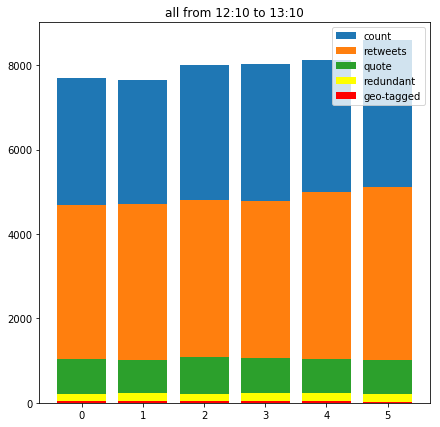

In [34]:
###statistics about the streaming sample
client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
db = client.twitter
all_count = np.zeros(6)

print(db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"}}).count())
print(db.all.find().count())
#print(result["created_at"])
all_count[0]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 12:20:00 +0000 2018"}}).count()
all_count[1]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:20:00 +0000 2018","$lte":"Fri Nov 16 12:30:00 +0000 2018"}}).count()
all_count[2]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:30:00 +0000 2018","$lte":"Fri Nov 16 12:40:00 +0000 2018"}}).count()
all_count[3]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:40:00 +0000 2018","$lte":"Fri Nov 16 12:50:00 +0000 2018"}}).count()
all_count[4]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:50:00 +0000 2018","$lte":"Fri Nov 16 13:00:00 +0000 2018"}}).count()
all_count[5]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:00:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"}}).count()
print(all_count)
print(all_retweets)
fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(1,1,1)
ax.bar(range(len(all_count)),all_count,label='count')
ax.bar(range(len(all_retweets)),all_retweets,label='retweets')
ax.bar(range(len(all_quote)),all_quote,label='quote')
ax.bar(range(len(all_redundant)),all_redundant,label='redundant',color='yellow')
ax.bar(range(len(all_geo)),all_geo,color='red',label='geo-tagged')

ax.set_title("all from 12:10 to 13:10")
ax.legend()




D:\python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.
D:\python\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """
D:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys
D:\python\lib\site-packages\ipykernel_launcher.py

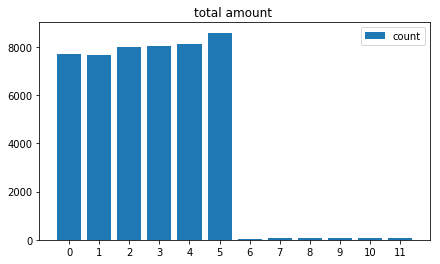

In [36]:
all_count = np.zeros(12)
all_count[0]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 12:20:00 +0000 2018"}}).count()
all_count[1]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:20:00 +0000 2018","$lte":"Fri Nov 16 12:30:00 +0000 2018"}}).count()
all_count[2]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:30:00 +0000 2018","$lte":"Fri Nov 16 12:40:00 +0000 2018"}}).count()
all_count[3]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:40:00 +0000 2018","$lte":"Fri Nov 16 12:50:00 +0000 2018"}}).count()
all_count[4]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:50:00 +0000 2018","$lte":"Fri Nov 16 13:00:00 +0000 2018"}}).count()
all_count[5]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:00:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"}}).count()

all_count[6]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:40:00 +0000 2018","$lte":"Fri Nov 16 13:50:00 +0000 2018"}}).count()
all_count[7]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:50:00 +0000 2018","$lte":"Fri Nov 16 14:00:00 +0000 2018"}}).count()
all_count[8]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:00:00 +0000 2018","$lte":"Fri Nov 16 14:10:00 +0000 2018"}}).count()
all_count[9]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:10:00 +0000 2018","$lte":"Fri Nov 16 14:20:00 +0000 2018"}}).count()
all_count[10]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:20:00 +0000 2018","$lte":"Fri Nov 16 14:30:00 +0000 2018"}}).count()
all_count[11]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:30:00 +0000 2018","$lte":"Fri Nov 16 14:40:00 +0000 2018"}}).count()





fig=plt.figure(figsize=(7,4))
ax=fig.add_subplot(1,1,1)
ax.bar(range(len(all_count)),all_count,label='count')
ax.set_title("total amount ")
ax.set_xticks(range(len(all_count)))
ax.legend()

D:\python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.
D:\python\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """
D:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys
D:\python\lib\site-packages\ipykernel_launcher.py

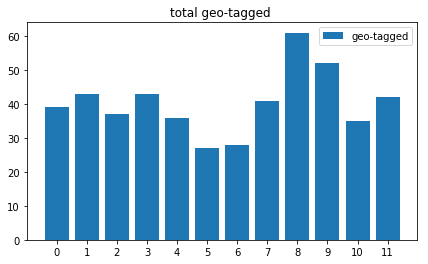

In [40]:
all_count = np.zeros(12)
all_count[0]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 12:20:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[1]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:20:00 +0000 2018","$lte":"Fri Nov 16 12:30:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[2]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:30:00 +0000 2018","$lte":"Fri Nov 16 12:40:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[3]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:40:00 +0000 2018","$lte":"Fri Nov 16 12:50:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[4]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:50:00 +0000 2018","$lte":"Fri Nov 16 13:00:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[5]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:00:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()

all_count[6]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:40:00 +0000 2018","$lte":"Fri Nov 16 13:50:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[7]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:50:00 +0000 2018","$lte":"Fri Nov 16 14:00:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[8]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:00:00 +0000 2018","$lte":"Fri Nov 16 14:10:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[9]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:10:00 +0000 2018","$lte":"Fri Nov 16 14:20:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[10]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:20:00 +0000 2018","$lte":"Fri Nov 16 14:30:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[11]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:30:00 +0000 2018","$lte":"Fri Nov 16 14:40:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()





fig=plt.figure(figsize=(7,4))
ax=fig.add_subplot(1,1,1)
ax.bar(range(len(all_count)),all_count,label='geo-tagged')
ax.set_title("total geo-tagged ")
ax.set_xticks(range(len(all_count)))
ax.legend()

In [3]:
client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
db = client.twitter
all_count1=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 12:20:00 +0000 2018"}})
all_count2=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:20:00 +0000 2018","$lte":"Fri Nov 16 12:30:00 +0000 2018"}})
all_count3=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:30:00 +0000 2018","$lte":"Fri Nov 16 12:40:00 +0000 2018"}})
all_count4=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:40:00 +0000 2018","$lte":"Fri Nov 16 12:50:00 +0000 2018"}})
all_count5=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:50:00 +0000 2018","$lte":"Fri Nov 16 13:00:00 +0000 2018"}})
all_count6=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:00:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"}})


In [16]:
#all_redundant = np.zeros(6)

redundancy=db.red6.aggregate([{"$group":{"_id":"$id_str"}}])
shit = 0
for redundant in redundancy:
    #print(redundant)
    shit += 1
all_redundant[5]=db.red6.find().count()-shit
print(all_redundant)

[201. 232. 216. 224. 225. 205.]


D:\python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


[201.0, 232.0, 216.0, 224.0, 225.0, 205.0]


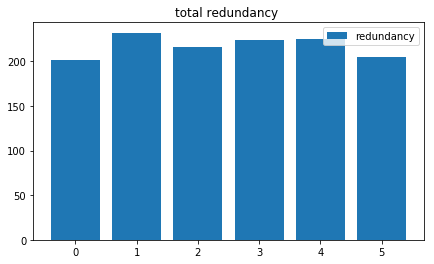

In [41]:
all_redundant = [201.,232.,216.,224. ,225., 205.]
print(all_redundant)
fig=plt.figure(figsize=(7,4))
ax=fig.add_subplot(1,1,1)
ax.bar(range(len(all_redundant)),all_redundant,label='redundancy')
ax.set_title("total redundancy ")
ax.set_xticks(range(len(all_redundant)))
ax.legend()

In [8]:
for i in all_count5:
    client = MongoClient()
    db = client.twitter
    db.red5.insert(i)

D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  after removing the cwd from sys.path.


In [9]:
for i in all_count6:
    client = MongoClient()
    db = client.twitter
    db.red6.insert(i)

D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  after removing the cwd from sys.path.


In [16]:
client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
db = client.twitter
print("streaming sample:",db.streaming_sample.find().count())
print("streaming topic:",db.streaming_topic.find().count())
print("streaming geo:",db.streaming_geo.find().count())
print("REST gla:",db.REST_glasgow.find().count())

streaming sample: 44180
streaming topic: 2295
streaming geo: 518
REST gla: 61291


D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.
D:\python\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """
D:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys


In [47]:
#cut the useless data
client = MongoClient()
db = client.twitter
db.slide.remove({'created_at': {"$lte":"Fri Nov 16 13:09:13 +0000 2018"}})
#db.slide.remove({'created_at': {"$gte":"Fri Nov 16 13:55:00 +0000 2018"}})
##db.streaming_geo.remove({'created_at': {"$lte":"Fri Nov 16 13:40:00 +0000 2018"}})
###db.streaming_geoafter.remove({'created_at': {"$gte":"Fri Nov 16 14:40:00 +0000 2018"}})
###db.REST_glasowafter.remove({'created_at': {"$lte":"Fri Nov 16 12:10:00 +0000 2018"}})
###db.REST_glasowafter.remove({'created_at': {"$gte":"Fri Nov 16 13:10:00 +0000 2018"}})
###db.REST_topicafter.remove({'created_at': {"$lte":"Fri Nov 16 12:10:00 +0000 2018"}})
###db.REST_topicafter.remove({'created_at': {"$gte":"Fri Nov 16 13:10:00 +0000 2018"}})

D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  after removing the cwd from sys.path.


{'n': 52771, 'ok': 1.0}

In [21]:
client = MongoClient()
db = client.twitter

print("the amount of data:",db.all.find().count())
print("the amount of geo-tagged",db.all.find({"place":{"$ne": None }}).count())
print("the Glasgow geo-tagged data",db.all.find({"place.full_name":"Glasgow, Scotland"}).count())
redundancy=db.all.aggregate([{"$group":{"_id":"$id_str"}}])
shit = 0
for redundant in redundancy:
    #print(redundant)
    shit += 1
print("redundant data",db.all.find().count()-shit)
print("retweet amount",db.all.find({"retweeted_status":{"$ne": None }}).count())
print("quote amount",db.all.find({"is_quote_status": True}).count())


D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.


the amount of data: 54685


D:\python\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """


the amount of geo-tagged 1431


D:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


the Glasgow geo-tagged data 485


D:\python\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if sys.path[0] == '':


redundant data 1309


D:\python\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  del sys.path[0]


retweet amount 32935


D:\python\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


quote amount 7009


In [56]:
#take out the redundant data


client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
db = client.twitter
redundancy=db.all.aggregate([{"$group":{"_id":"$id_str"}}])
for redundant in redundancy:
    i=redundant["_id"]
    wtf = db.all.find({"id_str":i,"retweeted_status":None,"is_quote_status":False})
    j=0
    for data in wtf:
        if j>0:
            break
        else:
            db.after.insert_one(data)
        j=j+1

In [5]:
import spacy
from spacy import displacy
from collections import Counter

import en_core_web_sm



In [3]:
print("the Glasgow geo-tagged data",db.REST_glasowafter.find({"place.full_name":"Glasgow, Scotland"}).count())


D:\python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


the Glasgow geo-tagged data 221


In [3]:
###ner-filter take out the meaningless data like good morening or 
import spacy
from spacy import displacy
from collections import Counter

import en_core_web_sm



client = MongoClient()
db = client.twitter
                                                            
mycol = db.after
sets = mycol.find()

nlp = en_core_web_sm.load()             #load the word database
                            
for set in sets:
    doc = nlp(set['text'])

    i1 = 0
    i2 = 0
    i3 = 0
                        #set the organization, person and location elements
    orgstr = ""
    locstr = ""
    pstr = ""


    for X in doc.ents:
        str = X.label_
        if ord(X.text[0])>64 and ord(X.text[0])<123:
            if (str is "ORG"):
                if(i1==0):
                    orgstr = X.text.lower()
                    i1==1

            elif (str is "LOC"):
                if(i2==0):
                    locstr =  X.text.lower()
                    i2=1

            elif (str is "PERSON"):
                if(i3==0):
                    pstr = X.text.lower()
                    i3=1





    if (orgstr is not "") or (locstr is not "") or (pstr is not ""):
        id=set['id']

        db.new2.insert_one({"id":id,"ORG": orgstr,"LOC": locstr,"PERSON": pstr,"TagNum": 0,"ORGTAG":0,"PTAG":0,"LOCTAG":0,"Amount":0})


In [53]:
#implement the algorithm

import operator


DISTANCE = 10000

client = MongoClient()
db = client.twitter


orglist = []
personlist = []
loclist = []


DATASET= db.new2.aggregate([{"$group":{"_id":"$PERSON"}}])
for data in DATASET:
    if not operator.eq(data['_id'],""):
        personlist.append(data['_id'])              
print(len(personlist))

DATASET= db.new2.aggregate([{"$group":{"_id":"$ORG"}}])
for data in DATASET:
    if not operator.eq(data['_id'], ""):
        orglist.append(data['_id'])
print(len(orglist))

DATASET= db.new2.aggregate([{"$group":{"_id":"$LOC"}}])
for data in DATASET:
    if not operator.eq(data['_id'], ""):
        loclist.append(data['_id'])
print(len(loclist))


G = 0
GG = DISTANCE
GGG = DISTANCE * 2
GGGG = DISTANCE * 3

orgONE = []
personONE = []
locONE = []

myquery = {"TagNum": {'$ne':0}}
newvalues = {"$set": {"TagNum": 0,"ORGTAG":0,"PTAG":0,"LOCTAG":0}}
mycol.update_many(myquery, newvalues)



for i in range(len(orglist)):
    ones = db.new2.find()
    for one in ones:
        if (operator.eq(one['ORG'],orglist[i])):
            orgONE.append(orglist[i])
            #orgID.append(one['_id'])
            myquery = {"_id": one['_id']}                            
            t=one['TagNum']+1
            newvalues = {"$set": {"NG": G,"ORGTAG":1,"TagNum":t}}
            db.new2.update_many(myquery, newvalues)
    G = G + 1
print("org",G)

for i in range(len(personlist)):
    # print("list ",list[i])
    ones = db.new2.find()
    for one in ones:
        if (operator.eq(one['PERSON'],personlist[i])):
            personONE.append(personlist[i])
            #personID.append(one['_id'])
            myquery = {"_id": one['_id']}
            t = one['TagNum'] + 1
            newvalues = {"$set": {"NG": GG,"PTAG":1,"TagNum":t}}
            db.new2.update_many(myquery, newvalues)
    GG = GG + 1
print("person",GG)

for i in range(len(loclist)):
    ones = db.new2.find()
    for one in ones:
        if (operator.eq(one['LOC'],loclist[i])):
            locONE.append(loclist[i])
            #locID.append(one['_id'])
            myquery = {"_id": one['_id']}
            t = one['TagNum'] + 1
            newvalues = {"$set": {"NG": GGG,"LOCTAG":1,"TagNum":t}}
            db.new2.update_many(myquery, newvalues)
    GGG = GGG + 1
print("loc",GGG)

DATASET= db.new2.aggregate([{"$group":{"_id":"$NG"}}])

i=0
for data in DATASET:
    i+=1

ones = db.new2.find()
for one in ones:
    if (one['TagNum']==3):
        myquery =  {'$or':[{"LOC": one['LOC']},{"PERSON": one['PERSON']},{"ORG": one['ORG']}]}
        newvalues = {"$set": {"NG": GGGG,"TagNum":4}}
        db.new2.update_many(myquery, newvalues)
        GGGG += 1


    elif(one['TagNum']==2):

        if one['ORGTAG']==1 and one['LOCTAG']==1:
            myquery = {'$or': [{"LOC": one['LOC']},{"ORG": one['ORG']}]}
            newvalues = {"$set": {"NG": GGGG, "TagNum": 5}}
        elif one['ORGTAG']==1 and one['PTAG']==1:
            myquery = {'$or': [{"PERSON": one['PERSON']},{"ORG": one['ORG']}]}
            newvalues = {"$set": {"NG": GGGG, "TagNum": 5}}
        elif one['PTAG']==1 and one['LOCTAG']==1:
            myquery = {'$or': [{"LOC": one['LOC']},{"PERSON": one['PERSON']}]}
            newvalues = {"$set": {"NG": GGGG, "TagNum": 5}}

        db.new2.update_many(myquery, newvalues)
        GGGG += 1

DATASET= db.new2.aggregate([{"$group":{"_id":"$NG"}}])

i=0
for data in DATASET:
    i+=1
print(i)



2407
2747
115
org 2747
person 12407
loc 20115
4647


In [54]:
import operator

client = MongoClient()
db = client.twitter

#mygroup = mydb[NEWDATABASE]

DATASET= db.new2.aggregate([{"$group":{"_id":"$NG"}}])

i=0
for data in DATASET:
    ggs = db.new2.find({'NG': data['_id']})
    count = 0
    for gg in ggs:
        count+=1

    myquery = {"NG":data['_id'] }
    newvalues = {"$set": {"Amount": count}}
    db.new2.update_many(myquery, newvalues)

    i+=1

print(i)

4647


In [55]:

import operator

client = MongoClient()
db = client.twitter

mycol = db.new2


myquery = {"Amount": {'$ne':1}}

DATASET= mycol.find(myquery)

for data in DATASET:                #take the tweet with the same elements into the same group
    db.newgroup.insert_one(data)

D:\python\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  from ipykernel import kernelapp as app
D:\python\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


the number of group is 0


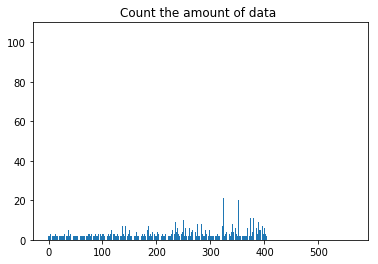

In [57]:
import operator

DATABASENAME = "local"
rect = np.zeros(564)
NEWDATABASE = "GroupData"

client = MongoClient()
db = client.twitter


DATASET= db.newgroup.aggregate([{"$group":{"_id":"$NG"}}])
i=0
for tweet in DATASET:
    id = tweet['_id']
    rect[i] = db.newgroup.find({"NG":id}).count()
    i += 1

fig=plt.figure()
plt.ylim(0,110)
ax=fig.add_subplot(1,1,1)
ax.bar(range(len(rect)),rect)
ax.set_title("Count the amount of data ")
i=0
for data in DATASET:
    i+=1
print("the number of group is",i)


In [48]:
## cut the data for 5 mins


import numpy as np
import pymongo
import matplotlib as mpl
import matplotlib.pyplot as plt

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["twitter"] #database name

mycol = mydb["all"]
mynew = mydb["5min"]

# insert five mins for all data
mins = mycol.find({'created_at': {"$gte":"Fri Nov 16 12:10:56 +0000 2018","$lte":"Fri Nov 16 12:15:56 +0000 2018"}})

for min in mins:
    mynew.insert_one(min)

#insert five mins for geodata(geodata is in next hour)
mins = mycol.find({'created_at': {"$gte":"Fri Nov 16 13:30:56 +0000 2018","$lte":"Fri Nov 16 13:35:56 +0000 2018"}})

for min in mins:
    mynew.insert_one(min)